In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from operator import add
from scipy.optimize import curve_fit
import numpy.fft as fft
import math

import cmath
%matplotlib inline

In [25]:
freq_ant=[0.0 ,
0.009765625 ,
0.01953125 ,
0.029296875 ,
0.0390625 ,
0.048828125 ,
0.05859375 ,
0.068359375 ,
0.078125 ,
0.087890625 ,
0.09765625 ,
0.107421875 ,
0.1171875 ,
0.126953125 ,
0.13671875 ,
0.146484375 ,
0.15625 ,
0.166015625 ,
0.17578125 ,
0.185546875 ,
0.1953125 ,
0.205078125 ,
0.21484375 ,
0.224609375 ,
0.234375 ,
0.244140625 ,
0.25390625 ,
0.263671875 ,
0.2734375 ,
0.283203125 ,
0.29296875 ,
0.302734375 ,
0.3125 ,
0.322265625 ,
0.33203125 ,
0.341796875 ,
0.3515625 ,
0.361328125 ,
0.37109375 ,
0.380859375 ,
0.390625 ,
0.400390625 ,
0.41015625 ,
0.419921875 ,
0.4296875 ,
0.439453125 ,
0.44921875 ,
0.458984375 ,
0.46875 ,
0.478515625 ,
0.48828125 ,
0.498046875 ,
0.5078125 ,
0.517578125 ,
0.52734375 ,
0.537109375 ,
0.546875 ,
0.556640625 ,
0.56640625 ,
0.576171875 ,
0.5859375 ,
0.595703125 ,
0.60546875 ,
0.615234375 ,
0.625 ,
0.634765625 ,
0.64453125 ,
0.654296875 ,
0.6640625 ,
0.673828125 ,
0.68359375 ,
0.693359375 ,
0.703125 ,
0.712890625 ,
0.72265625 ,
0.732421875 ,
0.7421875 ,
0.751953125 ,
0.76171875 ,
0.771484375 ,
0.78125 ,
0.791015625 ,
0.80078125 ,
0.810546875 ,
0.8203125 ,
0.830078125 ,
0.83984375 ,
0.849609375 ,
0.859375 ,
0.869140625 ,
0.87890625 ,
0.888671875 ,
0.8984375 ,
0.908203125 ,
0.91796875 ,
0.927734375 ,
0.9375 ,
0.947265625 ,
0.95703125 ,
0.966796875 ,
0.9765625 ,
0.986328125 ,
0.99609375 ,
1.005859375 ,
1.015625 ,
1.025390625 ,
1.03515625 ,
1.044921875 ,
1.0546875 ,
1.064453125 ,
1.07421875 ,
1.083984375 ,
1.09375 ,
1.103515625 ,
1.11328125 ,
1.123046875 ,
1.1328125 ,
1.142578125 ,
1.15234375 ,
1.162109375 ,
1.171875 ,
1.181640625 ,
1.19140625 ,
1.201171875 ,
1.2109375 ,
1.220703125 ,
1.23046875 ,
1.240234375 ,
1.25 ,
1.259765625 ,
1.26953125 ,
1.279296875 ,
1.2890625 ,
1.298828125 ,
1.30859375 ,
1.318359375 ,
1.328125 ,
1.337890625 ,
1.34765625 ,
1.357421875 ,
1.3671875 ,
1.376953125 ,
1.38671875 ,
1.396484375 ,
1.40625 ,
1.416015625 ,
1.42578125 ,
1.435546875 ,
1.4453125 ,
1.455078125 ,
1.46484375 ,
1.474609375 ,
1.484375 ,
1.494140625 ,
1.50390625 ,
1.513671875 ,
1.5234375 ,
1.533203125 ,
1.54296875 ,
1.552734375 ,
1.5625 ,
1.572265625 ,
1.58203125 ,
1.591796875 ,
1.6015625 ,
1.611328125 ,
1.62109375 ,
1.630859375 ,
1.640625 ,
1.650390625 ,
1.66015625 ,
1.669921875 ,
1.6796875 ,
1.689453125 ,
1.69921875 ,
1.708984375 ,
1.71875 ,
1.728515625 ,
1.73828125 ,
1.748046875 ,
1.7578125 ,
1.767578125 ,
1.77734375 ,
1.787109375 ,
1.796875 ,
1.806640625 ,
1.81640625 ,
1.826171875 ,
1.8359375 ,
1.845703125 ,
1.85546875 ,
1.865234375 ,
1.875 ,
1.884765625 ,
1.89453125 ,
1.904296875 ,
1.9140625 ,
1.923828125 ,
1.93359375 ,
1.943359375 ,
1.953125 ,
1.962890625 ,
1.97265625 ,
1.982421875 ,
1.9921875 ,
2.001953125 ,
2.01171875 ,
2.021484375 ,
2.03125 ,
2.041015625 ,
2.05078125 ,
2.060546875 ,
2.0703125 ,
2.080078125 ,
2.08984375 ,
2.099609375 ,
2.109375 ,
2.119140625 ,
2.12890625 ,
2.138671875 ,
2.1484375 ,
2.158203125 ,
2.16796875 ,
2.177734375 ,
2.1875 ,
2.197265625 ,
2.20703125 ,
2.216796875 ,
2.2265625 ,
2.236328125 ,
2.24609375 ,
2.255859375 ,
2.265625 ,
2.275390625 ,
2.28515625 ,
2.294921875 ,
2.3046875 ,
2.314453125 ,
2.32421875 ,
2.333984375 ,
2.34375 ,
2.353515625 ,
2.36328125 ,
2.373046875 ,
2.3828125 ,
2.392578125 ,
2.40234375 ,
2.412109375 ,
2.421875 ,
2.431640625 ,
2.44140625 ,
2.451171875 ,
2.4609375 ,
2.470703125 ,
2.48046875 ,
2.490234375 ,
2.5 ,
2.509765625 ,
2.51953125 ,
2.529296875 ,
2.5390625 ,
2.548828125 ,
2.55859375 ,
2.568359375 ,
2.578125 ,
2.587890625 ,
2.59765625 ,
2.607421875 ,
2.6171875 ,
2.626953125 ,
2.63671875 ,
2.646484375 ,
2.65625 ,
2.666015625 ,
2.67578125 ,
2.685546875 ,
2.6953125 ,
2.705078125 ,
2.71484375 ,
2.724609375 ,
2.734375 ,
2.744140625 ,
2.75390625 ,
2.763671875 ,
2.7734375 ,
2.783203125 ,
2.79296875 ,
2.802734375 ,
2.8125 ,
2.822265625 ,
2.83203125 ,
2.841796875 ,
2.8515625 ,
2.861328125 ,
2.87109375 ,
2.880859375 ,
2.890625 ,
2.900390625 ,
2.91015625 ,
2.919921875 ,
2.9296875 ,
2.939453125 ,
2.94921875 ,
2.958984375 ,
2.96875 ,
2.978515625 ,
2.98828125 ,
2.998046875 ,
3.0078125 ,
3.017578125 ,
3.02734375 ,
3.037109375 ,
3.046875 ,
3.056640625 ,
3.06640625 ,
3.076171875 ,
3.0859375 ,
3.095703125 ,
3.10546875 ,
3.115234375 ,
3.125 ,
3.134765625 ,
3.14453125 ,
3.154296875 ,
3.1640625 ,
3.173828125 ,
3.18359375 ,
3.193359375 ,
3.203125 ,
3.212890625 ,
3.22265625 ,
3.232421875 ,
3.2421875 ,
3.251953125 ,
3.26171875 ,
3.271484375 ,
3.28125 ,
3.291015625 ,
3.30078125 ,
3.310546875 ,
3.3203125 ,
3.330078125 ,
3.33984375 ,
3.349609375 ,
3.359375 ,
3.369140625 ,
3.37890625 ,
3.388671875 ,
3.3984375 ,
3.408203125 ,
3.41796875 ,
3.427734375 ,
3.4375 ,
3.447265625 ,
3.45703125 ,
3.466796875 ,
3.4765625 ,
3.486328125 ,
3.49609375 ,
3.505859375 ,
3.515625 ,
3.525390625 ,
3.53515625 ,
3.544921875 ,
3.5546875 ,
3.564453125 ,
3.57421875 ,
3.583984375 ,
3.59375 ,
3.603515625 ,
3.61328125 ,
3.623046875 ,
3.6328125 ,
3.642578125 ,
3.65234375 ,
3.662109375 ,
3.671875 ,
3.681640625 ,
3.69140625 ,
3.701171875 ,
3.7109375 ,
3.720703125 ,
3.73046875 ,
3.740234375 ,
3.75 ,
3.759765625 ,
3.76953125 ,
3.779296875 ,
3.7890625 ,
3.798828125 ,
3.80859375 ,
3.818359375 ,
3.828125 ,
3.837890625 ,
3.84765625 ,
3.857421875 ,
3.8671875 ,
3.876953125 ,
3.88671875 ,
3.896484375 ,
3.90625 ,
3.916015625 ,
3.92578125 ,
3.935546875 ,
3.9453125 ,
3.955078125 ,
3.96484375 ,
3.974609375 ,
3.984375 ,
3.994140625 ,
4.00390625 ,
4.013671875 ,
4.0234375 ,
4.033203125 ,
4.04296875 ,
4.052734375 ,
4.0625 ,
4.072265625 ,
4.08203125 ,
4.091796875 ,
4.1015625 ,
4.111328125 ,
4.12109375 ,
4.130859375 ,
4.140625 ,
4.150390625 ,
4.16015625 ,
4.169921875 ,
4.1796875 ,
4.189453125 ,
4.19921875 ,
4.208984375 ,
4.21875 ,
4.228515625 ,
4.23828125 ,
4.248046875 ,
4.2578125 ,
4.267578125 ,
4.27734375 ,
4.287109375 ,
4.296875 ,
4.306640625 ,
4.31640625 ,
4.326171875 ,
4.3359375 ,
4.345703125 ,
4.35546875 ,
4.365234375 ,
4.375 ,
4.384765625 ,
4.39453125 ,
4.404296875 ,
4.4140625 ,
4.423828125 ,
4.43359375 ,
4.443359375 ,
4.453125 ,
4.462890625 ,
4.47265625 ,
4.482421875 ,
4.4921875 ,
4.501953125 ,
4.51171875 ,
4.521484375 ,
4.53125 ,
4.541015625 ,
4.55078125 ,
4.560546875 ,
4.5703125 ,
4.580078125 ,
4.58984375 ,
4.599609375 ,
4.609375 ,
4.619140625 ,
4.62890625 ,
4.638671875 ,
4.6484375 ,
4.658203125 ,
4.66796875 ,
4.677734375 ,
4.6875 ,
4.697265625 ,
4.70703125 ,
4.716796875 ,
4.7265625 ,
4.736328125 ,
4.74609375 ,
4.755859375 ,
4.765625 ,
4.775390625 ,
4.78515625 ,
4.794921875 ,
4.8046875 ,
4.814453125 ,
4.82421875 ,
4.833984375 ,
4.84375 ,
4.853515625 ,
4.86328125 ,
4.873046875 ,
4.8828125 ,
4.892578125 ,
4.90234375 ,
4.912109375 ,
4.921875 ,
4.931640625 ,
4.94140625 ,
4.951171875 ,
4.9609375 ,
4.970703125 ,
4.98046875 ,
4.990234375 ,
-5.0 ,
-4.990234375 ,
-4.98046875 ,
-4.970703125 ,
-4.9609375 ,
-4.951171875 ,
-4.94140625 ,
-4.931640625 ,
-4.921875 ,
-4.912109375 ,
-4.90234375 ,
-4.892578125 ,
-4.8828125 ,
-4.873046875 ,
-4.86328125 ,
-4.853515625 ,
-4.84375 ,
-4.833984375 ,
-4.82421875 ,
-4.814453125 ,
-4.8046875 ,
-4.794921875 ,
-4.78515625 ,
-4.775390625 ,
-4.765625 ,
-4.755859375 ,
-4.74609375 ,
-4.736328125 ,
-4.7265625 ,
-4.716796875 ,
-4.70703125 ,
-4.697265625 ,
-4.6875 ,
-4.677734375 ,
-4.66796875 ,
-4.658203125 ,
-4.6484375 ,
-4.638671875 ,
-4.62890625 ,
-4.619140625 ,
-4.609375 ,
-4.599609375 ,
-4.58984375 ,
-4.580078125 ,
-4.5703125 ,
-4.560546875 ,
-4.55078125 ,
-4.541015625 ,
-4.53125 ,
-4.521484375 ,
-4.51171875 ,
-4.501953125 ,
-4.4921875 ,
-4.482421875 ,
-4.47265625 ,
-4.462890625 ,
-4.453125 ,
-4.443359375 ,
-4.43359375 ,
-4.423828125 ,
-4.4140625 ,
-4.404296875 ,
-4.39453125 ,
-4.384765625 ,
-4.375 ,
-4.365234375 ,
-4.35546875 ,
-4.345703125 ,
-4.3359375 ,
-4.326171875 ,
-4.31640625 ,
-4.306640625 ,
-4.296875 ,
-4.287109375 ,
-4.27734375 ,
-4.267578125 ,
-4.2578125 ,
-4.248046875 ,
-4.23828125 ,
-4.228515625 ,
-4.21875 ,
-4.208984375 ,
-4.19921875 ,
-4.189453125 ,
-4.1796875 ,
-4.169921875 ,
-4.16015625 ,
-4.150390625 ,
-4.140625 ,
-4.130859375 ,
-4.12109375 ,
-4.111328125 ,
-4.1015625 ,
-4.091796875 ,
-4.08203125 ,
-4.072265625 ,
-4.0625 ,
-4.052734375 ,
-4.04296875 ,
-4.033203125 ,
-4.0234375 ,
-4.013671875 ,
-4.00390625 ,
-3.994140625 ,
-3.984375 ,
-3.974609375 ,
-3.96484375 ,
-3.955078125 ,
-3.9453125 ,
-3.935546875 ,
-3.92578125 ,
-3.916015625 ,
-3.90625 ,
-3.896484375 ,
-3.88671875 ,
-3.876953125 ,
-3.8671875 ,
-3.857421875 ,
-3.84765625 ,
-3.837890625 ,
-3.828125 ,
-3.818359375 ,
-3.80859375 ,
-3.798828125 ,
-3.7890625 ,
-3.779296875 ,
-3.76953125 ,
-3.759765625 ,
-3.75 ,
-3.740234375 ,
-3.73046875 ,
-3.720703125 ,
-3.7109375 ,
-3.701171875 ,
-3.69140625 ,
-3.681640625 ,
-3.671875 ,
-3.662109375 ,
-3.65234375 ,
-3.642578125 ,
-3.6328125 ,
-3.623046875 ,
-3.61328125 ,
-3.603515625 ,
-3.59375 ,
-3.583984375 ,
-3.57421875 ,
-3.564453125 ,
-3.5546875 ,
-3.544921875 ,
-3.53515625 ,
-3.525390625 ,
-3.515625 ,
-3.505859375 ,
-3.49609375 ,
-3.486328125 ,
-3.4765625 ,
-3.466796875 ,
-3.45703125 ,
-3.447265625 ,
-3.4375 ,
-3.427734375 ,
-3.41796875 ,
-3.408203125 ,
-3.3984375 ,
-3.388671875 ,
-3.37890625 ,
-3.369140625 ,
-3.359375 ,
-3.349609375 ,
-3.33984375 ,
-3.330078125 ,
-3.3203125 ,
-3.310546875 ,
-3.30078125 ,
-3.291015625 ,
-3.28125 ,
-3.271484375 ,
-3.26171875 ,
-3.251953125 ,
-3.2421875 ,
-3.232421875 ,
-3.22265625 ,
-3.212890625 ,
-3.203125 ,
-3.193359375 ,
-3.18359375 ,
-3.173828125 ,
-3.1640625 ,
-3.154296875 ,
-3.14453125 ,
-3.134765625 ,
-3.125 ,
-3.115234375 ,
-3.10546875 ,
-3.095703125 ,
-3.0859375 ,
-3.076171875 ,
-3.06640625 ,
-3.056640625 ,
-3.046875 ,
-3.037109375 ,
-3.02734375 ,
-3.017578125 ,
-3.0078125 ,
-2.998046875 ,
-2.98828125 ,
-2.978515625 ,
-2.96875 ,
-2.958984375 ,
-2.94921875 ,
-2.939453125 ,
-2.9296875 ,
-2.919921875 ,
-2.91015625 ,
-2.900390625 ,
-2.890625 ,
-2.880859375 ,
-2.87109375 ,
-2.861328125 ,
-2.8515625 ,
-2.841796875 ,
-2.83203125 ,
-2.822265625 ,
-2.8125 ,
-2.802734375 ,
-2.79296875 ,
-2.783203125 ,
-2.7734375 ,
-2.763671875 ,
-2.75390625 ,
-2.744140625 ,
-2.734375 ,
-2.724609375 ,
-2.71484375 ,
-2.705078125 ,
-2.6953125 ,
-2.685546875 ,
-2.67578125 ,
-2.666015625 ,
-2.65625 ,
-2.646484375 ,
-2.63671875 ,
-2.626953125 ,
-2.6171875 ,
-2.607421875 ,
-2.59765625 ,
-2.587890625 ,
-2.578125 ,
-2.568359375 ,
-2.55859375 ,
-2.548828125 ,
-2.5390625 ,
-2.529296875 ,
-2.51953125 ,
-2.509765625 ,
-2.5 ,
-2.490234375 ,
-2.48046875 ,
-2.470703125 ,
-2.4609375 ,
-2.451171875 ,
-2.44140625 ,
-2.431640625 ,
-2.421875 ,
-2.412109375 ,
-2.40234375 ,
-2.392578125 ,
-2.3828125 ,
-2.373046875 ,
-2.36328125 ,
-2.353515625 ,
-2.34375 ,
-2.333984375 ,
-2.32421875 ,
-2.314453125 ,
-2.3046875 ,
-2.294921875 ,
-2.28515625 ,
-2.275390625 ,
-2.265625 ,
-2.255859375 ,
-2.24609375 ,
-2.236328125 ,
-2.2265625 ,
-2.216796875 ,
-2.20703125 ,
-2.197265625 ,
-2.1875 ,
-2.177734375 ,
-2.16796875 ,
-2.158203125 ,
-2.1484375 ,
-2.138671875 ,
-2.12890625 ,
-2.119140625 ,
-2.109375 ,
-2.099609375 ,
-2.08984375 ,
-2.080078125 ,
-2.0703125 ,
-2.060546875 ,
-2.05078125 ,
-2.041015625 ,
-2.03125 ,
-2.021484375 ,
-2.01171875 ,
-2.001953125 ,
-1.9921875 ,
-1.982421875 ,
-1.97265625 ,
-1.962890625 ,
-1.953125 ,
-1.943359375 ,
-1.93359375 ,
-1.923828125 ,
-1.9140625 ,
-1.904296875 ,
-1.89453125 ,
-1.884765625 ,
-1.875 ,
-1.865234375 ,
-1.85546875 ,
-1.845703125 ,
-1.8359375 ,
-1.826171875 ,
-1.81640625 ,
-1.806640625 ,
-1.796875 ,
-1.787109375 ,
-1.77734375 ,
-1.767578125 ,
-1.7578125 ,
-1.748046875 ,
-1.73828125 ,
-1.728515625 ,
-1.71875 ,
-1.708984375 ,
-1.69921875 ,
-1.689453125 ,
-1.6796875 ,
-1.669921875 ,
-1.66015625 ,
-1.650390625 ,
-1.640625 ,
-1.630859375 ,
-1.62109375 ,
-1.611328125 ,
-1.6015625 ,
-1.591796875 ,
-1.58203125 ,
-1.572265625 ,
-1.5625 ,
-1.552734375 ,
-1.54296875 ,
-1.533203125 ,
-1.5234375 ,
-1.513671875 ,
-1.50390625 ,
-1.494140625 ,
-1.484375 ,
-1.474609375 ,
-1.46484375 ,
-1.455078125 ,
-1.4453125 ,
-1.435546875 ,
-1.42578125 ,
-1.416015625 ,
-1.40625 ,
-1.396484375 ,
-1.38671875 ,
-1.376953125 ,
-1.3671875 ,
-1.357421875 ,
-1.34765625 ,
-1.337890625 ,
-1.328125 ,
-1.318359375 ,
-1.30859375 ,
-1.298828125 ,
-1.2890625 ,
-1.279296875 ,
-1.26953125 ,
-1.259765625 ,
-1.25 ,
-1.240234375 ,
-1.23046875 ,
-1.220703125 ,
-1.2109375 ,
-1.201171875 ,
-1.19140625 ,
-1.181640625 ,
-1.171875 ,
-1.162109375 ,
-1.15234375 ,
-1.142578125 ,
-1.1328125 ,
-1.123046875 ,
-1.11328125 ,
-1.103515625 ,
-1.09375 ,
-1.083984375 ,
-1.07421875 ,
-1.064453125 ,
-1.0546875 ,
-1.044921875 ,
-1.03515625 ,
-1.025390625 ,
-1.015625 ,
-1.005859375 ,
-0.99609375 ,
-0.986328125 ,
-0.9765625 ,
-0.966796875 ,
-0.95703125 ,
-0.947265625 ,
-0.9375 ,
-0.927734375 ,
-0.91796875 ,
-0.908203125 ,
-0.8984375 ,
-0.888671875 ,
-0.87890625 ,
-0.869140625 ,
-0.859375 ,
-0.849609375 ,
-0.83984375 ,
-0.830078125 ,
-0.8203125 ,
-0.810546875 ,
-0.80078125 ,
-0.791015625 ,
-0.78125 ,
-0.771484375 ,
-0.76171875 ,
-0.751953125 ,
-0.7421875 ,
-0.732421875 ,
-0.72265625 ,
-0.712890625 ,
-0.703125 ,
-0.693359375 ,
-0.68359375 ,
-0.673828125 ,
-0.6640625 ,
-0.654296875 ,
-0.64453125 ,
-0.634765625 ,
-0.625 ,
-0.615234375 ,
-0.60546875 ,
-0.595703125 ,
-0.5859375 ,
-0.576171875 ,
-0.56640625 ,
-0.556640625 ,
-0.546875 ,
-0.537109375 ,
-0.52734375 ,
-0.517578125 ,
-0.5078125 ,
-0.498046875 ,
-0.48828125 ,
-0.478515625 ,
-0.46875 ,
-0.458984375 ,
-0.44921875 ,
-0.439453125 ,
-0.4296875 ,
-0.419921875 ,
-0.41015625 ,
-0.400390625 ,
-0.390625 ,
-0.380859375 ,
-0.37109375 ,
-0.361328125 ,
-0.3515625 ,
-0.341796875 ,
-0.33203125 ,
-0.322265625 ,
-0.3125 ,
-0.302734375 ,
-0.29296875 ,
-0.283203125 ,
-0.2734375 ,
-0.263671875 ,
-0.25390625 ,
-0.244140625 ,
-0.234375 ,
-0.224609375 ,
-0.21484375 ,
-0.205078125 ,
-0.1953125 ,
-0.185546875 ,
-0.17578125 ,
-0.166015625 ,
-0.15625 ,
-0.146484375 ,
-0.13671875 ,
-0.126953125 ,
-0.1171875 ,
-0.107421875 ,
-0.09765625 ,
-0.087890625 ,
-0.078125 ,
-0.068359375 ,
-0.05859375 ,
-0.048828125 ,
-0.0390625 ,
-0.029296875 ,
-0.01953125 ,
-0.009765625 ];

antamp=[(-8.2861954863e-05+0j) ,
(-8.28669259394e-05-2.17126735355e-07j) ,
(-8.28380163827e-05-4.58283843568e-07j) ,
(-8.28683518857e-05-6.89499887907e-07j) ,
(-8.28401765898e-05-8.97289716764e-07j) ,
(-8.28341932377e-05-1.13295894601e-06j) ,
(-8.28128810346e-05-1.36943833e-06j) ,
(-8.28293452375e-05-1.58804545429e-06j) ,
(-8.27793397856e-05-1.80140456317e-06j) ,
(-8.27770077388e-05-2.05042824387e-06j) ,
(-8.27547645455e-05-2.26857165002e-06j) ,
(-8.2746691159e-05-2.48622152391e-06j) ,
(-8.26889405178e-05-2.71170722574e-06j) ,
(-8.26936136415e-05-2.95889656846e-06j) ,
(-8.26549663901e-05-3.15811905254e-06j) ,
(-8.26260439673e-05-3.39032292158e-06j) ,
(-8.25749535336e-05-3.61921275108e-06j) ,
(-8.25748414157e-05-3.85316746337e-06j) ,
(-8.25119691062e-05-4.04638108611e-06j) ,
(-8.24768899397e-05-4.29812674733e-06j) ,
(-8.24341582435e-05-4.51327948647e-06j) ,
(-8.24120698386e-05-4.73733673467e-06j) ,
(-8.23332625031e-05-4.93880345109e-06j) ,
(-8.23035839681e-05-5.19917965243e-06j) ,
(-8.22566022688e-05-5.39032115476e-06j) ,
(-8.22051471494e-05-5.62017867556e-06j) ,
(-8.21288216653e-05-5.83139834692e-06j) ,
(-8.21005404232e-05-6.08280642012e-06j) ,
(-8.20346312378e-05-6.25658130771e-06j) ,
(-8.19629255711e-05-6.50558442539e-06j) ,
(-8.19016016829e-05-6.7126215324e-06j) ,
(-8.18565222929e-05-6.94690860417e-06j) ,
(-8.17704173794e-05-7.12169073458e-06j) ,
(-8.16950764794e-05-7.38673419654e-06j) ,
(-8.16438059842e-05-7.57285451636e-06j) ,
(-8.15648969601e-05-7.7992190457e-06j) ,
(-8.14745191504e-05-7.98830207138e-06j) ,
(-8.14023127242e-05-8.25017167022e-06j) ,
(-8.13433329265e-05-8.41299881699e-06j) ,
(-8.12305099107e-05-8.64882224438e-06j) ,
(-8.11558036482e-05-8.84749943886e-06j) ,
(-8.10745494562e-05-9.08687260859e-06j) ,
(-8.0995106029e-05-9.24339321329e-06j) ,
(-8.08657813275e-05-9.4952881815e-06j) ,
(-8.08117388497e-05-9.68534037193e-06j) ,
(-8.0699838666e-05-9.9000891447e-06j) ,
(-8.06064076786e-05-1.00729674953e-05j) ,
(-8.04786886492e-05-1.03262758224e-05j) ,
(-8.04290990046e-05-1.04952422232e-05j) ,
(-8.02763706154e-05-1.07015238192e-05j) ,
(-8.0190013835e-05-1.08984239444e-05j) ,
(-8.00639804095e-05-1.11271311396e-05j) ,
(-7.99956811415e-05-1.12840444244e-05j) ,
(-7.98154117957e-05-1.14982898758e-05j) ,
(-7.97506475099e-05-1.1704655658e-05j) ,
(-7.96071121928e-05-1.18940883658e-05j) ,
(-7.95122144293e-05-1.20646219839e-05j) ,
(-7.93309214639e-05-1.22832117468e-05j) ,
(-7.9278182278e-05-1.247741208e-05j) ,
(-7.90984232208e-05-1.26376974587e-05j) ,
(-7.89920567659e-05-1.28410505477e-05j) ,
(-7.88250981234e-05-1.30390653028e-05j) ,
(-7.87556626234e-05-1.32162766089e-05j) ,
(-7.85437354764e-05-1.33715706123e-05j) ,
(-7.84474376616e-05-1.36010822054e-05j) ,
(-7.82845636547e-05-1.37540359719e-05j) ,
(-7.81754783595e-05-1.39342698837e-05j) ,
(-7.79596241154e-05-1.40966732904e-05j) ,
(-7.7875359515e-05-1.43248883624e-05j) ,
(-7.76925691119e-05-1.44332688203e-05j) ,
(-7.75475347436e-05-1.4642851256e-05j) ,
(-7.7356538124e-05-1.47973160765e-05j) ,
(-7.72582454228e-05-1.50026270795e-05j) ,
(-7.7045989667e-05-1.50935768852e-05j) ,
(-7.6889688243e-05-1.53366402948e-05j) ,
(-7.67263148385e-05-1.54544999136e-05j) ,
(-7.65803694396e-05-1.56430928777e-05j) ,
(-7.6359339207e-05-1.57450277733e-05j) ,
(-7.62087207711e-05-1.59943787155e-05j) ,
(-7.6048073605e-05-1.60642477872e-05j) ,
(-7.58442987274e-05-1.62631418065e-05j) ,
(-7.56500182322e-05-1.63776363549e-05j) ,
(-7.54913405245e-05-1.65969305889e-05j) ,
(-7.53081739499e-05-1.6641553605e-05j) ,
(-7.50695428835e-05-1.68671546908e-05j) ,
(-7.49185490395e-05-1.69680363453e-05j) ,
(-7.47160071467e-05-1.71448681021e-05j) ,
(-7.45142101028e-05-1.7204051317e-05j) ,
(-7.42729100738e-05-1.74377655735e-05j) ,
(-7.41447062957e-05-1.75010521247e-05j) ,
(-7.38750807237e-05-1.76565910546e-05j) ,
(-7.36872689767e-05-1.77507730288e-05j) ,
(-7.34498477625e-05-1.7949161842e-05j) ,
(-7.33054939001e-05-1.79842779907e-05j) ,
(-7.29843066624e-05-1.8146954412e-05j) ,
(-7.2838556874e-05-1.82584460545e-05j) ,
(-7.25770577887e-05-1.8390955269e-05j) ,
(-7.23977850943e-05-1.84390194255e-05j) ,
(-7.2067892965e-05-1.86076335716e-05j) ,
(-7.19542249146e-05-1.87011885665e-05j) ,
(-7.16357265562e-05-1.87778369314e-05j) ,
(-7.14416116823e-05-1.88749472548e-05j) ,
(-7.11328508896e-05-1.90107664819e-05j) ,
(-7.10058778437e-05-1.90744970172e-05j) ,
(-7.06321070805e-05-1.91329692643e-05j) ,
(-7.04585754173e-05-1.92743264162e-05j) ,
(-7.01593084824e-05-1.93342565719e-05j) ,
(-6.99779658213e-05-1.93978249549e-05j) ,
(-6.95926213954e-05-1.9460567525e-05j) ,
(-6.9446490462e-05-1.96040336484e-05j) ,
(-6.91188988792e-05-1.95833275012e-05j) ,
(-6.88840175724e-05-1.96908308192e-05j) ,
(-6.85362394262e-05-1.97364254222e-05j) ,
(-6.8377667572e-05-1.98450173811e-05j) ,
(-6.80038815997e-05-1.97843073275e-05j) ,
(-6.77529469085e-05-1.99465939493e-05j) ,
(-6.74519200868e-05-1.99283876311e-05j) ,
(-6.72250743605e-05-2.00088008727e-05j) ,
(-6.68361373711e-05-1.9954610094e-05j) ,
(-6.65974928212e-05-2.0130867229e-05j) ,
(-6.63062178766e-05-2.00272484639e-05j) ,
(-6.59905644034e-05-2.01218179805e-05j) ,
(-6.56442330245e-05-2.00793018812e-05j) ,
(-6.53976360199e-05-2.02107759842e-05j) ,
(-6.50756451193e-05-2.00551314423e-05j) ,
(-6.47045262314e-05-2.01916654571e-05j) ,
(-6.44305541717e-05-2.01203301123e-05j) ,
(-6.41185273974e-05-2.01844521154e-05j) ,
(-6.37707219906e-05-2.00398824333e-05j) ,
(-6.33945529182e-05-2.01905676446e-05j) ,
(-6.31635204877e-05-2.00513190174e-05j) ,
(-6.27465602802e-05-2.00793933789e-05j) ,
(-6.24246772404e-05-1.99801585248e-05j) ,
(-6.20544766674e-05-2.00758732459e-05j) ,
(-6.18058882563e-05-1.98820999971e-05j) ,
(-6.13057633206e-05-1.99184132097e-05j) ,
(-6.10559182826e-05-1.98383739308e-05j) ,
(-6.06476013567e-05-1.98286297301e-05j) ,
(-6.03515728653e-05-1.96449816065e-05j) ,
(-5.9834535984e-05-1.96874882204e-05j) ,
(-5.96429909893e-05-1.95717731375e-05j) ,
(-5.91436635297e-05-1.94697472189e-05j) ,
(-5.88315838467e-05-1.93541825664e-05j) ,
(-5.8344451031e-05-1.93409540069e-05j) ,
(-5.81408381323e-05-1.91710204184e-05j) ,
(-5.75520377233e-05-1.90338740642e-05j) ,
(-5.72798264861e-05-1.89802841695e-05j) ,
(-5.68044556224e-05-1.88417400321e-05j) ,
(-5.6524453831e-05-1.86646186504e-05j) ,
(-5.59142331835e-05-1.85256697359e-05j) ,
(-5.5692692406e-05-1.84691064116e-05j) ,
(-5.51699939897e-05-1.81956858376e-05j) ,
(-5.48147291472e-05-1.80811670582e-05j) ,
(-5.42600305024e-05-1.79047159078e-05j) ,
(-5.40263499937e-05-1.77884071684e-05j) ,
(-5.3429126311e-05-1.74416078716e-05j) ,
(-5.30566476896e-05-1.74069897961e-05j) ,
(-5.25719185757e-05-1.71180648242e-05j) ,
(-5.22382980792e-05-1.69537333168e-05j) ,
(-5.16164583754e-05-1.66037121181e-05j) ,
(-5.1269421726e-05-1.65852630999e-05j) ,
(-5.07975013619e-05-1.61488984821e-05j) ,
(-5.03317016255e-05-1.600322352e-05j) ,
(-4.97765402209e-05-1.56549554893e-05j) ,
(-4.94208475964e-05-1.55615460047e-05j) ,
(-4.89006685577e-05-1.5029087796e-05j) ,
(-4.83541414113e-05-1.4944392665e-05j) ,
(-4.79122702219e-05-1.45323023746e-05j) ,
(-4.74562743582e-05-1.43300115728e-05j) ,
(-4.68988311633e-05-1.37982426478e-05j) ,
(-4.63479107378e-05-1.37288933196e-05j) ,
(-4.59736267364e-05-1.31916321947e-05j) ,
(-4.53553475595e-05-1.29297552339e-05j) ,
(-4.48441004875e-05-1.24490451767e-05j) ,
(-4.43019565702e-05-1.22856242701e-05j) ,
(-4.39029035637e-05-1.16453197721e-05j) ,
(-4.31566298006e-05-1.13906909608e-05j) ,
(-4.27640276635e-05-1.09174059587e-05j) ,
(-4.21583310422e-05-1.05812322864e-05j) ,
(-4.16921018004e-05-9.93928909706e-06j) ,
(-4.09199127227e-05-9.68383967981e-06j) ,
(-4.06234548489e-05-9.13213307668e-06j) ,
(-3.98709129012e-05-8.64400334449e-06j) ,
(-3.93906475907e-05-8.08892779114e-06j) ,
(-3.86616843873e-05-7.73108118712e-06j) ,
(-3.83516242116e-05-7.07482191031e-06j) ,
(-3.74565117525e-05-6.52138254953e-06j) ,
(-3.70505707389e-05-6.04029152862e-06j) ,
(-3.63320404192e-05-5.46902742921e-06j) ,
(-3.59110303806e-05-4.78480060651e-06j) ,
(-3.49811636465e-05-4.21147141111e-06j) ,
(-3.46638191033e-05-3.7014785732e-06j) ,
(-3.3862070201e-05-2.90159862537e-06j) ,
(-3.33363759484e-05-2.29841910049e-06j) ,
(-3.24903929751e-05-1.6412252139e-06j) ,
(-3.21602094177e-05-1.01614161313e-06j) ,
(-3.12360060074e-05-8.2088045722e-08j) ,
(-3.06982071198e-05+4.16784791457e-07j) ,
(-2.99547405492e-05+1.28063667704e-06j) ,
(-2.94742047858e-05+1.99791769906e-06j) ,
(-2.85108561096e-05+2.96263589861e-06j) ,
(-2.80242903505e-05+3.46113149502e-06j) ,
(-2.72917882667e-05+4.58759952798e-06j) ,
(-2.66137102211e-05+5.29091452517e-06j) ,
(-2.57567715871e-05+6.28832786442e-06j) ,
(-2.52614142909e-05+6.9297618126e-06j) ,
(-2.44476559736e-05+8.23823368917e-06j) ,
(-2.3655449687e-05+8.86533674194e-06j) ,
(-2.29761869691e-05+1.00067635828e-05j) ,
(-2.23236821808e-05+1.08410941474e-05j) ,
(-2.14539251506e-05+1.21831644859e-05j) ,
(-2.06649593369e-05+1.28136323384e-05j) ,
(-2.00887464006e-05+1.41982990227e-05j) ,
(-1.91824349714e-05+1.51457906695e-05j) ,
(-1.83949594541e-05+1.64511499754e-05j) ,
(-1.76219826593e-05+1.72633547281e-05j) ,
(-1.70051720698e-05+1.88546764207e-05j) ,
(-1.59027466161e-05+1.9814339661e-05j) ,
(-1.53130614356e-05+2.11620270543e-05j) ,
(-1.44338830514e-05+2.22813335011e-05j) ,
(-1.37176411524e-05+2.39188030415e-05j) ,
(-1.25808682587e-05+2.49147352301e-05j) ,
(-1.21500914237e-05+2.64457982835e-05j) ,
(-1.10307967988e-05+2.78386968446e-05j) ,
(-1.03090373383e-05+2.93880188421e-05j) ,
(-9.24149916864e-06+3.05940350266e-05j) ,
(-8.7938775547e-06+3.23484186356e-05j) ,
(-7.44560735388e-06+3.38818164094e-05j) ,
(-6.86316426685e-06+3.53741753773e-05j) ,
(-5.80380548909e-06+3.69750276722e-05j) ,
(-5.18922858639e-06+3.88275397208e-05j) ,
(-3.78879495677e-06+4.04423055381e-05j) ,
(-3.3653092123e-06+4.20507054179e-05j) ,
(-2.16032576758e-06+4.40740190416e-05j) ,
(-1.39825949708e-06+4.58527838102e-05j) ,
(-1.34937287899e-07+4.7669687408e-05j) ,
(2.97742471123e-07+4.95342652172e-05j) ,
(1.70687413929e-06+5.18334953593e-05j) ,
(2.4611483959e-06+5.35115899974e-05j) ,
(3.56341171612e-06+5.57439046551e-05j) ,
(4.22751448978e-06+5.78254063679e-05j) ,
(5.69712014828e-06+6.02467903734e-05j) ,
(6.34309114872e-06+6.20053944418e-05j) ,
(7.43683832981e-06+6.47529342416e-05j) ,
(8.4028614536e-06+6.68806825196e-05j) ,
(9.69033820005e-06+6.94485876105e-05j) ,
(1.03333305882e-05+7.15297903785e-05j) ,
(1.15648852637e-05+7.46683535522e-05j) ,
(1.26899259569e-05+7.67516195113e-05j) ,
(1.36787936754e-05+7.96697944729e-05j) ,
(1.45675356656e-05+8.21593920518e-05j) ,
(1.58840022042e-05+8.54581904935e-05j) ,
(1.69745683796e-05+8.7645861972e-05j) ,
(1.77895384885e-05+9.10941198821e-05j) ,
(1.90825118068e-05+9.38659809252e-05j) ,
(2.02431510908e-05+9.72299742723e-05j) ,
(2.12844117662e-05+9.98362075296e-05j) ,
(2.2160493762e-05+0.000103766032226j) ,
(2.3756487977e-05+0.00010666610785j) ,
(2.45613718358e-05+0.000110252592473j) ,
(2.57647683182e-05+0.000113502799525j) ,
(2.67896339172e-05+0.000117659911273j) ,
(2.84136705201e-05+0.000120752187521j) ,
(2.8924436209e-05+0.000124822602941j) ,
(3.05183816254e-05+0.000128676910309j) ,
(3.15189902284e-05+0.000132855654287j) ,
(3.29961735551e-05+0.000136463862659j) ,
(3.35063478482e-05+0.000141108030779j) ,
(3.54693366945e-05+0.000145362561024j) ,
(3.61849078489e-05+0.0001496437561j) ,
(3.76217925586e-05+0.000154116416733j) ,
(3.83803741648e-05+0.000159142665814j) ,
(4.0402737561e-05+0.000163726739094j) ,
(4.07870388794e-05+0.000168440950264j) ,
(4.24504983474e-05+0.000173862416474j) ,
(4.34121445561e-05+0.000178999339052j) ,
(4.51562894452e-05+0.000184162652257j) ,
(4.54909584456e-05+0.00018959205836j) ,
(4.74826115373e-05+0.000195747629731j) ,
(4.8359095011e-05+0.000200979172162j) ,
(4.97708104974e-05+0.00020714826962j) ,
(5.04393632867e-05+0.000213267689785j) ,
(5.24998236466e-05+0.000219930273433j) ,
(5.30893884606e-05+0.00022561881353j) ,
(5.44286438405e-05+0.000233038145182j) ,
(5.55518585996e-05+0.000239588575634j) ,
(5.72284330355e-05+0.000246853001215j) ,
(5.76924810276e-05+0.000253494231569j) ,
(5.92186028869e-05+0.000262017496353j) ,
(6.05261752348e-05+0.000268878338052j) ,
(6.15711271622e-05+0.000277186072465j) ,
(6.23435265702e-05+0.000285020210278j) ,
(6.39577173583e-05+0.000294301288076j) ,
(6.50597813961e-05+0.000301798169146j) ,
(6.56598457939e-05+0.000311589185913j) ,
(6.70324999761e-05+0.000320475910511j) ,
(6.8264577744e-05+0.000330409563526j) ,
(6.9073849541e-05+0.000339218023806j) ,
(6.96432461666e-05+0.000350544506612j) ,
(7.1426279636e-05+0.000360275250692j) ,
(7.18296190051e-05+0.000371252274766j) ,
(7.2690474355e-05+0.000381949204498j) ,
(7.3393947424e-05+0.000394473104596j) ,
(7.50201050653e-05+0.000405246338884j) ,
(7.46072585478e-05+0.000417933820387j) ,
(7.59443113676e-05+0.000430632990434j) ,
(7.64255400842e-05+0.00044407752833j) ,
(7.74424911467e-05+0.000456652710623j) ,
(7.66992538328e-05+0.00047148225721j) ,
(7.84850844746e-05+0.000485959927652j) ,
(7.81182832589e-05+0.000500615904526j) ,
(7.85935185967e-05+0.000515938828367j) ,
(7.79890850749e-05+0.000532824048261j) ,
(7.95630823449e-05+0.000549080753499j) ,
(7.80336159972e-05+0.00056586023021j) ,
(7.84223711673e-05+0.000584483024548j) ,
(7.78456466643e-05+0.000603125098272j) ,
(7.83232978234e-05+0.0006218698253j) ,
(7.59662991285e-05+0.000641805335257j) ,
(7.64862365985e-05+0.000663690276221j) ,
(7.51708628682e-05+0.000684278697761j) ,
(7.41059431314e-05+0.000706833889665j) ,
(7.15891671699e-05+0.000730484598685j) ,
(7.1656036877e-05+0.000755484294351j) ,
(6.8733587624e-05+0.000779174586339j) ,
(6.63824727771e-05+0.000806824385708j) ,
(6.3909676315e-05+0.000834226477427j) ,
(6.22087243427e-05+0.000862910701989j) ,
(5.74087509003e-05+0.000891597173537j) ,
(5.4229434336e-05+0.000924978752291j) ,
(5.09316173352e-05+0.00095635672524j) ,
(4.61581249379e-05+0.000990479474929j) ,
(3.99283757948e-05+0.00102600716575j) ,
(3.56132240555e-05+0.0010652359966j) ,
(2.97122225947e-05+0.00110201559885j) ,
(2.13569860922e-05+0.00114416347655j) ,
(1.40634544949e-05+0.00118771379258j) ,
(6.87775992336e-06+0.00123341705086j) ,
(-3.4339440112e-06+0.00127873864397j) ,
(-1.50893508358e-05+0.00133141793177j) ,
(-2.44957437013e-05+0.00138384842032j) ,
(-3.74503153651e-05+0.00143855822282j) ,
(-5.31895373327e-05+0.00149680653585j) ,
(-6.82757094604e-05+0.00156187588307j) ,
(-8.32467257706e-05+0.00162523325506j) ,
(-0.000104953950188+0.00169423427179j) ,
(-0.000126646501908+0.00176990377019j) ,
(-0.000147754406552+0.00184938828626j) ,
(-0.000174056025318+0.00192903024372j) ,
(-0.000206700436777+0.00202007508473j) ,
(-0.000236552904434+0.00211712360138j) ,
(-0.000270715530787+0.00221599924078j) ,
(-0.000315366529553+0.00232226297557j) ,
(-0.000361348627658+0.0024445166168j) ,
(-0.000407407697539+0.00256786654302j) ,
(-0.000467231098598+0.00269869196749j) ,
(-0.000537978956415+0.00284718850663j) ,
(-0.000605073648087+0.00301118257946j) ,
(-0.00068710926569+0.00317218469389j) ,
(-0.000791619560971+0.00336101367871j) ,
(-0.000900692040466+0.00357159119203j) ,
(-0.00101497690198+0.00379404002698j) ,
(-0.00117287051699+0.00402205532685j) ,
(-0.0013526999689+0.00431569178434j) ,
(-0.00153376473882+0.0046118682065j) ,
(-0.00177100847235+0.00493385219186j) ,
(-0.00208194785347+0.0052987920452j) ,
(-0.00240755932533+0.00577582346264j) ,
(-0.00277611761052+0.00618758702885j) ,
(-0.00336258593704+0.00673540725706j) ,
(-0.00398909892777+0.00739872292296j) ,
(-0.00472349397274+0.00817460190347j) ,
(-0.00575281810101+0.00873373330894j) ,
(-0.007616469613+0.0100497052391j) ,
(-0.00862225118612+0.0113574574011j) ,
(-0.0123733207717+0.011477038721j) ,
(-0.0171189691429+0.0154661604865j) ,
(-0.0216873975545+0.0141333218021j) ,
(-0.0505531085704+0.0156624431312j) ,
(-0.08658848243+0.0682772390965j) ,
(-0.0579904641418+0.152972567175j) ,
(0.0201741849277+0.192300103925j) ,
(0.0967214269366+0.201746446867j) ,
(0.19924431662+0.180425510192j) ,
(0.275913880499+0.0859689939866j) ,
(0.289063891184-0.00734332726953j) ,
(0.301638989619-0.0983300902768j) ,
(0.264497614432-0.222111304967j) ,
(0.167814014195-0.304816785876j) ,
(0.059453145303-0.354948519326j) ,
(-0.083802321971-0.360199824776j) ,
(-0.200784518788-0.291661006209j) ,
(-0.27927034493-0.216037452137j) ,
(-0.356646789951-0.105885160932j) ,
(-0.367194812401+0.0446002006719j) ,
(-0.319367458565+0.164054316483j) ,
(-0.251123516167+0.264061735267j) ,
(-0.148912029545+0.336684502894j) ,
(-0.0454040036567+0.374276907753j) ,
(0.0755439443352+0.402615633481j) ,
(0.216773031185+0.378601397979j) ,
(0.340801778573+0.317011321469j) ,
(0.462570664806+0.202402592946j) ,
(0.502217816837+0.041241614978j) ,
(0.506343837208-0.069294595758j) ,
(0.521213750885-0.216467484963j) ,
(0.450713047246-0.367213867627j) ,
(0.375966265476-0.46738033682j) ,
(0.281825192967-0.592339674078j) ,
(0.127561531703-0.683134007786j) ,
(-0.0377486673715-0.727798940683j) ,
(-0.21406794508-0.742334896745j) ,
(-0.417002825605-0.722980306081j) ,
(-0.642120734437-0.606466045499j) ,
(-0.773357553363-0.387100664599j) ,
(-0.77450197359-0.190588308295j) ,
(-0.740387843824-0.10135169204j) ,
(-0.799075216681-0.0523461149898j) ,
(-0.881694843619+0.0865297061531j) ,
(-0.924037929076+0.23464056795j) ,
(-0.994026352506+0.439713598035j) ,
(-0.96227512003+0.727993648045j) ,
(-0.843852543066+0.989958581158j) ,
(-0.643227130156+1.24961526295j) ,
(-0.36878551181+1.43180280836j) ,
(-0.048013944106+1.60038263411j) ,
(0.423971228514+1.62803752351j) ,
(0.791936042225+1.42091679268j) ,
(1.0309268796+1.21888049211j) ,
(1.23756517471+0.962384839301j) ,
(1.30969409273+0.700937138952j) ,
(1.33508814824+0.521426973763j) ,
(1.3609140974+0.410013084855j) ,
(1.47377291086+0.358546682679j) ,
(1.72769500709+0.242676726202j) ,
(2.04287314526-0.102229573484j) ,
(2.14584550435-0.663458596724j) ,
(2.04352330541-1.16801821424j) ,
(1.85434952797-1.70474130971j) ,
(1.38722109769-2.17935655301j) ,
(0.844832521463-2.3786726661j) ,
(0.360722028476-2.43090093829j) ,
(-0.00286043759996-2.38300772375j) ,
(-0.3121474141-2.46593371034j) ,
(-0.845666422434-2.4881368242j) ,
(-1.29790006079-2.25977824694j) ,
(-1.6499358379-2.08225013215j) ,
(-2.08816356655-1.80704850834j) ,
(-2.36436510742-1.38945041749j) ,
(-2.54500599481-1.11499004024j) ,
(-2.94500892817-0.837792704634j) ,
(-3.37055649883-0.210715891174j) ,
(-3.51692757591+0.576876670368j) ,
(-3.52473741514+1.40041051535j) ,
(-3.2912927628+2.37152473884j) ,
(-2.65948261197+3.31523241874j) ,
(-1.63703715129+3.98068288997j) ,
(-0.546460451901+4.13724505391j) ,
(0.324953935784+4.13929965041j) ,
(1.36416827492+4.10449191117j) ,
(2.50367643612+3.6158524779j) ,
(3.3898814587+2.73890782394j) ,
(3.9407583489+1.60676369609j) ,
(4.00405367328+0.391372487353j) ,
(3.68266771924-0.593494537549j) ,
(3.24671742897-1.31488145857j) ,
(2.80604794616-1.90822984709j) ,
(2.28999904601-2.48990284139j) ,
(1.60189094483-2.96549392059j) ,
(0.841769518628-3.30594235063j) ,
(-0.120054677632-3.54396269458j) ,
(-1.24595473064-3.38518710123j) ,
(-2.26937689602-2.87269008843j) ,
(-3.22542989544-1.97745617769j) ,
(-3.72995205355-0.606636909613j) ,
(-3.63875960764+0.750995259041j) ,
(-3.24091437405+2.1076949653j) ,
(-2.0870347483+3.54455079603j) ,
(-0.00280140669318+4.13355496016j) ,
(1.95401545972+3.38569090523j) ,
(3.20173200169+1.97496396759j) ,
(3.77202298582+0.0283994228271j) ,
(3.00931136814-2.04982166729j) ,
(1.29475024062-3.13858703329j) ,
(-0.597242170063-3.3386952057j) ,
(-2.72145548889-2.38111751755j) ,
(-3.72018488576+0.322583345125j) ,
(-2.02195707401+3.00643285051j) ,
(1.28517340056+3.17032946106j) ,
(3.21253675539+0.167008757929j) ,
(0.770429223778-2.81059453648j) ,
(-2.3668569729-0.66818602864j) ,
(-0.254482150815+1.85385784374j) ,
(1.18469777523-0.167522389464j) ,
(-0.433121117777-0.497508352574j) ,
(-0.0450529859153+0.467418050704j) ,
(0.289586535822-0.0849517646268j) ,
(-0.0492696363358-0.0334982491974j) ,
(0.114686927036+0.0436755491889j) ,
(0.0832157644938-0.0717403150936j) ,
(0.0463306013172-0.0565089672148j) ,
(0.0401658964253-0.0548592038671j) ,
(0.053344643496-0.0650771869478j) ,
(0.0313303280174-0.0954988966612j) ,
(0.0135277021951-0.0924472094466j) ,
(-0.003315112234-0.103275164338j) ,
(-0.0129118448083-0.0925352812558j) ,
(-0.0198486923454-0.119650979728j) ,
(-0.0572877716025-0.0947949188611j) ,
(0.0127400724817-0.123455681087j) ,
(-0.106439286622-0.277245600352j) ,
(-0.317891714084-0.15749961498j) ,
(-0.323553783744+0j) ,
(-0.317891714084+0.15749961498j) ,
(-0.106439286622+0.277245600352j) ,
(0.0127400724817+0.123455681087j) ,
(-0.0572877716025+0.0947949188611j) ,
(-0.0198486923454+0.119650979728j) ,
(-0.0129118448083+0.0925352812558j) ,
(-0.00331511223401+0.103275164338j) ,
(0.0135277021951+0.0924472094466j) ,
(0.0313303280174+0.0954988966612j) ,
(0.053344643496+0.0650771869478j) ,
(0.0401658964253+0.0548592038671j) ,
(0.0463306013172+0.0565089672148j) ,
(0.0832157644938+0.0717403150936j) ,
(0.114686927036-0.0436755491889j) ,
(-0.0492696363358+0.0334982491975j) ,
(0.289586535822+0.0849517646268j) ,
(-0.0450529859153-0.467418050704j) ,
(-0.433121117777+0.497508352574j) ,
(1.18469777523+0.167522389464j) ,
(-0.254482150815-1.85385784374j) ,
(-2.3668569729+0.66818602864j) ,
(0.770429223778+2.81059453648j) ,
(3.21253675539-0.167008757929j) ,
(1.28517340056-3.17032946106j) ,
(-2.02195707401-3.00643285051j) ,
(-3.72018488576-0.322583345125j) ,
(-2.72145548889+2.38111751755j) ,
(-0.597242170063+3.3386952057j) ,
(1.29475024062+3.13858703329j) ,
(3.00931136814+2.04982166729j) ,
(3.77202298582-0.0283994228271j) ,
(3.20173200169-1.97496396759j) ,
(1.95401545972-3.38569090523j) ,
(-0.0028014066932-4.13355496016j) ,
(-2.0870347483-3.54455079603j) ,
(-3.24091437405-2.1076949653j) ,
(-3.63875960764-0.750995259041j) ,
(-3.72995205355+0.606636909613j) ,
(-3.22542989544+1.97745617769j) ,
(-2.26937689602+2.87269008843j) ,
(-1.24595473064+3.38518710123j) ,
(-0.120054677632+3.54396269458j) ,
(0.841769518628+3.30594235063j) ,
(1.60189094483+2.96549392059j) ,
(2.28999904601+2.48990284139j) ,
(2.80604794616+1.90822984709j) ,
(3.24671742897+1.31488145857j) ,
(3.68266771924+0.593494537549j) ,
(4.00405367328-0.391372487353j) ,
(3.9407583489-1.60676369609j) ,
(3.3898814587-2.73890782394j) ,
(2.50367643612-3.6158524779j) ,
(1.36416827492-4.10449191117j) ,
(0.324953935784-4.13929965041j) ,
(-0.546460451901-4.13724505391j) ,
(-1.63703715129-3.98068288997j) ,
(-2.65948261197-3.31523241874j) ,
(-3.2912927628-2.37152473884j) ,
(-3.52473741514-1.40041051535j) ,
(-3.51692757591-0.576876670368j) ,
(-3.37055649883+0.210715891174j) ,
(-2.94500892817+0.837792704634j) ,
(-2.54500599481+1.11499004024j) ,
(-2.36436510742+1.38945041749j) ,
(-2.08816356655+1.80704850834j) ,
(-1.6499358379+2.08225013215j) ,
(-1.29790006079+2.25977824694j) ,
(-0.845666422434+2.4881368242j) ,
(-0.3121474141+2.46593371034j) ,
(-0.00286043759996+2.38300772375j) ,
(0.360722028476+2.43090093829j) ,
(0.844832521463+2.3786726661j) ,
(1.38722109769+2.17935655301j) ,
(1.85434952797+1.70474130971j) ,
(2.04352330541+1.16801821424j) ,
(2.14584550435+0.663458596724j) ,
(2.04287314526+0.102229573484j) ,
(1.72769500709-0.242676726202j) ,
(1.47377291086-0.358546682679j) ,
(1.3609140974-0.410013084855j) ,
(1.33508814824-0.521426973763j) ,
(1.30969409273-0.700937138952j) ,
(1.23756517471-0.962384839301j) ,
(1.0309268796-1.21888049211j) ,
(0.791936042225-1.42091679268j) ,
(0.423971228514-1.62803752351j) ,
(-0.048013944106-1.60038263411j) ,
(-0.36878551181-1.43180280836j) ,
(-0.643227130156-1.24961526295j) ,
(-0.843852543066-0.989958581158j) ,
(-0.96227512003-0.727993648045j) ,
(-0.994026352506-0.439713598035j) ,
(-0.924037929076-0.23464056795j) ,
(-0.881694843619-0.0865297061531j) ,
(-0.799075216681+0.0523461149898j) ,
(-0.740387843824+0.10135169204j) ,
(-0.77450197359+0.190588308295j) ,
(-0.773357553363+0.387100664599j) ,
(-0.642120734437+0.606466045499j) ,
(-0.417002825605+0.722980306081j) ,
(-0.21406794508+0.742334896745j) ,
(-0.0377486673715+0.727798940683j) ,
(0.127561531703+0.683134007786j) ,
(0.281825192967+0.592339674078j) ,
(0.375966265476+0.46738033682j) ,
(0.450713047246+0.367213867627j) ,
(0.521213750885+0.216467484963j) ,
(0.506343837208+0.069294595758j) ,
(0.502217816837-0.041241614978j) ,
(0.462570664806-0.202402592946j) ,
(0.340801778573-0.317011321469j) ,
(0.216773031185-0.378601397979j) ,
(0.0755439443352-0.402615633481j) ,
(-0.0454040036567-0.374276907753j) ,
(-0.148912029545-0.336684502894j) ,
(-0.251123516167-0.264061735267j) ,
(-0.319367458565-0.164054316483j) ,
(-0.367194812401-0.0446002006719j) ,
(-0.356646789951+0.105885160932j) ,
(-0.27927034493+0.216037452137j) ,
(-0.200784518788+0.291661006209j) ,
(-0.083802321971+0.360199824776j) ,
(0.059453145303+0.354948519326j) ,
(0.167814014195+0.304816785876j) ,
(0.264497614432+0.222111304967j) ,
(0.301638989619+0.0983300902768j) ,
(0.289063891184+0.00734332726953j) ,
(0.275913880499-0.0859689939866j) ,
(0.19924431662-0.180425510192j) ,
(0.0967214269366-0.201746446867j) ,
(0.0201741849277-0.192300103925j) ,
(-0.0579904641419-0.152972567175j) ,
(-0.08658848243-0.0682772390965j) ,
(-0.0505531085704-0.0156624431312j) ,
(-0.0216873975545-0.0141333218021j) ,
(-0.0171189691429-0.0154661604865j) ,
(-0.0123733207717-0.011477038721j) ,
(-0.00862225118612-0.0113574574011j) ,
(-0.007616469613-0.0100497052391j) ,
(-0.00575281810101-0.00873373330894j) ,
(-0.00472349397274-0.00817460190347j) ,
(-0.00398909892777-0.00739872292296j) ,
(-0.00336258593704-0.00673540725706j) ,
(-0.00277611761052-0.00618758702885j) ,
(-0.00240755932533-0.00577582346264j) ,
(-0.00208194785347-0.0052987920452j) ,
(-0.00177100847235-0.00493385219186j) ,
(-0.00153376473882-0.0046118682065j) ,
(-0.0013526999689-0.00431569178434j) ,
(-0.00117287051699-0.00402205532685j) ,
(-0.00101497690198-0.00379404002698j) ,
(-0.000900692040466-0.00357159119203j) ,
(-0.000791619560972-0.00336101367871j) ,
(-0.000687109265692-0.00317218469389j) ,
(-0.000605073648089-0.00301118257946j) ,
(-0.000537978956416-0.00284718850663j) ,
(-0.000467231098599-0.00269869196749j) ,
(-0.000407407697539-0.00256786654302j) ,
(-0.000361348627657-0.0024445166168j) ,
(-0.000315366529553-0.00232226297557j) ,
(-0.000270715530786-0.00221599924078j) ,
(-0.000236552904434-0.00211712360138j) ,
(-0.000206700436777-0.00202007508473j) ,
(-0.000174056025319-0.00192903024373j) ,
(-0.000147754406554-0.00184938828626j) ,
(-0.00012664650191-0.00176990377019j) ,
(-0.00010495395019-0.00169423427179j) ,
(-8.32467257725e-05-0.00162523325506j) ,
(-6.82757094614e-05-0.00156187588307j) ,
(-5.31895373337e-05-0.00149680653585j) ,
(-3.74503153662e-05-0.00143855822282j) ,
(-2.44957437019e-05-0.00138384842032j) ,
(-1.50893508353e-05-0.00133141793177j) ,
(-3.43394401064e-06-0.00127873864397j) ,
(6.87775992464e-06-0.00123341705086j) ,
(1.40634544962e-05-0.00118771379258j) ,
(2.13569860941e-05-0.00114416347655j) ,
(2.97122225966e-05-0.00110201559885j) ,
(3.56132240568e-05-0.0010652359966j) ,
(3.99283757968e-05-0.00102600716575j) ,
(4.615812494e-05-0.00099047947493j) ,
(5.09316173364e-05-0.000956356725241j) ,
(5.42294343374e-05-0.000924978752292j) ,
(5.7408750901e-05-0.000891597173538j) ,
(6.22087243437e-05-0.000862910701991j) ,
(6.39096763149e-05-0.000834226477429j) ,
(6.6382472777e-05-0.00080682438571j) ,
(6.87335876236e-05-0.00077917458634j) ,
(7.16560368768e-05-0.000755484294353j) ,
(7.15891671694e-05-0.000730484598686j) ,
(7.41059431308e-05-0.000706833889666j) ,
(7.51708628677e-05-0.000684278697763j) ,
(7.64862365977e-05-0.000663690276222j) ,
(7.59662991276e-05-0.000641805335258j) ,
(7.83232978224e-05-0.000621869825302j) ,
(7.78456466624e-05-0.000603125098273j) ,
(7.84223711644e-05-0.000584483024548j) ,
(7.80336159943e-05-0.000565860230209j) ,
(7.95630823424e-05-0.000549080753498j) ,
(7.79890850723e-05-0.000532824048259j) ,
(7.8593518595e-05-0.000515938828364j) ,
(7.8118283258e-05-0.000500615904525j) ,
(7.84850844732e-05-0.00048595992765j) ,
(7.66992538328e-05-0.000471482257207j) ,
(7.74424911477e-05-0.00045665271062j) ,
(7.64255400854e-05-0.000444077528327j) ,
(7.59443113697e-05-0.000430632990431j) ,
(7.46072585502e-05-0.000417933820385j) ,
(7.50201050677e-05-0.000405246338884j) ,
(7.3393947426e-05-0.000394473104596j) ,
(7.26904743572e-05-0.000381949204498j) ,
(7.18296190072e-05-0.000371252274768j) ,
(7.14262796372e-05-0.000360275250694j) ,
(6.96432461678e-05-0.000350544506614j) ,
(6.90738495422e-05-0.000339218023807j) ,
(6.82645777446e-05-0.000330409563529j) ,
(6.7032499975e-05-0.000320475910514j) ,
(6.56598457916e-05-0.000311589185915j) ,
(6.50597813938e-05-0.000301798169147j) ,
(6.39577173552e-05-0.000294301288076j) ,
(6.23435265679e-05-0.000285020210277j) ,
(6.15711271603e-05-0.000277186072464j) ,
(6.05261752343e-05-0.00026887833805j) ,
(5.92186028881e-05-0.000262017496351j) ,
(5.76924810297e-05-0.000253494231567j) ,
(5.72284330381e-05-0.000246853001215j) ,
(5.55518586011e-05-0.000239588575635j) ,
(5.44286438414e-05-0.000233038145185j) ,
(5.30893884596e-05-0.000225618813533j) ,
(5.24998236437e-05-0.000219930273435j) ,
(5.0439363284e-05-0.000213267689785j) ,
(4.97708104962e-05-0.000207148269618j) ,
(4.83590950117e-05-0.000200979172161j) ,
(4.74826115386e-05-0.000195747629731j) ,
(4.54909584443e-05-0.000189592058361j) ,
(4.51562894443e-05-0.000184162652255j) ,
(4.34121445566e-05-0.000178999339051j) ,
(4.24504983477e-05-0.000173862416474j) ,
(4.07870388797e-05-0.000168440950264j) ,
(4.04027375619e-05-0.000163726739094j) ,
(3.83803741659e-05-0.000159142665814j) ,
(3.76217925594e-05-0.000154116416733j) ,
(3.61849078499e-05-0.000149643756101j) ,
(3.54693366953e-05-0.000145362561025j) ,
(3.35063478485e-05-0.000141108030779j) ,
(3.29961735557e-05-0.00013646386266j) ,
(3.15189902288e-05-0.000132855654288j) ,
(3.05183816255e-05-0.00012867691031j) ,
(2.8924436209e-05-0.000124822602941j) ,
(2.84136705196e-05-0.000120752187522j) ,
(2.67896339166e-05-0.000117659911273j) ,
(2.57647683175e-05-0.000113502799525j) ,
(2.45613718355e-05-0.000110252592473j) ,
(2.37564879769e-05-0.00010666610785j) ,
(2.21604937616e-05-0.000103766032226j) ,
(2.12844117662e-05-9.98362075296e-05j) ,
(2.02431510908e-05-9.72299742727e-05j) ,
(1.90825118064e-05-9.38659809253e-05j) ,
(1.77895384881e-05-9.10941198824e-05j) ,
(1.69745683791e-05-8.76458619725e-05j) ,
(1.58840022033e-05-8.54581904935e-05j) ,
(1.45675356644e-05-8.21593920515e-05j) ,
(1.36787936748e-05-7.96697944723e-05j) ,
(1.26899259561e-05-7.67516195107e-05j) ,
(1.1564885263e-05-7.46683535516e-05j) ,
(1.03333305879e-05-7.15297903777e-05j) ,
(9.69033820003e-06-6.94485876096e-05j) ,
(8.40286145351e-06-6.68806825184e-05j) ,
(7.43683832989e-06-6.47529342406e-05j) ,
(6.34309114921e-06-6.2005394441e-05j) ,
(5.69712014881e-06-6.02467903728e-05j) ,
(4.22751449064e-06-5.78254063675e-05j) ,
(3.56341171701e-06-5.57439046551e-05j) ,
(2.46114839619e-06-5.35115899975e-05j) ,
(1.70687414063e-06-5.18334953592e-05j) ,
(2.97742472191e-07-4.95342652187e-05j) ,
(-1.34937288926e-07-4.76696874094e-05j) ,
(-1.3982594973e-06-4.58527838094e-05j) ,
(-2.16032576617e-06-4.40740190411e-05j) ,
(-3.36530921063e-06-4.20507054192e-05j) ,
(-3.78879495666e-06-4.04423055407e-05j) ,
(-5.18922858836e-06-3.88275397228e-05j) ,
(-5.80380549164e-06-3.69750276721e-05j) ,
(-6.86316426862e-06-3.5374175376e-05j) ,
(-7.44560735449e-06-3.38818164071e-05j) ,
(-8.79387755448e-06-3.23484186339e-05j) ,
(-9.24149916677e-06-3.05940350247e-05j) ,
(-1.03090373362e-05-2.93880188416e-05j) ,
(-1.10307967961e-05-2.78386968453e-05j) ,
(-1.21500914217e-05-2.64457982854e-05j) ,
(-1.25808682579e-05-2.49147352327e-05j) ,
(-1.37176411524e-05-2.39188030443e-05j) ,
(-1.44338830524e-05-2.22813335032e-05j) ,
(-1.53130614379e-05-2.11620270556e-05j) ,
(-1.59027466183e-05-1.98143396614e-05j) ,
(-1.70051720717e-05-1.88546764197e-05j) ,
(-1.76219826611e-05-1.7263354727e-05j) ,
(-1.83949594555e-05-1.6451149974e-05j) ,
(-1.91824349729e-05-1.51457906678e-05j) ,
(-2.00887464017e-05-1.41982990203e-05j) ,
(-2.06649593372e-05-1.28136323363e-05j) ,
(-2.14539251504e-05-1.21831644836e-05j) ,
(-2.232368218e-05-1.08410941452e-05j) ,
(-2.29761869676e-05-1.00067635811e-05j) ,
(-2.36554496849e-05-8.86533674073e-06j) ,
(-2.4447655971e-05-8.2382336884e-06j) ,
(-2.52614142884e-05-6.92976181293e-06j) ,
(-2.57567715845e-05-6.28832786531e-06j) ,
(-2.66137102188e-05-5.29091452706e-06j) ,
(-2.72917882654e-05-4.58759953031e-06j) ,
(-2.80242903497e-05-3.46113149693e-06j) ,
(-2.85108561088e-05-2.96263590127e-06j) ,
(-2.94742047857e-05-1.99791770183e-06j) ,
(-2.99547405501e-05-1.28063667959e-06j) ,
(-3.06982071211e-05-4.16784793122e-07j) ,
(-3.12360060088e-05+8.2088044584e-08j) ,
(-3.21602094182e-05+1.01614161202e-06j) ,
(-3.24903929762e-05+1.6412252129e-06j) ,
(-3.33363759497e-05+2.29841909982e-06j) ,
(-3.38620702026e-05+2.9015986252e-06j) ,
(-3.46638191048e-05+3.70147857254e-06j) ,
(-3.49811636473e-05+4.21147141105e-06j) ,
(-3.59110303815e-05+4.78480060651e-06j) ,
(-3.63320404201e-05+5.4690274294e-06j) ,
(-3.70505707401e-05+6.04029152873e-06j) ,
(-3.74565117534e-05+6.52138254981e-06j) ,
(-3.83516242124e-05+7.07482191092e-06j) ,
(-3.86616843881e-05+7.73108118815e-06j) ,
(-3.93906475915e-05+8.08892779258e-06j) ,
(-3.98709129015e-05+8.64400334544e-06j) ,
(-4.06234548492e-05+9.13213307779e-06j) ,
(-4.09199127227e-05+9.68383968133e-06j) ,
(-4.16921018e-05+9.93928909881e-06j) ,
(-4.21583310414e-05+1.05812322876e-05j) ,
(-4.27640276627e-05+1.091740596e-05j) ,
(-4.31566297997e-05+1.13906909616e-05j) ,
(-4.39029035624e-05+1.1645319773e-05j) ,
(-4.43019565687e-05+1.22856242707e-05j) ,
(-4.48441004862e-05+1.24490451765e-05j) ,
(-4.53553475586e-05+1.29297552333e-05j) ,
(-4.59736267355e-05+1.31916321943e-05j) ,
(-4.63479107371e-05+1.37288933199e-05j) ,
(-4.68988311623e-05+1.37982426473e-05j) ,
(-4.74562743574e-05+1.43300115719e-05j) ,
(-4.79122702216e-05+1.45323023733e-05j) ,
(-4.83541414118e-05+1.49443926637e-05j) ,
(-4.89006685588e-05+1.50290877953e-05j) ,
(-4.94208475974e-05+1.55615460048e-05j) ,
(-4.97765402215e-05+1.56549554896e-05j) ,
(-5.03317016261e-05+1.60032235201e-05j) ,
(-5.07975013617e-05+1.61488984826e-05j) ,
(-5.12694217258e-05+1.65852631e-05j) ,
(-5.1616458375e-05+1.66037121182e-05j) ,
(-5.22382980788e-05+1.69537333165e-05j) ,
(-5.25719185752e-05+1.71180648239e-05j) ,
(-5.30566476892e-05+1.74069897951e-05j) ,
(-5.34291263116e-05+1.74416078707e-05j) ,
(-5.40263499951e-05+1.77884071684e-05j) ,
(-5.42600305035e-05+1.79047159079e-05j) ,
(-5.48147291478e-05+1.80811670588e-05j) ,
(-5.51699939907e-05+1.81956858382e-05j) ,
(-5.56926924062e-05+1.84691064122e-05j) ,
(-5.59142331839e-05+1.85256697366e-05j) ,
(-5.65244538316e-05+1.86646186512e-05j) ,
(-5.68044556223e-05+1.8841740033e-05j) ,
(-5.72798264856e-05+1.89802841701e-05j) ,
(-5.75520377229e-05+1.90338740648e-05j) ,
(-5.81408381313e-05+1.9171020419e-05j) ,
(-5.83444510299e-05+1.93409540075e-05j) ,
(-5.88315838455e-05+1.93541825663e-05j) ,
(-5.91436635284e-05+1.94697472182e-05j) ,
(-5.96429909885e-05+1.95717731368e-05j) ,
(-5.98345359833e-05+1.96874882196e-05j) ,
(-6.03515728648e-05+1.96449816059e-05j) ,
(-6.06476013567e-05+1.98286297295e-05j) ,
(-6.10559182826e-05+1.98383739301e-05j) ,
(-6.13057633205e-05+1.99184132092e-05j) ,
(-6.18058882561e-05+1.98820999963e-05j) ,
(-6.20544766679e-05+2.00758732454e-05j) ,
(-6.24246772408e-05+1.99801585247e-05j) ,
(-6.27465602805e-05+2.0079393379e-05j) ,
(-6.31635204882e-05+2.00513190173e-05j) ,
(-6.33945529186e-05+2.0190567645e-05j) ,
(-6.37707219905e-05+2.00398824335e-05j) ,
(-6.41185273973e-05+2.01844521153e-05j) ,
(-6.44305541717e-05+2.01203301123e-05j) ,
(-6.47045262312e-05+2.01916654571e-05j) ,
(-6.50756451191e-05+2.00551314422e-05j) ,
(-6.53976360199e-05+2.02107759841e-05j) ,
(-6.56442330253e-05+2.0079301881e-05j) ,
(-6.59905644041e-05+2.01218179804e-05j) ,
(-6.63062178774e-05+2.0027248464e-05j) ,
(-6.65974928219e-05+2.01308672291e-05j) ,
(-6.68361373719e-05+1.99546100944e-05j) ,
(-6.72250743609e-05+2.00088008735e-05j) ,
(-6.74519200874e-05+1.99283876318e-05j) ,
(-6.7752946909e-05+1.994659395e-05j) ,
(-6.80038815998e-05+1.97843073285e-05j) ,
(-6.83776675721e-05+1.9845017382e-05j) ,
(-6.85362394258e-05+1.97364254228e-05j) ,
(-6.88840175722e-05+1.96908308196e-05j) ,
(-6.91188988788e-05+1.95833275015e-05j) ,
(-6.94464904615e-05+1.96040336487e-05j) ,
(-6.95926213951e-05+1.94605675246e-05j) ,
(-6.99779658214e-05+1.93978249543e-05j) ,
(-7.01593084821e-05+1.93342565717e-05j) ,
(-7.04585754171e-05+1.92743264163e-05j) ,
(-7.063210708e-05+1.91329692639e-05j) ,
(-7.10058778435e-05+1.90744970165e-05j) ,
(-7.11328508901e-05+1.9010766481e-05j) ,
(-7.14416116832e-05+1.88749472547e-05j) ,
(-7.16357265567e-05+1.87778369314e-05j) ,
(-7.19542249148e-05+1.87011885669e-05j) ,
(-7.20678929653e-05+1.86076335719e-05j) ,
(-7.23977850939e-05+1.84390194258e-05j) ,
(-7.25770577886e-05+1.83909552692e-05j) ,
(-7.28385568727e-05+1.82584460546e-05j) ,
(-7.29843066615e-05+1.81469544115e-05j) ,
(-7.33054938993e-05+1.79842779898e-05j) ,
(-7.34498477619e-05+1.79491618407e-05j) ,
(-7.36872689766e-05+1.77507730273e-05j) ,
(-7.38750807245e-05+1.76565910534e-05j) ,
(-7.41447062971e-05+1.75010521241e-05j) ,
(-7.42729100746e-05+1.74377655736e-05j) ,
(-7.45142101035e-05+1.72040513166e-05j) ,
(-7.47160071475e-05+1.7144868102e-05j) ,
(-7.49185490406e-05+1.6968036345e-05j) ,
(-7.50695428855e-05+1.68671546916e-05j) ,
(-7.53081739511e-05+1.6641553606e-05j) ,
(-7.5491340525e-05+1.65969305901e-05j) ,
(-7.56500182324e-05+1.63776363564e-05j) ,
(-7.58442987274e-05+1.62631418075e-05j) ,
(-7.60480736047e-05+1.60642477885e-05j) ,
(-7.62087207707e-05+1.59943787166e-05j) ,
(-7.63593392061e-05+1.57450277745e-05j) ,
(-7.65803694383e-05+1.56430928784e-05j) ,
(-7.67263148373e-05+1.5454499914e-05j) ,
(-7.6889688242e-05+1.53366402952e-05j) ,
(-7.70459896658e-05+1.50935768857e-05j) ,
(-7.72582454216e-05+1.50026270795e-05j) ,
(-7.73565381227e-05+1.47973160762e-05j) ,
(-7.75475347426e-05+1.4642851256e-05j) ,
(-7.76925691112e-05+1.44332688203e-05j) ,
(-7.78753595145e-05+1.43248883617e-05j) ,
(-7.79596241145e-05+1.40966732896e-05j) ,
(-7.81754783594e-05+1.39342698831e-05j) ,
(-7.8284563654e-05+1.3754035971e-05j) ,
(-7.84474376609e-05+1.36010822043e-05j) ,
(-7.85437354764e-05+1.3371570611e-05j) ,
(-7.87556626229e-05+1.32162766077e-05j) ,
(-7.88250981232e-05+1.30390653012e-05j) ,
(-7.89920567659e-05+1.28410505459e-05j) ,
(-7.90984232215e-05+1.26376974575e-05j) ,
(-7.92781822798e-05+1.24774120784e-05j) ,
(-7.93309214657e-05+1.22832117451e-05j) ,
(-7.95122144314e-05+1.20646219828e-05j) ,
(-7.96071121952e-05+1.18940883658e-05j) ,
(-7.97506475121e-05+1.17046556585e-05j) ,
(-7.98154117978e-05+1.14982898767e-05j) ,
(-7.99956811433e-05+1.1284044426e-05j) ,
(-8.0063980411e-05+1.11271311418e-05j) ,
(-8.01900138354e-05+1.08984239466e-05j) ,
(-8.02763706158e-05+1.07015238218e-05j) ,
(-8.04290990046e-05+1.04952422254e-05j) ,
(-8.04786886484e-05+1.03262758248e-05j) ,
(-8.06064076775e-05+1.00729674971e-05j) ,
(-8.06998386642e-05+9.90008914603e-06j) ,
(-8.08117388474e-05+9.68534037216e-06j) ,
(-8.08657813258e-05+9.49528818173e-06j) ,
(-8.09951060276e-05+9.24339321262e-06j) ,
(-8.10745494542e-05+9.08687260726e-06j) ,
(-8.11558036462e-05+8.84749943775e-06j) ,
(-8.12305099092e-05+8.64882224227e-06j) ,
(-8.13433329261e-05+8.41299881471e-06j) ,
(-8.14023127254e-05+8.25017166811e-06j) ,
(-8.14745191524e-05+7.98830206938e-06j) ,
(-8.15648969625e-05+7.79921904459e-06j) ,
(-8.16438059862e-05+7.5728545168e-06j) ,
(-8.16950764811e-05+7.38673419765e-06j) ,
(-8.17704173801e-05+7.12169073647e-06j) ,
(-8.18565222924e-05+6.94690860584e-06j) ,
(-8.19016016818e-05+6.71262153329e-06j) ,
(-8.19629255694e-05+6.50558442539e-06j) ,
(-8.20346312357e-05+6.25658130704e-06j) ,
(-8.21005404226e-05+6.0828064179e-06j) ,
(-8.21288216657e-05+5.8313983447e-06j) ,
(-8.22051471516e-05+5.62017867445e-06j) ,
(-8.22566022708e-05+5.39032115521e-06j) ,
(-8.2303583969e-05+5.19917965391e-06j) ,
(-8.23332625025e-05+4.93880345243e-06j) ,
(-8.24120698391e-05+4.73733673384e-06j) ,
(-8.24341582454e-05+4.5132794867e-06j) ,
(-8.24768899401e-05+4.29812674839e-06j) ,
(-8.25119691063e-05+4.04638108653e-06j) ,
(-8.25748414161e-05+3.85316746401e-06j) ,
(-8.25749535335e-05+3.61921275192e-06j) ,
(-8.26260439669e-05+3.39032292272e-06j) ,
(-8.26549663896e-05+3.15811905313e-06j) ,
(-8.26936136408e-05+2.95889656867e-06j) ,
(-8.26889405169e-05+2.71170722583e-06j) ,
(-8.27466911581e-05+2.48622152372e-06j) ,
(-8.2754764545e-05+2.26857164961e-06j) ,
(-8.27770077386e-05+2.05042824371e-06j) ,
(-8.27793397852e-05+1.80140456255e-06j) ,
(-8.28293452372e-05+1.58804545381e-06j) ,
(-8.28128810345e-05+1.36943832928e-06j) ,
(-8.2834193238e-05+1.13295894565e-06j) ,
(-8.28401765901e-05+8.97289716105e-07j) ,
(-8.28683518855e-05+6.89499887532e-07j) ,
(-8.28380163826e-05+4.58283843513e-07j) ,
(-8.28669259392e-05+2.17126734883e-07j) ];








1024 0.009765625


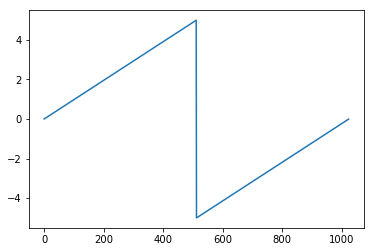

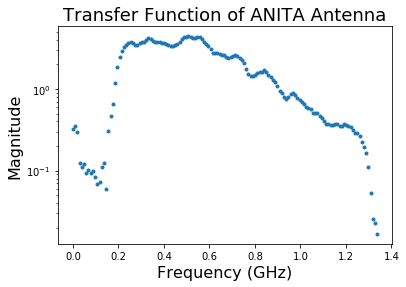

In [43]:
from scipy.interpolate import interp1d

newfunc=interp1d(fft.fftshift(freq_ant),antamp)
fnew=(0.200,1.200,101)

#newfunc(fnew)

plt.figure(0)
plt.plot(freq_ant)

print('\n\n\n\n\n\n')

plt.figure(1)
amp=[];
for i in range(len(antamp)):
    amp.append(abs(antamp[i]))

plt.semilogy(fft.fftshift(freq_ant)[512:650],amp[512:650],'.')

antamp_f=antamp[512:650];
antfreq_f=fft.fftshift(freq_ant)[512:650];

print(len(freq_ant),freq_ant[1]-freq_ant[0])

plt.title('Transfer Function of ANITA Antenna',fontsize=18)
plt.xlabel('Frequency (GHz)',fontsize=16)
plt.ylabel('Magnitude',fontsize=16)






f=open('AntennaTransferNew.txt','w')
for i in range(len(freq_ant)):
    f.write(str(fft.fftshift(freq_ant)[i])+',')
    
f=open('AntennaTransferAmp.txt','w')
for i in range(len(freq_ant)):
    f.write(str(antamp[i])+',')


In [5]:
freq_elec=[0.0,5002405.0024,10004810.0048,15007215.0072,20009620.0096,25012025.012,30014430.0144,35016835.0168,40019240.0192,45021645.0216,50024050.024,55026455.0264,60028860.0288,65031265.0312,70033670.0336,75036075.036,80038480.0384,85040885.0407,90043290.0431,95045695.0455,100048100.048,105050505.05,110052910.053,115055315.055,120057720.058,125060125.06,130062530.062,135064935.065,140067340.067,145069745.07,150072150.072,155074555.074,160076960.077,165079365.079,170081770.081,175084175.084,180086580.086,185088985.089,190091390.091,195093795.093,200096200.096,205098605.098,210101010.101,215103415.103,220105820.105,225108225.108,230110630.11,235113035.113,240115440.115,245117845.117,250120250.12,255122655.122,260125060.125,265127465.127,270129870.129,275132275.132,280134680.134,285137085.137,290139490.139,295141895.141,300144300.144,305146705.146,310149110.149,315151515.151,320153920.153,325156325.156,330158730.158,335161135.161,340163540.163,345165945.165,350168350.168,355170755.17,360173160.173,365175565.175,370177970.177,375180375.18,380182780.182,385185185.185,390187590.187,395189995.189,400192400.192,405194805.194,410197210.197,415199615.199,420202020.201,425204425.204,430206830.206,435209235.209,440211640.211,445214045.213,450216450.216,455218855.218,460221260.221,465223665.223,470226070.225,475228475.228,480230880.23,485233285.233,490235690.235,495238095.237,500240500.24,505242905.242,510245310.244,515247715.247,520250120.249,525252525.252,530254930.254,535257335.256,540259740.259,545262145.261,550264550.264,555266955.266,560269360.268,565271765.271,570274170.273,575276575.276,580278980.278,585281385.28,590283790.283,595286195.285,600288600.288,605291005.29,610293410.292,615295815.295,620298220.297,625300625.3,630303030.302,635305435.304,640307840.307,645310245.309,650312650.312,655315055.314,660317460.316,665319865.319,670322270.321,675324675.324,680327080.326,685329485.328,690331890.331,695334295.333,700336700.336,705339105.338,710341510.34,715343915.343,720346320.345,725348725.348,730351130.35,735353535.352,740355940.355,745358345.357,750360750.36,755363155.362,760365560.364,765367965.367,770370370.369,775372775.372,780375180.374,785377585.376,790379990.379,795382395.381,800384800.384,805387205.386,810389610.388,815392015.391,820394420.393,825396825.396,830399230.398,835401635.4,840404040.403,845406445.405,850408850.407,855411255.41,860413660.412,865416065.415,870418470.417,875420875.419,880423280.422,885425685.424,890428090.427,895430495.429,900432900.431,905435305.434,910437710.436,915440115.439,920442520.441,925444925.443,930447330.446,935449735.448,940452140.451,945454545.453,950456950.455,955459355.458,960461760.46,965464165.463,970466570.465,975468975.467,980471380.47,985473785.472,990476190.475,995478595.477,1000481000.48,1005483405.48,1010485810.48,1015488215.49,1020490620.49,1025493025.49,1030495430.49,1035497835.5,1040500240.5,1045502645.5,1050505050.5,1055507455.51,1060509860.51,1065512265.51,1070514670.51,1075517075.52,1080519480.52,1085521885.52,1090524290.52,1095526695.52,1100529100.53,1105531505.53,1110533910.53,1115536315.53,1120538720.54,1125541125.54,1130543530.54,1135545935.54,1140548340.55,1145550745.55,1150553150.55,1155555555.55,1160557960.56,1165560365.56,1170562770.56,1175565175.56,1180567580.57,1185569985.57,1190572390.57,1195574795.57,1200577200.58,1205579605.58,1210582010.58,1215584415.58,1220586820.58,1225589225.59,1230591630.59,1235594035.59,1240596440.59,1245598845.6,1250601250.6,1255603655.6,1260606060.6,1265608465.61,1270610870.61,1275613275.61,1280615680.61,1285618085.62,1290620490.62,1295622895.62,1300625300.62,1305627705.63,1310630110.63,1315632515.63,1320634920.63,1325637325.64,1330639730.64,1335642135.64,1340644540.64,1345646945.64,1350649350.65,1355651755.65,1360654160.65,1365656565.65,1370658970.66,1375661375.66,1380663780.66,1385666185.66,1390668590.67,1395670995.67,1400673400.67,1405675805.67,1410678210.68,1415680615.68,1420683020.68,1425685425.68,1430687830.69,1435690235.69,1440692640.69,1445695045.69,1450697450.7,1455699855.7,1460702260.7,1465704665.7,1470707070.7,1475709475.71,1480711880.71,1485714285.71,1490716690.71,1495719095.72,1500721500.72,1505723905.72,1510726310.72,1515728715.73,1520731120.73,1525733525.73,1530735930.73,1535738335.74,1540740740.74,1545743145.74,1550745550.74,1555747955.75,1560750360.75,1565752765.75,1570755170.75,1575757575.76,1580759980.76,1585762385.76,1590764790.76,1595767195.76,1600769600.77,1605772005.77,1610774410.77,1615776815.77,1620779220.78,1625781625.78,1630784030.78,1635786435.78,1640788840.79,1645791245.79,1650793650.79,1655796055.79,1660798460.8,1665800865.8,1670803270.8,1675805675.8,1680808080.81,1685810485.81,1690812890.81,1695815295.81,1700817700.81,1705820105.82,1710822510.82,1715824915.82,1720827320.82,1725829725.83,1730832130.83,1735834535.83,1740836940.83,1745839345.84,1750841750.84,1755844155.84,1760846560.84,1765848965.85,1770851370.85,1775853775.85,1780856180.85,1785858585.86,1790860990.86,1795863395.86,1800865800.86,1805868205.87,1810870610.87,1815873015.87,1820875420.87,1825877825.87,1830880230.88,1835882635.88,1840885040.88,1845887445.88,1850889850.89,1855892255.89,1860894660.89,1865897065.89,1870899470.9,1875901875.9,1880904280.9,1885906685.9,1890909090.91,1895911495.91,1900913900.91,1905916305.91,1910918710.92,1915921115.92,1920923520.92,1925925925.92,1930928330.93,1935930735.93,1940933140.93,1945935545.93,1950937950.93,1955940355.94,1960942760.94,1965945165.94,1970947570.94,1975949975.95,1980952380.95,1985954785.95,1990957190.95,1995959595.96,2000962000.96,2005964405.96,2010966810.96,2015969215.97,2020971620.97,2025974025.97,2030976430.97,2035978835.98,2040981240.98,2045983645.98,2050986050.98,2055988455.99,2060990860.99,2065993265.99,2070995670.99,2075998075.99,2081000481.0,2086002886.0,2091005291.0,2096007696.0,2101010101.01,2106012506.01,2111014911.01,2116017316.01,2121019721.02,2126022126.02,2131024531.02,2136026936.02,2141029341.03,2146031746.03,2151034151.03,2156036556.03,2161038961.04,2166041366.04,2171043771.04,2176046176.04,2181048581.05,2186050986.05,2191053391.05,2196055796.05,2201058201.05,2206060606.06,2211063011.06,2216065416.06,2221067821.06,2226070226.07,2231072631.07,2236075036.07,2241077441.07,2246079846.08,2251082251.08,2256084656.08,2261087061.08,2266089466.09,2271091871.09,2276094276.09,2281096681.09,2286099086.1,2291101491.1,2296103896.1,2301106301.1,2306108706.11,2311111111.11,2316113516.11,2321115921.11,2326118326.11,2331120731.12,2336123136.12,2341125541.12,2346127946.12,2351130351.13,2356132756.13,2361135161.13,2366137566.13,2371139971.14,2376142376.14,2381144781.14,2386147186.14,2391149591.15,2396151996.15,2401154401.15,2406156806.15,2411159211.16,2416161616.16,2421164021.16,2426166426.16,2431168831.16,2436171236.17,2441173641.17,2446176046.17,2451178451.17,2456180856.18,2461183261.18,2466185666.18,2471188071.18,2476190476.19,2481192881.19,2486195286.19,2491197691.19,2496200096.2,2501202501.2,2506204906.2,2511207311.2,2516209716.21,2521212121.21,2526214526.21,2531216931.21,2536219336.22,2541221741.22,2546224146.22,2551226551.22,2556228956.22,2561231361.23,2566233766.23,2571236171.23,2576238576.23,2581240981.24,2586243386.24,2591245791.24,2596248196.24,2601250601.25,2606253006.25,2611255411.25,2616257816.25,2621260221.26,2626262626.26,2631265031.26,2636267436.26,2641269841.27,2646272246.27,2651274651.27,2656277056.27,2661279461.28,2666281866.28,2671284271.28,2676286676.28,2681289081.28,2686291486.29,2691293891.29,2696296296.29,2701298701.29,2706301106.3,2711303511.3,2716305916.3,2721308321.3,2726310726.31,2731313131.31,2736315536.31,2741317941.31,2746320346.32,2751322751.32,2756325156.32,2761327561.32,2766329966.33,2771332371.33,2776334776.33,2781337181.33,2786339586.34,2791341991.34,2796344396.34,2801346801.34,2806349206.34,2811351611.35,2816354016.35,2821356421.35,2826358826.35,2831361231.36,2836363636.36,2841366041.36,2846368446.36,2851370851.37,2856373256.37,2861375661.37,2866378066.37,2871380471.38,2876382876.38,2881385281.38,2886387686.38,2891390091.39,2896392496.39,2901394901.39,2906397306.39,2911399711.4,2916402116.4,2921404521.4,2926406926.4,2931409331.4,2936411736.41,2941414141.41,2946416546.41,2951418951.41,2956421356.42,2961423761.42,2966426166.42,2971428571.42,2976430976.43,2981433381.43,2986435786.43,2991438191.43,2996440596.44,3001443001.44,3006445406.44,3011447811.44,3016450216.45,3021452621.45,3026455026.45,3031457431.45,3036459836.45,3041462241.46,3046464646.46,3051467051.46,3056469456.46,3061471861.47,3066474266.47,3071476671.47,3076479076.47,3081481481.48,3086483886.48,3091486291.48,3096488696.48,3101491101.49,3106493506.49,3111495911.49,3116498316.49,3121500721.5,3126503126.5,3131505531.5,3136507936.5,3141510341.51,3146512746.51,3151515151.51,3156517556.51,3161519961.51,3166522366.52,3171524771.52,3176527176.52,3181529581.52,3186531986.53,3191534391.53,3196536796.53,3201539201.53,3206541606.54,3211544011.54,3216546416.54,3221548821.54,3226551226.55,3231553631.55,3236556036.55,3241558441.55,3246560846.56,3251563251.56,3256565656.56,3261568061.56,3266570466.57,3271572871.57,3276575276.57,3281577681.57,3286580086.57,3291582491.58,3296584896.58,3301587301.58,3306589706.58,3311592111.59,3316594516.59,3321596921.59,3326599326.59,3331601731.6,3336604136.6,3341606541.6,3346608946.6,3351611351.61,3356613756.61,3361616161.61,3366618566.61,3371620971.62,3376623376.62,3381625781.62,3386628186.62,3391630591.63,3396632996.63,3401635401.63,3406637806.63,3411640211.63,3416642616.64,3421645021.64,3426647426.64,3431649831.64,3436652236.65,3441654641.65,3446657046.65,3451659451.65,3456661856.66,3461664261.66,3466666666.66,3471669071.66,3476671476.67,3481673881.67,3486676286.67,3491678691.67,3496681096.68,3501683501.68,3506685906.68,3511688311.68,3516690716.69,3521693121.69,3526695526.69,3531697931.69,3536700336.69,3541702741.7,3546705146.7,3551707551.7,3556709956.7,3561712361.71,3566714766.71,3571717171.71,3576719576.71,3581721981.72,3586724386.72,3591726791.72,3596729196.72,3601731601.73,3606734006.73,3611736411.73,3616738816.73,3621741221.74,3626743626.74,3631746031.74,3636748436.74,3641750841.75,3646753246.75,3651755651.75,3656758056.75,3661760461.75,3666762866.76,3671765271.76,3676767676.76,3681770081.76,3686772486.77,3691774891.77,3696777296.77,3701779701.77,3706782106.78,3711784511.78,3716786916.78,3721789321.78,3726791726.79,3731794131.79,3736796536.79,3741798941.79,3746801346.8,3751803751.8,3756806156.8,3761808561.8,3766810966.8,3771813371.81,3776815776.81,3781818181.81,3786820586.81,3791822991.82,3796825396.82,3801827801.82,3806830206.82,3811832611.83,3816835016.83,3821837421.83,3826839826.83,3831842231.84,3836844636.84,3841847041.84,3846849446.84,3851851851.85,3856854256.85,3861856661.85,3866859066.85,3871861471.86,3876863876.86,3881866281.86,3886868686.86,3891871091.86,3896873496.87,3901875901.87,3906878306.87,3911880711.87,3916883116.88,3921885521.88,3926887926.88,3931890331.88,3936892736.89,3941895141.89,3946897546.89,3951899951.89,3956902356.9,3961904761.9,3966907166.9,3971909571.9,3976911976.91,3981914381.91,3986916786.91,3991919191.91,3996921596.92,4001924001.92,4006926406.92,4011928811.92,4016931216.92,4021933621.93,4026936026.93,4031938431.93,4036940836.93,4041943241.94,4046945646.94,4051948051.94,4056950456.94,4061952861.95,4066955266.95,4071957671.95,4076960076.95,4081962481.96,4086964886.96,4091967291.96,4096969696.96,4101972101.97,4106974506.97,4111976911.97,4116979316.97,4121981721.98,4126984126.98,4131986531.98,4136988936.98,4141991341.98,4146993746.99,4151996151.99,4156998556.99,4162000961.99,4167003367.0,4172005772.0,4177008177.0,4182010582.0,4187012987.01,4192015392.01,4197017797.01,4202020202.01,4207022607.02,4212025012.02,4217027417.02,4222029822.02,4227032227.03,4232034632.03,4237037037.03,4242039442.03,4247041847.04,4252044252.04,4257046657.04,4262049062.04,4267051467.04,4272053872.05,4277056277.05,4282058682.05,4287061087.05,4292063492.06,4297065897.06,4302068302.06,4307070707.06,4312073112.07,4317075517.07,4322077922.07,4327080327.07,4332082732.08,4337085137.08,4342087542.08,4347089947.08,4352092352.09,4357094757.09,4362097162.09,4367099567.09,4372101972.09,4377104377.1,4382106782.1,4387109187.1,4392111592.1,4397113997.11,4402116402.11,4407118807.11,4412121212.11,4417123617.12,4422126022.12,4427128427.12,4432130832.12,4437133237.13,4442135642.13,4447138047.13,4452140452.13,4457142857.14,4462145262.14,4467147667.14,4472150072.14,4477152477.15,4482154882.15,4487157287.15,4492159692.15,4497162097.15,4502164502.16,4507166907.16,4512169312.16,4517171717.16,4522174122.17,4527176527.17,4532178932.17,4537181337.17,4542183742.18,4547186147.18,4552188552.18,4557190957.18,4562193362.19,4567195767.19,4572198172.19,4577200577.19,4582202982.2,4587205387.2,4592207792.2,4597210197.2,4602212602.21,4607215007.21,4612217412.21,4617219817.21,4622222222.21,4627224627.22,4632227032.22,4637229437.22,4642231842.22,4647234247.23,4652236652.23,4657239057.23,4662241462.23,4667243867.24,4672246272.24,4677248677.24,4682251082.24,4687253487.25,4692255892.25,4697258297.25,4702260702.25,4707263107.26,4712265512.26,4717267917.26,4722270322.26,4727272727.27,4732275132.27,4737277537.27,4742279942.27,4747282347.27,4752284752.28,4757287157.28,4762289562.28,4767291967.28,4772294372.29,4777296777.29,4782299182.29,4787301587.29,4792303992.3,4797306397.3,4802308802.3,4807311207.3,4812313612.31,4817316017.31,4822318422.31,4827320827.31,4832323232.32,4837325637.32,4842328042.32,4847330447.32,4852332852.33,4857335257.33,4862337662.33,4867340067.33,4872342472.33,4877344877.34,4882347282.34,4887349687.34,4892352092.34,4897354497.35,4902356902.35,4907359307.35,4912361712.35,4917364117.36,4922366522.36,4927368927.36,4932371332.36,4937373737.37,4942376142.37,4947378547.37,4952380952.37,4957383357.38,4962385762.38,4967388167.38,4972390572.38,4977392977.39,4982395382.39,4987397787.39,4992400192.39,4997402597.39,5002405002.4,5007407407.4,5012409812.4,5017412217.4,5022414622.41,5027417027.41,5032419432.41,5037421837.41,5042424242.42,5047426647.42,5052429052.42,5057431457.42,5062433862.43,5067436267.43,5072438672.43,5077441077.43,5082443482.44,5087445887.44,5092448292.44,5097450697.44,5102453102.44,5107455507.45,5112457912.45,5117460317.45,5122462722.45,5127465127.46,5132467532.46,5137469937.46,5142472342.46,5147474747.47,5152477152.47,5157479557.47,5162481962.47,5167484367.48,5172486772.48,5177489177.48,5182491582.48,5187493987.49,5192496392.49,5197498797.49,5202501202.49,5207503607.5,5212506012.5,5217508417.5,5222510822.5,5227513227.5,5232515632.51,5237518037.51,5242520442.51,5247522847.51,5252525252.52,5257527657.52,5262530062.52,5267532467.52,5272534872.53,5277537277.53,5282539682.53,5287542087.53,5292544492.54,5297546897.54,5302549302.54,5307551707.54,5312554112.55,5317556517.55,5322558922.55,5327561327.55,5332563732.56,5337566137.56,5342568542.56,5347570947.56,5352573352.56,5357575757.57,5362578162.57,5367580567.57,5372582972.57,5377585377.58,5382587782.58,5387590187.58,5392592592.58,5397594997.59,5402597402.59,5407599807.59,5412602212.59,5417604617.6,5422607022.6,5427609427.6,5432611832.6,5437614237.61,5442616642.61,5447619047.61,5452621452.61,5457623857.62,5462626262.62,5467628667.62,5472631072.62,5477633477.62,5482635882.63,5487638287.63,5492640692.63,5497643097.63,5502645502.64,5507647907.64,5512650312.64,5517652717.64,5522655122.65,5527657527.65,5532659932.65,5537662337.65,5542664742.66,5547667147.66,5552669552.66,5557671957.66,5562674362.67,5567676767.67,5572679172.67,5577681577.67,5582683982.68,5587686387.68,5592688792.68,5597691197.68,5602693602.68,5607696007.69,5612698412.69,5617700817.69,5622703222.69,5627705627.7,5632708032.7,5637710437.7,5642712842.7,5647715247.71,5652717652.71,5657720057.71,5662722462.71,5667724867.72,5672727272.72,5677729677.72,5682732082.72,5687734487.73,5692736892.73,5697739297.73,5702741702.73,5707744107.73,5712746512.74,5717748917.74,5722751322.74,5727753727.74,5732756132.75,5737758537.75,5742760942.75,5747763347.75,5752765752.76,5757768157.76,5762770562.76,5767772967.76,5772775372.77,5777777777.77,5782780182.77,5787782587.77,5792784992.78,5797787397.78,5802789802.78,5807792207.78,5812794612.79,5817797017.79,5822799422.79,5827801827.79,5832804232.79,5837806637.8,5842809042.8,5847811447.8,5852813852.8,5857816257.81,5862818662.81,5867821067.81,5872823472.81,5877825877.82,5882828282.82,5887830687.82,5892833092.82,5897835497.83,5902837902.83,5907840307.83,5912842712.83,5917845117.84,5922847522.84,5927849927.84,5932852332.84,5937854737.85,5942857142.85,5947859547.85,5952861952.85,5957864357.85,5962866762.86,5967869167.86,5972871572.86,5977873977.86,5982876382.87,5987878787.87,5992881192.87,5997883597.87,6002886002.88,6007888407.88,6012890812.88,6017893217.88,6022895622.89,6027898027.89,6032900432.89,6037902837.89,6042905242.9,6047907647.9,6052910052.9,6057912457.9,6062914862.91,6067917267.91,6072919672.91,6077922077.91,6082924482.91,6087926887.92,6092929292.92,6097931697.92,6102934102.92,6107936507.93,6112938912.93,6117941317.93,6122943722.93,6127946127.94,6132948532.94,6137950937.94,6142953342.94,6147955747.95,6152958152.95,6157960557.95,6162962962.95,6167965367.96,6172967772.96,6177970177.96,6182972582.96,6187974987.97,6192977392.97,6197979797.97,6202982202.97,6207984607.97,6212987012.98,6217989417.98,6222991822.98,6227994227.98,6232996632.99,6237999037.99,6243001442.99,6248003847.99,6253006253.0,6258008658.0,6263011063.0,6268013468.0,6273015873.01,6278018278.01,6283020683.01,6288023088.01,6293025493.02,6298027898.02,6303030303.02,6308032708.02,6313035113.03,6318037518.03,6323039923.03,6328042328.03,6333044733.03,6338047138.04,6343049543.04,6348051948.04,6353054353.04,6358056758.05,6363059163.05,6368061568.05,6373063973.05,6378066378.06,6383068783.06,6388071188.06,6393073593.06,6398075998.07,6403078403.07,6408080808.07,6413083213.07,6418085618.08,6423088023.08,6428090428.08,6433092833.08,6438095238.08,6443097643.09,6448100048.09,6453102453.09,6458104858.09,6463107263.1,6468109668.1,6473112073.1,6478114478.1,6483116883.11,6488119288.11,6493121693.11,6498124098.11,6503126503.12,6508128908.12,6513131313.12,6518133718.12,6523136123.13,6528138528.13,6533140933.13,6538143338.13,6543145743.14,6548148148.14,6553150553.14,6558152958.14,6563155363.14,6568157768.15,6573160173.15,6578162578.15,6583164983.15,6588167388.16,6593169793.16,6598172198.16,6603174603.16,6608177008.17,6613179413.17,6618181818.17,6623184223.17,6628186628.18,6633189033.18,6638191438.18,6643193843.18,6648196248.19,6653198653.19,6658201058.19,6663203463.19,6668205868.2,6673208273.2,6678210678.2,6683213083.2,6688215488.2,6693217893.21,6698220298.21,6703222703.21,6708225108.21,6713227513.22,6718229918.22,6723232323.22,6728234728.22,6733237133.23,6738239538.23,6743241943.23,6748244348.23,6753246753.24,6758249158.24,6763251563.24,6768253968.24,6773256373.25,6778258778.25,6783261183.25,6788263588.25,6793265993.26,6798268398.26,6803270803.26,6808273208.26,6813275613.26,6818278018.27,6823280423.27,6828282828.27,6833285233.27,6838287638.28,6843290043.28,6848292448.28,6853294853.28,6858297258.29,6863299663.29,6868302068.29,6873304473.29,6878306878.3,6883309283.3,6888311688.3,6893314093.3,6898316498.31,6903318903.31,6908321308.31,6913323713.31,6918326118.32,6923328523.32,6928330928.32,6933333333.32,6938335738.32,6943338143.33,6948340548.33,6953342953.33,6958345358.33,6963347763.34,6968350168.34,6973352573.34,6978354978.34,6983357383.35,6988359788.35,6993362193.35,6998364598.35,7003367003.36,7008369408.36,7013371813.36,7018374218.36,7023376623.37,7028379028.37,7033381433.37,7038383838.37,7043386243.37,7048388648.38,7053391053.38,7058393458.38,7063395863.38,7068398268.39,7073400673.39,7078403078.39,7083405483.39,7088407888.4,7093410293.4,7098412698.4,7103415103.4,7108417508.41,7113419913.41,7118422318.41,7123424723.41,7128427128.42,7133429533.42,7138431938.42,7143434343.42,7148436748.43,7153439153.43,7158441558.43,7163443963.43,7168446368.43,7173448773.44,7178451178.44,7183453583.44,7188455988.44,7193458393.45,7198460798.45,7203463203.45,7208465608.45,7213468013.46,7218470418.46,7223472823.46,7228475228.46,7233477633.47,7238480038.47,7243482443.47,7248484848.47,7253487253.48,7258489658.48,7263492063.48,7268494468.48,7273496873.49,7278499278.49,7283501683.49,7288504088.49,7293506493.49,7298508898.5,7303511303.5,7308513708.5,7313516113.5,7318518518.51,7323520923.51,7328523328.51,7333525733.51,7338528138.52,7343530543.52,7348532948.52,7353535353.52,7358537758.53,7363540163.53,7368542568.53,7373544973.53,7378547378.54,7383549783.54,7388552188.54,7393554593.54,7398556998.55,7403559403.55,7408561808.55,7413564213.55,7418566618.55,7423569023.56,7428571428.56,7433573833.56,7438576238.56,7443578643.57,7448581048.57,7453583453.57,7458585858.57,7463588263.58,7468590668.58,7473593073.58,7478595478.58,7483597883.59,7488600288.59,7493602693.59,7498605098.59,7503607503.6,7508609908.6,7513612313.6,7518614718.6,7523617123.61,7528619528.61,7533621933.61,7538624338.61,7543626743.61,7548629148.62,7553631553.62,7558633958.62,7563636363.62,7568638768.63,7573641173.63,7578643578.63,7583645983.63,7588648388.64,7593650793.64,7598653198.64,7603655603.64,7608658008.65,7613660413.65,7618662818.65,7623665223.65,7628667628.66,7633670033.66,7638672438.66,7643674843.66,7648677248.67,7653679653.67,7658682058.67,7663684463.67,7668686868.67,7673689273.68,7678691678.68,7683694083.68,7688696488.68,7693698893.69,7698701298.69,7703703703.69,7708706108.69,7713708513.7,7718710918.7,7723713323.7,7728715728.7,7733718133.71,7738720538.71,7743722943.71,7748725348.71,7753727753.72,7758730158.72,7763732563.72,7768734968.72,7773737373.72,7778739778.73,7783742183.73,7788744588.73,7793746993.73,7798749398.74,7803751803.74,7808754208.74,7813756613.74,7818759018.75,7823761423.75,7828763828.75,7833766233.75,7838768638.76,7843771043.76,7848773448.76,7853775853.76,7858778258.77,7863780663.77,7868783068.77,7873785473.77,7878787878.78,7883790283.78,7888792688.78,7893795093.78,7898797498.78,7903799903.79,7908802308.79,7913804713.79,7918807118.79,7923809523.8,7928811928.8,7933814333.8,7938816738.8,7943819143.81,7948821548.81,7953823953.81,7958826358.81,7963828763.82,7968831168.82,7973833573.82,7978835978.82,7983838383.83,7988840788.83,7993843193.83,7998845598.83,8003848003.84,8008850408.84,8013852813.84,8018855218.84,8023857623.84,8028860028.85,8033862433.85,8038864838.85,8043867243.85,8048869648.86,8053872053.86,8058874458.86,8063876863.86,8068879268.87,8073881673.87,8078884078.87,8083886483.87,8088888888.88,8093891293.88,8098893698.88,8103896103.88,8108898508.89,8113900913.89,8118903318.89,8123905723.89,8128908128.9,8133910533.9,8138912938.9,8143915343.9,8148917748.9,8153920153.91,8158922558.91,8163924963.91,8168927368.91,8173929773.92,8178932178.92,8183934583.92,8188936988.92,8193939393.93,8198941798.93,8203944203.93,8208946608.93,8213949013.94,8218951418.94,8223953823.94,8228956228.94,8233958633.95,8238961038.95,8243963443.95,8248965848.95,8253968253.96,8258970658.96,8263973063.96,8268975468.96,8273977873.96,8278980278.97,8283982683.97,8288985088.97,8293987493.97,8298989898.98,8303992303.98,8308994708.98,8313997113.98,8318999518.99,8324001923.99,8329004328.99,8334006733.99,8339009139.0,8344011544.0,8349013949.0,8354016354.0,8359018759.01,8364021164.01,8369023569.01,8374025974.01,8379028379.01,8384030784.02,8389033189.02,8394035594.02,8399037999.02,8404040404.03,8409042809.03,8414045214.03,8419047619.03,8424050024.04,8429052429.04,8434054834.04,8439057239.04,8444059644.05,8449062049.05,8454064454.05,8459066859.05,8464069264.06,8469071669.06,8474074074.06,8479076479.06,8484078884.07,8489081289.07,8494083694.07,8499086099.07,8504088504.07,8509090909.08,8514093314.08,8519095719.08,8524098124.08,8529100529.09,8534102934.09,8539105339.09,8544107744.09,8549110149.1,8554112554.1,8559114959.1,8564117364.1,8569119769.11,8574122174.11,8579124579.11,8584126984.11,8589129389.12,8594131794.12,8599134199.12,8604136604.12,8609139009.13,8614141414.13,8619143819.13,8624146224.13,8629148629.13,8634151034.14,8639153439.14,8644155844.14,8649158249.14,8654160654.15,8659163059.15,8664165464.15,8669167869.15,8674170274.16,8679172679.16,8684175084.16,8689177489.16,8694179894.17,8699182299.17,8704184704.17,8709187109.17,8714189514.18,8719191919.18,8724194324.18,8729196729.18,8734199134.19,8739201539.19,8744203944.19,8749206349.19,8754208754.19,8759211159.2,8764213564.2,8769215969.2,8774218374.2,8779220779.21,8784223184.21,8789225589.21,8794227994.21,8799230399.22,8804232804.22,8809235209.22,8814237614.22,8819240019.23,8824242424.23,8829244829.23,8834247234.23,8839249639.24,8844252044.24,8849254449.24,8854256854.24,8859259259.25,8864261664.25,8869264069.25,8874266474.25,8879268879.25,8884271284.26,8889273689.26,8894276094.26,8899278499.26,8904280904.27,8909283309.27,8914285714.27,8919288119.27,8924290524.28,8929292929.28,8934295334.28,8939297739.28,8944300144.29,8949302549.29,8954304954.29,8959307359.29,8964309764.3,8969312169.3,8974314574.3,8979316979.3,8984319384.31,8989321789.31,8994324194.31,8999326599.31,9004329004.31,9009331409.32,9014333814.32,9019336219.32,9024338624.32,9029341029.33,9034343434.33,9039345839.33,9044348244.33,9049350649.34,9054353054.34,9059355459.34,9064357864.34,9069360269.35,9074362674.35,9079365079.35,9084367484.35,9089369889.36,9094372294.36,9099374699.36,9104377104.36,9109379509.36,9114381914.37,9119384319.37,9124386724.37,9129389129.37,9134391534.38,9139393939.38,9144396344.38,9149398749.38,9154401154.39,9159403559.39,9164405964.39,9169408369.39,9174410774.4,9179413179.4,9184415584.4,9189417989.4,9194420394.41,9199422799.41,9204425204.41,9209427609.41,9214430014.42,9219432419.42,9224434824.42,9229437229.42,9234439634.42,9239442039.43,9244444444.43,9249446849.43,9254449254.43,9259451659.44,9264454064.44,9269456469.44,9274458874.44,9279461279.45,9284463684.45,9289466089.45,9294468494.45,9299470899.46,9304473304.46,9309475709.46,9314478114.46,9319480519.47,9324482924.47,9329485329.47,9334487734.47,9339490139.48,9344492544.48,9349494949.48,9354497354.48,9359499759.48,9364502164.49,9369504569.49,9374506974.49,9379509379.49,9384511784.5,9389514189.5,9394516594.5,9399518999.5,9404521404.51,9409523809.51,9414526214.51,9419528619.51,9424531024.52,9429533429.52,9434535834.52,9439538239.52,9444540644.53,9449543049.53,9454545454.53,9459547859.53,9464550264.54,9469552669.54,9474555074.54,9479557479.54,9484559884.54,9489562289.55,9494564694.55,9499567099.55,9504569504.55,9509571909.56,9514574314.56,9519576719.56,9524579124.56,9529581529.57,9534583934.57,9539586339.57,9544588744.57,9549591149.58,9554593554.58,9559595959.58,9564598364.58,9569600769.59,9574603174.59,9579605579.59,9584607984.59,9589610389.6,9594612794.6,9599615199.6,9604617604.6,9609620009.6,9614622414.61,9619624819.61,9624627224.61,9629629629.61,9634632034.62,9639634439.62,9644636844.62,9649639249.62,9654641654.63,9659644059.63,9664646464.63,9669648869.63,9674651274.64,9679653679.64,9684656084.64,9689658489.64,9694660894.65,9699663299.65,9704665704.65,9709668109.65,9714670514.65,9719672919.66,9724675324.66,9729677729.66,9734680134.66,9739682539.67,9744684944.67,9749687349.67,9754689754.67,9759692159.68,9764694564.68,9769696969.68,9774699374.68,9779701779.69,9784704184.69,9789706589.69,9794708994.69,9799711399.7,9804713804.7,9809716209.7,9814718614.7,9819721019.71,9824723424.71,9829725829.71,9834728234.71,9839730639.71,9844733044.72,9849735449.72,9854737854.72,9859740259.72,9864742664.73,9869745069.73,9874747474.73,9879749879.73,9884752284.74,9889754689.74,9894757094.74,9899759499.74,9904761904.75,9909764309.75,9914766714.75,9919769119.75,9924771524.76,9929773929.76,9934776334.76,9939778739.76,9944781144.77,9949783549.77,9954785954.77,9959788359.77,9964790764.77,9969793169.78,9974795574.78,9979797979.78,9984800384.78,9989802789.79,9994805194.79,9999807599.79,10004810004.8,10009812409.8,10014814814.8,10019817219.8,10024819624.8,10029822029.8,10034824434.8,10039826839.8,10044829244.8,10049831649.8,10054834054.8,10059836459.8,10064838864.8,10069841269.8,10074843674.8,10079846079.8,10084848484.8,10089850889.8,10094853294.8,10099855699.8,10104858104.8,10109860509.8,10114862914.8,10119865319.8,10124867724.9,10129870129.9,10134872534.9,10139874939.9,10144877344.9,10149879749.9,10154882154.9,10159884559.9,10164886964.9,10169889369.9,10174891774.9,10179894179.9,10184896584.9,10189898989.9,10194901394.9,10199903799.9,10204906204.9,10209908609.9,10214911014.9,10219913419.9,10224915824.9,10229918229.9,10234920634.9,10239923039.9,10244925444.9,10249927849.9,10254930254.9,10259932659.9,10264935064.9,10269937469.9,10274939874.9,10279942279.9,10284944684.9,10289947089.9,10294949494.9,10299951899.9,10304954304.9,10309956709.9,10314959114.9,10319961519.9,10324963924.9,10329966329.9,10334968735.0,10339971140.0,10344973545.0,10349975950.0,10354978355.0,10359980760.0,10364983165.0,10369985570.0,10374987975.0,10379990380.0,10384992785.0,10389995190.0,10394997595.0,10400000000.0,10405002405.0,10410004810.0,10415007215.0,10420009620.0,10425012025.0,10430014430.0,10435016835.0,10440019240.0,10445021645.0,10450024050.0,10455026455.0,10460028860.0,10465031265.0,10470033670.0,10475036075.0,10480038480.0,10485040885.0,10490043290.0,10495045695.0,10500048100.0,10505050505.0,10510052910.0,10515055315.0,10520057720.0,10525060125.0,10530062530.0,10535064935.0,10540067340.1,10545069745.1,10550072150.1,10555074555.1,10560076960.1,10565079365.1,10570081770.1,10575084175.1,10580086580.1,10585088985.1,10590091390.1,10595093795.1,10600096200.1,10605098605.1,10610101010.1,10615103415.1,10620105820.1,10625108225.1,10630110630.1,10635113035.1,10640115440.1,10645117845.1,10650120250.1,10655122655.1,10660125060.1,10665127465.1,10670129870.1,10675132275.1,10680134680.1,10685137085.1,10690139490.1,10695141895.1,10700144300.1,10705146705.1,10710149110.1,10715151515.1,10720153920.1,10725156325.1,10730158730.1,10735161135.1,10740163540.1,10745165945.1,10750168350.2,10755170755.2,10760173160.2,10765175565.2,10770177970.2,10775180375.2,10780182780.2,10785185185.2,10790187590.2,10795189995.2,10800192400.2,10805194805.2,10810197210.2,10815199615.2,10820202020.2,10825204425.2,10830206830.2,10835209235.2,10840211640.2,10845214045.2,10850216450.2,10855218855.2,10860221260.2,10865223665.2,10870226070.2,10875228475.2,10880230880.2,10885233285.2,10890235690.2,10895238095.2,10900240500.2,10905242905.2,10910245310.2,10915247715.2,10920250120.2,10925252525.2,10930254930.2,10935257335.2,10940259740.2,10945262145.2,10950264550.2,10955266955.2,10960269360.3,10965271765.3,10970274170.3,10975276575.3,10980278980.3,10985281385.3,10990283790.3,10995286195.3,11000288600.3,11005291005.3,11010293410.3,11015295815.3,11020298220.3,11025300625.3,11030303030.3,11035305435.3,11040307840.3,11045310245.3,11050312650.3,11055315055.3,11060317460.3,11065319865.3,11070322270.3,11075324675.3,11080327080.3,11085329485.3,11090331890.3,11095334295.3,11100336700.3,11105339105.3,11110341510.3,11115343915.3,11120346320.3,11125348725.3,11130351130.3,11135353535.3,11140355940.3,11145358345.3,11150360750.3,11155363155.3,11160365560.3,11165367965.4,11170370370.4,11175372775.4,11180375180.4,11185377585.4,11190379990.4,11195382395.4,11200384800.4,11205387205.4,11210389610.4,11215392015.4,11220394420.4,11225396825.4,11230399230.4,11235401635.4,11240404040.4,11245406445.4,11250408850.4,11255411255.4,11260413660.4,11265416065.4,11270418470.4,11275420875.4,11280423280.4,11285425685.4,11290428090.4,11295430495.4,11300432900.4,11305435305.4,11310437710.4,11315440115.4,11320442520.4,11325444925.4,11330447330.4,11335449735.4,11340452140.4,11345454545.4,11350456950.4,11355459355.4,11360461760.4,11365464165.4,11370466570.4,11375468975.5,11380471380.5,11385473785.5,11390476190.5,11395478595.5,11400481000.5,11405483405.5,11410485810.5,11415488215.5,11420490620.5,11425493025.5,11430495430.5,11435497835.5,11440500240.5,11445502645.5,11450505050.5,11455507455.5,11460509860.5,11465512265.5,11470514670.5,11475517075.5,11480519480.5,11485521885.5,11490524290.5,11495526695.5,11500529100.5,11505531505.5,11510533910.5,11515536315.5,11520538720.5,11525541125.5,11530543530.5,11535545935.5,11540548340.5,11545550745.5,11550553150.5,11555555555.5,11560557960.5,11565560365.5,11570562770.5,11575565175.5,11580567580.5,11585569985.6,11590572390.6,11595574795.6,11600577200.6,11605579605.6,11610582010.6,11615584415.6,11620586820.6,11625589225.6,11630591630.6,11635594035.6,11640596440.6,11645598845.6,11650601250.6,11655603655.6,11660606060.6,11665608465.6,11670610870.6,11675613275.6,11680615680.6,11685618085.6,11690620490.6,11695622895.6,11700625300.6,11705627705.6,11710630110.6,11715632515.6,11720634920.6,11725637325.6,11730639730.6,11735642135.6,11740644540.6,11745646945.6,11750649350.6,11755651755.6,11760654160.6,11765656565.6,11770658970.6,11775661375.6,11780663780.6,11785666185.6,11790668590.6,11795670995.7,11800673400.7,11805675805.7,11810678210.7,11815680615.7,11820683020.7,11825685425.7,11830687830.7,11835690235.7,11840692640.7,11845695045.7,11850697450.7,11855699855.7,11860702260.7,11865704665.7,11870707070.7,11875709475.7,11880711880.7,11885714285.7,11890716690.7,11895719095.7,11900721500.7,11905723905.7,11910726310.7,11915728715.7,11920731120.7,11925733525.7,11930735930.7,11935738335.7,11940740740.7,11945743145.7,11950745550.7,11955747955.7,11960750360.7,11965752765.7,11970755170.7,11975757575.7,11980759980.7,11985762385.7,11990764790.7,11995767195.7,12000769600.8,12005772005.8,12010774410.8,12015776815.8,12020779220.8,12025781625.8,12030784030.8,12035786435.8,12040788840.8,12045791245.8,12050793650.8,12055796055.8,12060798460.8,12065800865.8,12070803270.8,12075805675.8,12080808080.8,12085810485.8,12090812890.8,12095815295.8,12100817700.8,12105820105.8,12110822510.8,12115824915.8,12120827320.8,12125829725.8,12130832130.8,12135834535.8,12140836940.8,12145839345.8,12150841750.8,12155844155.8,12160846560.8,12165848965.8,12170851370.8,12175853775.8,12180856180.8,12185858585.8,12190860990.8,12195863395.8,12200865800.8,12205868205.8,12210870610.9,12215873015.9,12220875420.9,12225877825.9,12230880230.9,12235882635.9,12240885040.9,12245887445.9,12250889850.9,12255892255.9,12260894660.9,12265897065.9,12270899470.9,12275901875.9,12280904280.9,12285906685.9,12290909090.9,12295911495.9,12300913900.9,12305916305.9,12310918710.9,12315921115.9,12320923520.9,12325925925.9,12330928330.9,12335930735.9,12340933140.9,12345935545.9,12350937950.9,12355940355.9,12360942760.9,12365945165.9,12370947570.9,12375949975.9,12380952380.9,12385954785.9,12390957190.9,12395959595.9,12400962000.9,12405964405.9,12410966810.9,12415969215.9,12420971621.0,12425974026.0,12430976431.0,12435978836.0,12440981241.0,12445983646.0,12450986051.0,12455988456.0,12460990861.0,12465993266.0,12470995671.0,12475998076.0,12481000481.0,12486002886.0,12491005291.0,12496007696.0,12501010101.0,12506012506.0,12511014911.0,12516017316.0,12521019721.0,12526022126.0,12531024531.0,12536026936.0,12541029341.0,12546031746.0,12551034151.0,12556036556.0,12561038961.0,12566041366.0,12571043771.0,12576046176.0,12581048581.0,12586050986.0,12591053391.0,12596055796.0,12601058201.0,12606060606.0,12611063011.0,12616065416.0,12621067821.0,12626070226.1,12631072631.1,12636075036.1,12641077441.1,12646079846.1,12651082251.1,12656084656.1,12661087061.1,12666089466.1,12671091871.1,12676094276.1,12681096681.1,12686099086.1,12691101491.1,12696103896.1,12701106301.1,12706108706.1,12711111111.1,12716113516.1,12721115921.1,12726118326.1,12731120731.1,12736123136.1,12741125541.1,12746127946.1,12751130351.1,12756132756.1,12761135161.1,12766137566.1,12771139971.1,12776142376.1,12781144781.1,12786147186.1,12791149591.1,12796151996.1,12801154401.1,12806156806.1,12811159211.1,12816161616.1,12821164021.1,12826166426.1,12831168831.1,12836171236.2,12841173641.2,12846176046.2,12851178451.2,12856180856.2,12861183261.2,12866185666.2,12871188071.2,12876190476.2,12881192881.2,12886195286.2,12891197691.2,12896200096.2,12901202501.2,12906204906.2,12911207311.2,12916209716.2,12921212121.2,12926214526.2,12931216931.2,12936219336.2,12941221741.2,12946224146.2,12951226551.2,12956228956.2,12961231361.2,12966233766.2,12971236171.2,12976238576.2,12981240981.2,12986243386.2,12991245791.2,12996248196.2,13001250601.2,13006253006.2,13011255411.2,13016257816.2,13021260221.2,13026262626.2,13031265031.2,13036267436.2,13041269841.2,13046272246.3,13051274651.3,13056277056.3,13061279461.3,13066281866.3,13071284271.3,13076286676.3,13081289081.3,13086291486.3,13091293891.3,13096296296.3,13101298701.3,13106301106.3,13111303511.3,13116305916.3,13121308321.3,13126310726.3,13131313131.3,13136315536.3,13141317941.3,13146320346.3,13151322751.3,13156325156.3,13161327561.3,13166329966.3,13171332371.3,13176334776.3,13181337181.3,13186339586.3,13191341991.3,13196344396.3,13201346801.3,13206349206.3,13211351611.3,13216354016.3,13221356421.3,13226358826.3,13231361231.3,13236363636.3,13241366041.3,13246368446.3,13251370851.3,13256373256.4,13261375661.4,13266378066.4,13271380471.4,13276382876.4,13281385281.4,13286387686.4,13291390091.4,13296392496.4,13301394901.4,13306397306.4,13311399711.4,13316402116.4,13321404521.4,13326406926.4,13331409331.4,13336411736.4,13341414141.4,13346416546.4,13351418951.4,13356421356.4,13361423761.4,13366426166.4,13371428571.4,13376430976.4,13381433381.4,13386435786.4,13391438191.4,13396440596.4,13401443001.4,13406445406.4,13411447811.4,13416450216.4,13421452621.4,13426455026.4,13431457431.4,13436459836.4,13441462241.4,13446464646.4,13451467051.4,13456469456.4,13461471861.5,13466474266.5,13471476671.5,13476479076.5,13481481481.5,13486483886.5,13491486291.5,13496488696.5,13501491101.5,13506493506.5,13511495911.5,13516498316.5,13521500721.5,13526503126.5,13531505531.5,13536507936.5,13541510341.5,13546512746.5,13551515151.5,13556517556.5,13561519961.5,13566522366.5,13571524771.5,13576527176.5,13581529581.5,13586531986.5,13591534391.5,13596536796.5,13601539201.5,13606541606.5,13611544011.5,13616546416.5,13621548821.5,13626551226.5,13631553631.5,13636556036.5,13641558441.5,13646560846.5,13651563251.5,13656565656.5,13661568061.5,13666570466.5,13671572871.6,13676575276.6,13681577681.6,13686580086.6,13691582491.6,13696584896.6,13701587301.6,13706589706.6,13711592111.6,13716594516.6,13721596921.6,13726599326.6,13731601731.6,13736604136.6,13741606541.6,13746608946.6,13751611351.6,13756613756.6,13761616161.6,13766618566.6,13771620971.6,13776623376.6,13781625781.6,13786628186.6,13791630591.6,13796632996.6,13801635401.6,13806637806.6,13811640211.6,13816642616.6,13821645021.6,13826647426.6,13831649831.6,13836652236.6,13841654641.6,13846657046.6,13851659451.6,13856661856.6,13861664261.6,13866666666.6,13871669071.6,13876671476.6,13881673881.7,13886676286.7,13891678691.7,13896681096.7,13901683501.7,13906685906.7,13911688311.7,13916690716.7,13921693121.7,13926695526.7,13931697931.7,13936700336.7,13941702741.7,13946705146.7,13951707551.7,13956709956.7,13961712361.7,13966714766.7,13971717171.7,13976719576.7,13981721981.7,13986724386.7,13991726791.7,13996729196.7,14001731601.7,14006734006.7,14011736411.7,14016738816.7,14021741221.7,14026743626.7,14031746031.7,14036748436.7,14041750841.7,14046753246.7,14051755651.7,14056758056.7,14061760461.7,14066762866.7,14071765271.7,14076767676.7,14081770081.7,14086772486.7,14091774891.8,14096777296.8,14101779701.8,14106782106.8,14111784511.8,14116786916.8,14121789321.8,14126791726.8,14131794131.8,14136796536.8,14141798941.8,14146801346.8,14151803751.8,14156806156.8,14161808561.8,14166810966.8,14171813371.8,14176815776.8,14181818181.8,14186820586.8,14191822991.8,14196825396.8,14201827801.8,14206830206.8,14211832611.8,14216835016.8,14221837421.8,14226839826.8,14231842231.8,14236844636.8,14241847041.8,14246849446.8,14251851851.8,14256854256.8,14261856661.8,14266859066.8,14271861471.8,14276863876.8,14281866281.8,14286868686.8,14291871091.8,14296873496.9,14301875901.9,14306878306.9,14311880711.9,14316883116.9,14321885521.9,14326887926.9,14331890331.9,14336892736.9,14341895141.9,14346897546.9,14351899951.9,14356902356.9,14361904761.9,14366907166.9,14371909571.9,14376911976.9,14381914381.9,14386916786.9,14391919191.9,14396921596.9,14401924001.9,14406926406.9,14411928811.9,14416931216.9,14421933621.9,14426936026.9,14431938431.9,14436940836.9,14441943241.9,14446945646.9,14451948051.9,14456950456.9,14461952861.9,14466955266.9,14471957671.9,14476960076.9,14481962481.9,14486964886.9,14491967291.9,14496969696.9,14501972101.9,14506974507.0,14511976912.0,14516979317.0,14521981722.0,14526984127.0,14531986532.0,14536988937.0,14541991342.0,14546993747.0,14551996152.0,14556998557.0,14562000962.0,14567003367.0,14572005772.0,14577008177.0,14582010582.0,14587012987.0,14592015392.0,14597017797.0,14602020202.0,14607022607.0,14612025012.0,14617027417.0,14622029822.0,14627032227.0,14632034632.0,14637037037.0,14642039442.0,14647041847.0,14652044252.0,14657046657.0,14662049062.0,14667051467.0,14672053872.0,14677056277.0,14682058682.0,14687061087.0,14692063492.0,14697065897.0,14702068302.0,14707070707.0,14712073112.0,14717075517.1,14722077922.1,14727080327.1,14732082732.1,14737085137.1,14742087542.1,14747089947.1,14752092352.1,14757094757.1,14762097162.1,14767099567.1,14772101972.1,14777104377.1,14782106782.1,14787109187.1,14792111592.1,14797113997.1,14802116402.1,14807118807.1,14812121212.1,14817123617.1,14822126022.1,14827128427.1,14832130832.1,14837133237.1,14842135642.1,14847138047.1,14852140452.1,14857142857.1,14862145262.1,14867147667.1,14872150072.1,14877152477.1,14882154882.1,14887157287.1,14892159692.1,14897162097.1,14902164502.1,14907166907.1,14912169312.1,14917171717.1,14922174122.2,14927176527.2,14932178932.2,14937181337.2,14942183742.2,14947186147.2,14952188552.2,14957190957.2,14962193362.2,14967195767.2,14972198172.2,14977200577.2,14982202982.2,14987205387.2,14992207792.2,14997210197.2,15002212602.2,15007215007.2,15012217412.2,15017219817.2,15022222222.2,15027224627.2,15032227032.2,15037229437.2,15042231842.2,15047234247.2,15052236652.2,15057239057.2,15062241462.2,15067243867.2,15072246272.2,15077248677.2,15082251082.2,15087253487.2,15092255892.2,15097258297.2,15102260702.2,15107263107.2,15112265512.2,15117267917.2,15122270322.2,15127272727.2,15132275132.3,15137277537.3,15142279942.3,15147282347.3,15152284752.3,15157287157.3,15162289562.3,15167291967.3,15172294372.3,15177296777.3,15182299182.3,15187301587.3,15192303992.3,15197306397.3,15202308802.3,15207311207.3,15212313612.3,15217316017.3,15222318422.3,15227320827.3,15232323232.3,15237325637.3,15242328042.3,15247330447.3,15252332852.3,15257335257.3,15262337662.3,15267340067.3,15272342472.3,15277344877.3,15282347282.3,15287349687.3,15292352092.3,15297354497.3,15302356902.3,15307359307.3,15312361712.3,15317364117.3,15322366522.3,15327368927.3,15332371332.3,15337373737.3,15342376142.4,15347378547.4,15352380952.4,15357383357.4,15362385762.4,15367388167.4,15372390572.4,15377392977.4,15382395382.4,15387397787.4,15392400192.4,15397402597.4,15402405002.4,15407407407.4,15412409812.4,15417412217.4,15422414622.4,15427417027.4,15432419432.4,15437421837.4,15442424242.4,15447426647.4,15452429052.4,15457431457.4,15462433862.4,15467436267.4,15472438672.4,15477441077.4,15482443482.4,15487445887.4,15492448292.4,15497450697.4,15502453102.4,15507455507.4,15512457912.4,15517460317.4,15522462722.4,15527465127.4,15532467532.4,15537469937.4,15542472342.4,15547474747.4,15552477152.5,15557479557.5,15562481962.5,15567484367.5,15572486772.5,15577489177.5,15582491582.5,15587493987.5,15592496392.5,15597498797.5,15602501202.5,15607503607.5,15612506012.5,15617508417.5,15622510822.5,15627513227.5,15632515632.5,15637518037.5,15642520442.5,15647522847.5,15652525252.5,15657527657.5,15662530062.5,15667532467.5,15672534872.5,15677537277.5,15682539682.5,15687542087.5,15692544492.5,15697546897.5,15702549302.5,15707551707.5,15712554112.5,15717556517.5,15722558922.5,15727561327.5,15732563732.5,15737566137.5,15742568542.5,15747570947.5,15752573352.5,15757575757.6,15762578162.6,15767580567.6,15772582972.6,15777585377.6,15782587782.6,15787590187.6,15792592592.6,15797594997.6,15802597402.6,15807599807.6,15812602212.6,15817604617.6,15822607022.6,15827609427.6,15832611832.6,15837614237.6,15842616642.6,15847619047.6,15852621452.6,15857623857.6,15862626262.6,15867628667.6,15872631072.6,15877633477.6,15882635882.6,15887638287.6,15892640692.6,15897643097.6,15902645502.6,15907647907.6,15912650312.6,15917652717.6,15922655122.6,15927657527.6,15932659932.6,15937662337.6,15942664742.6,15947667147.6,15952669552.6,15957671957.6,15962674362.6,15967676767.7,15972679172.7,15977681577.7,15982683982.7,15987686387.7,15992688792.7,15997691197.7,16002693602.7,16007696007.7,16012698412.7,16017700817.7,16022703222.7,16027705627.7,16032708032.7,16037710437.7,16042712842.7,16047715247.7,16052717652.7,16057720057.7,16062722462.7,16067724867.7,16072727272.7,16077729677.7,16082732082.7,16087734487.7,16092736892.7,16097739297.7,16102741702.7,16107744107.7,16112746512.7,16117748917.7,16122751322.7,16127753727.7,16132756132.7,16137758537.7,16142760942.7,16147763347.7,16152765752.7,16157768157.7,16162770562.7,16167772967.7,16172775372.7,16177777777.8,16182780182.8,16187782587.8,16192784992.8,16197787397.8,16202789802.8,16207792207.8,16212794612.8,16217797017.8,16222799422.8,16227801827.8,16232804232.8,16237806637.8,16242809042.8,16247811447.8,16252813852.8,16257816257.8,16262818662.8,16267821067.8,16272823472.8,16277825877.8,16282828282.8,16287830687.8,16292833092.8,16297835497.8,16302837902.8,16307840307.8,16312842712.8,16317845117.8,16322847522.8,16327849927.8,16332852332.8,16337854737.8,16342857142.8,16347859547.8,16352861952.8,16357864357.8,16362866762.8,16367869167.8,16372871572.8,16377873977.8,16382876382.9,16387878787.9,16392881192.9,16397883597.9,16402886002.9,16407888407.9,16412890812.9,16417893217.9,16422895622.9,16427898027.9,16432900432.9,16437902837.9,16442905242.9,16447907647.9,16452910052.9,16457912457.9,16462914862.9,16467917267.9,16472919672.9,16477922077.9,16482924482.9,16487926887.9,16492929292.9,16497931697.9,16502934102.9,16507936507.9,16512938912.9,16517941317.9,16522943722.9,16527946127.9,16532948532.9,16537950937.9,16542953342.9,16547955747.9,16552958152.9,16557960557.9,16562962962.9,16567965367.9,16572967772.9,16577970177.9,16582972582.9,16587974987.9,16592977393.0,16597979798.0,16602982203.0,16607984608.0,16612987013.0,16617989418.0,16622991823.0,16627994228.0,16632996633.0,16637999038.0,16643001443.0,16648003848.0,16653006253.0,16658008658.0,16663011063.0,16668013468.0,16673015873.0,16678018278.0,16683020683.0,16688023088.0,16693025493.0,16698027898.0,16703030303.0,16708032708.0,16713035113.0,16718037518.0,16723039923.0,16728042328.0,16733044733.0,16738047138.0,16743049543.0,16748051948.0,16753054353.0,16758056758.0,16763059163.0,16768061568.0,16773063973.0,16778066378.0,16783068783.0,16788071188.0,16793073593.0,16798075998.0,16803078403.1,16808080808.1,16813083213.1,16818085618.1,16823088023.1,16828090428.1,16833092833.1,16838095238.1,16843097643.1,16848100048.1,16853102453.1,16858104858.1,16863107263.1,16868109668.1,16873112073.1,16878114478.1,16883116883.1,16888119288.1,16893121693.1,16898124098.1,16903126503.1,16908128908.1,16913131313.1,16918133718.1,16923136123.1,16928138528.1,16933140933.1,16938143338.1,16943145743.1,16948148148.1,16953150553.1,16958152958.1,16963155363.1,16968157768.1,16973160173.1,16978162578.1,16983164983.1,16988167388.1,16993169793.1,16998172198.1,17003174603.1,17008177008.1,17013179413.2,17018181818.2,17023184223.2,17028186628.2,17033189033.2,17038191438.2,17043193843.2,17048196248.2,17053198653.2,17058201058.2,17063203463.2,17068205868.2,17073208273.2,17078210678.2,17083213083.2,17088215488.2,17093217893.2,17098220298.2,17103222703.2,17108225108.2,17113227513.2,17118229918.2,17123232323.2,17128234728.2,17133237133.2,17138239538.2,17143241943.2,17148244348.2,17153246753.2,17158249158.2,17163251563.2,17168253968.2,17173256373.2,17178258778.2,17183261183.2,17188263588.2,17193265993.2,17198268398.2,17203270803.2,17208273208.2,17213275613.2,17218278018.3,17223280423.3,17228282828.3,17233285233.3,17238287638.3,17243290043.3,17248292448.3,17253294853.3,17258297258.3,17263299663.3,17268302068.3,17273304473.3,17278306878.3,17283309283.3,17288311688.3,17293314093.3,17298316498.3,17303318903.3,17308321308.3,17313323713.3,17318326118.3,17323328523.3,17328330928.3,17333333333.3,17338335738.3,17343338143.3,17348340548.3,17353342953.3,17358345358.3,17363347763.3,17368350168.3,17373352573.3,17378354978.3,17383357383.3,17388359788.3,17393362193.3,17398364598.3,17403367003.3,17408369408.3,17413371813.3,17418374218.3,17423376623.3,17428379028.4,17433381433.4,17438383838.4,17443386243.4,17448388648.4,17453391053.4,17458393458.4,17463395863.4,17468398268.4,17473400673.4,17478403078.4,17483405483.4,17488407888.4,17493410293.4,17498412698.4,17503415103.4,17508417508.4,17513419913.4,17518422318.4,17523424723.4,17528427128.4,17533429533.4,17538431938.4,17543434343.4,17548436748.4,17553439153.4,17558441558.4,17563443963.4,17568446368.4,17573448773.4,17578451178.4,17583453583.4,17588455988.4,17593458393.4,17598460798.4,17603463203.4,17608465608.4,17613468013.4,17618470418.4,17623472823.4,17628475228.4,17633477633.4,17638480038.5,17643482443.5,17648484848.5,17653487253.5,17658489658.5,17663492063.5,17668494468.5,17673496873.5,17678499278.5,17683501683.5,17688504088.5,17693506493.5,17698508898.5,17703511303.5,17708513708.5,17713516113.5,17718518518.5,17723520923.5,17728523328.5,17733525733.5,17738528138.5,17743530543.5,17748532948.5,17753535353.5,17758537758.5,17763540163.5,17768542568.5,17773544973.5,17778547378.5,17783549783.5,17788552188.5,17793554593.5,17798556998.5,17803559403.5,17808561808.5,17813564213.5,17818566618.5,17823569023.5,17828571428.5,17833573833.5,17838576238.5,17843578643.6,17848581048.6,17853583453.6,17858585858.6,17863588263.6,17868590668.6,17873593073.6,17878595478.6,17883597883.6,17888600288.6,17893602693.6,17898605098.6,17903607503.6,17908609908.6,17913612313.6,17918614718.6,17923617123.6,17928619528.6,17933621933.6,17938624338.6,17943626743.6,17948629148.6,17953631553.6,17958633958.6,17963636363.6,17968638768.6,17973641173.6,17978643578.6,17983645983.6,17988648388.6,17993650793.6,17998653198.6,18003655603.6,18008658008.6,18013660413.6,18018662818.6,18023665223.6,18028667628.6,18033670033.6,18038672438.6,18043674843.6,18048677248.6,18053679653.7,18058682058.7,18063684463.7,18068686868.7,18073689273.7,18078691678.7,18083694083.7,18088696488.7,18093698893.7,18098701298.7,18103703703.7,18108706108.7,18113708513.7,18118710918.7,18123713323.7,18128715728.7,18133718133.7,18138720538.7,18143722943.7,18148725348.7,18153727753.7,18158730158.7,18163732563.7,18168734968.7,18173737373.7,18178739778.7,18183742183.7,18188744588.7,18193746993.7,18198749398.7,18203751803.7,18208754208.7,18213756613.7,18218759018.7,18223761423.7,18228763828.7,18233766233.7,18238768638.7,18243771043.7,18248773448.7,18253775853.7,18258778258.7,18263780663.8,18268783068.8,18273785473.8,18278787878.8,18283790283.8,18288792688.8,18293795093.8,18298797498.8,18303799903.8,18308802308.8,18313804713.8,18318807118.8,18323809523.8,18328811928.8,18333814333.8,18338816738.8,18343819143.8,18348821548.8,18353823953.8,18358826358.8,18363828763.8,18368831168.8,18373833573.8,18378835978.8,18383838383.8,18388840788.8,18393843193.8,18398845598.8,18403848003.8,18408850408.8,18413852813.8,18418855218.8,18423857623.8,18428860028.8,18433862433.8,18438864838.8,18443867243.8,18448869648.8,18453872053.8,18458874458.8,18463876863.8,18468879268.8,18473881673.9,18478884078.9,18483886483.9,18488888888.9,18493891293.9,18498893698.9,18503896103.9,18508898508.9,18513900913.9,18518903318.9,18523905723.9,18528908128.9,18533910533.9,18538912938.9,18543915343.9,18548917748.9,18553920153.9,18558922558.9,18563924963.9,18568927368.9,18573929773.9,18578932178.9,18583934583.9,18588936988.9,18593939393.9,18598941798.9,18603944203.9,18608946608.9,18613949013.9,18618951418.9,18623953823.9,18628956228.9,18633958633.9,18638961038.9,18643963443.9,18648965848.9,18653968253.9,18658970658.9,18663973063.9,18668975468.9,18673977873.9,18678980279.0,18683982684.0,18688985089.0,18693987494.0,18698989899.0,18703992304.0,18708994709.0,18713997114.0,18718999519.0,18724001924.0,18729004329.0,18734006734.0,18739009139.0,18744011544.0,18749013949.0,18754016354.0,18759018759.0,18764021164.0,18769023569.0,18774025974.0,18779028379.0,18784030784.0,18789033189.0,18794035594.0,18799037999.0,18804040404.0,18809042809.0,18814045214.0,18819047619.0,18824050024.0,18829052429.0,18834054834.0,18839057239.0,18844059644.0,18849062049.0,18854064454.0,18859066859.0,18864069264.0,18869071669.0,18874074074.0,18879076479.0,18884078884.0,18889081289.1,18894083694.1,18899086099.1,18904088504.1,18909090909.1,18914093314.1,18919095719.1,18924098124.1,18929100529.1,18934102934.1,18939105339.1,18944107744.1,18949110149.1,18954112554.1,18959114959.1,18964117364.1,18969119769.1,18974122174.1,18979124579.1,18984126984.1,18989129389.1,18994131794.1,18999134199.1,19004136604.1,19009139009.1,19014141414.1,19019143819.1,19024146224.1,19029148629.1,19034151034.1,19039153439.1,19044155844.1,19049158249.1,19054160654.1,19059163059.1,19064165464.1,19069167869.1,19074170274.1,19079172679.1,19084175084.1,19089177489.1,19094179894.1,19099182299.2,19104184704.2,19109187109.2,19114189514.2,19119191919.2,19124194324.2,19129196729.2,19134199134.2,19139201539.2,19144203944.2,19149206349.2,19154208754.2,19159211159.2,19164213564.2,19169215969.2,19174218374.2,19179220779.2,19184223184.2,19189225589.2,19194227994.2,19199230399.2,19204232804.2,19209235209.2,19214237614.2,19219240019.2,19224242424.2,19229244829.2,19234247234.2,19239249639.2,19244252044.2,19249254449.2,19254256854.2,19259259259.2,19264261664.2,19269264069.2,19274266474.2,19279268879.2,19284271284.2,19289273689.2,19294276094.2,19299278499.2,19304280904.3,19309283309.3,19314285714.3,19319288119.3,19324290524.3,19329292929.3,19334295334.3,19339297739.3,19344300144.3,19349302549.3,19354304954.3,19359307359.3,19364309764.3,19369312169.3,19374314574.3,19379316979.3,19384319384.3,19389321789.3,19394324194.3,19399326599.3,19404329004.3,19409331409.3,19414333814.3,19419336219.3,19424338624.3,19429341029.3,19434343434.3,19439345839.3,19444348244.3,19449350649.3,19454353054.3,19459355459.3,19464357864.3,19469360269.3,19474362674.3,19479365079.3,19484367484.3,19489369889.3,19494372294.3,19499374699.3,19504377104.3,19509379509.3,19514381914.4,19519384319.4,19524386724.4,19529389129.4,19534391534.4,19539393939.4,19544396344.4,19549398749.4,19554401154.4,19559403559.4,19564405964.4,19569408369.4,19574410774.4,19579413179.4,19584415584.4,19589417989.4,19594420394.4,19599422799.4,19604425204.4,19609427609.4,19614430014.4,19619432419.4,19624434824.4,19629437229.4,19634439634.4,19639442039.4,19644444444.4,19649446849.4,19654449254.4,19659451659.4,19664454064.4,19669456469.4,19674458874.4,19679461279.4,19684463684.4,19689466089.4,19694468494.4,19699470899.4,19704473304.4,19709475709.4,19714478114.4,19719480519.4,19724482924.5,19729485329.5,19734487734.5,19739490139.5,19744492544.5,19749494949.5,19754497354.5,19759499759.5,19764502164.5,19769504569.5,19774506974.5,19779509379.5,19784511784.5,19789514189.5,19794516594.5,19799518999.5,19804521404.5,19809523809.5,19814526214.5,19819528619.5,19824531024.5,19829533429.5,19834535834.5,19839538239.5,19844540644.5,19849543049.5,19854545454.5,19859547859.5,19864550264.5,19869552669.5,19874555074.5,19879557479.5,19884559884.5,19889562289.5,19894564694.5,19899567099.5,19904569504.5,19909571909.5,19914574314.5,19919576719.5,19924579124.5,19929581529.5,19934583934.6,19939586339.6,19944588744.6,19949591149.6,19954593554.6,19959595959.6,19964598364.6,19969600769.6,19974603174.6,19979605579.6,19984607984.6,19989610389.6,19994612794.6,19999615199.6,20004617604.6,20009620009.6,20014622414.6,20019624819.6,20024627224.6,20029629629.6,20034632034.6,20039634439.6,20044636844.6,20049639249.6,20054641654.6,20059644059.6,20064646464.6,20069648869.6,20074651274.6,20079653679.6,20084656084.6,20089658489.6,20094660894.6,20099663299.6,20104665704.6,20109668109.6,20114670514.6,20119672919.6,20124675324.6,20129677729.6,20134680134.6,20139682539.7,20144684944.7,20149687349.7,20154689754.7,20159692159.7,20164694564.7,20169696969.7,20174699374.7,20179701779.7,20184704184.7,20189706589.7,20194708994.7,20199711399.7,20204713804.7,20209716209.7,20214718614.7,20219721019.7,20224723424.7,20229725829.7,20234728234.7,20239730639.7,20244733044.7,20249735449.7,20254737854.7,20259740259.7,20264742664.7,20269745069.7,20274747474.7,20279749879.7,20284752284.7,20289754689.7,20294757094.7,20299759499.7,20304761904.7,20309764309.7,20314766714.7,20319769119.7,20324771524.7,20329773929.7,20334776334.7,20339778739.7,20344781144.7,20349783549.8,20354785954.8,20359788359.8,20364790764.8,20369793169.8,20374795574.8,20379797979.8,20384800384.8,20389802789.8,20394805194.8,20399807599.8,20404810004.8,20409812409.8,20414814814.8,20419817219.8,20424819624.8,20429822029.8,20434824434.8,20439826839.8,20444829244.8,20449831649.8,20454834054.8,20459836459.8,20464838864.8,20469841269.8,20474843674.8,20479846079.8,20484848484.8,20489850889.8,20494853294.8,20499855699.8,20504858104.8,20509860509.8,20514862914.8,20519865319.8,20524867724.8,20529870129.8,20534872534.8,20539874939.8,20544877344.8,20549879749.8,20554882154.8,20559884559.9,20564886964.9,20569889369.9,20574891774.9,20579894179.9,20584896584.9];

amp_elec=[(91.9274100666+71.2988869534j),(-125.144188522+53.6182449458j),(23.9241412772+60.3910259188j),(23.2702349684+52.2615029315j),(28.1792555042+14.9138187139j),(9.39844561522-29.9968046337j),(-20.0581437635-10.4982069829j),(-27.6026528219+19.2294339709j),(0.90085430645-5.87780320361j),(-44.5118512746-211.69387888j),(-27.5171338056+25.2602473037j),(77.4513793915+14.7149372039j),(53.4139017695-109.485374373j),(-14.7908844387+24.66803128j),(6.01266972708+48.0182635919j),(118.115974073-110.367856424j),(47.307655375+85.840593316j),(114.123755745+2.52410100337j),(104.81158305+45.1050943451j),(-54.322584282+88.4894361391j),(85.2693709116+138.455486065j),(-25.75188598-7.02942683629j),(-56.3769766693-13.9600910722j),(-61.3370572166+7.46155041306j),(-35.355823745-8.74041716023j),(-61.8660323325-92.8100532583j),(-58.2151728772-52.0871385439j),(115.135280584-49.543417423j),(55.1104538633-21.2539196206j),(24.5800659826-38.993315268j),(129.589655469-6.46016498533j),(85.8607034189-56.8224822605j),(84.1019307763+114.876706157j),(21.7919820923+54.9431430962j),(91.7579672325+151.42935363j),(125.114271952+12.4388765488j),(27.9935174718-4.58082028093j),(-32.4827845507-41.5777560341j),(-67.9484939341-40.049053755j),(-100.075431119-6.88829291035j),(-66.4925101441+12.266535291j),(-30.9478532196-98.6849494743j),(-82.2988911742-183.372575636j),(-21.9193392682-36.7112220878j),(-55.8418281984+59.4641637663j),(4.16324557369-21.7280256331j),(97.8713281955-89.1261103722j),(31.3721915854+30.2447829238j),(17.6017871761+5.49727415013j),(45.2379026428+45.4388983905j),(22.5997127486+155.135590674j),(95.7513025453-37.8520811836j),(51.5279116712-18.7329765498j),(14.09328658+151.264309438j),(-5.80679323054-84.2776155008j),(-59.9732893436-69.5192681433j),(-122.499008742-4.35230049449j),(-47.2482211901-67.0011007025j),(-60.1058673466-1.49621805658j),(78.6755697757+2.55497336824j),(6.42160834435-26.3156928777j),(117.382656-131.075677257j),(82.0794226038-5.91389859415j),(15.3375816157+27.9048600028j),(191.550009501-76.9741296956j),(-76.2031038339+72.07118519j),(20.6172090975-15.154584993j),(-59.4164098606+176.691938494j),(85.465971037-2.90422611921j),(73.4149188047+17.1910748966j),(-88.4376041341+59.2023099069j),(-84.0101189363+86.5174918311j),(12.3783298933-82.8588616545j),(-149.682852456-107.919749011j),(86.4094289307+14.7211927926j),(-44.5943372683-129.228461066j),(133.368336819+44.7430967956j),(38.1552720033-159.24232601j),(243.597953516-62.0649475777j),(103.018440444+24.5256917821j),(73.1988388816-46.1289735112j),(-24.0607921456-7.54722845137j),(60.5480249203+40.0520322603j),(25.4092831534+13.4588882282j),(-70.4707065366+43.088233115j),(30.0399027607+37.7270605289j),(-99.4312313734-33.9071136536j),(-154.987245773+17.2760265511j),(21.6833391888-15.5065550512j),(-71.3616140412+7.21445710963j),(14.369481793-93.4658769602j),(-58.4580576148-149.150257208j),(4.10278508686-57.0286113494j),(58.4310635361-48.1361034556j),(107.085649234-47.5968953444j),(56.4889809256+49.6712432565j),(78.6179591414+14.483171701j),(37.1676637689+152.437002329j),(146.321679489+31.7896428518j),(-27.1188557823+1.71552508883j),(-96.0173256949+11.725616014j),(7.82507033579+5.14774679707j),(-3.50624848133+32.5830713951j),(-71.332562009-17.7687505813j),(-19.2853001267+56.8295247517j),(-63.5563546862-80.8581642978j),(-111.939112904-74.285613536j),(83.5417312897-14.3797297j),(67.9574371185-89.3044858824j),(11.895078041-64.4752139254j),(190.417598114-22.633745553j),(64.8281711026+101.287457593j),(48.8737135692+137.193488827j),(126.531760602+54.8099368875j),(60.8486670136+13.2431105515j),(-5.842236852+27.296505899j),(-124.742471956+89.6553048473j),(13.2430710367+60.9888033472j),(-22.3422196675-49.9114487273j),(-70.6737711598+93.8227229219j),(8.33376825867-105.800285885j),(83.7470139742+17.2008774727j),(36.6672735843-60.7848741771j),(29.2279385068-67.5787560327j),(48.9664497361-103.402765173j),(137.064630204-55.5971762832j),(-54.1053363543+31.6261526321j),(-17.3220144593-158.593051183j),(135.229126132+12.8275635301j),(50.1606418825-3.46694058844j),(44.9246402405+100.770596566j),(-37.2996755271+18.0892804421j),(46.4686247759-15.4951501201j),(-161.517256924-67.1232314658j),(-75.5057564439+60.3116632284j),(-50.930137709+18.8265928847j),(-21.8502458179-27.9091488787j),(0.382092250067-83.6498593242j),(-166.090671464-152.916976655j),(-67.2077904139-146.207051607j),(29.4371350006+68.396621088j),(-95.2538148537-97.4288586349j),(66.9350894793-48.0892825873j),(264.594120867+50.3159278299j),(75.9145565401-4.64189585182j),(123.771418394-38.4659344997j),(-6.26095510454+48.8355300889j),(126.378609466+213.377136761j),(-49.3239024919-36.0935281069j),(-131.043981132+22.6172024459j),(-13.5152771776-33.7433778054j),(-91.7236783616+5.64235231791j),(10.7702317118-1.14523740525j),(-82.4843344832-134.54420534j),(-80.3072955144+34.3458670334j),(-133.124108263-161.518572849j),(-43.3939541959+7.82324043566j),(168.610701732-69.4418905526j),(82.8306717424+73.6851866036j),(9.67085097789+139.847499405j),(112.776652487+62.1122181617j),(9.22543973739+56.2275696876j),(-13.4363069621+37.1117218376j),(-7.44404350684-20.2564990511j),(-149.968408036+49.7845664995j),(-86.447010576+115.333377413j),(-31.6527810617+28.335161657j),(-14.8601301698-71.3341766898j),(-149.427976315-33.0082813079j),(43.4449580263-87.4750416722j),(-53.7935578108-51.2608572569j),(51.3794990455-158.959838462j),(67.4330871284-154.087234538j),(175.098991729-304.607675778j),(-21.344640706-6.17395445168j),(61.2626156561+165.173048916j),(76.3077809245+111.917020056j),(-31.5125854119-7.51601241338j),(-14.1195333528+14.1465962342j),(-80.6363042482+187.871191291j),(-97.9567220904+73.5036116452j),(-159.652001705+124.236498396j),(-152.310651463+74.0935856334j),(-56.6625171866-51.0807017853j),(-114.672513413-110.654666584j),(38.2312542654+55.8343319926j),(-2.49949261475-61.8005560784j),(27.7743663883-152.529019243j),(-115.424021988-146.867321021j),(32.4211689954+7.2152091022j),(193.213703399-110.537651824j),(36.2463759726+51.4881358386j),(143.011785973+23.8256963956j),(114.947736064+141.237800937j),(16.0380549725+67.9768785116j),(-137.077561391+265.259998984j),(-74.7367469582+1.26859858064j),(7.41880421443+46.5825298463j),(-88.0862710345-26.3754995009j),(-200.126450084-80.6139882258j),(-46.2947699465-152.589137241j),(-90.0288663544-46.3511494041j),(-71.3998588649-49.9186901069j),(-57.4085128759-117.246328948j),(220.195463418-71.332768044j),(58.8393478728-34.7230098081j),(129.220325018-118.005372339j),(99.9623314663+94.7452144956j),(-59.2844171216+290.968940346j),(9.41471676393+29.3748799198j),(-101.324559881+203.173512505j),(-47.7651687461+92.4784899461j),(-65.9542907364+77.786628882j),(-150.590244299-19.6262891676j),(-112.582642348+36.5005715037j),(-49.4836520355-56.4844885245j),(-46.5029059511-84.4045055352j),(-150.114254399-134.893262191j),(-26.7736058923-123.096985967j),(3.4368668157-167.500106353j),(96.5280440608-49.0149624123j),(-29.8875502657-317.217089694j),(-12.4647553133+211.681323505j),(114.775830308+31.6195054884j),(207.197171398+70.6951571222j),(62.4756583805+296.5062726j),(47.2680746524+68.2502349472j),(-106.117399962+52.8834131264j),(-77.8923953836+101.80082904j),(-101.84269452+42.9311996963j),(-158.697418315+13.902538445j),(-85.7938945301-126.955712148j),(-26.2171455768+5.10005001854j),(-51.7422686152-135.01192277j),(-120.985966402-58.0070808886j),(428.72579376-166.831357943j),(45.2147399917-477.436005567j),(247.308759731+6.47769794186j),(113.697351377+208.436336556j),(117.182514698+60.2810664919j),(68.049769957+238.828689784j),(-139.86343377+302.124825119j),(19.5225877465+157.969270222j),(-187.225102375+53.2659886523j),(-153.175396864+158.886874743j),(-153.504826426-23.5764370539j),(-135.735420944+223.596624431j),(-209.691678601-111.174176224j),(-217.872147448-37.4435671468j),(-104.577800815-84.7257546477j),(-18.0884864175-231.983490232j),(-71.8048299323-202.78148894j),(-36.4468549153-74.6350396304j),(288.91789461-96.1447941053j),(211.415799922+366.853225752j),(-80.7500413879+273.485920039j),(-47.4151724002+11.2223739418j),(68.4425504325+147.286037187j),(-168.062088762+219.543728664j),(-233.392991747+323.955701894j),(-49.1373711102+161.335552026j),(-69.5239861197-73.9011231108j),(-52.7289376234+39.4211738745j),(-164.763369789-11.2326086476j),(-224.006583429+5.44605518188j),(-286.997289021+123.318660085j),(-500.470791677-307.681981652j),(35.9952811187-208.823286165j),(33.9914252149-33.0587145797j),(172.309187775-53.8571313605j),(315.293049198+187.977815221j),(2.87458268258-31.8783128993j),(53.2218085894+648.607963368j),(-276.483313481+238.398768427j),(113.565485863+134.811829161j),(-244.906039218+168.967087817j),(-189.440459374-139.504321024j),(-107.295137906+58.3311032949j),(-85.9745636494+86.8902100587j),(-235.629810485+33.0468613401j),(47.7054520097-356.703148134j),(-70.7214654222-118.00494469j),(252.734126698-846.592056004j),(106.204789824-391.860510313j),(675.792128945-1030.60033996j),(616.412774677-277.67916337j),(99.5699436162-34.3663089349j),(-60.960701267+41.6902521811j),(-89.6140298889+213.072728887j),(80.5402422444+376.723670578j),(115.982547921+88.1619118038j),(-231.316268001-7.52612662718j),(-144.38946794+125.494661759j),(-66.3347940049+50.3994863707j),(-63.127985723+27.5037797052j),(-96.8914498498-14.3069066525j),(-69.8220450549-174.766395984j),(-668.748749312-203.994158308j),(-107.560342548-261.277585235j),(304.299333355-827.799824932j),(268.741638675-280.379048154j),(324.421608177+90.8053497953j),(66.2961324192+505.396829256j),(323.539766777+349.498216911j),(8.88329170461+135.417136886j),(-193.089319868+554.32924587j),(-88.8642865246+236.812123461j),(-197.738290456+65.9940328447j),(-143.918620481-5.83273424261j),(-366.648171752-64.8933815469j),(-49.8467553722+7.49796347645j),(-378.984857181+261.856785067j),(-316.286528066-139.143414039j),(-39.1750811315+27.6187632549j),(-14.7611461552-482.915858237j),(-446.063311481-2234.92259199j),(-32.8183270088-538.708094401j),(5469.8961801-484.623711839j),(742.245477524+576.489772049j),(176.70067449+505.688609411j),(37.9726871421+470.648353556j),(39.7467499497+423.10014261j),(-54.5558367676+132.998267783j),(-97.7015954892+102.159948358j),(-418.778603786+220.525540869j),(-246.50088674-48.5940788342j),(-269.943831479+62.765558667j),(-44.0791774859+79.8933389275j),(-159.287900865-100.23534893j),(287.780848174-211.606395007j),(-267.752367874-426.467048561j),(-816.077816186+84.2047765857j),(934.775547321-427.910261915j),(260.727983984+1057.23226897j),(-78.443361852+203.277036479j),(919.029540238+365.436316298j),(7.95654810752+436.153858936j),(-42.943868825+113.552561772j),(-53.4847728519+260.021665177j),(-123.902382366+90.8095929129j),(184.155586875+87.0733242596j),(-102.342487303+262.951426919j),(-142.881944828-61.0068726171j),(-259.955975456+116.028338422j),(-385.204501579-201.476794541j),(-248.897845904+19.7005096331j),(29.5457310604-404.325529868j),(-218.692932578+191.561540532j),(-194.104146304+284.654919004j),(239.374199588+766.704298019j),(361.34863209+639.32416032j),(-342.353682011+32.7233709153j),(61.1232919919+96.68132964j),(-197.064989147+227.443688254j),(-139.515047257+168.686503384j),(-97.9239639754+115.865031644j),(-405.443265652+241.078604276j),(-235.354705675+97.5849369581j),(-468.539733767+121.092042624j),(-176.038760793+42.1569110458j),(-792.618014481-257.258156489j),(-1821.26485145-668.645890225j),(-29.9794537355-783.183922586j),(62.0704091579-316.133567083j),(-806.23570078+1929.1880509j),(-1197.3667926+664.069169409j),(1014.50888308-1746.5355573j),(-114.443616328+145.688372452j),(-149.218260901+351.811542873j),(-230.097041703+518.315441447j),(-107.781840795+56.9124045064j),(-206.961800043+155.55955296j),(-143.41616567-234.382684654j),(-283.529849465-75.0866113882j),(-123.328850746-49.3913824638j),(-213.722600197-91.1977594984j),(-130.558306647-363.034027838j),(-75.5994846524-119.120502781j),(-1033.39712733+124.54725543j),(-14.258645316+105.269745074j),(-1052.11167834+100.877153121j),(2937.71066752+6767.91553102j),(-351.195305256+543.732666256j),(-848.247517607+526.609611458j),(-949.43648022+564.314366241j),(-17.9218958053+339.281571366j),(-375.785325245+665.321798684j),(-541.380129356+270.252321736j),(-61.8665465261+93.7131930759j),(-290.58448236+147.180048469j),(-313.134269123+255.168695375j),(-231.33405364+162.193101072j),(-284.830964225+21.181688584j),(-123.509771498-590.501912078j),(-746.130425951+213.491074027j),(-297.306671519-72.8693840851j),(-29.9218823673-195.289632028j),(308.196482914-791.909873308j),(-90.8847295317-3973.08817471j),(-633.702919319+788.80785168j),(-58.9354316659+1020.98789188j),(-734.485897752+522.303049785j),(-635.909709481+316.784287421j),(-66.1124215361+430.515255888j),(-938.03290507-60.2759480064j),(-373.641909006-98.4805397032j),(-770.338110669+132.644377728j),(-305.979199952-223.313869707j),(-508.133900679-153.262221699j),(-537.42420165-67.6800557045j),(651.914932514-1096.20634833j),(-533.677168504-1.4824397456j),(-629.887804967+290.380177758j),(3685.90608014-234.597226247j),(-283.382776334+201.850639133j),(-281.260683934+865.062591222j),(-219.998893842+216.416421041j),(-306.02854444+682.645917056j),(-198.203674878-147.996951519j),(-750.86026523-64.9303774087j),(-517.244214705+257.526822499j),(-453.603183803-170.327057586j),(-397.342476835+254.267379313j),(-1037.27709492+836.597669186j),(-425.818201493-658.153447698j),(-670.928760554+598.547245712j),(-673.121764868+176.272920418j),(-499.13896944+547.315798404j),(-576.154163409+160.916092765j),(587.889963906+1305.10529106j),(-429.969851852+384.204036656j),(515.22717842+994.251713451j),(-176.310079887+317.634655589j),(-310.656890944-27.2185579492j),(-244.597797189-156.961245643j),(-216.1586906+56.7842792806j),(-522.542637819-583.395302854j),(-579.815861849+372.250453325j),(-1435.01971196-72.4774925803j),(-360.97323466-7.34838117353j),(-372.213376617+109.665842143j),(-644.075817445+982.684837396j),(-174.371553856+542.844037666j),(-6.51774716545+663.895320856j),(-597.280687382+225.229338639j),(-175.348498218+158.482063413j),(-238.495035316+293.0845218j),(-196.464342564-138.051924719j),(-530.149171218+294.532502101j),(-179.850792139+75.0038735584j),(-708.9492561-190.252338789j),(-356.318344158+9.10365362461j),(-956.920661286-504.817734706j),(-385.207876527+198.125096999j),(-514.747802508+136.942790789j),(-572.543004237-185.756515289j),(-1051.23825926-16.9398033923j),(-1577.62282484+577.059384971j),(-466.874621419+337.991591653j),(-244.309098785+175.081536344j),(-617.633501192-426.131335437j),(-459.684363195-385.89577574j),(435.312522948+959.64140533j),(-558.831731865+287.04549271j),(-454.21479615+257.831783829j),(-430.030258011+16.6089110435j),(-323.545012149+143.23577834j),(-356.594114293+60.1367233795j),(-721.677108732+415.180899775j),(-862.450930543+637.456899158j),(-870.509360466+127.786957706j),(-398.496316485-61.5019721521j),(-666.035289198+1417.49010936j),(-320.428396138+701.706409109j),(-872.37487216-537.450136957j),(-511.469710501+186.509425679j),(-775.44519892+260.996441221j),(-361.416959001+557.509716098j),(-380.846654892+771.883997711j),(-249.63603933+65.367432139j),(-311.649469581+202.769121419j),(-548.420388998+81.5562813992j),(-773.492942327-81.3343793473j),(-883.86445535-6.89963776765j),(-108.358731121+851.6565044j),(-431.726168682-416.05211239j),(-1061.08341263+630.205548626j),(-1415.22630514+225.27470059j),(-428.453408489+494.144153645j),(-1006.09833235+262.430068721j),(-118.10202248+203.904213799j),(-266.529506714+1784.6752116j),(-723.884837471+244.559569253j),(-254.032818243+107.667518062j),(-1013.96010625+213.636158069j),(-412.647784227+356.666615345j),(-378.556286028+343.300933609j),(-322.528251345+298.328864969j),(-450.406789335-486.859848586j),(-621.613135733-195.149322928j),(-826.376319709+410.99969466j),(-341.978282015+341.422640592j),(-645.121038043+2.64924498853j),(-394.468642374+14.1319879143j),(-510.663689706+181.830629869j),(-459.574757143+274.291106197j),(-559.988681659+406.199918522j),(-457.798795923+653.160027131j),(-1046.16358801+955.837301636j),(-507.205280513+276.451377259j),(-847.088543492+416.485863526j),(-417.16790147+59.6494446397j),(-502.30189293+705.728036722j),(-448.349279532-376.965929641j),(-860.531889042+100.523026936j),(-461.313095219+192.085417156j),(-338.647660659+95.4419534943j),(-1301.07749525-1101.17807251j),(-902.603888032+713.171844578j),(-140.741436581-581.839605659j),(-471.04651711+414.307765701j),(-522.865108316+227.820220434j),(-370.325655465+497.557816882j),(-604.097681302+186.131051218j),(-748.206477175-52.3148270484j),(-364.079185121+140.66967393j),(-404.572324969+420.987919709j),(-678.521918259+439.465417815j),(-669.833678804+196.140182418j),(-563.544453815-86.1620033725j),(-553.91183747-183.769381013j),(-822.571768576-129.942236538j),(-988.605606083+624.967880502j),(-432.181359208+911.305186504j),(-846.286246847+816.941282716j),(-364.763516087+300.487243705j),(-592.750953495+230.690787608j),(-487.9893247+152.502447884j),(-298.503413564+381.159080183j),(-739.988256668+386.220363202j),(-398.687255475+383.952059157j),(-967.887669318-87.4035084831j),(-481.16486568-22.4213577065j),(-532.126802994+254.892813841j),(-787.100897907-527.548977255j),(-532.877398005+145.036705637j),(-898.162088901+356.569611661j),(-406.915793463+228.911627379j),(-367.477201586+331.596425931j),(-489.344912646-128.192695131j),(-571.749320316+222.754905836j),(-630.874659733+5.41219967454j),(-743.313809089+690.924849132j),(-243.823068452+281.807154044j),(-690.455245122+534.393538887j),(-384.293599894+355.146101388j),(-431.360813772-227.734852041j),(-502.379860698+72.0926613853j),(-427.452479735-166.601905057j),(-341.883594019-221.198126621j),(-1482.80901128+469.406627117j),(-714.02254935-625.197547349j),(-1975.10664565-605.449722833j),(-827.540965682+934.760303061j),(-261.441504117+816.56864308j),(-428.154906593+249.386463539j),(-251.970261856+633.981193264j),(-523.665057545+282.984862577j),(-778.251339036+7.0322702442j),(-410.383142577+142.962943947j),(-665.206799466+135.8330354j),(-463.866167447+184.012950337j),(-267.680817717+42.7527035634j),(-675.85386337+193.97928058j),(-415.953202732+391.719361556j),(-479.274099989-50.5091081707j),(-554.523385204+760.117079866j),(-941.787017133+495.591389758j),(-1115.11057031+487.239035597j),(-1166.30999918+907.213770184j),(-818.549575084+523.230668061j),(-123.348694272+469.930420412j),(-441.190916271+127.836754641j),(-298.692217969+194.190632813j),(-540.407042934-31.9144154229j),(-594.972543681+112.149764684j),(-659.967103613-38.7494647143j),(-622.817741737+69.7910592367j),(-431.658929445+262.848005836j),(-454.179550163+295.457749467j),(-716.334131698-157.823972672j),(-780.359851019-10.9364926112j),(-632.116772139-131.858862402j),(-474.693709518+2605.50623267j),(-761.221054471-154.393904702j),(-342.32852295+811.227881372j),(-524.671463088+184.494162418j),(-554.234722626+66.9253242486j),(-584.112995849+486.943783902j),(-487.462370893+221.136520464j),(-455.932536215+400.352010479j),(-764.865355205+355.023143266j),(-604.879423465+96.2764170002j),(-807.355639947-109.706934896j),(-752.918090986+183.717179062j),(-540.950285818-451.534722981j),(-659.477949918+182.320222072j),(-1886.54798897+2673.46902898j),(-221.87589654+610.564683297j),(-824.241915519-22.8083859696j),(-434.537569807+409.256118179j),(-569.745913443+346.431999857j),(-574.609692751+189.29452324j),(-448.948283393+125.161973654j),(-636.617204519+128.557929803j),(-490.186878938+124.828173648j),(-501.092158672-67.0862926898j),(-514.295557339-23.2499939871j),(-629.027738238+16.9072528456j),(-629.438749071-211.149182217j),(-688.035945577+143.304173972j),(-472.084827699-199.518160816j),(-899.786474636+146.682001503j),(-661.450520378+266.145888367j),(-1641.1709726+407.774970971j),(-943.461430685+475.721723815j),(-475.468222697+335.976544225j),(-796.381069407+206.245650393j),(-635.57551211+122.011147727j),(-459.522485636+141.129385617j),(-464.872026764+205.914330881j),(-400.665688611+11.284886754j),(-567.13095999+91.8007755255j),(-506.704123236+71.1457788304j),(-596.91659533+53.1246544757j),(-938.830271012+125.960591044j),(-531.337784906-16.253957868j),(-1041.19253964-29.7456880736j),(-1131.28223254-7.98906607125j),(-1805.49759737+147.108519742j),(-533.009231692+457.135916634j),(-720.722625074+468.894717128j),(-432.517073954+319.874070377j),(-271.652069014+380.345169112j),(-444.935431499+451.913452326j),(-416.498894881+98.0837625275j),(-515.080126557+12.5099846767j),(-632.926161672+97.0802198335j),(-728.43299081+162.417320674j),(-488.276029216-150.055604202j),(-488.12703567+25.8764570879j),(-894.624623099+54.8204230256j),(-837.831338938+363.879232711j),(-996.000285387-149.405305558j),(-823.864544922+271.421444852j),(-534.926455111+640.301487609j),(-625.144881982+860.338879084j),(-585.992085512+542.245072674j),(-542.926820715+316.774965332j),(-322.016880191+151.915795675j),(-697.293138081+208.905188633j),(-480.39199907+288.865101109j),(-675.52587269+175.321239617j),(-454.817617067+96.6750622014j),(-472.452258587+83.028927306j),(-510.251981986-211.922432256j),(-859.090090627-178.60047613j),(-1037.38909364-390.932982455j),(-1680.75763857+48.0555529673j),(-837.325819255+829.271640275j),(-1253.99843396+1302.24509881j),(-478.292388193+1196.27733974j),(-324.264362621+714.948648605j),(-430.460079528+417.856102331j),(-549.200307563+231.984448269j),(-517.383402356+208.52482541j),(-327.524613936+109.394590021j),(-423.29188494+131.929150851j),(-447.117067314+185.208684473j),(-484.666283135-75.5760647035j),(-700.987506682-105.818271239j),(-578.371271079-646.738620443j),(-1125.22842135-300.213007476j),(-1211.38715771-436.210305093j),(-1213.22739191+101.953592255j),(-892.300817824+332.110296069j),(-868.626578385+691.8654603j),(-321.186178823+1017.80128369j),(-322.436104431+506.620973309j),(-466.863820694+190.075471052j),(-360.351234659+396.585020667j),(-395.04524922+325.261198028j),(-450.676433753+233.709259218j),(-470.830701391-55.40596147j),(-675.602834011+41.1819730093j),(-715.103279735-183.435219449j),(-909.174438229-304.436202234j),(-817.94230953-48.6050348852j),(-805.494732186-615.18458147j),(-1404.29004375+118.714383135j),(-1458.41320793+728.121749275j),(-916.265907034+642.221652844j),(-1064.92250963+300.168947703j),(-573.724228268+772.982676174j),(-386.586127378+365.670974482j),(-341.061970645+494.964520167j),(-574.646757944+94.0028424165j),(-439.011907306+320.395250455j),(-352.296394956+22.7259606515j),(-475.600607449+120.232203982j),(-485.208559543+58.3940791725j),(-617.966881394-129.339161716j),(-805.555314498-632.181862667j),(-1398.95818599+258.007256561j),(-2008.28347916-487.599184919j),(-2742.82874267+761.403880639j),(2129.33458497+661.551743988j),(-1278.48232267+478.152596724j),(-484.575564531+526.596677078j),(-870.598620721+564.582042074j),(-453.512889898+423.271677393j),(-438.863345889+273.836099911j),(-444.69068289+295.386648154j),(-551.398127264+144.348033013j),(-500.886337788+50.9760708097j),(-463.765212578+20.4786393484j),(-413.819334519-63.4330778244j),(-628.639218969+17.7448344588j),(-717.175566516-18.5099011262j),(-784.117198172-252.744701707j),(-781.392101862-475.314268707j),(-653.777024538+305.149467377j),(-1201.00559019+91.283477982j),(-1147.01980583+491.733414254j),(-397.038841083+893.856181138j),(-687.055880874+388.635892737j),(-639.648644416+489.556881571j),(-587.123644556+123.190535646j),(-472.648366005+168.578592034j),(-510.229083992+207.326454234j),(-505.070700884+223.335268468j),(-474.505931822+55.975460454j),(-516.840749248+6.60788174069j),(-468.418402512-71.8630873759j),(-545.208435984-135.924009732j),(-754.033864055+26.4268753369j),(-1031.45888279-362.81580647j),(-960.96880705-80.0462629535j),(-1082.62927792+690.960382895j),(-1686.40891359-117.568167295j),(-1146.08342343+452.399487825j),(-533.366126239+659.000543325j),(-724.307263703+289.698348498j),(-559.850844552+590.488304094j),(-288.475238975+308.339856991j),(-368.011361826+335.922843539j),(-385.856842672+68.5710726298j),(-524.195714104+46.047792879j),(-388.938659194-74.7708037107j),(-549.187225709-19.1870521476j),(-673.616988534-96.7385096012j),(-708.824223784-590.709181374j),(-1210.88567143-274.912953096j),(-1128.48529332-382.06915199j),(-1167.76379948+159.288362703j),(-1412.54813188+849.512607579j),(-313.139700994+765.862980455j),(-546.703080836+612.796912859j),(-516.449997166+690.109973266j),(-467.432157427+504.882326616j),(-379.165165094+265.725201934j),(-427.185070293+134.709434765j),(-408.348262827+191.828774656j),(-637.666890739+156.231261978j),(-585.059851841+24.4272133313j),(-712.889358568-9.32538250347j),(-591.747982982-232.999382899j),(-475.59371956-69.3538825197j),(-1224.87755712-180.043642597j),(-1457.51635128+494.036991136j),(-1380.54532707+909.200011058j),(-783.675343195+599.035110033j),(-679.024065196+615.280578344j),(-344.810293263+511.638973013j),(-832.768924389+678.144715585j),(-652.535553202+634.271671274j),(-415.732499293+284.831956889j),(-687.543759342+204.925166895j),(-534.704084111+103.903702991j),(-513.239400157+68.7725921534j),(-543.04434255+30.2917001369j),(-552.654210643+110.971700258j),(-695.825624149-202.772721161j),(-692.665015572-576.059490843j),(-864.434527224-223.009579721j),(-771.791892493-21.1374251245j),(-1068.21397222+480.258325192j),(-1103.40132099+480.639598641j),(-1181.54069069+893.757388151j),(-655.99184408+633.841217725j),(-743.696445958+327.581814304j),(-270.678305348+512.211462102j),(-458.472402855+378.97473181j),(-513.540312697+172.55419188j),(-623.680357441+33.7524108302j),(-598.604364528+120.192353469j),(-428.737535401+161.987592762j),(-442.59435126+45.9507047423j),(-576.807705716-16.7352936151j),(-707.698236905-443.612067274j),(-1995.4700228-802.585826316j),(-732.654756676-214.08042392j),(-955.595667765-280.176218692j),(-1210.26625053-79.6322639687j),(-1980.14807504+1357.97057425j),(-533.837437515+832.905323849j),(-344.620085445+768.555563111j),(-423.231169108+748.013201j),(-530.250158869+551.362452421j),(-419.09456146+407.225353361j),(-377.41459055+207.545436843j),(-475.741345817+99.0892302914j),(-402.342440107-57.8725582984j),(-651.742744385-174.931573223j),(-590.987959586-254.400298881j),(-401.546739396-188.694529628j),(-821.436037419-345.022333709j),(-2351.77277902-978.860962628j),(-1493.39776598-1508.48204106j),(19.3708145435+1696.32089271j),(-833.185675156+1282.43820038j),(-506.959903258+1089.73804031j),(-727.031469703+739.076263575j),(-264.341576137+463.240372227j),(-309.470304158+283.092011554j),(-372.519134928+232.996334826j),(-434.189272457+265.347456547j),(-309.125171694+24.3371189266j),(-527.495972969-1.27600955925j),(-424.908541051-61.2697027822j),(-766.650747159-218.674321853j),(-926.197181499-406.05564519j),(-600.625601682-698.532298361j),(-1276.85672252-400.551204132j),(-2347.73743696-129.261486815j),(-140.511513397+2211.52736069j),(-724.09192762+2704.03712789j),(-450.964889757+736.560602025j),(-467.020073837+879.447886376j),(-151.968191643+434.190594377j),(-179.703403698+382.916807382j),(-405.07851336+172.531807832j),(-489.930172982+52.9753931729j),(-508.171286512+127.361707149j),(-419.939974585-42.175818323j),(-510.925078411-87.2199890849j),(-422.738056423-249.972512464j),(-585.131840465-330.47113983j),(-961.754076636-555.396143993j),(-1598.53797137-242.783823358j),(-3465.54949818+597.467607127j),(-1655.67067966+1531.95991822j),(-558.949448231+1160.08121828j),(-76.1519010655+544.585325162j),(-286.263304257+462.17221888j),(-369.521284687+466.955427571j),(-318.542096797+357.78285087j),(-587.220592643+421.224007009j),(-527.333025782+66.7066418322j),(-488.319244994+155.458960334j),(-495.524211969+139.832779636j),(-483.583051938-67.7029770896j),(-569.388233822-157.982920505j),(-500.69701369-655.381923208j),(-682.27527772-643.764258166j),(-334.337125536-1229.67285163j),(-1081.032359-978.426739347j),(1461.43169146+4158.7596906j),(197.641470085+1348.06598645j),(-431.801615452+698.060041318j),(-340.61228014+379.504093632j),(-310.86301049+363.305431192j),(-437.760790763+271.266867871j),(-269.140399353+121.389978853j),(-383.644146419+286.399869214j),(-415.446516629+3.26596968731j),(-563.706110985-99.1108274037j),(-402.063684206-66.1643311369j),(-321.421218939-133.978734937j),(-340.558525152-370.553751676j),(-390.77260898-1085.30405191j),(-4452.97857283+110.925606451j),(5388.73631988+1282.66480391j),(-755.42749289+1526.85912414j),(-293.230247725+916.568014304j),(-57.3993629178+815.00319747j),(-423.275289871+640.689172756j),(-441.917548004+360.600280186j),(-297.138936005+168.782149172j),(-264.160982934+191.520157295j),(-383.12021357+1.45539444519j),(-470.941693244+33.3331061777j),(-362.464881727-78.7103387488j),(-285.559429564-262.353559712j),(-430.171829745-240.251859412j),(-915.10482879-565.88158259j),(-1392.00591937-987.24685981j),(-746.005826612-1836.73495059j),(1622.28753991-682.494838806j),(2429.48028282+416.635744997j),(126.497157066+1095.22721087j),(-253.264993085+1393.58403737j),(-92.6573190251+403.282652178j),(-300.743074783+377.359863525j),(-230.972604881+211.692153505j),(-388.99116956+112.889666231j),(-345.446881315+119.303575502j),(-347.79088176+2.2336034737j),(-414.07764414+66.5218272581j),(-434.267109795-180.208916641j),(-395.594610172-351.244182063j),(-295.866137611-608.12934845j),(-1261.75264083-1066.14470663j),(-695.28826909-3909.46148363j),(-202.112402634+948.331912173j),(-696.192172313+1204.43055398j),(-256.639257634+879.273749978j),(-243.959971073+541.182883611j),(-364.540308686+532.694610333j),(-272.810782551+273.101320335j),(-400.715460136+244.09623329j),(-447.13557755+193.819703788j),(-568.79090191+91.0101558002j),(-379.875333106-73.1234347248j),(-439.034870179-131.429134383j),(-370.40482079-175.430102187j),(-394.170416888-395.920721504j),(-367.996367066-704.440561036j),(-456.223470252-649.043898351j),(-835.579833988-1052.16536533j),(261.1820828+1958.42770279j),(-98.9186614029+1124.48866317j),(-184.36589053+547.606689799j),(-202.873916775+783.047822472j),(-312.672134386+438.602922594j),(-214.541849377+383.441008067j),(-330.55398272+262.177498554j),(-345.079629287+44.3852754673j),(-379.828759712+77.1407014965j),(-730.591621358+200.858351455j),(-347.854779486-177.57563368j),(-736.330437039-228.235469587j),(-713.415892808-389.232480909j),(-1014.490641-769.466758734j),(-19.5685608433-1624.69528743j),(1731.0633657-5857.57360599j),(1689.28712538+3170.07346068j),(-262.194405514+1796.65025991j),(76.2350404218+857.152632399j),(-255.715027907+395.144495273j),(-170.018804259+562.601723758j),(-237.994902142+448.369607461j),(-546.115807064+276.078313718j),(-326.889602428+286.692884766j),(-579.167202631+83.2611826309j),(-465.662097443-28.9444205358j),(-294.433239097-163.296589417j),(-526.628854423-211.928048116j),(-942.976364401-500.197915355j),(-799.006214203-392.852651084j),(-457.241060917-673.010928117j),(-3276.72044071-1122.85182697j),(5447.23327228+208.981114776j),(92.483788721+771.129005429j),(-400.876577219+803.642379672j),(-256.611732108+632.55428097j),(-649.065919765+338.388208267j),(-349.980942379+356.528875469j),(-497.142846318-1.64816782157j),(-248.561137156+333.667294938j),(-321.076116777+138.571194124j),(-310.954481412+39.423295734j),(-761.551178423-245.815275143j),(-440.763856683-150.938930816j),(-612.913556808-136.430031512j),(-1188.72430081-1695.44435153j),(-1790.42546695-979.465170603j),(426.712816545+1545.83435018j),(328.917169418+1866.40038872j),(934.950919997+191.599022546j),(165.27917557+1020.94741427j),(138.736207354+613.914890592j),(-628.734621973+210.238941684j),(-264.102579967+364.954232076j),(-396.412573655+306.435148666j),(-383.239863495+167.778323644j),(-541.238891056+110.426366128j),(-600.958154473-35.9378222008j),(-418.009657215-328.843065002j),(-701.76032148+83.6971414396j),(-370.022741896-750.078604386j),(-795.605683423-267.322330214j),(-1737.93773334-1881.35117471j),(-953.694153827-1489.92929241j),(-4028.39427751+229.341819061j),(-670.212327605+761.451396576j),(6.86859695378+779.460410169j),(-1024.92596887+1111.57521247j),(-490.072742746+72.2034217106j),(-363.05395053+509.817193408j),(-210.269420842+361.782972429j),(-558.046814331+63.2776690607j),(-379.533269014+53.7893040159j),(-462.07886667+142.373277497j),(-686.255042976-223.089160698j),(-497.457208461-112.876768555j),(-706.761846852-330.930749397j),(-644.183072527-209.044757671j),(-476.960618829-793.376150654j),(-1688.49090916-899.25945314j),(-6473.97828675-4486.88507753j),(-369.01954798+568.102968665j),(-302.587015215+633.162692202j),(-220.06896568+622.802825711j),(-376.364712878+554.087488712j),(-273.095802156+337.401460953j),(-260.881828626+259.058174989j),(-529.508015312+268.250036642j),(-479.7728003+137.483863003j),(-581.984379415-7.21681676052j),(-430.343671693-183.895558767j),(-608.01814723-436.333734209j),(-576.209925396-386.810413028j),(-788.198867857-1366.82546928j),(-2329.10862251-1360.00617964j),(-324.532519293+1237.40024772j),(734.709007284+1528.97622831j),(-25.4306655629+1766.52042714j),(-116.071960663+527.007862642j),(-1096.55827558+1204.81592873j),(-514.576512836+659.565357763j),(-411.268526228+430.024356817j),(-477.907508124+47.0790389479j),(-373.938511988+347.783652365j),(-414.205054981-9.31920328533j),(-543.964324122-206.691587642j),(-496.23980907-209.802967878j),(-618.843516485-658.01551946j),(-106.137152105-510.968699743j),(-744.335422089-710.055630117j),(-1053.64326937-413.702475136j),(1178.49728723-2600.5016474j),(-1027.79053431+1549.77503876j),(-85.1964890734+938.381336408j),(-628.439099003+692.321851932j),(-429.685048436+636.118779934j),(-767.133977408+456.049443422j),(-419.844590095+268.575125664j),(-450.770148402+516.946066934j),(-458.44605465+43.2691340629j),(-563.209073088+164.187844837j),(-359.280019352+78.2847245378j),(-589.05721963-116.360923256j),(-495.583416334+234.696916834j),(-729.627428123-329.834547091j),(-1317.0537596-321.616799217j),(-738.065503323+150.037488553j),(-3319.57647667+1843.69584108j),(2070.06710177+3887.94671875j),(-2467.04964884+921.438245553j),(-187.131818438+807.38372147j),(-435.309508337+522.589292926j),(-714.315308575+685.884108808j),(-582.494531426+345.531391343j),(-362.32318676+181.786236341j),(-505.552840894+142.825799033j),(-484.019205217+261.56285968j),(-902.281931137-89.9253698107j),(-470.06241995-179.657654267j),(-726.869491471-641.658731039j),(-365.899279204-344.273186077j),(-524.586919905-338.532445806j),(-688.788280067-590.883069989j),(541.227598173-2220.19158094j),(-18394.2430283+721.11332934j),(750.632394996+825.179214096j),(-255.172128262+936.57776972j),(-364.469068981+1100.23988472j),(-537.938503415+407.02832093j),(-483.14785769+362.920887724j),(-393.925935335+61.1700347835j),(-234.649849513+240.403421086j),(-452.700411114+193.649489151j),(-404.376196231+49.5527605882j),(-683.674812288-72.0022712702j),(-830.025826254-104.052522166j),(-1019.82345296-364.884442793j),(-475.594989513-984.509385814j),(1488.50692955-1242.14067735j),(-1471.40130963+154.199830076j),(4862.51452833+2998.23235438j),(-278.485799253+702.548660861j),(362.23985149+781.57721916j),(-12.8343383696+628.959134029j),(-175.835324336+241.722172086j),(-683.859366544+79.7699354004j),(-528.513069254+94.2161623949j),(-325.380709752+308.916204179j),(-408.299127845+33.8884174317j),(-465.920450865+8.74420530696j),(-791.541152623-192.021128051j),(-265.564951948-225.487012464j),(-523.510210684-946.982465793j),(-535.893743955-1073.87252983j),(-673.069080834-647.886513615j),(-1037.75172527+830.907263204j),(-5061.17830036-4687.16315583j),(2315.96485057+2652.81998228j),(-581.85087134+991.596091932j),(-557.647473666+112.746930596j),(-1136.99161206+735.58428596j),(-404.405179526+48.2946852897j),(-505.668159246+316.513532299j),(-442.992333213+179.19708527j),(-342.288756558+149.450949167j),(-465.518635861+5.57276444927j),(-603.585438768-327.613315125j),(-671.085427266-130.838279146j),(-314.409603444-320.343059733j),(-1793.6253733-1014.00819552j),(1780.09916506-8448.12185823j),(-463.339030587-988.341424748j),(-1128.89515531-546.991162653j),(-618.362310739+1468.41433889j),(-289.904835596+1189.96091106j),(-449.94085145+1124.41838617j),(-588.384956136+407.879064464j),(-609.532301417+58.6984996468j),(-348.968331668+149.2369255j),(-258.590109685+267.66280705j),(-680.608001304+147.867749965j),(-903.163361857+321.816895724j),(-338.369725782-300.325812568j),(-558.251775272-198.471704639j),(-528.063675833-380.997619899j),(-2650.32292911+15.7099380922j),(-1857.68916987-616.633349576j),(-3507.30252025-7589.37552299j),(-119.957960996+1757.03264619j),(120.079313343+1342.24829122j),(-858.596955619+530.029942607j),(-26.1448005295+460.58026027j),(-573.665370861+778.607818803j),(-451.398701503+389.15138924j),(-598.267068849+164.498055688j),(-538.63695385-80.109897686j),(-559.104697845-104.667771404j),(-564.343656221-120.155344767j),(-385.515953465-116.599142127j),(-670.575811813-344.849322723j),(-959.415694448-669.95468648j),(-518.829609678-776.737061414j),(-2314.44266746-890.519874316j),(-3068.61964682+4013.70270432j),(2611.72549434-11.528794068j),(437.080280473+5884.28420284j),(-797.283176864+353.263747146j),(-318.968257967+404.560978435j),(-617.58162721+313.789390748j),(-255.443933493+285.813101666j),(-377.950458435+206.323115594j),(-587.394989565-10.8158933346j),(-400.021016264+47.2305730424j),(-1089.63407573+175.283859257j),(-520.739631495+6.48483312202j),(-486.841076381-300.987771454j),(-218.272311743-364.528956836j),(-773.123809463-169.782757946j),(-2115.39250437+1235.79062622j),(-1430.59607705-5422.71626479j),(-860.844951096+1468.89483586j),(-288.472807927+678.366938775j),(-464.840333935+815.786884927j),(-501.00550413+691.181044552j),(-352.982077562+392.259394381j),(-300.456298954+135.879156223j),(-517.276477399+242.691566387j),(-242.792591911+116.882553396j),(-679.761016776+172.926113571j),(-413.427509016-129.970007631j),(-424.035729955-163.566414791j),(-497.534895436-226.313174214j),(-211.509894978-742.784142506j),(-668.828556524-458.553932237j),(-697.569851864+708.409044346j),(-3667.99369426+1106.50324195j),(-227.568483522+1686.24248299j),(-588.88825227+142.024875051j),(356.177895926+1070.09767569j),(-734.991582268+339.768710247j),(-562.596449729+199.743027172j),(-460.683608619-91.9687484953j),(-275.026729831+281.391935855j),(-708.525061585+16.3806662957j),(-766.715603797+356.543480715j),(-460.130508949+136.690222942j),(-945.055569491-150.582684237j),(-827.267560185+26.2631084378j),(-998.698900498+411.249073255j),(-664.112054477-65.2598786161j),(-1435.09908379+813.214323959j),(-1905.87435169-449.722060731j),(-1667.78959759+376.470097419j),(-2939.13721166+2685.35312553j),(-734.754471818+614.082394107j),(-479.375047673+550.970068919j),(-919.767357245+105.098754722j),(-546.271088254+294.804172243j),(-509.06872998+28.2150612697j),(-485.642742104-32.0985673248j),(-628.907309967-115.620018436j),(-625.351938912-546.493661151j),(-58.308225688-1174.38265271j),(-1963.58546563-1385.54363313j),(-1140.23302442-718.797348986j),(279.577668008-2596.06092794j),(182.869841738-1077.41776218j),(-1264.21712662+782.738295336j),(-725.099707765+770.694552639j),(-486.169396447+1289.93356112j),(-650.706707171+246.423840694j),(-408.393885611+658.699906858j),(-698.206428898+104.083316195j),(-644.864647891+1145.7213538j),(-569.281233776-195.4267782j),(-370.209605897+172.59516565j),(-1153.60754563+785.780761235j),(-530.970645808+99.0833942735j),(-625.195138352+79.5583360941j),(-1315.87212333+672.118718447j),(-951.153230902-569.981088011j),(-1066.54298882-628.964155286j),(-694.953660682+81.1025895108j),(-730.298376066+333.896034221j),(-754.832046637+72.1746459407j),(-1941.31979641+199.053866975j),(-1209.26474745-558.019851155j),(-415.369798739+464.145022604j),(-172.160991927+200.772261265j),(-691.304766014+130.713424763j),(-519.355526677+105.265007178j),(-505.033325435+589.363718114j),(-957.853452093+159.914770252j),(-709.66143396+49.4211445616j),(-1540.84137825+183.066923989j),(-968.42297472+196.523328638j),(-597.630246418+468.5416985j),(-743.771728698-71.9677959402j),(-484.69228403-414.535871392j),(-1638.1813031-118.383950363j),(-709.437713002+220.565551542j),(-728.857001311+471.773487185j),(-1797.58208064+493.286727048j),(-999.732112863+246.678106966j),(-203.684883073+834.156247817j),(-589.683740752+593.471847708j),(-756.368165216+189.252253931j),(-720.514164888+311.063269061j),(-841.691868159+39.954838231j),(-755.334563511+373.863013462j),(-378.957666697-146.149416556j),(-625.14734099+61.9300128282j),(-1828.30622631+373.377959648j),(-920.261576383-166.787547601j),(-1295.96587386-344.205479343j),(-1103.50393559+114.780865742j),(-771.328066072-308.363481856j),(-691.30670561-424.963141548j),(-714.078941409-262.704691311j),(-1706.37395048+1261.30408988j),(-977.812522861+932.037355398j),(-625.00535808+123.485668977j),(-1017.42727765+27.1407974066j),(-3560.49137761+2068.37961771j),(-847.025212521-44.2339276738j),(-909.604824574-20.7801822889j),(-836.105018133+4.93688024187j),(-535.702098857-94.7219217782j),(-569.503718285-193.83354009j),(-1288.38330943+1498.11302231j),(-394.152879477+258.895574177j),(-916.652607771-445.68202856j),(-1861.30861316+266.360596111j),(-1713.253614+144.150791313j),(-1088.04700022-245.915645233j),(-823.195763249+2164.87462722j),(-646.311739174-14.1519100526j),(-972.615825483+577.504722915j),(-723.329564542+574.861086637j),(-915.434018367+185.726733055j),(-623.811902772+724.464228934j),(-316.005252326+1016.75513481j),(-913.056540942+26.6822939687j),(-750.335155054+171.726080783j),(-877.560986286-247.62995434j),(-616.563691257+59.8257128819j),(-777.502378323-644.599313398j),(-996.446219616-277.550987177j),(-1213.72300312-63.0844733446j),(-504.984934935+402.290248287j),(-316.937791072+412.891124535j),(-202.388298295+743.666257525j),(-733.798183041+313.994971582j),(-489.982932215+606.26793518j),(-472.339062837+363.342011728j),(-659.151790925+676.224499893j),(-823.555999786+323.647699044j),(-840.724447467-204.794636321j),(-1012.59936231-244.588273362j),(-476.981564309+110.768813036j),(-504.3742492-266.771908255j),(-700.547769415+82.462303124j),(-643.066999325-633.703643954j),(-992.54469906+60.9904023079j),(-1877.9437115+435.98525533j),(-550.448805141+346.401786928j),(-912.191259276+1077.72842556j),(-1029.9903803+335.27242896j),(-792.35006337+17.0332887896j),(-576.406946597+318.135521558j),(-629.424368741+392.025873173j),(-143.127968827+597.83018718j),(-708.927017313+154.266782856j),(-413.135820674+205.907681032j),(-1438.83304943+510.711903395j),(-1198.84150853+322.744050673j),(-2012.31847366-258.999200481j),(-1200.35444895+13.2973626485j),(-876.451086308-82.3293197793j),(-1243.25251029+630.349247636j),(-1181.47057679-649.575450694j),(-1065.54374072+315.202700969j),(-1431.3560107+172.398095932j),(-942.118982042+747.491402356j),(-453.865526201+392.587566925j),(-930.800052307+589.230004811j),(-925.794640064+458.231365777j),(-670.455741363+289.331874105j),(-1036.5208966+210.325511572j),(-362.32385574+453.728461008j),(-953.154819918-93.1249441841j),(-1105.77740005+509.007986317j),(-926.127288371+126.2556516j),(-674.119561326-226.769215362j),(-1670.49704425-249.79960323j),(-1097.28284643-1.13381026184j),(-635.361584019-357.734928165j),(-7019.84206293-2636.02750584j),(-3109.74155703-145.852729691j),(-1827.66600357+209.788146318j),(-666.289551486-162.573898596j),(-754.935346937+790.365885411j),(-435.19612028+385.002273746j),(-1119.70800149+426.81501897j),(-673.471763761+112.003738132j),(-584.894171345-188.589887079j),(-895.661586235+25.0031294636j),(-919.188107074+416.162339945j),(-640.588488234+125.201459323j),(-790.157895773-255.165565091j),(-1671.15919608-81.795703969j),(-1981.54347923-1861.4111737j),(-366.910692572+510.860034832j),(-901.653257188-130.266298889j),(-1045.78032679+302.273107231j),(-907.242748402+44.3571009651j),(-840.970511965+485.060385719j),(-625.845966593+227.4580298j),(-584.091449572+423.006976643j),(-227.474095957+62.7731175136j),(-595.978364446+199.384899182j),(-654.788365231+185.886492988j),(-1144.28902126-434.050477486j),(-1988.79649624-570.964023083j),(-1207.631255+108.187821458j),(-3311.76869659+195.68928722j),(-651.153161262-157.182947231j),(-1372.58214353+137.096561884j),(-807.796954404+382.760029364j),(-71.8342962219+1926.74911528j),(-1256.40736633-85.138310681j),(-754.080333579+1707.63075274j),(-692.088150538-7.37377932394j),(-738.747884024+166.324665946j),(-523.113083932+515.215011314j),(-656.348254328+23.1495617259j),(-1244.86906656-832.871656043j),(-2449.72949368-294.726443578j),(-538.784478447+169.828973328j),(-1491.36598474-571.986565473j),(-894.743385829-315.949246378j),(-951.531909144+292.886113305j),(-1286.64671109+65.0914905628j),(-2881.21642937+195.675042157j),(-1613.46476682-154.19562576j),(-706.767281531+493.174247832j),(-1024.87711154-383.470542011j),(-480.822682683+647.894713914j),(-928.703941724+408.924676786j),(-1000.2110538-576.036280381j),(-1205.54543572+125.160725657j),(-574.582965444+564.567460948j),(-966.917425607-266.529080796j),(-1475.27398724+668.810709332j),(-671.122150261+240.972178396j),(-876.000927238-125.016229984j),(-2431.39767061+728.004864918j),(-781.91905453-533.688027085j),(-1806.51099788-765.728980434j),(-2024.73431106-781.172551749j),(-1053.81673978+165.923313791j),(-775.8842358+135.81796414j),(-762.908628831+711.099054913j),(-1511.92892096+174.79643117j),(-1615.45560919-463.330383595j),(-1096.4962765+400.183211916j),(-923.953736456+158.958162201j),(-581.052125028+261.554040089j),(-900.493432116+207.783229021j),(-988.615038117+349.324029848j),(-619.150546293+382.837428071j),(-518.1140267+98.8738337717j),(-640.754435917+753.3956722j),(-715.014049771+258.239136964j),(-786.350215598-150.081533357j),(-1046.84876036+1811.87332775j),(-849.912504512+398.650311772j),(-1058.87481393+332.124401722j),(-808.610984316+311.506324457j),(-764.534625104+643.420980219j),(-487.879023983+446.557794156j),(-606.151072109+118.381084858j),(-676.433180014+206.373919649j),(-809.91591271-359.539471013j),(-774.132762583+195.141554634j),(7.93851540037+106.981275301j),(-872.544169497+260.390243046j),(-1228.6284425-438.135200626j),(-1531.0771332-300.654571693j),(-3363.14428853-4118.44962703j),(-848.244091842-414.78922983j),(-1313.72208845-1003.8745703j),(-1323.15524561+1000.33167731j),(-710.518691813+1.517969338j),(-1384.23649274+463.582197318j),(-701.953664479+30.6611911834j),(-1196.95203094-50.4463699788j),(-1562.83416303+286.673482796j),(-1308.34246418-664.416403033j),(-3198.89971662-1486.63347199j),(-348.532933365-1287.20765552j),(125.381868599+136.074102768j),(-325.245700363+486.260123798j),(537.970644014+2537.57808092j),(-620.278809287+628.030006189j),(-591.728231717+205.092415649j),(-991.378997399-142.182889016j),(-1697.8952148+448.070257302j),(-571.428528936+49.1275550658j),(-491.331297009+276.23428666j),(-492.255782839+396.413090566j),(-689.831719808-128.861403832j),(-674.824112934-284.321590903j),(-745.534772494+41.4523818195j),(-941.636259962+393.822911204j),(-966.472747668+640.086666826j),(-328.545202217+342.964706985j),(-1037.66006152-281.999492205j),(-542.766068608+309.278039192j),(-916.776366367+342.171184186j),(-1329.53486066+267.903964003j),(-697.001112344+296.507911209j),(-619.198981967-32.7378904769j),(-605.361850172+161.967472489j),(-379.857690079+670.013289004j),(-842.726751012-169.369320481j),(-737.957212838-142.624399166j),(-668.546877689+412.077858891j),(-1841.46625904+564.727733856j),(-2186.21235939+535.476671972j),(-549.31553301+89.1088585734j),(-2624.09768865-476.710238622j),(-1165.62566548+51.682829953j),(-610.440142349+434.345817879j),(-582.13133024+199.670622738j),(-608.566298226+497.596563488j),(-570.767446148+218.177517031j),(-839.372149776+18.9501780206j),(-810.562891437+114.836577832j),(-860.663863223+52.7840956361j),(-559.954321768+204.813452843j),(-677.063036199+312.975383068j),(-464.945279994-876.415611917j),(-543.419788536-3.82440991439j),(-1361.11517409-290.193798635j),(-1108.49166552-312.677796073j),(-899.448659409-55.6398566629j),(-1332.34659326+993.271851132j),(-999.346370172+281.137697411j),(-720.581550153+271.873375242j),(-416.29652098+226.58567642j),(-632.076990378+251.008980466j),(-685.093257151-132.357009989j),(-1533.18488423+443.352256796j),(-927.378858465-170.232160391j),(-921.671265098-229.800500625j),(-758.206969692+126.720331109j),(-734.858376196-334.579827723j),(-718.086169268-130.39363304j),(-1687.68506342+1664.77000856j),(-1100.25601075-312.97649905j),(-1098.7372957+959.438980501j),(-587.89988556+793.790432609j),(-1176.01000908+538.191829463j),(-843.946919476+273.200877689j),(-800.917175056+795.345026151j),(-568.906688057+178.934315381j),(-638.635867969+298.837972464j),(-769.986961326-107.024619467j),(-758.160794633-169.964356782j),(-614.665734344-192.562814661j),(-713.551847834-283.191120235j),(-1660.00917509-77.5006665273j),(-446.447595129+321.767864616j),(-1213.34446213-62.9720743758j),(-1237.41745397+180.325076835j),(-833.179646907+1887.85268488j),(-1042.24271467+712.189158558j),(-389.069060994+702.498120512j),(-473.324612228+953.473168501j),(-489.057514437+235.234200567j),(-561.415654105+216.799612283j),(-426.453040294+90.1666309243j),(-545.742186833-109.732181313j),(-358.436930033-72.6771501335j),(-917.013182456+21.4949547077j),(-1237.26652612-7.06232634815j),(-517.572289956-124.70914548j),(-647.131754683+220.100245658j),(-1098.39649211-92.5032868502j),(-907.651399469+733.533262183j),(747.154324614+2292.40295048j),(-1047.10004703+400.306168797j),(-1197.61740241+944.934431542j),(-543.584600106+258.928801027j),(-577.354383294+414.594760963j),(-916.203286879+83.7346641365j),(-652.562657981+367.74000567j),(-548.650751965-195.907273634j),(-863.404070466+143.822340495j),(-691.184760916+38.3411217082j),(-511.507267797-63.5508516662j),(-987.37404969+40.7896575125j),(-546.763793422+22.3017750271j),(-1109.32739407-114.721051322j),(-970.025116018-944.11086754j),(-1381.04151273+807.145036992j),(-3474.20841465+1855.20121608j),(-738.945042689+745.220833176j),(-630.258983953+1628.1334293j),(-1551.33451767+684.196644098j),(-794.174177385+244.414661725j),(-550.405951992+401.791609293j),(-656.607458846+264.923259694j),(-587.038744552+101.234878107j),(-690.638388832+101.068325761j),(-544.737275697-366.515532962j),(-843.919883338-230.844670053j),(-451.187339669-749.387450387j),(-974.194477732-347.390444521j),(-744.983737549-138.522008433j),(-623.13839672-963.358919996j),(-1670.62028756+927.159587772j),(-689.502927441+501.986026219j),(-697.172852733+746.844490071j),(-846.248172817+387.313521993j),(-596.055530179+360.647249155j),(-1127.73259075+582.620029472j),(-570.899023062+497.134073569j),(-823.798250022+61.3779163725j),(-516.578524582-109.14659486j),(-837.73607202-131.927971044j),(-744.39288471-235.633340254j),(-558.433294213+83.7632968116j),(-758.114890674-120.419283245j),(-1177.29376963-294.345831665j),(-1107.53851506-1708.17895571j),(-1377.52657604+1071.19906232j),(-515.838721572+579.640492608j),(-1359.48716298+381.456438073j),(-488.201592221+675.789967847j),(-492.362955057+404.113075884j),(-327.672278+266.861257141j),(-588.804152822+175.081219536j),(-799.509244154+100.407495919j),(-663.270352594+59.2298790859j),(-667.768128365-171.876625852j),(-805.30547308-40.5974059197j),(-791.646719833+124.672402408j),(-741.13031761-486.018271156j),(-1083.32604694-745.259624143j),(-4270.87135434-4712.67530906j),(-2149.41258884+340.623328847j),(-1478.23419614-241.070089753j),(-597.381537438+1063.17755253j),(-1013.61972049+568.601300819j),(-444.95844659+462.377873275j),(-501.398408575+463.576320828j),(-656.534447653+317.363106108j),(-474.766249465+84.2472008145j),(-640.74222839+99.7086737138j),(-610.825492377+6.55307728041j),(-404.934864725-159.425401965j),(-646.630146158-502.663785304j),(-682.517060587-158.034518114j),(-607.09216524-558.415109669j),(-2011.45335455+302.977907638j),(-2412.28114394+438.080020923j),(-1873.51139309-675.543713852j),(-1216.70608411+645.763528011j),(-1383.13516633+1159.70777126j),(-922.992253446+447.620828914j),(-467.94244933+625.41675528j),(-648.266448811+340.610115176j),(-751.791749261+313.581377997j),(-570.293706392+320.471379114j),(-595.351089371+55.50746759j),(-376.3681691+37.0250909142j),(-597.896299899+113.319556702j),(-684.605946484+70.5706048429j),(-1190.83211757-112.978677664j),(-272.089068214-1568.29737797j),(-667.662365583-503.615279499j),(6042.3126143-1549.4026585j),(-1748.97404283+2049.02762675j),(-1680.36332357+1791.80243023j),(-254.325519347+1315.59421661j),(-689.32594986+389.759715777j),(-305.377271876+269.590236115j),(-482.012030635+631.505983754j),(-708.370799482+198.520289378j),(-761.702793664+76.7462549533j),(-604.94371949+98.6607504132j),(-626.493943472+46.3327623085j),(-446.938472126-261.527337864j),(-615.391121639-88.8027967468j),(-563.105926963-490.640304551j),(-313.67407015-716.179892194j),(-618.89276718-1189.40332392j),(-2261.204457-1644.90291934j),(272.182067701+1984.85697359j),(208.74382444+2088.95427835j),(-1020.20554213+1320.24020908j),(-828.916548825+439.318730663j),(-541.057264868+430.437166992j),(-695.0457237+401.128036986j),(-544.916148168+246.367973247j),(-360.42187866+206.185506575j),(-484.563042285-104.598599662j),(-1371.90209035+15.1512317603j),(-849.217820177-324.421940342j),(-166.519519704-620.508863868j),(-813.644064276-837.499400912j),(-955.904902803-736.697551265j),(-3382.40495795-5793.29217476j),(-889.344468978+3132.91208918j),(344.563797409+1891.36130161j),(-1628.97226165+2343.21684537j),(-418.428176015+451.927034484j),(-513.79253122+149.313437504j),(-520.4669117+291.280629318j),(-658.728491002+304.677898995j),(-563.612636611+241.980449805j),(-530.234293275-22.3325559955j),(-548.546165896-155.568294364j),(-737.180199931+40.7300309753j),(-472.084389137-16.1931118222j),(-745.202431343-614.077295662j),(-622.54709902-1003.50409541j),(-794.641102977+222.625668047j),(-674.622388269-1790.27655121j),(-3878.12932384-1321.00996878j),(-11367.9240307-57494.0642854j),(-783.194393601+796.825013546j),(-554.55353621+694.600169946j),(-392.024256545+364.106539155j),(-358.461394197+408.531416443j),(-489.421773247+338.571407274j),(-413.819617818+196.49654798j),(-640.810952854+202.156204279j),(-590.925569665-185.284286752j),(-548.638106377-329.24885238j),(-725.2842885-302.573119142j),(-399.790366361-704.220848891j),(-431.378200207-666.509681231j),(-591.901086975-1419.23853295j),(2970.61472897-1621.65125453j),(-686.058083291+826.725614202j),(1796.21124879+12931.1951454j),(-563.222868407+425.550773737j),(-742.414192448+433.673630151j),(-765.093772409+430.04146372j),(-632.879509973+546.083993012j),(-547.612700255+315.814946398j),(-694.924730642-92.5977803019j),(-487.435480358+72.9584762693j),(-546.207679612-86.2120554179j),(-515.406987356-249.075950077j),(-336.657770944+24.9225708706j),(-574.797569226-686.006175169j),(-894.469532784-540.47346556j),(-1656.44588065-289.1276076j),(-397.234167791+5230.78476434j),(-2126.35358089-621.30921978j),(-694.521881982+911.238806784j),(-1121.61369146+466.371970208j),(-265.025360813+661.183326472j),(-1222.19660932+664.105375344j),(-559.375949253+257.888320955j),(-505.812511957+503.578742937j),(-650.646786321+94.3405795953j),(-873.318005108+48.7871511224j),(-614.808265196-31.1487401343j),(-492.116505348-231.841286955j),(-619.945025598-75.2087006366j),(-1536.34661087+159.272612423j),(-318.254401331-831.111256586j),(-1803.98948329-900.655267444j),(-1722.1132538+999.225544091j),(-1965.29364057+584.368359758j),(-699.025697042+686.40813165j),(-656.407495735+602.299633304j),(-1264.15425605+342.990791438j),(-188.539063864+536.875316922j),(-522.362437959+260.028120258j),(-702.815890845+198.015262873j),(-818.487786747+9.45515424123j),(-546.660874474-28.1274937675j),(-595.294857985+75.9411142567j),(-565.971045557+268.736866708j),(-696.511617375-247.26488495j),(-1107.88178696-139.75582315j),(-773.533044287-103.906329734j),(200.366334401-2960.72199158j),(-1744.61486213-1252.52237503j),(-1869.16900464+893.121586215j),(-1079.25137397+1023.90751978j),(-1191.76036196+735.906471163j),(-415.509519884+1193.36062419j),(-481.169032234+331.841980929j),(-600.032404208+223.244455789j),(-377.518489279+372.196438388j),(-520.335408312+171.62277759j),(-466.566233943+21.834796934j),(-591.330039644-469.377278006j),(-522.154099617-45.5882507369j),(-696.496875504-143.50282937j),(-563.635768008-332.471983213j),(-1290.05290419-137.676289566j),(-1117.46387508-846.656446814j),(-1204.92409202+695.947915825j),(-1790.34921006+1502.99178613j),(-2296.60575536+5496.17908754j),(-146.109625321+1789.34719941j),(-475.816786589+653.423874327j),(-419.795748096+737.382646584j),(-597.338850209+119.591610685j),(-544.24626304+95.7646992173j),(-467.072582245+321.123306513j),(-488.933938995-99.2629390937j),(-411.94482671-202.854473522j),(-1056.1586329-8.16344732308j),(-836.970803345-502.284930708j),(-804.035283987-218.519267662j),(-538.062301085-814.273242576j),(-14610.1571219+13921.8266807j),(-1038.78266952-890.17221485j),(-1070.79546856-194.829416565j),(-1132.85933166+312.027112787j),(-350.695214745+1071.85281474j),(-545.029869741+253.703816651j),(-393.652566937+329.477204418j),(-389.702603137+527.744227963j),(-588.372278932+395.027156865j),(-988.48250246+819.744011001j),(-526.402356677-141.552939672j),(-534.304885022+104.781168818j),(-640.017291579+128.507478625j),(-621.667601569-81.0503645893j),(-1130.85505285-597.70004641j),(-960.125678359-817.11573098j),(-705.934404717-352.082365864j),(-1256.85006988-1920.76408155j),(-1908.1951654-775.230338271j),(-2260.98128738-552.753404708j),(-175.318440057+1027.81072044j),(-681.577022603+477.124259118j),(-1178.24262073+541.213341172j),(-722.96214317+460.808065204j),(-583.824242447+280.158445788j),(-578.701278408+190.014503886j),(-596.428123248+7.1573460578j),(-428.665364299-98.7583927938j),(-476.567645378-314.815896531j),(-663.663615269+35.5493534731j),(-465.153225964-295.418719957j),(-1130.54600255-890.215558037j),(-698.586494241-856.30636839j),(-1640.00490437-22.6760302459j),(-3751.54295371-3736.02077159j),(-1057.06203855+1197.41771506j),(-128.442413014+636.495901294j),(-611.709232988+533.073269898j),(-19.5219373932+1552.53686015j),(-440.695674316+554.848142706j),(-464.678327624+378.401011727j),(-275.083351626-64.0400946753j),(-408.441782501-20.9236196166j),(-374.868355656-242.105757532j),(-471.294781013-356.03679583j),(-831.067279453-788.19344109j),(-661.903065761-503.174594594j),(-900.387107855-751.905083378j),(-578.455610642-310.639067242j),(-222.547186941-3826.10662844j),(4767.50627757-2065.99974068j),(939.358989615+2830.31886582j),(-418.740293635+967.064501277j),(-127.310725308+796.282765892j),(-530.381476024+301.101771094j),(-224.629092521+341.859589327j),(-526.557297147+31.9491559832j),(-744.021024344-252.065167029j),(-638.258099769-115.855322438j),(-557.783330166+16.3314776643j),(-522.894452221-305.588730742j),(-462.436750763-293.931300414j),(-585.354412227-546.658368125j),(-1285.82658909-1372.73517028j),(-133.315867802-1065.63601827j),(-88.1045469198+1750.48243405j),(-1910.42440941+1138.78280106j),(-838.977141554+880.435113683j),(893.793967008+1778.4204499j),(-635.415330991+765.755130685j),(-517.61888317+518.109146872j),(-459.778923509+186.643835833j),(-396.946868197+271.715153935j),(-343.738801787+209.533079162j),(-597.471031254+202.802024737j),(-663.866432388-199.774293035j),(-640.416374358-413.650226895j),(-516.192092644-335.708068526j),(-862.859010289-458.293057156j),(-1689.77165439-2649.34965377j),(155.938915503-1749.51379387j),(334.532411942-778.087673693j),(500.120971535+1135.35769667j),(2769.80821004+959.596208947j),(-530.903172192+795.428549841j),(-70.1768102935+899.224788954j),(-454.120055105+205.055211144j),(-495.247250318+431.442407326j),(-524.634605537+192.14328737j),(-497.894178822+177.473728534j),(-413.64027973+71.627574831j),(-479.917462217-117.659458671j),(-332.75285242-294.677943683j),(-754.227052267-497.459948692j),(-446.201421457-379.24849097j),(-593.573564041-762.653101412j),(862.453479313-1342.06812392j),(1919.18965997-2037.20324531j),(648.916262283+968.137889465j),(125.202453586+914.083667273j),(-317.946693782+625.150593007j),(-458.388906017+1224.19414381j),(-489.341451731+349.003275189j),(-390.823609644+324.134410212j),(-377.174461806+176.210621711j),(-535.386729869+81.7467517567j),(-404.793849745+98.9675475946j),(-415.30432091-301.736395225j),(-485.654268148-201.784631175j),(-398.396196528-333.2720467j),(-359.21160475-464.552565749j),(-218.938262471-1358.54465965j),(-792.237326039-3529.45218716j),(-1087.90471794-577.932372051j),(-963.545806489+999.075249319j),(-346.158302002+1081.12675028j),(-317.165232323+678.735853854j),(-490.012381588+681.240972624j),(-759.731011869+756.660419667j),(-414.468678615+268.290019929j),(-549.406304196+332.241298077j),(-508.040359119-49.877883522j),(-440.010758241-174.571206333j),(-606.58550797-341.178705002j),(-369.874617276-406.283594562j),(-400.314686345-231.702475127j),(-513.225339718-865.254011127j),(-1860.29218388-1467.94953765j),(-536.256004475-2210.6471771j),(-1213.7115334-2326.57674007j),(-2257.07961253+1840.15206056j),(-1010.18166961+902.250492039j),(-109.715033514+997.068003129j),(-325.492196094+689.179197242j),(-270.255473579+285.289940835j),(-577.236212578-5.95690861456j),(-521.496854312+183.704705427j),(-516.066201069-73.5434225273j),(-483.408597429-28.3038943593j),(-600.302999707-184.923505475j),(-585.417523244-95.7936579609j),(-461.454987772-391.957064259j),(-383.895627966-350.632623727j),(-130.254741229-766.762319079j),(260.250553639-2090.1465241j),(-6724.3186973-128.543108325j),(-749.758427751+1214.52751885j),(-650.156201671+912.838843069j),(-451.888284207+250.971443757j),(-350.174419298+434.149681391j),(-564.106934712+437.65905653j),(-603.068468875+56.4819841466j),(-663.8182382-81.3746246199j),(-502.032854565-135.533106136j),(-636.319343753+153.600337275j),(-622.620250559-187.284453832j),(-444.368417073-492.925862138j),(-839.522910143-465.796789968j),(-666.08518927-810.682584685j),(-743.967301784-953.186224744j),(2767.09951036+938.469588192j),(-2561.62567302+972.230236851j),(-192.451883289+2478.07847976j),(-62.8604674231+941.307817872j),(-420.682950972+686.221057161j),(-452.548058464+355.693897073j),(-476.454821827+469.427061793j),(-921.225546683+765.027667432j),(-542.805939626+165.11460696j),(-440.428508486+14.7587295766j),(-368.899457254-128.510202781j),(-518.864071863-298.618679441j),(-356.07324784-685.053312154j),(-842.894675025-598.87391686j),(-429.156917607-1552.48957879j),(-987.619779887-1340.19341212j),(-3860.28926239+532.03188132j),(-66.3029630405+1148.61919223j),(-1322.15653653+545.8025285j),(-633.449479232+557.049830987j),(-844.632401845+577.869891426j),(-593.659043963+394.368650522j),(-437.161553245+190.469273572j),(-547.406028125+76.2139570119j),(-584.438958393+39.4314971817j),(-487.56208855+60.4714845107j),(-455.822085292+30.6798019358j),(-853.516540278-17.3312998974j),(-555.107941996-576.826932891j),(-762.958906029-637.752318133j),(-2575.64640441-1305.17995554j),(-1764.22629688-250.079868063j),(-1163.45086366+1675.53061612j),(201.003561083+1423.69165927j),(-969.304300398+1101.16238298j),(-1375.77041621+170.507830867j),(-486.316481948+67.2201152812j),(-536.773412775+60.8926938668j),(-560.773137772+86.8202757509j),(-838.309257422+256.617229665j),(-576.262211355-81.7379735079j),(-849.10217593+60.1452164212j),(-721.82100592-255.142464274j),(-925.561004661+258.984699148j),(-584.108415343-681.553268819j),(-454.457045146-736.360311311j),(-728.710605168-229.518560574j),(-1449.57499038-1107.13618259j),(-1337.37001276+323.796762068j),(-616.988009178+6.10601019409j),(-1384.01463705+242.395368278j),(-709.328881062+277.061296519j),(-633.995018731+33.5058989123j),(-421.66648037+716.570698531j),(-622.909556851+382.090298699j),(-664.270512048+67.8173150413j),(-594.351411964-157.683270248j),(-629.02116137-210.241157455j),(-818.213428154-727.385549163j),(-564.964915383+124.150881493j),(-638.296909601-602.397366291j),(-905.274569334-277.31915951j),(-523.222330106-466.010508917j),(-871.016911886-463.450901025j),(-3505.23300619-74.3435845431j),(-1222.67607747-338.220200873j),(-725.518954606+383.844323697j),(-717.526525278+391.838468584j),(-587.406415629+337.173818741j),(-856.037580051+160.784527431j),(-858.912228934+1173.06464826j),(-1184.22884788-275.679619269j),(-711.065291916+187.357918231j),(-1134.93448179+80.9281996464j),(-711.591362666-148.95578443j),(-1381.51229442-121.774985852j),(-759.791452395-594.877072746j),(-1266.36350775-210.838153598j),(-681.483091345-236.111630831j),(-1193.67815897-111.744435317j),(-953.960962724+279.142514807j),(-865.856252003+65.9634648869j),(-782.157544249+510.502195863j),(-627.987749492+386.902397272j),(-1170.75325741+161.69462828j),(-759.316735096+84.8286775545j),(-703.360734708+263.206274047j),(-679.650605044-228.644629293j),(-731.906540788-155.087080271j),(-642.651079515+3.8131250978j),(-892.281164314-246.02719293j),(-984.705709285+136.393925599j),(-1377.49992402-151.275119808j),(-1059.0734135+2258.28222526j),(-1218.30076804+677.650748686j),(-1155.84852969+805.733442527j),(-914.309843022+108.716130209j),(-667.520287942+277.688414202j),(-661.149240782+447.507075959j),(-855.208833894+81.9364314171j),(-1807.48140498+151.254149532j),(-1151.98524547-653.409075186j),(-526.382866659+141.544576052j),(-579.133265393-366.158626604j),(-616.745692318-380.987024669j),(-557.530827573-252.354663045j),(-928.950455515+94.5616677286j),(-827.207067799-4.96375684195j),(-1467.48095902+389.635337723j),(-919.253265837-61.9497360273j),(-1096.40442633-123.871060391j),(-576.715232262+36.5430229734j),(-869.726938392-72.1626388337j),(-1834.35150098+120.7136263j),(-792.381008995-200.954815494j),(-990.765336498-386.845476376j),(-990.95521628+523.425636666j),(-545.451923189+495.497680362j),(-744.375710315+13.9605416883j),(-654.610529068+52.38487485j),(-940.483349025-49.5076352039j),(-768.8866815-184.982886806j),(-940.890397089+75.0876347682j),(-1580.14291162-173.608753198j),(-693.295180131-868.326769447j),(-1074.4251835-39.7704733722j),(-1044.74659269-1044.16105464j),(-1110.85356654+306.086912936j),(-864.236580074-339.604065419j),(-1154.08858449+152.532367918j),(-1224.5047724-109.345512347j),(-2009.55455042+1082.48994199j),(-903.064881728+107.902187414j),(-624.669963993-0j),(2.49949167899-0j),(303.804619811+562.973186988j),(88.2790006494-359.937528648j),(-45.7914371301+105.390364156j),(41.7683096871-42.9179616837j),(-31.2036491222+0.442535825622j),(-1.55564792769+19.1553158703j),(-9.79574869418-7.28190726783j),(1.40481134362+17.6405244837j),(11.2152962403-0.792816997168j),(-15.1116443965-15.01881183j),(9.24120189568+18.3640942623j),(-3.12587858554-24.3308374221j),(-8.87745707643+14.1789539997j),(16.4665804014-14.3444106699j),(-3.52486737385+18.6135660547j),(0.753647248397+2.43830854063j),(-2.44530582742+4.77563667542j),(-13.2788633021+8.29536343433j),(5.89765467079-10.670669429j),(-5.5336927465+2.45638600152j),(0.10565292771+8.00252340877j),(4.28621252332+3.9878829055j),(-12.7318348936-3.26407396767j),(1.08829777169+2.03208489003j),(4.3465322017+4.08674832984j),(10.2925066527+9.9956092708j),(-0.420159466006-6.47503539279j),(2.8979180472+13.979976974j),(9.38278139821-8.19114602565j),(4.86556925357+19.3204527244j),(-20.198512806-22.9663815108j),(-5.81462657529+13.2487834208j),(124.253818439+85.9970999927j),(-561.89947577+264.51621315j),(82.7123122387-1387.01233354j),(1117.18176591+1569.98523586j),(-1618.42191199-1056.38896693j),(2001.18555549+788.135239674j),(-2103.73672569-659.970514939j),(2446.9381764+571.331660318j),(-2608.80783033-571.868060425j),(2313.43955067+272.678029357j),(-2524.84281214-404.586862709j),(2450.70214233+627.041396589j),(-2348.48195913-1021.49722431j),(2367.24871676+1318.48129737j),(-2280.55259526-1348.68763431j),(1686.44423312+1504.79548593j),(-1371.43448324-1605.78093782j),(821.150760003+1744.17438481j),(-241.005021007-1531.09152772j),(-371.22430401+1356.04674774j),(966.310858049-827.978124152j),(-1487.78145638+353.725485777j),(1632.24122319+232.810518582j),(-1662.25546466-1003.6605502j),(1275.69218567+1492.28782687j),(-915.746139781-2201.44391412j),(-7.04244598603+2340.97221427j),(934.000566299-2452.9921776j),(-1793.9161127+2279.27397523j),(2425.00519033-1739.88548374j),(-2871.13505238+777.943431074j),(3058.89052286+307.436169194j),(-2668.63019376-1296.90409327j),(2211.24314337+2560.47728493j),(-1121.85676674-2892.35430074j),(108.144759946+3075.71189882j),(1022.59596094-2846.77535167j),(-1837.51796293+1975.19883929j),(2121.8393773-1028.97317288j),(-2305.49663322-106.285985255j),(1833.55672119+1105.24104739j),(-874.006295148-1811.592357j),(-275.329751582+1876.39524971j),(1005.46580225-1597.58363429j),(-1795.96750883+648.271910848j),(2034.55958415+220.638524255j),(-1851.68384474-1115.09497178j),(1034.88799422+2032.80063283j),(-99.0227152542-2508.61674862j),(-1045.79110598+2206.77523337j),(1881.50299938-1569.08633679j),(-2507.17664875+624.841860315j),(2636.66764292+616.836220503j),(-2161.54078213-1879.61961345j),(1141.13515345+2653.64904512j),(181.618451099-2911.79048383j),(-1236.54185244+2425.56649496j),(2185.24432877-1474.8590072j),(-2631.2693222+152.507510513j),(2265.23444538+955.293153874j),(-1645.31941559-1733.65275228j),(624.458889725+2003.13524207j),(646.855176413-2153.6922535j),(-1583.72907371+1288.88083161j),(1923.10796668-407.470468154j),(-1790.00801705-739.687491761j),(1079.43830352+1450.32022542j),(-134.148064989-2022.35713389j),(-854.888470606+1673.20486721j),(1788.01485962-1125.63146116j),(-2086.47194717+115.483252742j),(2056.48383058+749.838597197j),(-1406.94313687-1702.47892857j),(422.18583178+2148.07754544j),(793.122697013-1920.91184792j),(-1697.83174096+1304.84900272j),(2275.22451806-244.831161664j),(-2151.40473455-817.599172868j),(1575.03426619+1398.64991616j),(-526.85422807-1974.55251173j),(-570.411898548+2123.33831463j),(1437.67706594-1489.81972603j),(-2023.01185955+546.513592043j),(1754.10228878+491.9194882j),(-1358.92313358-1353.79122208j),(278.750608124+1617.90356671j),(738.952170351-1593.17803204j),(-1315.13826524+932.154505306j),(1662.91447929-234.407575237j),(-1516.83960662-775.019533418j),(938.340262249+1189.3976204j),(126.429122794-1698.14281238j),(-860.385917665+1565.17403644j),(1605.27939259-1018.86854275j),(-1837.64905993-123.413513537j),(1825.89457892+816.134239918j),(-875.882829308-1638.88735482j),(31.4549992242+1797.44821537j),(913.864128407-1589.31357542j),(-1498.7491499+1007.98683687j),(1845.877426+35.8167722496j),(-1530.04363435-844.41498285j),(954.454010612+1347.64885751j),(-89.4565654879-1674.07952918j),(-706.571141971+1355.37206879j),(1225.78855828-783.847589458j),(-1525.18652435+9.88300058048j),(1141.33468489+753.713337485j),(-671.371172232-1224.46248062j),(-226.129204697+1480.86704009j),(859.439406056-1054.59567771j),(-1297.71459453+435.266346676j),(1389.94569376+131.363713054j),(-1042.39406565-1050.34026351j),(320.55610234+1400.76001536j),(438.667358794-1322.91054093j),(-1081.69431529+1037.51610441j),(1549.23042223-516.597187403j),(-1423.99212888-396.574509482j),(926.394093906+976.53480428j),(-369.678271514-1345.01278323j),(-352.522629033+1356.42040457j),(1040.63979519-970.207069588j),(-1255.53973909+477.24303456j),(1026.33615351+315.914661964j),(-876.401474283-922.243920571j),(225.007501234+1128.00228221j),(441.397852161-1226.5532152j),(-1012.43831601+809.761443943j),(1090.30387171-264.339411393j),(-937.803332637-396.917075665j),(621.581475283+859.86245857j),(8.27525463835-1218.95694912j),(-505.103424224+961.14709582j),(876.993476201-668.326620363j),(-1011.8422833-25.2726936785j),(1000.32710339+550.877283725j),(-396.414240669-861.829066383j),(64.073391986+1005.08114628j),(574.500979151-931.940167888j),(-912.206769876+599.406672466j),(906.19011183+48.2428381819j),(-704.182850681-523.285531988j),(343.322182458+866.105112594j),(91.3510220222-900.588463172j),(-632.925756385+832.117157175j),(766.47178216-388.78935848j),(-1053.9414986-227.104715909j),(641.223704357+497.458679696j),(-325.729247906-836.786925216j),(-198.930330903+816.744744266j),(668.305739894-810.171931664j),(-895.761660393+406.014131325j),(850.514351788+41.4014754325j),(-757.614072837-434.338064458j),(302.686127792+651.867571314j),(105.214133748-821.528772214j),(-589.851345111+603.529540682j),(791.830176398-358.170432238j),(-788.228934332-196.249550646j),(432.308054041+528.275486737j),(-51.5646524542-813.779680382j),(-342.15680272+817.673277024j),(496.23253749-609.130837009j),(-594.367022644+317.767229211j),(730.623626111+191.139725492j),(-604.844820207-579.585851041j),(192.080409473+820.939008245j),(22.3954799031-758.914371557j),(-485.225009742+574.368302778j),(557.246575052-329.933307928j),(-793.964753711+52.1573931912j),(535.225931637+281.986830329j),(-227.972601234-470.451262913j),(-26.4808603421+615.126980263j),(328.475562846-497.559191931j),(-513.13974513+386.126104349j),(601.518073891-34.7096611474j),(-575.498304003-305.983823298j),(324.042473027+484.132234467j),(-54.1840797656-591.956919736j),(-264.688835771+696.211856231j),(426.815536493-457.856085944j),(-437.899729982+102.59750582j),(499.258645012+63.6110532191j),(-350.853916479-389.560216919j),(270.3705703+626.504005107j),(-13.0247625685-605.989885902j),(-268.069938064+543.097988341j),(341.380034623-260.155474115j),(-467.380933873+49.3837404318j),(361.937631286+220.646237438j),(-312.291423642-387.483616132j),(87.2342581805+538.258463227j),(275.830937707-429.197637938j),(-370.477507549+290.899068159j),(502.653226977-150.891597616j),(-537.063170306-132.581604185j),(494.604891321+345.14911623j),(-368.286200869-447.329030064j),(178.847777781+593.383970138j),(210.686395029-514.101515201j),(-386.998931009+406.688032471j),(623.214196977-147.404460738j),(-527.304724989-57.7593076847j),(547.41552261+328.819116394j),(-330.026078473-474.77046272j),(147.323497507+620.072535084j),(144.92489347-448.962314628j),(-414.872177175+365.906990334j),(476.856940819-164.685911681j),(-638.848613589-103.61292565j),(496.442720481+290.721216974j),(-347.9685607-486.208968398j),(163.210339017+620.0345289j),(177.826654626-733.970263368j),(-461.821927625+670.616114301j),(657.707778781-492.682524122j),(-756.544278913+243.907509092j),(779.449371555+48.476371817j),(-593.202885742-254.740163515j),(509.174764532+496.36634457j),(-201.173383819-641.936050443j),(19.1198926294+612.511836019j),(224.383194777-506.880838886j),(-303.572265112+357.089368871j),(417.05454147-123.23673495j),(-372.063913736-50.3484234595j),(292.303570241+182.264998772j),(-170.318627428-253.0686803j),(74.9578006493+320.251091483j),(85.6337951561-249.870970367j),(-150.216946571+170.809787857j),(189.563096615-80.9341909222j),(-174.654721086+19.2387167699j),(133.699792146+56.0491627135j),(-97.1809303254-95.1784365211j),(58.302423528+102.761213918j),(16.573211118-72.3968983987j),(-47.5320258058+65.0154041866j),(82.6071793808-14.064794586j),(-46.9868843187-10.0269625625j),(21.9482708362+46.2847175884j),(-3.63289282947-50.2873380258j),(-4.33287120628+32.1055994576j),(32.5674774987-2.82457737865j),(-23.7488882473+11.1978459885j),(18.4786342642+23.285625674j),(-1.63933240391-13.6285307492j),(-9.62454860669+28.2765702909j),(1.50353332801-18.3689937736j),(-7.85541416438+5.21944852208j),(20.076322506+4.9547026655j),(-2.10027589265-13.1747965318j),(-9.29063256377+23.3907114025j),(8.97226341371-8.36703066076j),(-5.15829308304+12.7833250932j),(14.1705957269+10.2176746368j),(-5.79472412726-0.0894226829818j),(10.1359640254+11.1612881456j),(-2.56287334516+1.1264165398j),(3.50331424339+7.04642788138j),(-1.78656304527+1.6048275636j),(-0.325116243962+5.24263463797j),(-7.53259639678-1.3816409993j),(-9.38577898461-2.56544127615j),(8.43229400975+17.8106235683j),(3.80499956237-3.55339242141j),(-0.649146028887+6.61503048007j),(0.553832686897+6.9821128868j),(-0.409167916701+5.90268590899j),(2.20758926894+20.3298220331j),(-0.521381766475+2.2754433796j),(-2.45499697661-6.55077800474j),(6.52499080572+11.2523717642j),(29.2096243367+2.42205964645j),(9.99769313571+4.87832775161j),(26.4015920418+3.37527771505j),(13.3972181935-0.574035091373j),(7.99296419956+0.993493515394j),(17.7631315963-5.76726340663j),(14.7364958062-0.0723829422811j),(34.0626334693-8.53125834363j),(1.45588860121+16.9997586305j),(13.2669048259-7.47258922287j),(1.83827980097-8.6588046382j),(6.03488750767-12.2298356757j),(13.3183102391+4.7522760758j),(11.565233569-1.39340483992j),(18.9909093472-7.75862870482j),(3.52955869098-16.7380719287j),(-0.203869131821-5.52215626695j),(23.6425925431-14.8568320741j),(9.95885867753-5.21841606321j),(5.57143385435-8.05640758619j),(1.27789977139+5.21810593715j),(16.75965617-8.4658444886j),(-13.6586756513-19.1676048681j),(13.1252023092+2.36445212777j),(11.057617225-8.91055939903j),(10.0438286186-20.3180015774j),(27.3871892178+6.36831995598j),(18.3100713598-20.7266692205j),(9.87174974367-0.483477862013j),(4.17574679389-7.80544143704j),(-3.78346324959-10.453297298j),(13.7611530699-6.1617161567j),(18.0848814551-13.828571387j),(7.38983473899-10.3965534693j),(10.9081846703-20.8874179876j),(-14.3686154737+0.717003395313j),(16.4234774684-1.14731122167j),(-14.4607865651-6.31068353421j),(12.460922726-0.994754405023j),(1.08823414044-5.40080519799j),(-5.34498518119+7.66056382939j),(23.6468696361-14.3402733741j),(-6.4998902317-2.44009466433j),(7.2318916491-30.107429011j),(9.09169865397-17.2141506487j),(18.0081502465-12.6906856729j),(-4.75798309535-37.0047450084j),(18.8559273782-17.7646777108j),(10.7690373128-5.94642434127j),(-17.7278228098+2.23617645185j),(18.3731035227-8.31585587289j),(-18.6855377127+0.22050453627j),(11.9375080908-8.83048985422j),(-10.406173347-4.73330848723j),(-12.8782781491+7.91594629143j),(-3.95784075789-10.6127341684j),(-14.4984913531+1.99281242615j),(-17.5899741472-17.5867982397j),(-16.4614817875-6.93172526892j),(5.85812866187+3.97401727892j),(-11.0258555041+5.25140014772j),(-2.41224371092+15.7906358812j),(-8.77860264712+5.1323669713j),(6.72923752626+1.87859457857j),(-3.87262153209-0.00663884613528j),(3.73827341053-7.28145680842j),(-1.16238145542-2.10540517125j),(-25.1864004048+6.08443975126j),(8.22227261418+0.617723677808j),(-1.20303106292+7.34144289495j),(-9.52714220171+2.14548155788j),(-10.8121716255+5.22774686916j),(-3.76277614462+31.6940857483j),(13.3931874999+25.5779206716j),(-11.1020305321+6.50086971413j),(-1.25783154149+4.79247721676j),(2.51428532678+12.4172294091j),(23.4505256144+20.7925121186j),(-10.067452961+7.35140763702j),(-3.95751252233+1.93854351613j),(28.303556458-14.882287399j),(10.3433811369-8.76080689496j),(21.1536644244-13.6472607643j),(3.14965310877-5.43350195287j),(-4.0124474708+0.286662594406j),(0.292180882145-0.553980717837j),(-4.45474252988-18.0410680312j),(19.1188337915-9.64046999166j),(-0.747300407744-16.2127158466j),(16.0841177175+7.14813257242j),(3.46813341151+1.56721519707j),(1.78784511587-3.51292427027j),(10.2890241404+11.3614974755j),(-14.9681174102+5.70460614833j),(0.672173368507+27.2658706753j),(-1.21157307373-34.0270671187j),(1.7043585486+17.3136098964j),(2.69610393674-20.4146052729j),(20.2176194568+10.9924623931j),(22.9162500353+10.1283538193j),(-8.56481955766-5.36000605508j),(19.9274133675-6.71835570465j),(8.76016016936-3.85911536188j),(14.7863462159+9.85064882566j),(38.9238106529-6.75060607768j),(9.75622998093+6.48461866022j),(19.76668533+6.64324710623j),(13.5634008779-10.4953879546j),(7.88085774198+21.1334739377j),(42.8062310653-3.79190602503j),(-0.234625696705-12.1656354808j),(-2.26451359445-2.94600158563j),(3.38644942833+10.2063223916j),(29.4058064896-13.3876890978j),(17.8023003231-17.1617555003j),(14.4807775367-5.85863837385j),(27.2726224986-8.24717947873j),(6.58913431559-13.902501145j),(25.5029174373-11.4895339668j),(16.9374775184-34.6267161867j),(20.4251528757-25.0826479595j),(0.808139279969-11.2447349779j),(-6.51969119334-29.1961246005j),(25.1258888717-21.8791695473j),(-21.0186081195-37.9219536958j),(9.2901099799-21.4424619724j),(12.1005232747-27.0142015307j),(13.2273218978-16.0046103869j),(18.3522399801-6.28117534488j),(-8.8512923058-23.9107931509j),(1.94956922618-2.32050396192j),(-2.28953213971-21.2544207649j),(-14.1552310581-4.73136762456j),(-21.4727173109-10.3311680352j),(-43.7733111837-17.0509168308j),(12.3159060343-9.77548524464j),(-3.18582679844-1.88916844958j),(16.8168752666-3.70722354909j),(-11.430411535-1.78646511121j),(-2.22722824519-19.8989276157j),(-7.47933821511+8.60125062682j),(10.8842431869-35.2314077015j),(-34.8946930317-13.1174030219j),(-0.471794325593-26.6833794399j),(16.0281271054-7.02871856145j),(19.0044600034-13.135922958j),(-7.45491708375-35.4505124825j),(0.867561258298-20.7619180656j),(33.6834365692-17.3912005494j),(113.857862506+37.7594034963j),(6.64233117594-80.3607036689j),(-29.1133692338-46.4232228394j),(15.0747761841-41.6886301896j),(-8.95250413316-41.1793469329j),(10.7047862774+23.3515940396j),(4.11293067462-43.249986965j),(-13.8024754617-28.5001978447j),(-24.2517765032-24.5137457897j),(-80.9054022759-19.8172515065j),(-20.5472527319-16.0203675581j),(-27.6405554453-43.586728914j),(-44.5525237381-25.4681560791j),(-69.8940555232+31.1100184891j),(-31.9848992745+99.9931543867j),(-56.6868274741+19.1229544371j),(56.0895904836-100.503451638j),(-1.7025739973+47.8928581909j),(-17.574484676+63.0950570011j),(0.6991495656+49.8535937141j),(191.409345293+60.8888394383j),(-27.6578467018-16.8026693735j),(19.1373435377+11.5895768358j),(-30.9273758057-23.0808059939j),(-18.1117757464+7.4654646867j),(8.48999198883+42.7106725467j),(-10.4084000442+29.2431626944j),(-11.6102003476+17.7888179912j),(-10.794939135+58.6046022741j),(12.7246446065+5.82731288142j),(-21.6504234064+38.6004605445j),(2.24603231891+36.9835779725j),(6.99378201675-4.79591096803j),(2.92965773896-3.2941386549j),(9.11208136455+23.7659926935j),(-14.2278595553+17.2969299465j),(18.6043242221+12.7430564033j),(11.1754786809+30.1732484982j),(-5.39586883984+29.8259508099j),(-20.5084121345+0.426735843666j),(21.3174874315+4.53791668718j),(-0.432745760441-14.1374385041j),(24.5574801636-8.56698489682j),(32.0713961209-24.3975551113j),(22.3001693124+10.3057587554j),(-27.3020813253-12.8193141268j),(-4.65724396703+11.6404708371j),(-1.89334615697-21.4811564455j),(-19.6829175024-3.34780445372j),(-6.4592429955-0.772629190107j),(-31.6881646906-22.8256674852j),(4.35441780927+55.9565352722j),(-40.9195497273-11.9099130739j),(-19.5358489604+18.0879767311j),(-21.6644700743-12.1568954303j),(-68.36110309+25.7576992393j),(-10.1849414182-21.2174984855j),(-27.6213812122+43.8969368291j),(-7.76300513526+79.049166333j),(-48.2037815712+49.4437701849j),(-33.3638798269+35.9591940758j),(-10.1400704772-12.9867429364j),(-19.2909042385+97.8444490404j),(58.0810326699+35.6254693358j),(31.9158892518+80.6912528054j),(24.3982136358+56.2114490078j),(11.59462075+27.6346863432j),(14.4718345562+28.216732704j),(18.3727133213+38.6858738968j),(15.8906352555+14.8026496535j),(54.9237929577+8.57285552887j),(-7.89689641036+28.9306110334j),(72.7464366522+32.5002116988j),(21.7148765298+23.448426574j),(38.109514298+39.161168946j),(-9.89283274156+8.02011761592j),(36.349344979+62.1836678019j),(85.2123008758+16.0378698685j),(49.6521202467-8.70227941451j),(9.31915124736+19.0890482779j),(6.45340417826+12.1446996897j),(4.26407939436-3.45767999076j),(6.06272679611+12.7953547019j),(17.7224250841+21.4579349878j),(40.9762842591-16.8216961992j),(-13.0112126941+6.16256181389j),(-12.6887470263+8.17534661249j),(-6.3504952399-10.0300778838j),(-16.1191810116+25.3052626938j),(16.7237808765-22.8403077856j),(22.5553840309+25.3724400086j),(18.6048105219+20.0853412836j),(13.9024855659+2.51931224802j),(29.3779185094+13.1748590095j),(-25.2935668694-7.40484457784j),(13.3535813662+7.97701392421j),(0.0232867266052-31.4593872778j),(-12.1373395837-16.4660609477j),(-1.19362058389+7.02294903142j),(-9.40641703577-18.4313064283j),(3.73376630074-17.0430166996j),(-13.9120199505-26.4749638968j),(29.4940448291+11.7797626595j),(-28.3089050088-13.162662933j),(13.1209455997+15.0937006246j),(9.47336320774-3.69736017939j),(-26.7085499247+26.7350502676j),(4.41583796778-15.1821512312j),(-20.769281012+16.2457291779j),(-29.0903113012+22.622511879j),(32.6943753007+18.999620222j),(5.22977854419+15.611926363j),(12.2252164316+1.45957916041j),(-21.1956230502-29.2724334392j),(33.7962903287-2.93987420976j),(13.2683427298-18.5030921388j),(23.8346161863-12.3705983363j),(-8.17892695245-31.1489824221j),(5.29753377758-17.5775494796j),(13.9565766046-6.07172536862j),(-34.3840219758-54.9327580152j),(7.70480357653-12.2940203318j),(15.8768304107+7.78387235667j),(12.9282092626-28.677992219j),(-9.88698870652-32.3088650733j),(-3.70007688154-5.39259947104j),(-8.31864747202+14.6400258038j),(11.2777828952-9.92809846153j),(-3.23372887532-11.2899163603j),(-17.5333188666-16.6020566536j),(-19.8255025123-13.6072931015j),(-17.3483115624-20.0150501692j),(-11.4526494733-5.99240151369j),(0.777734241193-59.3133123341j),(-0.221177330001-53.7484497371j),(-12.2633881029+20.0603653181j),(-3.56034554323-32.822952275j),(-10.2793113672+27.3092550716j),(16.6344481933-20.9038098422j),(12.0094350692-18.6033590089j),(-22.2309341887-3.94396742705j),(-13.0382456695-6.85482239921j),(-23.5037493785+26.3226023976j),(-0.832095612475-13.476625763j),(-7.33848761741-12.6944908111j),(-10.9183824037-28.608054344j),(23.3368327101-21.0724508027j),(-26.7758296394+4.69455108929j),(0.504611184108-18.0407064689j),(6.20469611403-14.4733398452j),(10.880451843-3.74800647965j),(-16.2170770769-20.5656490394j),(-9.99457217916-16.1449470389j),(-12.6305775453-17.4772269271j),(-30.7536195975-5.43604019002j),(28.3052937593+1.08191629633j),(20.9675989393-11.8772777361j),(-11.3654653186-2.84217978324j),(43.5360849611-6.20213522233j),(-18.131464082-24.139522414j),(20.3835712897+11.7401943545j),(-5.13355880079-24.5081506838j),(23.4604532337-9.00535975838j),(12.1654417847-39.0937030767j),(5.96776175493-3.10735588618j),(30.7360382307-34.7605541418j),(0.910590237454+17.131789633j),(9.08705825135-22.6616958596j),(15.1204655813-28.3779077981j),(31.3850075261+5.09534590145j),(-6.4603022913-21.6290042081j),(-29.4664228009-12.2905394891j),(14.8354631644+28.0314743383j),(20.2119902797-40.0906676851j),(7.84360904328+11.06998131j),(16.320545145-22.9176894882j),(5.54149994691+31.0889876038j),(0.197043258062-42.7663107847j),(-37.9282317478-32.1099153926j),(26.4928793911-27.5523425762j),(-5.41416559603-85.8988090897j),(23.3228385661-7.34743704093j),(33.6423560313-36.2393556291j),(-22.3483143395-41.6958857647j),(-21.1293757909-68.0500519404j),(8.58504327239-27.6628501401j),(22.1791011225-17.2488878595j),(9.34762205028-62.6586639404j),(-31.691166292-15.3510874819j),(12.6959321281-27.7182603821j),(-5.32376752385-7.54783715816j),(12.6007185183-48.7193406191j),(-13.1366843756+0.528034310719j),(-30.8902634621+28.745638053j),(-0.115998857741-20.6058097642j),(-15.3277883647-15.9533159987j),(8.59965849678+12.2598727088j),(15.3386978075-30.9679117518j),(8.33716324943-51.0146072574j),(8.3300995631+0.26734998196j),(45.9867066636-6.89910534045j),(2.61005358615-45.6483135155j),(14.5889596931-35.2567660888j),(39.4529720696-62.4913232948j),(22.5424581536-72.7930711042j),(43.9798690406-23.1909497666j),(46.9804452901-65.6464835873j),(14.7379033903-35.9543337255j),(41.902436181-78.7628292888j),(-16.6663829526-102.613614591j),(-21.7872583496-23.0572142464j),(13.3922663647-51.0101682181j),(-13.597001221-37.8575676704j),(48.3544064826-48.3519800146j),(29.6886325768-53.5558637463j),(31.9787314232-41.5175683736j),(16.6594720462-81.0467096737j),(6.53730350069-58.785555891j),(10.2413242932-94.3346889318j),(-20.3993306416-82.6838392077j),(31.4130059021-48.9781848639j),(-25.732663643-89.3844279092j),(27.4568779193-20.1191529391j),(39.5671125968-88.2216896069j),(-46.6853911808-40.8466469322j),(42.9363785793-53.5678416335j),(-43.25219311-108.466369641j),(-35.916102457-47.6275274485j),(19.0695588839-153.755408931j),(-28.1429675508-40.0066189253j),(-2.30694699642-39.6176710755j),(-61.9058705234-99.4515375896j),(28.7290758653-66.0083272082j),(-29.47910071-134.255209796j),(-1.48008205846-11.8370107364j),(39.6653474308-114.554017053j),(-77.731469693-140.013599131j),(-2.53495528547-35.2035701789j),(-35.9853750373-103.980381555j),(-54.5883190682-76.2590796617j),(-45.3101961325-141.107384961j),(-2.9387906221-33.6055382316j),(36.2767666814-78.0693238103j),(-30.6988025043-14.6797757607j),(-135.59842849-5.62119967154j),(-76.3616066995-121.353574124j),(-29.7622270334-37.1632958846j),(-80.595366217-48.0642016337j),(-4.13672065186-32.4397258589j),(182.082243415-105.626310247j),(-74.6432520349-34.9414826174j),(9.4826255557+32.1631126433j),(-40.4699319199-105.773722601j),(-75.7013480118+34.5536334209j),(55.2649906649-29.058605319j),(-145.565848754-100.123540901j),(21.2502467418-46.4683174171j),(-257.609047926-135.329649592j),(-118.019468668+15.3645712745j),(-57.9846708391+29.7013190956j),(-183.933847164+40.7369667032j),(13.4316190178-167.499305458j),(-112.950086644-81.1001849833j),(-9.95925322396-107.206272679j),(-34.9956623683-68.3127227518j),(-57.5309514361-49.323037122j),(-42.324736817-42.6004116175j),(-226.187290878-13.9212676206j),(120.410921856-9.27436935915j),(7.34193629167-62.8629234757j),(38.54290318-152.834049411j),(17.9723643807-123.286935233j),(-108.44376412-6.10511268397j),(91.7526006873-0.329208959763j),(0.638585983608-44.3311973216j),(-120.152863545-46.1082927813j),(-187.078116289-13.2600037219j),(-83.626553639-172.721324644j),(-117.696758757+106.736360476j),(13.6904903165+40.1459893671j),(-83.6658635823-28.4589576721j),(9.17707982924-103.132302533j),(-119.745069041+67.3002733888j),(-70.1790937278-57.0090161945j),(-84.7369075117+42.7652775819j),(-129.917166159-16.6860761419j),(30.9489869265+134.319028895j),(-120.585168541+95.056068482j),(75.3657550378-48.709752421j),(-185.6889401-117.906631101j),(-33.673928958-0.550416820961j),(32.7884944919-93.8404851859j),(-88.1715873672-27.5528683382j),(-30.3249640134-45.844228934j),(-268.89342398-48.031686553j),(-17.2364106374+29.7787017253j),(-243.475977357-86.3511899632j),(-49.3889113643-71.0994242873j),(-172.772325312-28.5512034016j),(99.6167685982+153.240810324j),(-100.223588103+117.600885861j),(16.9819628822+260.661132232j),(56.9217321676-115.702448359j),(-75.6360437177+23.4316756061j),(-16.0229094011+147.283345569j),(-78.4014960227+130.154267326j),(-46.6485996383+8.41846291321j),(-70.371097469+167.995626125j),(-174.808572243+121.918941869j),(-176.701974311-214.951969455j),(-36.3089042036-35.0674757387j),(78.819041813+33.6541161679j),(-28.6879882948-155.214097896j),(-532.380590716+128.138611639j),(157.366596978+135.845004235j),(-239.009092061-14.9651186871j),(126.233752328+133.593720001j),(-151.510432511-23.6131819283j),(-209.220830487+165.074664945j),(134.034916853-2.62135938966j),(-199.056172421+56.0194998216j),(184.017439043+200.829938422j),(67.1638726129+104.099895712j),(36.5719193417+124.274123971j),(-38.4249572374+58.7323638792j),(193.487655962+596.974586306j),(99.8921125922+124.084749949j),(-55.9366872665+8.89344263958j),(69.3589323833+148.513213732j),(-28.7492419661-52.9013156534j),(-61.794765533+157.783125817j),(265.811760867+204.576960928j),(-32.7187059784+85.7577838116j),(175.470084574+66.0409892462j),(-148.847957975+5.71472940218j),(-195.107304574+212.395270419j),(34.9280579174+76.5417440704j),(-120.190304563+23.6673489883j),(-15.8589894147-38.2779531236j),(95.2208154361+4.32771132423j),(-123.728956716+3.86386200676j),(147.833248874+300.853565002j),(-221.722666296-154.250192589j),(-170.952120361+265.760385882j),(-65.0708282595+160.149673248j),(200.78599227+211.701401937j),(-103.548803461+48.3567391482j),(-150.631103935+17.623425031j),(-336.197442568-81.1036491699j),(89.7916418667+37.0138727311j),(-67.7632339083-159.112324937j),(-51.0318507124+35.5881439064j),(-206.074840912+341.785508343j),(323.868624026-72.9503391423j),(-270.013152127-308.068800595j),(-8.12134193393-249.378039276j),(-9.02173074581+73.3030521906j),(209.349415889-56.7002457981j),(59.2536060382-127.561274707j),(-427.216935122-605.239974911j),(-589.338611186+204.161627818j),(-145.089001704-68.7275195043j),(-54.6079012979-51.9337555697j),(-113.090957847-178.38094983j),(-400.886548416-372.17466858j),(-382.714568204-175.634164639j),(-65.1457119086+290.767012028j),(252.499595643-3.86418624361j),(-15.179852258+0.339159630833j),(-67.9378700448+211.489081016j),(-126.094926812+155.615715236j),(136.944826274-258.880942645j),(281.216281375-1062.19402593j),(-389.67719454-205.693251457j),(-324.059676794-158.856407702j),(-55.9000042045+79.2090314611j),(1700.43951254-1474.68157351j),(289.21957785+68.6007294341j),(94.3310795126+59.2153368577j),(393.567270213+82.6048971231j),(17.4967925237+239.296430053j),(-37.9863254229-41.2019782726j),(124.985623673+156.424363396j),(29.9774514692+204.11276819j),(122.259027127+41.4517119276j),(-107.445527606+91.3096662235j),(524.232754491-146.086582786j),(-260.036947797+509.807560304j),(-133.508823455+2.83992622007j),(107.582534753+198.775216041j),(88.0011715421-244.094594025j),(26.062474985-174.714360374j),(96.8220254574+294.429785486j),(-116.692930642+153.272347422j),(166.018772979+104.102061632j),(158.128192785+32.6365172222j),(75.3207829074+45.0435143769j),(237.81016113-206.034678758j),(138.256966437-124.427631713j),(193.323677513+169.541903425j),(-314.445071581-368.231515408j),(224.21288055+213.227598527j),(138.122557641-0.533997440748j),(-106.499983755+35.2544689554j),(98.909646047-110.765009618j),(-117.239302423+61.9830531009j),(129.138969114-312.696469527j),(-70.1482045688+26.8933193798j),(-193.059073313+268.532594844j),(36.3583885693-184.854223546j),(-273.073510298+7.17710892391j),(-112.515759494-227.822557903j),(-2.74222134039-200.749994446j),(345.711989561+96.9256826203j),(-14.8983643657-49.7699810597j),(43.5592995557+122.511828941j),(-56.7857728833-98.1980185701j),(-74.3592117766-152.325293447j),(-39.1295769927+140.382581048j),(-116.858090893-93.9254563092j),(307.677227985+168.214186344j),(-89.4596471055-202.653477898j),(-272.352946296-99.6616031592j),(-60.2500696979+74.1305647129j),(-373.762588063+157.230024128j),(151.849894333-211.687504997j),(-131.085322681-197.757225642j),(115.369223992+177.095509818j),(46.4807360545-96.112885187j),(0.774188870549+313.402503131j),(-35.6920180673-9.46886785603j),(-9.06877381488+180.290978679j),(-81.0800431245-66.1736167627j),(-46.4178735911+189.76605391j),(-6.72609979403+265.948492331j),(162.902339257-172.258572865j),(-179.243508568-58.2255196721j),(158.844321799+20.0615279433j),(83.1997899882-125.456535281j),(-101.993077555+69.5578118038j),(155.144042014-12.4708382141j),(-319.138927336-5.84525880602j),(58.0255076072-33.3023710044j),(-4.34691665303+179.328188047j),(-50.5901538671+107.567195507j),(-34.65675946-70.8748012018j),(-176.604087817-43.3339163542j),(91.8842347539+89.3957169943j),(-17.6679125027+135.579646714j),(69.1331751132-81.6077175639j),(-40.6686629525-48.5469398569j),(59.5289125864+25.471960683j),(91.4141750159+33.9802369786j),(146.668890168+93.8782179572j),(24.7369826047-78.8152292748j),(-237.250342401-17.4738262095j),(-287.293975734-45.800968835j),(-158.676985447-163.806153499j),(-161.360791646-4.76678613642j),(-111.950587722-61.3265541226j),(-127.882659969+269.701970658j),(191.48457348+266.819008034j),(-7.00871432461+258.85018685j),(-56.4370275278+4.69820933178j),(162.076327594+53.1579087679j),(0.488556252849+245.644768403j),(-48.8620296845+266.323929357j),(-64.5887978933+45.9030524058j),(414.974557246-9.95963104231j),(236.538588702+269.738691179j),(-38.3272480053+161.122986284j),(173.665966678+255.330871975j),(-59.0857014672-144.758574834j),(147.927930415+29.0375713163j),(95.4204236694+198.331201311j),(80.4509027179+168.464048109j),(-158.292004456-23.4458533444j),(287.232759395+93.2774340947j),(349.057261991-20.2994803526j),(320.763090593+7.18973632887j),(-117.594718697+140.187643027j),(-86.3799038853-68.5025263964j),(-165.742221405-128.589961586j),(386.390915111+150.434421434j),(112.977951216+31.605314898j),(18.1101965689+331.586351205j),(221.564491629-123.78470717j),(-72.5213327341+33.6652098464j),(-5.97460184105-357.111792649j),(-328.842969904+97.1939509539j),(170.006933205-328.475135203j),(86.030321371-44.3963573406j),(127.397181877-33.9070947639j),(-171.394117709-308.75024747j),(-114.869086893-110.036785456j),(175.120191416+27.9832638421j),(34.7497534516-0.88170902804j),(-218.477066819-41.4986866176j),(46.360044002-157.252755402j),(-158.620052485+53.2208903478j),(502.391005123-1105.60728625j),(-19.962142675-243.873814783j),(-211.992844143+144.013486309j),(-36.0420442538-178.129628019j),(69.7089591302+33.9839356864j),(-615.293430681+219.624712451j),(7.0168546699-246.275314047j),(126.458280778-149.278306294j),(-165.081978619-76.9329844985j),(-52.4721978819-0.799845017919j),(-220.606666087+106.442304059j),(-82.4252882362+198.560019539j),(-23.1300813549+385.811487989j),(-348.456698204+64.4280108233j),(-249.59918304-46.5014888512j),(5.64933742343+557.656481642j),(3.13982348324-182.104690635j),(-94.6000804586+31.0453593165j),(169.86928032+356.947076209j),(14.6008622588-112.386187732j),(116.535600097+191.903720425j),(35.7452600718+194.231514928j),(102.617657256+22.8113369765j),(241.945948886+188.626764908j),(104.793066204+52.3895369439j),(-87.4123197631+101.234088594j),(-118.25576146-24.3060470211j),(-408.738442085+192.434880852j),(51.677022731+39.5385218793j),(47.8853995216-12.3713467915j),(14.5314219566+44.0799138432j),(149.967288208+13.3985748027j),(-150.124367864-34.4642874312j),(-177.672840248-87.2472843832j),(-24.0562276143-410.188508747j),(35.5560166397-24.2687800118j),(-43.7290722844-83.6232850475j),(37.3499245906+187.492254647j),(-287.861550561+216.799676326j),(-183.907049364+65.7307753804j),(-325.052273417+412.176341025j),(-4.96973647929-11.5262176635j),(-226.217434214-301.32601763j),(-119.535199395-24.8721527044j),(-70.3943368974+67.905250921j),(-25.1828119279-19.5239362227j),(-151.014999206-122.670880686j),(-30.336792598+199.265101397j),(-98.2108883907+238.0331323j),(-5.96679865864+21.5755840039j),(457.002643828-410.653594033j),(93.3126692547-53.6599904679j),(12.5999772672-58.3767982921j),(-96.9973592762-43.0035538156j),(114.47494663+148.032145356j),(325.800561312+4.71626963599j),(-306.476209237-250.751243726j),(-81.3345987781+194.617453138j),(196.637881947+4.12659112062j),(318.209792706+370.312996544j),(-243.767281513-9.89181986516j),(-189.574403811+310.991742723j),(-943.334546831+381.182638985j),(28.7213301431+16.4884944987j),(62.160979301+324.659528674j),(-323.153800821-184.436862822j),(172.956756359+126.546961719j),(39.894597367-172.036168525j),(-316.477641403-136.699237857j),(-124.068214418-49.0579099374j),(-50.8781104694+238.377620176j),(43.064440566+35.4706733813j),(162.185598212+374.813136057j),(228.80676462+122.208091039j),(568.274309936-734.441147725j),(-136.934618977+153.104195376j),(-21.3386803675+108.682296321j),(50.8724840161+54.5146323354j),(-427.119215456+96.2052242381j),(-132.592295752-17.6150260787j),(85.6703325654+74.1224884296j),(-59.8574002513-63.7842912774j),(-324.675031562+241.933135374j),(-23.3185952388+18.7180087446j),(44.8832083705-55.1931106026j),(-23.0416939053+71.4176549053j),(49.2234988013-40.1360985473j),(17.3383233592-89.7201294964j),(108.631767351+22.4297920991j),(-24.4572274293+187.836989356j),(-38.8145835026+230.766815569j),(100.571950638+245.544260581j),(66.9721606632-33.6628615556j),(-110.710624597-45.5769426279j),(-133.031679058+0.80208547032j),(-144.591296168+149.613829242j),(78.4904588639-91.4805970772j),(132.125690377-28.6053884861j),(-95.1378924044+42.7819180888j),(-15.3096842818-198.00991428j),(224.440439603-46.669273549j),(-109.802235116+71.2756033045j),(2.48062576218+22.1487302959j),(125.897261606+55.1596135879j),(59.1189571841-22.9272284951j),(76.4256792369+5.33470976205j),(-59.4220802222-94.2065532896j),(85.8955923034+85.3416530564j),(-17.0387600283+72.4497612568j),(16.2101504507+319.949057622j),(30.3377786972+58.7667302638j),(338.232703989-262.971953008j),(34.9814106036+70.9410828232j),(129.838009603-77.5544220797j),(135.549516816+20.6612029246j),(86.6028556623-93.4458398629j),(-26.3092897051-42.1193735894j),(80.8714784217+59.5208347851j),(-4.37162760604-64.0374333239j),(30.6612232215-74.441091334j),(60.892541019-206.067392392j),(-47.589436756-144.776405694j),(53.2964520878+107.561709443j),(-49.5994302547+10.2198187107j),(57.8679221618+96.0611384528j),(-2.82206469298+67.5548695982j),(-8.74158743163-152.602602388j),(-127.573390271-24.1581025963j),(40.1432947568-37.2214004661j),(29.8999717058-214.375395196j),(-215.27339064+490.147308422j),(-214.420158099-21.9866026595j),(291.286843565-263.950193536j),(-261.890833128-37.2759740896j),(163.935143679+2.30550931524j),(189.360896702-29.7714583427j),(149.216047033+176.562475403j),(-28.9989552171+311.09419599j),(-20.5765697506-43.6793072507j),(-119.983738759+171.71556417j),(-155.465267695-115.122703812j),(147.841066834+411.531903048j),(256.701587546-66.6436672627j),(-51.1821057283+21.5820686028j),(-144.008349858-43.3519003432j),(26.3739339391-461.526784424j),(-298.186614387+104.674097324j),(364.83304224-384.784557348j),(13.542976932-44.7717638252j),(49.0003166601-54.3429778177j),(229.760986932-133.149314018j),(129.311575216+144.282111407j),(-11.3652325688+117.942523514j),(15.8855732133-69.4156521516j),(-75.8202834676-62.6884777693j),(141.769198401+4.73698970985j),(194.181839209-152.67722118j),(78.1125265136+19.9404182109j),(-134.339882404-88.1032574146j),(143.886877654-36.0294915852j),(112.375575423+11.8447449636j),(-16.154865217-49.9532111818j),(-13.9322541154-95.1956484448j),(-105.262755793-150.51713234j),(-4.12169209154-172.521667841j),(-88.0117588893-167.985349852j),(60.4113464747-83.1302575713j),(52.471017415-124.942920332j),(-38.7953742725+70.3555475441j),(-196.114547519+9.70834775239j),(145.954433121-355.657960716j),(-48.1496203567-18.4698668461j),(20.7948108235-47.3320548902j),(9.71697287797-77.3619422973j),(-91.2891775953+122.602568244j),(101.034508887-45.8905834251j),(26.2979252057-36.6798802189j),(111.807310153+2.18606391851j),(45.3259380613-137.479385914j),(-4.43947957252-196.935729817j),(53.0417448267+109.434902768j),(-24.8182968278-40.699923399j),(151.5865693-26.5904695469j),(56.6844442619-140.939215895j),(-135.016010334+37.1293549846j),(-229.460664324-81.9650589781j),(157.119151801+69.4824695084j),(-70.0298100222+7.16016712707j),(141.74235368+75.4700437227j),(50.0523654013-118.195992927j),(-183.039501057-141.367627698j),(-120.297476416-105.704479993j),(36.1953452839-42.3990193407j),(0.406873710109+89.201679895j),(-77.9661281751-45.7692256266j),(112.462804141+156.25855644j),(106.701690936-59.4565776359j),(47.8804153728+150.436619277j),(56.2762198936-215.802050058j),(-182.939028548-105.206436869j),(-117.494678653+224.827233707j),(-38.9097873557-106.014104455j),(125.148520388+13.8812208651j),(9.72912246296-48.5447096912j),(-23.3488482505+121.904083016j),(-159.315874204+56.1418050441j),(174.106935729+53.2957523457j),(-90.1970980926-67.4069174204j),(219.618215915+84.4801881144j),(-342.872635408+223.111379377j),(7.90304085153-64.2088211374j),(23.2643827488-16.0783554349j),(52.2903386722+54.1920089577j),(-70.9892554478+32.3554291812j),(-39.5539084234-74.2540362219j),(22.7868266377+41.0112269206j),(-110.418989696+88.2042525078j),(27.0169228225-63.2960833781j),(99.3641105674-21.9480715029j),(-62.5329049298-17.4106597096j),(172.03459216+61.7721468848j),(-44.1662823264+10.2588282251j),(-4.89328212364+78.9348091874j),(-148.692969674+89.1725468994j),(-94.2657214371-15.1311082559j),(-14.3593013541+229.228566662j),(54.3527004462+106.6815759j),(8.59793923724-150.120152718j),(-5.69247890384+93.531851264j),(-55.8649244031+5.56326162487j),(-174.77457808+33.9188434912j),(-52.3937615964+133.292767845j),(91.4800500844+47.6506010246j),(121.09219066+14.2557131161j),(-57.9041727923+27.5739530465j),(35.7086178534-112.507602544j),(-25.4214250017+139.692963776j),(19.7837722087+102.709952447j),(16.4020644597+150.366385565j),(57.6325070405+113.411739293j),(125.532157978+44.5424190763j),(-42.7952086582-49.7663409669j),(0.381263976785-15.1167679127j),(-60.2456114913+12.5796184488j),(122.461784761+8.97105486048j),(46.9682904312+24.887109339j),(-27.4469839939-120.498668246j),(-143.085847493+18.9742389521j),(2.69337822019-68.2367168432j),(12.4375087382+79.8558409315j),(136.737681893+166.938153424j),(-1.79781899295-29.3048901385j),(150.841203735+100.87564359j),(-52.9119531011+45.7300984192j),(-40.7439751495+65.8609666127j),(13.2156265797+29.4507737556j),(79.0693811225+43.0530939216j),(2.03789807166+32.6025985252j),(-59.4074104935+32.3173995957j),(67.9020018175-145.834893943j),(162.251290612-126.476880608j),(192.680431889+49.6788174443j),(82.8518850338+175.274782806j),(153.532468017-0.107863589466j),(3.20888680868+252.999694706j),(29.567749665+30.4189782015j),(-13.1430092582+65.3924023155j),(54.9904000471+82.0395506205j),(-8.23600024027-16.31139356j),(-126.654130554+69.9466411404j),(9.63645462019-89.9961329681j),(-26.8628814517-185.82885001j),(22.2788119071-106.522627878j),(-177.429325523+56.2325515047j),(26.1695635647+24.8926746258j),(90.426022356-77.3955549912j),(134.807209859-69.7322477463j),(-92.3246996524-8.04376527498j),(36.1663997289-14.0049590249j),(-66.3306831028+5.67974399439j),(26.9802127073+40.6867080086j),(-0.250213189171-4.5785599345j),(115.179226722+152.125227622j),(0.569040840935+139.642702682j),(-35.8515539157+45.8798630324j),(101.997969614+27.202538667j),(69.770024939-92.950539308j),(-66.6968422068+56.2686867421j),(78.3733710538-70.481720878j),(184.798790529+43.3095779681j),(26.3985451246+32.768971286j),(-49.488434856-109.486681426j),(49.7381190722+35.731696382j),(10.5721183401-16.4793178537j),(147.281364027+42.3279728359j),(68.7893352563-0.588278925565j),(128.318766309-92.381333832j),(142.871664052-60.6043469177j),(-39.2111589328+25.7023680159j),(101.151534881+7.36430448377j),(-164.452707358-46.7734857867j),(-27.0562026772+23.0552419708j),(10.0117704582-22.5023562431j),(5.81149443442+14.3317380354j),(-148.979421578-147.777277502j),(-27.0899946906-8.95070514456j),(45.833765992-57.5745815753j),(72.8428111765+37.5582241168j),(21.6568065761-123.421124667j),(54.9749799326-75.9354974467j),(113.237801831+46.0825611876j),(-13.7626293914-20.1769798041j),(7.84325234003+48.8887658939j),(-11.0657317231+59.1479833092j),(139.218011669-32.6384696877j),(57.3898845783+9.0072428199j),(3.45768274062+250.059061647j),(-13.6573706325+86.9614839023j),(25.1059307261-125.24287511j),(4.29802024369+17.8766060833j),(84.328833801+66.4463588166j),(173.823568813+39.7357893103j),(118.184504143+29.9171671711j),(-62.0934718311-118.403525897j),(-76.9065360661-94.8611110124j),(-16.438194434-41.1902112394j),(-109.200039982-18.6045087815j),(0.878031829226-20.158297063j),(-7.53754577562+46.3060372633j),(-9.62921393385-71.9529912451j),(-17.9814341346+234.703777047j),(-26.7857690207-25.5707913631j),(3.65597046591-30.6909302645j),(-44.6724383529+22.0411636251j),(-30.8942902841-96.9005991372j),(1.86942879996+119.599419062j),(-30.7981986988-4.31397166604j),(45.4445413652+58.1958870291j),(-42.1307825711+6.41275996077j),(26.6935682004-9.13705596216j),(23.5274438861+15.041410321j),(-110.335528665+66.1833720629j),(40.6770549034+147.145757596j),(-55.953240038+7.07378350003j),(-77.3756903243+128.715554404j),(36.2817159964+5.2986003665j),(-155.308382249+140.557881595j),(-57.2724192975-101.019469339j),(51.6737197648+21.4406649116j),(0.670852154831+81.3321717521j),(-21.5784582338-4.59782661814j),(-89.5428389618+18.1439127916j),(-45.9869732954-4.61830619685j),(-23.9497836212-4.32784608839j),(-55.9754494998-81.9479125878j),(13.4664248592-179.820697105j),(113.999877958+178.082177936j),(-18.6474959272-27.7569312647j),(2.54680535131-90.3668915922j),(-38.3478966286+156.687589627j),(-160.160691037+25.2710283379j),(-192.572957237+37.2907088769j),(25.1065996211+117.487271335j),(-171.605544547+8.82907431368j),(35.5160112593-78.5995819064j),(13.7082516421+123.806465289j),(57.2623926107+15.197535617j),(-104.187242401-2.52222670647j),(59.0524383182-37.5814985771j),(-83.2676757053-26.0363333735j),(99.8785802063+96.3313424327j),(-55.9400037986+53.3678378441j),(40.0600300955+33.6575540515j),(86.709374247-29.6144573083j),(-121.804820148+55.1927917361j),(-24.5541742531+27.9156038822j),(-74.4159865344+17.7391325747j),(63.499048539+7.8751227978j),(-27.5234464224+164.023167028j),(-1.14646439306+65.4276612336j),(-6.56480412606+77.1196174288j),(75.4407651297+53.1870581156j),(-12.2480088112+127.424695271j),(1.5560515416-7.60742774057j),(31.6936617349+7.77351314118j),(114.75784329-52.1499926219j),(90.6425693717-129.14744057j),(-43.1292529349-126.735230404j),(-48.1168606823-99.6680774336j),(129.359300434+76.7972036087j),(-187.5023324+31.7333414067j),(136.265010728+52.2829503317j),(143.339803987-90.9996891979j),(-76.7291631418+24.915478113j),(-81.8549313401+22.4872821648j),(-48.9747820483+4.03390118344j),(40.7179815828-8.81753543441j),(48.4589054734-75.267272692j),(145.848685106-68.3561760948j),(163.379823326+77.9187878339j),(-23.1204152871-53.2341209091j),(-108.190319209-127.729000283j),(-19.3053204351-91.6529699721j),(10.7262866963+48.6614258052j),(23.0697133446+88.2832239601j),(-55.4607865648+178.710390654j),(0.615791190468-33.5217364308j),(-91.3170081267+67.815381905j),(-5.50727281736+51.7866372138j),(-30.8772349285+24.5507323029j),(-22.8689681868-15.7378753166j),(-78.5642075321-29.9601644043j),(-79.9448913127-124.840306177j),(78.7584115462+22.5753674576j),(-91.1341398812-27.7484134827j),(31.9255012884+29.9059872273j),(-29.7457836351-2.23477970329j),(3.77980604733+128.503493001j),(61.2088414457+38.4959823688j),(16.8471706747+89.5319571457j),(-8.70229905712+47.285185252j),(-61.0756821444-52.9304958475j),(-41.8206732388-84.8880131837j),(87.0579395228+47.2525037115j),(-91.5021693642-32.7795201252j),(-47.4715427648+57.0157958053j),(39.8275323519+18.438295181j),(83.9977384191-96.7164465899j),(116.413075694-31.7263288851j),(132.625393131-68.7637948386j),(-57.2034049962-1.5693047949j),(-32.3821667788+5.60601633068j),(59.4783397544-30.4918264526j),(-78.5595825441+159.852181967j),(55.7122462771-106.317944488j),(-45.946108744+10.6450170391j),(-28.8710362392+10.0100338623j),(-47.4936310662+64.1355391185j),(53.679577273-34.312358044j),(-18.0445968994-114.560698237j),(-164.723844168+102.893306318j),(112.032909462+18.4596471084j),(-82.4291494284+33.5376332883j),(-40.7826135052-3.44597955781j),(175.212418381+106.299683317j),(-89.8675319825+6.55864966315j),(-19.7848642226-49.1656488184j),(114.910927494+36.9338915926j),(25.75838724+38.430801529j),(95.6671383488+81.8299716839j),(26.0967941162+45.0021560019j),(-52.6330580227+110.781167764j),(67.6543570831-32.3659219247j),(54.3880288405+49.3063455877j),(-21.173541166-249.377259573j),(-7.37972037934-3.5368061537j),(-94.5909446417+80.9963445518j),(-3.97048960218+36.9463753254j),(63.0619906996+81.1492166317j),(141.130461441+67.6865835741j),(-57.1618171462-60.6379671359j),(-104.126160623+42.8637062962j),(-200.239201074-207.318219589j),(18.239195899+93.1924593506j),(35.2387230186+108.639365235j),(-4.98918467405+153.125997186j),(-19.8782930804-0.202961783741j),(14.8337661702+30.606591653j),(151.633041642-57.6347857097j),(119.959149179+58.8862513491j),(138.300639141+151.425885738j),(10.9787050239+95.2991906005j),(56.228059509+82.8658171257j),(-120.920312197+88.211367248j),(6.87886158485-23.2705818321j),(-41.4329737488+14.8740991285j),(10.4182662095-48.9477892113j),(-72.7511253729-67.64849585j),(-90.2716126967-69.1460801582j),(-317.637401023+9.11250750118j),(-98.238585063-202.360906667j),(78.6096411963-142.495940348j),(151.441691953+79.8056296086j),(-94.2330078915+24.3086855515j),(92.8755154761-38.819953967j),(-30.6921402618+64.9994171004j),(19.9365544704-144.701925801j),(120.31798131+10.8205463368j),(-176.427699993+113.325584828j),(-138.637069119+30.7852397432j),(-163.562247471-13.1900316893j),(-148.50260663+189.976500651j),(-83.0230739612+75.60935654j),(-284.318825679+109.712024543j),(-305.455036657+96.094239768j),(-55.0323948053-162.99818606j),(75.5113398794-129.592112782j),(56.5717750923-48.6400786763j),(-117.947878567+38.1237397094j),(-46.9180027493-23.9905727696j),(-26.2076207628-64.2296115664j),(33.6841257887+14.2206025606j),(119.678842821-133.328217835j),(54.7429538896+34.9554330188j),(21.8946624872+22.1226228841j),(-50.1550100015-310.833357065j),(-220.803961145+254.971013731j),(3.17959019407+57.0164958773j),(-362.207660812-33.9862841436j),(340.411516481+234.213924746j),(78.5792940227+141.293018963j),(-63.8764273422+355.765113551j),(134.528928312-78.0123547351j),(127.711317737+162.2485189j),(102.458653728+235.556731635j),(-315.854635764+224.588336986j),(94.9547536319-0.724333200981j),(-133.369290975+100.106597041j),(-63.4852630021-66.3653505438j),(-25.8381592898-75.9415563973j),(-38.5004970252+52.4795183057j),(68.4626821328+79.5346434744j),(-104.900706354+190.067004834j),(-66.9696738234-88.9636132158j),(28.1359572144+99.3168124108j),(-271.013569331-76.6134026456j),(188.259108553-131.409347147j),(82.8168507037-173.895409425j),(72.5528311124-122.385847636j),(-231.228924668-454.918670533j),(-217.27382392+63.4235341778j),(185.500112191+44.4035306085j),(198.911565172+7.79032426025j),(311.006491894+27.3299821448j),(-63.1929088955-131.164102941j),(367.810979695-27.0681230472j),(-45.2850132106-128.795714977j),(-37.5034095881+139.99230038j),(-191.122207844-115.974685274j),(-33.4595349217-64.2663960725j),(-187.548688711-111.467614652j),(21.2735623546-217.053143412j),(-150.550751947+227.83268816j),(164.059408755+36.9026430229j),(-40.9426403826-60.6815565537j),(-30.7085773909+99.7903837332j),(-16.1395728993-425.236296753j),(568.204657541-261.341950589j),(-100.080852992+217.872638648j),(33.9591818985-7.79673191634j),(88.0506092286+81.7043855095j),(20.467845914-142.920245723j),(-11.7331307597+26.9645454314j),(-19.9666857057+105.622401924j),(-221.125074075-21.5653625699j),(23.6885756377+415.330749239j),(40.8103551366-25.9839713515j),(66.4177009947-51.516589847j),(436.394656828-12.0486746016j),(-2.93942719752+936.60636397j),(-323.412404433+337.359479769j),(-86.7240521407-139.867172821j),(-176.610349598-56.9523214385j),(-233.519092811+117.854601574j),(10.6648916788-95.4278503853j),(-79.2083809567+86.7510470758j),(133.810799718+42.6718489566j),(-62.0625444057-30.2509954877j),(12.0029669918-13.7024680931j),(-182.650286313-396.950902076j),(-399.335439836+87.8457831614j),(-329.979506188-276.967404503j),(-205.090161028-68.461937598j),(-183.127071175-42.5610222388j),(-206.059954205+1.1842736177j),(-323.809024089+114.624876998j),(87.4639264043+484.336788178j),(340.03952258-286.901766583j),(-7.80118645397-51.7354162727j),(194.295198252+125.62524862j),(50.7718754255+72.1362208009j),(-71.7148635752+145.247322784j),(-198.429301804-263.768697054j),(159.44466487-276.071904625j),(-200.206192786-272.359567566j),(430.764833241-73.2349937592j),(-65.2950405467+60.1486702968j),(2.67411416001+25.7193043538j),(-117.713353247+1.37210526068j),(-479.20726368-59.1817093845j),(-219.943993598-416.122606381j),(48.9638209731-129.990632228j),(-30.4907578441-172.807370489j),(8.45009697733-355.312749887j),(133.347596126+132.422336028j),(-76.6042605562-40.3032092044j),(-148.150251881-59.6276202195j),(235.72906646-118.518616102j),(-126.220797462+3.87692651276j),(-35.9270489478-41.1075341245j),(81.9307507597+240.333511346j),(-583.722625523-71.1142008728j),(-115.78625837+27.0953760069j),(-239.848251361-144.177586427j),(-26.2548814821+194.59528001j),(86.2754632661+90.8177171143j),(82.4041335174+101.918002671j),(-140.524143734-212.342715117j),(203.25454576+187.182853541j),(207.520046805-65.7416823914j),(76.5250878981-156.318129356j),(225.656543752+72.3870908695j),(-113.421145347+193.010845208j),(-16.4252675303-15.0204107785j),(85.9668303222+51.7931637649j),(-239.494155999-121.461716719j),(-9.5626733848-3.76407896547j),(56.3190693987+370.824797831j),(83.210537158-101.315354134j),(-328.397899428-45.5976212296j),(-45.7537320105+228.479021498j),(-210.489116617-311.073198417j),(-401.513745956-303.028805299j),(-164.427124735-468.926025288j),(208.305174394+47.6158258632j),(-103.87322475-63.9635952497j),(-128.956829771+101.456594624j),(28.9592705455-84.1040408218j),(-67.0824220449-34.5925918774j),(199.885844895+194.671136171j),(-90.691672428-116.75272691j),(75.4648893656-387.609846321j),(-547.235632153-243.178109865j),(-129.780484375-3.67526253919j),(210.312332288-228.736263836j),(357.025410328-350.576716135j),(4.04507044821-136.935982043j),(258.89455188-147.932320153j),(19.4508433913-168.498625629j),(-176.11861582-185.991199305j),(28.3386122405-467.394884782j),(214.073618282+11.0064496227j),(134.773824544+554.70062374j),(502.482738219-117.166810753j),(331.164134875+297.093079948j),(-13.6345976594+18.0463259892j),(-160.398423171+114.442421852j),(-215.309117383+33.4179495363j),(-251.539788075+461.58173448j),(-207.112922256+194.489956513j),(-300.587848084+448.363158333j),(-27.3242211263+66.882088257j),(433.087814899+44.2168095157j),(348.323539678-655.958850401j),(53.5521244882+211.97682334j),(-314.311848185-928.021841369j),(-148.797693692+118.428395608j),(300.415505683+1090.15257801j),(1030.44602571+754.036430589j),(-81.3666849468-299.559728832j),(104.19766029+5.71553394858j),(-82.641479741-7.32649823189j),(-190.164388827-384.259352484j),(199.402558445+384.115529914j),(282.994268948-642.234639269j),(77.8617340231+44.0682880977j),(-272.570906503-330.646138976j),(440.719876996+221.179959026j),(-114.971801638+75.6430545254j),(278.625449207+430.138487704j),(363.43844798-1315.77954496j),(-103.530662384+165.262599055j),(-256.507362492+27.0368733236j),(-332.829443405+214.006362043j),(-565.024567961-44.9805984294j),(-47.80501355-234.173340755j),(-117.773439263-227.27303995j),(42.8213858898+166.927710046j),(234.515083943-109.401271946j),(-688.576807796+227.130210123j),(-26.851557062-369.973121803j),(396.484513844+155.401899448j),(310.24348599+379.615555661j),(-113.502181787-190.644085885j),(77.1043324482+524.973203916j),(-198.023076766+44.2721746347j),(493.634952753+324.921567375j),(221.39431356-126.171181442j),(-15.786932103+101.219258003j),(-661.464574211+303.47065996j),(14.204589062+28.7550453127j),(21.6338188831-52.4352749459j),(-16.313078731+214.26218105j),(289.897651407-219.228836194j),(128.233773331-340.049544298j),(655.229129295+712.718748413j),(-233.550370141-687.110750741j),(-801.971907134-20.8425479866j),(-155.522633806-836.21866257j),(-31.3462220661-324.98446102j),(-41.8655778679-113.531143984j),(416.719941022-333.120878098j),(216.913909401+107.571512449j),(55.623920387+88.2986456045j),(-141.449407169-75.3282209082j),(-106.663693294+56.1903170498j),(195.039628975-265.939322483j),(82.5889237626-320.480117472j),(44.5156649905-385.57213165j),(-347.214634086-256.021995457j),(-126.873537406+11.6323823727j),(70.0519596549-301.637978117j),(1619.06651666+684.517664183j),(297.299003964+135.963236007j),(42.8794018444+189.520908592j),(-69.552697544-155.133165813j),(-268.47918872-95.485973218j),(-221.130364856-21.49651031j),(-210.796902251-223.365510532j),(-175.556506925-17.0659976549j),(-185.397157607+155.829519868j),(-239.360917993+362.802143118j),(57.4795561242-113.194960414j),(51.5048801078+283.251120274j),(503.133632872-837.538311349j),(377.075060049+130.026681619j),(455.067793969+1.37047991048j),(204.44204046-31.1933988298j),(-17.9659065327-132.305857755j),(162.276927983+99.2178433896j),(166.799934+471.844298882j),(57.9636821885-73.0913717381j),(-15.3393250258-332.569568098j),(-26.6983952879-147.724779987j),(256.928505726+536.428547011j),(1.16715029776-925.035651184j),(77.7655391022+74.4390070632j),(333.322610312+420.057789069j),(-1510.56206442+890.628339935j),(34.799619637-2329.70732145j),(415.490237222+60.8573863187j),(567.175878498-196.925849406j),(-167.288404936-391.200720465j),(-231.880521347+234.01954912j),(1.84123132959+257.52183729j),(-240.639879079-79.8855562686j),(-505.193110349+433.306266965j),(-134.333193163+212.552665098j),(1.17387378804+82.844857979j),(712.166121913+2049.33747745j),(334.276654299-828.26038805j),(52.9712981222-185.628730031j),(-548.83671573-191.0994302j),(721.586196006-275.068840784j),(-130.270015411+721.486799429j),(-490.974700384+439.545462786j),(-686.122660721-241.740050094j),(180.797560014+514.187774898j),(-155.142339958+277.662240615j),(-36.1219057419+439.355241613j),(324.973941679-401.634701675j),(483.202540339-453.234347463j),(83.7748688985-175.531070905j),(79.1105591112+275.386314675j),(242.783302407+673.466394078j),(-104.092094673-59.8784104314j),(98.5324529472+218.139787104j),(-206.379919524+20.7833427705j),(-173.185676017-157.549304106j),(-426.571721852-474.305291795j),(232.155302733-42.3735738604j),(397.922037416+44.9352455928j),(-131.277768287-120.848470274j),(79.4869159681+34.8013429463j),(609.551139176+660.377190998j),(104.878628099-32.2727378785j),(-10.2652908916-124.113952935j),(-16.6098411249+16.6957989583j),(-55.2924533359+140.433072744j),(259.553737594-172.686813694j),(-76.2933208808+146.225489514j),(28.0117666595-83.5777106033j),(-25.5596345034+106.073402636j),(-129.641668035+274.45868348j),(77.5872604219-316.260192309j),(218.020153652-404.86339874j),(-463.72229699-605.341549343j),(-65.9603681675-38.9310306544j),(493.011509007+113.724316967j),(-87.36755312-90.6918409641j),(368.371224251-611.431698504j),(-357.54378569-194.775927384j),(315.290662128-17.6012869418j),(346.033038228+163.086792217j),(194.944448131+299.541131763j),(-306.166529067+325.022559328j),(128.568490249+242.144267629j),(169.702558902+2.16142851988j),(-116.153034309+34.6995589289j),(-508.811184685-136.755552097j),(53.5840395941-661.520606632j),(333.355507356-271.428510288j),(160.875421266-517.000377398j),(2.2915582701-238.996898283j),(59.3514449579+342.856670981j),(-59.2290940457+25.3092955357j),(-40.8219044037+229.71199431j),(-19.2205099134+147.750888485j),(-311.351227302-67.9207571343j),(151.298316343-154.818683519j),(109.941520031-189.45644558j),(61.0089383499+120.634721306j),(-15.1683835849-194.453307363j),(-106.540405898-144.803505526j),(-22.8836307454+305.585670169j),(162.688089489-25.8101379619j),(711.915922368-143.644396245j),(-61.2849003994+30.1072601611j),(101.648924486+516.705681333j),(300.119788918+236.366206305j),(-240.25743445+52.6480243186j),(-89.3826410056-31.1721481983j),(16.8320262885+234.269843367j),(-82.798455559-36.7246850155j),(138.479359602-374.051125218j),(-313.248363739+130.40654263j),(-52.1829636635+245.405823431j),(-193.309714785+202.824556107j),(-440.46690766+255.265812755j),(16.4869666373-107.750072154j),(-210.443150772+128.14725494j),(339.032863927-452.52890546j),(261.728004151-376.815747909j),(-116.11233966-142.596139485j),(572.847054925-99.4432589508j),(-87.1455895315-434.643431358j),(-315.287426334-171.163287193j),(188.013817628+324.629641354j),(-282.882706095+194.385685364j),(-93.8886592291+331.072705565j),(-552.450791889-392.32884814j),(-291.308365272+346.495864878j),(-62.3054709493+45.2010833747j),(43.6151834237-69.3831138033j),(66.8547343913+136.503431885j),(-269.063526738-293.864454282j),(-194.800000222-161.01930799j),(-175.074046875+83.6998874385j),(101.755526182-243.838265115j),(49.7222320485+485.153294606j),(222.741990376+138.876980679j),(-431.585491684-199.060670537j),(-663.508733801-207.27334564j),(19.6920544109-91.3936967993j),(-40.0297641422+178.575919718j),(-259.565921345-211.641111102j),(-131.198320491+17.0785515043j),(-108.843917076-95.617222447j),(-92.903272002+101.885509012j),(-1021.92348565-187.825522216j),(-116.490690057-361.1920599j),(-615.376743833-250.958589963j),(315.339385536+146.697995792j),(-145.958596726+44.9272873383j),(516.06831145-601.149662731j),(240.24870574+271.85907306j),(96.968107948+261.355458588j),(-235.839126869+192.283072596j),(-10.3213119371+17.227833716j),(215.036712709+82.8150825453j),(-130.632332377+240.479005576j),(-304.16902974+187.821664491j),(15.0725463338-262.715263301j)];

10294949494.9
4116 5002405.0024


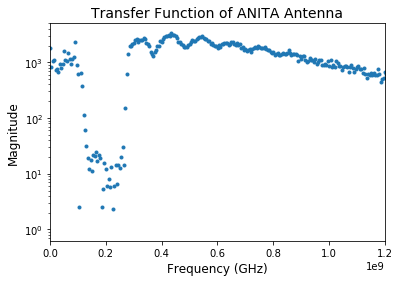

In [6]:
freq_elec=[0.0,5002405.0024,10004810.0048,15007215.0072,20009620.0096,25012025.012,30014430.0144,35016835.0168,40019240.0192,45021645.0216,50024050.024,55026455.0264,60028860.0288,65031265.0312,70033670.0336,75036075.036,80038480.0384,85040885.0407,90043290.0431,95045695.0455,100048100.048,105050505.05,110052910.053,115055315.055,120057720.058,125060125.06,130062530.062,135064935.065,140067340.067,145069745.07,150072150.072,155074555.074,160076960.077,165079365.079,170081770.081,175084175.084,180086580.086,185088985.089,190091390.091,195093795.093,200096200.096,205098605.098,210101010.101,215103415.103,220105820.105,225108225.108,230110630.11,235113035.113,240115440.115,245117845.117,250120250.12,255122655.122,260125060.125,265127465.127,270129870.129,275132275.132,280134680.134,285137085.137,290139490.139,295141895.141,300144300.144,305146705.146,310149110.149,315151515.151,320153920.153,325156325.156,330158730.158,335161135.161,340163540.163,345165945.165,350168350.168,355170755.17,360173160.173,365175565.175,370177970.177,375180375.18,380182780.182,385185185.185,390187590.187,395189995.189,400192400.192,405194805.194,410197210.197,415199615.199,420202020.201,425204425.204,430206830.206,435209235.209,440211640.211,445214045.213,450216450.216,455218855.218,460221260.221,465223665.223,470226070.225,475228475.228,480230880.23,485233285.233,490235690.235,495238095.237,500240500.24,505242905.242,510245310.244,515247715.247,520250120.249,525252525.252,530254930.254,535257335.256,540259740.259,545262145.261,550264550.264,555266955.266,560269360.268,565271765.271,570274170.273,575276575.276,580278980.278,585281385.28,590283790.283,595286195.285,600288600.288,605291005.29,610293410.292,615295815.295,620298220.297,625300625.3,630303030.302,635305435.304,640307840.307,645310245.309,650312650.312,655315055.314,660317460.316,665319865.319,670322270.321,675324675.324,680327080.326,685329485.328,690331890.331,695334295.333,700336700.336,705339105.338,710341510.34,715343915.343,720346320.345,725348725.348,730351130.35,735353535.352,740355940.355,745358345.357,750360750.36,755363155.362,760365560.364,765367965.367,770370370.369,775372775.372,780375180.374,785377585.376,790379990.379,795382395.381,800384800.384,805387205.386,810389610.388,815392015.391,820394420.393,825396825.396,830399230.398,835401635.4,840404040.403,845406445.405,850408850.407,855411255.41,860413660.412,865416065.415,870418470.417,875420875.419,880423280.422,885425685.424,890428090.427,895430495.429,900432900.431,905435305.434,910437710.436,915440115.439,920442520.441,925444925.443,930447330.446,935449735.448,940452140.451,945454545.453,950456950.455,955459355.458,960461760.46,965464165.463,970466570.465,975468975.467,980471380.47,985473785.472,990476190.475,995478595.477,1000481000.48,1005483405.48,1010485810.48,1015488215.49,1020490620.49,1025493025.49,1030495430.49,1035497835.5,1040500240.5,1045502645.5,1050505050.5,1055507455.51,1060509860.51,1065512265.51,1070514670.51,1075517075.52,1080519480.52,1085521885.52,1090524290.52,1095526695.52,1100529100.53,1105531505.53,1110533910.53,1115536315.53,1120538720.54,1125541125.54,1130543530.54,1135545935.54,1140548340.55,1145550745.55,1150553150.55,1155555555.55,1160557960.56,1165560365.56,1170562770.56,1175565175.56,1180567580.57,1185569985.57,1190572390.57,1195574795.57,1200577200.58,1205579605.58,1210582010.58,1215584415.58,1220586820.58,1225589225.59,1230591630.59,1235594035.59,1240596440.59,1245598845.6,1250601250.6,1255603655.6,1260606060.6,1265608465.61,1270610870.61,1275613275.61,1280615680.61,1285618085.62,1290620490.62,1295622895.62,1300625300.62,1305627705.63,1310630110.63,1315632515.63,1320634920.63,1325637325.64,1330639730.64,1335642135.64,1340644540.64,1345646945.64,1350649350.65,1355651755.65,1360654160.65,1365656565.65,1370658970.66,1375661375.66,1380663780.66,1385666185.66,1390668590.67,1395670995.67,1400673400.67,1405675805.67,1410678210.68,1415680615.68,1420683020.68,1425685425.68,1430687830.69,1435690235.69,1440692640.69,1445695045.69,1450697450.7,1455699855.7,1460702260.7,1465704665.7,1470707070.7,1475709475.71,1480711880.71,1485714285.71,1490716690.71,1495719095.72,1500721500.72,1505723905.72,1510726310.72,1515728715.73,1520731120.73,1525733525.73,1530735930.73,1535738335.74,1540740740.74,1545743145.74,1550745550.74,1555747955.75,1560750360.75,1565752765.75,1570755170.75,1575757575.76,1580759980.76,1585762385.76,1590764790.76,1595767195.76,1600769600.77,1605772005.77,1610774410.77,1615776815.77,1620779220.78,1625781625.78,1630784030.78,1635786435.78,1640788840.79,1645791245.79,1650793650.79,1655796055.79,1660798460.8,1665800865.8,1670803270.8,1675805675.8,1680808080.81,1685810485.81,1690812890.81,1695815295.81,1700817700.81,1705820105.82,1710822510.82,1715824915.82,1720827320.82,1725829725.83,1730832130.83,1735834535.83,1740836940.83,1745839345.84,1750841750.84,1755844155.84,1760846560.84,1765848965.85,1770851370.85,1775853775.85,1780856180.85,1785858585.86,1790860990.86,1795863395.86,1800865800.86,1805868205.87,1810870610.87,1815873015.87,1820875420.87,1825877825.87,1830880230.88,1835882635.88,1840885040.88,1845887445.88,1850889850.89,1855892255.89,1860894660.89,1865897065.89,1870899470.9,1875901875.9,1880904280.9,1885906685.9,1890909090.91,1895911495.91,1900913900.91,1905916305.91,1910918710.92,1915921115.92,1920923520.92,1925925925.92,1930928330.93,1935930735.93,1940933140.93,1945935545.93,1950937950.93,1955940355.94,1960942760.94,1965945165.94,1970947570.94,1975949975.95,1980952380.95,1985954785.95,1990957190.95,1995959595.96,2000962000.96,2005964405.96,2010966810.96,2015969215.97,2020971620.97,2025974025.97,2030976430.97,2035978835.98,2040981240.98,2045983645.98,2050986050.98,2055988455.99,2060990860.99,2065993265.99,2070995670.99,2075998075.99,2081000481.0,2086002886.0,2091005291.0,2096007696.0,2101010101.01,2106012506.01,2111014911.01,2116017316.01,2121019721.02,2126022126.02,2131024531.02,2136026936.02,2141029341.03,2146031746.03,2151034151.03,2156036556.03,2161038961.04,2166041366.04,2171043771.04,2176046176.04,2181048581.05,2186050986.05,2191053391.05,2196055796.05,2201058201.05,2206060606.06,2211063011.06,2216065416.06,2221067821.06,2226070226.07,2231072631.07,2236075036.07,2241077441.07,2246079846.08,2251082251.08,2256084656.08,2261087061.08,2266089466.09,2271091871.09,2276094276.09,2281096681.09,2286099086.1,2291101491.1,2296103896.1,2301106301.1,2306108706.11,2311111111.11,2316113516.11,2321115921.11,2326118326.11,2331120731.12,2336123136.12,2341125541.12,2346127946.12,2351130351.13,2356132756.13,2361135161.13,2366137566.13,2371139971.14,2376142376.14,2381144781.14,2386147186.14,2391149591.15,2396151996.15,2401154401.15,2406156806.15,2411159211.16,2416161616.16,2421164021.16,2426166426.16,2431168831.16,2436171236.17,2441173641.17,2446176046.17,2451178451.17,2456180856.18,2461183261.18,2466185666.18,2471188071.18,2476190476.19,2481192881.19,2486195286.19,2491197691.19,2496200096.2,2501202501.2,2506204906.2,2511207311.2,2516209716.21,2521212121.21,2526214526.21,2531216931.21,2536219336.22,2541221741.22,2546224146.22,2551226551.22,2556228956.22,2561231361.23,2566233766.23,2571236171.23,2576238576.23,2581240981.24,2586243386.24,2591245791.24,2596248196.24,2601250601.25,2606253006.25,2611255411.25,2616257816.25,2621260221.26,2626262626.26,2631265031.26,2636267436.26,2641269841.27,2646272246.27,2651274651.27,2656277056.27,2661279461.28,2666281866.28,2671284271.28,2676286676.28,2681289081.28,2686291486.29,2691293891.29,2696296296.29,2701298701.29,2706301106.3,2711303511.3,2716305916.3,2721308321.3,2726310726.31,2731313131.31,2736315536.31,2741317941.31,2746320346.32,2751322751.32,2756325156.32,2761327561.32,2766329966.33,2771332371.33,2776334776.33,2781337181.33,2786339586.34,2791341991.34,2796344396.34,2801346801.34,2806349206.34,2811351611.35,2816354016.35,2821356421.35,2826358826.35,2831361231.36,2836363636.36,2841366041.36,2846368446.36,2851370851.37,2856373256.37,2861375661.37,2866378066.37,2871380471.38,2876382876.38,2881385281.38,2886387686.38,2891390091.39,2896392496.39,2901394901.39,2906397306.39,2911399711.4,2916402116.4,2921404521.4,2926406926.4,2931409331.4,2936411736.41,2941414141.41,2946416546.41,2951418951.41,2956421356.42,2961423761.42,2966426166.42,2971428571.42,2976430976.43,2981433381.43,2986435786.43,2991438191.43,2996440596.44,3001443001.44,3006445406.44,3011447811.44,3016450216.45,3021452621.45,3026455026.45,3031457431.45,3036459836.45,3041462241.46,3046464646.46,3051467051.46,3056469456.46,3061471861.47,3066474266.47,3071476671.47,3076479076.47,3081481481.48,3086483886.48,3091486291.48,3096488696.48,3101491101.49,3106493506.49,3111495911.49,3116498316.49,3121500721.5,3126503126.5,3131505531.5,3136507936.5,3141510341.51,3146512746.51,3151515151.51,3156517556.51,3161519961.51,3166522366.52,3171524771.52,3176527176.52,3181529581.52,3186531986.53,3191534391.53,3196536796.53,3201539201.53,3206541606.54,3211544011.54,3216546416.54,3221548821.54,3226551226.55,3231553631.55,3236556036.55,3241558441.55,3246560846.56,3251563251.56,3256565656.56,3261568061.56,3266570466.57,3271572871.57,3276575276.57,3281577681.57,3286580086.57,3291582491.58,3296584896.58,3301587301.58,3306589706.58,3311592111.59,3316594516.59,3321596921.59,3326599326.59,3331601731.6,3336604136.6,3341606541.6,3346608946.6,3351611351.61,3356613756.61,3361616161.61,3366618566.61,3371620971.62,3376623376.62,3381625781.62,3386628186.62,3391630591.63,3396632996.63,3401635401.63,3406637806.63,3411640211.63,3416642616.64,3421645021.64,3426647426.64,3431649831.64,3436652236.65,3441654641.65,3446657046.65,3451659451.65,3456661856.66,3461664261.66,3466666666.66,3471669071.66,3476671476.67,3481673881.67,3486676286.67,3491678691.67,3496681096.68,3501683501.68,3506685906.68,3511688311.68,3516690716.69,3521693121.69,3526695526.69,3531697931.69,3536700336.69,3541702741.7,3546705146.7,3551707551.7,3556709956.7,3561712361.71,3566714766.71,3571717171.71,3576719576.71,3581721981.72,3586724386.72,3591726791.72,3596729196.72,3601731601.73,3606734006.73,3611736411.73,3616738816.73,3621741221.74,3626743626.74,3631746031.74,3636748436.74,3641750841.75,3646753246.75,3651755651.75,3656758056.75,3661760461.75,3666762866.76,3671765271.76,3676767676.76,3681770081.76,3686772486.77,3691774891.77,3696777296.77,3701779701.77,3706782106.78,3711784511.78,3716786916.78,3721789321.78,3726791726.79,3731794131.79,3736796536.79,3741798941.79,3746801346.8,3751803751.8,3756806156.8,3761808561.8,3766810966.8,3771813371.81,3776815776.81,3781818181.81,3786820586.81,3791822991.82,3796825396.82,3801827801.82,3806830206.82,3811832611.83,3816835016.83,3821837421.83,3826839826.83,3831842231.84,3836844636.84,3841847041.84,3846849446.84,3851851851.85,3856854256.85,3861856661.85,3866859066.85,3871861471.86,3876863876.86,3881866281.86,3886868686.86,3891871091.86,3896873496.87,3901875901.87,3906878306.87,3911880711.87,3916883116.88,3921885521.88,3926887926.88,3931890331.88,3936892736.89,3941895141.89,3946897546.89,3951899951.89,3956902356.9,3961904761.9,3966907166.9,3971909571.9,3976911976.91,3981914381.91,3986916786.91,3991919191.91,3996921596.92,4001924001.92,4006926406.92,4011928811.92,4016931216.92,4021933621.93,4026936026.93,4031938431.93,4036940836.93,4041943241.94,4046945646.94,4051948051.94,4056950456.94,4061952861.95,4066955266.95,4071957671.95,4076960076.95,4081962481.96,4086964886.96,4091967291.96,4096969696.96,4101972101.97,4106974506.97,4111976911.97,4116979316.97,4121981721.98,4126984126.98,4131986531.98,4136988936.98,4141991341.98,4146993746.99,4151996151.99,4156998556.99,4162000961.99,4167003367.0,4172005772.0,4177008177.0,4182010582.0,4187012987.01,4192015392.01,4197017797.01,4202020202.01,4207022607.02,4212025012.02,4217027417.02,4222029822.02,4227032227.03,4232034632.03,4237037037.03,4242039442.03,4247041847.04,4252044252.04,4257046657.04,4262049062.04,4267051467.04,4272053872.05,4277056277.05,4282058682.05,4287061087.05,4292063492.06,4297065897.06,4302068302.06,4307070707.06,4312073112.07,4317075517.07,4322077922.07,4327080327.07,4332082732.08,4337085137.08,4342087542.08,4347089947.08,4352092352.09,4357094757.09,4362097162.09,4367099567.09,4372101972.09,4377104377.1,4382106782.1,4387109187.1,4392111592.1,4397113997.11,4402116402.11,4407118807.11,4412121212.11,4417123617.12,4422126022.12,4427128427.12,4432130832.12,4437133237.13,4442135642.13,4447138047.13,4452140452.13,4457142857.14,4462145262.14,4467147667.14,4472150072.14,4477152477.15,4482154882.15,4487157287.15,4492159692.15,4497162097.15,4502164502.16,4507166907.16,4512169312.16,4517171717.16,4522174122.17,4527176527.17,4532178932.17,4537181337.17,4542183742.18,4547186147.18,4552188552.18,4557190957.18,4562193362.19,4567195767.19,4572198172.19,4577200577.19,4582202982.2,4587205387.2,4592207792.2,4597210197.2,4602212602.21,4607215007.21,4612217412.21,4617219817.21,4622222222.21,4627224627.22,4632227032.22,4637229437.22,4642231842.22,4647234247.23,4652236652.23,4657239057.23,4662241462.23,4667243867.24,4672246272.24,4677248677.24,4682251082.24,4687253487.25,4692255892.25,4697258297.25,4702260702.25,4707263107.26,4712265512.26,4717267917.26,4722270322.26,4727272727.27,4732275132.27,4737277537.27,4742279942.27,4747282347.27,4752284752.28,4757287157.28,4762289562.28,4767291967.28,4772294372.29,4777296777.29,4782299182.29,4787301587.29,4792303992.3,4797306397.3,4802308802.3,4807311207.3,4812313612.31,4817316017.31,4822318422.31,4827320827.31,4832323232.32,4837325637.32,4842328042.32,4847330447.32,4852332852.33,4857335257.33,4862337662.33,4867340067.33,4872342472.33,4877344877.34,4882347282.34,4887349687.34,4892352092.34,4897354497.35,4902356902.35,4907359307.35,4912361712.35,4917364117.36,4922366522.36,4927368927.36,4932371332.36,4937373737.37,4942376142.37,4947378547.37,4952380952.37,4957383357.38,4962385762.38,4967388167.38,4972390572.38,4977392977.39,4982395382.39,4987397787.39,4992400192.39,4997402597.39,5002405002.4,5007407407.4,5012409812.4,5017412217.4,5022414622.41,5027417027.41,5032419432.41,5037421837.41,5042424242.42,5047426647.42,5052429052.42,5057431457.42,5062433862.43,5067436267.43,5072438672.43,5077441077.43,5082443482.44,5087445887.44,5092448292.44,5097450697.44,5102453102.44,5107455507.45,5112457912.45,5117460317.45,5122462722.45,5127465127.46,5132467532.46,5137469937.46,5142472342.46,5147474747.47,5152477152.47,5157479557.47,5162481962.47,5167484367.48,5172486772.48,5177489177.48,5182491582.48,5187493987.49,5192496392.49,5197498797.49,5202501202.49,5207503607.5,5212506012.5,5217508417.5,5222510822.5,5227513227.5,5232515632.51,5237518037.51,5242520442.51,5247522847.51,5252525252.52,5257527657.52,5262530062.52,5267532467.52,5272534872.53,5277537277.53,5282539682.53,5287542087.53,5292544492.54,5297546897.54,5302549302.54,5307551707.54,5312554112.55,5317556517.55,5322558922.55,5327561327.55,5332563732.56,5337566137.56,5342568542.56,5347570947.56,5352573352.56,5357575757.57,5362578162.57,5367580567.57,5372582972.57,5377585377.58,5382587782.58,5387590187.58,5392592592.58,5397594997.59,5402597402.59,5407599807.59,5412602212.59,5417604617.6,5422607022.6,5427609427.6,5432611832.6,5437614237.61,5442616642.61,5447619047.61,5452621452.61,5457623857.62,5462626262.62,5467628667.62,5472631072.62,5477633477.62,5482635882.63,5487638287.63,5492640692.63,5497643097.63,5502645502.64,5507647907.64,5512650312.64,5517652717.64,5522655122.65,5527657527.65,5532659932.65,5537662337.65,5542664742.66,5547667147.66,5552669552.66,5557671957.66,5562674362.67,5567676767.67,5572679172.67,5577681577.67,5582683982.68,5587686387.68,5592688792.68,5597691197.68,5602693602.68,5607696007.69,5612698412.69,5617700817.69,5622703222.69,5627705627.7,5632708032.7,5637710437.7,5642712842.7,5647715247.71,5652717652.71,5657720057.71,5662722462.71,5667724867.72,5672727272.72,5677729677.72,5682732082.72,5687734487.73,5692736892.73,5697739297.73,5702741702.73,5707744107.73,5712746512.74,5717748917.74,5722751322.74,5727753727.74,5732756132.75,5737758537.75,5742760942.75,5747763347.75,5752765752.76,5757768157.76,5762770562.76,5767772967.76,5772775372.77,5777777777.77,5782780182.77,5787782587.77,5792784992.78,5797787397.78,5802789802.78,5807792207.78,5812794612.79,5817797017.79,5822799422.79,5827801827.79,5832804232.79,5837806637.8,5842809042.8,5847811447.8,5852813852.8,5857816257.81,5862818662.81,5867821067.81,5872823472.81,5877825877.82,5882828282.82,5887830687.82,5892833092.82,5897835497.83,5902837902.83,5907840307.83,5912842712.83,5917845117.84,5922847522.84,5927849927.84,5932852332.84,5937854737.85,5942857142.85,5947859547.85,5952861952.85,5957864357.85,5962866762.86,5967869167.86,5972871572.86,5977873977.86,5982876382.87,5987878787.87,5992881192.87,5997883597.87,6002886002.88,6007888407.88,6012890812.88,6017893217.88,6022895622.89,6027898027.89,6032900432.89,6037902837.89,6042905242.9,6047907647.9,6052910052.9,6057912457.9,6062914862.91,6067917267.91,6072919672.91,6077922077.91,6082924482.91,6087926887.92,6092929292.92,6097931697.92,6102934102.92,6107936507.93,6112938912.93,6117941317.93,6122943722.93,6127946127.94,6132948532.94,6137950937.94,6142953342.94,6147955747.95,6152958152.95,6157960557.95,6162962962.95,6167965367.96,6172967772.96,6177970177.96,6182972582.96,6187974987.97,6192977392.97,6197979797.97,6202982202.97,6207984607.97,6212987012.98,6217989417.98,6222991822.98,6227994227.98,6232996632.99,6237999037.99,6243001442.99,6248003847.99,6253006253.0,6258008658.0,6263011063.0,6268013468.0,6273015873.01,6278018278.01,6283020683.01,6288023088.01,6293025493.02,6298027898.02,6303030303.02,6308032708.02,6313035113.03,6318037518.03,6323039923.03,6328042328.03,6333044733.03,6338047138.04,6343049543.04,6348051948.04,6353054353.04,6358056758.05,6363059163.05,6368061568.05,6373063973.05,6378066378.06,6383068783.06,6388071188.06,6393073593.06,6398075998.07,6403078403.07,6408080808.07,6413083213.07,6418085618.08,6423088023.08,6428090428.08,6433092833.08,6438095238.08,6443097643.09,6448100048.09,6453102453.09,6458104858.09,6463107263.1,6468109668.1,6473112073.1,6478114478.1,6483116883.11,6488119288.11,6493121693.11,6498124098.11,6503126503.12,6508128908.12,6513131313.12,6518133718.12,6523136123.13,6528138528.13,6533140933.13,6538143338.13,6543145743.14,6548148148.14,6553150553.14,6558152958.14,6563155363.14,6568157768.15,6573160173.15,6578162578.15,6583164983.15,6588167388.16,6593169793.16,6598172198.16,6603174603.16,6608177008.17,6613179413.17,6618181818.17,6623184223.17,6628186628.18,6633189033.18,6638191438.18,6643193843.18,6648196248.19,6653198653.19,6658201058.19,6663203463.19,6668205868.2,6673208273.2,6678210678.2,6683213083.2,6688215488.2,6693217893.21,6698220298.21,6703222703.21,6708225108.21,6713227513.22,6718229918.22,6723232323.22,6728234728.22,6733237133.23,6738239538.23,6743241943.23,6748244348.23,6753246753.24,6758249158.24,6763251563.24,6768253968.24,6773256373.25,6778258778.25,6783261183.25,6788263588.25,6793265993.26,6798268398.26,6803270803.26,6808273208.26,6813275613.26,6818278018.27,6823280423.27,6828282828.27,6833285233.27,6838287638.28,6843290043.28,6848292448.28,6853294853.28,6858297258.29,6863299663.29,6868302068.29,6873304473.29,6878306878.3,6883309283.3,6888311688.3,6893314093.3,6898316498.31,6903318903.31,6908321308.31,6913323713.31,6918326118.32,6923328523.32,6928330928.32,6933333333.32,6938335738.32,6943338143.33,6948340548.33,6953342953.33,6958345358.33,6963347763.34,6968350168.34,6973352573.34,6978354978.34,6983357383.35,6988359788.35,6993362193.35,6998364598.35,7003367003.36,7008369408.36,7013371813.36,7018374218.36,7023376623.37,7028379028.37,7033381433.37,7038383838.37,7043386243.37,7048388648.38,7053391053.38,7058393458.38,7063395863.38,7068398268.39,7073400673.39,7078403078.39,7083405483.39,7088407888.4,7093410293.4,7098412698.4,7103415103.4,7108417508.41,7113419913.41,7118422318.41,7123424723.41,7128427128.42,7133429533.42,7138431938.42,7143434343.42,7148436748.43,7153439153.43,7158441558.43,7163443963.43,7168446368.43,7173448773.44,7178451178.44,7183453583.44,7188455988.44,7193458393.45,7198460798.45,7203463203.45,7208465608.45,7213468013.46,7218470418.46,7223472823.46,7228475228.46,7233477633.47,7238480038.47,7243482443.47,7248484848.47,7253487253.48,7258489658.48,7263492063.48,7268494468.48,7273496873.49,7278499278.49,7283501683.49,7288504088.49,7293506493.49,7298508898.5,7303511303.5,7308513708.5,7313516113.5,7318518518.51,7323520923.51,7328523328.51,7333525733.51,7338528138.52,7343530543.52,7348532948.52,7353535353.52,7358537758.53,7363540163.53,7368542568.53,7373544973.53,7378547378.54,7383549783.54,7388552188.54,7393554593.54,7398556998.55,7403559403.55,7408561808.55,7413564213.55,7418566618.55,7423569023.56,7428571428.56,7433573833.56,7438576238.56,7443578643.57,7448581048.57,7453583453.57,7458585858.57,7463588263.58,7468590668.58,7473593073.58,7478595478.58,7483597883.59,7488600288.59,7493602693.59,7498605098.59,7503607503.6,7508609908.6,7513612313.6,7518614718.6,7523617123.61,7528619528.61,7533621933.61,7538624338.61,7543626743.61,7548629148.62,7553631553.62,7558633958.62,7563636363.62,7568638768.63,7573641173.63,7578643578.63,7583645983.63,7588648388.64,7593650793.64,7598653198.64,7603655603.64,7608658008.65,7613660413.65,7618662818.65,7623665223.65,7628667628.66,7633670033.66,7638672438.66,7643674843.66,7648677248.67,7653679653.67,7658682058.67,7663684463.67,7668686868.67,7673689273.68,7678691678.68,7683694083.68,7688696488.68,7693698893.69,7698701298.69,7703703703.69,7708706108.69,7713708513.7,7718710918.7,7723713323.7,7728715728.7,7733718133.71,7738720538.71,7743722943.71,7748725348.71,7753727753.72,7758730158.72,7763732563.72,7768734968.72,7773737373.72,7778739778.73,7783742183.73,7788744588.73,7793746993.73,7798749398.74,7803751803.74,7808754208.74,7813756613.74,7818759018.75,7823761423.75,7828763828.75,7833766233.75,7838768638.76,7843771043.76,7848773448.76,7853775853.76,7858778258.77,7863780663.77,7868783068.77,7873785473.77,7878787878.78,7883790283.78,7888792688.78,7893795093.78,7898797498.78,7903799903.79,7908802308.79,7913804713.79,7918807118.79,7923809523.8,7928811928.8,7933814333.8,7938816738.8,7943819143.81,7948821548.81,7953823953.81,7958826358.81,7963828763.82,7968831168.82,7973833573.82,7978835978.82,7983838383.83,7988840788.83,7993843193.83,7998845598.83,8003848003.84,8008850408.84,8013852813.84,8018855218.84,8023857623.84,8028860028.85,8033862433.85,8038864838.85,8043867243.85,8048869648.86,8053872053.86,8058874458.86,8063876863.86,8068879268.87,8073881673.87,8078884078.87,8083886483.87,8088888888.88,8093891293.88,8098893698.88,8103896103.88,8108898508.89,8113900913.89,8118903318.89,8123905723.89,8128908128.9,8133910533.9,8138912938.9,8143915343.9,8148917748.9,8153920153.91,8158922558.91,8163924963.91,8168927368.91,8173929773.92,8178932178.92,8183934583.92,8188936988.92,8193939393.93,8198941798.93,8203944203.93,8208946608.93,8213949013.94,8218951418.94,8223953823.94,8228956228.94,8233958633.95,8238961038.95,8243963443.95,8248965848.95,8253968253.96,8258970658.96,8263973063.96,8268975468.96,8273977873.96,8278980278.97,8283982683.97,8288985088.97,8293987493.97,8298989898.98,8303992303.98,8308994708.98,8313997113.98,8318999518.99,8324001923.99,8329004328.99,8334006733.99,8339009139.0,8344011544.0,8349013949.0,8354016354.0,8359018759.01,8364021164.01,8369023569.01,8374025974.01,8379028379.01,8384030784.02,8389033189.02,8394035594.02,8399037999.02,8404040404.03,8409042809.03,8414045214.03,8419047619.03,8424050024.04,8429052429.04,8434054834.04,8439057239.04,8444059644.05,8449062049.05,8454064454.05,8459066859.05,8464069264.06,8469071669.06,8474074074.06,8479076479.06,8484078884.07,8489081289.07,8494083694.07,8499086099.07,8504088504.07,8509090909.08,8514093314.08,8519095719.08,8524098124.08,8529100529.09,8534102934.09,8539105339.09,8544107744.09,8549110149.1,8554112554.1,8559114959.1,8564117364.1,8569119769.11,8574122174.11,8579124579.11,8584126984.11,8589129389.12,8594131794.12,8599134199.12,8604136604.12,8609139009.13,8614141414.13,8619143819.13,8624146224.13,8629148629.13,8634151034.14,8639153439.14,8644155844.14,8649158249.14,8654160654.15,8659163059.15,8664165464.15,8669167869.15,8674170274.16,8679172679.16,8684175084.16,8689177489.16,8694179894.17,8699182299.17,8704184704.17,8709187109.17,8714189514.18,8719191919.18,8724194324.18,8729196729.18,8734199134.19,8739201539.19,8744203944.19,8749206349.19,8754208754.19,8759211159.2,8764213564.2,8769215969.2,8774218374.2,8779220779.21,8784223184.21,8789225589.21,8794227994.21,8799230399.22,8804232804.22,8809235209.22,8814237614.22,8819240019.23,8824242424.23,8829244829.23,8834247234.23,8839249639.24,8844252044.24,8849254449.24,8854256854.24,8859259259.25,8864261664.25,8869264069.25,8874266474.25,8879268879.25,8884271284.26,8889273689.26,8894276094.26,8899278499.26,8904280904.27,8909283309.27,8914285714.27,8919288119.27,8924290524.28,8929292929.28,8934295334.28,8939297739.28,8944300144.29,8949302549.29,8954304954.29,8959307359.29,8964309764.3,8969312169.3,8974314574.3,8979316979.3,8984319384.31,8989321789.31,8994324194.31,8999326599.31,9004329004.31,9009331409.32,9014333814.32,9019336219.32,9024338624.32,9029341029.33,9034343434.33,9039345839.33,9044348244.33,9049350649.34,9054353054.34,9059355459.34,9064357864.34,9069360269.35,9074362674.35,9079365079.35,9084367484.35,9089369889.36,9094372294.36,9099374699.36,9104377104.36,9109379509.36,9114381914.37,9119384319.37,9124386724.37,9129389129.37,9134391534.38,9139393939.38,9144396344.38,9149398749.38,9154401154.39,9159403559.39,9164405964.39,9169408369.39,9174410774.4,9179413179.4,9184415584.4,9189417989.4,9194420394.41,9199422799.41,9204425204.41,9209427609.41,9214430014.42,9219432419.42,9224434824.42,9229437229.42,9234439634.42,9239442039.43,9244444444.43,9249446849.43,9254449254.43,9259451659.44,9264454064.44,9269456469.44,9274458874.44,9279461279.45,9284463684.45,9289466089.45,9294468494.45,9299470899.46,9304473304.46,9309475709.46,9314478114.46,9319480519.47,9324482924.47,9329485329.47,9334487734.47,9339490139.48,9344492544.48,9349494949.48,9354497354.48,9359499759.48,9364502164.49,9369504569.49,9374506974.49,9379509379.49,9384511784.5,9389514189.5,9394516594.5,9399518999.5,9404521404.51,9409523809.51,9414526214.51,9419528619.51,9424531024.52,9429533429.52,9434535834.52,9439538239.52,9444540644.53,9449543049.53,9454545454.53,9459547859.53,9464550264.54,9469552669.54,9474555074.54,9479557479.54,9484559884.54,9489562289.55,9494564694.55,9499567099.55,9504569504.55,9509571909.56,9514574314.56,9519576719.56,9524579124.56,9529581529.57,9534583934.57,9539586339.57,9544588744.57,9549591149.58,9554593554.58,9559595959.58,9564598364.58,9569600769.59,9574603174.59,9579605579.59,9584607984.59,9589610389.6,9594612794.6,9599615199.6,9604617604.6,9609620009.6,9614622414.61,9619624819.61,9624627224.61,9629629629.61,9634632034.62,9639634439.62,9644636844.62,9649639249.62,9654641654.63,9659644059.63,9664646464.63,9669648869.63,9674651274.64,9679653679.64,9684656084.64,9689658489.64,9694660894.65,9699663299.65,9704665704.65,9709668109.65,9714670514.65,9719672919.66,9724675324.66,9729677729.66,9734680134.66,9739682539.67,9744684944.67,9749687349.67,9754689754.67,9759692159.68,9764694564.68,9769696969.68,9774699374.68,9779701779.69,9784704184.69,9789706589.69,9794708994.69,9799711399.7,9804713804.7,9809716209.7,9814718614.7,9819721019.71,9824723424.71,9829725829.71,9834728234.71,9839730639.71,9844733044.72,9849735449.72,9854737854.72,9859740259.72,9864742664.73,9869745069.73,9874747474.73,9879749879.73,9884752284.74,9889754689.74,9894757094.74,9899759499.74,9904761904.75,9909764309.75,9914766714.75,9919769119.75,9924771524.76,9929773929.76,9934776334.76,9939778739.76,9944781144.77,9949783549.77,9954785954.77,9959788359.77,9964790764.77,9969793169.78,9974795574.78,9979797979.78,9984800384.78,9989802789.79,9994805194.79,9999807599.79,10004810004.8,10009812409.8,10014814814.8,10019817219.8,10024819624.8,10029822029.8,10034824434.8,10039826839.8,10044829244.8,10049831649.8,10054834054.8,10059836459.8,10064838864.8,10069841269.8,10074843674.8,10079846079.8,10084848484.8,10089850889.8,10094853294.8,10099855699.8,10104858104.8,10109860509.8,10114862914.8,10119865319.8,10124867724.9,10129870129.9,10134872534.9,10139874939.9,10144877344.9,10149879749.9,10154882154.9,10159884559.9,10164886964.9,10169889369.9,10174891774.9,10179894179.9,10184896584.9,10189898989.9,10194901394.9,10199903799.9,10204906204.9,10209908609.9,10214911014.9,10219913419.9,10224915824.9,10229918229.9,10234920634.9,10239923039.9,10244925444.9,10249927849.9,10254930254.9,10259932659.9,10264935064.9,10269937469.9,10274939874.9,10279942279.9,10284944684.9,10289947089.9,10294949494.9,10299951899.9,10304954304.9,10309956709.9,10314959114.9,10319961519.9,10324963924.9,10329966329.9,10334968735.0,10339971140.0,10344973545.0,10349975950.0,10354978355.0,10359980760.0,10364983165.0,10369985570.0,10374987975.0,10379990380.0,10384992785.0,10389995190.0,10394997595.0,10400000000.0,10405002405.0,10410004810.0,10415007215.0,10420009620.0,10425012025.0,10430014430.0,10435016835.0,10440019240.0,10445021645.0,10450024050.0,10455026455.0,10460028860.0,10465031265.0,10470033670.0,10475036075.0,10480038480.0,10485040885.0,10490043290.0,10495045695.0,10500048100.0,10505050505.0,10510052910.0,10515055315.0,10520057720.0,10525060125.0,10530062530.0,10535064935.0,10540067340.1,10545069745.1,10550072150.1,10555074555.1,10560076960.1,10565079365.1,10570081770.1,10575084175.1,10580086580.1,10585088985.1,10590091390.1,10595093795.1,10600096200.1,10605098605.1,10610101010.1,10615103415.1,10620105820.1,10625108225.1,10630110630.1,10635113035.1,10640115440.1,10645117845.1,10650120250.1,10655122655.1,10660125060.1,10665127465.1,10670129870.1,10675132275.1,10680134680.1,10685137085.1,10690139490.1,10695141895.1,10700144300.1,10705146705.1,10710149110.1,10715151515.1,10720153920.1,10725156325.1,10730158730.1,10735161135.1,10740163540.1,10745165945.1,10750168350.2,10755170755.2,10760173160.2,10765175565.2,10770177970.2,10775180375.2,10780182780.2,10785185185.2,10790187590.2,10795189995.2,10800192400.2,10805194805.2,10810197210.2,10815199615.2,10820202020.2,10825204425.2,10830206830.2,10835209235.2,10840211640.2,10845214045.2,10850216450.2,10855218855.2,10860221260.2,10865223665.2,10870226070.2,10875228475.2,10880230880.2,10885233285.2,10890235690.2,10895238095.2,10900240500.2,10905242905.2,10910245310.2,10915247715.2,10920250120.2,10925252525.2,10930254930.2,10935257335.2,10940259740.2,10945262145.2,10950264550.2,10955266955.2,10960269360.3,10965271765.3,10970274170.3,10975276575.3,10980278980.3,10985281385.3,10990283790.3,10995286195.3,11000288600.3,11005291005.3,11010293410.3,11015295815.3,11020298220.3,11025300625.3,11030303030.3,11035305435.3,11040307840.3,11045310245.3,11050312650.3,11055315055.3,11060317460.3,11065319865.3,11070322270.3,11075324675.3,11080327080.3,11085329485.3,11090331890.3,11095334295.3,11100336700.3,11105339105.3,11110341510.3,11115343915.3,11120346320.3,11125348725.3,11130351130.3,11135353535.3,11140355940.3,11145358345.3,11150360750.3,11155363155.3,11160365560.3,11165367965.4,11170370370.4,11175372775.4,11180375180.4,11185377585.4,11190379990.4,11195382395.4,11200384800.4,11205387205.4,11210389610.4,11215392015.4,11220394420.4,11225396825.4,11230399230.4,11235401635.4,11240404040.4,11245406445.4,11250408850.4,11255411255.4,11260413660.4,11265416065.4,11270418470.4,11275420875.4,11280423280.4,11285425685.4,11290428090.4,11295430495.4,11300432900.4,11305435305.4,11310437710.4,11315440115.4,11320442520.4,11325444925.4,11330447330.4,11335449735.4,11340452140.4,11345454545.4,11350456950.4,11355459355.4,11360461760.4,11365464165.4,11370466570.4,11375468975.5,11380471380.5,11385473785.5,11390476190.5,11395478595.5,11400481000.5,11405483405.5,11410485810.5,11415488215.5,11420490620.5,11425493025.5,11430495430.5,11435497835.5,11440500240.5,11445502645.5,11450505050.5,11455507455.5,11460509860.5,11465512265.5,11470514670.5,11475517075.5,11480519480.5,11485521885.5,11490524290.5,11495526695.5,11500529100.5,11505531505.5,11510533910.5,11515536315.5,11520538720.5,11525541125.5,11530543530.5,11535545935.5,11540548340.5,11545550745.5,11550553150.5,11555555555.5,11560557960.5,11565560365.5,11570562770.5,11575565175.5,11580567580.5,11585569985.6,11590572390.6,11595574795.6,11600577200.6,11605579605.6,11610582010.6,11615584415.6,11620586820.6,11625589225.6,11630591630.6,11635594035.6,11640596440.6,11645598845.6,11650601250.6,11655603655.6,11660606060.6,11665608465.6,11670610870.6,11675613275.6,11680615680.6,11685618085.6,11690620490.6,11695622895.6,11700625300.6,11705627705.6,11710630110.6,11715632515.6,11720634920.6,11725637325.6,11730639730.6,11735642135.6,11740644540.6,11745646945.6,11750649350.6,11755651755.6,11760654160.6,11765656565.6,11770658970.6,11775661375.6,11780663780.6,11785666185.6,11790668590.6,11795670995.7,11800673400.7,11805675805.7,11810678210.7,11815680615.7,11820683020.7,11825685425.7,11830687830.7,11835690235.7,11840692640.7,11845695045.7,11850697450.7,11855699855.7,11860702260.7,11865704665.7,11870707070.7,11875709475.7,11880711880.7,11885714285.7,11890716690.7,11895719095.7,11900721500.7,11905723905.7,11910726310.7,11915728715.7,11920731120.7,11925733525.7,11930735930.7,11935738335.7,11940740740.7,11945743145.7,11950745550.7,11955747955.7,11960750360.7,11965752765.7,11970755170.7,11975757575.7,11980759980.7,11985762385.7,11990764790.7,11995767195.7,12000769600.8,12005772005.8,12010774410.8,12015776815.8,12020779220.8,12025781625.8,12030784030.8,12035786435.8,12040788840.8,12045791245.8,12050793650.8,12055796055.8,12060798460.8,12065800865.8,12070803270.8,12075805675.8,12080808080.8,12085810485.8,12090812890.8,12095815295.8,12100817700.8,12105820105.8,12110822510.8,12115824915.8,12120827320.8,12125829725.8,12130832130.8,12135834535.8,12140836940.8,12145839345.8,12150841750.8,12155844155.8,12160846560.8,12165848965.8,12170851370.8,12175853775.8,12180856180.8,12185858585.8,12190860990.8,12195863395.8,12200865800.8,12205868205.8,12210870610.9,12215873015.9,12220875420.9,12225877825.9,12230880230.9,12235882635.9,12240885040.9,12245887445.9,12250889850.9,12255892255.9,12260894660.9,12265897065.9,12270899470.9,12275901875.9,12280904280.9,12285906685.9,12290909090.9,12295911495.9,12300913900.9,12305916305.9,12310918710.9,12315921115.9,12320923520.9,12325925925.9,12330928330.9,12335930735.9,12340933140.9,12345935545.9,12350937950.9,12355940355.9,12360942760.9,12365945165.9,12370947570.9,12375949975.9,12380952380.9,12385954785.9,12390957190.9,12395959595.9,12400962000.9,12405964405.9,12410966810.9,12415969215.9,12420971621.0,12425974026.0,12430976431.0,12435978836.0,12440981241.0,12445983646.0,12450986051.0,12455988456.0,12460990861.0,12465993266.0,12470995671.0,12475998076.0,12481000481.0,12486002886.0,12491005291.0,12496007696.0,12501010101.0,12506012506.0,12511014911.0,12516017316.0,12521019721.0,12526022126.0,12531024531.0,12536026936.0,12541029341.0,12546031746.0,12551034151.0,12556036556.0,12561038961.0,12566041366.0,12571043771.0,12576046176.0,12581048581.0,12586050986.0,12591053391.0,12596055796.0,12601058201.0,12606060606.0,12611063011.0,12616065416.0,12621067821.0,12626070226.1,12631072631.1,12636075036.1,12641077441.1,12646079846.1,12651082251.1,12656084656.1,12661087061.1,12666089466.1,12671091871.1,12676094276.1,12681096681.1,12686099086.1,12691101491.1,12696103896.1,12701106301.1,12706108706.1,12711111111.1,12716113516.1,12721115921.1,12726118326.1,12731120731.1,12736123136.1,12741125541.1,12746127946.1,12751130351.1,12756132756.1,12761135161.1,12766137566.1,12771139971.1,12776142376.1,12781144781.1,12786147186.1,12791149591.1,12796151996.1,12801154401.1,12806156806.1,12811159211.1,12816161616.1,12821164021.1,12826166426.1,12831168831.1,12836171236.2,12841173641.2,12846176046.2,12851178451.2,12856180856.2,12861183261.2,12866185666.2,12871188071.2,12876190476.2,12881192881.2,12886195286.2,12891197691.2,12896200096.2,12901202501.2,12906204906.2,12911207311.2,12916209716.2,12921212121.2,12926214526.2,12931216931.2,12936219336.2,12941221741.2,12946224146.2,12951226551.2,12956228956.2,12961231361.2,12966233766.2,12971236171.2,12976238576.2,12981240981.2,12986243386.2,12991245791.2,12996248196.2,13001250601.2,13006253006.2,13011255411.2,13016257816.2,13021260221.2,13026262626.2,13031265031.2,13036267436.2,13041269841.2,13046272246.3,13051274651.3,13056277056.3,13061279461.3,13066281866.3,13071284271.3,13076286676.3,13081289081.3,13086291486.3,13091293891.3,13096296296.3,13101298701.3,13106301106.3,13111303511.3,13116305916.3,13121308321.3,13126310726.3,13131313131.3,13136315536.3,13141317941.3,13146320346.3,13151322751.3,13156325156.3,13161327561.3,13166329966.3,13171332371.3,13176334776.3,13181337181.3,13186339586.3,13191341991.3,13196344396.3,13201346801.3,13206349206.3,13211351611.3,13216354016.3,13221356421.3,13226358826.3,13231361231.3,13236363636.3,13241366041.3,13246368446.3,13251370851.3,13256373256.4,13261375661.4,13266378066.4,13271380471.4,13276382876.4,13281385281.4,13286387686.4,13291390091.4,13296392496.4,13301394901.4,13306397306.4,13311399711.4,13316402116.4,13321404521.4,13326406926.4,13331409331.4,13336411736.4,13341414141.4,13346416546.4,13351418951.4,13356421356.4,13361423761.4,13366426166.4,13371428571.4,13376430976.4,13381433381.4,13386435786.4,13391438191.4,13396440596.4,13401443001.4,13406445406.4,13411447811.4,13416450216.4,13421452621.4,13426455026.4,13431457431.4,13436459836.4,13441462241.4,13446464646.4,13451467051.4,13456469456.4,13461471861.5,13466474266.5,13471476671.5,13476479076.5,13481481481.5,13486483886.5,13491486291.5,13496488696.5,13501491101.5,13506493506.5,13511495911.5,13516498316.5,13521500721.5,13526503126.5,13531505531.5,13536507936.5,13541510341.5,13546512746.5,13551515151.5,13556517556.5,13561519961.5,13566522366.5,13571524771.5,13576527176.5,13581529581.5,13586531986.5,13591534391.5,13596536796.5,13601539201.5,13606541606.5,13611544011.5,13616546416.5,13621548821.5,13626551226.5,13631553631.5,13636556036.5,13641558441.5,13646560846.5,13651563251.5,13656565656.5,13661568061.5,13666570466.5,13671572871.6,13676575276.6,13681577681.6,13686580086.6,13691582491.6,13696584896.6,13701587301.6,13706589706.6,13711592111.6,13716594516.6,13721596921.6,13726599326.6,13731601731.6,13736604136.6,13741606541.6,13746608946.6,13751611351.6,13756613756.6,13761616161.6,13766618566.6,13771620971.6,13776623376.6,13781625781.6,13786628186.6,13791630591.6,13796632996.6,13801635401.6,13806637806.6,13811640211.6,13816642616.6,13821645021.6,13826647426.6,13831649831.6,13836652236.6,13841654641.6,13846657046.6,13851659451.6,13856661856.6,13861664261.6,13866666666.6,13871669071.6,13876671476.6,13881673881.7,13886676286.7,13891678691.7,13896681096.7,13901683501.7,13906685906.7,13911688311.7,13916690716.7,13921693121.7,13926695526.7,13931697931.7,13936700336.7,13941702741.7,13946705146.7,13951707551.7,13956709956.7,13961712361.7,13966714766.7,13971717171.7,13976719576.7,13981721981.7,13986724386.7,13991726791.7,13996729196.7,14001731601.7,14006734006.7,14011736411.7,14016738816.7,14021741221.7,14026743626.7,14031746031.7,14036748436.7,14041750841.7,14046753246.7,14051755651.7,14056758056.7,14061760461.7,14066762866.7,14071765271.7,14076767676.7,14081770081.7,14086772486.7,14091774891.8,14096777296.8,14101779701.8,14106782106.8,14111784511.8,14116786916.8,14121789321.8,14126791726.8,14131794131.8,14136796536.8,14141798941.8,14146801346.8,14151803751.8,14156806156.8,14161808561.8,14166810966.8,14171813371.8,14176815776.8,14181818181.8,14186820586.8,14191822991.8,14196825396.8,14201827801.8,14206830206.8,14211832611.8,14216835016.8,14221837421.8,14226839826.8,14231842231.8,14236844636.8,14241847041.8,14246849446.8,14251851851.8,14256854256.8,14261856661.8,14266859066.8,14271861471.8,14276863876.8,14281866281.8,14286868686.8,14291871091.8,14296873496.9,14301875901.9,14306878306.9,14311880711.9,14316883116.9,14321885521.9,14326887926.9,14331890331.9,14336892736.9,14341895141.9,14346897546.9,14351899951.9,14356902356.9,14361904761.9,14366907166.9,14371909571.9,14376911976.9,14381914381.9,14386916786.9,14391919191.9,14396921596.9,14401924001.9,14406926406.9,14411928811.9,14416931216.9,14421933621.9,14426936026.9,14431938431.9,14436940836.9,14441943241.9,14446945646.9,14451948051.9,14456950456.9,14461952861.9,14466955266.9,14471957671.9,14476960076.9,14481962481.9,14486964886.9,14491967291.9,14496969696.9,14501972101.9,14506974507.0,14511976912.0,14516979317.0,14521981722.0,14526984127.0,14531986532.0,14536988937.0,14541991342.0,14546993747.0,14551996152.0,14556998557.0,14562000962.0,14567003367.0,14572005772.0,14577008177.0,14582010582.0,14587012987.0,14592015392.0,14597017797.0,14602020202.0,14607022607.0,14612025012.0,14617027417.0,14622029822.0,14627032227.0,14632034632.0,14637037037.0,14642039442.0,14647041847.0,14652044252.0,14657046657.0,14662049062.0,14667051467.0,14672053872.0,14677056277.0,14682058682.0,14687061087.0,14692063492.0,14697065897.0,14702068302.0,14707070707.0,14712073112.0,14717075517.1,14722077922.1,14727080327.1,14732082732.1,14737085137.1,14742087542.1,14747089947.1,14752092352.1,14757094757.1,14762097162.1,14767099567.1,14772101972.1,14777104377.1,14782106782.1,14787109187.1,14792111592.1,14797113997.1,14802116402.1,14807118807.1,14812121212.1,14817123617.1,14822126022.1,14827128427.1,14832130832.1,14837133237.1,14842135642.1,14847138047.1,14852140452.1,14857142857.1,14862145262.1,14867147667.1,14872150072.1,14877152477.1,14882154882.1,14887157287.1,14892159692.1,14897162097.1,14902164502.1,14907166907.1,14912169312.1,14917171717.1,14922174122.2,14927176527.2,14932178932.2,14937181337.2,14942183742.2,14947186147.2,14952188552.2,14957190957.2,14962193362.2,14967195767.2,14972198172.2,14977200577.2,14982202982.2,14987205387.2,14992207792.2,14997210197.2,15002212602.2,15007215007.2,15012217412.2,15017219817.2,15022222222.2,15027224627.2,15032227032.2,15037229437.2,15042231842.2,15047234247.2,15052236652.2,15057239057.2,15062241462.2,15067243867.2,15072246272.2,15077248677.2,15082251082.2,15087253487.2,15092255892.2,15097258297.2,15102260702.2,15107263107.2,15112265512.2,15117267917.2,15122270322.2,15127272727.2,15132275132.3,15137277537.3,15142279942.3,15147282347.3,15152284752.3,15157287157.3,15162289562.3,15167291967.3,15172294372.3,15177296777.3,15182299182.3,15187301587.3,15192303992.3,15197306397.3,15202308802.3,15207311207.3,15212313612.3,15217316017.3,15222318422.3,15227320827.3,15232323232.3,15237325637.3,15242328042.3,15247330447.3,15252332852.3,15257335257.3,15262337662.3,15267340067.3,15272342472.3,15277344877.3,15282347282.3,15287349687.3,15292352092.3,15297354497.3,15302356902.3,15307359307.3,15312361712.3,15317364117.3,15322366522.3,15327368927.3,15332371332.3,15337373737.3,15342376142.4,15347378547.4,15352380952.4,15357383357.4,15362385762.4,15367388167.4,15372390572.4,15377392977.4,15382395382.4,15387397787.4,15392400192.4,15397402597.4,15402405002.4,15407407407.4,15412409812.4,15417412217.4,15422414622.4,15427417027.4,15432419432.4,15437421837.4,15442424242.4,15447426647.4,15452429052.4,15457431457.4,15462433862.4,15467436267.4,15472438672.4,15477441077.4,15482443482.4,15487445887.4,15492448292.4,15497450697.4,15502453102.4,15507455507.4,15512457912.4,15517460317.4,15522462722.4,15527465127.4,15532467532.4,15537469937.4,15542472342.4,15547474747.4,15552477152.5,15557479557.5,15562481962.5,15567484367.5,15572486772.5,15577489177.5,15582491582.5,15587493987.5,15592496392.5,15597498797.5,15602501202.5,15607503607.5,15612506012.5,15617508417.5,15622510822.5,15627513227.5,15632515632.5,15637518037.5,15642520442.5,15647522847.5,15652525252.5,15657527657.5,15662530062.5,15667532467.5,15672534872.5,15677537277.5,15682539682.5,15687542087.5,15692544492.5,15697546897.5,15702549302.5,15707551707.5,15712554112.5,15717556517.5,15722558922.5,15727561327.5,15732563732.5,15737566137.5,15742568542.5,15747570947.5,15752573352.5,15757575757.6,15762578162.6,15767580567.6,15772582972.6,15777585377.6,15782587782.6,15787590187.6,15792592592.6,15797594997.6,15802597402.6,15807599807.6,15812602212.6,15817604617.6,15822607022.6,15827609427.6,15832611832.6,15837614237.6,15842616642.6,15847619047.6,15852621452.6,15857623857.6,15862626262.6,15867628667.6,15872631072.6,15877633477.6,15882635882.6,15887638287.6,15892640692.6,15897643097.6,15902645502.6,15907647907.6,15912650312.6,15917652717.6,15922655122.6,15927657527.6,15932659932.6,15937662337.6,15942664742.6,15947667147.6,15952669552.6,15957671957.6,15962674362.6,15967676767.7,15972679172.7,15977681577.7,15982683982.7,15987686387.7,15992688792.7,15997691197.7,16002693602.7,16007696007.7,16012698412.7,16017700817.7,16022703222.7,16027705627.7,16032708032.7,16037710437.7,16042712842.7,16047715247.7,16052717652.7,16057720057.7,16062722462.7,16067724867.7,16072727272.7,16077729677.7,16082732082.7,16087734487.7,16092736892.7,16097739297.7,16102741702.7,16107744107.7,16112746512.7,16117748917.7,16122751322.7,16127753727.7,16132756132.7,16137758537.7,16142760942.7,16147763347.7,16152765752.7,16157768157.7,16162770562.7,16167772967.7,16172775372.7,16177777777.8,16182780182.8,16187782587.8,16192784992.8,16197787397.8,16202789802.8,16207792207.8,16212794612.8,16217797017.8,16222799422.8,16227801827.8,16232804232.8,16237806637.8,16242809042.8,16247811447.8,16252813852.8,16257816257.8,16262818662.8,16267821067.8,16272823472.8,16277825877.8,16282828282.8,16287830687.8,16292833092.8,16297835497.8,16302837902.8,16307840307.8,16312842712.8,16317845117.8,16322847522.8,16327849927.8,16332852332.8,16337854737.8,16342857142.8,16347859547.8,16352861952.8,16357864357.8,16362866762.8,16367869167.8,16372871572.8,16377873977.8,16382876382.9,16387878787.9,16392881192.9,16397883597.9,16402886002.9,16407888407.9,16412890812.9,16417893217.9,16422895622.9,16427898027.9,16432900432.9,16437902837.9,16442905242.9,16447907647.9,16452910052.9,16457912457.9,16462914862.9,16467917267.9,16472919672.9,16477922077.9,16482924482.9,16487926887.9,16492929292.9,16497931697.9,16502934102.9,16507936507.9,16512938912.9,16517941317.9,16522943722.9,16527946127.9,16532948532.9,16537950937.9,16542953342.9,16547955747.9,16552958152.9,16557960557.9,16562962962.9,16567965367.9,16572967772.9,16577970177.9,16582972582.9,16587974987.9,16592977393.0,16597979798.0,16602982203.0,16607984608.0,16612987013.0,16617989418.0,16622991823.0,16627994228.0,16632996633.0,16637999038.0,16643001443.0,16648003848.0,16653006253.0,16658008658.0,16663011063.0,16668013468.0,16673015873.0,16678018278.0,16683020683.0,16688023088.0,16693025493.0,16698027898.0,16703030303.0,16708032708.0,16713035113.0,16718037518.0,16723039923.0,16728042328.0,16733044733.0,16738047138.0,16743049543.0,16748051948.0,16753054353.0,16758056758.0,16763059163.0,16768061568.0,16773063973.0,16778066378.0,16783068783.0,16788071188.0,16793073593.0,16798075998.0,16803078403.1,16808080808.1,16813083213.1,16818085618.1,16823088023.1,16828090428.1,16833092833.1,16838095238.1,16843097643.1,16848100048.1,16853102453.1,16858104858.1,16863107263.1,16868109668.1,16873112073.1,16878114478.1,16883116883.1,16888119288.1,16893121693.1,16898124098.1,16903126503.1,16908128908.1,16913131313.1,16918133718.1,16923136123.1,16928138528.1,16933140933.1,16938143338.1,16943145743.1,16948148148.1,16953150553.1,16958152958.1,16963155363.1,16968157768.1,16973160173.1,16978162578.1,16983164983.1,16988167388.1,16993169793.1,16998172198.1,17003174603.1,17008177008.1,17013179413.2,17018181818.2,17023184223.2,17028186628.2,17033189033.2,17038191438.2,17043193843.2,17048196248.2,17053198653.2,17058201058.2,17063203463.2,17068205868.2,17073208273.2,17078210678.2,17083213083.2,17088215488.2,17093217893.2,17098220298.2,17103222703.2,17108225108.2,17113227513.2,17118229918.2,17123232323.2,17128234728.2,17133237133.2,17138239538.2,17143241943.2,17148244348.2,17153246753.2,17158249158.2,17163251563.2,17168253968.2,17173256373.2,17178258778.2,17183261183.2,17188263588.2,17193265993.2,17198268398.2,17203270803.2,17208273208.2,17213275613.2,17218278018.3,17223280423.3,17228282828.3,17233285233.3,17238287638.3,17243290043.3,17248292448.3,17253294853.3,17258297258.3,17263299663.3,17268302068.3,17273304473.3,17278306878.3,17283309283.3,17288311688.3,17293314093.3,17298316498.3,17303318903.3,17308321308.3,17313323713.3,17318326118.3,17323328523.3,17328330928.3,17333333333.3,17338335738.3,17343338143.3,17348340548.3,17353342953.3,17358345358.3,17363347763.3,17368350168.3,17373352573.3,17378354978.3,17383357383.3,17388359788.3,17393362193.3,17398364598.3,17403367003.3,17408369408.3,17413371813.3,17418374218.3,17423376623.3,17428379028.4,17433381433.4,17438383838.4,17443386243.4,17448388648.4,17453391053.4,17458393458.4,17463395863.4,17468398268.4,17473400673.4,17478403078.4,17483405483.4,17488407888.4,17493410293.4,17498412698.4,17503415103.4,17508417508.4,17513419913.4,17518422318.4,17523424723.4,17528427128.4,17533429533.4,17538431938.4,17543434343.4,17548436748.4,17553439153.4,17558441558.4,17563443963.4,17568446368.4,17573448773.4,17578451178.4,17583453583.4,17588455988.4,17593458393.4,17598460798.4,17603463203.4,17608465608.4,17613468013.4,17618470418.4,17623472823.4,17628475228.4,17633477633.4,17638480038.5,17643482443.5,17648484848.5,17653487253.5,17658489658.5,17663492063.5,17668494468.5,17673496873.5,17678499278.5,17683501683.5,17688504088.5,17693506493.5,17698508898.5,17703511303.5,17708513708.5,17713516113.5,17718518518.5,17723520923.5,17728523328.5,17733525733.5,17738528138.5,17743530543.5,17748532948.5,17753535353.5,17758537758.5,17763540163.5,17768542568.5,17773544973.5,17778547378.5,17783549783.5,17788552188.5,17793554593.5,17798556998.5,17803559403.5,17808561808.5,17813564213.5,17818566618.5,17823569023.5,17828571428.5,17833573833.5,17838576238.5,17843578643.6,17848581048.6,17853583453.6,17858585858.6,17863588263.6,17868590668.6,17873593073.6,17878595478.6,17883597883.6,17888600288.6,17893602693.6,17898605098.6,17903607503.6,17908609908.6,17913612313.6,17918614718.6,17923617123.6,17928619528.6,17933621933.6,17938624338.6,17943626743.6,17948629148.6,17953631553.6,17958633958.6,17963636363.6,17968638768.6,17973641173.6,17978643578.6,17983645983.6,17988648388.6,17993650793.6,17998653198.6,18003655603.6,18008658008.6,18013660413.6,18018662818.6,18023665223.6,18028667628.6,18033670033.6,18038672438.6,18043674843.6,18048677248.6,18053679653.7,18058682058.7,18063684463.7,18068686868.7,18073689273.7,18078691678.7,18083694083.7,18088696488.7,18093698893.7,18098701298.7,18103703703.7,18108706108.7,18113708513.7,18118710918.7,18123713323.7,18128715728.7,18133718133.7,18138720538.7,18143722943.7,18148725348.7,18153727753.7,18158730158.7,18163732563.7,18168734968.7,18173737373.7,18178739778.7,18183742183.7,18188744588.7,18193746993.7,18198749398.7,18203751803.7,18208754208.7,18213756613.7,18218759018.7,18223761423.7,18228763828.7,18233766233.7,18238768638.7,18243771043.7,18248773448.7,18253775853.7,18258778258.7,18263780663.8,18268783068.8,18273785473.8,18278787878.8,18283790283.8,18288792688.8,18293795093.8,18298797498.8,18303799903.8,18308802308.8,18313804713.8,18318807118.8,18323809523.8,18328811928.8,18333814333.8,18338816738.8,18343819143.8,18348821548.8,18353823953.8,18358826358.8,18363828763.8,18368831168.8,18373833573.8,18378835978.8,18383838383.8,18388840788.8,18393843193.8,18398845598.8,18403848003.8,18408850408.8,18413852813.8,18418855218.8,18423857623.8,18428860028.8,18433862433.8,18438864838.8,18443867243.8,18448869648.8,18453872053.8,18458874458.8,18463876863.8,18468879268.8,18473881673.9,18478884078.9,18483886483.9,18488888888.9,18493891293.9,18498893698.9,18503896103.9,18508898508.9,18513900913.9,18518903318.9,18523905723.9,18528908128.9,18533910533.9,18538912938.9,18543915343.9,18548917748.9,18553920153.9,18558922558.9,18563924963.9,18568927368.9,18573929773.9,18578932178.9,18583934583.9,18588936988.9,18593939393.9,18598941798.9,18603944203.9,18608946608.9,18613949013.9,18618951418.9,18623953823.9,18628956228.9,18633958633.9,18638961038.9,18643963443.9,18648965848.9,18653968253.9,18658970658.9,18663973063.9,18668975468.9,18673977873.9,18678980279.0,18683982684.0,18688985089.0,18693987494.0,18698989899.0,18703992304.0,18708994709.0,18713997114.0,18718999519.0,18724001924.0,18729004329.0,18734006734.0,18739009139.0,18744011544.0,18749013949.0,18754016354.0,18759018759.0,18764021164.0,18769023569.0,18774025974.0,18779028379.0,18784030784.0,18789033189.0,18794035594.0,18799037999.0,18804040404.0,18809042809.0,18814045214.0,18819047619.0,18824050024.0,18829052429.0,18834054834.0,18839057239.0,18844059644.0,18849062049.0,18854064454.0,18859066859.0,18864069264.0,18869071669.0,18874074074.0,18879076479.0,18884078884.0,18889081289.1,18894083694.1,18899086099.1,18904088504.1,18909090909.1,18914093314.1,18919095719.1,18924098124.1,18929100529.1,18934102934.1,18939105339.1,18944107744.1,18949110149.1,18954112554.1,18959114959.1,18964117364.1,18969119769.1,18974122174.1,18979124579.1,18984126984.1,18989129389.1,18994131794.1,18999134199.1,19004136604.1,19009139009.1,19014141414.1,19019143819.1,19024146224.1,19029148629.1,19034151034.1,19039153439.1,19044155844.1,19049158249.1,19054160654.1,19059163059.1,19064165464.1,19069167869.1,19074170274.1,19079172679.1,19084175084.1,19089177489.1,19094179894.1,19099182299.2,19104184704.2,19109187109.2,19114189514.2,19119191919.2,19124194324.2,19129196729.2,19134199134.2,19139201539.2,19144203944.2,19149206349.2,19154208754.2,19159211159.2,19164213564.2,19169215969.2,19174218374.2,19179220779.2,19184223184.2,19189225589.2,19194227994.2,19199230399.2,19204232804.2,19209235209.2,19214237614.2,19219240019.2,19224242424.2,19229244829.2,19234247234.2,19239249639.2,19244252044.2,19249254449.2,19254256854.2,19259259259.2,19264261664.2,19269264069.2,19274266474.2,19279268879.2,19284271284.2,19289273689.2,19294276094.2,19299278499.2,19304280904.3,19309283309.3,19314285714.3,19319288119.3,19324290524.3,19329292929.3,19334295334.3,19339297739.3,19344300144.3,19349302549.3,19354304954.3,19359307359.3,19364309764.3,19369312169.3,19374314574.3,19379316979.3,19384319384.3,19389321789.3,19394324194.3,19399326599.3,19404329004.3,19409331409.3,19414333814.3,19419336219.3,19424338624.3,19429341029.3,19434343434.3,19439345839.3,19444348244.3,19449350649.3,19454353054.3,19459355459.3,19464357864.3,19469360269.3,19474362674.3,19479365079.3,19484367484.3,19489369889.3,19494372294.3,19499374699.3,19504377104.3,19509379509.3,19514381914.4,19519384319.4,19524386724.4,19529389129.4,19534391534.4,19539393939.4,19544396344.4,19549398749.4,19554401154.4,19559403559.4,19564405964.4,19569408369.4,19574410774.4,19579413179.4,19584415584.4,19589417989.4,19594420394.4,19599422799.4,19604425204.4,19609427609.4,19614430014.4,19619432419.4,19624434824.4,19629437229.4,19634439634.4,19639442039.4,19644444444.4,19649446849.4,19654449254.4,19659451659.4,19664454064.4,19669456469.4,19674458874.4,19679461279.4,19684463684.4,19689466089.4,19694468494.4,19699470899.4,19704473304.4,19709475709.4,19714478114.4,19719480519.4,19724482924.5,19729485329.5,19734487734.5,19739490139.5,19744492544.5,19749494949.5,19754497354.5,19759499759.5,19764502164.5,19769504569.5,19774506974.5,19779509379.5,19784511784.5,19789514189.5,19794516594.5,19799518999.5,19804521404.5,19809523809.5,19814526214.5,19819528619.5,19824531024.5,19829533429.5,19834535834.5,19839538239.5,19844540644.5,19849543049.5,19854545454.5,19859547859.5,19864550264.5,19869552669.5,19874555074.5,19879557479.5,19884559884.5,19889562289.5,19894564694.5,19899567099.5,19904569504.5,19909571909.5,19914574314.5,19919576719.5,19924579124.5,19929581529.5,19934583934.6,19939586339.6,19944588744.6,19949591149.6,19954593554.6,19959595959.6,19964598364.6,19969600769.6,19974603174.6,19979605579.6,19984607984.6,19989610389.6,19994612794.6,19999615199.6,20004617604.6,20009620009.6,20014622414.6,20019624819.6,20024627224.6,20029629629.6,20034632034.6,20039634439.6,20044636844.6,20049639249.6,20054641654.6,20059644059.6,20064646464.6,20069648869.6,20074651274.6,20079653679.6,20084656084.6,20089658489.6,20094660894.6,20099663299.6,20104665704.6,20109668109.6,20114670514.6,20119672919.6,20124675324.6,20129677729.6,20134680134.6,20139682539.7,20144684944.7,20149687349.7,20154689754.7,20159692159.7,20164694564.7,20169696969.7,20174699374.7,20179701779.7,20184704184.7,20189706589.7,20194708994.7,20199711399.7,20204713804.7,20209716209.7,20214718614.7,20219721019.7,20224723424.7,20229725829.7,20234728234.7,20239730639.7,20244733044.7,20249735449.7,20254737854.7,20259740259.7,20264742664.7,20269745069.7,20274747474.7,20279749879.7,20284752284.7,20289754689.7,20294757094.7,20299759499.7,20304761904.7,20309764309.7,20314766714.7,20319769119.7,20324771524.7,20329773929.7,20334776334.7,20339778739.7,20344781144.7,20349783549.8,20354785954.8,20359788359.8,20364790764.8,20369793169.8,20374795574.8,20379797979.8,20384800384.8,20389802789.8,20394805194.8,20399807599.8,20404810004.8,20409812409.8,20414814814.8,20419817219.8,20424819624.8,20429822029.8,20434824434.8,20439826839.8,20444829244.8,20449831649.8,20454834054.8,20459836459.8,20464838864.8,20469841269.8,20474843674.8,20479846079.8,20484848484.8,20489850889.8,20494853294.8,20499855699.8,20504858104.8,20509860509.8,20514862914.8,20519865319.8,20524867724.8,20529870129.8,20534872534.8,20539874939.8,20544877344.8,20549879749.8,20554882154.8,20559884559.9,20564886964.9,20569889369.9,20574891774.9,20579894179.9,20584896584.9];

amp_elec=[(91.9274100666+71.2988869534j),(-125.144188522+53.6182449458j),(23.9241412772+60.3910259188j),(23.2702349684+52.2615029315j),(28.1792555042+14.9138187139j),(9.39844561522-29.9968046337j),(-20.0581437635-10.4982069829j),(-27.6026528219+19.2294339709j),(0.90085430645-5.87780320361j),(-44.5118512746-211.69387888j),(-27.5171338056+25.2602473037j),(77.4513793915+14.7149372039j),(53.4139017695-109.485374373j),(-14.7908844387+24.66803128j),(6.01266972708+48.0182635919j),(118.115974073-110.367856424j),(47.307655375+85.840593316j),(114.123755745+2.52410100337j),(104.81158305+45.1050943451j),(-54.322584282+88.4894361391j),(85.2693709116+138.455486065j),(-25.75188598-7.02942683629j),(-56.3769766693-13.9600910722j),(-61.3370572166+7.46155041306j),(-35.355823745-8.74041716023j),(-61.8660323325-92.8100532583j),(-58.2151728772-52.0871385439j),(115.135280584-49.543417423j),(55.1104538633-21.2539196206j),(24.5800659826-38.993315268j),(129.589655469-6.46016498533j),(85.8607034189-56.8224822605j),(84.1019307763+114.876706157j),(21.7919820923+54.9431430962j),(91.7579672325+151.42935363j),(125.114271952+12.4388765488j),(27.9935174718-4.58082028093j),(-32.4827845507-41.5777560341j),(-67.9484939341-40.049053755j),(-100.075431119-6.88829291035j),(-66.4925101441+12.266535291j),(-30.9478532196-98.6849494743j),(-82.2988911742-183.372575636j),(-21.9193392682-36.7112220878j),(-55.8418281984+59.4641637663j),(4.16324557369-21.7280256331j),(97.8713281955-89.1261103722j),(31.3721915854+30.2447829238j),(17.6017871761+5.49727415013j),(45.2379026428+45.4388983905j),(22.5997127486+155.135590674j),(95.7513025453-37.8520811836j),(51.5279116712-18.7329765498j),(14.09328658+151.264309438j),(-5.80679323054-84.2776155008j),(-59.9732893436-69.5192681433j),(-122.499008742-4.35230049449j),(-47.2482211901-67.0011007025j),(-60.1058673466-1.49621805658j),(78.6755697757+2.55497336824j),(6.42160834435-26.3156928777j),(117.382656-131.075677257j),(82.0794226038-5.91389859415j),(15.3375816157+27.9048600028j),(191.550009501-76.9741296956j),(-76.2031038339+72.07118519j),(20.6172090975-15.154584993j),(-59.4164098606+176.691938494j),(85.465971037-2.90422611921j),(73.4149188047+17.1910748966j),(-88.4376041341+59.2023099069j),(-84.0101189363+86.5174918311j),(12.3783298933-82.8588616545j),(-149.682852456-107.919749011j),(86.4094289307+14.7211927926j),(-44.5943372683-129.228461066j),(133.368336819+44.7430967956j),(38.1552720033-159.24232601j),(243.597953516-62.0649475777j),(103.018440444+24.5256917821j),(73.1988388816-46.1289735112j),(-24.0607921456-7.54722845137j),(60.5480249203+40.0520322603j),(25.4092831534+13.4588882282j),(-70.4707065366+43.088233115j),(30.0399027607+37.7270605289j),(-99.4312313734-33.9071136536j),(-154.987245773+17.2760265511j),(21.6833391888-15.5065550512j),(-71.3616140412+7.21445710963j),(14.369481793-93.4658769602j),(-58.4580576148-149.150257208j),(4.10278508686-57.0286113494j),(58.4310635361-48.1361034556j),(107.085649234-47.5968953444j),(56.4889809256+49.6712432565j),(78.6179591414+14.483171701j),(37.1676637689+152.437002329j),(146.321679489+31.7896428518j),(-27.1188557823+1.71552508883j),(-96.0173256949+11.725616014j),(7.82507033579+5.14774679707j),(-3.50624848133+32.5830713951j),(-71.332562009-17.7687505813j),(-19.2853001267+56.8295247517j),(-63.5563546862-80.8581642978j),(-111.939112904-74.285613536j),(83.5417312897-14.3797297j),(67.9574371185-89.3044858824j),(11.895078041-64.4752139254j),(190.417598114-22.633745553j),(64.8281711026+101.287457593j),(48.8737135692+137.193488827j),(126.531760602+54.8099368875j),(60.8486670136+13.2431105515j),(-5.842236852+27.296505899j),(-124.742471956+89.6553048473j),(13.2430710367+60.9888033472j),(-22.3422196675-49.9114487273j),(-70.6737711598+93.8227229219j),(8.33376825867-105.800285885j),(83.7470139742+17.2008774727j),(36.6672735843-60.7848741771j),(29.2279385068-67.5787560327j),(48.9664497361-103.402765173j),(137.064630204-55.5971762832j),(-54.1053363543+31.6261526321j),(-17.3220144593-158.593051183j),(135.229126132+12.8275635301j),(50.1606418825-3.46694058844j),(44.9246402405+100.770596566j),(-37.2996755271+18.0892804421j),(46.4686247759-15.4951501201j),(-161.517256924-67.1232314658j),(-75.5057564439+60.3116632284j),(-50.930137709+18.8265928847j),(-21.8502458179-27.9091488787j),(0.382092250067-83.6498593242j),(-166.090671464-152.916976655j),(-67.2077904139-146.207051607j),(29.4371350006+68.396621088j),(-95.2538148537-97.4288586349j),(66.9350894793-48.0892825873j),(264.594120867+50.3159278299j),(75.9145565401-4.64189585182j),(123.771418394-38.4659344997j),(-6.26095510454+48.8355300889j),(126.378609466+213.377136761j),(-49.3239024919-36.0935281069j),(-131.043981132+22.6172024459j),(-13.5152771776-33.7433778054j),(-91.7236783616+5.64235231791j),(10.7702317118-1.14523740525j),(-82.4843344832-134.54420534j),(-80.3072955144+34.3458670334j),(-133.124108263-161.518572849j),(-43.3939541959+7.82324043566j),(168.610701732-69.4418905526j),(82.8306717424+73.6851866036j),(9.67085097789+139.847499405j),(112.776652487+62.1122181617j),(9.22543973739+56.2275696876j),(-13.4363069621+37.1117218376j),(-7.44404350684-20.2564990511j),(-149.968408036+49.7845664995j),(-86.447010576+115.333377413j),(-31.6527810617+28.335161657j),(-14.8601301698-71.3341766898j),(-149.427976315-33.0082813079j),(43.4449580263-87.4750416722j),(-53.7935578108-51.2608572569j),(51.3794990455-158.959838462j),(67.4330871284-154.087234538j),(175.098991729-304.607675778j),(-21.344640706-6.17395445168j),(61.2626156561+165.173048916j),(76.3077809245+111.917020056j),(-31.5125854119-7.51601241338j),(-14.1195333528+14.1465962342j),(-80.6363042482+187.871191291j),(-97.9567220904+73.5036116452j),(-159.652001705+124.236498396j),(-152.310651463+74.0935856334j),(-56.6625171866-51.0807017853j),(-114.672513413-110.654666584j),(38.2312542654+55.8343319926j),(-2.49949261475-61.8005560784j),(27.7743663883-152.529019243j),(-115.424021988-146.867321021j),(32.4211689954+7.2152091022j),(193.213703399-110.537651824j),(36.2463759726+51.4881358386j),(143.011785973+23.8256963956j),(114.947736064+141.237800937j),(16.0380549725+67.9768785116j),(-137.077561391+265.259998984j),(-74.7367469582+1.26859858064j),(7.41880421443+46.5825298463j),(-88.0862710345-26.3754995009j),(-200.126450084-80.6139882258j),(-46.2947699465-152.589137241j),(-90.0288663544-46.3511494041j),(-71.3998588649-49.9186901069j),(-57.4085128759-117.246328948j),(220.195463418-71.332768044j),(58.8393478728-34.7230098081j),(129.220325018-118.005372339j),(99.9623314663+94.7452144956j),(-59.2844171216+290.968940346j),(9.41471676393+29.3748799198j),(-101.324559881+203.173512505j),(-47.7651687461+92.4784899461j),(-65.9542907364+77.786628882j),(-150.590244299-19.6262891676j),(-112.582642348+36.5005715037j),(-49.4836520355-56.4844885245j),(-46.5029059511-84.4045055352j),(-150.114254399-134.893262191j),(-26.7736058923-123.096985967j),(3.4368668157-167.500106353j),(96.5280440608-49.0149624123j),(-29.8875502657-317.217089694j),(-12.4647553133+211.681323505j),(114.775830308+31.6195054884j),(207.197171398+70.6951571222j),(62.4756583805+296.5062726j),(47.2680746524+68.2502349472j),(-106.117399962+52.8834131264j),(-77.8923953836+101.80082904j),(-101.84269452+42.9311996963j),(-158.697418315+13.902538445j),(-85.7938945301-126.955712148j),(-26.2171455768+5.10005001854j),(-51.7422686152-135.01192277j),(-120.985966402-58.0070808886j),(428.72579376-166.831357943j),(45.2147399917-477.436005567j),(247.308759731+6.47769794186j),(113.697351377+208.436336556j),(117.182514698+60.2810664919j),(68.049769957+238.828689784j),(-139.86343377+302.124825119j),(19.5225877465+157.969270222j),(-187.225102375+53.2659886523j),(-153.175396864+158.886874743j),(-153.504826426-23.5764370539j),(-135.735420944+223.596624431j),(-209.691678601-111.174176224j),(-217.872147448-37.4435671468j),(-104.577800815-84.7257546477j),(-18.0884864175-231.983490232j),(-71.8048299323-202.78148894j),(-36.4468549153-74.6350396304j),(288.91789461-96.1447941053j),(211.415799922+366.853225752j),(-80.7500413879+273.485920039j),(-47.4151724002+11.2223739418j),(68.4425504325+147.286037187j),(-168.062088762+219.543728664j),(-233.392991747+323.955701894j),(-49.1373711102+161.335552026j),(-69.5239861197-73.9011231108j),(-52.7289376234+39.4211738745j),(-164.763369789-11.2326086476j),(-224.006583429+5.44605518188j),(-286.997289021+123.318660085j),(-500.470791677-307.681981652j),(35.9952811187-208.823286165j),(33.9914252149-33.0587145797j),(172.309187775-53.8571313605j),(315.293049198+187.977815221j),(2.87458268258-31.8783128993j),(53.2218085894+648.607963368j),(-276.483313481+238.398768427j),(113.565485863+134.811829161j),(-244.906039218+168.967087817j),(-189.440459374-139.504321024j),(-107.295137906+58.3311032949j),(-85.9745636494+86.8902100587j),(-235.629810485+33.0468613401j),(47.7054520097-356.703148134j),(-70.7214654222-118.00494469j),(252.734126698-846.592056004j),(106.204789824-391.860510313j),(675.792128945-1030.60033996j),(616.412774677-277.67916337j),(99.5699436162-34.3663089349j),(-60.960701267+41.6902521811j),(-89.6140298889+213.072728887j),(80.5402422444+376.723670578j),(115.982547921+88.1619118038j),(-231.316268001-7.52612662718j),(-144.38946794+125.494661759j),(-66.3347940049+50.3994863707j),(-63.127985723+27.5037797052j),(-96.8914498498-14.3069066525j),(-69.8220450549-174.766395984j),(-668.748749312-203.994158308j),(-107.560342548-261.277585235j),(304.299333355-827.799824932j),(268.741638675-280.379048154j),(324.421608177+90.8053497953j),(66.2961324192+505.396829256j),(323.539766777+349.498216911j),(8.88329170461+135.417136886j),(-193.089319868+554.32924587j),(-88.8642865246+236.812123461j),(-197.738290456+65.9940328447j),(-143.918620481-5.83273424261j),(-366.648171752-64.8933815469j),(-49.8467553722+7.49796347645j),(-378.984857181+261.856785067j),(-316.286528066-139.143414039j),(-39.1750811315+27.6187632549j),(-14.7611461552-482.915858237j),(-446.063311481-2234.92259199j),(-32.8183270088-538.708094401j),(5469.8961801-484.623711839j),(742.245477524+576.489772049j),(176.70067449+505.688609411j),(37.9726871421+470.648353556j),(39.7467499497+423.10014261j),(-54.5558367676+132.998267783j),(-97.7015954892+102.159948358j),(-418.778603786+220.525540869j),(-246.50088674-48.5940788342j),(-269.943831479+62.765558667j),(-44.0791774859+79.8933389275j),(-159.287900865-100.23534893j),(287.780848174-211.606395007j),(-267.752367874-426.467048561j),(-816.077816186+84.2047765857j),(934.775547321-427.910261915j),(260.727983984+1057.23226897j),(-78.443361852+203.277036479j),(919.029540238+365.436316298j),(7.95654810752+436.153858936j),(-42.943868825+113.552561772j),(-53.4847728519+260.021665177j),(-123.902382366+90.8095929129j),(184.155586875+87.0733242596j),(-102.342487303+262.951426919j),(-142.881944828-61.0068726171j),(-259.955975456+116.028338422j),(-385.204501579-201.476794541j),(-248.897845904+19.7005096331j),(29.5457310604-404.325529868j),(-218.692932578+191.561540532j),(-194.104146304+284.654919004j),(239.374199588+766.704298019j),(361.34863209+639.32416032j),(-342.353682011+32.7233709153j),(61.1232919919+96.68132964j),(-197.064989147+227.443688254j),(-139.515047257+168.686503384j),(-97.9239639754+115.865031644j),(-405.443265652+241.078604276j),(-235.354705675+97.5849369581j),(-468.539733767+121.092042624j),(-176.038760793+42.1569110458j),(-792.618014481-257.258156489j),(-1821.26485145-668.645890225j),(-29.9794537355-783.183922586j),(62.0704091579-316.133567083j),(-806.23570078+1929.1880509j),(-1197.3667926+664.069169409j),(1014.50888308-1746.5355573j),(-114.443616328+145.688372452j),(-149.218260901+351.811542873j),(-230.097041703+518.315441447j),(-107.781840795+56.9124045064j),(-206.961800043+155.55955296j),(-143.41616567-234.382684654j),(-283.529849465-75.0866113882j),(-123.328850746-49.3913824638j),(-213.722600197-91.1977594984j),(-130.558306647-363.034027838j),(-75.5994846524-119.120502781j),(-1033.39712733+124.54725543j),(-14.258645316+105.269745074j),(-1052.11167834+100.877153121j),(2937.71066752+6767.91553102j),(-351.195305256+543.732666256j),(-848.247517607+526.609611458j),(-949.43648022+564.314366241j),(-17.9218958053+339.281571366j),(-375.785325245+665.321798684j),(-541.380129356+270.252321736j),(-61.8665465261+93.7131930759j),(-290.58448236+147.180048469j),(-313.134269123+255.168695375j),(-231.33405364+162.193101072j),(-284.830964225+21.181688584j),(-123.509771498-590.501912078j),(-746.130425951+213.491074027j),(-297.306671519-72.8693840851j),(-29.9218823673-195.289632028j),(308.196482914-791.909873308j),(-90.8847295317-3973.08817471j),(-633.702919319+788.80785168j),(-58.9354316659+1020.98789188j),(-734.485897752+522.303049785j),(-635.909709481+316.784287421j),(-66.1124215361+430.515255888j),(-938.03290507-60.2759480064j),(-373.641909006-98.4805397032j),(-770.338110669+132.644377728j),(-305.979199952-223.313869707j),(-508.133900679-153.262221699j),(-537.42420165-67.6800557045j),(651.914932514-1096.20634833j),(-533.677168504-1.4824397456j),(-629.887804967+290.380177758j),(3685.90608014-234.597226247j),(-283.382776334+201.850639133j),(-281.260683934+865.062591222j),(-219.998893842+216.416421041j),(-306.02854444+682.645917056j),(-198.203674878-147.996951519j),(-750.86026523-64.9303774087j),(-517.244214705+257.526822499j),(-453.603183803-170.327057586j),(-397.342476835+254.267379313j),(-1037.27709492+836.597669186j),(-425.818201493-658.153447698j),(-670.928760554+598.547245712j),(-673.121764868+176.272920418j),(-499.13896944+547.315798404j),(-576.154163409+160.916092765j),(587.889963906+1305.10529106j),(-429.969851852+384.204036656j),(515.22717842+994.251713451j),(-176.310079887+317.634655589j),(-310.656890944-27.2185579492j),(-244.597797189-156.961245643j),(-216.1586906+56.7842792806j),(-522.542637819-583.395302854j),(-579.815861849+372.250453325j),(-1435.01971196-72.4774925803j),(-360.97323466-7.34838117353j),(-372.213376617+109.665842143j),(-644.075817445+982.684837396j),(-174.371553856+542.844037666j),(-6.51774716545+663.895320856j),(-597.280687382+225.229338639j),(-175.348498218+158.482063413j),(-238.495035316+293.0845218j),(-196.464342564-138.051924719j),(-530.149171218+294.532502101j),(-179.850792139+75.0038735584j),(-708.9492561-190.252338789j),(-356.318344158+9.10365362461j),(-956.920661286-504.817734706j),(-385.207876527+198.125096999j),(-514.747802508+136.942790789j),(-572.543004237-185.756515289j),(-1051.23825926-16.9398033923j),(-1577.62282484+577.059384971j),(-466.874621419+337.991591653j),(-244.309098785+175.081536344j),(-617.633501192-426.131335437j),(-459.684363195-385.89577574j),(435.312522948+959.64140533j),(-558.831731865+287.04549271j),(-454.21479615+257.831783829j),(-430.030258011+16.6089110435j),(-323.545012149+143.23577834j),(-356.594114293+60.1367233795j),(-721.677108732+415.180899775j),(-862.450930543+637.456899158j),(-870.509360466+127.786957706j),(-398.496316485-61.5019721521j),(-666.035289198+1417.49010936j),(-320.428396138+701.706409109j),(-872.37487216-537.450136957j),(-511.469710501+186.509425679j),(-775.44519892+260.996441221j),(-361.416959001+557.509716098j),(-380.846654892+771.883997711j),(-249.63603933+65.367432139j),(-311.649469581+202.769121419j),(-548.420388998+81.5562813992j),(-773.492942327-81.3343793473j),(-883.86445535-6.89963776765j),(-108.358731121+851.6565044j),(-431.726168682-416.05211239j),(-1061.08341263+630.205548626j),(-1415.22630514+225.27470059j),(-428.453408489+494.144153645j),(-1006.09833235+262.430068721j),(-118.10202248+203.904213799j),(-266.529506714+1784.6752116j),(-723.884837471+244.559569253j),(-254.032818243+107.667518062j),(-1013.96010625+213.636158069j),(-412.647784227+356.666615345j),(-378.556286028+343.300933609j),(-322.528251345+298.328864969j),(-450.406789335-486.859848586j),(-621.613135733-195.149322928j),(-826.376319709+410.99969466j),(-341.978282015+341.422640592j),(-645.121038043+2.64924498853j),(-394.468642374+14.1319879143j),(-510.663689706+181.830629869j),(-459.574757143+274.291106197j),(-559.988681659+406.199918522j),(-457.798795923+653.160027131j),(-1046.16358801+955.837301636j),(-507.205280513+276.451377259j),(-847.088543492+416.485863526j),(-417.16790147+59.6494446397j),(-502.30189293+705.728036722j),(-448.349279532-376.965929641j),(-860.531889042+100.523026936j),(-461.313095219+192.085417156j),(-338.647660659+95.4419534943j),(-1301.07749525-1101.17807251j),(-902.603888032+713.171844578j),(-140.741436581-581.839605659j),(-471.04651711+414.307765701j),(-522.865108316+227.820220434j),(-370.325655465+497.557816882j),(-604.097681302+186.131051218j),(-748.206477175-52.3148270484j),(-364.079185121+140.66967393j),(-404.572324969+420.987919709j),(-678.521918259+439.465417815j),(-669.833678804+196.140182418j),(-563.544453815-86.1620033725j),(-553.91183747-183.769381013j),(-822.571768576-129.942236538j),(-988.605606083+624.967880502j),(-432.181359208+911.305186504j),(-846.286246847+816.941282716j),(-364.763516087+300.487243705j),(-592.750953495+230.690787608j),(-487.9893247+152.502447884j),(-298.503413564+381.159080183j),(-739.988256668+386.220363202j),(-398.687255475+383.952059157j),(-967.887669318-87.4035084831j),(-481.16486568-22.4213577065j),(-532.126802994+254.892813841j),(-787.100897907-527.548977255j),(-532.877398005+145.036705637j),(-898.162088901+356.569611661j),(-406.915793463+228.911627379j),(-367.477201586+331.596425931j),(-489.344912646-128.192695131j),(-571.749320316+222.754905836j),(-630.874659733+5.41219967454j),(-743.313809089+690.924849132j),(-243.823068452+281.807154044j),(-690.455245122+534.393538887j),(-384.293599894+355.146101388j),(-431.360813772-227.734852041j),(-502.379860698+72.0926613853j),(-427.452479735-166.601905057j),(-341.883594019-221.198126621j),(-1482.80901128+469.406627117j),(-714.02254935-625.197547349j),(-1975.10664565-605.449722833j),(-827.540965682+934.760303061j),(-261.441504117+816.56864308j),(-428.154906593+249.386463539j),(-251.970261856+633.981193264j),(-523.665057545+282.984862577j),(-778.251339036+7.0322702442j),(-410.383142577+142.962943947j),(-665.206799466+135.8330354j),(-463.866167447+184.012950337j),(-267.680817717+42.7527035634j),(-675.85386337+193.97928058j),(-415.953202732+391.719361556j),(-479.274099989-50.5091081707j),(-554.523385204+760.117079866j),(-941.787017133+495.591389758j),(-1115.11057031+487.239035597j),(-1166.30999918+907.213770184j),(-818.549575084+523.230668061j),(-123.348694272+469.930420412j),(-441.190916271+127.836754641j),(-298.692217969+194.190632813j),(-540.407042934-31.9144154229j),(-594.972543681+112.149764684j),(-659.967103613-38.7494647143j),(-622.817741737+69.7910592367j),(-431.658929445+262.848005836j),(-454.179550163+295.457749467j),(-716.334131698-157.823972672j),(-780.359851019-10.9364926112j),(-632.116772139-131.858862402j),(-474.693709518+2605.50623267j),(-761.221054471-154.393904702j),(-342.32852295+811.227881372j),(-524.671463088+184.494162418j),(-554.234722626+66.9253242486j),(-584.112995849+486.943783902j),(-487.462370893+221.136520464j),(-455.932536215+400.352010479j),(-764.865355205+355.023143266j),(-604.879423465+96.2764170002j),(-807.355639947-109.706934896j),(-752.918090986+183.717179062j),(-540.950285818-451.534722981j),(-659.477949918+182.320222072j),(-1886.54798897+2673.46902898j),(-221.87589654+610.564683297j),(-824.241915519-22.8083859696j),(-434.537569807+409.256118179j),(-569.745913443+346.431999857j),(-574.609692751+189.29452324j),(-448.948283393+125.161973654j),(-636.617204519+128.557929803j),(-490.186878938+124.828173648j),(-501.092158672-67.0862926898j),(-514.295557339-23.2499939871j),(-629.027738238+16.9072528456j),(-629.438749071-211.149182217j),(-688.035945577+143.304173972j),(-472.084827699-199.518160816j),(-899.786474636+146.682001503j),(-661.450520378+266.145888367j),(-1641.1709726+407.774970971j),(-943.461430685+475.721723815j),(-475.468222697+335.976544225j),(-796.381069407+206.245650393j),(-635.57551211+122.011147727j),(-459.522485636+141.129385617j),(-464.872026764+205.914330881j),(-400.665688611+11.284886754j),(-567.13095999+91.8007755255j),(-506.704123236+71.1457788304j),(-596.91659533+53.1246544757j),(-938.830271012+125.960591044j),(-531.337784906-16.253957868j),(-1041.19253964-29.7456880736j),(-1131.28223254-7.98906607125j),(-1805.49759737+147.108519742j),(-533.009231692+457.135916634j),(-720.722625074+468.894717128j),(-432.517073954+319.874070377j),(-271.652069014+380.345169112j),(-444.935431499+451.913452326j),(-416.498894881+98.0837625275j),(-515.080126557+12.5099846767j),(-632.926161672+97.0802198335j),(-728.43299081+162.417320674j),(-488.276029216-150.055604202j),(-488.12703567+25.8764570879j),(-894.624623099+54.8204230256j),(-837.831338938+363.879232711j),(-996.000285387-149.405305558j),(-823.864544922+271.421444852j),(-534.926455111+640.301487609j),(-625.144881982+860.338879084j),(-585.992085512+542.245072674j),(-542.926820715+316.774965332j),(-322.016880191+151.915795675j),(-697.293138081+208.905188633j),(-480.39199907+288.865101109j),(-675.52587269+175.321239617j),(-454.817617067+96.6750622014j),(-472.452258587+83.028927306j),(-510.251981986-211.922432256j),(-859.090090627-178.60047613j),(-1037.38909364-390.932982455j),(-1680.75763857+48.0555529673j),(-837.325819255+829.271640275j),(-1253.99843396+1302.24509881j),(-478.292388193+1196.27733974j),(-324.264362621+714.948648605j),(-430.460079528+417.856102331j),(-549.200307563+231.984448269j),(-517.383402356+208.52482541j),(-327.524613936+109.394590021j),(-423.29188494+131.929150851j),(-447.117067314+185.208684473j),(-484.666283135-75.5760647035j),(-700.987506682-105.818271239j),(-578.371271079-646.738620443j),(-1125.22842135-300.213007476j),(-1211.38715771-436.210305093j),(-1213.22739191+101.953592255j),(-892.300817824+332.110296069j),(-868.626578385+691.8654603j),(-321.186178823+1017.80128369j),(-322.436104431+506.620973309j),(-466.863820694+190.075471052j),(-360.351234659+396.585020667j),(-395.04524922+325.261198028j),(-450.676433753+233.709259218j),(-470.830701391-55.40596147j),(-675.602834011+41.1819730093j),(-715.103279735-183.435219449j),(-909.174438229-304.436202234j),(-817.94230953-48.6050348852j),(-805.494732186-615.18458147j),(-1404.29004375+118.714383135j),(-1458.41320793+728.121749275j),(-916.265907034+642.221652844j),(-1064.92250963+300.168947703j),(-573.724228268+772.982676174j),(-386.586127378+365.670974482j),(-341.061970645+494.964520167j),(-574.646757944+94.0028424165j),(-439.011907306+320.395250455j),(-352.296394956+22.7259606515j),(-475.600607449+120.232203982j),(-485.208559543+58.3940791725j),(-617.966881394-129.339161716j),(-805.555314498-632.181862667j),(-1398.95818599+258.007256561j),(-2008.28347916-487.599184919j),(-2742.82874267+761.403880639j),(2129.33458497+661.551743988j),(-1278.48232267+478.152596724j),(-484.575564531+526.596677078j),(-870.598620721+564.582042074j),(-453.512889898+423.271677393j),(-438.863345889+273.836099911j),(-444.69068289+295.386648154j),(-551.398127264+144.348033013j),(-500.886337788+50.9760708097j),(-463.765212578+20.4786393484j),(-413.819334519-63.4330778244j),(-628.639218969+17.7448344588j),(-717.175566516-18.5099011262j),(-784.117198172-252.744701707j),(-781.392101862-475.314268707j),(-653.777024538+305.149467377j),(-1201.00559019+91.283477982j),(-1147.01980583+491.733414254j),(-397.038841083+893.856181138j),(-687.055880874+388.635892737j),(-639.648644416+489.556881571j),(-587.123644556+123.190535646j),(-472.648366005+168.578592034j),(-510.229083992+207.326454234j),(-505.070700884+223.335268468j),(-474.505931822+55.975460454j),(-516.840749248+6.60788174069j),(-468.418402512-71.8630873759j),(-545.208435984-135.924009732j),(-754.033864055+26.4268753369j),(-1031.45888279-362.81580647j),(-960.96880705-80.0462629535j),(-1082.62927792+690.960382895j),(-1686.40891359-117.568167295j),(-1146.08342343+452.399487825j),(-533.366126239+659.000543325j),(-724.307263703+289.698348498j),(-559.850844552+590.488304094j),(-288.475238975+308.339856991j),(-368.011361826+335.922843539j),(-385.856842672+68.5710726298j),(-524.195714104+46.047792879j),(-388.938659194-74.7708037107j),(-549.187225709-19.1870521476j),(-673.616988534-96.7385096012j),(-708.824223784-590.709181374j),(-1210.88567143-274.912953096j),(-1128.48529332-382.06915199j),(-1167.76379948+159.288362703j),(-1412.54813188+849.512607579j),(-313.139700994+765.862980455j),(-546.703080836+612.796912859j),(-516.449997166+690.109973266j),(-467.432157427+504.882326616j),(-379.165165094+265.725201934j),(-427.185070293+134.709434765j),(-408.348262827+191.828774656j),(-637.666890739+156.231261978j),(-585.059851841+24.4272133313j),(-712.889358568-9.32538250347j),(-591.747982982-232.999382899j),(-475.59371956-69.3538825197j),(-1224.87755712-180.043642597j),(-1457.51635128+494.036991136j),(-1380.54532707+909.200011058j),(-783.675343195+599.035110033j),(-679.024065196+615.280578344j),(-344.810293263+511.638973013j),(-832.768924389+678.144715585j),(-652.535553202+634.271671274j),(-415.732499293+284.831956889j),(-687.543759342+204.925166895j),(-534.704084111+103.903702991j),(-513.239400157+68.7725921534j),(-543.04434255+30.2917001369j),(-552.654210643+110.971700258j),(-695.825624149-202.772721161j),(-692.665015572-576.059490843j),(-864.434527224-223.009579721j),(-771.791892493-21.1374251245j),(-1068.21397222+480.258325192j),(-1103.40132099+480.639598641j),(-1181.54069069+893.757388151j),(-655.99184408+633.841217725j),(-743.696445958+327.581814304j),(-270.678305348+512.211462102j),(-458.472402855+378.97473181j),(-513.540312697+172.55419188j),(-623.680357441+33.7524108302j),(-598.604364528+120.192353469j),(-428.737535401+161.987592762j),(-442.59435126+45.9507047423j),(-576.807705716-16.7352936151j),(-707.698236905-443.612067274j),(-1995.4700228-802.585826316j),(-732.654756676-214.08042392j),(-955.595667765-280.176218692j),(-1210.26625053-79.6322639687j),(-1980.14807504+1357.97057425j),(-533.837437515+832.905323849j),(-344.620085445+768.555563111j),(-423.231169108+748.013201j),(-530.250158869+551.362452421j),(-419.09456146+407.225353361j),(-377.41459055+207.545436843j),(-475.741345817+99.0892302914j),(-402.342440107-57.8725582984j),(-651.742744385-174.931573223j),(-590.987959586-254.400298881j),(-401.546739396-188.694529628j),(-821.436037419-345.022333709j),(-2351.77277902-978.860962628j),(-1493.39776598-1508.48204106j),(19.3708145435+1696.32089271j),(-833.185675156+1282.43820038j),(-506.959903258+1089.73804031j),(-727.031469703+739.076263575j),(-264.341576137+463.240372227j),(-309.470304158+283.092011554j),(-372.519134928+232.996334826j),(-434.189272457+265.347456547j),(-309.125171694+24.3371189266j),(-527.495972969-1.27600955925j),(-424.908541051-61.2697027822j),(-766.650747159-218.674321853j),(-926.197181499-406.05564519j),(-600.625601682-698.532298361j),(-1276.85672252-400.551204132j),(-2347.73743696-129.261486815j),(-140.511513397+2211.52736069j),(-724.09192762+2704.03712789j),(-450.964889757+736.560602025j),(-467.020073837+879.447886376j),(-151.968191643+434.190594377j),(-179.703403698+382.916807382j),(-405.07851336+172.531807832j),(-489.930172982+52.9753931729j),(-508.171286512+127.361707149j),(-419.939974585-42.175818323j),(-510.925078411-87.2199890849j),(-422.738056423-249.972512464j),(-585.131840465-330.47113983j),(-961.754076636-555.396143993j),(-1598.53797137-242.783823358j),(-3465.54949818+597.467607127j),(-1655.67067966+1531.95991822j),(-558.949448231+1160.08121828j),(-76.1519010655+544.585325162j),(-286.263304257+462.17221888j),(-369.521284687+466.955427571j),(-318.542096797+357.78285087j),(-587.220592643+421.224007009j),(-527.333025782+66.7066418322j),(-488.319244994+155.458960334j),(-495.524211969+139.832779636j),(-483.583051938-67.7029770896j),(-569.388233822-157.982920505j),(-500.69701369-655.381923208j),(-682.27527772-643.764258166j),(-334.337125536-1229.67285163j),(-1081.032359-978.426739347j),(1461.43169146+4158.7596906j),(197.641470085+1348.06598645j),(-431.801615452+698.060041318j),(-340.61228014+379.504093632j),(-310.86301049+363.305431192j),(-437.760790763+271.266867871j),(-269.140399353+121.389978853j),(-383.644146419+286.399869214j),(-415.446516629+3.26596968731j),(-563.706110985-99.1108274037j),(-402.063684206-66.1643311369j),(-321.421218939-133.978734937j),(-340.558525152-370.553751676j),(-390.77260898-1085.30405191j),(-4452.97857283+110.925606451j),(5388.73631988+1282.66480391j),(-755.42749289+1526.85912414j),(-293.230247725+916.568014304j),(-57.3993629178+815.00319747j),(-423.275289871+640.689172756j),(-441.917548004+360.600280186j),(-297.138936005+168.782149172j),(-264.160982934+191.520157295j),(-383.12021357+1.45539444519j),(-470.941693244+33.3331061777j),(-362.464881727-78.7103387488j),(-285.559429564-262.353559712j),(-430.171829745-240.251859412j),(-915.10482879-565.88158259j),(-1392.00591937-987.24685981j),(-746.005826612-1836.73495059j),(1622.28753991-682.494838806j),(2429.48028282+416.635744997j),(126.497157066+1095.22721087j),(-253.264993085+1393.58403737j),(-92.6573190251+403.282652178j),(-300.743074783+377.359863525j),(-230.972604881+211.692153505j),(-388.99116956+112.889666231j),(-345.446881315+119.303575502j),(-347.79088176+2.2336034737j),(-414.07764414+66.5218272581j),(-434.267109795-180.208916641j),(-395.594610172-351.244182063j),(-295.866137611-608.12934845j),(-1261.75264083-1066.14470663j),(-695.28826909-3909.46148363j),(-202.112402634+948.331912173j),(-696.192172313+1204.43055398j),(-256.639257634+879.273749978j),(-243.959971073+541.182883611j),(-364.540308686+532.694610333j),(-272.810782551+273.101320335j),(-400.715460136+244.09623329j),(-447.13557755+193.819703788j),(-568.79090191+91.0101558002j),(-379.875333106-73.1234347248j),(-439.034870179-131.429134383j),(-370.40482079-175.430102187j),(-394.170416888-395.920721504j),(-367.996367066-704.440561036j),(-456.223470252-649.043898351j),(-835.579833988-1052.16536533j),(261.1820828+1958.42770279j),(-98.9186614029+1124.48866317j),(-184.36589053+547.606689799j),(-202.873916775+783.047822472j),(-312.672134386+438.602922594j),(-214.541849377+383.441008067j),(-330.55398272+262.177498554j),(-345.079629287+44.3852754673j),(-379.828759712+77.1407014965j),(-730.591621358+200.858351455j),(-347.854779486-177.57563368j),(-736.330437039-228.235469587j),(-713.415892808-389.232480909j),(-1014.490641-769.466758734j),(-19.5685608433-1624.69528743j),(1731.0633657-5857.57360599j),(1689.28712538+3170.07346068j),(-262.194405514+1796.65025991j),(76.2350404218+857.152632399j),(-255.715027907+395.144495273j),(-170.018804259+562.601723758j),(-237.994902142+448.369607461j),(-546.115807064+276.078313718j),(-326.889602428+286.692884766j),(-579.167202631+83.2611826309j),(-465.662097443-28.9444205358j),(-294.433239097-163.296589417j),(-526.628854423-211.928048116j),(-942.976364401-500.197915355j),(-799.006214203-392.852651084j),(-457.241060917-673.010928117j),(-3276.72044071-1122.85182697j),(5447.23327228+208.981114776j),(92.483788721+771.129005429j),(-400.876577219+803.642379672j),(-256.611732108+632.55428097j),(-649.065919765+338.388208267j),(-349.980942379+356.528875469j),(-497.142846318-1.64816782157j),(-248.561137156+333.667294938j),(-321.076116777+138.571194124j),(-310.954481412+39.423295734j),(-761.551178423-245.815275143j),(-440.763856683-150.938930816j),(-612.913556808-136.430031512j),(-1188.72430081-1695.44435153j),(-1790.42546695-979.465170603j),(426.712816545+1545.83435018j),(328.917169418+1866.40038872j),(934.950919997+191.599022546j),(165.27917557+1020.94741427j),(138.736207354+613.914890592j),(-628.734621973+210.238941684j),(-264.102579967+364.954232076j),(-396.412573655+306.435148666j),(-383.239863495+167.778323644j),(-541.238891056+110.426366128j),(-600.958154473-35.9378222008j),(-418.009657215-328.843065002j),(-701.76032148+83.6971414396j),(-370.022741896-750.078604386j),(-795.605683423-267.322330214j),(-1737.93773334-1881.35117471j),(-953.694153827-1489.92929241j),(-4028.39427751+229.341819061j),(-670.212327605+761.451396576j),(6.86859695378+779.460410169j),(-1024.92596887+1111.57521247j),(-490.072742746+72.2034217106j),(-363.05395053+509.817193408j),(-210.269420842+361.782972429j),(-558.046814331+63.2776690607j),(-379.533269014+53.7893040159j),(-462.07886667+142.373277497j),(-686.255042976-223.089160698j),(-497.457208461-112.876768555j),(-706.761846852-330.930749397j),(-644.183072527-209.044757671j),(-476.960618829-793.376150654j),(-1688.49090916-899.25945314j),(-6473.97828675-4486.88507753j),(-369.01954798+568.102968665j),(-302.587015215+633.162692202j),(-220.06896568+622.802825711j),(-376.364712878+554.087488712j),(-273.095802156+337.401460953j),(-260.881828626+259.058174989j),(-529.508015312+268.250036642j),(-479.7728003+137.483863003j),(-581.984379415-7.21681676052j),(-430.343671693-183.895558767j),(-608.01814723-436.333734209j),(-576.209925396-386.810413028j),(-788.198867857-1366.82546928j),(-2329.10862251-1360.00617964j),(-324.532519293+1237.40024772j),(734.709007284+1528.97622831j),(-25.4306655629+1766.52042714j),(-116.071960663+527.007862642j),(-1096.55827558+1204.81592873j),(-514.576512836+659.565357763j),(-411.268526228+430.024356817j),(-477.907508124+47.0790389479j),(-373.938511988+347.783652365j),(-414.205054981-9.31920328533j),(-543.964324122-206.691587642j),(-496.23980907-209.802967878j),(-618.843516485-658.01551946j),(-106.137152105-510.968699743j),(-744.335422089-710.055630117j),(-1053.64326937-413.702475136j),(1178.49728723-2600.5016474j),(-1027.79053431+1549.77503876j),(-85.1964890734+938.381336408j),(-628.439099003+692.321851932j),(-429.685048436+636.118779934j),(-767.133977408+456.049443422j),(-419.844590095+268.575125664j),(-450.770148402+516.946066934j),(-458.44605465+43.2691340629j),(-563.209073088+164.187844837j),(-359.280019352+78.2847245378j),(-589.05721963-116.360923256j),(-495.583416334+234.696916834j),(-729.627428123-329.834547091j),(-1317.0537596-321.616799217j),(-738.065503323+150.037488553j),(-3319.57647667+1843.69584108j),(2070.06710177+3887.94671875j),(-2467.04964884+921.438245553j),(-187.131818438+807.38372147j),(-435.309508337+522.589292926j),(-714.315308575+685.884108808j),(-582.494531426+345.531391343j),(-362.32318676+181.786236341j),(-505.552840894+142.825799033j),(-484.019205217+261.56285968j),(-902.281931137-89.9253698107j),(-470.06241995-179.657654267j),(-726.869491471-641.658731039j),(-365.899279204-344.273186077j),(-524.586919905-338.532445806j),(-688.788280067-590.883069989j),(541.227598173-2220.19158094j),(-18394.2430283+721.11332934j),(750.632394996+825.179214096j),(-255.172128262+936.57776972j),(-364.469068981+1100.23988472j),(-537.938503415+407.02832093j),(-483.14785769+362.920887724j),(-393.925935335+61.1700347835j),(-234.649849513+240.403421086j),(-452.700411114+193.649489151j),(-404.376196231+49.5527605882j),(-683.674812288-72.0022712702j),(-830.025826254-104.052522166j),(-1019.82345296-364.884442793j),(-475.594989513-984.509385814j),(1488.50692955-1242.14067735j),(-1471.40130963+154.199830076j),(4862.51452833+2998.23235438j),(-278.485799253+702.548660861j),(362.23985149+781.57721916j),(-12.8343383696+628.959134029j),(-175.835324336+241.722172086j),(-683.859366544+79.7699354004j),(-528.513069254+94.2161623949j),(-325.380709752+308.916204179j),(-408.299127845+33.8884174317j),(-465.920450865+8.74420530696j),(-791.541152623-192.021128051j),(-265.564951948-225.487012464j),(-523.510210684-946.982465793j),(-535.893743955-1073.87252983j),(-673.069080834-647.886513615j),(-1037.75172527+830.907263204j),(-5061.17830036-4687.16315583j),(2315.96485057+2652.81998228j),(-581.85087134+991.596091932j),(-557.647473666+112.746930596j),(-1136.99161206+735.58428596j),(-404.405179526+48.2946852897j),(-505.668159246+316.513532299j),(-442.992333213+179.19708527j),(-342.288756558+149.450949167j),(-465.518635861+5.57276444927j),(-603.585438768-327.613315125j),(-671.085427266-130.838279146j),(-314.409603444-320.343059733j),(-1793.6253733-1014.00819552j),(1780.09916506-8448.12185823j),(-463.339030587-988.341424748j),(-1128.89515531-546.991162653j),(-618.362310739+1468.41433889j),(-289.904835596+1189.96091106j),(-449.94085145+1124.41838617j),(-588.384956136+407.879064464j),(-609.532301417+58.6984996468j),(-348.968331668+149.2369255j),(-258.590109685+267.66280705j),(-680.608001304+147.867749965j),(-903.163361857+321.816895724j),(-338.369725782-300.325812568j),(-558.251775272-198.471704639j),(-528.063675833-380.997619899j),(-2650.32292911+15.7099380922j),(-1857.68916987-616.633349576j),(-3507.30252025-7589.37552299j),(-119.957960996+1757.03264619j),(120.079313343+1342.24829122j),(-858.596955619+530.029942607j),(-26.1448005295+460.58026027j),(-573.665370861+778.607818803j),(-451.398701503+389.15138924j),(-598.267068849+164.498055688j),(-538.63695385-80.109897686j),(-559.104697845-104.667771404j),(-564.343656221-120.155344767j),(-385.515953465-116.599142127j),(-670.575811813-344.849322723j),(-959.415694448-669.95468648j),(-518.829609678-776.737061414j),(-2314.44266746-890.519874316j),(-3068.61964682+4013.70270432j),(2611.72549434-11.528794068j),(437.080280473+5884.28420284j),(-797.283176864+353.263747146j),(-318.968257967+404.560978435j),(-617.58162721+313.789390748j),(-255.443933493+285.813101666j),(-377.950458435+206.323115594j),(-587.394989565-10.8158933346j),(-400.021016264+47.2305730424j),(-1089.63407573+175.283859257j),(-520.739631495+6.48483312202j),(-486.841076381-300.987771454j),(-218.272311743-364.528956836j),(-773.123809463-169.782757946j),(-2115.39250437+1235.79062622j),(-1430.59607705-5422.71626479j),(-860.844951096+1468.89483586j),(-288.472807927+678.366938775j),(-464.840333935+815.786884927j),(-501.00550413+691.181044552j),(-352.982077562+392.259394381j),(-300.456298954+135.879156223j),(-517.276477399+242.691566387j),(-242.792591911+116.882553396j),(-679.761016776+172.926113571j),(-413.427509016-129.970007631j),(-424.035729955-163.566414791j),(-497.534895436-226.313174214j),(-211.509894978-742.784142506j),(-668.828556524-458.553932237j),(-697.569851864+708.409044346j),(-3667.99369426+1106.50324195j),(-227.568483522+1686.24248299j),(-588.88825227+142.024875051j),(356.177895926+1070.09767569j),(-734.991582268+339.768710247j),(-562.596449729+199.743027172j),(-460.683608619-91.9687484953j),(-275.026729831+281.391935855j),(-708.525061585+16.3806662957j),(-766.715603797+356.543480715j),(-460.130508949+136.690222942j),(-945.055569491-150.582684237j),(-827.267560185+26.2631084378j),(-998.698900498+411.249073255j),(-664.112054477-65.2598786161j),(-1435.09908379+813.214323959j),(-1905.87435169-449.722060731j),(-1667.78959759+376.470097419j),(-2939.13721166+2685.35312553j),(-734.754471818+614.082394107j),(-479.375047673+550.970068919j),(-919.767357245+105.098754722j),(-546.271088254+294.804172243j),(-509.06872998+28.2150612697j),(-485.642742104-32.0985673248j),(-628.907309967-115.620018436j),(-625.351938912-546.493661151j),(-58.308225688-1174.38265271j),(-1963.58546563-1385.54363313j),(-1140.23302442-718.797348986j),(279.577668008-2596.06092794j),(182.869841738-1077.41776218j),(-1264.21712662+782.738295336j),(-725.099707765+770.694552639j),(-486.169396447+1289.93356112j),(-650.706707171+246.423840694j),(-408.393885611+658.699906858j),(-698.206428898+104.083316195j),(-644.864647891+1145.7213538j),(-569.281233776-195.4267782j),(-370.209605897+172.59516565j),(-1153.60754563+785.780761235j),(-530.970645808+99.0833942735j),(-625.195138352+79.5583360941j),(-1315.87212333+672.118718447j),(-951.153230902-569.981088011j),(-1066.54298882-628.964155286j),(-694.953660682+81.1025895108j),(-730.298376066+333.896034221j),(-754.832046637+72.1746459407j),(-1941.31979641+199.053866975j),(-1209.26474745-558.019851155j),(-415.369798739+464.145022604j),(-172.160991927+200.772261265j),(-691.304766014+130.713424763j),(-519.355526677+105.265007178j),(-505.033325435+589.363718114j),(-957.853452093+159.914770252j),(-709.66143396+49.4211445616j),(-1540.84137825+183.066923989j),(-968.42297472+196.523328638j),(-597.630246418+468.5416985j),(-743.771728698-71.9677959402j),(-484.69228403-414.535871392j),(-1638.1813031-118.383950363j),(-709.437713002+220.565551542j),(-728.857001311+471.773487185j),(-1797.58208064+493.286727048j),(-999.732112863+246.678106966j),(-203.684883073+834.156247817j),(-589.683740752+593.471847708j),(-756.368165216+189.252253931j),(-720.514164888+311.063269061j),(-841.691868159+39.954838231j),(-755.334563511+373.863013462j),(-378.957666697-146.149416556j),(-625.14734099+61.9300128282j),(-1828.30622631+373.377959648j),(-920.261576383-166.787547601j),(-1295.96587386-344.205479343j),(-1103.50393559+114.780865742j),(-771.328066072-308.363481856j),(-691.30670561-424.963141548j),(-714.078941409-262.704691311j),(-1706.37395048+1261.30408988j),(-977.812522861+932.037355398j),(-625.00535808+123.485668977j),(-1017.42727765+27.1407974066j),(-3560.49137761+2068.37961771j),(-847.025212521-44.2339276738j),(-909.604824574-20.7801822889j),(-836.105018133+4.93688024187j),(-535.702098857-94.7219217782j),(-569.503718285-193.83354009j),(-1288.38330943+1498.11302231j),(-394.152879477+258.895574177j),(-916.652607771-445.68202856j),(-1861.30861316+266.360596111j),(-1713.253614+144.150791313j),(-1088.04700022-245.915645233j),(-823.195763249+2164.87462722j),(-646.311739174-14.1519100526j),(-972.615825483+577.504722915j),(-723.329564542+574.861086637j),(-915.434018367+185.726733055j),(-623.811902772+724.464228934j),(-316.005252326+1016.75513481j),(-913.056540942+26.6822939687j),(-750.335155054+171.726080783j),(-877.560986286-247.62995434j),(-616.563691257+59.8257128819j),(-777.502378323-644.599313398j),(-996.446219616-277.550987177j),(-1213.72300312-63.0844733446j),(-504.984934935+402.290248287j),(-316.937791072+412.891124535j),(-202.388298295+743.666257525j),(-733.798183041+313.994971582j),(-489.982932215+606.26793518j),(-472.339062837+363.342011728j),(-659.151790925+676.224499893j),(-823.555999786+323.647699044j),(-840.724447467-204.794636321j),(-1012.59936231-244.588273362j),(-476.981564309+110.768813036j),(-504.3742492-266.771908255j),(-700.547769415+82.462303124j),(-643.066999325-633.703643954j),(-992.54469906+60.9904023079j),(-1877.9437115+435.98525533j),(-550.448805141+346.401786928j),(-912.191259276+1077.72842556j),(-1029.9903803+335.27242896j),(-792.35006337+17.0332887896j),(-576.406946597+318.135521558j),(-629.424368741+392.025873173j),(-143.127968827+597.83018718j),(-708.927017313+154.266782856j),(-413.135820674+205.907681032j),(-1438.83304943+510.711903395j),(-1198.84150853+322.744050673j),(-2012.31847366-258.999200481j),(-1200.35444895+13.2973626485j),(-876.451086308-82.3293197793j),(-1243.25251029+630.349247636j),(-1181.47057679-649.575450694j),(-1065.54374072+315.202700969j),(-1431.3560107+172.398095932j),(-942.118982042+747.491402356j),(-453.865526201+392.587566925j),(-930.800052307+589.230004811j),(-925.794640064+458.231365777j),(-670.455741363+289.331874105j),(-1036.5208966+210.325511572j),(-362.32385574+453.728461008j),(-953.154819918-93.1249441841j),(-1105.77740005+509.007986317j),(-926.127288371+126.2556516j),(-674.119561326-226.769215362j),(-1670.49704425-249.79960323j),(-1097.28284643-1.13381026184j),(-635.361584019-357.734928165j),(-7019.84206293-2636.02750584j),(-3109.74155703-145.852729691j),(-1827.66600357+209.788146318j),(-666.289551486-162.573898596j),(-754.935346937+790.365885411j),(-435.19612028+385.002273746j),(-1119.70800149+426.81501897j),(-673.471763761+112.003738132j),(-584.894171345-188.589887079j),(-895.661586235+25.0031294636j),(-919.188107074+416.162339945j),(-640.588488234+125.201459323j),(-790.157895773-255.165565091j),(-1671.15919608-81.795703969j),(-1981.54347923-1861.4111737j),(-366.910692572+510.860034832j),(-901.653257188-130.266298889j),(-1045.78032679+302.273107231j),(-907.242748402+44.3571009651j),(-840.970511965+485.060385719j),(-625.845966593+227.4580298j),(-584.091449572+423.006976643j),(-227.474095957+62.7731175136j),(-595.978364446+199.384899182j),(-654.788365231+185.886492988j),(-1144.28902126-434.050477486j),(-1988.79649624-570.964023083j),(-1207.631255+108.187821458j),(-3311.76869659+195.68928722j),(-651.153161262-157.182947231j),(-1372.58214353+137.096561884j),(-807.796954404+382.760029364j),(-71.8342962219+1926.74911528j),(-1256.40736633-85.138310681j),(-754.080333579+1707.63075274j),(-692.088150538-7.37377932394j),(-738.747884024+166.324665946j),(-523.113083932+515.215011314j),(-656.348254328+23.1495617259j),(-1244.86906656-832.871656043j),(-2449.72949368-294.726443578j),(-538.784478447+169.828973328j),(-1491.36598474-571.986565473j),(-894.743385829-315.949246378j),(-951.531909144+292.886113305j),(-1286.64671109+65.0914905628j),(-2881.21642937+195.675042157j),(-1613.46476682-154.19562576j),(-706.767281531+493.174247832j),(-1024.87711154-383.470542011j),(-480.822682683+647.894713914j),(-928.703941724+408.924676786j),(-1000.2110538-576.036280381j),(-1205.54543572+125.160725657j),(-574.582965444+564.567460948j),(-966.917425607-266.529080796j),(-1475.27398724+668.810709332j),(-671.122150261+240.972178396j),(-876.000927238-125.016229984j),(-2431.39767061+728.004864918j),(-781.91905453-533.688027085j),(-1806.51099788-765.728980434j),(-2024.73431106-781.172551749j),(-1053.81673978+165.923313791j),(-775.8842358+135.81796414j),(-762.908628831+711.099054913j),(-1511.92892096+174.79643117j),(-1615.45560919-463.330383595j),(-1096.4962765+400.183211916j),(-923.953736456+158.958162201j),(-581.052125028+261.554040089j),(-900.493432116+207.783229021j),(-988.615038117+349.324029848j),(-619.150546293+382.837428071j),(-518.1140267+98.8738337717j),(-640.754435917+753.3956722j),(-715.014049771+258.239136964j),(-786.350215598-150.081533357j),(-1046.84876036+1811.87332775j),(-849.912504512+398.650311772j),(-1058.87481393+332.124401722j),(-808.610984316+311.506324457j),(-764.534625104+643.420980219j),(-487.879023983+446.557794156j),(-606.151072109+118.381084858j),(-676.433180014+206.373919649j),(-809.91591271-359.539471013j),(-774.132762583+195.141554634j),(7.93851540037+106.981275301j),(-872.544169497+260.390243046j),(-1228.6284425-438.135200626j),(-1531.0771332-300.654571693j),(-3363.14428853-4118.44962703j),(-848.244091842-414.78922983j),(-1313.72208845-1003.8745703j),(-1323.15524561+1000.33167731j),(-710.518691813+1.517969338j),(-1384.23649274+463.582197318j),(-701.953664479+30.6611911834j),(-1196.95203094-50.4463699788j),(-1562.83416303+286.673482796j),(-1308.34246418-664.416403033j),(-3198.89971662-1486.63347199j),(-348.532933365-1287.20765552j),(125.381868599+136.074102768j),(-325.245700363+486.260123798j),(537.970644014+2537.57808092j),(-620.278809287+628.030006189j),(-591.728231717+205.092415649j),(-991.378997399-142.182889016j),(-1697.8952148+448.070257302j),(-571.428528936+49.1275550658j),(-491.331297009+276.23428666j),(-492.255782839+396.413090566j),(-689.831719808-128.861403832j),(-674.824112934-284.321590903j),(-745.534772494+41.4523818195j),(-941.636259962+393.822911204j),(-966.472747668+640.086666826j),(-328.545202217+342.964706985j),(-1037.66006152-281.999492205j),(-542.766068608+309.278039192j),(-916.776366367+342.171184186j),(-1329.53486066+267.903964003j),(-697.001112344+296.507911209j),(-619.198981967-32.7378904769j),(-605.361850172+161.967472489j),(-379.857690079+670.013289004j),(-842.726751012-169.369320481j),(-737.957212838-142.624399166j),(-668.546877689+412.077858891j),(-1841.46625904+564.727733856j),(-2186.21235939+535.476671972j),(-549.31553301+89.1088585734j),(-2624.09768865-476.710238622j),(-1165.62566548+51.682829953j),(-610.440142349+434.345817879j),(-582.13133024+199.670622738j),(-608.566298226+497.596563488j),(-570.767446148+218.177517031j),(-839.372149776+18.9501780206j),(-810.562891437+114.836577832j),(-860.663863223+52.7840956361j),(-559.954321768+204.813452843j),(-677.063036199+312.975383068j),(-464.945279994-876.415611917j),(-543.419788536-3.82440991439j),(-1361.11517409-290.193798635j),(-1108.49166552-312.677796073j),(-899.448659409-55.6398566629j),(-1332.34659326+993.271851132j),(-999.346370172+281.137697411j),(-720.581550153+271.873375242j),(-416.29652098+226.58567642j),(-632.076990378+251.008980466j),(-685.093257151-132.357009989j),(-1533.18488423+443.352256796j),(-927.378858465-170.232160391j),(-921.671265098-229.800500625j),(-758.206969692+126.720331109j),(-734.858376196-334.579827723j),(-718.086169268-130.39363304j),(-1687.68506342+1664.77000856j),(-1100.25601075-312.97649905j),(-1098.7372957+959.438980501j),(-587.89988556+793.790432609j),(-1176.01000908+538.191829463j),(-843.946919476+273.200877689j),(-800.917175056+795.345026151j),(-568.906688057+178.934315381j),(-638.635867969+298.837972464j),(-769.986961326-107.024619467j),(-758.160794633-169.964356782j),(-614.665734344-192.562814661j),(-713.551847834-283.191120235j),(-1660.00917509-77.5006665273j),(-446.447595129+321.767864616j),(-1213.34446213-62.9720743758j),(-1237.41745397+180.325076835j),(-833.179646907+1887.85268488j),(-1042.24271467+712.189158558j),(-389.069060994+702.498120512j),(-473.324612228+953.473168501j),(-489.057514437+235.234200567j),(-561.415654105+216.799612283j),(-426.453040294+90.1666309243j),(-545.742186833-109.732181313j),(-358.436930033-72.6771501335j),(-917.013182456+21.4949547077j),(-1237.26652612-7.06232634815j),(-517.572289956-124.70914548j),(-647.131754683+220.100245658j),(-1098.39649211-92.5032868502j),(-907.651399469+733.533262183j),(747.154324614+2292.40295048j),(-1047.10004703+400.306168797j),(-1197.61740241+944.934431542j),(-543.584600106+258.928801027j),(-577.354383294+414.594760963j),(-916.203286879+83.7346641365j),(-652.562657981+367.74000567j),(-548.650751965-195.907273634j),(-863.404070466+143.822340495j),(-691.184760916+38.3411217082j),(-511.507267797-63.5508516662j),(-987.37404969+40.7896575125j),(-546.763793422+22.3017750271j),(-1109.32739407-114.721051322j),(-970.025116018-944.11086754j),(-1381.04151273+807.145036992j),(-3474.20841465+1855.20121608j),(-738.945042689+745.220833176j),(-630.258983953+1628.1334293j),(-1551.33451767+684.196644098j),(-794.174177385+244.414661725j),(-550.405951992+401.791609293j),(-656.607458846+264.923259694j),(-587.038744552+101.234878107j),(-690.638388832+101.068325761j),(-544.737275697-366.515532962j),(-843.919883338-230.844670053j),(-451.187339669-749.387450387j),(-974.194477732-347.390444521j),(-744.983737549-138.522008433j),(-623.13839672-963.358919996j),(-1670.62028756+927.159587772j),(-689.502927441+501.986026219j),(-697.172852733+746.844490071j),(-846.248172817+387.313521993j),(-596.055530179+360.647249155j),(-1127.73259075+582.620029472j),(-570.899023062+497.134073569j),(-823.798250022+61.3779163725j),(-516.578524582-109.14659486j),(-837.73607202-131.927971044j),(-744.39288471-235.633340254j),(-558.433294213+83.7632968116j),(-758.114890674-120.419283245j),(-1177.29376963-294.345831665j),(-1107.53851506-1708.17895571j),(-1377.52657604+1071.19906232j),(-515.838721572+579.640492608j),(-1359.48716298+381.456438073j),(-488.201592221+675.789967847j),(-492.362955057+404.113075884j),(-327.672278+266.861257141j),(-588.804152822+175.081219536j),(-799.509244154+100.407495919j),(-663.270352594+59.2298790859j),(-667.768128365-171.876625852j),(-805.30547308-40.5974059197j),(-791.646719833+124.672402408j),(-741.13031761-486.018271156j),(-1083.32604694-745.259624143j),(-4270.87135434-4712.67530906j),(-2149.41258884+340.623328847j),(-1478.23419614-241.070089753j),(-597.381537438+1063.17755253j),(-1013.61972049+568.601300819j),(-444.95844659+462.377873275j),(-501.398408575+463.576320828j),(-656.534447653+317.363106108j),(-474.766249465+84.2472008145j),(-640.74222839+99.7086737138j),(-610.825492377+6.55307728041j),(-404.934864725-159.425401965j),(-646.630146158-502.663785304j),(-682.517060587-158.034518114j),(-607.09216524-558.415109669j),(-2011.45335455+302.977907638j),(-2412.28114394+438.080020923j),(-1873.51139309-675.543713852j),(-1216.70608411+645.763528011j),(-1383.13516633+1159.70777126j),(-922.992253446+447.620828914j),(-467.94244933+625.41675528j),(-648.266448811+340.610115176j),(-751.791749261+313.581377997j),(-570.293706392+320.471379114j),(-595.351089371+55.50746759j),(-376.3681691+37.0250909142j),(-597.896299899+113.319556702j),(-684.605946484+70.5706048429j),(-1190.83211757-112.978677664j),(-272.089068214-1568.29737797j),(-667.662365583-503.615279499j),(6042.3126143-1549.4026585j),(-1748.97404283+2049.02762675j),(-1680.36332357+1791.80243023j),(-254.325519347+1315.59421661j),(-689.32594986+389.759715777j),(-305.377271876+269.590236115j),(-482.012030635+631.505983754j),(-708.370799482+198.520289378j),(-761.702793664+76.7462549533j),(-604.94371949+98.6607504132j),(-626.493943472+46.3327623085j),(-446.938472126-261.527337864j),(-615.391121639-88.8027967468j),(-563.105926963-490.640304551j),(-313.67407015-716.179892194j),(-618.89276718-1189.40332392j),(-2261.204457-1644.90291934j),(272.182067701+1984.85697359j),(208.74382444+2088.95427835j),(-1020.20554213+1320.24020908j),(-828.916548825+439.318730663j),(-541.057264868+430.437166992j),(-695.0457237+401.128036986j),(-544.916148168+246.367973247j),(-360.42187866+206.185506575j),(-484.563042285-104.598599662j),(-1371.90209035+15.1512317603j),(-849.217820177-324.421940342j),(-166.519519704-620.508863868j),(-813.644064276-837.499400912j),(-955.904902803-736.697551265j),(-3382.40495795-5793.29217476j),(-889.344468978+3132.91208918j),(344.563797409+1891.36130161j),(-1628.97226165+2343.21684537j),(-418.428176015+451.927034484j),(-513.79253122+149.313437504j),(-520.4669117+291.280629318j),(-658.728491002+304.677898995j),(-563.612636611+241.980449805j),(-530.234293275-22.3325559955j),(-548.546165896-155.568294364j),(-737.180199931+40.7300309753j),(-472.084389137-16.1931118222j),(-745.202431343-614.077295662j),(-622.54709902-1003.50409541j),(-794.641102977+222.625668047j),(-674.622388269-1790.27655121j),(-3878.12932384-1321.00996878j),(-11367.9240307-57494.0642854j),(-783.194393601+796.825013546j),(-554.55353621+694.600169946j),(-392.024256545+364.106539155j),(-358.461394197+408.531416443j),(-489.421773247+338.571407274j),(-413.819617818+196.49654798j),(-640.810952854+202.156204279j),(-590.925569665-185.284286752j),(-548.638106377-329.24885238j),(-725.2842885-302.573119142j),(-399.790366361-704.220848891j),(-431.378200207-666.509681231j),(-591.901086975-1419.23853295j),(2970.61472897-1621.65125453j),(-686.058083291+826.725614202j),(1796.21124879+12931.1951454j),(-563.222868407+425.550773737j),(-742.414192448+433.673630151j),(-765.093772409+430.04146372j),(-632.879509973+546.083993012j),(-547.612700255+315.814946398j),(-694.924730642-92.5977803019j),(-487.435480358+72.9584762693j),(-546.207679612-86.2120554179j),(-515.406987356-249.075950077j),(-336.657770944+24.9225708706j),(-574.797569226-686.006175169j),(-894.469532784-540.47346556j),(-1656.44588065-289.1276076j),(-397.234167791+5230.78476434j),(-2126.35358089-621.30921978j),(-694.521881982+911.238806784j),(-1121.61369146+466.371970208j),(-265.025360813+661.183326472j),(-1222.19660932+664.105375344j),(-559.375949253+257.888320955j),(-505.812511957+503.578742937j),(-650.646786321+94.3405795953j),(-873.318005108+48.7871511224j),(-614.808265196-31.1487401343j),(-492.116505348-231.841286955j),(-619.945025598-75.2087006366j),(-1536.34661087+159.272612423j),(-318.254401331-831.111256586j),(-1803.98948329-900.655267444j),(-1722.1132538+999.225544091j),(-1965.29364057+584.368359758j),(-699.025697042+686.40813165j),(-656.407495735+602.299633304j),(-1264.15425605+342.990791438j),(-188.539063864+536.875316922j),(-522.362437959+260.028120258j),(-702.815890845+198.015262873j),(-818.487786747+9.45515424123j),(-546.660874474-28.1274937675j),(-595.294857985+75.9411142567j),(-565.971045557+268.736866708j),(-696.511617375-247.26488495j),(-1107.88178696-139.75582315j),(-773.533044287-103.906329734j),(200.366334401-2960.72199158j),(-1744.61486213-1252.52237503j),(-1869.16900464+893.121586215j),(-1079.25137397+1023.90751978j),(-1191.76036196+735.906471163j),(-415.509519884+1193.36062419j),(-481.169032234+331.841980929j),(-600.032404208+223.244455789j),(-377.518489279+372.196438388j),(-520.335408312+171.62277759j),(-466.566233943+21.834796934j),(-591.330039644-469.377278006j),(-522.154099617-45.5882507369j),(-696.496875504-143.50282937j),(-563.635768008-332.471983213j),(-1290.05290419-137.676289566j),(-1117.46387508-846.656446814j),(-1204.92409202+695.947915825j),(-1790.34921006+1502.99178613j),(-2296.60575536+5496.17908754j),(-146.109625321+1789.34719941j),(-475.816786589+653.423874327j),(-419.795748096+737.382646584j),(-597.338850209+119.591610685j),(-544.24626304+95.7646992173j),(-467.072582245+321.123306513j),(-488.933938995-99.2629390937j),(-411.94482671-202.854473522j),(-1056.1586329-8.16344732308j),(-836.970803345-502.284930708j),(-804.035283987-218.519267662j),(-538.062301085-814.273242576j),(-14610.1571219+13921.8266807j),(-1038.78266952-890.17221485j),(-1070.79546856-194.829416565j),(-1132.85933166+312.027112787j),(-350.695214745+1071.85281474j),(-545.029869741+253.703816651j),(-393.652566937+329.477204418j),(-389.702603137+527.744227963j),(-588.372278932+395.027156865j),(-988.48250246+819.744011001j),(-526.402356677-141.552939672j),(-534.304885022+104.781168818j),(-640.017291579+128.507478625j),(-621.667601569-81.0503645893j),(-1130.85505285-597.70004641j),(-960.125678359-817.11573098j),(-705.934404717-352.082365864j),(-1256.85006988-1920.76408155j),(-1908.1951654-775.230338271j),(-2260.98128738-552.753404708j),(-175.318440057+1027.81072044j),(-681.577022603+477.124259118j),(-1178.24262073+541.213341172j),(-722.96214317+460.808065204j),(-583.824242447+280.158445788j),(-578.701278408+190.014503886j),(-596.428123248+7.1573460578j),(-428.665364299-98.7583927938j),(-476.567645378-314.815896531j),(-663.663615269+35.5493534731j),(-465.153225964-295.418719957j),(-1130.54600255-890.215558037j),(-698.586494241-856.30636839j),(-1640.00490437-22.6760302459j),(-3751.54295371-3736.02077159j),(-1057.06203855+1197.41771506j),(-128.442413014+636.495901294j),(-611.709232988+533.073269898j),(-19.5219373932+1552.53686015j),(-440.695674316+554.848142706j),(-464.678327624+378.401011727j),(-275.083351626-64.0400946753j),(-408.441782501-20.9236196166j),(-374.868355656-242.105757532j),(-471.294781013-356.03679583j),(-831.067279453-788.19344109j),(-661.903065761-503.174594594j),(-900.387107855-751.905083378j),(-578.455610642-310.639067242j),(-222.547186941-3826.10662844j),(4767.50627757-2065.99974068j),(939.358989615+2830.31886582j),(-418.740293635+967.064501277j),(-127.310725308+796.282765892j),(-530.381476024+301.101771094j),(-224.629092521+341.859589327j),(-526.557297147+31.9491559832j),(-744.021024344-252.065167029j),(-638.258099769-115.855322438j),(-557.783330166+16.3314776643j),(-522.894452221-305.588730742j),(-462.436750763-293.931300414j),(-585.354412227-546.658368125j),(-1285.82658909-1372.73517028j),(-133.315867802-1065.63601827j),(-88.1045469198+1750.48243405j),(-1910.42440941+1138.78280106j),(-838.977141554+880.435113683j),(893.793967008+1778.4204499j),(-635.415330991+765.755130685j),(-517.61888317+518.109146872j),(-459.778923509+186.643835833j),(-396.946868197+271.715153935j),(-343.738801787+209.533079162j),(-597.471031254+202.802024737j),(-663.866432388-199.774293035j),(-640.416374358-413.650226895j),(-516.192092644-335.708068526j),(-862.859010289-458.293057156j),(-1689.77165439-2649.34965377j),(155.938915503-1749.51379387j),(334.532411942-778.087673693j),(500.120971535+1135.35769667j),(2769.80821004+959.596208947j),(-530.903172192+795.428549841j),(-70.1768102935+899.224788954j),(-454.120055105+205.055211144j),(-495.247250318+431.442407326j),(-524.634605537+192.14328737j),(-497.894178822+177.473728534j),(-413.64027973+71.627574831j),(-479.917462217-117.659458671j),(-332.75285242-294.677943683j),(-754.227052267-497.459948692j),(-446.201421457-379.24849097j),(-593.573564041-762.653101412j),(862.453479313-1342.06812392j),(1919.18965997-2037.20324531j),(648.916262283+968.137889465j),(125.202453586+914.083667273j),(-317.946693782+625.150593007j),(-458.388906017+1224.19414381j),(-489.341451731+349.003275189j),(-390.823609644+324.134410212j),(-377.174461806+176.210621711j),(-535.386729869+81.7467517567j),(-404.793849745+98.9675475946j),(-415.30432091-301.736395225j),(-485.654268148-201.784631175j),(-398.396196528-333.2720467j),(-359.21160475-464.552565749j),(-218.938262471-1358.54465965j),(-792.237326039-3529.45218716j),(-1087.90471794-577.932372051j),(-963.545806489+999.075249319j),(-346.158302002+1081.12675028j),(-317.165232323+678.735853854j),(-490.012381588+681.240972624j),(-759.731011869+756.660419667j),(-414.468678615+268.290019929j),(-549.406304196+332.241298077j),(-508.040359119-49.877883522j),(-440.010758241-174.571206333j),(-606.58550797-341.178705002j),(-369.874617276-406.283594562j),(-400.314686345-231.702475127j),(-513.225339718-865.254011127j),(-1860.29218388-1467.94953765j),(-536.256004475-2210.6471771j),(-1213.7115334-2326.57674007j),(-2257.07961253+1840.15206056j),(-1010.18166961+902.250492039j),(-109.715033514+997.068003129j),(-325.492196094+689.179197242j),(-270.255473579+285.289940835j),(-577.236212578-5.95690861456j),(-521.496854312+183.704705427j),(-516.066201069-73.5434225273j),(-483.408597429-28.3038943593j),(-600.302999707-184.923505475j),(-585.417523244-95.7936579609j),(-461.454987772-391.957064259j),(-383.895627966-350.632623727j),(-130.254741229-766.762319079j),(260.250553639-2090.1465241j),(-6724.3186973-128.543108325j),(-749.758427751+1214.52751885j),(-650.156201671+912.838843069j),(-451.888284207+250.971443757j),(-350.174419298+434.149681391j),(-564.106934712+437.65905653j),(-603.068468875+56.4819841466j),(-663.8182382-81.3746246199j),(-502.032854565-135.533106136j),(-636.319343753+153.600337275j),(-622.620250559-187.284453832j),(-444.368417073-492.925862138j),(-839.522910143-465.796789968j),(-666.08518927-810.682584685j),(-743.967301784-953.186224744j),(2767.09951036+938.469588192j),(-2561.62567302+972.230236851j),(-192.451883289+2478.07847976j),(-62.8604674231+941.307817872j),(-420.682950972+686.221057161j),(-452.548058464+355.693897073j),(-476.454821827+469.427061793j),(-921.225546683+765.027667432j),(-542.805939626+165.11460696j),(-440.428508486+14.7587295766j),(-368.899457254-128.510202781j),(-518.864071863-298.618679441j),(-356.07324784-685.053312154j),(-842.894675025-598.87391686j),(-429.156917607-1552.48957879j),(-987.619779887-1340.19341212j),(-3860.28926239+532.03188132j),(-66.3029630405+1148.61919223j),(-1322.15653653+545.8025285j),(-633.449479232+557.049830987j),(-844.632401845+577.869891426j),(-593.659043963+394.368650522j),(-437.161553245+190.469273572j),(-547.406028125+76.2139570119j),(-584.438958393+39.4314971817j),(-487.56208855+60.4714845107j),(-455.822085292+30.6798019358j),(-853.516540278-17.3312998974j),(-555.107941996-576.826932891j),(-762.958906029-637.752318133j),(-2575.64640441-1305.17995554j),(-1764.22629688-250.079868063j),(-1163.45086366+1675.53061612j),(201.003561083+1423.69165927j),(-969.304300398+1101.16238298j),(-1375.77041621+170.507830867j),(-486.316481948+67.2201152812j),(-536.773412775+60.8926938668j),(-560.773137772+86.8202757509j),(-838.309257422+256.617229665j),(-576.262211355-81.7379735079j),(-849.10217593+60.1452164212j),(-721.82100592-255.142464274j),(-925.561004661+258.984699148j),(-584.108415343-681.553268819j),(-454.457045146-736.360311311j),(-728.710605168-229.518560574j),(-1449.57499038-1107.13618259j),(-1337.37001276+323.796762068j),(-616.988009178+6.10601019409j),(-1384.01463705+242.395368278j),(-709.328881062+277.061296519j),(-633.995018731+33.5058989123j),(-421.66648037+716.570698531j),(-622.909556851+382.090298699j),(-664.270512048+67.8173150413j),(-594.351411964-157.683270248j),(-629.02116137-210.241157455j),(-818.213428154-727.385549163j),(-564.964915383+124.150881493j),(-638.296909601-602.397366291j),(-905.274569334-277.31915951j),(-523.222330106-466.010508917j),(-871.016911886-463.450901025j),(-3505.23300619-74.3435845431j),(-1222.67607747-338.220200873j),(-725.518954606+383.844323697j),(-717.526525278+391.838468584j),(-587.406415629+337.173818741j),(-856.037580051+160.784527431j),(-858.912228934+1173.06464826j),(-1184.22884788-275.679619269j),(-711.065291916+187.357918231j),(-1134.93448179+80.9281996464j),(-711.591362666-148.95578443j),(-1381.51229442-121.774985852j),(-759.791452395-594.877072746j),(-1266.36350775-210.838153598j),(-681.483091345-236.111630831j),(-1193.67815897-111.744435317j),(-953.960962724+279.142514807j),(-865.856252003+65.9634648869j),(-782.157544249+510.502195863j),(-627.987749492+386.902397272j),(-1170.75325741+161.69462828j),(-759.316735096+84.8286775545j),(-703.360734708+263.206274047j),(-679.650605044-228.644629293j),(-731.906540788-155.087080271j),(-642.651079515+3.8131250978j),(-892.281164314-246.02719293j),(-984.705709285+136.393925599j),(-1377.49992402-151.275119808j),(-1059.0734135+2258.28222526j),(-1218.30076804+677.650748686j),(-1155.84852969+805.733442527j),(-914.309843022+108.716130209j),(-667.520287942+277.688414202j),(-661.149240782+447.507075959j),(-855.208833894+81.9364314171j),(-1807.48140498+151.254149532j),(-1151.98524547-653.409075186j),(-526.382866659+141.544576052j),(-579.133265393-366.158626604j),(-616.745692318-380.987024669j),(-557.530827573-252.354663045j),(-928.950455515+94.5616677286j),(-827.207067799-4.96375684195j),(-1467.48095902+389.635337723j),(-919.253265837-61.9497360273j),(-1096.40442633-123.871060391j),(-576.715232262+36.5430229734j),(-869.726938392-72.1626388337j),(-1834.35150098+120.7136263j),(-792.381008995-200.954815494j),(-990.765336498-386.845476376j),(-990.95521628+523.425636666j),(-545.451923189+495.497680362j),(-744.375710315+13.9605416883j),(-654.610529068+52.38487485j),(-940.483349025-49.5076352039j),(-768.8866815-184.982886806j),(-940.890397089+75.0876347682j),(-1580.14291162-173.608753198j),(-693.295180131-868.326769447j),(-1074.4251835-39.7704733722j),(-1044.74659269-1044.16105464j),(-1110.85356654+306.086912936j),(-864.236580074-339.604065419j),(-1154.08858449+152.532367918j),(-1224.5047724-109.345512347j),(-2009.55455042+1082.48994199j),(-903.064881728+107.902187414j),(-624.669963993-0j),(2.49949167899-0j),(303.804619811+562.973186988j),(88.2790006494-359.937528648j),(-45.7914371301+105.390364156j),(41.7683096871-42.9179616837j),(-31.2036491222+0.442535825622j),(-1.55564792769+19.1553158703j),(-9.79574869418-7.28190726783j),(1.40481134362+17.6405244837j),(11.2152962403-0.792816997168j),(-15.1116443965-15.01881183j),(9.24120189568+18.3640942623j),(-3.12587858554-24.3308374221j),(-8.87745707643+14.1789539997j),(16.4665804014-14.3444106699j),(-3.52486737385+18.6135660547j),(0.753647248397+2.43830854063j),(-2.44530582742+4.77563667542j),(-13.2788633021+8.29536343433j),(5.89765467079-10.670669429j),(-5.5336927465+2.45638600152j),(0.10565292771+8.00252340877j),(4.28621252332+3.9878829055j),(-12.7318348936-3.26407396767j),(1.08829777169+2.03208489003j),(4.3465322017+4.08674832984j),(10.2925066527+9.9956092708j),(-0.420159466006-6.47503539279j),(2.8979180472+13.979976974j),(9.38278139821-8.19114602565j),(4.86556925357+19.3204527244j),(-20.198512806-22.9663815108j),(-5.81462657529+13.2487834208j),(124.253818439+85.9970999927j),(-561.89947577+264.51621315j),(82.7123122387-1387.01233354j),(1117.18176591+1569.98523586j),(-1618.42191199-1056.38896693j),(2001.18555549+788.135239674j),(-2103.73672569-659.970514939j),(2446.9381764+571.331660318j),(-2608.80783033-571.868060425j),(2313.43955067+272.678029357j),(-2524.84281214-404.586862709j),(2450.70214233+627.041396589j),(-2348.48195913-1021.49722431j),(2367.24871676+1318.48129737j),(-2280.55259526-1348.68763431j),(1686.44423312+1504.79548593j),(-1371.43448324-1605.78093782j),(821.150760003+1744.17438481j),(-241.005021007-1531.09152772j),(-371.22430401+1356.04674774j),(966.310858049-827.978124152j),(-1487.78145638+353.725485777j),(1632.24122319+232.810518582j),(-1662.25546466-1003.6605502j),(1275.69218567+1492.28782687j),(-915.746139781-2201.44391412j),(-7.04244598603+2340.97221427j),(934.000566299-2452.9921776j),(-1793.9161127+2279.27397523j),(2425.00519033-1739.88548374j),(-2871.13505238+777.943431074j),(3058.89052286+307.436169194j),(-2668.63019376-1296.90409327j),(2211.24314337+2560.47728493j),(-1121.85676674-2892.35430074j),(108.144759946+3075.71189882j),(1022.59596094-2846.77535167j),(-1837.51796293+1975.19883929j),(2121.8393773-1028.97317288j),(-2305.49663322-106.285985255j),(1833.55672119+1105.24104739j),(-874.006295148-1811.592357j),(-275.329751582+1876.39524971j),(1005.46580225-1597.58363429j),(-1795.96750883+648.271910848j),(2034.55958415+220.638524255j),(-1851.68384474-1115.09497178j),(1034.88799422+2032.80063283j),(-99.0227152542-2508.61674862j),(-1045.79110598+2206.77523337j),(1881.50299938-1569.08633679j),(-2507.17664875+624.841860315j),(2636.66764292+616.836220503j),(-2161.54078213-1879.61961345j),(1141.13515345+2653.64904512j),(181.618451099-2911.79048383j),(-1236.54185244+2425.56649496j),(2185.24432877-1474.8590072j),(-2631.2693222+152.507510513j),(2265.23444538+955.293153874j),(-1645.31941559-1733.65275228j),(624.458889725+2003.13524207j),(646.855176413-2153.6922535j),(-1583.72907371+1288.88083161j),(1923.10796668-407.470468154j),(-1790.00801705-739.687491761j),(1079.43830352+1450.32022542j),(-134.148064989-2022.35713389j),(-854.888470606+1673.20486721j),(1788.01485962-1125.63146116j),(-2086.47194717+115.483252742j),(2056.48383058+749.838597197j),(-1406.94313687-1702.47892857j),(422.18583178+2148.07754544j),(793.122697013-1920.91184792j),(-1697.83174096+1304.84900272j),(2275.22451806-244.831161664j),(-2151.40473455-817.599172868j),(1575.03426619+1398.64991616j),(-526.85422807-1974.55251173j),(-570.411898548+2123.33831463j),(1437.67706594-1489.81972603j),(-2023.01185955+546.513592043j),(1754.10228878+491.9194882j),(-1358.92313358-1353.79122208j),(278.750608124+1617.90356671j),(738.952170351-1593.17803204j),(-1315.13826524+932.154505306j),(1662.91447929-234.407575237j),(-1516.83960662-775.019533418j),(938.340262249+1189.3976204j),(126.429122794-1698.14281238j),(-860.385917665+1565.17403644j),(1605.27939259-1018.86854275j),(-1837.64905993-123.413513537j),(1825.89457892+816.134239918j),(-875.882829308-1638.88735482j),(31.4549992242+1797.44821537j),(913.864128407-1589.31357542j),(-1498.7491499+1007.98683687j),(1845.877426+35.8167722496j),(-1530.04363435-844.41498285j),(954.454010612+1347.64885751j),(-89.4565654879-1674.07952918j),(-706.571141971+1355.37206879j),(1225.78855828-783.847589458j),(-1525.18652435+9.88300058048j),(1141.33468489+753.713337485j),(-671.371172232-1224.46248062j),(-226.129204697+1480.86704009j),(859.439406056-1054.59567771j),(-1297.71459453+435.266346676j),(1389.94569376+131.363713054j),(-1042.39406565-1050.34026351j),(320.55610234+1400.76001536j),(438.667358794-1322.91054093j),(-1081.69431529+1037.51610441j),(1549.23042223-516.597187403j),(-1423.99212888-396.574509482j),(926.394093906+976.53480428j),(-369.678271514-1345.01278323j),(-352.522629033+1356.42040457j),(1040.63979519-970.207069588j),(-1255.53973909+477.24303456j),(1026.33615351+315.914661964j),(-876.401474283-922.243920571j),(225.007501234+1128.00228221j),(441.397852161-1226.5532152j),(-1012.43831601+809.761443943j),(1090.30387171-264.339411393j),(-937.803332637-396.917075665j),(621.581475283+859.86245857j),(8.27525463835-1218.95694912j),(-505.103424224+961.14709582j),(876.993476201-668.326620363j),(-1011.8422833-25.2726936785j),(1000.32710339+550.877283725j),(-396.414240669-861.829066383j),(64.073391986+1005.08114628j),(574.500979151-931.940167888j),(-912.206769876+599.406672466j),(906.19011183+48.2428381819j),(-704.182850681-523.285531988j),(343.322182458+866.105112594j),(91.3510220222-900.588463172j),(-632.925756385+832.117157175j),(766.47178216-388.78935848j),(-1053.9414986-227.104715909j),(641.223704357+497.458679696j),(-325.729247906-836.786925216j),(-198.930330903+816.744744266j),(668.305739894-810.171931664j),(-895.761660393+406.014131325j),(850.514351788+41.4014754325j),(-757.614072837-434.338064458j),(302.686127792+651.867571314j),(105.214133748-821.528772214j),(-589.851345111+603.529540682j),(791.830176398-358.170432238j),(-788.228934332-196.249550646j),(432.308054041+528.275486737j),(-51.5646524542-813.779680382j),(-342.15680272+817.673277024j),(496.23253749-609.130837009j),(-594.367022644+317.767229211j),(730.623626111+191.139725492j),(-604.844820207-579.585851041j),(192.080409473+820.939008245j),(22.3954799031-758.914371557j),(-485.225009742+574.368302778j),(557.246575052-329.933307928j),(-793.964753711+52.1573931912j),(535.225931637+281.986830329j),(-227.972601234-470.451262913j),(-26.4808603421+615.126980263j),(328.475562846-497.559191931j),(-513.13974513+386.126104349j),(601.518073891-34.7096611474j),(-575.498304003-305.983823298j),(324.042473027+484.132234467j),(-54.1840797656-591.956919736j),(-264.688835771+696.211856231j),(426.815536493-457.856085944j),(-437.899729982+102.59750582j),(499.258645012+63.6110532191j),(-350.853916479-389.560216919j),(270.3705703+626.504005107j),(-13.0247625685-605.989885902j),(-268.069938064+543.097988341j),(341.380034623-260.155474115j),(-467.380933873+49.3837404318j),(361.937631286+220.646237438j),(-312.291423642-387.483616132j),(87.2342581805+538.258463227j),(275.830937707-429.197637938j),(-370.477507549+290.899068159j),(502.653226977-150.891597616j),(-537.063170306-132.581604185j),(494.604891321+345.14911623j),(-368.286200869-447.329030064j),(178.847777781+593.383970138j),(210.686395029-514.101515201j),(-386.998931009+406.688032471j),(623.214196977-147.404460738j),(-527.304724989-57.7593076847j),(547.41552261+328.819116394j),(-330.026078473-474.77046272j),(147.323497507+620.072535084j),(144.92489347-448.962314628j),(-414.872177175+365.906990334j),(476.856940819-164.685911681j),(-638.848613589-103.61292565j),(496.442720481+290.721216974j),(-347.9685607-486.208968398j),(163.210339017+620.0345289j),(177.826654626-733.970263368j),(-461.821927625+670.616114301j),(657.707778781-492.682524122j),(-756.544278913+243.907509092j),(779.449371555+48.476371817j),(-593.202885742-254.740163515j),(509.174764532+496.36634457j),(-201.173383819-641.936050443j),(19.1198926294+612.511836019j),(224.383194777-506.880838886j),(-303.572265112+357.089368871j),(417.05454147-123.23673495j),(-372.063913736-50.3484234595j),(292.303570241+182.264998772j),(-170.318627428-253.0686803j),(74.9578006493+320.251091483j),(85.6337951561-249.870970367j),(-150.216946571+170.809787857j),(189.563096615-80.9341909222j),(-174.654721086+19.2387167699j),(133.699792146+56.0491627135j),(-97.1809303254-95.1784365211j),(58.302423528+102.761213918j),(16.573211118-72.3968983987j),(-47.5320258058+65.0154041866j),(82.6071793808-14.064794586j),(-46.9868843187-10.0269625625j),(21.9482708362+46.2847175884j),(-3.63289282947-50.2873380258j),(-4.33287120628+32.1055994576j),(32.5674774987-2.82457737865j),(-23.7488882473+11.1978459885j),(18.4786342642+23.285625674j),(-1.63933240391-13.6285307492j),(-9.62454860669+28.2765702909j),(1.50353332801-18.3689937736j),(-7.85541416438+5.21944852208j),(20.076322506+4.9547026655j),(-2.10027589265-13.1747965318j),(-9.29063256377+23.3907114025j),(8.97226341371-8.36703066076j),(-5.15829308304+12.7833250932j),(14.1705957269+10.2176746368j),(-5.79472412726-0.0894226829818j),(10.1359640254+11.1612881456j),(-2.56287334516+1.1264165398j),(3.50331424339+7.04642788138j),(-1.78656304527+1.6048275636j),(-0.325116243962+5.24263463797j),(-7.53259639678-1.3816409993j),(-9.38577898461-2.56544127615j),(8.43229400975+17.8106235683j),(3.80499956237-3.55339242141j),(-0.649146028887+6.61503048007j),(0.553832686897+6.9821128868j),(-0.409167916701+5.90268590899j),(2.20758926894+20.3298220331j),(-0.521381766475+2.2754433796j),(-2.45499697661-6.55077800474j),(6.52499080572+11.2523717642j),(29.2096243367+2.42205964645j),(9.99769313571+4.87832775161j),(26.4015920418+3.37527771505j),(13.3972181935-0.574035091373j),(7.99296419956+0.993493515394j),(17.7631315963-5.76726340663j),(14.7364958062-0.0723829422811j),(34.0626334693-8.53125834363j),(1.45588860121+16.9997586305j),(13.2669048259-7.47258922287j),(1.83827980097-8.6588046382j),(6.03488750767-12.2298356757j),(13.3183102391+4.7522760758j),(11.565233569-1.39340483992j),(18.9909093472-7.75862870482j),(3.52955869098-16.7380719287j),(-0.203869131821-5.52215626695j),(23.6425925431-14.8568320741j),(9.95885867753-5.21841606321j),(5.57143385435-8.05640758619j),(1.27789977139+5.21810593715j),(16.75965617-8.4658444886j),(-13.6586756513-19.1676048681j),(13.1252023092+2.36445212777j),(11.057617225-8.91055939903j),(10.0438286186-20.3180015774j),(27.3871892178+6.36831995598j),(18.3100713598-20.7266692205j),(9.87174974367-0.483477862013j),(4.17574679389-7.80544143704j),(-3.78346324959-10.453297298j),(13.7611530699-6.1617161567j),(18.0848814551-13.828571387j),(7.38983473899-10.3965534693j),(10.9081846703-20.8874179876j),(-14.3686154737+0.717003395313j),(16.4234774684-1.14731122167j),(-14.4607865651-6.31068353421j),(12.460922726-0.994754405023j),(1.08823414044-5.40080519799j),(-5.34498518119+7.66056382939j),(23.6468696361-14.3402733741j),(-6.4998902317-2.44009466433j),(7.2318916491-30.107429011j),(9.09169865397-17.2141506487j),(18.0081502465-12.6906856729j),(-4.75798309535-37.0047450084j),(18.8559273782-17.7646777108j),(10.7690373128-5.94642434127j),(-17.7278228098+2.23617645185j),(18.3731035227-8.31585587289j),(-18.6855377127+0.22050453627j),(11.9375080908-8.83048985422j),(-10.406173347-4.73330848723j),(-12.8782781491+7.91594629143j),(-3.95784075789-10.6127341684j),(-14.4984913531+1.99281242615j),(-17.5899741472-17.5867982397j),(-16.4614817875-6.93172526892j),(5.85812866187+3.97401727892j),(-11.0258555041+5.25140014772j),(-2.41224371092+15.7906358812j),(-8.77860264712+5.1323669713j),(6.72923752626+1.87859457857j),(-3.87262153209-0.00663884613528j),(3.73827341053-7.28145680842j),(-1.16238145542-2.10540517125j),(-25.1864004048+6.08443975126j),(8.22227261418+0.617723677808j),(-1.20303106292+7.34144289495j),(-9.52714220171+2.14548155788j),(-10.8121716255+5.22774686916j),(-3.76277614462+31.6940857483j),(13.3931874999+25.5779206716j),(-11.1020305321+6.50086971413j),(-1.25783154149+4.79247721676j),(2.51428532678+12.4172294091j),(23.4505256144+20.7925121186j),(-10.067452961+7.35140763702j),(-3.95751252233+1.93854351613j),(28.303556458-14.882287399j),(10.3433811369-8.76080689496j),(21.1536644244-13.6472607643j),(3.14965310877-5.43350195287j),(-4.0124474708+0.286662594406j),(0.292180882145-0.553980717837j),(-4.45474252988-18.0410680312j),(19.1188337915-9.64046999166j),(-0.747300407744-16.2127158466j),(16.0841177175+7.14813257242j),(3.46813341151+1.56721519707j),(1.78784511587-3.51292427027j),(10.2890241404+11.3614974755j),(-14.9681174102+5.70460614833j),(0.672173368507+27.2658706753j),(-1.21157307373-34.0270671187j),(1.7043585486+17.3136098964j),(2.69610393674-20.4146052729j),(20.2176194568+10.9924623931j),(22.9162500353+10.1283538193j),(-8.56481955766-5.36000605508j),(19.9274133675-6.71835570465j),(8.76016016936-3.85911536188j),(14.7863462159+9.85064882566j),(38.9238106529-6.75060607768j),(9.75622998093+6.48461866022j),(19.76668533+6.64324710623j),(13.5634008779-10.4953879546j),(7.88085774198+21.1334739377j),(42.8062310653-3.79190602503j),(-0.234625696705-12.1656354808j),(-2.26451359445-2.94600158563j),(3.38644942833+10.2063223916j),(29.4058064896-13.3876890978j),(17.8023003231-17.1617555003j),(14.4807775367-5.85863837385j),(27.2726224986-8.24717947873j),(6.58913431559-13.902501145j),(25.5029174373-11.4895339668j),(16.9374775184-34.6267161867j),(20.4251528757-25.0826479595j),(0.808139279969-11.2447349779j),(-6.51969119334-29.1961246005j),(25.1258888717-21.8791695473j),(-21.0186081195-37.9219536958j),(9.2901099799-21.4424619724j),(12.1005232747-27.0142015307j),(13.2273218978-16.0046103869j),(18.3522399801-6.28117534488j),(-8.8512923058-23.9107931509j),(1.94956922618-2.32050396192j),(-2.28953213971-21.2544207649j),(-14.1552310581-4.73136762456j),(-21.4727173109-10.3311680352j),(-43.7733111837-17.0509168308j),(12.3159060343-9.77548524464j),(-3.18582679844-1.88916844958j),(16.8168752666-3.70722354909j),(-11.430411535-1.78646511121j),(-2.22722824519-19.8989276157j),(-7.47933821511+8.60125062682j),(10.8842431869-35.2314077015j),(-34.8946930317-13.1174030219j),(-0.471794325593-26.6833794399j),(16.0281271054-7.02871856145j),(19.0044600034-13.135922958j),(-7.45491708375-35.4505124825j),(0.867561258298-20.7619180656j),(33.6834365692-17.3912005494j),(113.857862506+37.7594034963j),(6.64233117594-80.3607036689j),(-29.1133692338-46.4232228394j),(15.0747761841-41.6886301896j),(-8.95250413316-41.1793469329j),(10.7047862774+23.3515940396j),(4.11293067462-43.249986965j),(-13.8024754617-28.5001978447j),(-24.2517765032-24.5137457897j),(-80.9054022759-19.8172515065j),(-20.5472527319-16.0203675581j),(-27.6405554453-43.586728914j),(-44.5525237381-25.4681560791j),(-69.8940555232+31.1100184891j),(-31.9848992745+99.9931543867j),(-56.6868274741+19.1229544371j),(56.0895904836-100.503451638j),(-1.7025739973+47.8928581909j),(-17.574484676+63.0950570011j),(0.6991495656+49.8535937141j),(191.409345293+60.8888394383j),(-27.6578467018-16.8026693735j),(19.1373435377+11.5895768358j),(-30.9273758057-23.0808059939j),(-18.1117757464+7.4654646867j),(8.48999198883+42.7106725467j),(-10.4084000442+29.2431626944j),(-11.6102003476+17.7888179912j),(-10.794939135+58.6046022741j),(12.7246446065+5.82731288142j),(-21.6504234064+38.6004605445j),(2.24603231891+36.9835779725j),(6.99378201675-4.79591096803j),(2.92965773896-3.2941386549j),(9.11208136455+23.7659926935j),(-14.2278595553+17.2969299465j),(18.6043242221+12.7430564033j),(11.1754786809+30.1732484982j),(-5.39586883984+29.8259508099j),(-20.5084121345+0.426735843666j),(21.3174874315+4.53791668718j),(-0.432745760441-14.1374385041j),(24.5574801636-8.56698489682j),(32.0713961209-24.3975551113j),(22.3001693124+10.3057587554j),(-27.3020813253-12.8193141268j),(-4.65724396703+11.6404708371j),(-1.89334615697-21.4811564455j),(-19.6829175024-3.34780445372j),(-6.4592429955-0.772629190107j),(-31.6881646906-22.8256674852j),(4.35441780927+55.9565352722j),(-40.9195497273-11.9099130739j),(-19.5358489604+18.0879767311j),(-21.6644700743-12.1568954303j),(-68.36110309+25.7576992393j),(-10.1849414182-21.2174984855j),(-27.6213812122+43.8969368291j),(-7.76300513526+79.049166333j),(-48.2037815712+49.4437701849j),(-33.3638798269+35.9591940758j),(-10.1400704772-12.9867429364j),(-19.2909042385+97.8444490404j),(58.0810326699+35.6254693358j),(31.9158892518+80.6912528054j),(24.3982136358+56.2114490078j),(11.59462075+27.6346863432j),(14.4718345562+28.216732704j),(18.3727133213+38.6858738968j),(15.8906352555+14.8026496535j),(54.9237929577+8.57285552887j),(-7.89689641036+28.9306110334j),(72.7464366522+32.5002116988j),(21.7148765298+23.448426574j),(38.109514298+39.161168946j),(-9.89283274156+8.02011761592j),(36.349344979+62.1836678019j),(85.2123008758+16.0378698685j),(49.6521202467-8.70227941451j),(9.31915124736+19.0890482779j),(6.45340417826+12.1446996897j),(4.26407939436-3.45767999076j),(6.06272679611+12.7953547019j),(17.7224250841+21.4579349878j),(40.9762842591-16.8216961992j),(-13.0112126941+6.16256181389j),(-12.6887470263+8.17534661249j),(-6.3504952399-10.0300778838j),(-16.1191810116+25.3052626938j),(16.7237808765-22.8403077856j),(22.5553840309+25.3724400086j),(18.6048105219+20.0853412836j),(13.9024855659+2.51931224802j),(29.3779185094+13.1748590095j),(-25.2935668694-7.40484457784j),(13.3535813662+7.97701392421j),(0.0232867266052-31.4593872778j),(-12.1373395837-16.4660609477j),(-1.19362058389+7.02294903142j),(-9.40641703577-18.4313064283j),(3.73376630074-17.0430166996j),(-13.9120199505-26.4749638968j),(29.4940448291+11.7797626595j),(-28.3089050088-13.162662933j),(13.1209455997+15.0937006246j),(9.47336320774-3.69736017939j),(-26.7085499247+26.7350502676j),(4.41583796778-15.1821512312j),(-20.769281012+16.2457291779j),(-29.0903113012+22.622511879j),(32.6943753007+18.999620222j),(5.22977854419+15.611926363j),(12.2252164316+1.45957916041j),(-21.1956230502-29.2724334392j),(33.7962903287-2.93987420976j),(13.2683427298-18.5030921388j),(23.8346161863-12.3705983363j),(-8.17892695245-31.1489824221j),(5.29753377758-17.5775494796j),(13.9565766046-6.07172536862j),(-34.3840219758-54.9327580152j),(7.70480357653-12.2940203318j),(15.8768304107+7.78387235667j),(12.9282092626-28.677992219j),(-9.88698870652-32.3088650733j),(-3.70007688154-5.39259947104j),(-8.31864747202+14.6400258038j),(11.2777828952-9.92809846153j),(-3.23372887532-11.2899163603j),(-17.5333188666-16.6020566536j),(-19.8255025123-13.6072931015j),(-17.3483115624-20.0150501692j),(-11.4526494733-5.99240151369j),(0.777734241193-59.3133123341j),(-0.221177330001-53.7484497371j),(-12.2633881029+20.0603653181j),(-3.56034554323-32.822952275j),(-10.2793113672+27.3092550716j),(16.6344481933-20.9038098422j),(12.0094350692-18.6033590089j),(-22.2309341887-3.94396742705j),(-13.0382456695-6.85482239921j),(-23.5037493785+26.3226023976j),(-0.832095612475-13.476625763j),(-7.33848761741-12.6944908111j),(-10.9183824037-28.608054344j),(23.3368327101-21.0724508027j),(-26.7758296394+4.69455108929j),(0.504611184108-18.0407064689j),(6.20469611403-14.4733398452j),(10.880451843-3.74800647965j),(-16.2170770769-20.5656490394j),(-9.99457217916-16.1449470389j),(-12.6305775453-17.4772269271j),(-30.7536195975-5.43604019002j),(28.3052937593+1.08191629633j),(20.9675989393-11.8772777361j),(-11.3654653186-2.84217978324j),(43.5360849611-6.20213522233j),(-18.131464082-24.139522414j),(20.3835712897+11.7401943545j),(-5.13355880079-24.5081506838j),(23.4604532337-9.00535975838j),(12.1654417847-39.0937030767j),(5.96776175493-3.10735588618j),(30.7360382307-34.7605541418j),(0.910590237454+17.131789633j),(9.08705825135-22.6616958596j),(15.1204655813-28.3779077981j),(31.3850075261+5.09534590145j),(-6.4603022913-21.6290042081j),(-29.4664228009-12.2905394891j),(14.8354631644+28.0314743383j),(20.2119902797-40.0906676851j),(7.84360904328+11.06998131j),(16.320545145-22.9176894882j),(5.54149994691+31.0889876038j),(0.197043258062-42.7663107847j),(-37.9282317478-32.1099153926j),(26.4928793911-27.5523425762j),(-5.41416559603-85.8988090897j),(23.3228385661-7.34743704093j),(33.6423560313-36.2393556291j),(-22.3483143395-41.6958857647j),(-21.1293757909-68.0500519404j),(8.58504327239-27.6628501401j),(22.1791011225-17.2488878595j),(9.34762205028-62.6586639404j),(-31.691166292-15.3510874819j),(12.6959321281-27.7182603821j),(-5.32376752385-7.54783715816j),(12.6007185183-48.7193406191j),(-13.1366843756+0.528034310719j),(-30.8902634621+28.745638053j),(-0.115998857741-20.6058097642j),(-15.3277883647-15.9533159987j),(8.59965849678+12.2598727088j),(15.3386978075-30.9679117518j),(8.33716324943-51.0146072574j),(8.3300995631+0.26734998196j),(45.9867066636-6.89910534045j),(2.61005358615-45.6483135155j),(14.5889596931-35.2567660888j),(39.4529720696-62.4913232948j),(22.5424581536-72.7930711042j),(43.9798690406-23.1909497666j),(46.9804452901-65.6464835873j),(14.7379033903-35.9543337255j),(41.902436181-78.7628292888j),(-16.6663829526-102.613614591j),(-21.7872583496-23.0572142464j),(13.3922663647-51.0101682181j),(-13.597001221-37.8575676704j),(48.3544064826-48.3519800146j),(29.6886325768-53.5558637463j),(31.9787314232-41.5175683736j),(16.6594720462-81.0467096737j),(6.53730350069-58.785555891j),(10.2413242932-94.3346889318j),(-20.3993306416-82.6838392077j),(31.4130059021-48.9781848639j),(-25.732663643-89.3844279092j),(27.4568779193-20.1191529391j),(39.5671125968-88.2216896069j),(-46.6853911808-40.8466469322j),(42.9363785793-53.5678416335j),(-43.25219311-108.466369641j),(-35.916102457-47.6275274485j),(19.0695588839-153.755408931j),(-28.1429675508-40.0066189253j),(-2.30694699642-39.6176710755j),(-61.9058705234-99.4515375896j),(28.7290758653-66.0083272082j),(-29.47910071-134.255209796j),(-1.48008205846-11.8370107364j),(39.6653474308-114.554017053j),(-77.731469693-140.013599131j),(-2.53495528547-35.2035701789j),(-35.9853750373-103.980381555j),(-54.5883190682-76.2590796617j),(-45.3101961325-141.107384961j),(-2.9387906221-33.6055382316j),(36.2767666814-78.0693238103j),(-30.6988025043-14.6797757607j),(-135.59842849-5.62119967154j),(-76.3616066995-121.353574124j),(-29.7622270334-37.1632958846j),(-80.595366217-48.0642016337j),(-4.13672065186-32.4397258589j),(182.082243415-105.626310247j),(-74.6432520349-34.9414826174j),(9.4826255557+32.1631126433j),(-40.4699319199-105.773722601j),(-75.7013480118+34.5536334209j),(55.2649906649-29.058605319j),(-145.565848754-100.123540901j),(21.2502467418-46.4683174171j),(-257.609047926-135.329649592j),(-118.019468668+15.3645712745j),(-57.9846708391+29.7013190956j),(-183.933847164+40.7369667032j),(13.4316190178-167.499305458j),(-112.950086644-81.1001849833j),(-9.95925322396-107.206272679j),(-34.9956623683-68.3127227518j),(-57.5309514361-49.323037122j),(-42.324736817-42.6004116175j),(-226.187290878-13.9212676206j),(120.410921856-9.27436935915j),(7.34193629167-62.8629234757j),(38.54290318-152.834049411j),(17.9723643807-123.286935233j),(-108.44376412-6.10511268397j),(91.7526006873-0.329208959763j),(0.638585983608-44.3311973216j),(-120.152863545-46.1082927813j),(-187.078116289-13.2600037219j),(-83.626553639-172.721324644j),(-117.696758757+106.736360476j),(13.6904903165+40.1459893671j),(-83.6658635823-28.4589576721j),(9.17707982924-103.132302533j),(-119.745069041+67.3002733888j),(-70.1790937278-57.0090161945j),(-84.7369075117+42.7652775819j),(-129.917166159-16.6860761419j),(30.9489869265+134.319028895j),(-120.585168541+95.056068482j),(75.3657550378-48.709752421j),(-185.6889401-117.906631101j),(-33.673928958-0.550416820961j),(32.7884944919-93.8404851859j),(-88.1715873672-27.5528683382j),(-30.3249640134-45.844228934j),(-268.89342398-48.031686553j),(-17.2364106374+29.7787017253j),(-243.475977357-86.3511899632j),(-49.3889113643-71.0994242873j),(-172.772325312-28.5512034016j),(99.6167685982+153.240810324j),(-100.223588103+117.600885861j),(16.9819628822+260.661132232j),(56.9217321676-115.702448359j),(-75.6360437177+23.4316756061j),(-16.0229094011+147.283345569j),(-78.4014960227+130.154267326j),(-46.6485996383+8.41846291321j),(-70.371097469+167.995626125j),(-174.808572243+121.918941869j),(-176.701974311-214.951969455j),(-36.3089042036-35.0674757387j),(78.819041813+33.6541161679j),(-28.6879882948-155.214097896j),(-532.380590716+128.138611639j),(157.366596978+135.845004235j),(-239.009092061-14.9651186871j),(126.233752328+133.593720001j),(-151.510432511-23.6131819283j),(-209.220830487+165.074664945j),(134.034916853-2.62135938966j),(-199.056172421+56.0194998216j),(184.017439043+200.829938422j),(67.1638726129+104.099895712j),(36.5719193417+124.274123971j),(-38.4249572374+58.7323638792j),(193.487655962+596.974586306j),(99.8921125922+124.084749949j),(-55.9366872665+8.89344263958j),(69.3589323833+148.513213732j),(-28.7492419661-52.9013156534j),(-61.794765533+157.783125817j),(265.811760867+204.576960928j),(-32.7187059784+85.7577838116j),(175.470084574+66.0409892462j),(-148.847957975+5.71472940218j),(-195.107304574+212.395270419j),(34.9280579174+76.5417440704j),(-120.190304563+23.6673489883j),(-15.8589894147-38.2779531236j),(95.2208154361+4.32771132423j),(-123.728956716+3.86386200676j),(147.833248874+300.853565002j),(-221.722666296-154.250192589j),(-170.952120361+265.760385882j),(-65.0708282595+160.149673248j),(200.78599227+211.701401937j),(-103.548803461+48.3567391482j),(-150.631103935+17.623425031j),(-336.197442568-81.1036491699j),(89.7916418667+37.0138727311j),(-67.7632339083-159.112324937j),(-51.0318507124+35.5881439064j),(-206.074840912+341.785508343j),(323.868624026-72.9503391423j),(-270.013152127-308.068800595j),(-8.12134193393-249.378039276j),(-9.02173074581+73.3030521906j),(209.349415889-56.7002457981j),(59.2536060382-127.561274707j),(-427.216935122-605.239974911j),(-589.338611186+204.161627818j),(-145.089001704-68.7275195043j),(-54.6079012979-51.9337555697j),(-113.090957847-178.38094983j),(-400.886548416-372.17466858j),(-382.714568204-175.634164639j),(-65.1457119086+290.767012028j),(252.499595643-3.86418624361j),(-15.179852258+0.339159630833j),(-67.9378700448+211.489081016j),(-126.094926812+155.615715236j),(136.944826274-258.880942645j),(281.216281375-1062.19402593j),(-389.67719454-205.693251457j),(-324.059676794-158.856407702j),(-55.9000042045+79.2090314611j),(1700.43951254-1474.68157351j),(289.21957785+68.6007294341j),(94.3310795126+59.2153368577j),(393.567270213+82.6048971231j),(17.4967925237+239.296430053j),(-37.9863254229-41.2019782726j),(124.985623673+156.424363396j),(29.9774514692+204.11276819j),(122.259027127+41.4517119276j),(-107.445527606+91.3096662235j),(524.232754491-146.086582786j),(-260.036947797+509.807560304j),(-133.508823455+2.83992622007j),(107.582534753+198.775216041j),(88.0011715421-244.094594025j),(26.062474985-174.714360374j),(96.8220254574+294.429785486j),(-116.692930642+153.272347422j),(166.018772979+104.102061632j),(158.128192785+32.6365172222j),(75.3207829074+45.0435143769j),(237.81016113-206.034678758j),(138.256966437-124.427631713j),(193.323677513+169.541903425j),(-314.445071581-368.231515408j),(224.21288055+213.227598527j),(138.122557641-0.533997440748j),(-106.499983755+35.2544689554j),(98.909646047-110.765009618j),(-117.239302423+61.9830531009j),(129.138969114-312.696469527j),(-70.1482045688+26.8933193798j),(-193.059073313+268.532594844j),(36.3583885693-184.854223546j),(-273.073510298+7.17710892391j),(-112.515759494-227.822557903j),(-2.74222134039-200.749994446j),(345.711989561+96.9256826203j),(-14.8983643657-49.7699810597j),(43.5592995557+122.511828941j),(-56.7857728833-98.1980185701j),(-74.3592117766-152.325293447j),(-39.1295769927+140.382581048j),(-116.858090893-93.9254563092j),(307.677227985+168.214186344j),(-89.4596471055-202.653477898j),(-272.352946296-99.6616031592j),(-60.2500696979+74.1305647129j),(-373.762588063+157.230024128j),(151.849894333-211.687504997j),(-131.085322681-197.757225642j),(115.369223992+177.095509818j),(46.4807360545-96.112885187j),(0.774188870549+313.402503131j),(-35.6920180673-9.46886785603j),(-9.06877381488+180.290978679j),(-81.0800431245-66.1736167627j),(-46.4178735911+189.76605391j),(-6.72609979403+265.948492331j),(162.902339257-172.258572865j),(-179.243508568-58.2255196721j),(158.844321799+20.0615279433j),(83.1997899882-125.456535281j),(-101.993077555+69.5578118038j),(155.144042014-12.4708382141j),(-319.138927336-5.84525880602j),(58.0255076072-33.3023710044j),(-4.34691665303+179.328188047j),(-50.5901538671+107.567195507j),(-34.65675946-70.8748012018j),(-176.604087817-43.3339163542j),(91.8842347539+89.3957169943j),(-17.6679125027+135.579646714j),(69.1331751132-81.6077175639j),(-40.6686629525-48.5469398569j),(59.5289125864+25.471960683j),(91.4141750159+33.9802369786j),(146.668890168+93.8782179572j),(24.7369826047-78.8152292748j),(-237.250342401-17.4738262095j),(-287.293975734-45.800968835j),(-158.676985447-163.806153499j),(-161.360791646-4.76678613642j),(-111.950587722-61.3265541226j),(-127.882659969+269.701970658j),(191.48457348+266.819008034j),(-7.00871432461+258.85018685j),(-56.4370275278+4.69820933178j),(162.076327594+53.1579087679j),(0.488556252849+245.644768403j),(-48.8620296845+266.323929357j),(-64.5887978933+45.9030524058j),(414.974557246-9.95963104231j),(236.538588702+269.738691179j),(-38.3272480053+161.122986284j),(173.665966678+255.330871975j),(-59.0857014672-144.758574834j),(147.927930415+29.0375713163j),(95.4204236694+198.331201311j),(80.4509027179+168.464048109j),(-158.292004456-23.4458533444j),(287.232759395+93.2774340947j),(349.057261991-20.2994803526j),(320.763090593+7.18973632887j),(-117.594718697+140.187643027j),(-86.3799038853-68.5025263964j),(-165.742221405-128.589961586j),(386.390915111+150.434421434j),(112.977951216+31.605314898j),(18.1101965689+331.586351205j),(221.564491629-123.78470717j),(-72.5213327341+33.6652098464j),(-5.97460184105-357.111792649j),(-328.842969904+97.1939509539j),(170.006933205-328.475135203j),(86.030321371-44.3963573406j),(127.397181877-33.9070947639j),(-171.394117709-308.75024747j),(-114.869086893-110.036785456j),(175.120191416+27.9832638421j),(34.7497534516-0.88170902804j),(-218.477066819-41.4986866176j),(46.360044002-157.252755402j),(-158.620052485+53.2208903478j),(502.391005123-1105.60728625j),(-19.962142675-243.873814783j),(-211.992844143+144.013486309j),(-36.0420442538-178.129628019j),(69.7089591302+33.9839356864j),(-615.293430681+219.624712451j),(7.0168546699-246.275314047j),(126.458280778-149.278306294j),(-165.081978619-76.9329844985j),(-52.4721978819-0.799845017919j),(-220.606666087+106.442304059j),(-82.4252882362+198.560019539j),(-23.1300813549+385.811487989j),(-348.456698204+64.4280108233j),(-249.59918304-46.5014888512j),(5.64933742343+557.656481642j),(3.13982348324-182.104690635j),(-94.6000804586+31.0453593165j),(169.86928032+356.947076209j),(14.6008622588-112.386187732j),(116.535600097+191.903720425j),(35.7452600718+194.231514928j),(102.617657256+22.8113369765j),(241.945948886+188.626764908j),(104.793066204+52.3895369439j),(-87.4123197631+101.234088594j),(-118.25576146-24.3060470211j),(-408.738442085+192.434880852j),(51.677022731+39.5385218793j),(47.8853995216-12.3713467915j),(14.5314219566+44.0799138432j),(149.967288208+13.3985748027j),(-150.124367864-34.4642874312j),(-177.672840248-87.2472843832j),(-24.0562276143-410.188508747j),(35.5560166397-24.2687800118j),(-43.7290722844-83.6232850475j),(37.3499245906+187.492254647j),(-287.861550561+216.799676326j),(-183.907049364+65.7307753804j),(-325.052273417+412.176341025j),(-4.96973647929-11.5262176635j),(-226.217434214-301.32601763j),(-119.535199395-24.8721527044j),(-70.3943368974+67.905250921j),(-25.1828119279-19.5239362227j),(-151.014999206-122.670880686j),(-30.336792598+199.265101397j),(-98.2108883907+238.0331323j),(-5.96679865864+21.5755840039j),(457.002643828-410.653594033j),(93.3126692547-53.6599904679j),(12.5999772672-58.3767982921j),(-96.9973592762-43.0035538156j),(114.47494663+148.032145356j),(325.800561312+4.71626963599j),(-306.476209237-250.751243726j),(-81.3345987781+194.617453138j),(196.637881947+4.12659112062j),(318.209792706+370.312996544j),(-243.767281513-9.89181986516j),(-189.574403811+310.991742723j),(-943.334546831+381.182638985j),(28.7213301431+16.4884944987j),(62.160979301+324.659528674j),(-323.153800821-184.436862822j),(172.956756359+126.546961719j),(39.894597367-172.036168525j),(-316.477641403-136.699237857j),(-124.068214418-49.0579099374j),(-50.8781104694+238.377620176j),(43.064440566+35.4706733813j),(162.185598212+374.813136057j),(228.80676462+122.208091039j),(568.274309936-734.441147725j),(-136.934618977+153.104195376j),(-21.3386803675+108.682296321j),(50.8724840161+54.5146323354j),(-427.119215456+96.2052242381j),(-132.592295752-17.6150260787j),(85.6703325654+74.1224884296j),(-59.8574002513-63.7842912774j),(-324.675031562+241.933135374j),(-23.3185952388+18.7180087446j),(44.8832083705-55.1931106026j),(-23.0416939053+71.4176549053j),(49.2234988013-40.1360985473j),(17.3383233592-89.7201294964j),(108.631767351+22.4297920991j),(-24.4572274293+187.836989356j),(-38.8145835026+230.766815569j),(100.571950638+245.544260581j),(66.9721606632-33.6628615556j),(-110.710624597-45.5769426279j),(-133.031679058+0.80208547032j),(-144.591296168+149.613829242j),(78.4904588639-91.4805970772j),(132.125690377-28.6053884861j),(-95.1378924044+42.7819180888j),(-15.3096842818-198.00991428j),(224.440439603-46.669273549j),(-109.802235116+71.2756033045j),(2.48062576218+22.1487302959j),(125.897261606+55.1596135879j),(59.1189571841-22.9272284951j),(76.4256792369+5.33470976205j),(-59.4220802222-94.2065532896j),(85.8955923034+85.3416530564j),(-17.0387600283+72.4497612568j),(16.2101504507+319.949057622j),(30.3377786972+58.7667302638j),(338.232703989-262.971953008j),(34.9814106036+70.9410828232j),(129.838009603-77.5544220797j),(135.549516816+20.6612029246j),(86.6028556623-93.4458398629j),(-26.3092897051-42.1193735894j),(80.8714784217+59.5208347851j),(-4.37162760604-64.0374333239j),(30.6612232215-74.441091334j),(60.892541019-206.067392392j),(-47.589436756-144.776405694j),(53.2964520878+107.561709443j),(-49.5994302547+10.2198187107j),(57.8679221618+96.0611384528j),(-2.82206469298+67.5548695982j),(-8.74158743163-152.602602388j),(-127.573390271-24.1581025963j),(40.1432947568-37.2214004661j),(29.8999717058-214.375395196j),(-215.27339064+490.147308422j),(-214.420158099-21.9866026595j),(291.286843565-263.950193536j),(-261.890833128-37.2759740896j),(163.935143679+2.30550931524j),(189.360896702-29.7714583427j),(149.216047033+176.562475403j),(-28.9989552171+311.09419599j),(-20.5765697506-43.6793072507j),(-119.983738759+171.71556417j),(-155.465267695-115.122703812j),(147.841066834+411.531903048j),(256.701587546-66.6436672627j),(-51.1821057283+21.5820686028j),(-144.008349858-43.3519003432j),(26.3739339391-461.526784424j),(-298.186614387+104.674097324j),(364.83304224-384.784557348j),(13.542976932-44.7717638252j),(49.0003166601-54.3429778177j),(229.760986932-133.149314018j),(129.311575216+144.282111407j),(-11.3652325688+117.942523514j),(15.8855732133-69.4156521516j),(-75.8202834676-62.6884777693j),(141.769198401+4.73698970985j),(194.181839209-152.67722118j),(78.1125265136+19.9404182109j),(-134.339882404-88.1032574146j),(143.886877654-36.0294915852j),(112.375575423+11.8447449636j),(-16.154865217-49.9532111818j),(-13.9322541154-95.1956484448j),(-105.262755793-150.51713234j),(-4.12169209154-172.521667841j),(-88.0117588893-167.985349852j),(60.4113464747-83.1302575713j),(52.471017415-124.942920332j),(-38.7953742725+70.3555475441j),(-196.114547519+9.70834775239j),(145.954433121-355.657960716j),(-48.1496203567-18.4698668461j),(20.7948108235-47.3320548902j),(9.71697287797-77.3619422973j),(-91.2891775953+122.602568244j),(101.034508887-45.8905834251j),(26.2979252057-36.6798802189j),(111.807310153+2.18606391851j),(45.3259380613-137.479385914j),(-4.43947957252-196.935729817j),(53.0417448267+109.434902768j),(-24.8182968278-40.699923399j),(151.5865693-26.5904695469j),(56.6844442619-140.939215895j),(-135.016010334+37.1293549846j),(-229.460664324-81.9650589781j),(157.119151801+69.4824695084j),(-70.0298100222+7.16016712707j),(141.74235368+75.4700437227j),(50.0523654013-118.195992927j),(-183.039501057-141.367627698j),(-120.297476416-105.704479993j),(36.1953452839-42.3990193407j),(0.406873710109+89.201679895j),(-77.9661281751-45.7692256266j),(112.462804141+156.25855644j),(106.701690936-59.4565776359j),(47.8804153728+150.436619277j),(56.2762198936-215.802050058j),(-182.939028548-105.206436869j),(-117.494678653+224.827233707j),(-38.9097873557-106.014104455j),(125.148520388+13.8812208651j),(9.72912246296-48.5447096912j),(-23.3488482505+121.904083016j),(-159.315874204+56.1418050441j),(174.106935729+53.2957523457j),(-90.1970980926-67.4069174204j),(219.618215915+84.4801881144j),(-342.872635408+223.111379377j),(7.90304085153-64.2088211374j),(23.2643827488-16.0783554349j),(52.2903386722+54.1920089577j),(-70.9892554478+32.3554291812j),(-39.5539084234-74.2540362219j),(22.7868266377+41.0112269206j),(-110.418989696+88.2042525078j),(27.0169228225-63.2960833781j),(99.3641105674-21.9480715029j),(-62.5329049298-17.4106597096j),(172.03459216+61.7721468848j),(-44.1662823264+10.2588282251j),(-4.89328212364+78.9348091874j),(-148.692969674+89.1725468994j),(-94.2657214371-15.1311082559j),(-14.3593013541+229.228566662j),(54.3527004462+106.6815759j),(8.59793923724-150.120152718j),(-5.69247890384+93.531851264j),(-55.8649244031+5.56326162487j),(-174.77457808+33.9188434912j),(-52.3937615964+133.292767845j),(91.4800500844+47.6506010246j),(121.09219066+14.2557131161j),(-57.9041727923+27.5739530465j),(35.7086178534-112.507602544j),(-25.4214250017+139.692963776j),(19.7837722087+102.709952447j),(16.4020644597+150.366385565j),(57.6325070405+113.411739293j),(125.532157978+44.5424190763j),(-42.7952086582-49.7663409669j),(0.381263976785-15.1167679127j),(-60.2456114913+12.5796184488j),(122.461784761+8.97105486048j),(46.9682904312+24.887109339j),(-27.4469839939-120.498668246j),(-143.085847493+18.9742389521j),(2.69337822019-68.2367168432j),(12.4375087382+79.8558409315j),(136.737681893+166.938153424j),(-1.79781899295-29.3048901385j),(150.841203735+100.87564359j),(-52.9119531011+45.7300984192j),(-40.7439751495+65.8609666127j),(13.2156265797+29.4507737556j),(79.0693811225+43.0530939216j),(2.03789807166+32.6025985252j),(-59.4074104935+32.3173995957j),(67.9020018175-145.834893943j),(162.251290612-126.476880608j),(192.680431889+49.6788174443j),(82.8518850338+175.274782806j),(153.532468017-0.107863589466j),(3.20888680868+252.999694706j),(29.567749665+30.4189782015j),(-13.1430092582+65.3924023155j),(54.9904000471+82.0395506205j),(-8.23600024027-16.31139356j),(-126.654130554+69.9466411404j),(9.63645462019-89.9961329681j),(-26.8628814517-185.82885001j),(22.2788119071-106.522627878j),(-177.429325523+56.2325515047j),(26.1695635647+24.8926746258j),(90.426022356-77.3955549912j),(134.807209859-69.7322477463j),(-92.3246996524-8.04376527498j),(36.1663997289-14.0049590249j),(-66.3306831028+5.67974399439j),(26.9802127073+40.6867080086j),(-0.250213189171-4.5785599345j),(115.179226722+152.125227622j),(0.569040840935+139.642702682j),(-35.8515539157+45.8798630324j),(101.997969614+27.202538667j),(69.770024939-92.950539308j),(-66.6968422068+56.2686867421j),(78.3733710538-70.481720878j),(184.798790529+43.3095779681j),(26.3985451246+32.768971286j),(-49.488434856-109.486681426j),(49.7381190722+35.731696382j),(10.5721183401-16.4793178537j),(147.281364027+42.3279728359j),(68.7893352563-0.588278925565j),(128.318766309-92.381333832j),(142.871664052-60.6043469177j),(-39.2111589328+25.7023680159j),(101.151534881+7.36430448377j),(-164.452707358-46.7734857867j),(-27.0562026772+23.0552419708j),(10.0117704582-22.5023562431j),(5.81149443442+14.3317380354j),(-148.979421578-147.777277502j),(-27.0899946906-8.95070514456j),(45.833765992-57.5745815753j),(72.8428111765+37.5582241168j),(21.6568065761-123.421124667j),(54.9749799326-75.9354974467j),(113.237801831+46.0825611876j),(-13.7626293914-20.1769798041j),(7.84325234003+48.8887658939j),(-11.0657317231+59.1479833092j),(139.218011669-32.6384696877j),(57.3898845783+9.0072428199j),(3.45768274062+250.059061647j),(-13.6573706325+86.9614839023j),(25.1059307261-125.24287511j),(4.29802024369+17.8766060833j),(84.328833801+66.4463588166j),(173.823568813+39.7357893103j),(118.184504143+29.9171671711j),(-62.0934718311-118.403525897j),(-76.9065360661-94.8611110124j),(-16.438194434-41.1902112394j),(-109.200039982-18.6045087815j),(0.878031829226-20.158297063j),(-7.53754577562+46.3060372633j),(-9.62921393385-71.9529912451j),(-17.9814341346+234.703777047j),(-26.7857690207-25.5707913631j),(3.65597046591-30.6909302645j),(-44.6724383529+22.0411636251j),(-30.8942902841-96.9005991372j),(1.86942879996+119.599419062j),(-30.7981986988-4.31397166604j),(45.4445413652+58.1958870291j),(-42.1307825711+6.41275996077j),(26.6935682004-9.13705596216j),(23.5274438861+15.041410321j),(-110.335528665+66.1833720629j),(40.6770549034+147.145757596j),(-55.953240038+7.07378350003j),(-77.3756903243+128.715554404j),(36.2817159964+5.2986003665j),(-155.308382249+140.557881595j),(-57.2724192975-101.019469339j),(51.6737197648+21.4406649116j),(0.670852154831+81.3321717521j),(-21.5784582338-4.59782661814j),(-89.5428389618+18.1439127916j),(-45.9869732954-4.61830619685j),(-23.9497836212-4.32784608839j),(-55.9754494998-81.9479125878j),(13.4664248592-179.820697105j),(113.999877958+178.082177936j),(-18.6474959272-27.7569312647j),(2.54680535131-90.3668915922j),(-38.3478966286+156.687589627j),(-160.160691037+25.2710283379j),(-192.572957237+37.2907088769j),(25.1065996211+117.487271335j),(-171.605544547+8.82907431368j),(35.5160112593-78.5995819064j),(13.7082516421+123.806465289j),(57.2623926107+15.197535617j),(-104.187242401-2.52222670647j),(59.0524383182-37.5814985771j),(-83.2676757053-26.0363333735j),(99.8785802063+96.3313424327j),(-55.9400037986+53.3678378441j),(40.0600300955+33.6575540515j),(86.709374247-29.6144573083j),(-121.804820148+55.1927917361j),(-24.5541742531+27.9156038822j),(-74.4159865344+17.7391325747j),(63.499048539+7.8751227978j),(-27.5234464224+164.023167028j),(-1.14646439306+65.4276612336j),(-6.56480412606+77.1196174288j),(75.4407651297+53.1870581156j),(-12.2480088112+127.424695271j),(1.5560515416-7.60742774057j),(31.6936617349+7.77351314118j),(114.75784329-52.1499926219j),(90.6425693717-129.14744057j),(-43.1292529349-126.735230404j),(-48.1168606823-99.6680774336j),(129.359300434+76.7972036087j),(-187.5023324+31.7333414067j),(136.265010728+52.2829503317j),(143.339803987-90.9996891979j),(-76.7291631418+24.915478113j),(-81.8549313401+22.4872821648j),(-48.9747820483+4.03390118344j),(40.7179815828-8.81753543441j),(48.4589054734-75.267272692j),(145.848685106-68.3561760948j),(163.379823326+77.9187878339j),(-23.1204152871-53.2341209091j),(-108.190319209-127.729000283j),(-19.3053204351-91.6529699721j),(10.7262866963+48.6614258052j),(23.0697133446+88.2832239601j),(-55.4607865648+178.710390654j),(0.615791190468-33.5217364308j),(-91.3170081267+67.815381905j),(-5.50727281736+51.7866372138j),(-30.8772349285+24.5507323029j),(-22.8689681868-15.7378753166j),(-78.5642075321-29.9601644043j),(-79.9448913127-124.840306177j),(78.7584115462+22.5753674576j),(-91.1341398812-27.7484134827j),(31.9255012884+29.9059872273j),(-29.7457836351-2.23477970329j),(3.77980604733+128.503493001j),(61.2088414457+38.4959823688j),(16.8471706747+89.5319571457j),(-8.70229905712+47.285185252j),(-61.0756821444-52.9304958475j),(-41.8206732388-84.8880131837j),(87.0579395228+47.2525037115j),(-91.5021693642-32.7795201252j),(-47.4715427648+57.0157958053j),(39.8275323519+18.438295181j),(83.9977384191-96.7164465899j),(116.413075694-31.7263288851j),(132.625393131-68.7637948386j),(-57.2034049962-1.5693047949j),(-32.3821667788+5.60601633068j),(59.4783397544-30.4918264526j),(-78.5595825441+159.852181967j),(55.7122462771-106.317944488j),(-45.946108744+10.6450170391j),(-28.8710362392+10.0100338623j),(-47.4936310662+64.1355391185j),(53.679577273-34.312358044j),(-18.0445968994-114.560698237j),(-164.723844168+102.893306318j),(112.032909462+18.4596471084j),(-82.4291494284+33.5376332883j),(-40.7826135052-3.44597955781j),(175.212418381+106.299683317j),(-89.8675319825+6.55864966315j),(-19.7848642226-49.1656488184j),(114.910927494+36.9338915926j),(25.75838724+38.430801529j),(95.6671383488+81.8299716839j),(26.0967941162+45.0021560019j),(-52.6330580227+110.781167764j),(67.6543570831-32.3659219247j),(54.3880288405+49.3063455877j),(-21.173541166-249.377259573j),(-7.37972037934-3.5368061537j),(-94.5909446417+80.9963445518j),(-3.97048960218+36.9463753254j),(63.0619906996+81.1492166317j),(141.130461441+67.6865835741j),(-57.1618171462-60.6379671359j),(-104.126160623+42.8637062962j),(-200.239201074-207.318219589j),(18.239195899+93.1924593506j),(35.2387230186+108.639365235j),(-4.98918467405+153.125997186j),(-19.8782930804-0.202961783741j),(14.8337661702+30.606591653j),(151.633041642-57.6347857097j),(119.959149179+58.8862513491j),(138.300639141+151.425885738j),(10.9787050239+95.2991906005j),(56.228059509+82.8658171257j),(-120.920312197+88.211367248j),(6.87886158485-23.2705818321j),(-41.4329737488+14.8740991285j),(10.4182662095-48.9477892113j),(-72.7511253729-67.64849585j),(-90.2716126967-69.1460801582j),(-317.637401023+9.11250750118j),(-98.238585063-202.360906667j),(78.6096411963-142.495940348j),(151.441691953+79.8056296086j),(-94.2330078915+24.3086855515j),(92.8755154761-38.819953967j),(-30.6921402618+64.9994171004j),(19.9365544704-144.701925801j),(120.31798131+10.8205463368j),(-176.427699993+113.325584828j),(-138.637069119+30.7852397432j),(-163.562247471-13.1900316893j),(-148.50260663+189.976500651j),(-83.0230739612+75.60935654j),(-284.318825679+109.712024543j),(-305.455036657+96.094239768j),(-55.0323948053-162.99818606j),(75.5113398794-129.592112782j),(56.5717750923-48.6400786763j),(-117.947878567+38.1237397094j),(-46.9180027493-23.9905727696j),(-26.2076207628-64.2296115664j),(33.6841257887+14.2206025606j),(119.678842821-133.328217835j),(54.7429538896+34.9554330188j),(21.8946624872+22.1226228841j),(-50.1550100015-310.833357065j),(-220.803961145+254.971013731j),(3.17959019407+57.0164958773j),(-362.207660812-33.9862841436j),(340.411516481+234.213924746j),(78.5792940227+141.293018963j),(-63.8764273422+355.765113551j),(134.528928312-78.0123547351j),(127.711317737+162.2485189j),(102.458653728+235.556731635j),(-315.854635764+224.588336986j),(94.9547536319-0.724333200981j),(-133.369290975+100.106597041j),(-63.4852630021-66.3653505438j),(-25.8381592898-75.9415563973j),(-38.5004970252+52.4795183057j),(68.4626821328+79.5346434744j),(-104.900706354+190.067004834j),(-66.9696738234-88.9636132158j),(28.1359572144+99.3168124108j),(-271.013569331-76.6134026456j),(188.259108553-131.409347147j),(82.8168507037-173.895409425j),(72.5528311124-122.385847636j),(-231.228924668-454.918670533j),(-217.27382392+63.4235341778j),(185.500112191+44.4035306085j),(198.911565172+7.79032426025j),(311.006491894+27.3299821448j),(-63.1929088955-131.164102941j),(367.810979695-27.0681230472j),(-45.2850132106-128.795714977j),(-37.5034095881+139.99230038j),(-191.122207844-115.974685274j),(-33.4595349217-64.2663960725j),(-187.548688711-111.467614652j),(21.2735623546-217.053143412j),(-150.550751947+227.83268816j),(164.059408755+36.9026430229j),(-40.9426403826-60.6815565537j),(-30.7085773909+99.7903837332j),(-16.1395728993-425.236296753j),(568.204657541-261.341950589j),(-100.080852992+217.872638648j),(33.9591818985-7.79673191634j),(88.0506092286+81.7043855095j),(20.467845914-142.920245723j),(-11.7331307597+26.9645454314j),(-19.9666857057+105.622401924j),(-221.125074075-21.5653625699j),(23.6885756377+415.330749239j),(40.8103551366-25.9839713515j),(66.4177009947-51.516589847j),(436.394656828-12.0486746016j),(-2.93942719752+936.60636397j),(-323.412404433+337.359479769j),(-86.7240521407-139.867172821j),(-176.610349598-56.9523214385j),(-233.519092811+117.854601574j),(10.6648916788-95.4278503853j),(-79.2083809567+86.7510470758j),(133.810799718+42.6718489566j),(-62.0625444057-30.2509954877j),(12.0029669918-13.7024680931j),(-182.650286313-396.950902076j),(-399.335439836+87.8457831614j),(-329.979506188-276.967404503j),(-205.090161028-68.461937598j),(-183.127071175-42.5610222388j),(-206.059954205+1.1842736177j),(-323.809024089+114.624876998j),(87.4639264043+484.336788178j),(340.03952258-286.901766583j),(-7.80118645397-51.7354162727j),(194.295198252+125.62524862j),(50.7718754255+72.1362208009j),(-71.7148635752+145.247322784j),(-198.429301804-263.768697054j),(159.44466487-276.071904625j),(-200.206192786-272.359567566j),(430.764833241-73.2349937592j),(-65.2950405467+60.1486702968j),(2.67411416001+25.7193043538j),(-117.713353247+1.37210526068j),(-479.20726368-59.1817093845j),(-219.943993598-416.122606381j),(48.9638209731-129.990632228j),(-30.4907578441-172.807370489j),(8.45009697733-355.312749887j),(133.347596126+132.422336028j),(-76.6042605562-40.3032092044j),(-148.150251881-59.6276202195j),(235.72906646-118.518616102j),(-126.220797462+3.87692651276j),(-35.9270489478-41.1075341245j),(81.9307507597+240.333511346j),(-583.722625523-71.1142008728j),(-115.78625837+27.0953760069j),(-239.848251361-144.177586427j),(-26.2548814821+194.59528001j),(86.2754632661+90.8177171143j),(82.4041335174+101.918002671j),(-140.524143734-212.342715117j),(203.25454576+187.182853541j),(207.520046805-65.7416823914j),(76.5250878981-156.318129356j),(225.656543752+72.3870908695j),(-113.421145347+193.010845208j),(-16.4252675303-15.0204107785j),(85.9668303222+51.7931637649j),(-239.494155999-121.461716719j),(-9.5626733848-3.76407896547j),(56.3190693987+370.824797831j),(83.210537158-101.315354134j),(-328.397899428-45.5976212296j),(-45.7537320105+228.479021498j),(-210.489116617-311.073198417j),(-401.513745956-303.028805299j),(-164.427124735-468.926025288j),(208.305174394+47.6158258632j),(-103.87322475-63.9635952497j),(-128.956829771+101.456594624j),(28.9592705455-84.1040408218j),(-67.0824220449-34.5925918774j),(199.885844895+194.671136171j),(-90.691672428-116.75272691j),(75.4648893656-387.609846321j),(-547.235632153-243.178109865j),(-129.780484375-3.67526253919j),(210.312332288-228.736263836j),(357.025410328-350.576716135j),(4.04507044821-136.935982043j),(258.89455188-147.932320153j),(19.4508433913-168.498625629j),(-176.11861582-185.991199305j),(28.3386122405-467.394884782j),(214.073618282+11.0064496227j),(134.773824544+554.70062374j),(502.482738219-117.166810753j),(331.164134875+297.093079948j),(-13.6345976594+18.0463259892j),(-160.398423171+114.442421852j),(-215.309117383+33.4179495363j),(-251.539788075+461.58173448j),(-207.112922256+194.489956513j),(-300.587848084+448.363158333j),(-27.3242211263+66.882088257j),(433.087814899+44.2168095157j),(348.323539678-655.958850401j),(53.5521244882+211.97682334j),(-314.311848185-928.021841369j),(-148.797693692+118.428395608j),(300.415505683+1090.15257801j),(1030.44602571+754.036430589j),(-81.3666849468-299.559728832j),(104.19766029+5.71553394858j),(-82.641479741-7.32649823189j),(-190.164388827-384.259352484j),(199.402558445+384.115529914j),(282.994268948-642.234639269j),(77.8617340231+44.0682880977j),(-272.570906503-330.646138976j),(440.719876996+221.179959026j),(-114.971801638+75.6430545254j),(278.625449207+430.138487704j),(363.43844798-1315.77954496j),(-103.530662384+165.262599055j),(-256.507362492+27.0368733236j),(-332.829443405+214.006362043j),(-565.024567961-44.9805984294j),(-47.80501355-234.173340755j),(-117.773439263-227.27303995j),(42.8213858898+166.927710046j),(234.515083943-109.401271946j),(-688.576807796+227.130210123j),(-26.851557062-369.973121803j),(396.484513844+155.401899448j),(310.24348599+379.615555661j),(-113.502181787-190.644085885j),(77.1043324482+524.973203916j),(-198.023076766+44.2721746347j),(493.634952753+324.921567375j),(221.39431356-126.171181442j),(-15.786932103+101.219258003j),(-661.464574211+303.47065996j),(14.204589062+28.7550453127j),(21.6338188831-52.4352749459j),(-16.313078731+214.26218105j),(289.897651407-219.228836194j),(128.233773331-340.049544298j),(655.229129295+712.718748413j),(-233.550370141-687.110750741j),(-801.971907134-20.8425479866j),(-155.522633806-836.21866257j),(-31.3462220661-324.98446102j),(-41.8655778679-113.531143984j),(416.719941022-333.120878098j),(216.913909401+107.571512449j),(55.623920387+88.2986456045j),(-141.449407169-75.3282209082j),(-106.663693294+56.1903170498j),(195.039628975-265.939322483j),(82.5889237626-320.480117472j),(44.5156649905-385.57213165j),(-347.214634086-256.021995457j),(-126.873537406+11.6323823727j),(70.0519596549-301.637978117j),(1619.06651666+684.517664183j),(297.299003964+135.963236007j),(42.8794018444+189.520908592j),(-69.552697544-155.133165813j),(-268.47918872-95.485973218j),(-221.130364856-21.49651031j),(-210.796902251-223.365510532j),(-175.556506925-17.0659976549j),(-185.397157607+155.829519868j),(-239.360917993+362.802143118j),(57.4795561242-113.194960414j),(51.5048801078+283.251120274j),(503.133632872-837.538311349j),(377.075060049+130.026681619j),(455.067793969+1.37047991048j),(204.44204046-31.1933988298j),(-17.9659065327-132.305857755j),(162.276927983+99.2178433896j),(166.799934+471.844298882j),(57.9636821885-73.0913717381j),(-15.3393250258-332.569568098j),(-26.6983952879-147.724779987j),(256.928505726+536.428547011j),(1.16715029776-925.035651184j),(77.7655391022+74.4390070632j),(333.322610312+420.057789069j),(-1510.56206442+890.628339935j),(34.799619637-2329.70732145j),(415.490237222+60.8573863187j),(567.175878498-196.925849406j),(-167.288404936-391.200720465j),(-231.880521347+234.01954912j),(1.84123132959+257.52183729j),(-240.639879079-79.8855562686j),(-505.193110349+433.306266965j),(-134.333193163+212.552665098j),(1.17387378804+82.844857979j),(712.166121913+2049.33747745j),(334.276654299-828.26038805j),(52.9712981222-185.628730031j),(-548.83671573-191.0994302j),(721.586196006-275.068840784j),(-130.270015411+721.486799429j),(-490.974700384+439.545462786j),(-686.122660721-241.740050094j),(180.797560014+514.187774898j),(-155.142339958+277.662240615j),(-36.1219057419+439.355241613j),(324.973941679-401.634701675j),(483.202540339-453.234347463j),(83.7748688985-175.531070905j),(79.1105591112+275.386314675j),(242.783302407+673.466394078j),(-104.092094673-59.8784104314j),(98.5324529472+218.139787104j),(-206.379919524+20.7833427705j),(-173.185676017-157.549304106j),(-426.571721852-474.305291795j),(232.155302733-42.3735738604j),(397.922037416+44.9352455928j),(-131.277768287-120.848470274j),(79.4869159681+34.8013429463j),(609.551139176+660.377190998j),(104.878628099-32.2727378785j),(-10.2652908916-124.113952935j),(-16.6098411249+16.6957989583j),(-55.2924533359+140.433072744j),(259.553737594-172.686813694j),(-76.2933208808+146.225489514j),(28.0117666595-83.5777106033j),(-25.5596345034+106.073402636j),(-129.641668035+274.45868348j),(77.5872604219-316.260192309j),(218.020153652-404.86339874j),(-463.72229699-605.341549343j),(-65.9603681675-38.9310306544j),(493.011509007+113.724316967j),(-87.36755312-90.6918409641j),(368.371224251-611.431698504j),(-357.54378569-194.775927384j),(315.290662128-17.6012869418j),(346.033038228+163.086792217j),(194.944448131+299.541131763j),(-306.166529067+325.022559328j),(128.568490249+242.144267629j),(169.702558902+2.16142851988j),(-116.153034309+34.6995589289j),(-508.811184685-136.755552097j),(53.5840395941-661.520606632j),(333.355507356-271.428510288j),(160.875421266-517.000377398j),(2.2915582701-238.996898283j),(59.3514449579+342.856670981j),(-59.2290940457+25.3092955357j),(-40.8219044037+229.71199431j),(-19.2205099134+147.750888485j),(-311.351227302-67.9207571343j),(151.298316343-154.818683519j),(109.941520031-189.45644558j),(61.0089383499+120.634721306j),(-15.1683835849-194.453307363j),(-106.540405898-144.803505526j),(-22.8836307454+305.585670169j),(162.688089489-25.8101379619j),(711.915922368-143.644396245j),(-61.2849003994+30.1072601611j),(101.648924486+516.705681333j),(300.119788918+236.366206305j),(-240.25743445+52.6480243186j),(-89.3826410056-31.1721481983j),(16.8320262885+234.269843367j),(-82.798455559-36.7246850155j),(138.479359602-374.051125218j),(-313.248363739+130.40654263j),(-52.1829636635+245.405823431j),(-193.309714785+202.824556107j),(-440.46690766+255.265812755j),(16.4869666373-107.750072154j),(-210.443150772+128.14725494j),(339.032863927-452.52890546j),(261.728004151-376.815747909j),(-116.11233966-142.596139485j),(572.847054925-99.4432589508j),(-87.1455895315-434.643431358j),(-315.287426334-171.163287193j),(188.013817628+324.629641354j),(-282.882706095+194.385685364j),(-93.8886592291+331.072705565j),(-552.450791889-392.32884814j),(-291.308365272+346.495864878j),(-62.3054709493+45.2010833747j),(43.6151834237-69.3831138033j),(66.8547343913+136.503431885j),(-269.063526738-293.864454282j),(-194.800000222-161.01930799j),(-175.074046875+83.6998874385j),(101.755526182-243.838265115j),(49.7222320485+485.153294606j),(222.741990376+138.876980679j),(-431.585491684-199.060670537j),(-663.508733801-207.27334564j),(19.6920544109-91.3936967993j),(-40.0297641422+178.575919718j),(-259.565921345-211.641111102j),(-131.198320491+17.0785515043j),(-108.843917076-95.617222447j),(-92.903272002+101.885509012j),(-1021.92348565-187.825522216j),(-116.490690057-361.1920599j),(-615.376743833-250.958589963j),(315.339385536+146.697995792j),(-145.958596726+44.9272873383j),(516.06831145-601.149662731j),(240.24870574+271.85907306j),(96.968107948+261.355458588j),(-235.839126869+192.283072596j),(-10.3213119371+17.227833716j),(215.036712709+82.8150825453j),(-130.632332377+240.479005576j),(-304.16902974+187.821664491j),(15.0725463338-262.715263301j)];

print(freq_elec[2058])

amp=[];
for i in range(len(amp_elec)):
    amp.append(abs(amp_elec[i]))
    

    
print(len(freq_elec),freq_elec[1]-freq_elec[0])
plt.semilogy(fft.fftshift(freq_elec)[0:3909],amp,'.')
plt.xlim(0,1.2e9)
plt.ylim(0,5000)


plt.title('Transfer Function of ANITA Antenna',fontsize=14)
plt.xlabel('Frequency (GHz)',fontsize=12)
plt.ylabel('Magnitude',fontsize=12)



4116 5002405.0024


(0.62631006987452165, 5000)

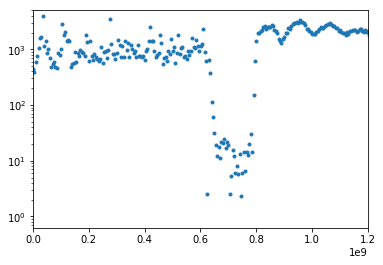

In [7]:
freq_elec=[0.0,5002405.0024,10004810.0048,15007215.0072,20009620.0096,25012025.012,30014430.0144,35016835.0168,40019240.0192,45021645.0216,50024050.024,55026455.0264,60028860.0288,65031265.0312,70033670.0336,75036075.036,80038480.0384,85040885.0407,90043290.0431,95045695.0455,100048100.048,105050505.05,110052910.053,115055315.055,120057720.058,125060125.06,130062530.062,135064935.065,140067340.067,145069745.07,150072150.072,155074555.074,160076960.077,165079365.079,170081770.081,175084175.084,180086580.086,185088985.089,190091390.091,195093795.093,200096200.096,205098605.098,210101010.101,215103415.103,220105820.105,225108225.108,230110630.11,235113035.113,240115440.115,245117845.117,250120250.12,255122655.122,260125060.125,265127465.127,270129870.129,275132275.132,280134680.134,285137085.137,290139490.139,295141895.141,300144300.144,305146705.146,310149110.149,315151515.151,320153920.153,325156325.156,330158730.158,335161135.161,340163540.163,345165945.165,350168350.168,355170755.17,360173160.173,365175565.175,370177970.177,375180375.18,380182780.182,385185185.185,390187590.187,395189995.189,400192400.192,405194805.194,410197210.197,415199615.199,420202020.201,425204425.204,430206830.206,435209235.209,440211640.211,445214045.213,450216450.216,455218855.218,460221260.221,465223665.223,470226070.225,475228475.228,480230880.23,485233285.233,490235690.235,495238095.237,500240500.24,505242905.242,510245310.244,515247715.247,520250120.249,525252525.252,530254930.254,535257335.256,540259740.259,545262145.261,550264550.264,555266955.266,560269360.268,565271765.271,570274170.273,575276575.276,580278980.278,585281385.28,590283790.283,595286195.285,600288600.288,605291005.29,610293410.292,615295815.295,620298220.297,625300625.3,630303030.302,635305435.304,640307840.307,645310245.309,650312650.312,655315055.314,660317460.316,665319865.319,670322270.321,675324675.324,680327080.326,685329485.328,690331890.331,695334295.333,700336700.336,705339105.338,710341510.34,715343915.343,720346320.345,725348725.348,730351130.35,735353535.352,740355940.355,745358345.357,750360750.36,755363155.362,760365560.364,765367965.367,770370370.369,775372775.372,780375180.374,785377585.376,790379990.379,795382395.381,800384800.384,805387205.386,810389610.388,815392015.391,820394420.393,825396825.396,830399230.398,835401635.4,840404040.403,845406445.405,850408850.407,855411255.41,860413660.412,865416065.415,870418470.417,875420875.419,880423280.422,885425685.424,890428090.427,895430495.429,900432900.431,905435305.434,910437710.436,915440115.439,920442520.441,925444925.443,930447330.446,935449735.448,940452140.451,945454545.453,950456950.455,955459355.458,960461760.46,965464165.463,970466570.465,975468975.467,980471380.47,985473785.472,990476190.475,995478595.477,1000481000.48,1005483405.48,1010485810.48,1015488215.49,1020490620.49,1025493025.49,1030495430.49,1035497835.5,1040500240.5,1045502645.5,1050505050.5,1055507455.51,1060509860.51,1065512265.51,1070514670.51,1075517075.52,1080519480.52,1085521885.52,1090524290.52,1095526695.52,1100529100.53,1105531505.53,1110533910.53,1115536315.53,1120538720.54,1125541125.54,1130543530.54,1135545935.54,1140548340.55,1145550745.55,1150553150.55,1155555555.55,1160557960.56,1165560365.56,1170562770.56,1175565175.56,1180567580.57,1185569985.57,1190572390.57,1195574795.57,1200577200.58,1205579605.58,1210582010.58,1215584415.58,1220586820.58,1225589225.59,1230591630.59,1235594035.59,1240596440.59,1245598845.6,1250601250.6,1255603655.6,1260606060.6,1265608465.61,1270610870.61,1275613275.61,1280615680.61,1285618085.62,1290620490.62,1295622895.62,1300625300.62,1305627705.63,1310630110.63,1315632515.63,1320634920.63,1325637325.64,1330639730.64,1335642135.64,1340644540.64,1345646945.64,1350649350.65,1355651755.65,1360654160.65,1365656565.65,1370658970.66,1375661375.66,1380663780.66,1385666185.66,1390668590.67,1395670995.67,1400673400.67,1405675805.67,1410678210.68,1415680615.68,1420683020.68,1425685425.68,1430687830.69,1435690235.69,1440692640.69,1445695045.69,1450697450.7,1455699855.7,1460702260.7,1465704665.7,1470707070.7,1475709475.71,1480711880.71,1485714285.71,1490716690.71,1495719095.72,1500721500.72,1505723905.72,1510726310.72,1515728715.73,1520731120.73,1525733525.73,1530735930.73,1535738335.74,1540740740.74,1545743145.74,1550745550.74,1555747955.75,1560750360.75,1565752765.75,1570755170.75,1575757575.76,1580759980.76,1585762385.76,1590764790.76,1595767195.76,1600769600.77,1605772005.77,1610774410.77,1615776815.77,1620779220.78,1625781625.78,1630784030.78,1635786435.78,1640788840.79,1645791245.79,1650793650.79,1655796055.79,1660798460.8,1665800865.8,1670803270.8,1675805675.8,1680808080.81,1685810485.81,1690812890.81,1695815295.81,1700817700.81,1705820105.82,1710822510.82,1715824915.82,1720827320.82,1725829725.83,1730832130.83,1735834535.83,1740836940.83,1745839345.84,1750841750.84,1755844155.84,1760846560.84,1765848965.85,1770851370.85,1775853775.85,1780856180.85,1785858585.86,1790860990.86,1795863395.86,1800865800.86,1805868205.87,1810870610.87,1815873015.87,1820875420.87,1825877825.87,1830880230.88,1835882635.88,1840885040.88,1845887445.88,1850889850.89,1855892255.89,1860894660.89,1865897065.89,1870899470.9,1875901875.9,1880904280.9,1885906685.9,1890909090.91,1895911495.91,1900913900.91,1905916305.91,1910918710.92,1915921115.92,1920923520.92,1925925925.92,1930928330.93,1935930735.93,1940933140.93,1945935545.93,1950937950.93,1955940355.94,1960942760.94,1965945165.94,1970947570.94,1975949975.95,1980952380.95,1985954785.95,1990957190.95,1995959595.96,2000962000.96,2005964405.96,2010966810.96,2015969215.97,2020971620.97,2025974025.97,2030976430.97,2035978835.98,2040981240.98,2045983645.98,2050986050.98,2055988455.99,2060990860.99,2065993265.99,2070995670.99,2075998075.99,2081000481.0,2086002886.0,2091005291.0,2096007696.0,2101010101.01,2106012506.01,2111014911.01,2116017316.01,2121019721.02,2126022126.02,2131024531.02,2136026936.02,2141029341.03,2146031746.03,2151034151.03,2156036556.03,2161038961.04,2166041366.04,2171043771.04,2176046176.04,2181048581.05,2186050986.05,2191053391.05,2196055796.05,2201058201.05,2206060606.06,2211063011.06,2216065416.06,2221067821.06,2226070226.07,2231072631.07,2236075036.07,2241077441.07,2246079846.08,2251082251.08,2256084656.08,2261087061.08,2266089466.09,2271091871.09,2276094276.09,2281096681.09,2286099086.1,2291101491.1,2296103896.1,2301106301.1,2306108706.11,2311111111.11,2316113516.11,2321115921.11,2326118326.11,2331120731.12,2336123136.12,2341125541.12,2346127946.12,2351130351.13,2356132756.13,2361135161.13,2366137566.13,2371139971.14,2376142376.14,2381144781.14,2386147186.14,2391149591.15,2396151996.15,2401154401.15,2406156806.15,2411159211.16,2416161616.16,2421164021.16,2426166426.16,2431168831.16,2436171236.17,2441173641.17,2446176046.17,2451178451.17,2456180856.18,2461183261.18,2466185666.18,2471188071.18,2476190476.19,2481192881.19,2486195286.19,2491197691.19,2496200096.2,2501202501.2,2506204906.2,2511207311.2,2516209716.21,2521212121.21,2526214526.21,2531216931.21,2536219336.22,2541221741.22,2546224146.22,2551226551.22,2556228956.22,2561231361.23,2566233766.23,2571236171.23,2576238576.23,2581240981.24,2586243386.24,2591245791.24,2596248196.24,2601250601.25,2606253006.25,2611255411.25,2616257816.25,2621260221.26,2626262626.26,2631265031.26,2636267436.26,2641269841.27,2646272246.27,2651274651.27,2656277056.27,2661279461.28,2666281866.28,2671284271.28,2676286676.28,2681289081.28,2686291486.29,2691293891.29,2696296296.29,2701298701.29,2706301106.3,2711303511.3,2716305916.3,2721308321.3,2726310726.31,2731313131.31,2736315536.31,2741317941.31,2746320346.32,2751322751.32,2756325156.32,2761327561.32,2766329966.33,2771332371.33,2776334776.33,2781337181.33,2786339586.34,2791341991.34,2796344396.34,2801346801.34,2806349206.34,2811351611.35,2816354016.35,2821356421.35,2826358826.35,2831361231.36,2836363636.36,2841366041.36,2846368446.36,2851370851.37,2856373256.37,2861375661.37,2866378066.37,2871380471.38,2876382876.38,2881385281.38,2886387686.38,2891390091.39,2896392496.39,2901394901.39,2906397306.39,2911399711.4,2916402116.4,2921404521.4,2926406926.4,2931409331.4,2936411736.41,2941414141.41,2946416546.41,2951418951.41,2956421356.42,2961423761.42,2966426166.42,2971428571.42,2976430976.43,2981433381.43,2986435786.43,2991438191.43,2996440596.44,3001443001.44,3006445406.44,3011447811.44,3016450216.45,3021452621.45,3026455026.45,3031457431.45,3036459836.45,3041462241.46,3046464646.46,3051467051.46,3056469456.46,3061471861.47,3066474266.47,3071476671.47,3076479076.47,3081481481.48,3086483886.48,3091486291.48,3096488696.48,3101491101.49,3106493506.49,3111495911.49,3116498316.49,3121500721.5,3126503126.5,3131505531.5,3136507936.5,3141510341.51,3146512746.51,3151515151.51,3156517556.51,3161519961.51,3166522366.52,3171524771.52,3176527176.52,3181529581.52,3186531986.53,3191534391.53,3196536796.53,3201539201.53,3206541606.54,3211544011.54,3216546416.54,3221548821.54,3226551226.55,3231553631.55,3236556036.55,3241558441.55,3246560846.56,3251563251.56,3256565656.56,3261568061.56,3266570466.57,3271572871.57,3276575276.57,3281577681.57,3286580086.57,3291582491.58,3296584896.58,3301587301.58,3306589706.58,3311592111.59,3316594516.59,3321596921.59,3326599326.59,3331601731.6,3336604136.6,3341606541.6,3346608946.6,3351611351.61,3356613756.61,3361616161.61,3366618566.61,3371620971.62,3376623376.62,3381625781.62,3386628186.62,3391630591.63,3396632996.63,3401635401.63,3406637806.63,3411640211.63,3416642616.64,3421645021.64,3426647426.64,3431649831.64,3436652236.65,3441654641.65,3446657046.65,3451659451.65,3456661856.66,3461664261.66,3466666666.66,3471669071.66,3476671476.67,3481673881.67,3486676286.67,3491678691.67,3496681096.68,3501683501.68,3506685906.68,3511688311.68,3516690716.69,3521693121.69,3526695526.69,3531697931.69,3536700336.69,3541702741.7,3546705146.7,3551707551.7,3556709956.7,3561712361.71,3566714766.71,3571717171.71,3576719576.71,3581721981.72,3586724386.72,3591726791.72,3596729196.72,3601731601.73,3606734006.73,3611736411.73,3616738816.73,3621741221.74,3626743626.74,3631746031.74,3636748436.74,3641750841.75,3646753246.75,3651755651.75,3656758056.75,3661760461.75,3666762866.76,3671765271.76,3676767676.76,3681770081.76,3686772486.77,3691774891.77,3696777296.77,3701779701.77,3706782106.78,3711784511.78,3716786916.78,3721789321.78,3726791726.79,3731794131.79,3736796536.79,3741798941.79,3746801346.8,3751803751.8,3756806156.8,3761808561.8,3766810966.8,3771813371.81,3776815776.81,3781818181.81,3786820586.81,3791822991.82,3796825396.82,3801827801.82,3806830206.82,3811832611.83,3816835016.83,3821837421.83,3826839826.83,3831842231.84,3836844636.84,3841847041.84,3846849446.84,3851851851.85,3856854256.85,3861856661.85,3866859066.85,3871861471.86,3876863876.86,3881866281.86,3886868686.86,3891871091.86,3896873496.87,3901875901.87,3906878306.87,3911880711.87,3916883116.88,3921885521.88,3926887926.88,3931890331.88,3936892736.89,3941895141.89,3946897546.89,3951899951.89,3956902356.9,3961904761.9,3966907166.9,3971909571.9,3976911976.91,3981914381.91,3986916786.91,3991919191.91,3996921596.92,4001924001.92,4006926406.92,4011928811.92,4016931216.92,4021933621.93,4026936026.93,4031938431.93,4036940836.93,4041943241.94,4046945646.94,4051948051.94,4056950456.94,4061952861.95,4066955266.95,4071957671.95,4076960076.95,4081962481.96,4086964886.96,4091967291.96,4096969696.96,4101972101.97,4106974506.97,4111976911.97,4116979316.97,4121981721.98,4126984126.98,4131986531.98,4136988936.98,4141991341.98,4146993746.99,4151996151.99,4156998556.99,4162000961.99,4167003367.0,4172005772.0,4177008177.0,4182010582.0,4187012987.01,4192015392.01,4197017797.01,4202020202.01,4207022607.02,4212025012.02,4217027417.02,4222029822.02,4227032227.03,4232034632.03,4237037037.03,4242039442.03,4247041847.04,4252044252.04,4257046657.04,4262049062.04,4267051467.04,4272053872.05,4277056277.05,4282058682.05,4287061087.05,4292063492.06,4297065897.06,4302068302.06,4307070707.06,4312073112.07,4317075517.07,4322077922.07,4327080327.07,4332082732.08,4337085137.08,4342087542.08,4347089947.08,4352092352.09,4357094757.09,4362097162.09,4367099567.09,4372101972.09,4377104377.1,4382106782.1,4387109187.1,4392111592.1,4397113997.11,4402116402.11,4407118807.11,4412121212.11,4417123617.12,4422126022.12,4427128427.12,4432130832.12,4437133237.13,4442135642.13,4447138047.13,4452140452.13,4457142857.14,4462145262.14,4467147667.14,4472150072.14,4477152477.15,4482154882.15,4487157287.15,4492159692.15,4497162097.15,4502164502.16,4507166907.16,4512169312.16,4517171717.16,4522174122.17,4527176527.17,4532178932.17,4537181337.17,4542183742.18,4547186147.18,4552188552.18,4557190957.18,4562193362.19,4567195767.19,4572198172.19,4577200577.19,4582202982.2,4587205387.2,4592207792.2,4597210197.2,4602212602.21,4607215007.21,4612217412.21,4617219817.21,4622222222.21,4627224627.22,4632227032.22,4637229437.22,4642231842.22,4647234247.23,4652236652.23,4657239057.23,4662241462.23,4667243867.24,4672246272.24,4677248677.24,4682251082.24,4687253487.25,4692255892.25,4697258297.25,4702260702.25,4707263107.26,4712265512.26,4717267917.26,4722270322.26,4727272727.27,4732275132.27,4737277537.27,4742279942.27,4747282347.27,4752284752.28,4757287157.28,4762289562.28,4767291967.28,4772294372.29,4777296777.29,4782299182.29,4787301587.29,4792303992.3,4797306397.3,4802308802.3,4807311207.3,4812313612.31,4817316017.31,4822318422.31,4827320827.31,4832323232.32,4837325637.32,4842328042.32,4847330447.32,4852332852.33,4857335257.33,4862337662.33,4867340067.33,4872342472.33,4877344877.34,4882347282.34,4887349687.34,4892352092.34,4897354497.35,4902356902.35,4907359307.35,4912361712.35,4917364117.36,4922366522.36,4927368927.36,4932371332.36,4937373737.37,4942376142.37,4947378547.37,4952380952.37,4957383357.38,4962385762.38,4967388167.38,4972390572.38,4977392977.39,4982395382.39,4987397787.39,4992400192.39,4997402597.39,5002405002.4,5007407407.4,5012409812.4,5017412217.4,5022414622.41,5027417027.41,5032419432.41,5037421837.41,5042424242.42,5047426647.42,5052429052.42,5057431457.42,5062433862.43,5067436267.43,5072438672.43,5077441077.43,5082443482.44,5087445887.44,5092448292.44,5097450697.44,5102453102.44,5107455507.45,5112457912.45,5117460317.45,5122462722.45,5127465127.46,5132467532.46,5137469937.46,5142472342.46,5147474747.47,5152477152.47,5157479557.47,5162481962.47,5167484367.48,5172486772.48,5177489177.48,5182491582.48,5187493987.49,5192496392.49,5197498797.49,5202501202.49,5207503607.5,5212506012.5,5217508417.5,5222510822.5,5227513227.5,5232515632.51,5237518037.51,5242520442.51,5247522847.51,5252525252.52,5257527657.52,5262530062.52,5267532467.52,5272534872.53,5277537277.53,5282539682.53,5287542087.53,5292544492.54,5297546897.54,5302549302.54,5307551707.54,5312554112.55,5317556517.55,5322558922.55,5327561327.55,5332563732.56,5337566137.56,5342568542.56,5347570947.56,5352573352.56,5357575757.57,5362578162.57,5367580567.57,5372582972.57,5377585377.58,5382587782.58,5387590187.58,5392592592.58,5397594997.59,5402597402.59,5407599807.59,5412602212.59,5417604617.6,5422607022.6,5427609427.6,5432611832.6,5437614237.61,5442616642.61,5447619047.61,5452621452.61,5457623857.62,5462626262.62,5467628667.62,5472631072.62,5477633477.62,5482635882.63,5487638287.63,5492640692.63,5497643097.63,5502645502.64,5507647907.64,5512650312.64,5517652717.64,5522655122.65,5527657527.65,5532659932.65,5537662337.65,5542664742.66,5547667147.66,5552669552.66,5557671957.66,5562674362.67,5567676767.67,5572679172.67,5577681577.67,5582683982.68,5587686387.68,5592688792.68,5597691197.68,5602693602.68,5607696007.69,5612698412.69,5617700817.69,5622703222.69,5627705627.7,5632708032.7,5637710437.7,5642712842.7,5647715247.71,5652717652.71,5657720057.71,5662722462.71,5667724867.72,5672727272.72,5677729677.72,5682732082.72,5687734487.73,5692736892.73,5697739297.73,5702741702.73,5707744107.73,5712746512.74,5717748917.74,5722751322.74,5727753727.74,5732756132.75,5737758537.75,5742760942.75,5747763347.75,5752765752.76,5757768157.76,5762770562.76,5767772967.76,5772775372.77,5777777777.77,5782780182.77,5787782587.77,5792784992.78,5797787397.78,5802789802.78,5807792207.78,5812794612.79,5817797017.79,5822799422.79,5827801827.79,5832804232.79,5837806637.8,5842809042.8,5847811447.8,5852813852.8,5857816257.81,5862818662.81,5867821067.81,5872823472.81,5877825877.82,5882828282.82,5887830687.82,5892833092.82,5897835497.83,5902837902.83,5907840307.83,5912842712.83,5917845117.84,5922847522.84,5927849927.84,5932852332.84,5937854737.85,5942857142.85,5947859547.85,5952861952.85,5957864357.85,5962866762.86,5967869167.86,5972871572.86,5977873977.86,5982876382.87,5987878787.87,5992881192.87,5997883597.87,6002886002.88,6007888407.88,6012890812.88,6017893217.88,6022895622.89,6027898027.89,6032900432.89,6037902837.89,6042905242.9,6047907647.9,6052910052.9,6057912457.9,6062914862.91,6067917267.91,6072919672.91,6077922077.91,6082924482.91,6087926887.92,6092929292.92,6097931697.92,6102934102.92,6107936507.93,6112938912.93,6117941317.93,6122943722.93,6127946127.94,6132948532.94,6137950937.94,6142953342.94,6147955747.95,6152958152.95,6157960557.95,6162962962.95,6167965367.96,6172967772.96,6177970177.96,6182972582.96,6187974987.97,6192977392.97,6197979797.97,6202982202.97,6207984607.97,6212987012.98,6217989417.98,6222991822.98,6227994227.98,6232996632.99,6237999037.99,6243001442.99,6248003847.99,6253006253.0,6258008658.0,6263011063.0,6268013468.0,6273015873.01,6278018278.01,6283020683.01,6288023088.01,6293025493.02,6298027898.02,6303030303.02,6308032708.02,6313035113.03,6318037518.03,6323039923.03,6328042328.03,6333044733.03,6338047138.04,6343049543.04,6348051948.04,6353054353.04,6358056758.05,6363059163.05,6368061568.05,6373063973.05,6378066378.06,6383068783.06,6388071188.06,6393073593.06,6398075998.07,6403078403.07,6408080808.07,6413083213.07,6418085618.08,6423088023.08,6428090428.08,6433092833.08,6438095238.08,6443097643.09,6448100048.09,6453102453.09,6458104858.09,6463107263.1,6468109668.1,6473112073.1,6478114478.1,6483116883.11,6488119288.11,6493121693.11,6498124098.11,6503126503.12,6508128908.12,6513131313.12,6518133718.12,6523136123.13,6528138528.13,6533140933.13,6538143338.13,6543145743.14,6548148148.14,6553150553.14,6558152958.14,6563155363.14,6568157768.15,6573160173.15,6578162578.15,6583164983.15,6588167388.16,6593169793.16,6598172198.16,6603174603.16,6608177008.17,6613179413.17,6618181818.17,6623184223.17,6628186628.18,6633189033.18,6638191438.18,6643193843.18,6648196248.19,6653198653.19,6658201058.19,6663203463.19,6668205868.2,6673208273.2,6678210678.2,6683213083.2,6688215488.2,6693217893.21,6698220298.21,6703222703.21,6708225108.21,6713227513.22,6718229918.22,6723232323.22,6728234728.22,6733237133.23,6738239538.23,6743241943.23,6748244348.23,6753246753.24,6758249158.24,6763251563.24,6768253968.24,6773256373.25,6778258778.25,6783261183.25,6788263588.25,6793265993.26,6798268398.26,6803270803.26,6808273208.26,6813275613.26,6818278018.27,6823280423.27,6828282828.27,6833285233.27,6838287638.28,6843290043.28,6848292448.28,6853294853.28,6858297258.29,6863299663.29,6868302068.29,6873304473.29,6878306878.3,6883309283.3,6888311688.3,6893314093.3,6898316498.31,6903318903.31,6908321308.31,6913323713.31,6918326118.32,6923328523.32,6928330928.32,6933333333.32,6938335738.32,6943338143.33,6948340548.33,6953342953.33,6958345358.33,6963347763.34,6968350168.34,6973352573.34,6978354978.34,6983357383.35,6988359788.35,6993362193.35,6998364598.35,7003367003.36,7008369408.36,7013371813.36,7018374218.36,7023376623.37,7028379028.37,7033381433.37,7038383838.37,7043386243.37,7048388648.38,7053391053.38,7058393458.38,7063395863.38,7068398268.39,7073400673.39,7078403078.39,7083405483.39,7088407888.4,7093410293.4,7098412698.4,7103415103.4,7108417508.41,7113419913.41,7118422318.41,7123424723.41,7128427128.42,7133429533.42,7138431938.42,7143434343.42,7148436748.43,7153439153.43,7158441558.43,7163443963.43,7168446368.43,7173448773.44,7178451178.44,7183453583.44,7188455988.44,7193458393.45,7198460798.45,7203463203.45,7208465608.45,7213468013.46,7218470418.46,7223472823.46,7228475228.46,7233477633.47,7238480038.47,7243482443.47,7248484848.47,7253487253.48,7258489658.48,7263492063.48,7268494468.48,7273496873.49,7278499278.49,7283501683.49,7288504088.49,7293506493.49,7298508898.5,7303511303.5,7308513708.5,7313516113.5,7318518518.51,7323520923.51,7328523328.51,7333525733.51,7338528138.52,7343530543.52,7348532948.52,7353535353.52,7358537758.53,7363540163.53,7368542568.53,7373544973.53,7378547378.54,7383549783.54,7388552188.54,7393554593.54,7398556998.55,7403559403.55,7408561808.55,7413564213.55,7418566618.55,7423569023.56,7428571428.56,7433573833.56,7438576238.56,7443578643.57,7448581048.57,7453583453.57,7458585858.57,7463588263.58,7468590668.58,7473593073.58,7478595478.58,7483597883.59,7488600288.59,7493602693.59,7498605098.59,7503607503.6,7508609908.6,7513612313.6,7518614718.6,7523617123.61,7528619528.61,7533621933.61,7538624338.61,7543626743.61,7548629148.62,7553631553.62,7558633958.62,7563636363.62,7568638768.63,7573641173.63,7578643578.63,7583645983.63,7588648388.64,7593650793.64,7598653198.64,7603655603.64,7608658008.65,7613660413.65,7618662818.65,7623665223.65,7628667628.66,7633670033.66,7638672438.66,7643674843.66,7648677248.67,7653679653.67,7658682058.67,7663684463.67,7668686868.67,7673689273.68,7678691678.68,7683694083.68,7688696488.68,7693698893.69,7698701298.69,7703703703.69,7708706108.69,7713708513.7,7718710918.7,7723713323.7,7728715728.7,7733718133.71,7738720538.71,7743722943.71,7748725348.71,7753727753.72,7758730158.72,7763732563.72,7768734968.72,7773737373.72,7778739778.73,7783742183.73,7788744588.73,7793746993.73,7798749398.74,7803751803.74,7808754208.74,7813756613.74,7818759018.75,7823761423.75,7828763828.75,7833766233.75,7838768638.76,7843771043.76,7848773448.76,7853775853.76,7858778258.77,7863780663.77,7868783068.77,7873785473.77,7878787878.78,7883790283.78,7888792688.78,7893795093.78,7898797498.78,7903799903.79,7908802308.79,7913804713.79,7918807118.79,7923809523.8,7928811928.8,7933814333.8,7938816738.8,7943819143.81,7948821548.81,7953823953.81,7958826358.81,7963828763.82,7968831168.82,7973833573.82,7978835978.82,7983838383.83,7988840788.83,7993843193.83,7998845598.83,8003848003.84,8008850408.84,8013852813.84,8018855218.84,8023857623.84,8028860028.85,8033862433.85,8038864838.85,8043867243.85,8048869648.86,8053872053.86,8058874458.86,8063876863.86,8068879268.87,8073881673.87,8078884078.87,8083886483.87,8088888888.88,8093891293.88,8098893698.88,8103896103.88,8108898508.89,8113900913.89,8118903318.89,8123905723.89,8128908128.9,8133910533.9,8138912938.9,8143915343.9,8148917748.9,8153920153.91,8158922558.91,8163924963.91,8168927368.91,8173929773.92,8178932178.92,8183934583.92,8188936988.92,8193939393.93,8198941798.93,8203944203.93,8208946608.93,8213949013.94,8218951418.94,8223953823.94,8228956228.94,8233958633.95,8238961038.95,8243963443.95,8248965848.95,8253968253.96,8258970658.96,8263973063.96,8268975468.96,8273977873.96,8278980278.97,8283982683.97,8288985088.97,8293987493.97,8298989898.98,8303992303.98,8308994708.98,8313997113.98,8318999518.99,8324001923.99,8329004328.99,8334006733.99,8339009139.0,8344011544.0,8349013949.0,8354016354.0,8359018759.01,8364021164.01,8369023569.01,8374025974.01,8379028379.01,8384030784.02,8389033189.02,8394035594.02,8399037999.02,8404040404.03,8409042809.03,8414045214.03,8419047619.03,8424050024.04,8429052429.04,8434054834.04,8439057239.04,8444059644.05,8449062049.05,8454064454.05,8459066859.05,8464069264.06,8469071669.06,8474074074.06,8479076479.06,8484078884.07,8489081289.07,8494083694.07,8499086099.07,8504088504.07,8509090909.08,8514093314.08,8519095719.08,8524098124.08,8529100529.09,8534102934.09,8539105339.09,8544107744.09,8549110149.1,8554112554.1,8559114959.1,8564117364.1,8569119769.11,8574122174.11,8579124579.11,8584126984.11,8589129389.12,8594131794.12,8599134199.12,8604136604.12,8609139009.13,8614141414.13,8619143819.13,8624146224.13,8629148629.13,8634151034.14,8639153439.14,8644155844.14,8649158249.14,8654160654.15,8659163059.15,8664165464.15,8669167869.15,8674170274.16,8679172679.16,8684175084.16,8689177489.16,8694179894.17,8699182299.17,8704184704.17,8709187109.17,8714189514.18,8719191919.18,8724194324.18,8729196729.18,8734199134.19,8739201539.19,8744203944.19,8749206349.19,8754208754.19,8759211159.2,8764213564.2,8769215969.2,8774218374.2,8779220779.21,8784223184.21,8789225589.21,8794227994.21,8799230399.22,8804232804.22,8809235209.22,8814237614.22,8819240019.23,8824242424.23,8829244829.23,8834247234.23,8839249639.24,8844252044.24,8849254449.24,8854256854.24,8859259259.25,8864261664.25,8869264069.25,8874266474.25,8879268879.25,8884271284.26,8889273689.26,8894276094.26,8899278499.26,8904280904.27,8909283309.27,8914285714.27,8919288119.27,8924290524.28,8929292929.28,8934295334.28,8939297739.28,8944300144.29,8949302549.29,8954304954.29,8959307359.29,8964309764.3,8969312169.3,8974314574.3,8979316979.3,8984319384.31,8989321789.31,8994324194.31,8999326599.31,9004329004.31,9009331409.32,9014333814.32,9019336219.32,9024338624.32,9029341029.33,9034343434.33,9039345839.33,9044348244.33,9049350649.34,9054353054.34,9059355459.34,9064357864.34,9069360269.35,9074362674.35,9079365079.35,9084367484.35,9089369889.36,9094372294.36,9099374699.36,9104377104.36,9109379509.36,9114381914.37,9119384319.37,9124386724.37,9129389129.37,9134391534.38,9139393939.38,9144396344.38,9149398749.38,9154401154.39,9159403559.39,9164405964.39,9169408369.39,9174410774.4,9179413179.4,9184415584.4,9189417989.4,9194420394.41,9199422799.41,9204425204.41,9209427609.41,9214430014.42,9219432419.42,9224434824.42,9229437229.42,9234439634.42,9239442039.43,9244444444.43,9249446849.43,9254449254.43,9259451659.44,9264454064.44,9269456469.44,9274458874.44,9279461279.45,9284463684.45,9289466089.45,9294468494.45,9299470899.46,9304473304.46,9309475709.46,9314478114.46,9319480519.47,9324482924.47,9329485329.47,9334487734.47,9339490139.48,9344492544.48,9349494949.48,9354497354.48,9359499759.48,9364502164.49,9369504569.49,9374506974.49,9379509379.49,9384511784.5,9389514189.5,9394516594.5,9399518999.5,9404521404.51,9409523809.51,9414526214.51,9419528619.51,9424531024.52,9429533429.52,9434535834.52,9439538239.52,9444540644.53,9449543049.53,9454545454.53,9459547859.53,9464550264.54,9469552669.54,9474555074.54,9479557479.54,9484559884.54,9489562289.55,9494564694.55,9499567099.55,9504569504.55,9509571909.56,9514574314.56,9519576719.56,9524579124.56,9529581529.57,9534583934.57,9539586339.57,9544588744.57,9549591149.58,9554593554.58,9559595959.58,9564598364.58,9569600769.59,9574603174.59,9579605579.59,9584607984.59,9589610389.6,9594612794.6,9599615199.6,9604617604.6,9609620009.6,9614622414.61,9619624819.61,9624627224.61,9629629629.61,9634632034.62,9639634439.62,9644636844.62,9649639249.62,9654641654.63,9659644059.63,9664646464.63,9669648869.63,9674651274.64,9679653679.64,9684656084.64,9689658489.64,9694660894.65,9699663299.65,9704665704.65,9709668109.65,9714670514.65,9719672919.66,9724675324.66,9729677729.66,9734680134.66,9739682539.67,9744684944.67,9749687349.67,9754689754.67,9759692159.68,9764694564.68,9769696969.68,9774699374.68,9779701779.69,9784704184.69,9789706589.69,9794708994.69,9799711399.7,9804713804.7,9809716209.7,9814718614.7,9819721019.71,9824723424.71,9829725829.71,9834728234.71,9839730639.71,9844733044.72,9849735449.72,9854737854.72,9859740259.72,9864742664.73,9869745069.73,9874747474.73,9879749879.73,9884752284.74,9889754689.74,9894757094.74,9899759499.74,9904761904.75,9909764309.75,9914766714.75,9919769119.75,9924771524.76,9929773929.76,9934776334.76,9939778739.76,9944781144.77,9949783549.77,9954785954.77,9959788359.77,9964790764.77,9969793169.78,9974795574.78,9979797979.78,9984800384.78,9989802789.79,9994805194.79,9999807599.79,10004810004.8,10009812409.8,10014814814.8,10019817219.8,10024819624.8,10029822029.8,10034824434.8,10039826839.8,10044829244.8,10049831649.8,10054834054.8,10059836459.8,10064838864.8,10069841269.8,10074843674.8,10079846079.8,10084848484.8,10089850889.8,10094853294.8,10099855699.8,10104858104.8,10109860509.8,10114862914.8,10119865319.8,10124867724.9,10129870129.9,10134872534.9,10139874939.9,10144877344.9,10149879749.9,10154882154.9,10159884559.9,10164886964.9,10169889369.9,10174891774.9,10179894179.9,10184896584.9,10189898989.9,10194901394.9,10199903799.9,10204906204.9,10209908609.9,10214911014.9,10219913419.9,10224915824.9,10229918229.9,10234920634.9,10239923039.9,10244925444.9,10249927849.9,10254930254.9,10259932659.9,10264935064.9,10269937469.9,10274939874.9,10279942279.9,10284944684.9,10289947089.9,10294949494.9,10299951899.9,10304954304.9,10309956709.9,10314959114.9,10319961519.9,10324963924.9,10329966329.9,10334968735.0,10339971140.0,10344973545.0,10349975950.0,10354978355.0,10359980760.0,10364983165.0,10369985570.0,10374987975.0,10379990380.0,10384992785.0,10389995190.0,10394997595.0,10400000000.0,10405002405.0,10410004810.0,10415007215.0,10420009620.0,10425012025.0,10430014430.0,10435016835.0,10440019240.0,10445021645.0,10450024050.0,10455026455.0,10460028860.0,10465031265.0,10470033670.0,10475036075.0,10480038480.0,10485040885.0,10490043290.0,10495045695.0,10500048100.0,10505050505.0,10510052910.0,10515055315.0,10520057720.0,10525060125.0,10530062530.0,10535064935.0,10540067340.1,10545069745.1,10550072150.1,10555074555.1,10560076960.1,10565079365.1,10570081770.1,10575084175.1,10580086580.1,10585088985.1,10590091390.1,10595093795.1,10600096200.1,10605098605.1,10610101010.1,10615103415.1,10620105820.1,10625108225.1,10630110630.1,10635113035.1,10640115440.1,10645117845.1,10650120250.1,10655122655.1,10660125060.1,10665127465.1,10670129870.1,10675132275.1,10680134680.1,10685137085.1,10690139490.1,10695141895.1,10700144300.1,10705146705.1,10710149110.1,10715151515.1,10720153920.1,10725156325.1,10730158730.1,10735161135.1,10740163540.1,10745165945.1,10750168350.2,10755170755.2,10760173160.2,10765175565.2,10770177970.2,10775180375.2,10780182780.2,10785185185.2,10790187590.2,10795189995.2,10800192400.2,10805194805.2,10810197210.2,10815199615.2,10820202020.2,10825204425.2,10830206830.2,10835209235.2,10840211640.2,10845214045.2,10850216450.2,10855218855.2,10860221260.2,10865223665.2,10870226070.2,10875228475.2,10880230880.2,10885233285.2,10890235690.2,10895238095.2,10900240500.2,10905242905.2,10910245310.2,10915247715.2,10920250120.2,10925252525.2,10930254930.2,10935257335.2,10940259740.2,10945262145.2,10950264550.2,10955266955.2,10960269360.3,10965271765.3,10970274170.3,10975276575.3,10980278980.3,10985281385.3,10990283790.3,10995286195.3,11000288600.3,11005291005.3,11010293410.3,11015295815.3,11020298220.3,11025300625.3,11030303030.3,11035305435.3,11040307840.3,11045310245.3,11050312650.3,11055315055.3,11060317460.3,11065319865.3,11070322270.3,11075324675.3,11080327080.3,11085329485.3,11090331890.3,11095334295.3,11100336700.3,11105339105.3,11110341510.3,11115343915.3,11120346320.3,11125348725.3,11130351130.3,11135353535.3,11140355940.3,11145358345.3,11150360750.3,11155363155.3,11160365560.3,11165367965.4,11170370370.4,11175372775.4,11180375180.4,11185377585.4,11190379990.4,11195382395.4,11200384800.4,11205387205.4,11210389610.4,11215392015.4,11220394420.4,11225396825.4,11230399230.4,11235401635.4,11240404040.4,11245406445.4,11250408850.4,11255411255.4,11260413660.4,11265416065.4,11270418470.4,11275420875.4,11280423280.4,11285425685.4,11290428090.4,11295430495.4,11300432900.4,11305435305.4,11310437710.4,11315440115.4,11320442520.4,11325444925.4,11330447330.4,11335449735.4,11340452140.4,11345454545.4,11350456950.4,11355459355.4,11360461760.4,11365464165.4,11370466570.4,11375468975.5,11380471380.5,11385473785.5,11390476190.5,11395478595.5,11400481000.5,11405483405.5,11410485810.5,11415488215.5,11420490620.5,11425493025.5,11430495430.5,11435497835.5,11440500240.5,11445502645.5,11450505050.5,11455507455.5,11460509860.5,11465512265.5,11470514670.5,11475517075.5,11480519480.5,11485521885.5,11490524290.5,11495526695.5,11500529100.5,11505531505.5,11510533910.5,11515536315.5,11520538720.5,11525541125.5,11530543530.5,11535545935.5,11540548340.5,11545550745.5,11550553150.5,11555555555.5,11560557960.5,11565560365.5,11570562770.5,11575565175.5,11580567580.5,11585569985.6,11590572390.6,11595574795.6,11600577200.6,11605579605.6,11610582010.6,11615584415.6,11620586820.6,11625589225.6,11630591630.6,11635594035.6,11640596440.6,11645598845.6,11650601250.6,11655603655.6,11660606060.6,11665608465.6,11670610870.6,11675613275.6,11680615680.6,11685618085.6,11690620490.6,11695622895.6,11700625300.6,11705627705.6,11710630110.6,11715632515.6,11720634920.6,11725637325.6,11730639730.6,11735642135.6,11740644540.6,11745646945.6,11750649350.6,11755651755.6,11760654160.6,11765656565.6,11770658970.6,11775661375.6,11780663780.6,11785666185.6,11790668590.6,11795670995.7,11800673400.7,11805675805.7,11810678210.7,11815680615.7,11820683020.7,11825685425.7,11830687830.7,11835690235.7,11840692640.7,11845695045.7,11850697450.7,11855699855.7,11860702260.7,11865704665.7,11870707070.7,11875709475.7,11880711880.7,11885714285.7,11890716690.7,11895719095.7,11900721500.7,11905723905.7,11910726310.7,11915728715.7,11920731120.7,11925733525.7,11930735930.7,11935738335.7,11940740740.7,11945743145.7,11950745550.7,11955747955.7,11960750360.7,11965752765.7,11970755170.7,11975757575.7,11980759980.7,11985762385.7,11990764790.7,11995767195.7,12000769600.8,12005772005.8,12010774410.8,12015776815.8,12020779220.8,12025781625.8,12030784030.8,12035786435.8,12040788840.8,12045791245.8,12050793650.8,12055796055.8,12060798460.8,12065800865.8,12070803270.8,12075805675.8,12080808080.8,12085810485.8,12090812890.8,12095815295.8,12100817700.8,12105820105.8,12110822510.8,12115824915.8,12120827320.8,12125829725.8,12130832130.8,12135834535.8,12140836940.8,12145839345.8,12150841750.8,12155844155.8,12160846560.8,12165848965.8,12170851370.8,12175853775.8,12180856180.8,12185858585.8,12190860990.8,12195863395.8,12200865800.8,12205868205.8,12210870610.9,12215873015.9,12220875420.9,12225877825.9,12230880230.9,12235882635.9,12240885040.9,12245887445.9,12250889850.9,12255892255.9,12260894660.9,12265897065.9,12270899470.9,12275901875.9,12280904280.9,12285906685.9,12290909090.9,12295911495.9,12300913900.9,12305916305.9,12310918710.9,12315921115.9,12320923520.9,12325925925.9,12330928330.9,12335930735.9,12340933140.9,12345935545.9,12350937950.9,12355940355.9,12360942760.9,12365945165.9,12370947570.9,12375949975.9,12380952380.9,12385954785.9,12390957190.9,12395959595.9,12400962000.9,12405964405.9,12410966810.9,12415969215.9,12420971621.0,12425974026.0,12430976431.0,12435978836.0,12440981241.0,12445983646.0,12450986051.0,12455988456.0,12460990861.0,12465993266.0,12470995671.0,12475998076.0,12481000481.0,12486002886.0,12491005291.0,12496007696.0,12501010101.0,12506012506.0,12511014911.0,12516017316.0,12521019721.0,12526022126.0,12531024531.0,12536026936.0,12541029341.0,12546031746.0,12551034151.0,12556036556.0,12561038961.0,12566041366.0,12571043771.0,12576046176.0,12581048581.0,12586050986.0,12591053391.0,12596055796.0,12601058201.0,12606060606.0,12611063011.0,12616065416.0,12621067821.0,12626070226.1,12631072631.1,12636075036.1,12641077441.1,12646079846.1,12651082251.1,12656084656.1,12661087061.1,12666089466.1,12671091871.1,12676094276.1,12681096681.1,12686099086.1,12691101491.1,12696103896.1,12701106301.1,12706108706.1,12711111111.1,12716113516.1,12721115921.1,12726118326.1,12731120731.1,12736123136.1,12741125541.1,12746127946.1,12751130351.1,12756132756.1,12761135161.1,12766137566.1,12771139971.1,12776142376.1,12781144781.1,12786147186.1,12791149591.1,12796151996.1,12801154401.1,12806156806.1,12811159211.1,12816161616.1,12821164021.1,12826166426.1,12831168831.1,12836171236.2,12841173641.2,12846176046.2,12851178451.2,12856180856.2,12861183261.2,12866185666.2,12871188071.2,12876190476.2,12881192881.2,12886195286.2,12891197691.2,12896200096.2,12901202501.2,12906204906.2,12911207311.2,12916209716.2,12921212121.2,12926214526.2,12931216931.2,12936219336.2,12941221741.2,12946224146.2,12951226551.2,12956228956.2,12961231361.2,12966233766.2,12971236171.2,12976238576.2,12981240981.2,12986243386.2,12991245791.2,12996248196.2,13001250601.2,13006253006.2,13011255411.2,13016257816.2,13021260221.2,13026262626.2,13031265031.2,13036267436.2,13041269841.2,13046272246.3,13051274651.3,13056277056.3,13061279461.3,13066281866.3,13071284271.3,13076286676.3,13081289081.3,13086291486.3,13091293891.3,13096296296.3,13101298701.3,13106301106.3,13111303511.3,13116305916.3,13121308321.3,13126310726.3,13131313131.3,13136315536.3,13141317941.3,13146320346.3,13151322751.3,13156325156.3,13161327561.3,13166329966.3,13171332371.3,13176334776.3,13181337181.3,13186339586.3,13191341991.3,13196344396.3,13201346801.3,13206349206.3,13211351611.3,13216354016.3,13221356421.3,13226358826.3,13231361231.3,13236363636.3,13241366041.3,13246368446.3,13251370851.3,13256373256.4,13261375661.4,13266378066.4,13271380471.4,13276382876.4,13281385281.4,13286387686.4,13291390091.4,13296392496.4,13301394901.4,13306397306.4,13311399711.4,13316402116.4,13321404521.4,13326406926.4,13331409331.4,13336411736.4,13341414141.4,13346416546.4,13351418951.4,13356421356.4,13361423761.4,13366426166.4,13371428571.4,13376430976.4,13381433381.4,13386435786.4,13391438191.4,13396440596.4,13401443001.4,13406445406.4,13411447811.4,13416450216.4,13421452621.4,13426455026.4,13431457431.4,13436459836.4,13441462241.4,13446464646.4,13451467051.4,13456469456.4,13461471861.5,13466474266.5,13471476671.5,13476479076.5,13481481481.5,13486483886.5,13491486291.5,13496488696.5,13501491101.5,13506493506.5,13511495911.5,13516498316.5,13521500721.5,13526503126.5,13531505531.5,13536507936.5,13541510341.5,13546512746.5,13551515151.5,13556517556.5,13561519961.5,13566522366.5,13571524771.5,13576527176.5,13581529581.5,13586531986.5,13591534391.5,13596536796.5,13601539201.5,13606541606.5,13611544011.5,13616546416.5,13621548821.5,13626551226.5,13631553631.5,13636556036.5,13641558441.5,13646560846.5,13651563251.5,13656565656.5,13661568061.5,13666570466.5,13671572871.6,13676575276.6,13681577681.6,13686580086.6,13691582491.6,13696584896.6,13701587301.6,13706589706.6,13711592111.6,13716594516.6,13721596921.6,13726599326.6,13731601731.6,13736604136.6,13741606541.6,13746608946.6,13751611351.6,13756613756.6,13761616161.6,13766618566.6,13771620971.6,13776623376.6,13781625781.6,13786628186.6,13791630591.6,13796632996.6,13801635401.6,13806637806.6,13811640211.6,13816642616.6,13821645021.6,13826647426.6,13831649831.6,13836652236.6,13841654641.6,13846657046.6,13851659451.6,13856661856.6,13861664261.6,13866666666.6,13871669071.6,13876671476.6,13881673881.7,13886676286.7,13891678691.7,13896681096.7,13901683501.7,13906685906.7,13911688311.7,13916690716.7,13921693121.7,13926695526.7,13931697931.7,13936700336.7,13941702741.7,13946705146.7,13951707551.7,13956709956.7,13961712361.7,13966714766.7,13971717171.7,13976719576.7,13981721981.7,13986724386.7,13991726791.7,13996729196.7,14001731601.7,14006734006.7,14011736411.7,14016738816.7,14021741221.7,14026743626.7,14031746031.7,14036748436.7,14041750841.7,14046753246.7,14051755651.7,14056758056.7,14061760461.7,14066762866.7,14071765271.7,14076767676.7,14081770081.7,14086772486.7,14091774891.8,14096777296.8,14101779701.8,14106782106.8,14111784511.8,14116786916.8,14121789321.8,14126791726.8,14131794131.8,14136796536.8,14141798941.8,14146801346.8,14151803751.8,14156806156.8,14161808561.8,14166810966.8,14171813371.8,14176815776.8,14181818181.8,14186820586.8,14191822991.8,14196825396.8,14201827801.8,14206830206.8,14211832611.8,14216835016.8,14221837421.8,14226839826.8,14231842231.8,14236844636.8,14241847041.8,14246849446.8,14251851851.8,14256854256.8,14261856661.8,14266859066.8,14271861471.8,14276863876.8,14281866281.8,14286868686.8,14291871091.8,14296873496.9,14301875901.9,14306878306.9,14311880711.9,14316883116.9,14321885521.9,14326887926.9,14331890331.9,14336892736.9,14341895141.9,14346897546.9,14351899951.9,14356902356.9,14361904761.9,14366907166.9,14371909571.9,14376911976.9,14381914381.9,14386916786.9,14391919191.9,14396921596.9,14401924001.9,14406926406.9,14411928811.9,14416931216.9,14421933621.9,14426936026.9,14431938431.9,14436940836.9,14441943241.9,14446945646.9,14451948051.9,14456950456.9,14461952861.9,14466955266.9,14471957671.9,14476960076.9,14481962481.9,14486964886.9,14491967291.9,14496969696.9,14501972101.9,14506974507.0,14511976912.0,14516979317.0,14521981722.0,14526984127.0,14531986532.0,14536988937.0,14541991342.0,14546993747.0,14551996152.0,14556998557.0,14562000962.0,14567003367.0,14572005772.0,14577008177.0,14582010582.0,14587012987.0,14592015392.0,14597017797.0,14602020202.0,14607022607.0,14612025012.0,14617027417.0,14622029822.0,14627032227.0,14632034632.0,14637037037.0,14642039442.0,14647041847.0,14652044252.0,14657046657.0,14662049062.0,14667051467.0,14672053872.0,14677056277.0,14682058682.0,14687061087.0,14692063492.0,14697065897.0,14702068302.0,14707070707.0,14712073112.0,14717075517.1,14722077922.1,14727080327.1,14732082732.1,14737085137.1,14742087542.1,14747089947.1,14752092352.1,14757094757.1,14762097162.1,14767099567.1,14772101972.1,14777104377.1,14782106782.1,14787109187.1,14792111592.1,14797113997.1,14802116402.1,14807118807.1,14812121212.1,14817123617.1,14822126022.1,14827128427.1,14832130832.1,14837133237.1,14842135642.1,14847138047.1,14852140452.1,14857142857.1,14862145262.1,14867147667.1,14872150072.1,14877152477.1,14882154882.1,14887157287.1,14892159692.1,14897162097.1,14902164502.1,14907166907.1,14912169312.1,14917171717.1,14922174122.2,14927176527.2,14932178932.2,14937181337.2,14942183742.2,14947186147.2,14952188552.2,14957190957.2,14962193362.2,14967195767.2,14972198172.2,14977200577.2,14982202982.2,14987205387.2,14992207792.2,14997210197.2,15002212602.2,15007215007.2,15012217412.2,15017219817.2,15022222222.2,15027224627.2,15032227032.2,15037229437.2,15042231842.2,15047234247.2,15052236652.2,15057239057.2,15062241462.2,15067243867.2,15072246272.2,15077248677.2,15082251082.2,15087253487.2,15092255892.2,15097258297.2,15102260702.2,15107263107.2,15112265512.2,15117267917.2,15122270322.2,15127272727.2,15132275132.3,15137277537.3,15142279942.3,15147282347.3,15152284752.3,15157287157.3,15162289562.3,15167291967.3,15172294372.3,15177296777.3,15182299182.3,15187301587.3,15192303992.3,15197306397.3,15202308802.3,15207311207.3,15212313612.3,15217316017.3,15222318422.3,15227320827.3,15232323232.3,15237325637.3,15242328042.3,15247330447.3,15252332852.3,15257335257.3,15262337662.3,15267340067.3,15272342472.3,15277344877.3,15282347282.3,15287349687.3,15292352092.3,15297354497.3,15302356902.3,15307359307.3,15312361712.3,15317364117.3,15322366522.3,15327368927.3,15332371332.3,15337373737.3,15342376142.4,15347378547.4,15352380952.4,15357383357.4,15362385762.4,15367388167.4,15372390572.4,15377392977.4,15382395382.4,15387397787.4,15392400192.4,15397402597.4,15402405002.4,15407407407.4,15412409812.4,15417412217.4,15422414622.4,15427417027.4,15432419432.4,15437421837.4,15442424242.4,15447426647.4,15452429052.4,15457431457.4,15462433862.4,15467436267.4,15472438672.4,15477441077.4,15482443482.4,15487445887.4,15492448292.4,15497450697.4,15502453102.4,15507455507.4,15512457912.4,15517460317.4,15522462722.4,15527465127.4,15532467532.4,15537469937.4,15542472342.4,15547474747.4,15552477152.5,15557479557.5,15562481962.5,15567484367.5,15572486772.5,15577489177.5,15582491582.5,15587493987.5,15592496392.5,15597498797.5,15602501202.5,15607503607.5,15612506012.5,15617508417.5,15622510822.5,15627513227.5,15632515632.5,15637518037.5,15642520442.5,15647522847.5,15652525252.5,15657527657.5,15662530062.5,15667532467.5,15672534872.5,15677537277.5,15682539682.5,15687542087.5,15692544492.5,15697546897.5,15702549302.5,15707551707.5,15712554112.5,15717556517.5,15722558922.5,15727561327.5,15732563732.5,15737566137.5,15742568542.5,15747570947.5,15752573352.5,15757575757.6,15762578162.6,15767580567.6,15772582972.6,15777585377.6,15782587782.6,15787590187.6,15792592592.6,15797594997.6,15802597402.6,15807599807.6,15812602212.6,15817604617.6,15822607022.6,15827609427.6,15832611832.6,15837614237.6,15842616642.6,15847619047.6,15852621452.6,15857623857.6,15862626262.6,15867628667.6,15872631072.6,15877633477.6,15882635882.6,15887638287.6,15892640692.6,15897643097.6,15902645502.6,15907647907.6,15912650312.6,15917652717.6,15922655122.6,15927657527.6,15932659932.6,15937662337.6,15942664742.6,15947667147.6,15952669552.6,15957671957.6,15962674362.6,15967676767.7,15972679172.7,15977681577.7,15982683982.7,15987686387.7,15992688792.7,15997691197.7,16002693602.7,16007696007.7,16012698412.7,16017700817.7,16022703222.7,16027705627.7,16032708032.7,16037710437.7,16042712842.7,16047715247.7,16052717652.7,16057720057.7,16062722462.7,16067724867.7,16072727272.7,16077729677.7,16082732082.7,16087734487.7,16092736892.7,16097739297.7,16102741702.7,16107744107.7,16112746512.7,16117748917.7,16122751322.7,16127753727.7,16132756132.7,16137758537.7,16142760942.7,16147763347.7,16152765752.7,16157768157.7,16162770562.7,16167772967.7,16172775372.7,16177777777.8,16182780182.8,16187782587.8,16192784992.8,16197787397.8,16202789802.8,16207792207.8,16212794612.8,16217797017.8,16222799422.8,16227801827.8,16232804232.8,16237806637.8,16242809042.8,16247811447.8,16252813852.8,16257816257.8,16262818662.8,16267821067.8,16272823472.8,16277825877.8,16282828282.8,16287830687.8,16292833092.8,16297835497.8,16302837902.8,16307840307.8,16312842712.8,16317845117.8,16322847522.8,16327849927.8,16332852332.8,16337854737.8,16342857142.8,16347859547.8,16352861952.8,16357864357.8,16362866762.8,16367869167.8,16372871572.8,16377873977.8,16382876382.9,16387878787.9,16392881192.9,16397883597.9,16402886002.9,16407888407.9,16412890812.9,16417893217.9,16422895622.9,16427898027.9,16432900432.9,16437902837.9,16442905242.9,16447907647.9,16452910052.9,16457912457.9,16462914862.9,16467917267.9,16472919672.9,16477922077.9,16482924482.9,16487926887.9,16492929292.9,16497931697.9,16502934102.9,16507936507.9,16512938912.9,16517941317.9,16522943722.9,16527946127.9,16532948532.9,16537950937.9,16542953342.9,16547955747.9,16552958152.9,16557960557.9,16562962962.9,16567965367.9,16572967772.9,16577970177.9,16582972582.9,16587974987.9,16592977393.0,16597979798.0,16602982203.0,16607984608.0,16612987013.0,16617989418.0,16622991823.0,16627994228.0,16632996633.0,16637999038.0,16643001443.0,16648003848.0,16653006253.0,16658008658.0,16663011063.0,16668013468.0,16673015873.0,16678018278.0,16683020683.0,16688023088.0,16693025493.0,16698027898.0,16703030303.0,16708032708.0,16713035113.0,16718037518.0,16723039923.0,16728042328.0,16733044733.0,16738047138.0,16743049543.0,16748051948.0,16753054353.0,16758056758.0,16763059163.0,16768061568.0,16773063973.0,16778066378.0,16783068783.0,16788071188.0,16793073593.0,16798075998.0,16803078403.1,16808080808.1,16813083213.1,16818085618.1,16823088023.1,16828090428.1,16833092833.1,16838095238.1,16843097643.1,16848100048.1,16853102453.1,16858104858.1,16863107263.1,16868109668.1,16873112073.1,16878114478.1,16883116883.1,16888119288.1,16893121693.1,16898124098.1,16903126503.1,16908128908.1,16913131313.1,16918133718.1,16923136123.1,16928138528.1,16933140933.1,16938143338.1,16943145743.1,16948148148.1,16953150553.1,16958152958.1,16963155363.1,16968157768.1,16973160173.1,16978162578.1,16983164983.1,16988167388.1,16993169793.1,16998172198.1,17003174603.1,17008177008.1,17013179413.2,17018181818.2,17023184223.2,17028186628.2,17033189033.2,17038191438.2,17043193843.2,17048196248.2,17053198653.2,17058201058.2,17063203463.2,17068205868.2,17073208273.2,17078210678.2,17083213083.2,17088215488.2,17093217893.2,17098220298.2,17103222703.2,17108225108.2,17113227513.2,17118229918.2,17123232323.2,17128234728.2,17133237133.2,17138239538.2,17143241943.2,17148244348.2,17153246753.2,17158249158.2,17163251563.2,17168253968.2,17173256373.2,17178258778.2,17183261183.2,17188263588.2,17193265993.2,17198268398.2,17203270803.2,17208273208.2,17213275613.2,17218278018.3,17223280423.3,17228282828.3,17233285233.3,17238287638.3,17243290043.3,17248292448.3,17253294853.3,17258297258.3,17263299663.3,17268302068.3,17273304473.3,17278306878.3,17283309283.3,17288311688.3,17293314093.3,17298316498.3,17303318903.3,17308321308.3,17313323713.3,17318326118.3,17323328523.3,17328330928.3,17333333333.3,17338335738.3,17343338143.3,17348340548.3,17353342953.3,17358345358.3,17363347763.3,17368350168.3,17373352573.3,17378354978.3,17383357383.3,17388359788.3,17393362193.3,17398364598.3,17403367003.3,17408369408.3,17413371813.3,17418374218.3,17423376623.3,17428379028.4,17433381433.4,17438383838.4,17443386243.4,17448388648.4,17453391053.4,17458393458.4,17463395863.4,17468398268.4,17473400673.4,17478403078.4,17483405483.4,17488407888.4,17493410293.4,17498412698.4,17503415103.4,17508417508.4,17513419913.4,17518422318.4,17523424723.4,17528427128.4,17533429533.4,17538431938.4,17543434343.4,17548436748.4,17553439153.4,17558441558.4,17563443963.4,17568446368.4,17573448773.4,17578451178.4,17583453583.4,17588455988.4,17593458393.4,17598460798.4,17603463203.4,17608465608.4,17613468013.4,17618470418.4,17623472823.4,17628475228.4,17633477633.4,17638480038.5,17643482443.5,17648484848.5,17653487253.5,17658489658.5,17663492063.5,17668494468.5,17673496873.5,17678499278.5,17683501683.5,17688504088.5,17693506493.5,17698508898.5,17703511303.5,17708513708.5,17713516113.5,17718518518.5,17723520923.5,17728523328.5,17733525733.5,17738528138.5,17743530543.5,17748532948.5,17753535353.5,17758537758.5,17763540163.5,17768542568.5,17773544973.5,17778547378.5,17783549783.5,17788552188.5,17793554593.5,17798556998.5,17803559403.5,17808561808.5,17813564213.5,17818566618.5,17823569023.5,17828571428.5,17833573833.5,17838576238.5,17843578643.6,17848581048.6,17853583453.6,17858585858.6,17863588263.6,17868590668.6,17873593073.6,17878595478.6,17883597883.6,17888600288.6,17893602693.6,17898605098.6,17903607503.6,17908609908.6,17913612313.6,17918614718.6,17923617123.6,17928619528.6,17933621933.6,17938624338.6,17943626743.6,17948629148.6,17953631553.6,17958633958.6,17963636363.6,17968638768.6,17973641173.6,17978643578.6,17983645983.6,17988648388.6,17993650793.6,17998653198.6,18003655603.6,18008658008.6,18013660413.6,18018662818.6,18023665223.6,18028667628.6,18033670033.6,18038672438.6,18043674843.6,18048677248.6,18053679653.7,18058682058.7,18063684463.7,18068686868.7,18073689273.7,18078691678.7,18083694083.7,18088696488.7,18093698893.7,18098701298.7,18103703703.7,18108706108.7,18113708513.7,18118710918.7,18123713323.7,18128715728.7,18133718133.7,18138720538.7,18143722943.7,18148725348.7,18153727753.7,18158730158.7,18163732563.7,18168734968.7,18173737373.7,18178739778.7,18183742183.7,18188744588.7,18193746993.7,18198749398.7,18203751803.7,18208754208.7,18213756613.7,18218759018.7,18223761423.7,18228763828.7,18233766233.7,18238768638.7,18243771043.7,18248773448.7,18253775853.7,18258778258.7,18263780663.8,18268783068.8,18273785473.8,18278787878.8,18283790283.8,18288792688.8,18293795093.8,18298797498.8,18303799903.8,18308802308.8,18313804713.8,18318807118.8,18323809523.8,18328811928.8,18333814333.8,18338816738.8,18343819143.8,18348821548.8,18353823953.8,18358826358.8,18363828763.8,18368831168.8,18373833573.8,18378835978.8,18383838383.8,18388840788.8,18393843193.8,18398845598.8,18403848003.8,18408850408.8,18413852813.8,18418855218.8,18423857623.8,18428860028.8,18433862433.8,18438864838.8,18443867243.8,18448869648.8,18453872053.8,18458874458.8,18463876863.8,18468879268.8,18473881673.9,18478884078.9,18483886483.9,18488888888.9,18493891293.9,18498893698.9,18503896103.9,18508898508.9,18513900913.9,18518903318.9,18523905723.9,18528908128.9,18533910533.9,18538912938.9,18543915343.9,18548917748.9,18553920153.9,18558922558.9,18563924963.9,18568927368.9,18573929773.9,18578932178.9,18583934583.9,18588936988.9,18593939393.9,18598941798.9,18603944203.9,18608946608.9,18613949013.9,18618951418.9,18623953823.9,18628956228.9,18633958633.9,18638961038.9,18643963443.9,18648965848.9,18653968253.9,18658970658.9,18663973063.9,18668975468.9,18673977873.9,18678980279.0,18683982684.0,18688985089.0,18693987494.0,18698989899.0,18703992304.0,18708994709.0,18713997114.0,18718999519.0,18724001924.0,18729004329.0,18734006734.0,18739009139.0,18744011544.0,18749013949.0,18754016354.0,18759018759.0,18764021164.0,18769023569.0,18774025974.0,18779028379.0,18784030784.0,18789033189.0,18794035594.0,18799037999.0,18804040404.0,18809042809.0,18814045214.0,18819047619.0,18824050024.0,18829052429.0,18834054834.0,18839057239.0,18844059644.0,18849062049.0,18854064454.0,18859066859.0,18864069264.0,18869071669.0,18874074074.0,18879076479.0,18884078884.0,18889081289.1,18894083694.1,18899086099.1,18904088504.1,18909090909.1,18914093314.1,18919095719.1,18924098124.1,18929100529.1,18934102934.1,18939105339.1,18944107744.1,18949110149.1,18954112554.1,18959114959.1,18964117364.1,18969119769.1,18974122174.1,18979124579.1,18984126984.1,18989129389.1,18994131794.1,18999134199.1,19004136604.1,19009139009.1,19014141414.1,19019143819.1,19024146224.1,19029148629.1,19034151034.1,19039153439.1,19044155844.1,19049158249.1,19054160654.1,19059163059.1,19064165464.1,19069167869.1,19074170274.1,19079172679.1,19084175084.1,19089177489.1,19094179894.1,19099182299.2,19104184704.2,19109187109.2,19114189514.2,19119191919.2,19124194324.2,19129196729.2,19134199134.2,19139201539.2,19144203944.2,19149206349.2,19154208754.2,19159211159.2,19164213564.2,19169215969.2,19174218374.2,19179220779.2,19184223184.2,19189225589.2,19194227994.2,19199230399.2,19204232804.2,19209235209.2,19214237614.2,19219240019.2,19224242424.2,19229244829.2,19234247234.2,19239249639.2,19244252044.2,19249254449.2,19254256854.2,19259259259.2,19264261664.2,19269264069.2,19274266474.2,19279268879.2,19284271284.2,19289273689.2,19294276094.2,19299278499.2,19304280904.3,19309283309.3,19314285714.3,19319288119.3,19324290524.3,19329292929.3,19334295334.3,19339297739.3,19344300144.3,19349302549.3,19354304954.3,19359307359.3,19364309764.3,19369312169.3,19374314574.3,19379316979.3,19384319384.3,19389321789.3,19394324194.3,19399326599.3,19404329004.3,19409331409.3,19414333814.3,19419336219.3,19424338624.3,19429341029.3,19434343434.3,19439345839.3,19444348244.3,19449350649.3,19454353054.3,19459355459.3,19464357864.3,19469360269.3,19474362674.3,19479365079.3,19484367484.3,19489369889.3,19494372294.3,19499374699.3,19504377104.3,19509379509.3,19514381914.4,19519384319.4,19524386724.4,19529389129.4,19534391534.4,19539393939.4,19544396344.4,19549398749.4,19554401154.4,19559403559.4,19564405964.4,19569408369.4,19574410774.4,19579413179.4,19584415584.4,19589417989.4,19594420394.4,19599422799.4,19604425204.4,19609427609.4,19614430014.4,19619432419.4,19624434824.4,19629437229.4,19634439634.4,19639442039.4,19644444444.4,19649446849.4,19654449254.4,19659451659.4,19664454064.4,19669456469.4,19674458874.4,19679461279.4,19684463684.4,19689466089.4,19694468494.4,19699470899.4,19704473304.4,19709475709.4,19714478114.4,19719480519.4,19724482924.5,19729485329.5,19734487734.5,19739490139.5,19744492544.5,19749494949.5,19754497354.5,19759499759.5,19764502164.5,19769504569.5,19774506974.5,19779509379.5,19784511784.5,19789514189.5,19794516594.5,19799518999.5,19804521404.5,19809523809.5,19814526214.5,19819528619.5,19824531024.5,19829533429.5,19834535834.5,19839538239.5,19844540644.5,19849543049.5,19854545454.5,19859547859.5,19864550264.5,19869552669.5,19874555074.5,19879557479.5,19884559884.5,19889562289.5,19894564694.5,19899567099.5,19904569504.5,19909571909.5,19914574314.5,19919576719.5,19924579124.5,19929581529.5,19934583934.6,19939586339.6,19944588744.6,19949591149.6,19954593554.6,19959595959.6,19964598364.6,19969600769.6,19974603174.6,19979605579.6,19984607984.6,19989610389.6,19994612794.6,19999615199.6,20004617604.6,20009620009.6,20014622414.6,20019624819.6,20024627224.6,20029629629.6,20034632034.6,20039634439.6,20044636844.6,20049639249.6,20054641654.6,20059644059.6,20064646464.6,20069648869.6,20074651274.6,20079653679.6,20084656084.6,20089658489.6,20094660894.6,20099663299.6,20104665704.6,20109668109.6,20114670514.6,20119672919.6,20124675324.6,20129677729.6,20134680134.6,20139682539.7,20144684944.7,20149687349.7,20154689754.7,20159692159.7,20164694564.7,20169696969.7,20174699374.7,20179701779.7,20184704184.7,20189706589.7,20194708994.7,20199711399.7,20204713804.7,20209716209.7,20214718614.7,20219721019.7,20224723424.7,20229725829.7,20234728234.7,20239730639.7,20244733044.7,20249735449.7,20254737854.7,20259740259.7,20264742664.7,20269745069.7,20274747474.7,20279749879.7,20284752284.7,20289754689.7,20294757094.7,20299759499.7,20304761904.7,20309764309.7,20314766714.7,20319769119.7,20324771524.7,20329773929.7,20334776334.7,20339778739.7,20344781144.7,20349783549.8,20354785954.8,20359788359.8,20364790764.8,20369793169.8,20374795574.8,20379797979.8,20384800384.8,20389802789.8,20394805194.8,20399807599.8,20404810004.8,20409812409.8,20414814814.8,20419817219.8,20424819624.8,20429822029.8,20434824434.8,20439826839.8,20444829244.8,20449831649.8,20454834054.8,20459836459.8,20464838864.8,20469841269.8,20474843674.8,20479846079.8,20484848484.8,20489850889.8,20494853294.8,20499855699.8,20504858104.8,20509860509.8,20514862914.8,20519865319.8,20524867724.8,20529870129.8,20534872534.8,20539874939.8,20544877344.8,20549879749.8,20554882154.8,20559884559.9,20564886964.9,20569889369.9,20574891774.9,20579894179.9,20584896584.9];

amp_elec=[(91.9274100666+71.2988869534j),(-125.144188522+53.6182449458j),(23.9241412772+60.3910259188j),(23.2702349684+52.2615029315j),(28.1792555042+14.9138187139j),(9.39844561522-29.9968046337j),(-20.0581437635-10.4982069829j),(-27.6026528219+19.2294339709j),(0.90085430645-5.87780320361j),(-44.5118512746-211.69387888j),(-27.5171338056+25.2602473037j),(77.4513793915+14.7149372039j),(53.4139017695-109.485374373j),(-14.7908844387+24.66803128j),(6.01266972708+48.0182635919j),(118.115974073-110.367856424j),(47.307655375+85.840593316j),(114.123755745+2.52410100337j),(104.81158305+45.1050943451j),(-54.322584282+88.4894361391j),(85.2693709116+138.455486065j),(-25.75188598-7.02942683629j),(-56.3769766693-13.9600910722j),(-61.3370572166+7.46155041306j),(-35.355823745-8.74041716023j),(-61.8660323325-92.8100532583j),(-58.2151728772-52.0871385439j),(115.135280584-49.543417423j),(55.1104538633-21.2539196206j),(24.5800659826-38.993315268j),(129.589655469-6.46016498533j),(85.8607034189-56.8224822605j),(84.1019307763+114.876706157j),(21.7919820923+54.9431430962j),(91.7579672325+151.42935363j),(125.114271952+12.4388765488j),(27.9935174718-4.58082028093j),(-32.4827845507-41.5777560341j),(-67.9484939341-40.049053755j),(-100.075431119-6.88829291035j),(-66.4925101441+12.266535291j),(-30.9478532196-98.6849494743j),(-82.2988911742-183.372575636j),(-21.9193392682-36.7112220878j),(-55.8418281984+59.4641637663j),(4.16324557369-21.7280256331j),(97.8713281955-89.1261103722j),(31.3721915854+30.2447829238j),(17.6017871761+5.49727415013j),(45.2379026428+45.4388983905j),(22.5997127486+155.135590674j),(95.7513025453-37.8520811836j),(51.5279116712-18.7329765498j),(14.09328658+151.264309438j),(-5.80679323054-84.2776155008j),(-59.9732893436-69.5192681433j),(-122.499008742-4.35230049449j),(-47.2482211901-67.0011007025j),(-60.1058673466-1.49621805658j),(78.6755697757+2.55497336824j),(6.42160834435-26.3156928777j),(117.382656-131.075677257j),(82.0794226038-5.91389859415j),(15.3375816157+27.9048600028j),(191.550009501-76.9741296956j),(-76.2031038339+72.07118519j),(20.6172090975-15.154584993j),(-59.4164098606+176.691938494j),(85.465971037-2.90422611921j),(73.4149188047+17.1910748966j),(-88.4376041341+59.2023099069j),(-84.0101189363+86.5174918311j),(12.3783298933-82.8588616545j),(-149.682852456-107.919749011j),(86.4094289307+14.7211927926j),(-44.5943372683-129.228461066j),(133.368336819+44.7430967956j),(38.1552720033-159.24232601j),(243.597953516-62.0649475777j),(103.018440444+24.5256917821j),(73.1988388816-46.1289735112j),(-24.0607921456-7.54722845137j),(60.5480249203+40.0520322603j),(25.4092831534+13.4588882282j),(-70.4707065366+43.088233115j),(30.0399027607+37.7270605289j),(-99.4312313734-33.9071136536j),(-154.987245773+17.2760265511j),(21.6833391888-15.5065550512j),(-71.3616140412+7.21445710963j),(14.369481793-93.4658769602j),(-58.4580576148-149.150257208j),(4.10278508686-57.0286113494j),(58.4310635361-48.1361034556j),(107.085649234-47.5968953444j),(56.4889809256+49.6712432565j),(78.6179591414+14.483171701j),(37.1676637689+152.437002329j),(146.321679489+31.7896428518j),(-27.1188557823+1.71552508883j),(-96.0173256949+11.725616014j),(7.82507033579+5.14774679707j),(-3.50624848133+32.5830713951j),(-71.332562009-17.7687505813j),(-19.2853001267+56.8295247517j),(-63.5563546862-80.8581642978j),(-111.939112904-74.285613536j),(83.5417312897-14.3797297j),(67.9574371185-89.3044858824j),(11.895078041-64.4752139254j),(190.417598114-22.633745553j),(64.8281711026+101.287457593j),(48.8737135692+137.193488827j),(126.531760602+54.8099368875j),(60.8486670136+13.2431105515j),(-5.842236852+27.296505899j),(-124.742471956+89.6553048473j),(13.2430710367+60.9888033472j),(-22.3422196675-49.9114487273j),(-70.6737711598+93.8227229219j),(8.33376825867-105.800285885j),(83.7470139742+17.2008774727j),(36.6672735843-60.7848741771j),(29.2279385068-67.5787560327j),(48.9664497361-103.402765173j),(137.064630204-55.5971762832j),(-54.1053363543+31.6261526321j),(-17.3220144593-158.593051183j),(135.229126132+12.8275635301j),(50.1606418825-3.46694058844j),(44.9246402405+100.770596566j),(-37.2996755271+18.0892804421j),(46.4686247759-15.4951501201j),(-161.517256924-67.1232314658j),(-75.5057564439+60.3116632284j),(-50.930137709+18.8265928847j),(-21.8502458179-27.9091488787j),(0.382092250067-83.6498593242j),(-166.090671464-152.916976655j),(-67.2077904139-146.207051607j),(29.4371350006+68.396621088j),(-95.2538148537-97.4288586349j),(66.9350894793-48.0892825873j),(264.594120867+50.3159278299j),(75.9145565401-4.64189585182j),(123.771418394-38.4659344997j),(-6.26095510454+48.8355300889j),(126.378609466+213.377136761j),(-49.3239024919-36.0935281069j),(-131.043981132+22.6172024459j),(-13.5152771776-33.7433778054j),(-91.7236783616+5.64235231791j),(10.7702317118-1.14523740525j),(-82.4843344832-134.54420534j),(-80.3072955144+34.3458670334j),(-133.124108263-161.518572849j),(-43.3939541959+7.82324043566j),(168.610701732-69.4418905526j),(82.8306717424+73.6851866036j),(9.67085097789+139.847499405j),(112.776652487+62.1122181617j),(9.22543973739+56.2275696876j),(-13.4363069621+37.1117218376j),(-7.44404350684-20.2564990511j),(-149.968408036+49.7845664995j),(-86.447010576+115.333377413j),(-31.6527810617+28.335161657j),(-14.8601301698-71.3341766898j),(-149.427976315-33.0082813079j),(43.4449580263-87.4750416722j),(-53.7935578108-51.2608572569j),(51.3794990455-158.959838462j),(67.4330871284-154.087234538j),(175.098991729-304.607675778j),(-21.344640706-6.17395445168j),(61.2626156561+165.173048916j),(76.3077809245+111.917020056j),(-31.5125854119-7.51601241338j),(-14.1195333528+14.1465962342j),(-80.6363042482+187.871191291j),(-97.9567220904+73.5036116452j),(-159.652001705+124.236498396j),(-152.310651463+74.0935856334j),(-56.6625171866-51.0807017853j),(-114.672513413-110.654666584j),(38.2312542654+55.8343319926j),(-2.49949261475-61.8005560784j),(27.7743663883-152.529019243j),(-115.424021988-146.867321021j),(32.4211689954+7.2152091022j),(193.213703399-110.537651824j),(36.2463759726+51.4881358386j),(143.011785973+23.8256963956j),(114.947736064+141.237800937j),(16.0380549725+67.9768785116j),(-137.077561391+265.259998984j),(-74.7367469582+1.26859858064j),(7.41880421443+46.5825298463j),(-88.0862710345-26.3754995009j),(-200.126450084-80.6139882258j),(-46.2947699465-152.589137241j),(-90.0288663544-46.3511494041j),(-71.3998588649-49.9186901069j),(-57.4085128759-117.246328948j),(220.195463418-71.332768044j),(58.8393478728-34.7230098081j),(129.220325018-118.005372339j),(99.9623314663+94.7452144956j),(-59.2844171216+290.968940346j),(9.41471676393+29.3748799198j),(-101.324559881+203.173512505j),(-47.7651687461+92.4784899461j),(-65.9542907364+77.786628882j),(-150.590244299-19.6262891676j),(-112.582642348+36.5005715037j),(-49.4836520355-56.4844885245j),(-46.5029059511-84.4045055352j),(-150.114254399-134.893262191j),(-26.7736058923-123.096985967j),(3.4368668157-167.500106353j),(96.5280440608-49.0149624123j),(-29.8875502657-317.217089694j),(-12.4647553133+211.681323505j),(114.775830308+31.6195054884j),(207.197171398+70.6951571222j),(62.4756583805+296.5062726j),(47.2680746524+68.2502349472j),(-106.117399962+52.8834131264j),(-77.8923953836+101.80082904j),(-101.84269452+42.9311996963j),(-158.697418315+13.902538445j),(-85.7938945301-126.955712148j),(-26.2171455768+5.10005001854j),(-51.7422686152-135.01192277j),(-120.985966402-58.0070808886j),(428.72579376-166.831357943j),(45.2147399917-477.436005567j),(247.308759731+6.47769794186j),(113.697351377+208.436336556j),(117.182514698+60.2810664919j),(68.049769957+238.828689784j),(-139.86343377+302.124825119j),(19.5225877465+157.969270222j),(-187.225102375+53.2659886523j),(-153.175396864+158.886874743j),(-153.504826426-23.5764370539j),(-135.735420944+223.596624431j),(-209.691678601-111.174176224j),(-217.872147448-37.4435671468j),(-104.577800815-84.7257546477j),(-18.0884864175-231.983490232j),(-71.8048299323-202.78148894j),(-36.4468549153-74.6350396304j),(288.91789461-96.1447941053j),(211.415799922+366.853225752j),(-80.7500413879+273.485920039j),(-47.4151724002+11.2223739418j),(68.4425504325+147.286037187j),(-168.062088762+219.543728664j),(-233.392991747+323.955701894j),(-49.1373711102+161.335552026j),(-69.5239861197-73.9011231108j),(-52.7289376234+39.4211738745j),(-164.763369789-11.2326086476j),(-224.006583429+5.44605518188j),(-286.997289021+123.318660085j),(-500.470791677-307.681981652j),(35.9952811187-208.823286165j),(33.9914252149-33.0587145797j),(172.309187775-53.8571313605j),(315.293049198+187.977815221j),(2.87458268258-31.8783128993j),(53.2218085894+648.607963368j),(-276.483313481+238.398768427j),(113.565485863+134.811829161j),(-244.906039218+168.967087817j),(-189.440459374-139.504321024j),(-107.295137906+58.3311032949j),(-85.9745636494+86.8902100587j),(-235.629810485+33.0468613401j),(47.7054520097-356.703148134j),(-70.7214654222-118.00494469j),(252.734126698-846.592056004j),(106.204789824-391.860510313j),(675.792128945-1030.60033996j),(616.412774677-277.67916337j),(99.5699436162-34.3663089349j),(-60.960701267+41.6902521811j),(-89.6140298889+213.072728887j),(80.5402422444+376.723670578j),(115.982547921+88.1619118038j),(-231.316268001-7.52612662718j),(-144.38946794+125.494661759j),(-66.3347940049+50.3994863707j),(-63.127985723+27.5037797052j),(-96.8914498498-14.3069066525j),(-69.8220450549-174.766395984j),(-668.748749312-203.994158308j),(-107.560342548-261.277585235j),(304.299333355-827.799824932j),(268.741638675-280.379048154j),(324.421608177+90.8053497953j),(66.2961324192+505.396829256j),(323.539766777+349.498216911j),(8.88329170461+135.417136886j),(-193.089319868+554.32924587j),(-88.8642865246+236.812123461j),(-197.738290456+65.9940328447j),(-143.918620481-5.83273424261j),(-366.648171752-64.8933815469j),(-49.8467553722+7.49796347645j),(-378.984857181+261.856785067j),(-316.286528066-139.143414039j),(-39.1750811315+27.6187632549j),(-14.7611461552-482.915858237j),(-446.063311481-2234.92259199j),(-32.8183270088-538.708094401j),(5469.8961801-484.623711839j),(742.245477524+576.489772049j),(176.70067449+505.688609411j),(37.9726871421+470.648353556j),(39.7467499497+423.10014261j),(-54.5558367676+132.998267783j),(-97.7015954892+102.159948358j),(-418.778603786+220.525540869j),(-246.50088674-48.5940788342j),(-269.943831479+62.765558667j),(-44.0791774859+79.8933389275j),(-159.287900865-100.23534893j),(287.780848174-211.606395007j),(-267.752367874-426.467048561j),(-816.077816186+84.2047765857j),(934.775547321-427.910261915j),(260.727983984+1057.23226897j),(-78.443361852+203.277036479j),(919.029540238+365.436316298j),(7.95654810752+436.153858936j),(-42.943868825+113.552561772j),(-53.4847728519+260.021665177j),(-123.902382366+90.8095929129j),(184.155586875+87.0733242596j),(-102.342487303+262.951426919j),(-142.881944828-61.0068726171j),(-259.955975456+116.028338422j),(-385.204501579-201.476794541j),(-248.897845904+19.7005096331j),(29.5457310604-404.325529868j),(-218.692932578+191.561540532j),(-194.104146304+284.654919004j),(239.374199588+766.704298019j),(361.34863209+639.32416032j),(-342.353682011+32.7233709153j),(61.1232919919+96.68132964j),(-197.064989147+227.443688254j),(-139.515047257+168.686503384j),(-97.9239639754+115.865031644j),(-405.443265652+241.078604276j),(-235.354705675+97.5849369581j),(-468.539733767+121.092042624j),(-176.038760793+42.1569110458j),(-792.618014481-257.258156489j),(-1821.26485145-668.645890225j),(-29.9794537355-783.183922586j),(62.0704091579-316.133567083j),(-806.23570078+1929.1880509j),(-1197.3667926+664.069169409j),(1014.50888308-1746.5355573j),(-114.443616328+145.688372452j),(-149.218260901+351.811542873j),(-230.097041703+518.315441447j),(-107.781840795+56.9124045064j),(-206.961800043+155.55955296j),(-143.41616567-234.382684654j),(-283.529849465-75.0866113882j),(-123.328850746-49.3913824638j),(-213.722600197-91.1977594984j),(-130.558306647-363.034027838j),(-75.5994846524-119.120502781j),(-1033.39712733+124.54725543j),(-14.258645316+105.269745074j),(-1052.11167834+100.877153121j),(2937.71066752+6767.91553102j),(-351.195305256+543.732666256j),(-848.247517607+526.609611458j),(-949.43648022+564.314366241j),(-17.9218958053+339.281571366j),(-375.785325245+665.321798684j),(-541.380129356+270.252321736j),(-61.8665465261+93.7131930759j),(-290.58448236+147.180048469j),(-313.134269123+255.168695375j),(-231.33405364+162.193101072j),(-284.830964225+21.181688584j),(-123.509771498-590.501912078j),(-746.130425951+213.491074027j),(-297.306671519-72.8693840851j),(-29.9218823673-195.289632028j),(308.196482914-791.909873308j),(-90.8847295317-3973.08817471j),(-633.702919319+788.80785168j),(-58.9354316659+1020.98789188j),(-734.485897752+522.303049785j),(-635.909709481+316.784287421j),(-66.1124215361+430.515255888j),(-938.03290507-60.2759480064j),(-373.641909006-98.4805397032j),(-770.338110669+132.644377728j),(-305.979199952-223.313869707j),(-508.133900679-153.262221699j),(-537.42420165-67.6800557045j),(651.914932514-1096.20634833j),(-533.677168504-1.4824397456j),(-629.887804967+290.380177758j),(3685.90608014-234.597226247j),(-283.382776334+201.850639133j),(-281.260683934+865.062591222j),(-219.998893842+216.416421041j),(-306.02854444+682.645917056j),(-198.203674878-147.996951519j),(-750.86026523-64.9303774087j),(-517.244214705+257.526822499j),(-453.603183803-170.327057586j),(-397.342476835+254.267379313j),(-1037.27709492+836.597669186j),(-425.818201493-658.153447698j),(-670.928760554+598.547245712j),(-673.121764868+176.272920418j),(-499.13896944+547.315798404j),(-576.154163409+160.916092765j),(587.889963906+1305.10529106j),(-429.969851852+384.204036656j),(515.22717842+994.251713451j),(-176.310079887+317.634655589j),(-310.656890944-27.2185579492j),(-244.597797189-156.961245643j),(-216.1586906+56.7842792806j),(-522.542637819-583.395302854j),(-579.815861849+372.250453325j),(-1435.01971196-72.4774925803j),(-360.97323466-7.34838117353j),(-372.213376617+109.665842143j),(-644.075817445+982.684837396j),(-174.371553856+542.844037666j),(-6.51774716545+663.895320856j),(-597.280687382+225.229338639j),(-175.348498218+158.482063413j),(-238.495035316+293.0845218j),(-196.464342564-138.051924719j),(-530.149171218+294.532502101j),(-179.850792139+75.0038735584j),(-708.9492561-190.252338789j),(-356.318344158+9.10365362461j),(-956.920661286-504.817734706j),(-385.207876527+198.125096999j),(-514.747802508+136.942790789j),(-572.543004237-185.756515289j),(-1051.23825926-16.9398033923j),(-1577.62282484+577.059384971j),(-466.874621419+337.991591653j),(-244.309098785+175.081536344j),(-617.633501192-426.131335437j),(-459.684363195-385.89577574j),(435.312522948+959.64140533j),(-558.831731865+287.04549271j),(-454.21479615+257.831783829j),(-430.030258011+16.6089110435j),(-323.545012149+143.23577834j),(-356.594114293+60.1367233795j),(-721.677108732+415.180899775j),(-862.450930543+637.456899158j),(-870.509360466+127.786957706j),(-398.496316485-61.5019721521j),(-666.035289198+1417.49010936j),(-320.428396138+701.706409109j),(-872.37487216-537.450136957j),(-511.469710501+186.509425679j),(-775.44519892+260.996441221j),(-361.416959001+557.509716098j),(-380.846654892+771.883997711j),(-249.63603933+65.367432139j),(-311.649469581+202.769121419j),(-548.420388998+81.5562813992j),(-773.492942327-81.3343793473j),(-883.86445535-6.89963776765j),(-108.358731121+851.6565044j),(-431.726168682-416.05211239j),(-1061.08341263+630.205548626j),(-1415.22630514+225.27470059j),(-428.453408489+494.144153645j),(-1006.09833235+262.430068721j),(-118.10202248+203.904213799j),(-266.529506714+1784.6752116j),(-723.884837471+244.559569253j),(-254.032818243+107.667518062j),(-1013.96010625+213.636158069j),(-412.647784227+356.666615345j),(-378.556286028+343.300933609j),(-322.528251345+298.328864969j),(-450.406789335-486.859848586j),(-621.613135733-195.149322928j),(-826.376319709+410.99969466j),(-341.978282015+341.422640592j),(-645.121038043+2.64924498853j),(-394.468642374+14.1319879143j),(-510.663689706+181.830629869j),(-459.574757143+274.291106197j),(-559.988681659+406.199918522j),(-457.798795923+653.160027131j),(-1046.16358801+955.837301636j),(-507.205280513+276.451377259j),(-847.088543492+416.485863526j),(-417.16790147+59.6494446397j),(-502.30189293+705.728036722j),(-448.349279532-376.965929641j),(-860.531889042+100.523026936j),(-461.313095219+192.085417156j),(-338.647660659+95.4419534943j),(-1301.07749525-1101.17807251j),(-902.603888032+713.171844578j),(-140.741436581-581.839605659j),(-471.04651711+414.307765701j),(-522.865108316+227.820220434j),(-370.325655465+497.557816882j),(-604.097681302+186.131051218j),(-748.206477175-52.3148270484j),(-364.079185121+140.66967393j),(-404.572324969+420.987919709j),(-678.521918259+439.465417815j),(-669.833678804+196.140182418j),(-563.544453815-86.1620033725j),(-553.91183747-183.769381013j),(-822.571768576-129.942236538j),(-988.605606083+624.967880502j),(-432.181359208+911.305186504j),(-846.286246847+816.941282716j),(-364.763516087+300.487243705j),(-592.750953495+230.690787608j),(-487.9893247+152.502447884j),(-298.503413564+381.159080183j),(-739.988256668+386.220363202j),(-398.687255475+383.952059157j),(-967.887669318-87.4035084831j),(-481.16486568-22.4213577065j),(-532.126802994+254.892813841j),(-787.100897907-527.548977255j),(-532.877398005+145.036705637j),(-898.162088901+356.569611661j),(-406.915793463+228.911627379j),(-367.477201586+331.596425931j),(-489.344912646-128.192695131j),(-571.749320316+222.754905836j),(-630.874659733+5.41219967454j),(-743.313809089+690.924849132j),(-243.823068452+281.807154044j),(-690.455245122+534.393538887j),(-384.293599894+355.146101388j),(-431.360813772-227.734852041j),(-502.379860698+72.0926613853j),(-427.452479735-166.601905057j),(-341.883594019-221.198126621j),(-1482.80901128+469.406627117j),(-714.02254935-625.197547349j),(-1975.10664565-605.449722833j),(-827.540965682+934.760303061j),(-261.441504117+816.56864308j),(-428.154906593+249.386463539j),(-251.970261856+633.981193264j),(-523.665057545+282.984862577j),(-778.251339036+7.0322702442j),(-410.383142577+142.962943947j),(-665.206799466+135.8330354j),(-463.866167447+184.012950337j),(-267.680817717+42.7527035634j),(-675.85386337+193.97928058j),(-415.953202732+391.719361556j),(-479.274099989-50.5091081707j),(-554.523385204+760.117079866j),(-941.787017133+495.591389758j),(-1115.11057031+487.239035597j),(-1166.30999918+907.213770184j),(-818.549575084+523.230668061j),(-123.348694272+469.930420412j),(-441.190916271+127.836754641j),(-298.692217969+194.190632813j),(-540.407042934-31.9144154229j),(-594.972543681+112.149764684j),(-659.967103613-38.7494647143j),(-622.817741737+69.7910592367j),(-431.658929445+262.848005836j),(-454.179550163+295.457749467j),(-716.334131698-157.823972672j),(-780.359851019-10.9364926112j),(-632.116772139-131.858862402j),(-474.693709518+2605.50623267j),(-761.221054471-154.393904702j),(-342.32852295+811.227881372j),(-524.671463088+184.494162418j),(-554.234722626+66.9253242486j),(-584.112995849+486.943783902j),(-487.462370893+221.136520464j),(-455.932536215+400.352010479j),(-764.865355205+355.023143266j),(-604.879423465+96.2764170002j),(-807.355639947-109.706934896j),(-752.918090986+183.717179062j),(-540.950285818-451.534722981j),(-659.477949918+182.320222072j),(-1886.54798897+2673.46902898j),(-221.87589654+610.564683297j),(-824.241915519-22.8083859696j),(-434.537569807+409.256118179j),(-569.745913443+346.431999857j),(-574.609692751+189.29452324j),(-448.948283393+125.161973654j),(-636.617204519+128.557929803j),(-490.186878938+124.828173648j),(-501.092158672-67.0862926898j),(-514.295557339-23.2499939871j),(-629.027738238+16.9072528456j),(-629.438749071-211.149182217j),(-688.035945577+143.304173972j),(-472.084827699-199.518160816j),(-899.786474636+146.682001503j),(-661.450520378+266.145888367j),(-1641.1709726+407.774970971j),(-943.461430685+475.721723815j),(-475.468222697+335.976544225j),(-796.381069407+206.245650393j),(-635.57551211+122.011147727j),(-459.522485636+141.129385617j),(-464.872026764+205.914330881j),(-400.665688611+11.284886754j),(-567.13095999+91.8007755255j),(-506.704123236+71.1457788304j),(-596.91659533+53.1246544757j),(-938.830271012+125.960591044j),(-531.337784906-16.253957868j),(-1041.19253964-29.7456880736j),(-1131.28223254-7.98906607125j),(-1805.49759737+147.108519742j),(-533.009231692+457.135916634j),(-720.722625074+468.894717128j),(-432.517073954+319.874070377j),(-271.652069014+380.345169112j),(-444.935431499+451.913452326j),(-416.498894881+98.0837625275j),(-515.080126557+12.5099846767j),(-632.926161672+97.0802198335j),(-728.43299081+162.417320674j),(-488.276029216-150.055604202j),(-488.12703567+25.8764570879j),(-894.624623099+54.8204230256j),(-837.831338938+363.879232711j),(-996.000285387-149.405305558j),(-823.864544922+271.421444852j),(-534.926455111+640.301487609j),(-625.144881982+860.338879084j),(-585.992085512+542.245072674j),(-542.926820715+316.774965332j),(-322.016880191+151.915795675j),(-697.293138081+208.905188633j),(-480.39199907+288.865101109j),(-675.52587269+175.321239617j),(-454.817617067+96.6750622014j),(-472.452258587+83.028927306j),(-510.251981986-211.922432256j),(-859.090090627-178.60047613j),(-1037.38909364-390.932982455j),(-1680.75763857+48.0555529673j),(-837.325819255+829.271640275j),(-1253.99843396+1302.24509881j),(-478.292388193+1196.27733974j),(-324.264362621+714.948648605j),(-430.460079528+417.856102331j),(-549.200307563+231.984448269j),(-517.383402356+208.52482541j),(-327.524613936+109.394590021j),(-423.29188494+131.929150851j),(-447.117067314+185.208684473j),(-484.666283135-75.5760647035j),(-700.987506682-105.818271239j),(-578.371271079-646.738620443j),(-1125.22842135-300.213007476j),(-1211.38715771-436.210305093j),(-1213.22739191+101.953592255j),(-892.300817824+332.110296069j),(-868.626578385+691.8654603j),(-321.186178823+1017.80128369j),(-322.436104431+506.620973309j),(-466.863820694+190.075471052j),(-360.351234659+396.585020667j),(-395.04524922+325.261198028j),(-450.676433753+233.709259218j),(-470.830701391-55.40596147j),(-675.602834011+41.1819730093j),(-715.103279735-183.435219449j),(-909.174438229-304.436202234j),(-817.94230953-48.6050348852j),(-805.494732186-615.18458147j),(-1404.29004375+118.714383135j),(-1458.41320793+728.121749275j),(-916.265907034+642.221652844j),(-1064.92250963+300.168947703j),(-573.724228268+772.982676174j),(-386.586127378+365.670974482j),(-341.061970645+494.964520167j),(-574.646757944+94.0028424165j),(-439.011907306+320.395250455j),(-352.296394956+22.7259606515j),(-475.600607449+120.232203982j),(-485.208559543+58.3940791725j),(-617.966881394-129.339161716j),(-805.555314498-632.181862667j),(-1398.95818599+258.007256561j),(-2008.28347916-487.599184919j),(-2742.82874267+761.403880639j),(2129.33458497+661.551743988j),(-1278.48232267+478.152596724j),(-484.575564531+526.596677078j),(-870.598620721+564.582042074j),(-453.512889898+423.271677393j),(-438.863345889+273.836099911j),(-444.69068289+295.386648154j),(-551.398127264+144.348033013j),(-500.886337788+50.9760708097j),(-463.765212578+20.4786393484j),(-413.819334519-63.4330778244j),(-628.639218969+17.7448344588j),(-717.175566516-18.5099011262j),(-784.117198172-252.744701707j),(-781.392101862-475.314268707j),(-653.777024538+305.149467377j),(-1201.00559019+91.283477982j),(-1147.01980583+491.733414254j),(-397.038841083+893.856181138j),(-687.055880874+388.635892737j),(-639.648644416+489.556881571j),(-587.123644556+123.190535646j),(-472.648366005+168.578592034j),(-510.229083992+207.326454234j),(-505.070700884+223.335268468j),(-474.505931822+55.975460454j),(-516.840749248+6.60788174069j),(-468.418402512-71.8630873759j),(-545.208435984-135.924009732j),(-754.033864055+26.4268753369j),(-1031.45888279-362.81580647j),(-960.96880705-80.0462629535j),(-1082.62927792+690.960382895j),(-1686.40891359-117.568167295j),(-1146.08342343+452.399487825j),(-533.366126239+659.000543325j),(-724.307263703+289.698348498j),(-559.850844552+590.488304094j),(-288.475238975+308.339856991j),(-368.011361826+335.922843539j),(-385.856842672+68.5710726298j),(-524.195714104+46.047792879j),(-388.938659194-74.7708037107j),(-549.187225709-19.1870521476j),(-673.616988534-96.7385096012j),(-708.824223784-590.709181374j),(-1210.88567143-274.912953096j),(-1128.48529332-382.06915199j),(-1167.76379948+159.288362703j),(-1412.54813188+849.512607579j),(-313.139700994+765.862980455j),(-546.703080836+612.796912859j),(-516.449997166+690.109973266j),(-467.432157427+504.882326616j),(-379.165165094+265.725201934j),(-427.185070293+134.709434765j),(-408.348262827+191.828774656j),(-637.666890739+156.231261978j),(-585.059851841+24.4272133313j),(-712.889358568-9.32538250347j),(-591.747982982-232.999382899j),(-475.59371956-69.3538825197j),(-1224.87755712-180.043642597j),(-1457.51635128+494.036991136j),(-1380.54532707+909.200011058j),(-783.675343195+599.035110033j),(-679.024065196+615.280578344j),(-344.810293263+511.638973013j),(-832.768924389+678.144715585j),(-652.535553202+634.271671274j),(-415.732499293+284.831956889j),(-687.543759342+204.925166895j),(-534.704084111+103.903702991j),(-513.239400157+68.7725921534j),(-543.04434255+30.2917001369j),(-552.654210643+110.971700258j),(-695.825624149-202.772721161j),(-692.665015572-576.059490843j),(-864.434527224-223.009579721j),(-771.791892493-21.1374251245j),(-1068.21397222+480.258325192j),(-1103.40132099+480.639598641j),(-1181.54069069+893.757388151j),(-655.99184408+633.841217725j),(-743.696445958+327.581814304j),(-270.678305348+512.211462102j),(-458.472402855+378.97473181j),(-513.540312697+172.55419188j),(-623.680357441+33.7524108302j),(-598.604364528+120.192353469j),(-428.737535401+161.987592762j),(-442.59435126+45.9507047423j),(-576.807705716-16.7352936151j),(-707.698236905-443.612067274j),(-1995.4700228-802.585826316j),(-732.654756676-214.08042392j),(-955.595667765-280.176218692j),(-1210.26625053-79.6322639687j),(-1980.14807504+1357.97057425j),(-533.837437515+832.905323849j),(-344.620085445+768.555563111j),(-423.231169108+748.013201j),(-530.250158869+551.362452421j),(-419.09456146+407.225353361j),(-377.41459055+207.545436843j),(-475.741345817+99.0892302914j),(-402.342440107-57.8725582984j),(-651.742744385-174.931573223j),(-590.987959586-254.400298881j),(-401.546739396-188.694529628j),(-821.436037419-345.022333709j),(-2351.77277902-978.860962628j),(-1493.39776598-1508.48204106j),(19.3708145435+1696.32089271j),(-833.185675156+1282.43820038j),(-506.959903258+1089.73804031j),(-727.031469703+739.076263575j),(-264.341576137+463.240372227j),(-309.470304158+283.092011554j),(-372.519134928+232.996334826j),(-434.189272457+265.347456547j),(-309.125171694+24.3371189266j),(-527.495972969-1.27600955925j),(-424.908541051-61.2697027822j),(-766.650747159-218.674321853j),(-926.197181499-406.05564519j),(-600.625601682-698.532298361j),(-1276.85672252-400.551204132j),(-2347.73743696-129.261486815j),(-140.511513397+2211.52736069j),(-724.09192762+2704.03712789j),(-450.964889757+736.560602025j),(-467.020073837+879.447886376j),(-151.968191643+434.190594377j),(-179.703403698+382.916807382j),(-405.07851336+172.531807832j),(-489.930172982+52.9753931729j),(-508.171286512+127.361707149j),(-419.939974585-42.175818323j),(-510.925078411-87.2199890849j),(-422.738056423-249.972512464j),(-585.131840465-330.47113983j),(-961.754076636-555.396143993j),(-1598.53797137-242.783823358j),(-3465.54949818+597.467607127j),(-1655.67067966+1531.95991822j),(-558.949448231+1160.08121828j),(-76.1519010655+544.585325162j),(-286.263304257+462.17221888j),(-369.521284687+466.955427571j),(-318.542096797+357.78285087j),(-587.220592643+421.224007009j),(-527.333025782+66.7066418322j),(-488.319244994+155.458960334j),(-495.524211969+139.832779636j),(-483.583051938-67.7029770896j),(-569.388233822-157.982920505j),(-500.69701369-655.381923208j),(-682.27527772-643.764258166j),(-334.337125536-1229.67285163j),(-1081.032359-978.426739347j),(1461.43169146+4158.7596906j),(197.641470085+1348.06598645j),(-431.801615452+698.060041318j),(-340.61228014+379.504093632j),(-310.86301049+363.305431192j),(-437.760790763+271.266867871j),(-269.140399353+121.389978853j),(-383.644146419+286.399869214j),(-415.446516629+3.26596968731j),(-563.706110985-99.1108274037j),(-402.063684206-66.1643311369j),(-321.421218939-133.978734937j),(-340.558525152-370.553751676j),(-390.77260898-1085.30405191j),(-4452.97857283+110.925606451j),(5388.73631988+1282.66480391j),(-755.42749289+1526.85912414j),(-293.230247725+916.568014304j),(-57.3993629178+815.00319747j),(-423.275289871+640.689172756j),(-441.917548004+360.600280186j),(-297.138936005+168.782149172j),(-264.160982934+191.520157295j),(-383.12021357+1.45539444519j),(-470.941693244+33.3331061777j),(-362.464881727-78.7103387488j),(-285.559429564-262.353559712j),(-430.171829745-240.251859412j),(-915.10482879-565.88158259j),(-1392.00591937-987.24685981j),(-746.005826612-1836.73495059j),(1622.28753991-682.494838806j),(2429.48028282+416.635744997j),(126.497157066+1095.22721087j),(-253.264993085+1393.58403737j),(-92.6573190251+403.282652178j),(-300.743074783+377.359863525j),(-230.972604881+211.692153505j),(-388.99116956+112.889666231j),(-345.446881315+119.303575502j),(-347.79088176+2.2336034737j),(-414.07764414+66.5218272581j),(-434.267109795-180.208916641j),(-395.594610172-351.244182063j),(-295.866137611-608.12934845j),(-1261.75264083-1066.14470663j),(-695.28826909-3909.46148363j),(-202.112402634+948.331912173j),(-696.192172313+1204.43055398j),(-256.639257634+879.273749978j),(-243.959971073+541.182883611j),(-364.540308686+532.694610333j),(-272.810782551+273.101320335j),(-400.715460136+244.09623329j),(-447.13557755+193.819703788j),(-568.79090191+91.0101558002j),(-379.875333106-73.1234347248j),(-439.034870179-131.429134383j),(-370.40482079-175.430102187j),(-394.170416888-395.920721504j),(-367.996367066-704.440561036j),(-456.223470252-649.043898351j),(-835.579833988-1052.16536533j),(261.1820828+1958.42770279j),(-98.9186614029+1124.48866317j),(-184.36589053+547.606689799j),(-202.873916775+783.047822472j),(-312.672134386+438.602922594j),(-214.541849377+383.441008067j),(-330.55398272+262.177498554j),(-345.079629287+44.3852754673j),(-379.828759712+77.1407014965j),(-730.591621358+200.858351455j),(-347.854779486-177.57563368j),(-736.330437039-228.235469587j),(-713.415892808-389.232480909j),(-1014.490641-769.466758734j),(-19.5685608433-1624.69528743j),(1731.0633657-5857.57360599j),(1689.28712538+3170.07346068j),(-262.194405514+1796.65025991j),(76.2350404218+857.152632399j),(-255.715027907+395.144495273j),(-170.018804259+562.601723758j),(-237.994902142+448.369607461j),(-546.115807064+276.078313718j),(-326.889602428+286.692884766j),(-579.167202631+83.2611826309j),(-465.662097443-28.9444205358j),(-294.433239097-163.296589417j),(-526.628854423-211.928048116j),(-942.976364401-500.197915355j),(-799.006214203-392.852651084j),(-457.241060917-673.010928117j),(-3276.72044071-1122.85182697j),(5447.23327228+208.981114776j),(92.483788721+771.129005429j),(-400.876577219+803.642379672j),(-256.611732108+632.55428097j),(-649.065919765+338.388208267j),(-349.980942379+356.528875469j),(-497.142846318-1.64816782157j),(-248.561137156+333.667294938j),(-321.076116777+138.571194124j),(-310.954481412+39.423295734j),(-761.551178423-245.815275143j),(-440.763856683-150.938930816j),(-612.913556808-136.430031512j),(-1188.72430081-1695.44435153j),(-1790.42546695-979.465170603j),(426.712816545+1545.83435018j),(328.917169418+1866.40038872j),(934.950919997+191.599022546j),(165.27917557+1020.94741427j),(138.736207354+613.914890592j),(-628.734621973+210.238941684j),(-264.102579967+364.954232076j),(-396.412573655+306.435148666j),(-383.239863495+167.778323644j),(-541.238891056+110.426366128j),(-600.958154473-35.9378222008j),(-418.009657215-328.843065002j),(-701.76032148+83.6971414396j),(-370.022741896-750.078604386j),(-795.605683423-267.322330214j),(-1737.93773334-1881.35117471j),(-953.694153827-1489.92929241j),(-4028.39427751+229.341819061j),(-670.212327605+761.451396576j),(6.86859695378+779.460410169j),(-1024.92596887+1111.57521247j),(-490.072742746+72.2034217106j),(-363.05395053+509.817193408j),(-210.269420842+361.782972429j),(-558.046814331+63.2776690607j),(-379.533269014+53.7893040159j),(-462.07886667+142.373277497j),(-686.255042976-223.089160698j),(-497.457208461-112.876768555j),(-706.761846852-330.930749397j),(-644.183072527-209.044757671j),(-476.960618829-793.376150654j),(-1688.49090916-899.25945314j),(-6473.97828675-4486.88507753j),(-369.01954798+568.102968665j),(-302.587015215+633.162692202j),(-220.06896568+622.802825711j),(-376.364712878+554.087488712j),(-273.095802156+337.401460953j),(-260.881828626+259.058174989j),(-529.508015312+268.250036642j),(-479.7728003+137.483863003j),(-581.984379415-7.21681676052j),(-430.343671693-183.895558767j),(-608.01814723-436.333734209j),(-576.209925396-386.810413028j),(-788.198867857-1366.82546928j),(-2329.10862251-1360.00617964j),(-324.532519293+1237.40024772j),(734.709007284+1528.97622831j),(-25.4306655629+1766.52042714j),(-116.071960663+527.007862642j),(-1096.55827558+1204.81592873j),(-514.576512836+659.565357763j),(-411.268526228+430.024356817j),(-477.907508124+47.0790389479j),(-373.938511988+347.783652365j),(-414.205054981-9.31920328533j),(-543.964324122-206.691587642j),(-496.23980907-209.802967878j),(-618.843516485-658.01551946j),(-106.137152105-510.968699743j),(-744.335422089-710.055630117j),(-1053.64326937-413.702475136j),(1178.49728723-2600.5016474j),(-1027.79053431+1549.77503876j),(-85.1964890734+938.381336408j),(-628.439099003+692.321851932j),(-429.685048436+636.118779934j),(-767.133977408+456.049443422j),(-419.844590095+268.575125664j),(-450.770148402+516.946066934j),(-458.44605465+43.2691340629j),(-563.209073088+164.187844837j),(-359.280019352+78.2847245378j),(-589.05721963-116.360923256j),(-495.583416334+234.696916834j),(-729.627428123-329.834547091j),(-1317.0537596-321.616799217j),(-738.065503323+150.037488553j),(-3319.57647667+1843.69584108j),(2070.06710177+3887.94671875j),(-2467.04964884+921.438245553j),(-187.131818438+807.38372147j),(-435.309508337+522.589292926j),(-714.315308575+685.884108808j),(-582.494531426+345.531391343j),(-362.32318676+181.786236341j),(-505.552840894+142.825799033j),(-484.019205217+261.56285968j),(-902.281931137-89.9253698107j),(-470.06241995-179.657654267j),(-726.869491471-641.658731039j),(-365.899279204-344.273186077j),(-524.586919905-338.532445806j),(-688.788280067-590.883069989j),(541.227598173-2220.19158094j),(-18394.2430283+721.11332934j),(750.632394996+825.179214096j),(-255.172128262+936.57776972j),(-364.469068981+1100.23988472j),(-537.938503415+407.02832093j),(-483.14785769+362.920887724j),(-393.925935335+61.1700347835j),(-234.649849513+240.403421086j),(-452.700411114+193.649489151j),(-404.376196231+49.5527605882j),(-683.674812288-72.0022712702j),(-830.025826254-104.052522166j),(-1019.82345296-364.884442793j),(-475.594989513-984.509385814j),(1488.50692955-1242.14067735j),(-1471.40130963+154.199830076j),(4862.51452833+2998.23235438j),(-278.485799253+702.548660861j),(362.23985149+781.57721916j),(-12.8343383696+628.959134029j),(-175.835324336+241.722172086j),(-683.859366544+79.7699354004j),(-528.513069254+94.2161623949j),(-325.380709752+308.916204179j),(-408.299127845+33.8884174317j),(-465.920450865+8.74420530696j),(-791.541152623-192.021128051j),(-265.564951948-225.487012464j),(-523.510210684-946.982465793j),(-535.893743955-1073.87252983j),(-673.069080834-647.886513615j),(-1037.75172527+830.907263204j),(-5061.17830036-4687.16315583j),(2315.96485057+2652.81998228j),(-581.85087134+991.596091932j),(-557.647473666+112.746930596j),(-1136.99161206+735.58428596j),(-404.405179526+48.2946852897j),(-505.668159246+316.513532299j),(-442.992333213+179.19708527j),(-342.288756558+149.450949167j),(-465.518635861+5.57276444927j),(-603.585438768-327.613315125j),(-671.085427266-130.838279146j),(-314.409603444-320.343059733j),(-1793.6253733-1014.00819552j),(1780.09916506-8448.12185823j),(-463.339030587-988.341424748j),(-1128.89515531-546.991162653j),(-618.362310739+1468.41433889j),(-289.904835596+1189.96091106j),(-449.94085145+1124.41838617j),(-588.384956136+407.879064464j),(-609.532301417+58.6984996468j),(-348.968331668+149.2369255j),(-258.590109685+267.66280705j),(-680.608001304+147.867749965j),(-903.163361857+321.816895724j),(-338.369725782-300.325812568j),(-558.251775272-198.471704639j),(-528.063675833-380.997619899j),(-2650.32292911+15.7099380922j),(-1857.68916987-616.633349576j),(-3507.30252025-7589.37552299j),(-119.957960996+1757.03264619j),(120.079313343+1342.24829122j),(-858.596955619+530.029942607j),(-26.1448005295+460.58026027j),(-573.665370861+778.607818803j),(-451.398701503+389.15138924j),(-598.267068849+164.498055688j),(-538.63695385-80.109897686j),(-559.104697845-104.667771404j),(-564.343656221-120.155344767j),(-385.515953465-116.599142127j),(-670.575811813-344.849322723j),(-959.415694448-669.95468648j),(-518.829609678-776.737061414j),(-2314.44266746-890.519874316j),(-3068.61964682+4013.70270432j),(2611.72549434-11.528794068j),(437.080280473+5884.28420284j),(-797.283176864+353.263747146j),(-318.968257967+404.560978435j),(-617.58162721+313.789390748j),(-255.443933493+285.813101666j),(-377.950458435+206.323115594j),(-587.394989565-10.8158933346j),(-400.021016264+47.2305730424j),(-1089.63407573+175.283859257j),(-520.739631495+6.48483312202j),(-486.841076381-300.987771454j),(-218.272311743-364.528956836j),(-773.123809463-169.782757946j),(-2115.39250437+1235.79062622j),(-1430.59607705-5422.71626479j),(-860.844951096+1468.89483586j),(-288.472807927+678.366938775j),(-464.840333935+815.786884927j),(-501.00550413+691.181044552j),(-352.982077562+392.259394381j),(-300.456298954+135.879156223j),(-517.276477399+242.691566387j),(-242.792591911+116.882553396j),(-679.761016776+172.926113571j),(-413.427509016-129.970007631j),(-424.035729955-163.566414791j),(-497.534895436-226.313174214j),(-211.509894978-742.784142506j),(-668.828556524-458.553932237j),(-697.569851864+708.409044346j),(-3667.99369426+1106.50324195j),(-227.568483522+1686.24248299j),(-588.88825227+142.024875051j),(356.177895926+1070.09767569j),(-734.991582268+339.768710247j),(-562.596449729+199.743027172j),(-460.683608619-91.9687484953j),(-275.026729831+281.391935855j),(-708.525061585+16.3806662957j),(-766.715603797+356.543480715j),(-460.130508949+136.690222942j),(-945.055569491-150.582684237j),(-827.267560185+26.2631084378j),(-998.698900498+411.249073255j),(-664.112054477-65.2598786161j),(-1435.09908379+813.214323959j),(-1905.87435169-449.722060731j),(-1667.78959759+376.470097419j),(-2939.13721166+2685.35312553j),(-734.754471818+614.082394107j),(-479.375047673+550.970068919j),(-919.767357245+105.098754722j),(-546.271088254+294.804172243j),(-509.06872998+28.2150612697j),(-485.642742104-32.0985673248j),(-628.907309967-115.620018436j),(-625.351938912-546.493661151j),(-58.308225688-1174.38265271j),(-1963.58546563-1385.54363313j),(-1140.23302442-718.797348986j),(279.577668008-2596.06092794j),(182.869841738-1077.41776218j),(-1264.21712662+782.738295336j),(-725.099707765+770.694552639j),(-486.169396447+1289.93356112j),(-650.706707171+246.423840694j),(-408.393885611+658.699906858j),(-698.206428898+104.083316195j),(-644.864647891+1145.7213538j),(-569.281233776-195.4267782j),(-370.209605897+172.59516565j),(-1153.60754563+785.780761235j),(-530.970645808+99.0833942735j),(-625.195138352+79.5583360941j),(-1315.87212333+672.118718447j),(-951.153230902-569.981088011j),(-1066.54298882-628.964155286j),(-694.953660682+81.1025895108j),(-730.298376066+333.896034221j),(-754.832046637+72.1746459407j),(-1941.31979641+199.053866975j),(-1209.26474745-558.019851155j),(-415.369798739+464.145022604j),(-172.160991927+200.772261265j),(-691.304766014+130.713424763j),(-519.355526677+105.265007178j),(-505.033325435+589.363718114j),(-957.853452093+159.914770252j),(-709.66143396+49.4211445616j),(-1540.84137825+183.066923989j),(-968.42297472+196.523328638j),(-597.630246418+468.5416985j),(-743.771728698-71.9677959402j),(-484.69228403-414.535871392j),(-1638.1813031-118.383950363j),(-709.437713002+220.565551542j),(-728.857001311+471.773487185j),(-1797.58208064+493.286727048j),(-999.732112863+246.678106966j),(-203.684883073+834.156247817j),(-589.683740752+593.471847708j),(-756.368165216+189.252253931j),(-720.514164888+311.063269061j),(-841.691868159+39.954838231j),(-755.334563511+373.863013462j),(-378.957666697-146.149416556j),(-625.14734099+61.9300128282j),(-1828.30622631+373.377959648j),(-920.261576383-166.787547601j),(-1295.96587386-344.205479343j),(-1103.50393559+114.780865742j),(-771.328066072-308.363481856j),(-691.30670561-424.963141548j),(-714.078941409-262.704691311j),(-1706.37395048+1261.30408988j),(-977.812522861+932.037355398j),(-625.00535808+123.485668977j),(-1017.42727765+27.1407974066j),(-3560.49137761+2068.37961771j),(-847.025212521-44.2339276738j),(-909.604824574-20.7801822889j),(-836.105018133+4.93688024187j),(-535.702098857-94.7219217782j),(-569.503718285-193.83354009j),(-1288.38330943+1498.11302231j),(-394.152879477+258.895574177j),(-916.652607771-445.68202856j),(-1861.30861316+266.360596111j),(-1713.253614+144.150791313j),(-1088.04700022-245.915645233j),(-823.195763249+2164.87462722j),(-646.311739174-14.1519100526j),(-972.615825483+577.504722915j),(-723.329564542+574.861086637j),(-915.434018367+185.726733055j),(-623.811902772+724.464228934j),(-316.005252326+1016.75513481j),(-913.056540942+26.6822939687j),(-750.335155054+171.726080783j),(-877.560986286-247.62995434j),(-616.563691257+59.8257128819j),(-777.502378323-644.599313398j),(-996.446219616-277.550987177j),(-1213.72300312-63.0844733446j),(-504.984934935+402.290248287j),(-316.937791072+412.891124535j),(-202.388298295+743.666257525j),(-733.798183041+313.994971582j),(-489.982932215+606.26793518j),(-472.339062837+363.342011728j),(-659.151790925+676.224499893j),(-823.555999786+323.647699044j),(-840.724447467-204.794636321j),(-1012.59936231-244.588273362j),(-476.981564309+110.768813036j),(-504.3742492-266.771908255j),(-700.547769415+82.462303124j),(-643.066999325-633.703643954j),(-992.54469906+60.9904023079j),(-1877.9437115+435.98525533j),(-550.448805141+346.401786928j),(-912.191259276+1077.72842556j),(-1029.9903803+335.27242896j),(-792.35006337+17.0332887896j),(-576.406946597+318.135521558j),(-629.424368741+392.025873173j),(-143.127968827+597.83018718j),(-708.927017313+154.266782856j),(-413.135820674+205.907681032j),(-1438.83304943+510.711903395j),(-1198.84150853+322.744050673j),(-2012.31847366-258.999200481j),(-1200.35444895+13.2973626485j),(-876.451086308-82.3293197793j),(-1243.25251029+630.349247636j),(-1181.47057679-649.575450694j),(-1065.54374072+315.202700969j),(-1431.3560107+172.398095932j),(-942.118982042+747.491402356j),(-453.865526201+392.587566925j),(-930.800052307+589.230004811j),(-925.794640064+458.231365777j),(-670.455741363+289.331874105j),(-1036.5208966+210.325511572j),(-362.32385574+453.728461008j),(-953.154819918-93.1249441841j),(-1105.77740005+509.007986317j),(-926.127288371+126.2556516j),(-674.119561326-226.769215362j),(-1670.49704425-249.79960323j),(-1097.28284643-1.13381026184j),(-635.361584019-357.734928165j),(-7019.84206293-2636.02750584j),(-3109.74155703-145.852729691j),(-1827.66600357+209.788146318j),(-666.289551486-162.573898596j),(-754.935346937+790.365885411j),(-435.19612028+385.002273746j),(-1119.70800149+426.81501897j),(-673.471763761+112.003738132j),(-584.894171345-188.589887079j),(-895.661586235+25.0031294636j),(-919.188107074+416.162339945j),(-640.588488234+125.201459323j),(-790.157895773-255.165565091j),(-1671.15919608-81.795703969j),(-1981.54347923-1861.4111737j),(-366.910692572+510.860034832j),(-901.653257188-130.266298889j),(-1045.78032679+302.273107231j),(-907.242748402+44.3571009651j),(-840.970511965+485.060385719j),(-625.845966593+227.4580298j),(-584.091449572+423.006976643j),(-227.474095957+62.7731175136j),(-595.978364446+199.384899182j),(-654.788365231+185.886492988j),(-1144.28902126-434.050477486j),(-1988.79649624-570.964023083j),(-1207.631255+108.187821458j),(-3311.76869659+195.68928722j),(-651.153161262-157.182947231j),(-1372.58214353+137.096561884j),(-807.796954404+382.760029364j),(-71.8342962219+1926.74911528j),(-1256.40736633-85.138310681j),(-754.080333579+1707.63075274j),(-692.088150538-7.37377932394j),(-738.747884024+166.324665946j),(-523.113083932+515.215011314j),(-656.348254328+23.1495617259j),(-1244.86906656-832.871656043j),(-2449.72949368-294.726443578j),(-538.784478447+169.828973328j),(-1491.36598474-571.986565473j),(-894.743385829-315.949246378j),(-951.531909144+292.886113305j),(-1286.64671109+65.0914905628j),(-2881.21642937+195.675042157j),(-1613.46476682-154.19562576j),(-706.767281531+493.174247832j),(-1024.87711154-383.470542011j),(-480.822682683+647.894713914j),(-928.703941724+408.924676786j),(-1000.2110538-576.036280381j),(-1205.54543572+125.160725657j),(-574.582965444+564.567460948j),(-966.917425607-266.529080796j),(-1475.27398724+668.810709332j),(-671.122150261+240.972178396j),(-876.000927238-125.016229984j),(-2431.39767061+728.004864918j),(-781.91905453-533.688027085j),(-1806.51099788-765.728980434j),(-2024.73431106-781.172551749j),(-1053.81673978+165.923313791j),(-775.8842358+135.81796414j),(-762.908628831+711.099054913j),(-1511.92892096+174.79643117j),(-1615.45560919-463.330383595j),(-1096.4962765+400.183211916j),(-923.953736456+158.958162201j),(-581.052125028+261.554040089j),(-900.493432116+207.783229021j),(-988.615038117+349.324029848j),(-619.150546293+382.837428071j),(-518.1140267+98.8738337717j),(-640.754435917+753.3956722j),(-715.014049771+258.239136964j),(-786.350215598-150.081533357j),(-1046.84876036+1811.87332775j),(-849.912504512+398.650311772j),(-1058.87481393+332.124401722j),(-808.610984316+311.506324457j),(-764.534625104+643.420980219j),(-487.879023983+446.557794156j),(-606.151072109+118.381084858j),(-676.433180014+206.373919649j),(-809.91591271-359.539471013j),(-774.132762583+195.141554634j),(7.93851540037+106.981275301j),(-872.544169497+260.390243046j),(-1228.6284425-438.135200626j),(-1531.0771332-300.654571693j),(-3363.14428853-4118.44962703j),(-848.244091842-414.78922983j),(-1313.72208845-1003.8745703j),(-1323.15524561+1000.33167731j),(-710.518691813+1.517969338j),(-1384.23649274+463.582197318j),(-701.953664479+30.6611911834j),(-1196.95203094-50.4463699788j),(-1562.83416303+286.673482796j),(-1308.34246418-664.416403033j),(-3198.89971662-1486.63347199j),(-348.532933365-1287.20765552j),(125.381868599+136.074102768j),(-325.245700363+486.260123798j),(537.970644014+2537.57808092j),(-620.278809287+628.030006189j),(-591.728231717+205.092415649j),(-991.378997399-142.182889016j),(-1697.8952148+448.070257302j),(-571.428528936+49.1275550658j),(-491.331297009+276.23428666j),(-492.255782839+396.413090566j),(-689.831719808-128.861403832j),(-674.824112934-284.321590903j),(-745.534772494+41.4523818195j),(-941.636259962+393.822911204j),(-966.472747668+640.086666826j),(-328.545202217+342.964706985j),(-1037.66006152-281.999492205j),(-542.766068608+309.278039192j),(-916.776366367+342.171184186j),(-1329.53486066+267.903964003j),(-697.001112344+296.507911209j),(-619.198981967-32.7378904769j),(-605.361850172+161.967472489j),(-379.857690079+670.013289004j),(-842.726751012-169.369320481j),(-737.957212838-142.624399166j),(-668.546877689+412.077858891j),(-1841.46625904+564.727733856j),(-2186.21235939+535.476671972j),(-549.31553301+89.1088585734j),(-2624.09768865-476.710238622j),(-1165.62566548+51.682829953j),(-610.440142349+434.345817879j),(-582.13133024+199.670622738j),(-608.566298226+497.596563488j),(-570.767446148+218.177517031j),(-839.372149776+18.9501780206j),(-810.562891437+114.836577832j),(-860.663863223+52.7840956361j),(-559.954321768+204.813452843j),(-677.063036199+312.975383068j),(-464.945279994-876.415611917j),(-543.419788536-3.82440991439j),(-1361.11517409-290.193798635j),(-1108.49166552-312.677796073j),(-899.448659409-55.6398566629j),(-1332.34659326+993.271851132j),(-999.346370172+281.137697411j),(-720.581550153+271.873375242j),(-416.29652098+226.58567642j),(-632.076990378+251.008980466j),(-685.093257151-132.357009989j),(-1533.18488423+443.352256796j),(-927.378858465-170.232160391j),(-921.671265098-229.800500625j),(-758.206969692+126.720331109j),(-734.858376196-334.579827723j),(-718.086169268-130.39363304j),(-1687.68506342+1664.77000856j),(-1100.25601075-312.97649905j),(-1098.7372957+959.438980501j),(-587.89988556+793.790432609j),(-1176.01000908+538.191829463j),(-843.946919476+273.200877689j),(-800.917175056+795.345026151j),(-568.906688057+178.934315381j),(-638.635867969+298.837972464j),(-769.986961326-107.024619467j),(-758.160794633-169.964356782j),(-614.665734344-192.562814661j),(-713.551847834-283.191120235j),(-1660.00917509-77.5006665273j),(-446.447595129+321.767864616j),(-1213.34446213-62.9720743758j),(-1237.41745397+180.325076835j),(-833.179646907+1887.85268488j),(-1042.24271467+712.189158558j),(-389.069060994+702.498120512j),(-473.324612228+953.473168501j),(-489.057514437+235.234200567j),(-561.415654105+216.799612283j),(-426.453040294+90.1666309243j),(-545.742186833-109.732181313j),(-358.436930033-72.6771501335j),(-917.013182456+21.4949547077j),(-1237.26652612-7.06232634815j),(-517.572289956-124.70914548j),(-647.131754683+220.100245658j),(-1098.39649211-92.5032868502j),(-907.651399469+733.533262183j),(747.154324614+2292.40295048j),(-1047.10004703+400.306168797j),(-1197.61740241+944.934431542j),(-543.584600106+258.928801027j),(-577.354383294+414.594760963j),(-916.203286879+83.7346641365j),(-652.562657981+367.74000567j),(-548.650751965-195.907273634j),(-863.404070466+143.822340495j),(-691.184760916+38.3411217082j),(-511.507267797-63.5508516662j),(-987.37404969+40.7896575125j),(-546.763793422+22.3017750271j),(-1109.32739407-114.721051322j),(-970.025116018-944.11086754j),(-1381.04151273+807.145036992j),(-3474.20841465+1855.20121608j),(-738.945042689+745.220833176j),(-630.258983953+1628.1334293j),(-1551.33451767+684.196644098j),(-794.174177385+244.414661725j),(-550.405951992+401.791609293j),(-656.607458846+264.923259694j),(-587.038744552+101.234878107j),(-690.638388832+101.068325761j),(-544.737275697-366.515532962j),(-843.919883338-230.844670053j),(-451.187339669-749.387450387j),(-974.194477732-347.390444521j),(-744.983737549-138.522008433j),(-623.13839672-963.358919996j),(-1670.62028756+927.159587772j),(-689.502927441+501.986026219j),(-697.172852733+746.844490071j),(-846.248172817+387.313521993j),(-596.055530179+360.647249155j),(-1127.73259075+582.620029472j),(-570.899023062+497.134073569j),(-823.798250022+61.3779163725j),(-516.578524582-109.14659486j),(-837.73607202-131.927971044j),(-744.39288471-235.633340254j),(-558.433294213+83.7632968116j),(-758.114890674-120.419283245j),(-1177.29376963-294.345831665j),(-1107.53851506-1708.17895571j),(-1377.52657604+1071.19906232j),(-515.838721572+579.640492608j),(-1359.48716298+381.456438073j),(-488.201592221+675.789967847j),(-492.362955057+404.113075884j),(-327.672278+266.861257141j),(-588.804152822+175.081219536j),(-799.509244154+100.407495919j),(-663.270352594+59.2298790859j),(-667.768128365-171.876625852j),(-805.30547308-40.5974059197j),(-791.646719833+124.672402408j),(-741.13031761-486.018271156j),(-1083.32604694-745.259624143j),(-4270.87135434-4712.67530906j),(-2149.41258884+340.623328847j),(-1478.23419614-241.070089753j),(-597.381537438+1063.17755253j),(-1013.61972049+568.601300819j),(-444.95844659+462.377873275j),(-501.398408575+463.576320828j),(-656.534447653+317.363106108j),(-474.766249465+84.2472008145j),(-640.74222839+99.7086737138j),(-610.825492377+6.55307728041j),(-404.934864725-159.425401965j),(-646.630146158-502.663785304j),(-682.517060587-158.034518114j),(-607.09216524-558.415109669j),(-2011.45335455+302.977907638j),(-2412.28114394+438.080020923j),(-1873.51139309-675.543713852j),(-1216.70608411+645.763528011j),(-1383.13516633+1159.70777126j),(-922.992253446+447.620828914j),(-467.94244933+625.41675528j),(-648.266448811+340.610115176j),(-751.791749261+313.581377997j),(-570.293706392+320.471379114j),(-595.351089371+55.50746759j),(-376.3681691+37.0250909142j),(-597.896299899+113.319556702j),(-684.605946484+70.5706048429j),(-1190.83211757-112.978677664j),(-272.089068214-1568.29737797j),(-667.662365583-503.615279499j),(6042.3126143-1549.4026585j),(-1748.97404283+2049.02762675j),(-1680.36332357+1791.80243023j),(-254.325519347+1315.59421661j),(-689.32594986+389.759715777j),(-305.377271876+269.590236115j),(-482.012030635+631.505983754j),(-708.370799482+198.520289378j),(-761.702793664+76.7462549533j),(-604.94371949+98.6607504132j),(-626.493943472+46.3327623085j),(-446.938472126-261.527337864j),(-615.391121639-88.8027967468j),(-563.105926963-490.640304551j),(-313.67407015-716.179892194j),(-618.89276718-1189.40332392j),(-2261.204457-1644.90291934j),(272.182067701+1984.85697359j),(208.74382444+2088.95427835j),(-1020.20554213+1320.24020908j),(-828.916548825+439.318730663j),(-541.057264868+430.437166992j),(-695.0457237+401.128036986j),(-544.916148168+246.367973247j),(-360.42187866+206.185506575j),(-484.563042285-104.598599662j),(-1371.90209035+15.1512317603j),(-849.217820177-324.421940342j),(-166.519519704-620.508863868j),(-813.644064276-837.499400912j),(-955.904902803-736.697551265j),(-3382.40495795-5793.29217476j),(-889.344468978+3132.91208918j),(344.563797409+1891.36130161j),(-1628.97226165+2343.21684537j),(-418.428176015+451.927034484j),(-513.79253122+149.313437504j),(-520.4669117+291.280629318j),(-658.728491002+304.677898995j),(-563.612636611+241.980449805j),(-530.234293275-22.3325559955j),(-548.546165896-155.568294364j),(-737.180199931+40.7300309753j),(-472.084389137-16.1931118222j),(-745.202431343-614.077295662j),(-622.54709902-1003.50409541j),(-794.641102977+222.625668047j),(-674.622388269-1790.27655121j),(-3878.12932384-1321.00996878j),(-11367.9240307-57494.0642854j),(-783.194393601+796.825013546j),(-554.55353621+694.600169946j),(-392.024256545+364.106539155j),(-358.461394197+408.531416443j),(-489.421773247+338.571407274j),(-413.819617818+196.49654798j),(-640.810952854+202.156204279j),(-590.925569665-185.284286752j),(-548.638106377-329.24885238j),(-725.2842885-302.573119142j),(-399.790366361-704.220848891j),(-431.378200207-666.509681231j),(-591.901086975-1419.23853295j),(2970.61472897-1621.65125453j),(-686.058083291+826.725614202j),(1796.21124879+12931.1951454j),(-563.222868407+425.550773737j),(-742.414192448+433.673630151j),(-765.093772409+430.04146372j),(-632.879509973+546.083993012j),(-547.612700255+315.814946398j),(-694.924730642-92.5977803019j),(-487.435480358+72.9584762693j),(-546.207679612-86.2120554179j),(-515.406987356-249.075950077j),(-336.657770944+24.9225708706j),(-574.797569226-686.006175169j),(-894.469532784-540.47346556j),(-1656.44588065-289.1276076j),(-397.234167791+5230.78476434j),(-2126.35358089-621.30921978j),(-694.521881982+911.238806784j),(-1121.61369146+466.371970208j),(-265.025360813+661.183326472j),(-1222.19660932+664.105375344j),(-559.375949253+257.888320955j),(-505.812511957+503.578742937j),(-650.646786321+94.3405795953j),(-873.318005108+48.7871511224j),(-614.808265196-31.1487401343j),(-492.116505348-231.841286955j),(-619.945025598-75.2087006366j),(-1536.34661087+159.272612423j),(-318.254401331-831.111256586j),(-1803.98948329-900.655267444j),(-1722.1132538+999.225544091j),(-1965.29364057+584.368359758j),(-699.025697042+686.40813165j),(-656.407495735+602.299633304j),(-1264.15425605+342.990791438j),(-188.539063864+536.875316922j),(-522.362437959+260.028120258j),(-702.815890845+198.015262873j),(-818.487786747+9.45515424123j),(-546.660874474-28.1274937675j),(-595.294857985+75.9411142567j),(-565.971045557+268.736866708j),(-696.511617375-247.26488495j),(-1107.88178696-139.75582315j),(-773.533044287-103.906329734j),(200.366334401-2960.72199158j),(-1744.61486213-1252.52237503j),(-1869.16900464+893.121586215j),(-1079.25137397+1023.90751978j),(-1191.76036196+735.906471163j),(-415.509519884+1193.36062419j),(-481.169032234+331.841980929j),(-600.032404208+223.244455789j),(-377.518489279+372.196438388j),(-520.335408312+171.62277759j),(-466.566233943+21.834796934j),(-591.330039644-469.377278006j),(-522.154099617-45.5882507369j),(-696.496875504-143.50282937j),(-563.635768008-332.471983213j),(-1290.05290419-137.676289566j),(-1117.46387508-846.656446814j),(-1204.92409202+695.947915825j),(-1790.34921006+1502.99178613j),(-2296.60575536+5496.17908754j),(-146.109625321+1789.34719941j),(-475.816786589+653.423874327j),(-419.795748096+737.382646584j),(-597.338850209+119.591610685j),(-544.24626304+95.7646992173j),(-467.072582245+321.123306513j),(-488.933938995-99.2629390937j),(-411.94482671-202.854473522j),(-1056.1586329-8.16344732308j),(-836.970803345-502.284930708j),(-804.035283987-218.519267662j),(-538.062301085-814.273242576j),(-14610.1571219+13921.8266807j),(-1038.78266952-890.17221485j),(-1070.79546856-194.829416565j),(-1132.85933166+312.027112787j),(-350.695214745+1071.85281474j),(-545.029869741+253.703816651j),(-393.652566937+329.477204418j),(-389.702603137+527.744227963j),(-588.372278932+395.027156865j),(-988.48250246+819.744011001j),(-526.402356677-141.552939672j),(-534.304885022+104.781168818j),(-640.017291579+128.507478625j),(-621.667601569-81.0503645893j),(-1130.85505285-597.70004641j),(-960.125678359-817.11573098j),(-705.934404717-352.082365864j),(-1256.85006988-1920.76408155j),(-1908.1951654-775.230338271j),(-2260.98128738-552.753404708j),(-175.318440057+1027.81072044j),(-681.577022603+477.124259118j),(-1178.24262073+541.213341172j),(-722.96214317+460.808065204j),(-583.824242447+280.158445788j),(-578.701278408+190.014503886j),(-596.428123248+7.1573460578j),(-428.665364299-98.7583927938j),(-476.567645378-314.815896531j),(-663.663615269+35.5493534731j),(-465.153225964-295.418719957j),(-1130.54600255-890.215558037j),(-698.586494241-856.30636839j),(-1640.00490437-22.6760302459j),(-3751.54295371-3736.02077159j),(-1057.06203855+1197.41771506j),(-128.442413014+636.495901294j),(-611.709232988+533.073269898j),(-19.5219373932+1552.53686015j),(-440.695674316+554.848142706j),(-464.678327624+378.401011727j),(-275.083351626-64.0400946753j),(-408.441782501-20.9236196166j),(-374.868355656-242.105757532j),(-471.294781013-356.03679583j),(-831.067279453-788.19344109j),(-661.903065761-503.174594594j),(-900.387107855-751.905083378j),(-578.455610642-310.639067242j),(-222.547186941-3826.10662844j),(4767.50627757-2065.99974068j),(939.358989615+2830.31886582j),(-418.740293635+967.064501277j),(-127.310725308+796.282765892j),(-530.381476024+301.101771094j),(-224.629092521+341.859589327j),(-526.557297147+31.9491559832j),(-744.021024344-252.065167029j),(-638.258099769-115.855322438j),(-557.783330166+16.3314776643j),(-522.894452221-305.588730742j),(-462.436750763-293.931300414j),(-585.354412227-546.658368125j),(-1285.82658909-1372.73517028j),(-133.315867802-1065.63601827j),(-88.1045469198+1750.48243405j),(-1910.42440941+1138.78280106j),(-838.977141554+880.435113683j),(893.793967008+1778.4204499j),(-635.415330991+765.755130685j),(-517.61888317+518.109146872j),(-459.778923509+186.643835833j),(-396.946868197+271.715153935j),(-343.738801787+209.533079162j),(-597.471031254+202.802024737j),(-663.866432388-199.774293035j),(-640.416374358-413.650226895j),(-516.192092644-335.708068526j),(-862.859010289-458.293057156j),(-1689.77165439-2649.34965377j),(155.938915503-1749.51379387j),(334.532411942-778.087673693j),(500.120971535+1135.35769667j),(2769.80821004+959.596208947j),(-530.903172192+795.428549841j),(-70.1768102935+899.224788954j),(-454.120055105+205.055211144j),(-495.247250318+431.442407326j),(-524.634605537+192.14328737j),(-497.894178822+177.473728534j),(-413.64027973+71.627574831j),(-479.917462217-117.659458671j),(-332.75285242-294.677943683j),(-754.227052267-497.459948692j),(-446.201421457-379.24849097j),(-593.573564041-762.653101412j),(862.453479313-1342.06812392j),(1919.18965997-2037.20324531j),(648.916262283+968.137889465j),(125.202453586+914.083667273j),(-317.946693782+625.150593007j),(-458.388906017+1224.19414381j),(-489.341451731+349.003275189j),(-390.823609644+324.134410212j),(-377.174461806+176.210621711j),(-535.386729869+81.7467517567j),(-404.793849745+98.9675475946j),(-415.30432091-301.736395225j),(-485.654268148-201.784631175j),(-398.396196528-333.2720467j),(-359.21160475-464.552565749j),(-218.938262471-1358.54465965j),(-792.237326039-3529.45218716j),(-1087.90471794-577.932372051j),(-963.545806489+999.075249319j),(-346.158302002+1081.12675028j),(-317.165232323+678.735853854j),(-490.012381588+681.240972624j),(-759.731011869+756.660419667j),(-414.468678615+268.290019929j),(-549.406304196+332.241298077j),(-508.040359119-49.877883522j),(-440.010758241-174.571206333j),(-606.58550797-341.178705002j),(-369.874617276-406.283594562j),(-400.314686345-231.702475127j),(-513.225339718-865.254011127j),(-1860.29218388-1467.94953765j),(-536.256004475-2210.6471771j),(-1213.7115334-2326.57674007j),(-2257.07961253+1840.15206056j),(-1010.18166961+902.250492039j),(-109.715033514+997.068003129j),(-325.492196094+689.179197242j),(-270.255473579+285.289940835j),(-577.236212578-5.95690861456j),(-521.496854312+183.704705427j),(-516.066201069-73.5434225273j),(-483.408597429-28.3038943593j),(-600.302999707-184.923505475j),(-585.417523244-95.7936579609j),(-461.454987772-391.957064259j),(-383.895627966-350.632623727j),(-130.254741229-766.762319079j),(260.250553639-2090.1465241j),(-6724.3186973-128.543108325j),(-749.758427751+1214.52751885j),(-650.156201671+912.838843069j),(-451.888284207+250.971443757j),(-350.174419298+434.149681391j),(-564.106934712+437.65905653j),(-603.068468875+56.4819841466j),(-663.8182382-81.3746246199j),(-502.032854565-135.533106136j),(-636.319343753+153.600337275j),(-622.620250559-187.284453832j),(-444.368417073-492.925862138j),(-839.522910143-465.796789968j),(-666.08518927-810.682584685j),(-743.967301784-953.186224744j),(2767.09951036+938.469588192j),(-2561.62567302+972.230236851j),(-192.451883289+2478.07847976j),(-62.8604674231+941.307817872j),(-420.682950972+686.221057161j),(-452.548058464+355.693897073j),(-476.454821827+469.427061793j),(-921.225546683+765.027667432j),(-542.805939626+165.11460696j),(-440.428508486+14.7587295766j),(-368.899457254-128.510202781j),(-518.864071863-298.618679441j),(-356.07324784-685.053312154j),(-842.894675025-598.87391686j),(-429.156917607-1552.48957879j),(-987.619779887-1340.19341212j),(-3860.28926239+532.03188132j),(-66.3029630405+1148.61919223j),(-1322.15653653+545.8025285j),(-633.449479232+557.049830987j),(-844.632401845+577.869891426j),(-593.659043963+394.368650522j),(-437.161553245+190.469273572j),(-547.406028125+76.2139570119j),(-584.438958393+39.4314971817j),(-487.56208855+60.4714845107j),(-455.822085292+30.6798019358j),(-853.516540278-17.3312998974j),(-555.107941996-576.826932891j),(-762.958906029-637.752318133j),(-2575.64640441-1305.17995554j),(-1764.22629688-250.079868063j),(-1163.45086366+1675.53061612j),(201.003561083+1423.69165927j),(-969.304300398+1101.16238298j),(-1375.77041621+170.507830867j),(-486.316481948+67.2201152812j),(-536.773412775+60.8926938668j),(-560.773137772+86.8202757509j),(-838.309257422+256.617229665j),(-576.262211355-81.7379735079j),(-849.10217593+60.1452164212j),(-721.82100592-255.142464274j),(-925.561004661+258.984699148j),(-584.108415343-681.553268819j),(-454.457045146-736.360311311j),(-728.710605168-229.518560574j),(-1449.57499038-1107.13618259j),(-1337.37001276+323.796762068j),(-616.988009178+6.10601019409j),(-1384.01463705+242.395368278j),(-709.328881062+277.061296519j),(-633.995018731+33.5058989123j),(-421.66648037+716.570698531j),(-622.909556851+382.090298699j),(-664.270512048+67.8173150413j),(-594.351411964-157.683270248j),(-629.02116137-210.241157455j),(-818.213428154-727.385549163j),(-564.964915383+124.150881493j),(-638.296909601-602.397366291j),(-905.274569334-277.31915951j),(-523.222330106-466.010508917j),(-871.016911886-463.450901025j),(-3505.23300619-74.3435845431j),(-1222.67607747-338.220200873j),(-725.518954606+383.844323697j),(-717.526525278+391.838468584j),(-587.406415629+337.173818741j),(-856.037580051+160.784527431j),(-858.912228934+1173.06464826j),(-1184.22884788-275.679619269j),(-711.065291916+187.357918231j),(-1134.93448179+80.9281996464j),(-711.591362666-148.95578443j),(-1381.51229442-121.774985852j),(-759.791452395-594.877072746j),(-1266.36350775-210.838153598j),(-681.483091345-236.111630831j),(-1193.67815897-111.744435317j),(-953.960962724+279.142514807j),(-865.856252003+65.9634648869j),(-782.157544249+510.502195863j),(-627.987749492+386.902397272j),(-1170.75325741+161.69462828j),(-759.316735096+84.8286775545j),(-703.360734708+263.206274047j),(-679.650605044-228.644629293j),(-731.906540788-155.087080271j),(-642.651079515+3.8131250978j),(-892.281164314-246.02719293j),(-984.705709285+136.393925599j),(-1377.49992402-151.275119808j),(-1059.0734135+2258.28222526j),(-1218.30076804+677.650748686j),(-1155.84852969+805.733442527j),(-914.309843022+108.716130209j),(-667.520287942+277.688414202j),(-661.149240782+447.507075959j),(-855.208833894+81.9364314171j),(-1807.48140498+151.254149532j),(-1151.98524547-653.409075186j),(-526.382866659+141.544576052j),(-579.133265393-366.158626604j),(-616.745692318-380.987024669j),(-557.530827573-252.354663045j),(-928.950455515+94.5616677286j),(-827.207067799-4.96375684195j),(-1467.48095902+389.635337723j),(-919.253265837-61.9497360273j),(-1096.40442633-123.871060391j),(-576.715232262+36.5430229734j),(-869.726938392-72.1626388337j),(-1834.35150098+120.7136263j),(-792.381008995-200.954815494j),(-990.765336498-386.845476376j),(-990.95521628+523.425636666j),(-545.451923189+495.497680362j),(-744.375710315+13.9605416883j),(-654.610529068+52.38487485j),(-940.483349025-49.5076352039j),(-768.8866815-184.982886806j),(-940.890397089+75.0876347682j),(-1580.14291162-173.608753198j),(-693.295180131-868.326769447j),(-1074.4251835-39.7704733722j),(-1044.74659269-1044.16105464j),(-1110.85356654+306.086912936j),(-864.236580074-339.604065419j),(-1154.08858449+152.532367918j),(-1224.5047724-109.345512347j),(-2009.55455042+1082.48994199j),(-903.064881728+107.902187414j),(-624.669963993-0j),(2.49949167899-0j),(303.804619811+562.973186988j),(88.2790006494-359.937528648j),(-45.7914371301+105.390364156j),(41.7683096871-42.9179616837j),(-31.2036491222+0.442535825622j),(-1.55564792769+19.1553158703j),(-9.79574869418-7.28190726783j),(1.40481134362+17.6405244837j),(11.2152962403-0.792816997168j),(-15.1116443965-15.01881183j),(9.24120189568+18.3640942623j),(-3.12587858554-24.3308374221j),(-8.87745707643+14.1789539997j),(16.4665804014-14.3444106699j),(-3.52486737385+18.6135660547j),(0.753647248397+2.43830854063j),(-2.44530582742+4.77563667542j),(-13.2788633021+8.29536343433j),(5.89765467079-10.670669429j),(-5.5336927465+2.45638600152j),(0.10565292771+8.00252340877j),(4.28621252332+3.9878829055j),(-12.7318348936-3.26407396767j),(1.08829777169+2.03208489003j),(4.3465322017+4.08674832984j),(10.2925066527+9.9956092708j),(-0.420159466006-6.47503539279j),(2.8979180472+13.979976974j),(9.38278139821-8.19114602565j),(4.86556925357+19.3204527244j),(-20.198512806-22.9663815108j),(-5.81462657529+13.2487834208j),(124.253818439+85.9970999927j),(-561.89947577+264.51621315j),(82.7123122387-1387.01233354j),(1117.18176591+1569.98523586j),(-1618.42191199-1056.38896693j),(2001.18555549+788.135239674j),(-2103.73672569-659.970514939j),(2446.9381764+571.331660318j),(-2608.80783033-571.868060425j),(2313.43955067+272.678029357j),(-2524.84281214-404.586862709j),(2450.70214233+627.041396589j),(-2348.48195913-1021.49722431j),(2367.24871676+1318.48129737j),(-2280.55259526-1348.68763431j),(1686.44423312+1504.79548593j),(-1371.43448324-1605.78093782j),(821.150760003+1744.17438481j),(-241.005021007-1531.09152772j),(-371.22430401+1356.04674774j),(966.310858049-827.978124152j),(-1487.78145638+353.725485777j),(1632.24122319+232.810518582j),(-1662.25546466-1003.6605502j),(1275.69218567+1492.28782687j),(-915.746139781-2201.44391412j),(-7.04244598603+2340.97221427j),(934.000566299-2452.9921776j),(-1793.9161127+2279.27397523j),(2425.00519033-1739.88548374j),(-2871.13505238+777.943431074j),(3058.89052286+307.436169194j),(-2668.63019376-1296.90409327j),(2211.24314337+2560.47728493j),(-1121.85676674-2892.35430074j),(108.144759946+3075.71189882j),(1022.59596094-2846.77535167j),(-1837.51796293+1975.19883929j),(2121.8393773-1028.97317288j),(-2305.49663322-106.285985255j),(1833.55672119+1105.24104739j),(-874.006295148-1811.592357j),(-275.329751582+1876.39524971j),(1005.46580225-1597.58363429j),(-1795.96750883+648.271910848j),(2034.55958415+220.638524255j),(-1851.68384474-1115.09497178j),(1034.88799422+2032.80063283j),(-99.0227152542-2508.61674862j),(-1045.79110598+2206.77523337j),(1881.50299938-1569.08633679j),(-2507.17664875+624.841860315j),(2636.66764292+616.836220503j),(-2161.54078213-1879.61961345j),(1141.13515345+2653.64904512j),(181.618451099-2911.79048383j),(-1236.54185244+2425.56649496j),(2185.24432877-1474.8590072j),(-2631.2693222+152.507510513j),(2265.23444538+955.293153874j),(-1645.31941559-1733.65275228j),(624.458889725+2003.13524207j),(646.855176413-2153.6922535j),(-1583.72907371+1288.88083161j),(1923.10796668-407.470468154j),(-1790.00801705-739.687491761j),(1079.43830352+1450.32022542j),(-134.148064989-2022.35713389j),(-854.888470606+1673.20486721j),(1788.01485962-1125.63146116j),(-2086.47194717+115.483252742j),(2056.48383058+749.838597197j),(-1406.94313687-1702.47892857j),(422.18583178+2148.07754544j),(793.122697013-1920.91184792j),(-1697.83174096+1304.84900272j),(2275.22451806-244.831161664j),(-2151.40473455-817.599172868j),(1575.03426619+1398.64991616j),(-526.85422807-1974.55251173j),(-570.411898548+2123.33831463j),(1437.67706594-1489.81972603j),(-2023.01185955+546.513592043j),(1754.10228878+491.9194882j),(-1358.92313358-1353.79122208j),(278.750608124+1617.90356671j),(738.952170351-1593.17803204j),(-1315.13826524+932.154505306j),(1662.91447929-234.407575237j),(-1516.83960662-775.019533418j),(938.340262249+1189.3976204j),(126.429122794-1698.14281238j),(-860.385917665+1565.17403644j),(1605.27939259-1018.86854275j),(-1837.64905993-123.413513537j),(1825.89457892+816.134239918j),(-875.882829308-1638.88735482j),(31.4549992242+1797.44821537j),(913.864128407-1589.31357542j),(-1498.7491499+1007.98683687j),(1845.877426+35.8167722496j),(-1530.04363435-844.41498285j),(954.454010612+1347.64885751j),(-89.4565654879-1674.07952918j),(-706.571141971+1355.37206879j),(1225.78855828-783.847589458j),(-1525.18652435+9.88300058048j),(1141.33468489+753.713337485j),(-671.371172232-1224.46248062j),(-226.129204697+1480.86704009j),(859.439406056-1054.59567771j),(-1297.71459453+435.266346676j),(1389.94569376+131.363713054j),(-1042.39406565-1050.34026351j),(320.55610234+1400.76001536j),(438.667358794-1322.91054093j),(-1081.69431529+1037.51610441j),(1549.23042223-516.597187403j),(-1423.99212888-396.574509482j),(926.394093906+976.53480428j),(-369.678271514-1345.01278323j),(-352.522629033+1356.42040457j),(1040.63979519-970.207069588j),(-1255.53973909+477.24303456j),(1026.33615351+315.914661964j),(-876.401474283-922.243920571j),(225.007501234+1128.00228221j),(441.397852161-1226.5532152j),(-1012.43831601+809.761443943j),(1090.30387171-264.339411393j),(-937.803332637-396.917075665j),(621.581475283+859.86245857j),(8.27525463835-1218.95694912j),(-505.103424224+961.14709582j),(876.993476201-668.326620363j),(-1011.8422833-25.2726936785j),(1000.32710339+550.877283725j),(-396.414240669-861.829066383j),(64.073391986+1005.08114628j),(574.500979151-931.940167888j),(-912.206769876+599.406672466j),(906.19011183+48.2428381819j),(-704.182850681-523.285531988j),(343.322182458+866.105112594j),(91.3510220222-900.588463172j),(-632.925756385+832.117157175j),(766.47178216-388.78935848j),(-1053.9414986-227.104715909j),(641.223704357+497.458679696j),(-325.729247906-836.786925216j),(-198.930330903+816.744744266j),(668.305739894-810.171931664j),(-895.761660393+406.014131325j),(850.514351788+41.4014754325j),(-757.614072837-434.338064458j),(302.686127792+651.867571314j),(105.214133748-821.528772214j),(-589.851345111+603.529540682j),(791.830176398-358.170432238j),(-788.228934332-196.249550646j),(432.308054041+528.275486737j),(-51.5646524542-813.779680382j),(-342.15680272+817.673277024j),(496.23253749-609.130837009j),(-594.367022644+317.767229211j),(730.623626111+191.139725492j),(-604.844820207-579.585851041j),(192.080409473+820.939008245j),(22.3954799031-758.914371557j),(-485.225009742+574.368302778j),(557.246575052-329.933307928j),(-793.964753711+52.1573931912j),(535.225931637+281.986830329j),(-227.972601234-470.451262913j),(-26.4808603421+615.126980263j),(328.475562846-497.559191931j),(-513.13974513+386.126104349j),(601.518073891-34.7096611474j),(-575.498304003-305.983823298j),(324.042473027+484.132234467j),(-54.1840797656-591.956919736j),(-264.688835771+696.211856231j),(426.815536493-457.856085944j),(-437.899729982+102.59750582j),(499.258645012+63.6110532191j),(-350.853916479-389.560216919j),(270.3705703+626.504005107j),(-13.0247625685-605.989885902j),(-268.069938064+543.097988341j),(341.380034623-260.155474115j),(-467.380933873+49.3837404318j),(361.937631286+220.646237438j),(-312.291423642-387.483616132j),(87.2342581805+538.258463227j),(275.830937707-429.197637938j),(-370.477507549+290.899068159j),(502.653226977-150.891597616j),(-537.063170306-132.581604185j),(494.604891321+345.14911623j),(-368.286200869-447.329030064j),(178.847777781+593.383970138j),(210.686395029-514.101515201j),(-386.998931009+406.688032471j),(623.214196977-147.404460738j),(-527.304724989-57.7593076847j),(547.41552261+328.819116394j),(-330.026078473-474.77046272j),(147.323497507+620.072535084j),(144.92489347-448.962314628j),(-414.872177175+365.906990334j),(476.856940819-164.685911681j),(-638.848613589-103.61292565j),(496.442720481+290.721216974j),(-347.9685607-486.208968398j),(163.210339017+620.0345289j),(177.826654626-733.970263368j),(-461.821927625+670.616114301j),(657.707778781-492.682524122j),(-756.544278913+243.907509092j),(779.449371555+48.476371817j),(-593.202885742-254.740163515j),(509.174764532+496.36634457j),(-201.173383819-641.936050443j),(19.1198926294+612.511836019j),(224.383194777-506.880838886j),(-303.572265112+357.089368871j),(417.05454147-123.23673495j),(-372.063913736-50.3484234595j),(292.303570241+182.264998772j),(-170.318627428-253.0686803j),(74.9578006493+320.251091483j),(85.6337951561-249.870970367j),(-150.216946571+170.809787857j),(189.563096615-80.9341909222j),(-174.654721086+19.2387167699j),(133.699792146+56.0491627135j),(-97.1809303254-95.1784365211j),(58.302423528+102.761213918j),(16.573211118-72.3968983987j),(-47.5320258058+65.0154041866j),(82.6071793808-14.064794586j),(-46.9868843187-10.0269625625j),(21.9482708362+46.2847175884j),(-3.63289282947-50.2873380258j),(-4.33287120628+32.1055994576j),(32.5674774987-2.82457737865j),(-23.7488882473+11.1978459885j),(18.4786342642+23.285625674j),(-1.63933240391-13.6285307492j),(-9.62454860669+28.2765702909j),(1.50353332801-18.3689937736j),(-7.85541416438+5.21944852208j),(20.076322506+4.9547026655j),(-2.10027589265-13.1747965318j),(-9.29063256377+23.3907114025j),(8.97226341371-8.36703066076j),(-5.15829308304+12.7833250932j),(14.1705957269+10.2176746368j),(-5.79472412726-0.0894226829818j),(10.1359640254+11.1612881456j),(-2.56287334516+1.1264165398j),(3.50331424339+7.04642788138j),(-1.78656304527+1.6048275636j),(-0.325116243962+5.24263463797j),(-7.53259639678-1.3816409993j),(-9.38577898461-2.56544127615j),(8.43229400975+17.8106235683j),(3.80499956237-3.55339242141j),(-0.649146028887+6.61503048007j),(0.553832686897+6.9821128868j),(-0.409167916701+5.90268590899j),(2.20758926894+20.3298220331j),(-0.521381766475+2.2754433796j),(-2.45499697661-6.55077800474j),(6.52499080572+11.2523717642j),(29.2096243367+2.42205964645j),(9.99769313571+4.87832775161j),(26.4015920418+3.37527771505j),(13.3972181935-0.574035091373j),(7.99296419956+0.993493515394j),(17.7631315963-5.76726340663j),(14.7364958062-0.0723829422811j),(34.0626334693-8.53125834363j),(1.45588860121+16.9997586305j),(13.2669048259-7.47258922287j),(1.83827980097-8.6588046382j),(6.03488750767-12.2298356757j),(13.3183102391+4.7522760758j),(11.565233569-1.39340483992j),(18.9909093472-7.75862870482j),(3.52955869098-16.7380719287j),(-0.203869131821-5.52215626695j),(23.6425925431-14.8568320741j),(9.95885867753-5.21841606321j),(5.57143385435-8.05640758619j),(1.27789977139+5.21810593715j),(16.75965617-8.4658444886j),(-13.6586756513-19.1676048681j),(13.1252023092+2.36445212777j),(11.057617225-8.91055939903j),(10.0438286186-20.3180015774j),(27.3871892178+6.36831995598j),(18.3100713598-20.7266692205j),(9.87174974367-0.483477862013j),(4.17574679389-7.80544143704j),(-3.78346324959-10.453297298j),(13.7611530699-6.1617161567j),(18.0848814551-13.828571387j),(7.38983473899-10.3965534693j),(10.9081846703-20.8874179876j),(-14.3686154737+0.717003395313j),(16.4234774684-1.14731122167j),(-14.4607865651-6.31068353421j),(12.460922726-0.994754405023j),(1.08823414044-5.40080519799j),(-5.34498518119+7.66056382939j),(23.6468696361-14.3402733741j),(-6.4998902317-2.44009466433j),(7.2318916491-30.107429011j),(9.09169865397-17.2141506487j),(18.0081502465-12.6906856729j),(-4.75798309535-37.0047450084j),(18.8559273782-17.7646777108j),(10.7690373128-5.94642434127j),(-17.7278228098+2.23617645185j),(18.3731035227-8.31585587289j),(-18.6855377127+0.22050453627j),(11.9375080908-8.83048985422j),(-10.406173347-4.73330848723j),(-12.8782781491+7.91594629143j),(-3.95784075789-10.6127341684j),(-14.4984913531+1.99281242615j),(-17.5899741472-17.5867982397j),(-16.4614817875-6.93172526892j),(5.85812866187+3.97401727892j),(-11.0258555041+5.25140014772j),(-2.41224371092+15.7906358812j),(-8.77860264712+5.1323669713j),(6.72923752626+1.87859457857j),(-3.87262153209-0.00663884613528j),(3.73827341053-7.28145680842j),(-1.16238145542-2.10540517125j),(-25.1864004048+6.08443975126j),(8.22227261418+0.617723677808j),(-1.20303106292+7.34144289495j),(-9.52714220171+2.14548155788j),(-10.8121716255+5.22774686916j),(-3.76277614462+31.6940857483j),(13.3931874999+25.5779206716j),(-11.1020305321+6.50086971413j),(-1.25783154149+4.79247721676j),(2.51428532678+12.4172294091j),(23.4505256144+20.7925121186j),(-10.067452961+7.35140763702j),(-3.95751252233+1.93854351613j),(28.303556458-14.882287399j),(10.3433811369-8.76080689496j),(21.1536644244-13.6472607643j),(3.14965310877-5.43350195287j),(-4.0124474708+0.286662594406j),(0.292180882145-0.553980717837j),(-4.45474252988-18.0410680312j),(19.1188337915-9.64046999166j),(-0.747300407744-16.2127158466j),(16.0841177175+7.14813257242j),(3.46813341151+1.56721519707j),(1.78784511587-3.51292427027j),(10.2890241404+11.3614974755j),(-14.9681174102+5.70460614833j),(0.672173368507+27.2658706753j),(-1.21157307373-34.0270671187j),(1.7043585486+17.3136098964j),(2.69610393674-20.4146052729j),(20.2176194568+10.9924623931j),(22.9162500353+10.1283538193j),(-8.56481955766-5.36000605508j),(19.9274133675-6.71835570465j),(8.76016016936-3.85911536188j),(14.7863462159+9.85064882566j),(38.9238106529-6.75060607768j),(9.75622998093+6.48461866022j),(19.76668533+6.64324710623j),(13.5634008779-10.4953879546j),(7.88085774198+21.1334739377j),(42.8062310653-3.79190602503j),(-0.234625696705-12.1656354808j),(-2.26451359445-2.94600158563j),(3.38644942833+10.2063223916j),(29.4058064896-13.3876890978j),(17.8023003231-17.1617555003j),(14.4807775367-5.85863837385j),(27.2726224986-8.24717947873j),(6.58913431559-13.902501145j),(25.5029174373-11.4895339668j),(16.9374775184-34.6267161867j),(20.4251528757-25.0826479595j),(0.808139279969-11.2447349779j),(-6.51969119334-29.1961246005j),(25.1258888717-21.8791695473j),(-21.0186081195-37.9219536958j),(9.2901099799-21.4424619724j),(12.1005232747-27.0142015307j),(13.2273218978-16.0046103869j),(18.3522399801-6.28117534488j),(-8.8512923058-23.9107931509j),(1.94956922618-2.32050396192j),(-2.28953213971-21.2544207649j),(-14.1552310581-4.73136762456j),(-21.4727173109-10.3311680352j),(-43.7733111837-17.0509168308j),(12.3159060343-9.77548524464j),(-3.18582679844-1.88916844958j),(16.8168752666-3.70722354909j),(-11.430411535-1.78646511121j),(-2.22722824519-19.8989276157j),(-7.47933821511+8.60125062682j),(10.8842431869-35.2314077015j),(-34.8946930317-13.1174030219j),(-0.471794325593-26.6833794399j),(16.0281271054-7.02871856145j),(19.0044600034-13.135922958j),(-7.45491708375-35.4505124825j),(0.867561258298-20.7619180656j),(33.6834365692-17.3912005494j),(113.857862506+37.7594034963j),(6.64233117594-80.3607036689j),(-29.1133692338-46.4232228394j),(15.0747761841-41.6886301896j),(-8.95250413316-41.1793469329j),(10.7047862774+23.3515940396j),(4.11293067462-43.249986965j),(-13.8024754617-28.5001978447j),(-24.2517765032-24.5137457897j),(-80.9054022759-19.8172515065j),(-20.5472527319-16.0203675581j),(-27.6405554453-43.586728914j),(-44.5525237381-25.4681560791j),(-69.8940555232+31.1100184891j),(-31.9848992745+99.9931543867j),(-56.6868274741+19.1229544371j),(56.0895904836-100.503451638j),(-1.7025739973+47.8928581909j),(-17.574484676+63.0950570011j),(0.6991495656+49.8535937141j),(191.409345293+60.8888394383j),(-27.6578467018-16.8026693735j),(19.1373435377+11.5895768358j),(-30.9273758057-23.0808059939j),(-18.1117757464+7.4654646867j),(8.48999198883+42.7106725467j),(-10.4084000442+29.2431626944j),(-11.6102003476+17.7888179912j),(-10.794939135+58.6046022741j),(12.7246446065+5.82731288142j),(-21.6504234064+38.6004605445j),(2.24603231891+36.9835779725j),(6.99378201675-4.79591096803j),(2.92965773896-3.2941386549j),(9.11208136455+23.7659926935j),(-14.2278595553+17.2969299465j),(18.6043242221+12.7430564033j),(11.1754786809+30.1732484982j),(-5.39586883984+29.8259508099j),(-20.5084121345+0.426735843666j),(21.3174874315+4.53791668718j),(-0.432745760441-14.1374385041j),(24.5574801636-8.56698489682j),(32.0713961209-24.3975551113j),(22.3001693124+10.3057587554j),(-27.3020813253-12.8193141268j),(-4.65724396703+11.6404708371j),(-1.89334615697-21.4811564455j),(-19.6829175024-3.34780445372j),(-6.4592429955-0.772629190107j),(-31.6881646906-22.8256674852j),(4.35441780927+55.9565352722j),(-40.9195497273-11.9099130739j),(-19.5358489604+18.0879767311j),(-21.6644700743-12.1568954303j),(-68.36110309+25.7576992393j),(-10.1849414182-21.2174984855j),(-27.6213812122+43.8969368291j),(-7.76300513526+79.049166333j),(-48.2037815712+49.4437701849j),(-33.3638798269+35.9591940758j),(-10.1400704772-12.9867429364j),(-19.2909042385+97.8444490404j),(58.0810326699+35.6254693358j),(31.9158892518+80.6912528054j),(24.3982136358+56.2114490078j),(11.59462075+27.6346863432j),(14.4718345562+28.216732704j),(18.3727133213+38.6858738968j),(15.8906352555+14.8026496535j),(54.9237929577+8.57285552887j),(-7.89689641036+28.9306110334j),(72.7464366522+32.5002116988j),(21.7148765298+23.448426574j),(38.109514298+39.161168946j),(-9.89283274156+8.02011761592j),(36.349344979+62.1836678019j),(85.2123008758+16.0378698685j),(49.6521202467-8.70227941451j),(9.31915124736+19.0890482779j),(6.45340417826+12.1446996897j),(4.26407939436-3.45767999076j),(6.06272679611+12.7953547019j),(17.7224250841+21.4579349878j),(40.9762842591-16.8216961992j),(-13.0112126941+6.16256181389j),(-12.6887470263+8.17534661249j),(-6.3504952399-10.0300778838j),(-16.1191810116+25.3052626938j),(16.7237808765-22.8403077856j),(22.5553840309+25.3724400086j),(18.6048105219+20.0853412836j),(13.9024855659+2.51931224802j),(29.3779185094+13.1748590095j),(-25.2935668694-7.40484457784j),(13.3535813662+7.97701392421j),(0.0232867266052-31.4593872778j),(-12.1373395837-16.4660609477j),(-1.19362058389+7.02294903142j),(-9.40641703577-18.4313064283j),(3.73376630074-17.0430166996j),(-13.9120199505-26.4749638968j),(29.4940448291+11.7797626595j),(-28.3089050088-13.162662933j),(13.1209455997+15.0937006246j),(9.47336320774-3.69736017939j),(-26.7085499247+26.7350502676j),(4.41583796778-15.1821512312j),(-20.769281012+16.2457291779j),(-29.0903113012+22.622511879j),(32.6943753007+18.999620222j),(5.22977854419+15.611926363j),(12.2252164316+1.45957916041j),(-21.1956230502-29.2724334392j),(33.7962903287-2.93987420976j),(13.2683427298-18.5030921388j),(23.8346161863-12.3705983363j),(-8.17892695245-31.1489824221j),(5.29753377758-17.5775494796j),(13.9565766046-6.07172536862j),(-34.3840219758-54.9327580152j),(7.70480357653-12.2940203318j),(15.8768304107+7.78387235667j),(12.9282092626-28.677992219j),(-9.88698870652-32.3088650733j),(-3.70007688154-5.39259947104j),(-8.31864747202+14.6400258038j),(11.2777828952-9.92809846153j),(-3.23372887532-11.2899163603j),(-17.5333188666-16.6020566536j),(-19.8255025123-13.6072931015j),(-17.3483115624-20.0150501692j),(-11.4526494733-5.99240151369j),(0.777734241193-59.3133123341j),(-0.221177330001-53.7484497371j),(-12.2633881029+20.0603653181j),(-3.56034554323-32.822952275j),(-10.2793113672+27.3092550716j),(16.6344481933-20.9038098422j),(12.0094350692-18.6033590089j),(-22.2309341887-3.94396742705j),(-13.0382456695-6.85482239921j),(-23.5037493785+26.3226023976j),(-0.832095612475-13.476625763j),(-7.33848761741-12.6944908111j),(-10.9183824037-28.608054344j),(23.3368327101-21.0724508027j),(-26.7758296394+4.69455108929j),(0.504611184108-18.0407064689j),(6.20469611403-14.4733398452j),(10.880451843-3.74800647965j),(-16.2170770769-20.5656490394j),(-9.99457217916-16.1449470389j),(-12.6305775453-17.4772269271j),(-30.7536195975-5.43604019002j),(28.3052937593+1.08191629633j),(20.9675989393-11.8772777361j),(-11.3654653186-2.84217978324j),(43.5360849611-6.20213522233j),(-18.131464082-24.139522414j),(20.3835712897+11.7401943545j),(-5.13355880079-24.5081506838j),(23.4604532337-9.00535975838j),(12.1654417847-39.0937030767j),(5.96776175493-3.10735588618j),(30.7360382307-34.7605541418j),(0.910590237454+17.131789633j),(9.08705825135-22.6616958596j),(15.1204655813-28.3779077981j),(31.3850075261+5.09534590145j),(-6.4603022913-21.6290042081j),(-29.4664228009-12.2905394891j),(14.8354631644+28.0314743383j),(20.2119902797-40.0906676851j),(7.84360904328+11.06998131j),(16.320545145-22.9176894882j),(5.54149994691+31.0889876038j),(0.197043258062-42.7663107847j),(-37.9282317478-32.1099153926j),(26.4928793911-27.5523425762j),(-5.41416559603-85.8988090897j),(23.3228385661-7.34743704093j),(33.6423560313-36.2393556291j),(-22.3483143395-41.6958857647j),(-21.1293757909-68.0500519404j),(8.58504327239-27.6628501401j),(22.1791011225-17.2488878595j),(9.34762205028-62.6586639404j),(-31.691166292-15.3510874819j),(12.6959321281-27.7182603821j),(-5.32376752385-7.54783715816j),(12.6007185183-48.7193406191j),(-13.1366843756+0.528034310719j),(-30.8902634621+28.745638053j),(-0.115998857741-20.6058097642j),(-15.3277883647-15.9533159987j),(8.59965849678+12.2598727088j),(15.3386978075-30.9679117518j),(8.33716324943-51.0146072574j),(8.3300995631+0.26734998196j),(45.9867066636-6.89910534045j),(2.61005358615-45.6483135155j),(14.5889596931-35.2567660888j),(39.4529720696-62.4913232948j),(22.5424581536-72.7930711042j),(43.9798690406-23.1909497666j),(46.9804452901-65.6464835873j),(14.7379033903-35.9543337255j),(41.902436181-78.7628292888j),(-16.6663829526-102.613614591j),(-21.7872583496-23.0572142464j),(13.3922663647-51.0101682181j),(-13.597001221-37.8575676704j),(48.3544064826-48.3519800146j),(29.6886325768-53.5558637463j),(31.9787314232-41.5175683736j),(16.6594720462-81.0467096737j),(6.53730350069-58.785555891j),(10.2413242932-94.3346889318j),(-20.3993306416-82.6838392077j),(31.4130059021-48.9781848639j),(-25.732663643-89.3844279092j),(27.4568779193-20.1191529391j),(39.5671125968-88.2216896069j),(-46.6853911808-40.8466469322j),(42.9363785793-53.5678416335j),(-43.25219311-108.466369641j),(-35.916102457-47.6275274485j),(19.0695588839-153.755408931j),(-28.1429675508-40.0066189253j),(-2.30694699642-39.6176710755j),(-61.9058705234-99.4515375896j),(28.7290758653-66.0083272082j),(-29.47910071-134.255209796j),(-1.48008205846-11.8370107364j),(39.6653474308-114.554017053j),(-77.731469693-140.013599131j),(-2.53495528547-35.2035701789j),(-35.9853750373-103.980381555j),(-54.5883190682-76.2590796617j),(-45.3101961325-141.107384961j),(-2.9387906221-33.6055382316j),(36.2767666814-78.0693238103j),(-30.6988025043-14.6797757607j),(-135.59842849-5.62119967154j),(-76.3616066995-121.353574124j),(-29.7622270334-37.1632958846j),(-80.595366217-48.0642016337j),(-4.13672065186-32.4397258589j),(182.082243415-105.626310247j),(-74.6432520349-34.9414826174j),(9.4826255557+32.1631126433j),(-40.4699319199-105.773722601j),(-75.7013480118+34.5536334209j),(55.2649906649-29.058605319j),(-145.565848754-100.123540901j),(21.2502467418-46.4683174171j),(-257.609047926-135.329649592j),(-118.019468668+15.3645712745j),(-57.9846708391+29.7013190956j),(-183.933847164+40.7369667032j),(13.4316190178-167.499305458j),(-112.950086644-81.1001849833j),(-9.95925322396-107.206272679j),(-34.9956623683-68.3127227518j),(-57.5309514361-49.323037122j),(-42.324736817-42.6004116175j),(-226.187290878-13.9212676206j),(120.410921856-9.27436935915j),(7.34193629167-62.8629234757j),(38.54290318-152.834049411j),(17.9723643807-123.286935233j),(-108.44376412-6.10511268397j),(91.7526006873-0.329208959763j),(0.638585983608-44.3311973216j),(-120.152863545-46.1082927813j),(-187.078116289-13.2600037219j),(-83.626553639-172.721324644j),(-117.696758757+106.736360476j),(13.6904903165+40.1459893671j),(-83.6658635823-28.4589576721j),(9.17707982924-103.132302533j),(-119.745069041+67.3002733888j),(-70.1790937278-57.0090161945j),(-84.7369075117+42.7652775819j),(-129.917166159-16.6860761419j),(30.9489869265+134.319028895j),(-120.585168541+95.056068482j),(75.3657550378-48.709752421j),(-185.6889401-117.906631101j),(-33.673928958-0.550416820961j),(32.7884944919-93.8404851859j),(-88.1715873672-27.5528683382j),(-30.3249640134-45.844228934j),(-268.89342398-48.031686553j),(-17.2364106374+29.7787017253j),(-243.475977357-86.3511899632j),(-49.3889113643-71.0994242873j),(-172.772325312-28.5512034016j),(99.6167685982+153.240810324j),(-100.223588103+117.600885861j),(16.9819628822+260.661132232j),(56.9217321676-115.702448359j),(-75.6360437177+23.4316756061j),(-16.0229094011+147.283345569j),(-78.4014960227+130.154267326j),(-46.6485996383+8.41846291321j),(-70.371097469+167.995626125j),(-174.808572243+121.918941869j),(-176.701974311-214.951969455j),(-36.3089042036-35.0674757387j),(78.819041813+33.6541161679j),(-28.6879882948-155.214097896j),(-532.380590716+128.138611639j),(157.366596978+135.845004235j),(-239.009092061-14.9651186871j),(126.233752328+133.593720001j),(-151.510432511-23.6131819283j),(-209.220830487+165.074664945j),(134.034916853-2.62135938966j),(-199.056172421+56.0194998216j),(184.017439043+200.829938422j),(67.1638726129+104.099895712j),(36.5719193417+124.274123971j),(-38.4249572374+58.7323638792j),(193.487655962+596.974586306j),(99.8921125922+124.084749949j),(-55.9366872665+8.89344263958j),(69.3589323833+148.513213732j),(-28.7492419661-52.9013156534j),(-61.794765533+157.783125817j),(265.811760867+204.576960928j),(-32.7187059784+85.7577838116j),(175.470084574+66.0409892462j),(-148.847957975+5.71472940218j),(-195.107304574+212.395270419j),(34.9280579174+76.5417440704j),(-120.190304563+23.6673489883j),(-15.8589894147-38.2779531236j),(95.2208154361+4.32771132423j),(-123.728956716+3.86386200676j),(147.833248874+300.853565002j),(-221.722666296-154.250192589j),(-170.952120361+265.760385882j),(-65.0708282595+160.149673248j),(200.78599227+211.701401937j),(-103.548803461+48.3567391482j),(-150.631103935+17.623425031j),(-336.197442568-81.1036491699j),(89.7916418667+37.0138727311j),(-67.7632339083-159.112324937j),(-51.0318507124+35.5881439064j),(-206.074840912+341.785508343j),(323.868624026-72.9503391423j),(-270.013152127-308.068800595j),(-8.12134193393-249.378039276j),(-9.02173074581+73.3030521906j),(209.349415889-56.7002457981j),(59.2536060382-127.561274707j),(-427.216935122-605.239974911j),(-589.338611186+204.161627818j),(-145.089001704-68.7275195043j),(-54.6079012979-51.9337555697j),(-113.090957847-178.38094983j),(-400.886548416-372.17466858j),(-382.714568204-175.634164639j),(-65.1457119086+290.767012028j),(252.499595643-3.86418624361j),(-15.179852258+0.339159630833j),(-67.9378700448+211.489081016j),(-126.094926812+155.615715236j),(136.944826274-258.880942645j),(281.216281375-1062.19402593j),(-389.67719454-205.693251457j),(-324.059676794-158.856407702j),(-55.9000042045+79.2090314611j),(1700.43951254-1474.68157351j),(289.21957785+68.6007294341j),(94.3310795126+59.2153368577j),(393.567270213+82.6048971231j),(17.4967925237+239.296430053j),(-37.9863254229-41.2019782726j),(124.985623673+156.424363396j),(29.9774514692+204.11276819j),(122.259027127+41.4517119276j),(-107.445527606+91.3096662235j),(524.232754491-146.086582786j),(-260.036947797+509.807560304j),(-133.508823455+2.83992622007j),(107.582534753+198.775216041j),(88.0011715421-244.094594025j),(26.062474985-174.714360374j),(96.8220254574+294.429785486j),(-116.692930642+153.272347422j),(166.018772979+104.102061632j),(158.128192785+32.6365172222j),(75.3207829074+45.0435143769j),(237.81016113-206.034678758j),(138.256966437-124.427631713j),(193.323677513+169.541903425j),(-314.445071581-368.231515408j),(224.21288055+213.227598527j),(138.122557641-0.533997440748j),(-106.499983755+35.2544689554j),(98.909646047-110.765009618j),(-117.239302423+61.9830531009j),(129.138969114-312.696469527j),(-70.1482045688+26.8933193798j),(-193.059073313+268.532594844j),(36.3583885693-184.854223546j),(-273.073510298+7.17710892391j),(-112.515759494-227.822557903j),(-2.74222134039-200.749994446j),(345.711989561+96.9256826203j),(-14.8983643657-49.7699810597j),(43.5592995557+122.511828941j),(-56.7857728833-98.1980185701j),(-74.3592117766-152.325293447j),(-39.1295769927+140.382581048j),(-116.858090893-93.9254563092j),(307.677227985+168.214186344j),(-89.4596471055-202.653477898j),(-272.352946296-99.6616031592j),(-60.2500696979+74.1305647129j),(-373.762588063+157.230024128j),(151.849894333-211.687504997j),(-131.085322681-197.757225642j),(115.369223992+177.095509818j),(46.4807360545-96.112885187j),(0.774188870549+313.402503131j),(-35.6920180673-9.46886785603j),(-9.06877381488+180.290978679j),(-81.0800431245-66.1736167627j),(-46.4178735911+189.76605391j),(-6.72609979403+265.948492331j),(162.902339257-172.258572865j),(-179.243508568-58.2255196721j),(158.844321799+20.0615279433j),(83.1997899882-125.456535281j),(-101.993077555+69.5578118038j),(155.144042014-12.4708382141j),(-319.138927336-5.84525880602j),(58.0255076072-33.3023710044j),(-4.34691665303+179.328188047j),(-50.5901538671+107.567195507j),(-34.65675946-70.8748012018j),(-176.604087817-43.3339163542j),(91.8842347539+89.3957169943j),(-17.6679125027+135.579646714j),(69.1331751132-81.6077175639j),(-40.6686629525-48.5469398569j),(59.5289125864+25.471960683j),(91.4141750159+33.9802369786j),(146.668890168+93.8782179572j),(24.7369826047-78.8152292748j),(-237.250342401-17.4738262095j),(-287.293975734-45.800968835j),(-158.676985447-163.806153499j),(-161.360791646-4.76678613642j),(-111.950587722-61.3265541226j),(-127.882659969+269.701970658j),(191.48457348+266.819008034j),(-7.00871432461+258.85018685j),(-56.4370275278+4.69820933178j),(162.076327594+53.1579087679j),(0.488556252849+245.644768403j),(-48.8620296845+266.323929357j),(-64.5887978933+45.9030524058j),(414.974557246-9.95963104231j),(236.538588702+269.738691179j),(-38.3272480053+161.122986284j),(173.665966678+255.330871975j),(-59.0857014672-144.758574834j),(147.927930415+29.0375713163j),(95.4204236694+198.331201311j),(80.4509027179+168.464048109j),(-158.292004456-23.4458533444j),(287.232759395+93.2774340947j),(349.057261991-20.2994803526j),(320.763090593+7.18973632887j),(-117.594718697+140.187643027j),(-86.3799038853-68.5025263964j),(-165.742221405-128.589961586j),(386.390915111+150.434421434j),(112.977951216+31.605314898j),(18.1101965689+331.586351205j),(221.564491629-123.78470717j),(-72.5213327341+33.6652098464j),(-5.97460184105-357.111792649j),(-328.842969904+97.1939509539j),(170.006933205-328.475135203j),(86.030321371-44.3963573406j),(127.397181877-33.9070947639j),(-171.394117709-308.75024747j),(-114.869086893-110.036785456j),(175.120191416+27.9832638421j),(34.7497534516-0.88170902804j),(-218.477066819-41.4986866176j),(46.360044002-157.252755402j),(-158.620052485+53.2208903478j),(502.391005123-1105.60728625j),(-19.962142675-243.873814783j),(-211.992844143+144.013486309j),(-36.0420442538-178.129628019j),(69.7089591302+33.9839356864j),(-615.293430681+219.624712451j),(7.0168546699-246.275314047j),(126.458280778-149.278306294j),(-165.081978619-76.9329844985j),(-52.4721978819-0.799845017919j),(-220.606666087+106.442304059j),(-82.4252882362+198.560019539j),(-23.1300813549+385.811487989j),(-348.456698204+64.4280108233j),(-249.59918304-46.5014888512j),(5.64933742343+557.656481642j),(3.13982348324-182.104690635j),(-94.6000804586+31.0453593165j),(169.86928032+356.947076209j),(14.6008622588-112.386187732j),(116.535600097+191.903720425j),(35.7452600718+194.231514928j),(102.617657256+22.8113369765j),(241.945948886+188.626764908j),(104.793066204+52.3895369439j),(-87.4123197631+101.234088594j),(-118.25576146-24.3060470211j),(-408.738442085+192.434880852j),(51.677022731+39.5385218793j),(47.8853995216-12.3713467915j),(14.5314219566+44.0799138432j),(149.967288208+13.3985748027j),(-150.124367864-34.4642874312j),(-177.672840248-87.2472843832j),(-24.0562276143-410.188508747j),(35.5560166397-24.2687800118j),(-43.7290722844-83.6232850475j),(37.3499245906+187.492254647j),(-287.861550561+216.799676326j),(-183.907049364+65.7307753804j),(-325.052273417+412.176341025j),(-4.96973647929-11.5262176635j),(-226.217434214-301.32601763j),(-119.535199395-24.8721527044j),(-70.3943368974+67.905250921j),(-25.1828119279-19.5239362227j),(-151.014999206-122.670880686j),(-30.336792598+199.265101397j),(-98.2108883907+238.0331323j),(-5.96679865864+21.5755840039j),(457.002643828-410.653594033j),(93.3126692547-53.6599904679j),(12.5999772672-58.3767982921j),(-96.9973592762-43.0035538156j),(114.47494663+148.032145356j),(325.800561312+4.71626963599j),(-306.476209237-250.751243726j),(-81.3345987781+194.617453138j),(196.637881947+4.12659112062j),(318.209792706+370.312996544j),(-243.767281513-9.89181986516j),(-189.574403811+310.991742723j),(-943.334546831+381.182638985j),(28.7213301431+16.4884944987j),(62.160979301+324.659528674j),(-323.153800821-184.436862822j),(172.956756359+126.546961719j),(39.894597367-172.036168525j),(-316.477641403-136.699237857j),(-124.068214418-49.0579099374j),(-50.8781104694+238.377620176j),(43.064440566+35.4706733813j),(162.185598212+374.813136057j),(228.80676462+122.208091039j),(568.274309936-734.441147725j),(-136.934618977+153.104195376j),(-21.3386803675+108.682296321j),(50.8724840161+54.5146323354j),(-427.119215456+96.2052242381j),(-132.592295752-17.6150260787j),(85.6703325654+74.1224884296j),(-59.8574002513-63.7842912774j),(-324.675031562+241.933135374j),(-23.3185952388+18.7180087446j),(44.8832083705-55.1931106026j),(-23.0416939053+71.4176549053j),(49.2234988013-40.1360985473j),(17.3383233592-89.7201294964j),(108.631767351+22.4297920991j),(-24.4572274293+187.836989356j),(-38.8145835026+230.766815569j),(100.571950638+245.544260581j),(66.9721606632-33.6628615556j),(-110.710624597-45.5769426279j),(-133.031679058+0.80208547032j),(-144.591296168+149.613829242j),(78.4904588639-91.4805970772j),(132.125690377-28.6053884861j),(-95.1378924044+42.7819180888j),(-15.3096842818-198.00991428j),(224.440439603-46.669273549j),(-109.802235116+71.2756033045j),(2.48062576218+22.1487302959j),(125.897261606+55.1596135879j),(59.1189571841-22.9272284951j),(76.4256792369+5.33470976205j),(-59.4220802222-94.2065532896j),(85.8955923034+85.3416530564j),(-17.0387600283+72.4497612568j),(16.2101504507+319.949057622j),(30.3377786972+58.7667302638j),(338.232703989-262.971953008j),(34.9814106036+70.9410828232j),(129.838009603-77.5544220797j),(135.549516816+20.6612029246j),(86.6028556623-93.4458398629j),(-26.3092897051-42.1193735894j),(80.8714784217+59.5208347851j),(-4.37162760604-64.0374333239j),(30.6612232215-74.441091334j),(60.892541019-206.067392392j),(-47.589436756-144.776405694j),(53.2964520878+107.561709443j),(-49.5994302547+10.2198187107j),(57.8679221618+96.0611384528j),(-2.82206469298+67.5548695982j),(-8.74158743163-152.602602388j),(-127.573390271-24.1581025963j),(40.1432947568-37.2214004661j),(29.8999717058-214.375395196j),(-215.27339064+490.147308422j),(-214.420158099-21.9866026595j),(291.286843565-263.950193536j),(-261.890833128-37.2759740896j),(163.935143679+2.30550931524j),(189.360896702-29.7714583427j),(149.216047033+176.562475403j),(-28.9989552171+311.09419599j),(-20.5765697506-43.6793072507j),(-119.983738759+171.71556417j),(-155.465267695-115.122703812j),(147.841066834+411.531903048j),(256.701587546-66.6436672627j),(-51.1821057283+21.5820686028j),(-144.008349858-43.3519003432j),(26.3739339391-461.526784424j),(-298.186614387+104.674097324j),(364.83304224-384.784557348j),(13.542976932-44.7717638252j),(49.0003166601-54.3429778177j),(229.760986932-133.149314018j),(129.311575216+144.282111407j),(-11.3652325688+117.942523514j),(15.8855732133-69.4156521516j),(-75.8202834676-62.6884777693j),(141.769198401+4.73698970985j),(194.181839209-152.67722118j),(78.1125265136+19.9404182109j),(-134.339882404-88.1032574146j),(143.886877654-36.0294915852j),(112.375575423+11.8447449636j),(-16.154865217-49.9532111818j),(-13.9322541154-95.1956484448j),(-105.262755793-150.51713234j),(-4.12169209154-172.521667841j),(-88.0117588893-167.985349852j),(60.4113464747-83.1302575713j),(52.471017415-124.942920332j),(-38.7953742725+70.3555475441j),(-196.114547519+9.70834775239j),(145.954433121-355.657960716j),(-48.1496203567-18.4698668461j),(20.7948108235-47.3320548902j),(9.71697287797-77.3619422973j),(-91.2891775953+122.602568244j),(101.034508887-45.8905834251j),(26.2979252057-36.6798802189j),(111.807310153+2.18606391851j),(45.3259380613-137.479385914j),(-4.43947957252-196.935729817j),(53.0417448267+109.434902768j),(-24.8182968278-40.699923399j),(151.5865693-26.5904695469j),(56.6844442619-140.939215895j),(-135.016010334+37.1293549846j),(-229.460664324-81.9650589781j),(157.119151801+69.4824695084j),(-70.0298100222+7.16016712707j),(141.74235368+75.4700437227j),(50.0523654013-118.195992927j),(-183.039501057-141.367627698j),(-120.297476416-105.704479993j),(36.1953452839-42.3990193407j),(0.406873710109+89.201679895j),(-77.9661281751-45.7692256266j),(112.462804141+156.25855644j),(106.701690936-59.4565776359j),(47.8804153728+150.436619277j),(56.2762198936-215.802050058j),(-182.939028548-105.206436869j),(-117.494678653+224.827233707j),(-38.9097873557-106.014104455j),(125.148520388+13.8812208651j),(9.72912246296-48.5447096912j),(-23.3488482505+121.904083016j),(-159.315874204+56.1418050441j),(174.106935729+53.2957523457j),(-90.1970980926-67.4069174204j),(219.618215915+84.4801881144j),(-342.872635408+223.111379377j),(7.90304085153-64.2088211374j),(23.2643827488-16.0783554349j),(52.2903386722+54.1920089577j),(-70.9892554478+32.3554291812j),(-39.5539084234-74.2540362219j),(22.7868266377+41.0112269206j),(-110.418989696+88.2042525078j),(27.0169228225-63.2960833781j),(99.3641105674-21.9480715029j),(-62.5329049298-17.4106597096j),(172.03459216+61.7721468848j),(-44.1662823264+10.2588282251j),(-4.89328212364+78.9348091874j),(-148.692969674+89.1725468994j),(-94.2657214371-15.1311082559j),(-14.3593013541+229.228566662j),(54.3527004462+106.6815759j),(8.59793923724-150.120152718j),(-5.69247890384+93.531851264j),(-55.8649244031+5.56326162487j),(-174.77457808+33.9188434912j),(-52.3937615964+133.292767845j),(91.4800500844+47.6506010246j),(121.09219066+14.2557131161j),(-57.9041727923+27.5739530465j),(35.7086178534-112.507602544j),(-25.4214250017+139.692963776j),(19.7837722087+102.709952447j),(16.4020644597+150.366385565j),(57.6325070405+113.411739293j),(125.532157978+44.5424190763j),(-42.7952086582-49.7663409669j),(0.381263976785-15.1167679127j),(-60.2456114913+12.5796184488j),(122.461784761+8.97105486048j),(46.9682904312+24.887109339j),(-27.4469839939-120.498668246j),(-143.085847493+18.9742389521j),(2.69337822019-68.2367168432j),(12.4375087382+79.8558409315j),(136.737681893+166.938153424j),(-1.79781899295-29.3048901385j),(150.841203735+100.87564359j),(-52.9119531011+45.7300984192j),(-40.7439751495+65.8609666127j),(13.2156265797+29.4507737556j),(79.0693811225+43.0530939216j),(2.03789807166+32.6025985252j),(-59.4074104935+32.3173995957j),(67.9020018175-145.834893943j),(162.251290612-126.476880608j),(192.680431889+49.6788174443j),(82.8518850338+175.274782806j),(153.532468017-0.107863589466j),(3.20888680868+252.999694706j),(29.567749665+30.4189782015j),(-13.1430092582+65.3924023155j),(54.9904000471+82.0395506205j),(-8.23600024027-16.31139356j),(-126.654130554+69.9466411404j),(9.63645462019-89.9961329681j),(-26.8628814517-185.82885001j),(22.2788119071-106.522627878j),(-177.429325523+56.2325515047j),(26.1695635647+24.8926746258j),(90.426022356-77.3955549912j),(134.807209859-69.7322477463j),(-92.3246996524-8.04376527498j),(36.1663997289-14.0049590249j),(-66.3306831028+5.67974399439j),(26.9802127073+40.6867080086j),(-0.250213189171-4.5785599345j),(115.179226722+152.125227622j),(0.569040840935+139.642702682j),(-35.8515539157+45.8798630324j),(101.997969614+27.202538667j),(69.770024939-92.950539308j),(-66.6968422068+56.2686867421j),(78.3733710538-70.481720878j),(184.798790529+43.3095779681j),(26.3985451246+32.768971286j),(-49.488434856-109.486681426j),(49.7381190722+35.731696382j),(10.5721183401-16.4793178537j),(147.281364027+42.3279728359j),(68.7893352563-0.588278925565j),(128.318766309-92.381333832j),(142.871664052-60.6043469177j),(-39.2111589328+25.7023680159j),(101.151534881+7.36430448377j),(-164.452707358-46.7734857867j),(-27.0562026772+23.0552419708j),(10.0117704582-22.5023562431j),(5.81149443442+14.3317380354j),(-148.979421578-147.777277502j),(-27.0899946906-8.95070514456j),(45.833765992-57.5745815753j),(72.8428111765+37.5582241168j),(21.6568065761-123.421124667j),(54.9749799326-75.9354974467j),(113.237801831+46.0825611876j),(-13.7626293914-20.1769798041j),(7.84325234003+48.8887658939j),(-11.0657317231+59.1479833092j),(139.218011669-32.6384696877j),(57.3898845783+9.0072428199j),(3.45768274062+250.059061647j),(-13.6573706325+86.9614839023j),(25.1059307261-125.24287511j),(4.29802024369+17.8766060833j),(84.328833801+66.4463588166j),(173.823568813+39.7357893103j),(118.184504143+29.9171671711j),(-62.0934718311-118.403525897j),(-76.9065360661-94.8611110124j),(-16.438194434-41.1902112394j),(-109.200039982-18.6045087815j),(0.878031829226-20.158297063j),(-7.53754577562+46.3060372633j),(-9.62921393385-71.9529912451j),(-17.9814341346+234.703777047j),(-26.7857690207-25.5707913631j),(3.65597046591-30.6909302645j),(-44.6724383529+22.0411636251j),(-30.8942902841-96.9005991372j),(1.86942879996+119.599419062j),(-30.7981986988-4.31397166604j),(45.4445413652+58.1958870291j),(-42.1307825711+6.41275996077j),(26.6935682004-9.13705596216j),(23.5274438861+15.041410321j),(-110.335528665+66.1833720629j),(40.6770549034+147.145757596j),(-55.953240038+7.07378350003j),(-77.3756903243+128.715554404j),(36.2817159964+5.2986003665j),(-155.308382249+140.557881595j),(-57.2724192975-101.019469339j),(51.6737197648+21.4406649116j),(0.670852154831+81.3321717521j),(-21.5784582338-4.59782661814j),(-89.5428389618+18.1439127916j),(-45.9869732954-4.61830619685j),(-23.9497836212-4.32784608839j),(-55.9754494998-81.9479125878j),(13.4664248592-179.820697105j),(113.999877958+178.082177936j),(-18.6474959272-27.7569312647j),(2.54680535131-90.3668915922j),(-38.3478966286+156.687589627j),(-160.160691037+25.2710283379j),(-192.572957237+37.2907088769j),(25.1065996211+117.487271335j),(-171.605544547+8.82907431368j),(35.5160112593-78.5995819064j),(13.7082516421+123.806465289j),(57.2623926107+15.197535617j),(-104.187242401-2.52222670647j),(59.0524383182-37.5814985771j),(-83.2676757053-26.0363333735j),(99.8785802063+96.3313424327j),(-55.9400037986+53.3678378441j),(40.0600300955+33.6575540515j),(86.709374247-29.6144573083j),(-121.804820148+55.1927917361j),(-24.5541742531+27.9156038822j),(-74.4159865344+17.7391325747j),(63.499048539+7.8751227978j),(-27.5234464224+164.023167028j),(-1.14646439306+65.4276612336j),(-6.56480412606+77.1196174288j),(75.4407651297+53.1870581156j),(-12.2480088112+127.424695271j),(1.5560515416-7.60742774057j),(31.6936617349+7.77351314118j),(114.75784329-52.1499926219j),(90.6425693717-129.14744057j),(-43.1292529349-126.735230404j),(-48.1168606823-99.6680774336j),(129.359300434+76.7972036087j),(-187.5023324+31.7333414067j),(136.265010728+52.2829503317j),(143.339803987-90.9996891979j),(-76.7291631418+24.915478113j),(-81.8549313401+22.4872821648j),(-48.9747820483+4.03390118344j),(40.7179815828-8.81753543441j),(48.4589054734-75.267272692j),(145.848685106-68.3561760948j),(163.379823326+77.9187878339j),(-23.1204152871-53.2341209091j),(-108.190319209-127.729000283j),(-19.3053204351-91.6529699721j),(10.7262866963+48.6614258052j),(23.0697133446+88.2832239601j),(-55.4607865648+178.710390654j),(0.615791190468-33.5217364308j),(-91.3170081267+67.815381905j),(-5.50727281736+51.7866372138j),(-30.8772349285+24.5507323029j),(-22.8689681868-15.7378753166j),(-78.5642075321-29.9601644043j),(-79.9448913127-124.840306177j),(78.7584115462+22.5753674576j),(-91.1341398812-27.7484134827j),(31.9255012884+29.9059872273j),(-29.7457836351-2.23477970329j),(3.77980604733+128.503493001j),(61.2088414457+38.4959823688j),(16.8471706747+89.5319571457j),(-8.70229905712+47.285185252j),(-61.0756821444-52.9304958475j),(-41.8206732388-84.8880131837j),(87.0579395228+47.2525037115j),(-91.5021693642-32.7795201252j),(-47.4715427648+57.0157958053j),(39.8275323519+18.438295181j),(83.9977384191-96.7164465899j),(116.413075694-31.7263288851j),(132.625393131-68.7637948386j),(-57.2034049962-1.5693047949j),(-32.3821667788+5.60601633068j),(59.4783397544-30.4918264526j),(-78.5595825441+159.852181967j),(55.7122462771-106.317944488j),(-45.946108744+10.6450170391j),(-28.8710362392+10.0100338623j),(-47.4936310662+64.1355391185j),(53.679577273-34.312358044j),(-18.0445968994-114.560698237j),(-164.723844168+102.893306318j),(112.032909462+18.4596471084j),(-82.4291494284+33.5376332883j),(-40.7826135052-3.44597955781j),(175.212418381+106.299683317j),(-89.8675319825+6.55864966315j),(-19.7848642226-49.1656488184j),(114.910927494+36.9338915926j),(25.75838724+38.430801529j),(95.6671383488+81.8299716839j),(26.0967941162+45.0021560019j),(-52.6330580227+110.781167764j),(67.6543570831-32.3659219247j),(54.3880288405+49.3063455877j),(-21.173541166-249.377259573j),(-7.37972037934-3.5368061537j),(-94.5909446417+80.9963445518j),(-3.97048960218+36.9463753254j),(63.0619906996+81.1492166317j),(141.130461441+67.6865835741j),(-57.1618171462-60.6379671359j),(-104.126160623+42.8637062962j),(-200.239201074-207.318219589j),(18.239195899+93.1924593506j),(35.2387230186+108.639365235j),(-4.98918467405+153.125997186j),(-19.8782930804-0.202961783741j),(14.8337661702+30.606591653j),(151.633041642-57.6347857097j),(119.959149179+58.8862513491j),(138.300639141+151.425885738j),(10.9787050239+95.2991906005j),(56.228059509+82.8658171257j),(-120.920312197+88.211367248j),(6.87886158485-23.2705818321j),(-41.4329737488+14.8740991285j),(10.4182662095-48.9477892113j),(-72.7511253729-67.64849585j),(-90.2716126967-69.1460801582j),(-317.637401023+9.11250750118j),(-98.238585063-202.360906667j),(78.6096411963-142.495940348j),(151.441691953+79.8056296086j),(-94.2330078915+24.3086855515j),(92.8755154761-38.819953967j),(-30.6921402618+64.9994171004j),(19.9365544704-144.701925801j),(120.31798131+10.8205463368j),(-176.427699993+113.325584828j),(-138.637069119+30.7852397432j),(-163.562247471-13.1900316893j),(-148.50260663+189.976500651j),(-83.0230739612+75.60935654j),(-284.318825679+109.712024543j),(-305.455036657+96.094239768j),(-55.0323948053-162.99818606j),(75.5113398794-129.592112782j),(56.5717750923-48.6400786763j),(-117.947878567+38.1237397094j),(-46.9180027493-23.9905727696j),(-26.2076207628-64.2296115664j),(33.6841257887+14.2206025606j),(119.678842821-133.328217835j),(54.7429538896+34.9554330188j),(21.8946624872+22.1226228841j),(-50.1550100015-310.833357065j),(-220.803961145+254.971013731j),(3.17959019407+57.0164958773j),(-362.207660812-33.9862841436j),(340.411516481+234.213924746j),(78.5792940227+141.293018963j),(-63.8764273422+355.765113551j),(134.528928312-78.0123547351j),(127.711317737+162.2485189j),(102.458653728+235.556731635j),(-315.854635764+224.588336986j),(94.9547536319-0.724333200981j),(-133.369290975+100.106597041j),(-63.4852630021-66.3653505438j),(-25.8381592898-75.9415563973j),(-38.5004970252+52.4795183057j),(68.4626821328+79.5346434744j),(-104.900706354+190.067004834j),(-66.9696738234-88.9636132158j),(28.1359572144+99.3168124108j),(-271.013569331-76.6134026456j),(188.259108553-131.409347147j),(82.8168507037-173.895409425j),(72.5528311124-122.385847636j),(-231.228924668-454.918670533j),(-217.27382392+63.4235341778j),(185.500112191+44.4035306085j),(198.911565172+7.79032426025j),(311.006491894+27.3299821448j),(-63.1929088955-131.164102941j),(367.810979695-27.0681230472j),(-45.2850132106-128.795714977j),(-37.5034095881+139.99230038j),(-191.122207844-115.974685274j),(-33.4595349217-64.2663960725j),(-187.548688711-111.467614652j),(21.2735623546-217.053143412j),(-150.550751947+227.83268816j),(164.059408755+36.9026430229j),(-40.9426403826-60.6815565537j),(-30.7085773909+99.7903837332j),(-16.1395728993-425.236296753j),(568.204657541-261.341950589j),(-100.080852992+217.872638648j),(33.9591818985-7.79673191634j),(88.0506092286+81.7043855095j),(20.467845914-142.920245723j),(-11.7331307597+26.9645454314j),(-19.9666857057+105.622401924j),(-221.125074075-21.5653625699j),(23.6885756377+415.330749239j),(40.8103551366-25.9839713515j),(66.4177009947-51.516589847j),(436.394656828-12.0486746016j),(-2.93942719752+936.60636397j),(-323.412404433+337.359479769j),(-86.7240521407-139.867172821j),(-176.610349598-56.9523214385j),(-233.519092811+117.854601574j),(10.6648916788-95.4278503853j),(-79.2083809567+86.7510470758j),(133.810799718+42.6718489566j),(-62.0625444057-30.2509954877j),(12.0029669918-13.7024680931j),(-182.650286313-396.950902076j),(-399.335439836+87.8457831614j),(-329.979506188-276.967404503j),(-205.090161028-68.461937598j),(-183.127071175-42.5610222388j),(-206.059954205+1.1842736177j),(-323.809024089+114.624876998j),(87.4639264043+484.336788178j),(340.03952258-286.901766583j),(-7.80118645397-51.7354162727j),(194.295198252+125.62524862j),(50.7718754255+72.1362208009j),(-71.7148635752+145.247322784j),(-198.429301804-263.768697054j),(159.44466487-276.071904625j),(-200.206192786-272.359567566j),(430.764833241-73.2349937592j),(-65.2950405467+60.1486702968j),(2.67411416001+25.7193043538j),(-117.713353247+1.37210526068j),(-479.20726368-59.1817093845j),(-219.943993598-416.122606381j),(48.9638209731-129.990632228j),(-30.4907578441-172.807370489j),(8.45009697733-355.312749887j),(133.347596126+132.422336028j),(-76.6042605562-40.3032092044j),(-148.150251881-59.6276202195j),(235.72906646-118.518616102j),(-126.220797462+3.87692651276j),(-35.9270489478-41.1075341245j),(81.9307507597+240.333511346j),(-583.722625523-71.1142008728j),(-115.78625837+27.0953760069j),(-239.848251361-144.177586427j),(-26.2548814821+194.59528001j),(86.2754632661+90.8177171143j),(82.4041335174+101.918002671j),(-140.524143734-212.342715117j),(203.25454576+187.182853541j),(207.520046805-65.7416823914j),(76.5250878981-156.318129356j),(225.656543752+72.3870908695j),(-113.421145347+193.010845208j),(-16.4252675303-15.0204107785j),(85.9668303222+51.7931637649j),(-239.494155999-121.461716719j),(-9.5626733848-3.76407896547j),(56.3190693987+370.824797831j),(83.210537158-101.315354134j),(-328.397899428-45.5976212296j),(-45.7537320105+228.479021498j),(-210.489116617-311.073198417j),(-401.513745956-303.028805299j),(-164.427124735-468.926025288j),(208.305174394+47.6158258632j),(-103.87322475-63.9635952497j),(-128.956829771+101.456594624j),(28.9592705455-84.1040408218j),(-67.0824220449-34.5925918774j),(199.885844895+194.671136171j),(-90.691672428-116.75272691j),(75.4648893656-387.609846321j),(-547.235632153-243.178109865j),(-129.780484375-3.67526253919j),(210.312332288-228.736263836j),(357.025410328-350.576716135j),(4.04507044821-136.935982043j),(258.89455188-147.932320153j),(19.4508433913-168.498625629j),(-176.11861582-185.991199305j),(28.3386122405-467.394884782j),(214.073618282+11.0064496227j),(134.773824544+554.70062374j),(502.482738219-117.166810753j),(331.164134875+297.093079948j),(-13.6345976594+18.0463259892j),(-160.398423171+114.442421852j),(-215.309117383+33.4179495363j),(-251.539788075+461.58173448j),(-207.112922256+194.489956513j),(-300.587848084+448.363158333j),(-27.3242211263+66.882088257j),(433.087814899+44.2168095157j),(348.323539678-655.958850401j),(53.5521244882+211.97682334j),(-314.311848185-928.021841369j),(-148.797693692+118.428395608j),(300.415505683+1090.15257801j),(1030.44602571+754.036430589j),(-81.3666849468-299.559728832j),(104.19766029+5.71553394858j),(-82.641479741-7.32649823189j),(-190.164388827-384.259352484j),(199.402558445+384.115529914j),(282.994268948-642.234639269j),(77.8617340231+44.0682880977j),(-272.570906503-330.646138976j),(440.719876996+221.179959026j),(-114.971801638+75.6430545254j),(278.625449207+430.138487704j),(363.43844798-1315.77954496j),(-103.530662384+165.262599055j),(-256.507362492+27.0368733236j),(-332.829443405+214.006362043j),(-565.024567961-44.9805984294j),(-47.80501355-234.173340755j),(-117.773439263-227.27303995j),(42.8213858898+166.927710046j),(234.515083943-109.401271946j),(-688.576807796+227.130210123j),(-26.851557062-369.973121803j),(396.484513844+155.401899448j),(310.24348599+379.615555661j),(-113.502181787-190.644085885j),(77.1043324482+524.973203916j),(-198.023076766+44.2721746347j),(493.634952753+324.921567375j),(221.39431356-126.171181442j),(-15.786932103+101.219258003j),(-661.464574211+303.47065996j),(14.204589062+28.7550453127j),(21.6338188831-52.4352749459j),(-16.313078731+214.26218105j),(289.897651407-219.228836194j),(128.233773331-340.049544298j),(655.229129295+712.718748413j),(-233.550370141-687.110750741j),(-801.971907134-20.8425479866j),(-155.522633806-836.21866257j),(-31.3462220661-324.98446102j),(-41.8655778679-113.531143984j),(416.719941022-333.120878098j),(216.913909401+107.571512449j),(55.623920387+88.2986456045j),(-141.449407169-75.3282209082j),(-106.663693294+56.1903170498j),(195.039628975-265.939322483j),(82.5889237626-320.480117472j),(44.5156649905-385.57213165j),(-347.214634086-256.021995457j),(-126.873537406+11.6323823727j),(70.0519596549-301.637978117j),(1619.06651666+684.517664183j),(297.299003964+135.963236007j),(42.8794018444+189.520908592j),(-69.552697544-155.133165813j),(-268.47918872-95.485973218j),(-221.130364856-21.49651031j),(-210.796902251-223.365510532j),(-175.556506925-17.0659976549j),(-185.397157607+155.829519868j),(-239.360917993+362.802143118j),(57.4795561242-113.194960414j),(51.5048801078+283.251120274j),(503.133632872-837.538311349j),(377.075060049+130.026681619j),(455.067793969+1.37047991048j),(204.44204046-31.1933988298j),(-17.9659065327-132.305857755j),(162.276927983+99.2178433896j),(166.799934+471.844298882j),(57.9636821885-73.0913717381j),(-15.3393250258-332.569568098j),(-26.6983952879-147.724779987j),(256.928505726+536.428547011j),(1.16715029776-925.035651184j),(77.7655391022+74.4390070632j),(333.322610312+420.057789069j),(-1510.56206442+890.628339935j),(34.799619637-2329.70732145j),(415.490237222+60.8573863187j),(567.175878498-196.925849406j),(-167.288404936-391.200720465j),(-231.880521347+234.01954912j),(1.84123132959+257.52183729j),(-240.639879079-79.8855562686j),(-505.193110349+433.306266965j),(-134.333193163+212.552665098j),(1.17387378804+82.844857979j),(712.166121913+2049.33747745j),(334.276654299-828.26038805j),(52.9712981222-185.628730031j),(-548.83671573-191.0994302j),(721.586196006-275.068840784j),(-130.270015411+721.486799429j),(-490.974700384+439.545462786j),(-686.122660721-241.740050094j),(180.797560014+514.187774898j),(-155.142339958+277.662240615j),(-36.1219057419+439.355241613j),(324.973941679-401.634701675j),(483.202540339-453.234347463j),(83.7748688985-175.531070905j),(79.1105591112+275.386314675j),(242.783302407+673.466394078j),(-104.092094673-59.8784104314j),(98.5324529472+218.139787104j),(-206.379919524+20.7833427705j),(-173.185676017-157.549304106j),(-426.571721852-474.305291795j),(232.155302733-42.3735738604j),(397.922037416+44.9352455928j),(-131.277768287-120.848470274j),(79.4869159681+34.8013429463j),(609.551139176+660.377190998j),(104.878628099-32.2727378785j),(-10.2652908916-124.113952935j),(-16.6098411249+16.6957989583j),(-55.2924533359+140.433072744j),(259.553737594-172.686813694j),(-76.2933208808+146.225489514j),(28.0117666595-83.5777106033j),(-25.5596345034+106.073402636j),(-129.641668035+274.45868348j),(77.5872604219-316.260192309j),(218.020153652-404.86339874j),(-463.72229699-605.341549343j),(-65.9603681675-38.9310306544j),(493.011509007+113.724316967j),(-87.36755312-90.6918409641j),(368.371224251-611.431698504j),(-357.54378569-194.775927384j),(315.290662128-17.6012869418j),(346.033038228+163.086792217j),(194.944448131+299.541131763j),(-306.166529067+325.022559328j),(128.568490249+242.144267629j),(169.702558902+2.16142851988j),(-116.153034309+34.6995589289j),(-508.811184685-136.755552097j),(53.5840395941-661.520606632j),(333.355507356-271.428510288j),(160.875421266-517.000377398j),(2.2915582701-238.996898283j),(59.3514449579+342.856670981j),(-59.2290940457+25.3092955357j),(-40.8219044037+229.71199431j),(-19.2205099134+147.750888485j),(-311.351227302-67.9207571343j),(151.298316343-154.818683519j),(109.941520031-189.45644558j),(61.0089383499+120.634721306j),(-15.1683835849-194.453307363j),(-106.540405898-144.803505526j),(-22.8836307454+305.585670169j),(162.688089489-25.8101379619j),(711.915922368-143.644396245j),(-61.2849003994+30.1072601611j),(101.648924486+516.705681333j),(300.119788918+236.366206305j),(-240.25743445+52.6480243186j),(-89.3826410056-31.1721481983j),(16.8320262885+234.269843367j),(-82.798455559-36.7246850155j),(138.479359602-374.051125218j),(-313.248363739+130.40654263j),(-52.1829636635+245.405823431j),(-193.309714785+202.824556107j),(-440.46690766+255.265812755j),(16.4869666373-107.750072154j),(-210.443150772+128.14725494j),(339.032863927-452.52890546j),(261.728004151-376.815747909j),(-116.11233966-142.596139485j),(572.847054925-99.4432589508j),(-87.1455895315-434.643431358j),(-315.287426334-171.163287193j),(188.013817628+324.629641354j),(-282.882706095+194.385685364j),(-93.8886592291+331.072705565j),(-552.450791889-392.32884814j),(-291.308365272+346.495864878j),(-62.3054709493+45.2010833747j),(43.6151834237-69.3831138033j),(66.8547343913+136.503431885j),(-269.063526738-293.864454282j),(-194.800000222-161.01930799j),(-175.074046875+83.6998874385j),(101.755526182-243.838265115j),(49.7222320485+485.153294606j),(222.741990376+138.876980679j),(-431.585491684-199.060670537j),(-663.508733801-207.27334564j),(19.6920544109-91.3936967993j),(-40.0297641422+178.575919718j),(-259.565921345-211.641111102j),(-131.198320491+17.0785515043j),(-108.843917076-95.617222447j),(-92.903272002+101.885509012j),(-1021.92348565-187.825522216j),(-116.490690057-361.1920599j),(-615.376743833-250.958589963j),(315.339385536+146.697995792j),(-145.958596726+44.9272873383j),(516.06831145-601.149662731j),(240.24870574+271.85907306j),(96.968107948+261.355458588j),(-235.839126869+192.283072596j),(-10.3213119371+17.227833716j),(215.036712709+82.8150825453j),(-130.632332377+240.479005576j),(-304.16902974+187.821664491j),(15.0725463338-262.715263301j)];
freq=[];
amp=[];
for i in range(len(amp_elec)):
    amp.append(abs(amp_elec[i]))
    
for i in range(len(amp_elec)):
    freq.append(freq_elec[i]*1**(-9))
    
print(len(freq_elec),freq_elec[1]-freq_elec[0])
plt.semilogy(fft.fftshift(freq)[0:3909],amp,'.')
plt.xlim(0,1.2e9)
plt.ylim(0,5000)





In [8]:
for i in range(len(antamp)):
    amp_total=amp_elec[i]*antamp[i]

In [9]:
ant_fre=[-5.0,-4.990234375,-4.98046875,-4.970703125,-4.9609375,-4.951171875,-4.94140625,-4.931640625,-4.921875,-4.912109375,-4.90234375,-4.892578125,-4.8828125,-4.873046875,-4.86328125,-4.853515625,-4.84375,-4.833984375,-4.82421875,-4.814453125,-4.8046875,-4.794921875,-4.78515625,-4.775390625,-4.765625,-4.755859375,-4.74609375,-4.736328125,-4.7265625,-4.716796875,-4.70703125,-4.697265625,-4.6875,-4.677734375,-4.66796875,-4.658203125,-4.6484375,-4.638671875,-4.62890625,-4.619140625,-4.609375,-4.599609375,-4.58984375,-4.580078125,-4.5703125,-4.560546875,-4.55078125,-4.541015625,-4.53125,-4.521484375,-4.51171875,-4.501953125,-4.4921875,-4.482421875,-4.47265625,-4.462890625,-4.453125,-4.443359375,-4.43359375,-4.423828125,-4.4140625,-4.404296875,-4.39453125,-4.384765625,-4.375,-4.365234375,-4.35546875,-4.345703125,-4.3359375,-4.326171875,-4.31640625,-4.306640625,-4.296875,-4.287109375,-4.27734375,-4.267578125,-4.2578125,-4.248046875,-4.23828125,-4.228515625,-4.21875,-4.208984375,-4.19921875,-4.189453125,-4.1796875,-4.169921875,-4.16015625,-4.150390625,-4.140625,-4.130859375,-4.12109375,-4.111328125,-4.1015625,-4.091796875,-4.08203125,-4.072265625,-4.0625,-4.052734375,-4.04296875,-4.033203125,-4.0234375,-4.013671875,-4.00390625,-3.994140625,-3.984375,-3.974609375,-3.96484375,-3.955078125,-3.9453125,-3.935546875,-3.92578125,-3.916015625,-3.90625,-3.896484375,-3.88671875,-3.876953125,-3.8671875,-3.857421875,-3.84765625,-3.837890625,-3.828125,-3.818359375,-3.80859375,-3.798828125,-3.7890625,-3.779296875,-3.76953125,-3.759765625,-3.75,-3.740234375,-3.73046875,-3.720703125,-3.7109375,-3.701171875,-3.69140625,-3.681640625,-3.671875,-3.662109375,-3.65234375,-3.642578125,-3.6328125,-3.623046875,-3.61328125,-3.603515625,-3.59375,-3.583984375,-3.57421875,-3.564453125,-3.5546875,-3.544921875,-3.53515625,-3.525390625,-3.515625,-3.505859375,-3.49609375,-3.486328125,-3.4765625,-3.466796875,-3.45703125,-3.447265625,-3.4375,-3.427734375,-3.41796875,-3.408203125,-3.3984375,-3.388671875,-3.37890625,-3.369140625,-3.359375,-3.349609375,-3.33984375,-3.330078125,-3.3203125,-3.310546875,-3.30078125,-3.291015625,-3.28125,-3.271484375,-3.26171875,-3.251953125,-3.2421875,-3.232421875,-3.22265625,-3.212890625,-3.203125,-3.193359375,-3.18359375,-3.173828125,-3.1640625,-3.154296875,-3.14453125,-3.134765625,-3.125,-3.115234375,-3.10546875,-3.095703125,-3.0859375,-3.076171875,-3.06640625,-3.056640625,-3.046875,-3.037109375,-3.02734375,-3.017578125,-3.0078125,-2.998046875,-2.98828125,-2.978515625,-2.96875,-2.958984375,-2.94921875,-2.939453125,-2.9296875,-2.919921875,-2.91015625,-2.900390625,-2.890625,-2.880859375,-2.87109375,-2.861328125,-2.8515625,-2.841796875,-2.83203125,-2.822265625,-2.8125,-2.802734375,-2.79296875,-2.783203125,-2.7734375,-2.763671875,-2.75390625,-2.744140625,-2.734375,-2.724609375,-2.71484375,-2.705078125,-2.6953125,-2.685546875,-2.67578125,-2.666015625,-2.65625,-2.646484375,-2.63671875,-2.626953125,-2.6171875,-2.607421875,-2.59765625,-2.587890625,-2.578125,-2.568359375,-2.55859375,-2.548828125,-2.5390625,-2.529296875,-2.51953125,-2.509765625,-2.5,-2.490234375,-2.48046875,-2.470703125,-2.4609375,-2.451171875,-2.44140625,-2.431640625,-2.421875,-2.412109375,-2.40234375,-2.392578125,-2.3828125,-2.373046875,-2.36328125,-2.353515625,-2.34375,-2.333984375,-2.32421875,-2.314453125,-2.3046875,-2.294921875,-2.28515625,-2.275390625,-2.265625,-2.255859375,-2.24609375,-2.236328125,-2.2265625,-2.216796875,-2.20703125,-2.197265625,-2.1875,-2.177734375,-2.16796875,-2.158203125,-2.1484375,-2.138671875,-2.12890625,-2.119140625,-2.109375,-2.099609375,-2.08984375,-2.080078125,-2.0703125,-2.060546875,-2.05078125,-2.041015625,-2.03125,-2.021484375,-2.01171875,-2.001953125,-1.9921875,-1.982421875,-1.97265625,-1.962890625,-1.953125,-1.943359375,-1.93359375,-1.923828125,-1.9140625,-1.904296875,-1.89453125,-1.884765625,-1.875,-1.865234375,-1.85546875,-1.845703125,-1.8359375,-1.826171875,-1.81640625,-1.806640625,-1.796875,-1.787109375,-1.77734375,-1.767578125,-1.7578125,-1.748046875,-1.73828125,-1.728515625,-1.71875,-1.708984375,-1.69921875,-1.689453125,-1.6796875,-1.669921875,-1.66015625,-1.650390625,-1.640625,-1.630859375,-1.62109375,-1.611328125,-1.6015625,-1.591796875,-1.58203125,-1.572265625,-1.5625,-1.552734375,-1.54296875,-1.533203125,-1.5234375,-1.513671875,-1.50390625,-1.494140625,-1.484375,-1.474609375,-1.46484375,-1.455078125,-1.4453125,-1.435546875,-1.42578125,-1.416015625,-1.40625,-1.396484375,-1.38671875,-1.376953125,-1.3671875,-1.357421875,-1.34765625,-1.337890625,-1.328125,-1.318359375,-1.30859375,-1.298828125,-1.2890625,-1.279296875,-1.26953125,-1.259765625,-1.25,-1.240234375,-1.23046875,-1.220703125,-1.2109375,-1.201171875,-1.19140625,-1.181640625,-1.171875,-1.162109375,-1.15234375,-1.142578125,-1.1328125,-1.123046875,-1.11328125,-1.103515625,-1.09375,-1.083984375,-1.07421875,-1.064453125,-1.0546875,-1.044921875,-1.03515625,-1.025390625,-1.015625,-1.005859375,-0.99609375,-0.986328125,-0.9765625,-0.966796875,-0.95703125,-0.947265625,-0.9375,-0.927734375,-0.91796875,-0.908203125,-0.8984375,-0.888671875,-0.87890625,-0.869140625,-0.859375,-0.849609375,-0.83984375,-0.830078125,-0.8203125,-0.810546875,-0.80078125,-0.791015625,-0.78125,-0.771484375,-0.76171875,-0.751953125,-0.7421875,-0.732421875,-0.72265625,-0.712890625,-0.703125,-0.693359375,-0.68359375,-0.673828125,-0.6640625,-0.654296875,-0.64453125,-0.634765625,-0.625,-0.615234375,-0.60546875,-0.595703125,-0.5859375,-0.576171875,-0.56640625,-0.556640625,-0.546875,-0.537109375,-0.52734375,-0.517578125,-0.5078125,-0.498046875,-0.48828125,-0.478515625,-0.46875,-0.458984375,-0.44921875,-0.439453125,-0.4296875,-0.419921875,-0.41015625,-0.400390625,-0.390625,-0.380859375,-0.37109375,-0.361328125,-0.3515625,-0.341796875,-0.33203125,-0.322265625,-0.3125,-0.302734375,-0.29296875,-0.283203125,-0.2734375,-0.263671875,-0.25390625,-0.244140625,-0.234375,-0.224609375,-0.21484375,-0.205078125,-0.1953125,-0.185546875,-0.17578125,-0.166015625,-0.15625,-0.146484375,-0.13671875,-0.126953125,-0.1171875,-0.107421875,-0.09765625,-0.087890625,-0.078125,-0.068359375,-0.05859375,-0.048828125,-0.0390625,-0.029296875,-0.01953125,-0.009765625,0.0,0.009765625,0.01953125,0.029296875,0.0390625,0.048828125,0.05859375,0.068359375,0.078125,0.087890625,0.09765625,0.107421875,0.1171875,0.126953125,0.13671875,0.146484375,0.15625,0.166015625,0.17578125,0.185546875,0.1953125,0.205078125,0.21484375,0.224609375,0.234375,0.244140625,0.25390625,0.263671875,0.2734375,0.283203125,0.29296875,0.302734375,0.3125,0.322265625,0.33203125,0.341796875,0.3515625,0.361328125,0.37109375,0.380859375,0.390625,0.400390625,0.41015625,0.419921875,0.4296875,0.439453125,0.44921875,0.458984375,0.46875,0.478515625,0.48828125,0.498046875,0.5078125,0.517578125,0.52734375,0.537109375,0.546875,0.556640625,0.56640625,0.576171875,0.5859375,0.595703125,0.60546875,0.615234375,0.625,0.634765625,0.64453125,0.654296875,0.6640625,0.673828125,0.68359375,0.693359375,0.703125,0.712890625,0.72265625,0.732421875,0.7421875,0.751953125,0.76171875,0.771484375,0.78125,0.791015625,0.80078125,0.810546875,0.8203125,0.830078125,0.83984375,0.849609375,0.859375,0.869140625,0.87890625,0.888671875,0.8984375,0.908203125,0.91796875,0.927734375,0.9375,0.947265625,0.95703125,0.966796875,0.9765625,0.986328125,0.99609375,1.005859375,1.015625,1.025390625,1.03515625,1.044921875,1.0546875,1.064453125,1.07421875,1.083984375,1.09375,1.103515625,1.11328125,1.123046875,1.1328125,1.142578125,1.15234375,1.162109375,1.171875,1.181640625,1.19140625,1.201171875,1.2109375,1.220703125,1.23046875,1.240234375,1.25,1.259765625,1.26953125,1.279296875,1.2890625,1.298828125,1.30859375,1.318359375,1.328125,1.337890625,1.34765625,1.357421875,1.3671875,1.376953125,1.38671875,1.396484375,1.40625,1.416015625,1.42578125,1.435546875,1.4453125,1.455078125,1.46484375,1.474609375,1.484375,1.494140625,1.50390625,1.513671875,1.5234375,1.533203125,1.54296875,1.552734375,1.5625,1.572265625,1.58203125,1.591796875,1.6015625,1.611328125,1.62109375,1.630859375,1.640625,1.650390625,1.66015625,1.669921875,1.6796875,1.689453125,1.69921875,1.708984375,1.71875,1.728515625,1.73828125,1.748046875,1.7578125,1.767578125,1.77734375,1.787109375,1.796875,1.806640625,1.81640625,1.826171875,1.8359375,1.845703125,1.85546875,1.865234375,1.875,1.884765625,1.89453125,1.904296875,1.9140625,1.923828125,1.93359375,1.943359375,1.953125,1.962890625,1.97265625,1.982421875,1.9921875,2.001953125,2.01171875,2.021484375,2.03125,2.041015625,2.05078125,2.060546875,2.0703125,2.080078125,2.08984375,2.099609375,2.109375,2.119140625,2.12890625,2.138671875,2.1484375,2.158203125,2.16796875,2.177734375,2.1875,2.197265625,2.20703125,2.216796875,2.2265625,2.236328125,2.24609375,2.255859375,2.265625,2.275390625,2.28515625,2.294921875,2.3046875,2.314453125,2.32421875,2.333984375,2.34375,2.353515625,2.36328125,2.373046875,2.3828125,2.392578125,2.40234375,2.412109375,2.421875,2.431640625,2.44140625,2.451171875,2.4609375,2.470703125,2.48046875,2.490234375,2.5,2.509765625,2.51953125,2.529296875,2.5390625,2.548828125,2.55859375,2.568359375,2.578125,2.587890625,2.59765625,2.607421875,2.6171875,2.626953125,2.63671875,2.646484375,2.65625,2.666015625,2.67578125,2.685546875,2.6953125,2.705078125,2.71484375,2.724609375,2.734375,2.744140625,2.75390625,2.763671875,2.7734375,2.783203125,2.79296875,2.802734375,2.8125,2.822265625,2.83203125,2.841796875,2.8515625,2.861328125,2.87109375,2.880859375,2.890625,2.900390625,2.91015625,2.919921875,2.9296875,2.939453125,2.94921875,2.958984375,2.96875,2.978515625,2.98828125,2.998046875,3.0078125,3.017578125,3.02734375,3.037109375,3.046875,3.056640625,3.06640625,3.076171875,3.0859375,3.095703125,3.10546875,3.115234375,3.125,3.134765625,3.14453125,3.154296875,3.1640625,3.173828125,3.18359375,3.193359375,3.203125,3.212890625,3.22265625,3.232421875,3.2421875,3.251953125,3.26171875,3.271484375,3.28125,3.291015625,3.30078125,3.310546875,3.3203125,3.330078125,3.33984375,3.349609375,3.359375,3.369140625,3.37890625,3.388671875,3.3984375,3.408203125,3.41796875,3.427734375,3.4375,3.447265625,3.45703125,3.466796875,3.4765625,3.486328125,3.49609375,3.505859375,3.515625,3.525390625,3.53515625,3.544921875,3.5546875,3.564453125,3.57421875,3.583984375,3.59375,3.603515625,3.61328125,3.623046875,3.6328125,3.642578125,3.65234375,3.662109375,3.671875,3.681640625,3.69140625,3.701171875,3.7109375,3.720703125,3.73046875,3.740234375,3.75,3.759765625,3.76953125,3.779296875,3.7890625,3.798828125,3.80859375,3.818359375,3.828125,3.837890625,3.84765625,3.857421875,3.8671875,3.876953125,3.88671875,3.896484375,3.90625,3.916015625,3.92578125,3.935546875,3.9453125,3.955078125,3.96484375,3.974609375,3.984375,3.994140625,4.00390625,4.013671875,4.0234375,4.033203125,4.04296875,4.052734375,4.0625,4.072265625,4.08203125,4.091796875,4.1015625,4.111328125,4.12109375,4.130859375,4.140625,4.150390625,4.16015625,4.169921875,4.1796875,4.189453125,4.19921875,4.208984375,4.21875,4.228515625,4.23828125,4.248046875,4.2578125,4.267578125,4.27734375,4.287109375,4.296875,4.306640625,4.31640625,4.326171875,4.3359375,4.345703125,4.35546875,4.365234375,4.375,4.384765625,4.39453125,4.404296875,4.4140625,4.423828125,4.43359375,4.443359375,4.453125,4.462890625,4.47265625,4.482421875,4.4921875,4.501953125,4.51171875,4.521484375,4.53125,4.541015625,4.55078125,4.560546875,4.5703125,4.580078125,4.58984375,4.599609375,4.609375,4.619140625,4.62890625,4.638671875,4.6484375,4.658203125,4.66796875,4.677734375,4.6875,4.697265625,4.70703125,4.716796875,4.7265625,4.736328125,4.74609375,4.755859375,4.765625,4.775390625,4.78515625,4.794921875,4.8046875,4.814453125,4.82421875,4.833984375,4.84375,4.853515625,4.86328125,4.873046875,4.8828125,4.892578125,4.90234375,4.912109375,4.921875,4.931640625,4.94140625,4.951171875,4.9609375,4.970703125,4.98046875,4.990234375];
ant_amp=[(-8.2861954863e-05+0j),(-8.28669259394e-05-2.17126735355e-07j),(-8.28380163827e-05-4.58283843568e-07j),(-8.28683518857e-05-6.89499887907e-07j),(-8.28401765898e-05-8.97289716764e-07j),(-8.28341932377e-05-1.13295894601e-06j),(-8.28128810346e-05-1.36943833e-06j),(-8.28293452375e-05-1.58804545429e-06j),(-8.27793397856e-05-1.80140456317e-06j),(-8.27770077388e-05-2.05042824387e-06j),(-8.27547645455e-05-2.26857165002e-06j),(-8.2746691159e-05-2.48622152391e-06j),(-8.26889405178e-05-2.71170722574e-06j),(-8.26936136415e-05-2.95889656846e-06j),(-8.26549663901e-05-3.15811905254e-06j),(-8.26260439673e-05-3.39032292158e-06j),(-8.25749535336e-05-3.61921275108e-06j),(-8.25748414157e-05-3.85316746337e-06j),(-8.25119691062e-05-4.04638108611e-06j),(-8.24768899397e-05-4.29812674733e-06j),(-8.24341582435e-05-4.51327948647e-06j),(-8.24120698386e-05-4.73733673467e-06j),(-8.23332625031e-05-4.93880345109e-06j),(-8.23035839681e-05-5.19917965243e-06j),(-8.22566022688e-05-5.39032115476e-06j),(-8.22051471494e-05-5.62017867556e-06j),(-8.21288216653e-05-5.83139834692e-06j),(-8.21005404232e-05-6.08280642012e-06j),(-8.20346312378e-05-6.25658130771e-06j),(-8.19629255711e-05-6.50558442539e-06j),(-8.19016016829e-05-6.7126215324e-06j),(-8.18565222929e-05-6.94690860417e-06j),(-8.17704173794e-05-7.12169073458e-06j),(-8.16950764794e-05-7.38673419654e-06j),(-8.16438059842e-05-7.57285451636e-06j),(-8.15648969601e-05-7.7992190457e-06j),(-8.14745191504e-05-7.98830207138e-06j),(-8.14023127242e-05-8.25017167022e-06j),(-8.13433329265e-05-8.41299881699e-06j),(-8.12305099107e-05-8.64882224438e-06j),(-8.11558036482e-05-8.84749943886e-06j),(-8.10745494562e-05-9.08687260859e-06j),(-8.0995106029e-05-9.24339321329e-06j),(-8.08657813275e-05-9.4952881815e-06j),(-8.08117388497e-05-9.68534037193e-06j),(-8.0699838666e-05-9.9000891447e-06j),(-8.06064076786e-05-1.00729674953e-05j),(-8.04786886492e-05-1.03262758224e-05j),(-8.04290990046e-05-1.04952422232e-05j),(-8.02763706154e-05-1.07015238192e-05j),(-8.0190013835e-05-1.08984239444e-05j),(-8.00639804095e-05-1.11271311396e-05j),(-7.99956811415e-05-1.12840444244e-05j),(-7.98154117957e-05-1.14982898758e-05j),(-7.97506475099e-05-1.1704655658e-05j),(-7.96071121928e-05-1.18940883658e-05j),(-7.95122144293e-05-1.20646219839e-05j),(-7.93309214639e-05-1.22832117468e-05j),(-7.9278182278e-05-1.247741208e-05j),(-7.90984232208e-05-1.26376974587e-05j),(-7.89920567659e-05-1.28410505477e-05j),(-7.88250981234e-05-1.30390653028e-05j),(-7.87556626234e-05-1.32162766089e-05j),(-7.85437354764e-05-1.33715706123e-05j),(-7.84474376616e-05-1.36010822054e-05j),(-7.82845636547e-05-1.37540359719e-05j),(-7.81754783595e-05-1.39342698837e-05j),(-7.79596241154e-05-1.40966732904e-05j),(-7.7875359515e-05-1.43248883624e-05j),(-7.76925691119e-05-1.44332688203e-05j),(-7.75475347436e-05-1.4642851256e-05j),(-7.7356538124e-05-1.47973160765e-05j),(-7.72582454228e-05-1.50026270795e-05j),(-7.7045989667e-05-1.50935768852e-05j),(-7.6889688243e-05-1.53366402948e-05j),(-7.67263148385e-05-1.54544999136e-05j),(-7.65803694396e-05-1.56430928777e-05j),(-7.6359339207e-05-1.57450277733e-05j),(-7.62087207711e-05-1.59943787155e-05j),(-7.6048073605e-05-1.60642477872e-05j),(-7.58442987274e-05-1.62631418065e-05j),(-7.56500182322e-05-1.63776363549e-05j),(-7.54913405245e-05-1.65969305889e-05j),(-7.53081739499e-05-1.6641553605e-05j),(-7.50695428835e-05-1.68671546908e-05j),(-7.49185490395e-05-1.69680363453e-05j),(-7.47160071467e-05-1.71448681021e-05j),(-7.45142101028e-05-1.7204051317e-05j),(-7.42729100738e-05-1.74377655735e-05j),(-7.41447062957e-05-1.75010521247e-05j),(-7.38750807237e-05-1.76565910546e-05j),(-7.36872689767e-05-1.77507730288e-05j),(-7.34498477625e-05-1.7949161842e-05j),(-7.33054939001e-05-1.79842779907e-05j),(-7.29843066624e-05-1.8146954412e-05j),(-7.2838556874e-05-1.82584460545e-05j),(-7.25770577887e-05-1.8390955269e-05j),(-7.23977850943e-05-1.84390194255e-05j),(-7.2067892965e-05-1.86076335716e-05j),(-7.19542249146e-05-1.87011885665e-05j),(-7.16357265562e-05-1.87778369314e-05j),(-7.14416116823e-05-1.88749472548e-05j),(-7.11328508896e-05-1.90107664819e-05j),(-7.10058778437e-05-1.90744970172e-05j),(-7.06321070805e-05-1.91329692643e-05j),(-7.04585754173e-05-1.92743264162e-05j),(-7.01593084824e-05-1.93342565719e-05j),(-6.99779658213e-05-1.93978249549e-05j),(-6.95926213954e-05-1.9460567525e-05j),(-6.9446490462e-05-1.96040336484e-05j),(-6.91188988792e-05-1.95833275012e-05j),(-6.88840175724e-05-1.96908308192e-05j),(-6.85362394262e-05-1.97364254222e-05j),(-6.8377667572e-05-1.98450173811e-05j),(-6.80038815997e-05-1.97843073275e-05j),(-6.77529469085e-05-1.99465939493e-05j),(-6.74519200868e-05-1.99283876311e-05j),(-6.72250743605e-05-2.00088008727e-05j),(-6.68361373711e-05-1.9954610094e-05j),(-6.65974928212e-05-2.0130867229e-05j),(-6.63062178766e-05-2.00272484639e-05j),(-6.59905644034e-05-2.01218179805e-05j),(-6.56442330245e-05-2.00793018812e-05j),(-6.53976360199e-05-2.02107759842e-05j),(-6.50756451193e-05-2.00551314423e-05j),(-6.47045262314e-05-2.01916654571e-05j),(-6.44305541717e-05-2.01203301123e-05j),(-6.41185273974e-05-2.01844521154e-05j),(-6.37707219906e-05-2.00398824333e-05j),(-6.33945529182e-05-2.01905676446e-05j),(-6.31635204877e-05-2.00513190174e-05j),(-6.27465602802e-05-2.00793933789e-05j),(-6.24246772404e-05-1.99801585248e-05j),(-6.20544766674e-05-2.00758732459e-05j),(-6.18058882563e-05-1.98820999971e-05j),(-6.13057633206e-05-1.99184132097e-05j),(-6.10559182826e-05-1.98383739308e-05j),(-6.06476013567e-05-1.98286297301e-05j),(-6.03515728653e-05-1.96449816065e-05j),(-5.9834535984e-05-1.96874882204e-05j),(-5.96429909893e-05-1.95717731375e-05j),(-5.91436635297e-05-1.94697472189e-05j),(-5.88315838467e-05-1.93541825664e-05j),(-5.8344451031e-05-1.93409540069e-05j),(-5.81408381323e-05-1.91710204184e-05j),(-5.75520377233e-05-1.90338740642e-05j),(-5.72798264861e-05-1.89802841695e-05j),(-5.68044556224e-05-1.88417400321e-05j),(-5.6524453831e-05-1.86646186504e-05j),(-5.59142331835e-05-1.85256697359e-05j),(-5.5692692406e-05-1.84691064116e-05j),(-5.51699939897e-05-1.81956858376e-05j),(-5.48147291472e-05-1.80811670582e-05j),(-5.42600305024e-05-1.79047159078e-05j),(-5.40263499937e-05-1.77884071684e-05j),(-5.3429126311e-05-1.74416078716e-05j),(-5.30566476896e-05-1.74069897961e-05j),(-5.25719185757e-05-1.71180648242e-05j),(-5.22382980792e-05-1.69537333168e-05j),(-5.16164583754e-05-1.66037121181e-05j),(-5.1269421726e-05-1.65852630999e-05j),(-5.07975013619e-05-1.61488984821e-05j),(-5.03317016255e-05-1.600322352e-05j),(-4.97765402209e-05-1.56549554893e-05j),(-4.94208475964e-05-1.55615460047e-05j),(-4.89006685577e-05-1.5029087796e-05j),(-4.83541414113e-05-1.4944392665e-05j),(-4.79122702219e-05-1.45323023746e-05j),(-4.74562743582e-05-1.43300115728e-05j),(-4.68988311633e-05-1.37982426478e-05j),(-4.63479107378e-05-1.37288933196e-05j),(-4.59736267364e-05-1.31916321947e-05j),(-4.53553475595e-05-1.29297552339e-05j),(-4.48441004875e-05-1.24490451767e-05j),(-4.43019565702e-05-1.22856242701e-05j),(-4.39029035637e-05-1.16453197721e-05j),(-4.31566298006e-05-1.13906909608e-05j),(-4.27640276635e-05-1.09174059587e-05j),(-4.21583310422e-05-1.05812322864e-05j),(-4.16921018004e-05-9.93928909706e-06j),(-4.09199127227e-05-9.68383967981e-06j),(-4.06234548489e-05-9.13213307668e-06j),(-3.98709129012e-05-8.64400334449e-06j),(-3.93906475907e-05-8.08892779114e-06j),(-3.86616843873e-05-7.73108118712e-06j),(-3.83516242116e-05-7.07482191031e-06j),(-3.74565117525e-05-6.52138254953e-06j),(-3.70505707389e-05-6.04029152862e-06j),(-3.63320404192e-05-5.46902742921e-06j),(-3.59110303806e-05-4.78480060651e-06j),(-3.49811636465e-05-4.21147141111e-06j),(-3.46638191033e-05-3.7014785732e-06j),(-3.3862070201e-05-2.90159862537e-06j),(-3.33363759484e-05-2.29841910049e-06j),(-3.24903929751e-05-1.6412252139e-06j),(-3.21602094177e-05-1.01614161313e-06j),(-3.12360060074e-05-8.2088045722e-08j),(-3.06982071198e-05+4.16784791457e-07j),(-2.99547405492e-05+1.28063667704e-06j),(-2.94742047858e-05+1.99791769906e-06j),(-2.85108561096e-05+2.96263589861e-06j),(-2.80242903505e-05+3.46113149502e-06j),(-2.72917882667e-05+4.58759952798e-06j),(-2.66137102211e-05+5.29091452517e-06j),(-2.57567715871e-05+6.28832786442e-06j),(-2.52614142909e-05+6.9297618126e-06j),(-2.44476559736e-05+8.23823368917e-06j),(-2.3655449687e-05+8.86533674194e-06j),(-2.29761869691e-05+1.00067635828e-05j),(-2.23236821808e-05+1.08410941474e-05j),(-2.14539251506e-05+1.21831644859e-05j),(-2.06649593369e-05+1.28136323384e-05j),(-2.00887464006e-05+1.41982990227e-05j),(-1.91824349714e-05+1.51457906695e-05j),(-1.83949594541e-05+1.64511499754e-05j),(-1.76219826593e-05+1.72633547281e-05j),(-1.70051720698e-05+1.88546764207e-05j),(-1.59027466161e-05+1.9814339661e-05j),(-1.53130614356e-05+2.11620270543e-05j),(-1.44338830514e-05+2.22813335011e-05j),(-1.37176411524e-05+2.39188030415e-05j),(-1.25808682587e-05+2.49147352301e-05j),(-1.21500914237e-05+2.64457982835e-05j),(-1.10307967988e-05+2.78386968446e-05j),(-1.03090373383e-05+2.93880188421e-05j),(-9.24149916864e-06+3.05940350266e-05j),(-8.7938775547e-06+3.23484186356e-05j),(-7.44560735388e-06+3.38818164094e-05j),(-6.86316426685e-06+3.53741753773e-05j),(-5.80380548909e-06+3.69750276722e-05j),(-5.18922858639e-06+3.88275397208e-05j),(-3.78879495677e-06+4.04423055381e-05j),(-3.3653092123e-06+4.20507054179e-05j),(-2.16032576758e-06+4.40740190416e-05j),(-1.39825949708e-06+4.58527838102e-05j),(-1.34937287899e-07+4.7669687408e-05j),(2.97742471123e-07+4.95342652172e-05j),(1.70687413929e-06+5.18334953593e-05j),(2.4611483959e-06+5.35115899974e-05j),(3.56341171612e-06+5.57439046551e-05j),(4.22751448978e-06+5.78254063679e-05j),(5.69712014828e-06+6.02467903734e-05j),(6.34309114872e-06+6.20053944418e-05j),(7.43683832981e-06+6.47529342416e-05j),(8.4028614536e-06+6.68806825196e-05j),(9.69033820005e-06+6.94485876105e-05j),(1.03333305882e-05+7.15297903785e-05j),(1.15648852637e-05+7.46683535522e-05j),(1.26899259569e-05+7.67516195113e-05j),(1.36787936754e-05+7.96697944729e-05j),(1.45675356656e-05+8.21593920518e-05j),(1.58840022042e-05+8.54581904935e-05j),(1.69745683796e-05+8.7645861972e-05j),(1.77895384885e-05+9.10941198821e-05j),(1.90825118068e-05+9.38659809252e-05j),(2.02431510908e-05+9.72299742723e-05j),(2.12844117662e-05+9.98362075296e-05j),(2.2160493762e-05+0.000103766032226j),(2.3756487977e-05+0.00010666610785j),(2.45613718358e-05+0.000110252592473j),(2.57647683182e-05+0.000113502799525j),(2.67896339172e-05+0.000117659911273j),(2.84136705201e-05+0.000120752187521j),(2.8924436209e-05+0.000124822602941j),(3.05183816254e-05+0.000128676910309j),(3.15189902284e-05+0.000132855654287j),(3.29961735551e-05+0.000136463862659j),(3.35063478482e-05+0.000141108030779j),(3.54693366945e-05+0.000145362561024j),(3.61849078489e-05+0.0001496437561j),(3.76217925586e-05+0.000154116416733j),(3.83803741648e-05+0.000159142665814j),(4.0402737561e-05+0.000163726739094j),(4.07870388794e-05+0.000168440950264j),(4.24504983474e-05+0.000173862416474j),(4.34121445561e-05+0.000178999339052j),(4.51562894452e-05+0.000184162652257j),(4.54909584456e-05+0.00018959205836j),(4.74826115373e-05+0.000195747629731j),(4.8359095011e-05+0.000200979172162j),(4.97708104974e-05+0.00020714826962j),(5.04393632867e-05+0.000213267689785j),(5.24998236466e-05+0.000219930273433j),(5.30893884606e-05+0.00022561881353j),(5.44286438405e-05+0.000233038145182j),(5.55518585996e-05+0.000239588575634j),(5.72284330355e-05+0.000246853001215j),(5.76924810276e-05+0.000253494231569j),(5.92186028869e-05+0.000262017496353j),(6.05261752348e-05+0.000268878338052j),(6.15711271622e-05+0.000277186072465j),(6.23435265702e-05+0.000285020210278j),(6.39577173583e-05+0.000294301288076j),(6.50597813961e-05+0.000301798169146j),(6.56598457939e-05+0.000311589185913j),(6.70324999761e-05+0.000320475910511j),(6.8264577744e-05+0.000330409563526j),(6.9073849541e-05+0.000339218023806j),(6.96432461666e-05+0.000350544506612j),(7.1426279636e-05+0.000360275250692j),(7.18296190051e-05+0.000371252274766j),(7.2690474355e-05+0.000381949204498j),(7.3393947424e-05+0.000394473104596j),(7.50201050653e-05+0.000405246338884j),(7.46072585478e-05+0.000417933820387j),(7.59443113676e-05+0.000430632990434j),(7.64255400842e-05+0.00044407752833j),(7.74424911467e-05+0.000456652710623j),(7.66992538328e-05+0.00047148225721j),(7.84850844746e-05+0.000485959927652j),(7.81182832589e-05+0.000500615904526j),(7.85935185967e-05+0.000515938828367j),(7.79890850749e-05+0.000532824048261j),(7.95630823449e-05+0.000549080753499j),(7.80336159972e-05+0.00056586023021j),(7.84223711673e-05+0.000584483024548j),(7.78456466643e-05+0.000603125098272j),(7.83232978234e-05+0.0006218698253j),(7.59662991285e-05+0.000641805335257j),(7.64862365985e-05+0.000663690276221j),(7.51708628682e-05+0.000684278697761j),(7.41059431314e-05+0.000706833889665j),(7.15891671699e-05+0.000730484598685j),(7.1656036877e-05+0.000755484294351j),(6.8733587624e-05+0.000779174586339j),(6.63824727771e-05+0.000806824385708j),(6.3909676315e-05+0.000834226477427j),(6.22087243427e-05+0.000862910701989j),(5.74087509003e-05+0.000891597173537j),(5.4229434336e-05+0.000924978752291j),(5.09316173352e-05+0.00095635672524j),(4.61581249379e-05+0.000990479474929j),(3.99283757948e-05+0.00102600716575j),(3.56132240555e-05+0.0010652359966j),(2.97122225947e-05+0.00110201559885j),(2.13569860922e-05+0.00114416347655j),(1.40634544949e-05+0.00118771379258j),(6.87775992336e-06+0.00123341705086j),(-3.4339440112e-06+0.00127873864397j),(-1.50893508358e-05+0.00133141793177j),(-2.44957437013e-05+0.00138384842032j),(-3.74503153651e-05+0.00143855822282j),(-5.31895373327e-05+0.00149680653585j),(-6.82757094604e-05+0.00156187588307j),(-8.32467257706e-05+0.00162523325506j),(-0.000104953950188+0.00169423427179j),(-0.000126646501908+0.00176990377019j),(-0.000147754406552+0.00184938828626j),(-0.000174056025318+0.00192903024372j),(-0.000206700436777+0.00202007508473j),(-0.000236552904434+0.00211712360138j),(-0.000270715530787+0.00221599924078j),(-0.000315366529553+0.00232226297557j),(-0.000361348627658+0.0024445166168j),(-0.000407407697539+0.00256786654302j),(-0.000467231098598+0.00269869196749j),(-0.000537978956415+0.00284718850663j),(-0.000605073648087+0.00301118257946j),(-0.00068710926569+0.00317218469389j),(-0.000791619560971+0.00336101367871j),(-0.000900692040466+0.00357159119203j),(-0.00101497690198+0.00379404002698j),(-0.00117287051699+0.00402205532685j),(-0.0013526999689+0.00431569178434j),(-0.00153376473882+0.0046118682065j),(-0.00177100847235+0.00493385219186j),(-0.00208194785347+0.0052987920452j),(-0.00240755932533+0.00577582346264j),(-0.00277611761052+0.00618758702885j),(-0.00336258593704+0.00673540725706j),(-0.00398909892777+0.00739872292296j),(-0.00472349397274+0.00817460190347j),(-0.00575281810101+0.00873373330894j),(-0.007616469613+0.0100497052391j),(-0.00862225118612+0.0113574574011j),(-0.0123733207717+0.011477038721j),(-0.0171189691429+0.0154661604865j),(-0.0216873975545+0.0141333218021j),(-0.0505531085704+0.0156624431312j),(-0.08658848243+0.0682772390965j),(-0.0579904641418+0.152972567175j),(0.0201741849277+0.192300103925j),(0.0967214269366+0.201746446867j),(0.19924431662+0.180425510192j),(0.275913880499+0.0859689939866j),(0.289063891184-0.00734332726953j),(0.301638989619-0.0983300902768j),(0.264497614432-0.222111304967j),(0.167814014195-0.304816785876j),(0.059453145303-0.354948519326j),(-0.083802321971-0.360199824776j),(-0.200784518788-0.291661006209j),(-0.27927034493-0.216037452137j),(-0.356646789951-0.105885160932j),(-0.367194812401+0.0446002006719j),(-0.319367458565+0.164054316483j),(-0.251123516167+0.264061735267j),(-0.148912029545+0.336684502894j),(-0.0454040036567+0.374276907753j),(0.0755439443352+0.402615633481j),(0.216773031185+0.378601397979j),(0.340801778573+0.317011321469j),(0.462570664806+0.202402592946j),(0.502217816837+0.041241614978j),(0.506343837208-0.069294595758j),(0.521213750885-0.216467484963j),(0.450713047246-0.367213867627j),(0.375966265476-0.46738033682j),(0.281825192967-0.592339674078j),(0.127561531703-0.683134007786j),(-0.0377486673715-0.727798940683j),(-0.21406794508-0.742334896745j),(-0.417002825605-0.722980306081j),(-0.642120734437-0.606466045499j),(-0.773357553363-0.387100664599j),(-0.77450197359-0.190588308295j),(-0.740387843824-0.10135169204j),(-0.799075216681-0.0523461149898j),(-0.881694843619+0.0865297061531j),(-0.924037929076+0.23464056795j),(-0.994026352506+0.439713598035j),(-0.96227512003+0.727993648045j),(-0.843852543066+0.989958581158j),(-0.643227130156+1.24961526295j),(-0.36878551181+1.43180280836j),(-0.048013944106+1.60038263411j),(0.423971228514+1.62803752351j),(0.791936042225+1.42091679268j),(1.0309268796+1.21888049211j),(1.23756517471+0.962384839301j),(1.30969409273+0.700937138952j),(1.33508814824+0.521426973763j),(1.3609140974+0.410013084855j),(1.47377291086+0.358546682679j),(1.72769500709+0.242676726202j),(2.04287314526-0.102229573484j),(2.14584550435-0.663458596724j),(2.04352330541-1.16801821424j),(1.85434952797-1.70474130971j),(1.38722109769-2.17935655301j),(0.844832521463-2.3786726661j),(0.360722028476-2.43090093829j),(-0.00286043759996-2.38300772375j),(-0.3121474141-2.46593371034j),(-0.845666422434-2.4881368242j),(-1.29790006079-2.25977824694j),(-1.6499358379-2.08225013215j),(-2.08816356655-1.80704850834j),(-2.36436510742-1.38945041749j),(-2.54500599481-1.11499004024j),(-2.94500892817-0.837792704634j),(-3.37055649883-0.210715891174j),(-3.51692757591+0.576876670368j),(-3.52473741514+1.40041051535j),(-3.2912927628+2.37152473884j),(-2.65948261197+3.31523241874j),(-1.63703715129+3.98068288997j),(-0.546460451901+4.13724505391j),(0.324953935784+4.13929965041j),(1.36416827492+4.10449191117j),(2.50367643612+3.6158524779j),(3.3898814587+2.73890782394j),(3.9407583489+1.60676369609j),(4.00405367328+0.391372487353j),(3.68266771924-0.593494537549j),(3.24671742897-1.31488145857j),(2.80604794616-1.90822984709j),(2.28999904601-2.48990284139j),(1.60189094483-2.96549392059j),(0.841769518628-3.30594235063j),(-0.120054677632-3.54396269458j),(-1.24595473064-3.38518710123j),(-2.26937689602-2.87269008843j),(-3.22542989544-1.97745617769j),(-3.72995205355-0.606636909613j),(-3.63875960764+0.750995259041j),(-3.24091437405+2.1076949653j),(-2.0870347483+3.54455079603j),(-0.00280140669318+4.13355496016j),(1.95401545972+3.38569090523j),(3.20173200169+1.97496396759j),(3.77202298582+0.0283994228271j),(3.00931136814-2.04982166729j),(1.29475024062-3.13858703329j),(-0.597242170063-3.3386952057j),(-2.72145548889-2.38111751755j),(-3.72018488576+0.322583345125j),(-2.02195707401+3.00643285051j),(1.28517340056+3.17032946106j),(3.21253675539+0.167008757929j),(0.770429223778-2.81059453648j),(-2.3668569729-0.66818602864j),(-0.254482150815+1.85385784374j),(1.18469777523-0.167522389464j),(-0.433121117777-0.497508352574j),(-0.0450529859153+0.467418050704j),(0.289586535822-0.0849517646268j),(-0.0492696363358-0.0334982491974j),(0.114686927036+0.0436755491889j),(0.0832157644938-0.0717403150936j),(0.0463306013172-0.0565089672148j),(0.0401658964253-0.0548592038671j),(0.053344643496-0.0650771869478j),(0.0313303280174-0.0954988966612j),(0.0135277021951-0.0924472094466j),(-0.003315112234-0.103275164338j),(-0.0129118448083-0.0925352812558j),(-0.0198486923454-0.119650979728j),(-0.0572877716025-0.0947949188611j),(0.0127400724817-0.123455681087j),(-0.106439286622-0.277245600352j),(-0.317891714084-0.15749961498j),(-0.323553783744+0j),(-0.317891714084+0.15749961498j),(-0.106439286622+0.277245600352j),(0.0127400724817+0.123455681087j),(-0.0572877716025+0.0947949188611j),(-0.0198486923454+0.119650979728j),(-0.0129118448083+0.0925352812558j),(-0.00331511223401+0.103275164338j),(0.0135277021951+0.0924472094466j),(0.0313303280174+0.0954988966612j),(0.053344643496+0.0650771869478j),(0.0401658964253+0.0548592038671j),(0.0463306013172+0.0565089672148j),(0.0832157644938+0.0717403150936j),(0.114686927036-0.0436755491889j),(-0.0492696363358+0.0334982491975j),(0.289586535822+0.0849517646268j),(-0.0450529859153-0.467418050704j),(-0.433121117777+0.497508352574j),(1.18469777523+0.167522389464j),(-0.254482150815-1.85385784374j),(-2.3668569729+0.66818602864j),(0.770429223778+2.81059453648j),(3.21253675539-0.167008757929j),(1.28517340056-3.17032946106j),(-2.02195707401-3.00643285051j),(-3.72018488576-0.322583345125j),(-2.72145548889+2.38111751755j),(-0.597242170063+3.3386952057j),(1.29475024062+3.13858703329j),(3.00931136814+2.04982166729j),(3.77202298582-0.0283994228271j),(3.20173200169-1.97496396759j),(1.95401545972-3.38569090523j),(-0.0028014066932-4.13355496016j),(-2.0870347483-3.54455079603j),(-3.24091437405-2.1076949653j),(-3.63875960764-0.750995259041j),(-3.72995205355+0.606636909613j),(-3.22542989544+1.97745617769j),(-2.26937689602+2.87269008843j),(-1.24595473064+3.38518710123j),(-0.120054677632+3.54396269458j),(0.841769518628+3.30594235063j),(1.60189094483+2.96549392059j),(2.28999904601+2.48990284139j),(2.80604794616+1.90822984709j),(3.24671742897+1.31488145857j),(3.68266771924+0.593494537549j),(4.00405367328-0.391372487353j),(3.9407583489-1.60676369609j),(3.3898814587-2.73890782394j),(2.50367643612-3.6158524779j),(1.36416827492-4.10449191117j),(0.324953935784-4.13929965041j),(-0.546460451901-4.13724505391j),(-1.63703715129-3.98068288997j),(-2.65948261197-3.31523241874j),(-3.2912927628-2.37152473884j),(-3.52473741514-1.40041051535j),(-3.51692757591-0.576876670368j),(-3.37055649883+0.210715891174j),(-2.94500892817+0.837792704634j),(-2.54500599481+1.11499004024j),(-2.36436510742+1.38945041749j),(-2.08816356655+1.80704850834j),(-1.6499358379+2.08225013215j),(-1.29790006079+2.25977824694j),(-0.845666422434+2.4881368242j),(-0.3121474141+2.46593371034j),(-0.00286043759996+2.38300772375j),(0.360722028476+2.43090093829j),(0.844832521463+2.3786726661j),(1.38722109769+2.17935655301j),(1.85434952797+1.70474130971j),(2.04352330541+1.16801821424j),(2.14584550435+0.663458596724j),(2.04287314526+0.102229573484j),(1.72769500709-0.242676726202j),(1.47377291086-0.358546682679j),(1.3609140974-0.410013084855j),(1.33508814824-0.521426973763j),(1.30969409273-0.700937138952j),(1.23756517471-0.962384839301j),(1.0309268796-1.21888049211j),(0.791936042225-1.42091679268j),(0.423971228514-1.62803752351j),(-0.048013944106-1.60038263411j),(-0.36878551181-1.43180280836j),(-0.643227130156-1.24961526295j),(-0.843852543066-0.989958581158j),(-0.96227512003-0.727993648045j),(-0.994026352506-0.439713598035j),(-0.924037929076-0.23464056795j),(-0.881694843619-0.0865297061531j),(-0.799075216681+0.0523461149898j),(-0.740387843824+0.10135169204j),(-0.77450197359+0.190588308295j),(-0.773357553363+0.387100664599j),(-0.642120734437+0.606466045499j),(-0.417002825605+0.722980306081j),(-0.21406794508+0.742334896745j),(-0.0377486673715+0.727798940683j),(0.127561531703+0.683134007786j),(0.281825192967+0.592339674078j),(0.375966265476+0.46738033682j),(0.450713047246+0.367213867627j),(0.521213750885+0.216467484963j),(0.506343837208+0.069294595758j),(0.502217816837-0.041241614978j),(0.462570664806-0.202402592946j),(0.340801778573-0.317011321469j),(0.216773031185-0.378601397979j),(0.0755439443352-0.402615633481j),(-0.0454040036567-0.374276907753j),(-0.148912029545-0.336684502894j),(-0.251123516167-0.264061735267j),(-0.319367458565-0.164054316483j),(-0.367194812401-0.0446002006719j),(-0.356646789951+0.105885160932j),(-0.27927034493+0.216037452137j),(-0.200784518788+0.291661006209j),(-0.083802321971+0.360199824776j),(0.059453145303+0.354948519326j),(0.167814014195+0.304816785876j),(0.264497614432+0.222111304967j),(0.301638989619+0.0983300902768j),(0.289063891184+0.00734332726953j),(0.275913880499-0.0859689939866j),(0.19924431662-0.180425510192j),(0.0967214269366-0.201746446867j),(0.0201741849277-0.192300103925j),(-0.0579904641419-0.152972567175j),(-0.08658848243-0.0682772390965j),(-0.0505531085704-0.0156624431312j),(-0.0216873975545-0.0141333218021j),(-0.0171189691429-0.0154661604865j),(-0.0123733207717-0.011477038721j),(-0.00862225118612-0.0113574574011j),(-0.007616469613-0.0100497052391j),(-0.00575281810101-0.00873373330894j),(-0.00472349397274-0.00817460190347j),(-0.00398909892777-0.00739872292296j),(-0.00336258593704-0.00673540725706j),(-0.00277611761052-0.00618758702885j),(-0.00240755932533-0.00577582346264j),(-0.00208194785347-0.0052987920452j),(-0.00177100847235-0.00493385219186j),(-0.00153376473882-0.0046118682065j),(-0.0013526999689-0.00431569178434j),(-0.00117287051699-0.00402205532685j),(-0.00101497690198-0.00379404002698j),(-0.000900692040466-0.00357159119203j),(-0.000791619560972-0.00336101367871j),(-0.000687109265692-0.00317218469389j),(-0.000605073648089-0.00301118257946j),(-0.000537978956416-0.00284718850663j),(-0.000467231098599-0.00269869196749j),(-0.000407407697539-0.00256786654302j),(-0.000361348627657-0.0024445166168j),(-0.000315366529553-0.00232226297557j),(-0.000270715530786-0.00221599924078j),(-0.000236552904434-0.00211712360138j),(-0.000206700436777-0.00202007508473j),(-0.000174056025319-0.00192903024373j),(-0.000147754406554-0.00184938828626j),(-0.00012664650191-0.00176990377019j),(-0.00010495395019-0.00169423427179j),(-8.32467257725e-05-0.00162523325506j),(-6.82757094614e-05-0.00156187588307j),(-5.31895373337e-05-0.00149680653585j),(-3.74503153662e-05-0.00143855822282j),(-2.44957437019e-05-0.00138384842032j),(-1.50893508353e-05-0.00133141793177j),(-3.43394401064e-06-0.00127873864397j),(6.87775992464e-06-0.00123341705086j),(1.40634544962e-05-0.00118771379258j),(2.13569860941e-05-0.00114416347655j),(2.97122225966e-05-0.00110201559885j),(3.56132240568e-05-0.0010652359966j),(3.99283757968e-05-0.00102600716575j),(4.615812494e-05-0.00099047947493j),(5.09316173364e-05-0.000956356725241j),(5.42294343374e-05-0.000924978752292j),(5.7408750901e-05-0.000891597173538j),(6.22087243437e-05-0.000862910701991j),(6.39096763149e-05-0.000834226477429j),(6.6382472777e-05-0.00080682438571j),(6.87335876236e-05-0.00077917458634j),(7.16560368768e-05-0.000755484294353j),(7.15891671694e-05-0.000730484598686j),(7.41059431308e-05-0.000706833889666j),(7.51708628677e-05-0.000684278697763j),(7.64862365977e-05-0.000663690276222j),(7.59662991276e-05-0.000641805335258j),(7.83232978224e-05-0.000621869825302j),(7.78456466624e-05-0.000603125098273j),(7.84223711644e-05-0.000584483024548j),(7.80336159943e-05-0.000565860230209j),(7.95630823424e-05-0.000549080753498j),(7.79890850723e-05-0.000532824048259j),(7.8593518595e-05-0.000515938828364j),(7.8118283258e-05-0.000500615904525j),(7.84850844732e-05-0.00048595992765j),(7.66992538328e-05-0.000471482257207j),(7.74424911477e-05-0.00045665271062j),(7.64255400854e-05-0.000444077528327j),(7.59443113697e-05-0.000430632990431j),(7.46072585502e-05-0.000417933820385j),(7.50201050677e-05-0.000405246338884j),(7.3393947426e-05-0.000394473104596j),(7.26904743572e-05-0.000381949204498j),(7.18296190072e-05-0.000371252274768j),(7.14262796372e-05-0.000360275250694j),(6.96432461678e-05-0.000350544506614j),(6.90738495422e-05-0.000339218023807j),(6.82645777446e-05-0.000330409563529j),(6.7032499975e-05-0.000320475910514j),(6.56598457916e-05-0.000311589185915j),(6.50597813938e-05-0.000301798169147j),(6.39577173552e-05-0.000294301288076j),(6.23435265679e-05-0.000285020210277j),(6.15711271603e-05-0.000277186072464j),(6.05261752343e-05-0.00026887833805j),(5.92186028881e-05-0.000262017496351j),(5.76924810297e-05-0.000253494231567j),(5.72284330381e-05-0.000246853001215j),(5.55518586011e-05-0.000239588575635j),(5.44286438414e-05-0.000233038145185j),(5.30893884596e-05-0.000225618813533j),(5.24998236437e-05-0.000219930273435j),(5.0439363284e-05-0.000213267689785j),(4.97708104962e-05-0.000207148269618j),(4.83590950117e-05-0.000200979172161j),(4.74826115386e-05-0.000195747629731j),(4.54909584443e-05-0.000189592058361j),(4.51562894443e-05-0.000184162652255j),(4.34121445566e-05-0.000178999339051j),(4.24504983477e-05-0.000173862416474j),(4.07870388797e-05-0.000168440950264j),(4.04027375619e-05-0.000163726739094j),(3.83803741659e-05-0.000159142665814j),(3.76217925594e-05-0.000154116416733j),(3.61849078499e-05-0.000149643756101j),(3.54693366953e-05-0.000145362561025j),(3.35063478485e-05-0.000141108030779j),(3.29961735557e-05-0.00013646386266j),(3.15189902288e-05-0.000132855654288j),(3.05183816255e-05-0.00012867691031j),(2.8924436209e-05-0.000124822602941j),(2.84136705196e-05-0.000120752187522j),(2.67896339166e-05-0.000117659911273j),(2.57647683175e-05-0.000113502799525j),(2.45613718355e-05-0.000110252592473j),(2.37564879769e-05-0.00010666610785j),(2.21604937616e-05-0.000103766032226j),(2.12844117662e-05-9.98362075296e-05j),(2.02431510908e-05-9.72299742727e-05j),(1.90825118064e-05-9.38659809253e-05j),(1.77895384881e-05-9.10941198824e-05j),(1.69745683791e-05-8.76458619725e-05j),(1.58840022033e-05-8.54581904935e-05j),(1.45675356644e-05-8.21593920515e-05j),(1.36787936748e-05-7.96697944723e-05j),(1.26899259561e-05-7.67516195107e-05j),(1.1564885263e-05-7.46683535516e-05j),(1.03333305879e-05-7.15297903777e-05j),(9.69033820003e-06-6.94485876096e-05j),(8.40286145351e-06-6.68806825184e-05j),(7.43683832989e-06-6.47529342406e-05j),(6.34309114921e-06-6.2005394441e-05j),(5.69712014881e-06-6.02467903728e-05j),(4.22751449064e-06-5.78254063675e-05j),(3.56341171701e-06-5.57439046551e-05j),(2.46114839619e-06-5.35115899975e-05j),(1.70687414063e-06-5.18334953592e-05j),(2.97742472191e-07-4.95342652187e-05j),(-1.34937288926e-07-4.76696874094e-05j),(-1.3982594973e-06-4.58527838094e-05j),(-2.16032576617e-06-4.40740190411e-05j),(-3.36530921063e-06-4.20507054192e-05j),(-3.78879495666e-06-4.04423055407e-05j),(-5.18922858836e-06-3.88275397228e-05j),(-5.80380549164e-06-3.69750276721e-05j),(-6.86316426862e-06-3.5374175376e-05j),(-7.44560735449e-06-3.38818164071e-05j),(-8.79387755448e-06-3.23484186339e-05j),(-9.24149916677e-06-3.05940350247e-05j),(-1.03090373362e-05-2.93880188416e-05j),(-1.10307967961e-05-2.78386968453e-05j),(-1.21500914217e-05-2.64457982854e-05j),(-1.25808682579e-05-2.49147352327e-05j),(-1.37176411524e-05-2.39188030443e-05j),(-1.44338830524e-05-2.22813335032e-05j),(-1.53130614379e-05-2.11620270556e-05j),(-1.59027466183e-05-1.98143396614e-05j),(-1.70051720717e-05-1.88546764197e-05j),(-1.76219826611e-05-1.7263354727e-05j),(-1.83949594555e-05-1.6451149974e-05j),(-1.91824349729e-05-1.51457906678e-05j),(-2.00887464017e-05-1.41982990203e-05j),(-2.06649593372e-05-1.28136323363e-05j),(-2.14539251504e-05-1.21831644836e-05j),(-2.232368218e-05-1.08410941452e-05j),(-2.29761869676e-05-1.00067635811e-05j),(-2.36554496849e-05-8.86533674073e-06j),(-2.4447655971e-05-8.2382336884e-06j),(-2.52614142884e-05-6.92976181293e-06j),(-2.57567715845e-05-6.28832786531e-06j),(-2.66137102188e-05-5.29091452706e-06j),(-2.72917882654e-05-4.58759953031e-06j),(-2.80242903497e-05-3.46113149693e-06j),(-2.85108561088e-05-2.96263590127e-06j),(-2.94742047857e-05-1.99791770183e-06j),(-2.99547405501e-05-1.28063667959e-06j),(-3.06982071211e-05-4.16784793122e-07j),(-3.12360060088e-05+8.2088044584e-08j),(-3.21602094182e-05+1.01614161202e-06j),(-3.24903929762e-05+1.6412252129e-06j),(-3.33363759497e-05+2.29841909982e-06j),(-3.38620702026e-05+2.9015986252e-06j),(-3.46638191048e-05+3.70147857254e-06j),(-3.49811636473e-05+4.21147141105e-06j),(-3.59110303815e-05+4.78480060651e-06j),(-3.63320404201e-05+5.4690274294e-06j),(-3.70505707401e-05+6.04029152873e-06j),(-3.74565117534e-05+6.52138254981e-06j),(-3.83516242124e-05+7.07482191092e-06j),(-3.86616843881e-05+7.73108118815e-06j),(-3.93906475915e-05+8.08892779258e-06j),(-3.98709129015e-05+8.64400334544e-06j),(-4.06234548492e-05+9.13213307779e-06j),(-4.09199127227e-05+9.68383968133e-06j),(-4.16921018e-05+9.93928909881e-06j),(-4.21583310414e-05+1.05812322876e-05j),(-4.27640276627e-05+1.091740596e-05j),(-4.31566297997e-05+1.13906909616e-05j),(-4.39029035624e-05+1.1645319773e-05j),(-4.43019565687e-05+1.22856242707e-05j),(-4.48441004862e-05+1.24490451765e-05j),(-4.53553475586e-05+1.29297552333e-05j),(-4.59736267355e-05+1.31916321943e-05j),(-4.63479107371e-05+1.37288933199e-05j),(-4.68988311623e-05+1.37982426473e-05j),(-4.74562743574e-05+1.43300115719e-05j),(-4.79122702216e-05+1.45323023733e-05j),(-4.83541414118e-05+1.49443926637e-05j),(-4.89006685588e-05+1.50290877953e-05j),(-4.94208475974e-05+1.55615460048e-05j),(-4.97765402215e-05+1.56549554896e-05j),(-5.03317016261e-05+1.60032235201e-05j),(-5.07975013617e-05+1.61488984826e-05j),(-5.12694217258e-05+1.65852631e-05j),(-5.1616458375e-05+1.66037121182e-05j),(-5.22382980788e-05+1.69537333165e-05j),(-5.25719185752e-05+1.71180648239e-05j),(-5.30566476892e-05+1.74069897951e-05j),(-5.34291263116e-05+1.74416078707e-05j),(-5.40263499951e-05+1.77884071684e-05j),(-5.42600305035e-05+1.79047159079e-05j),(-5.48147291478e-05+1.80811670588e-05j),(-5.51699939907e-05+1.81956858382e-05j),(-5.56926924062e-05+1.84691064122e-05j),(-5.59142331839e-05+1.85256697366e-05j),(-5.65244538316e-05+1.86646186512e-05j),(-5.68044556223e-05+1.8841740033e-05j),(-5.72798264856e-05+1.89802841701e-05j),(-5.75520377229e-05+1.90338740648e-05j),(-5.81408381313e-05+1.9171020419e-05j),(-5.83444510299e-05+1.93409540075e-05j),(-5.88315838455e-05+1.93541825663e-05j)];

elect_fre=[10405002405.0,10410004810.0,10415007215.0,10420009620.0,10425012025.0,10430014430.0,10435016835.0,10440019240.0,10445021645.0,10450024050.0,10455026455.0,10460028860.0,10465031265.0,10470033670.0,10475036075.0,10480038480.0,10485040885.0,10490043290.0,10495045695.0,10500048100.0,10505050505.0,10510052910.0,10515055315.0,10520057720.0,10525060125.0,10530062530.0,10535064935.0,10540067340.1,10545069745.1,10550072150.1,10555074555.1,10560076960.1,10565079365.1,10570081770.1,10575084175.1,10580086580.1,10585088985.1,10590091390.1,10595093795.1,10600096200.1,10605098605.1,10610101010.1,10615103415.1,10620105820.1,10625108225.1,10630110630.1,10635113035.1,10640115440.1,10645117845.1,10650120250.1,10655122655.1,10660125060.1,10665127465.1,10670129870.1,10675132275.1,10680134680.1,10685137085.1,10690139490.1,10695141895.1,10700144300.1,10705146705.1,10710149110.1,10715151515.1,10720153920.1,10725156325.1,10730158730.1,10735161135.1,10740163540.1,10745165945.1,10750168350.2,10755170755.2,10760173160.2,10765175565.2,10770177970.2,10775180375.2,10780182780.2,10785185185.2,10790187590.2,10795189995.2,10800192400.2,10805194805.2,10810197210.2,10815199615.2,10820202020.2,10825204425.2,10830206830.2,10835209235.2,10840211640.2,10845214045.2,10850216450.2,10855218855.2,10860221260.2,10865223665.2,10870226070.2,10875228475.2,10880230880.2,10885233285.2,10890235690.2,10895238095.2,10900240500.2,10905242905.2,10910245310.2,10915247715.2,10920250120.2,10925252525.2,10930254930.2,10935257335.2,10940259740.2,10945262145.2,10950264550.2,10955266955.2,10960269360.3,10965271765.3,10970274170.3,10975276575.3,10980278980.3,10985281385.3,10990283790.3,10995286195.3,11000288600.3,11005291005.3,11010293410.3,11015295815.3,11020298220.3,11025300625.3,11030303030.3,11035305435.3,11040307840.3,11045310245.3,11050312650.3,11055315055.3,11060317460.3,11065319865.3,11070322270.3,11075324675.3,11080327080.3,11085329485.3,11090331890.3,11095334295.3,11100336700.3,11105339105.3,11110341510.3,11115343915.3,11120346320.3,11125348725.3,11130351130.3,11135353535.3,11140355940.3,11145358345.3,11150360750.3,11155363155.3,11160365560.3,11165367965.4,11170370370.4,11175372775.4,11180375180.4,11185377585.4,11190379990.4,11195382395.4,11200384800.4,11205387205.4,11210389610.4,11215392015.4,11220394420.4,11225396825.4,11230399230.4,11235401635.4,11240404040.4,11245406445.4,11250408850.4,11255411255.4,11260413660.4,11265416065.4,11270418470.4,11275420875.4,11280423280.4,11285425685.4,11290428090.4,11295430495.4,11300432900.4,11305435305.4,11310437710.4,11315440115.4,11320442520.4,11325444925.4,11330447330.4,11335449735.4,11340452140.4,11345454545.4,11350456950.4,11355459355.4,11360461760.4,11365464165.4,11370466570.4,11375468975.5,11380471380.5,11385473785.5,11390476190.5,11395478595.5,11400481000.5,11405483405.5,11410485810.5,11415488215.5,11420490620.5,11425493025.5,11430495430.5,11435497835.5,11440500240.5,11445502645.5,11450505050.5,11455507455.5,11460509860.5,11465512265.5,11470514670.5,11475517075.5,11480519480.5,11485521885.5,11490524290.5,11495526695.5,11500529100.5,11505531505.5,11510533910.5,11515536315.5,11520538720.5,11525541125.5,11530543530.5,11535545935.5,11540548340.5,11545550745.5,11550553150.5,11555555555.5,11560557960.5,11565560365.5,11570562770.5,11575565175.5,11580567580.5,11585569985.6,11590572390.6,11595574795.6,11600577200.6,11605579605.6,11610582010.6,11615584415.6,11620586820.6,11625589225.6,11630591630.6,11635594035.6,11640596440.6,11645598845.6,11650601250.6,11655603655.6,11660606060.6,11665608465.6,11670610870.6,11675613275.6,11680615680.6,11685618085.6,11690620490.6,11695622895.6,11700625300.6,11705627705.6,11710630110.6,11715632515.6,11720634920.6,11725637325.6,11730639730.6,11735642135.6,11740644540.6,11745646945.6,11750649350.6,11755651755.6,11760654160.6,11765656565.6,11770658970.6,11775661375.6,11780663780.6,11785666185.6,11790668590.6,11795670995.7,11800673400.7,11805675805.7,11810678210.7,11815680615.7,11820683020.7,11825685425.7,11830687830.7,11835690235.7,11840692640.7,11845695045.7,11850697450.7,11855699855.7,11860702260.7,11865704665.7,11870707070.7,11875709475.7,11880711880.7,11885714285.7,11890716690.7,11895719095.7,11900721500.7,11905723905.7,11910726310.7,11915728715.7,11920731120.7,11925733525.7,11930735930.7,11935738335.7,11940740740.7,11945743145.7,11950745550.7,11955747955.7,11960750360.7,11965752765.7,11970755170.7,11975757575.7,11980759980.7,11985762385.7,11990764790.7,11995767195.7,12000769600.8,12005772005.8,12010774410.8,12015776815.8,12020779220.8,12025781625.8,12030784030.8,12035786435.8,12040788840.8,12045791245.8,12050793650.8,12055796055.8,12060798460.8,12065800865.8,12070803270.8,12075805675.8,12080808080.8,12085810485.8,12090812890.8,12095815295.8,12100817700.8,12105820105.8,12110822510.8,12115824915.8,12120827320.8,12125829725.8,12130832130.8,12135834535.8,12140836940.8,12145839345.8,12150841750.8,12155844155.8,12160846560.8,12165848965.8,12170851370.8,12175853775.8,12180856180.8,12185858585.8,12190860990.8,12195863395.8,12200865800.8,12205868205.8,12210870610.9,12215873015.9,12220875420.9,12225877825.9,12230880230.9,12235882635.9,12240885040.9,12245887445.9,12250889850.9,12255892255.9,12260894660.9,12265897065.9,12270899470.9,12275901875.9,12280904280.9,12285906685.9,12290909090.9,12295911495.9,12300913900.9,12305916305.9,12310918710.9,12315921115.9,12320923520.9,12325925925.9,12330928330.9,12335930735.9,12340933140.9,12345935545.9,12350937950.9,12355940355.9,12360942760.9,12365945165.9,12370947570.9,12375949975.9,12380952380.9,12385954785.9,12390957190.9,12395959595.9,12400962000.9,12405964405.9,12410966810.9,12415969215.9,12420971621.0,12425974026.0,12430976431.0,12435978836.0,12440981241.0,12445983646.0,12450986051.0,12455988456.0,12460990861.0,12465993266.0,12470995671.0,12475998076.0,12481000481.0,12486002886.0,12491005291.0,12496007696.0,12501010101.0,12506012506.0,12511014911.0,12516017316.0,12521019721.0,12526022126.0,12531024531.0,12536026936.0,12541029341.0,12546031746.0,12551034151.0,12556036556.0,12561038961.0,12566041366.0,12571043771.0,12576046176.0,12581048581.0,12586050986.0,12591053391.0,12596055796.0,12601058201.0,12606060606.0,12611063011.0,12616065416.0,12621067821.0,12626070226.1,12631072631.1,12636075036.1,12641077441.1,12646079846.1,12651082251.1,12656084656.1,12661087061.1,12666089466.1,12671091871.1,12676094276.1,12681096681.1,12686099086.1,12691101491.1,12696103896.1,12701106301.1,12706108706.1,12711111111.1,12716113516.1,12721115921.1,12726118326.1,12731120731.1,12736123136.1,12741125541.1,12746127946.1,12751130351.1,12756132756.1,12761135161.1,12766137566.1,12771139971.1,12776142376.1,12781144781.1,12786147186.1,12791149591.1,12796151996.1,12801154401.1,12806156806.1,12811159211.1,12816161616.1,12821164021.1,12826166426.1,12831168831.1,12836171236.2,12841173641.2,12846176046.2,12851178451.2,12856180856.2,12861183261.2,12866185666.2,12871188071.2,12876190476.2,12881192881.2,12886195286.2,12891197691.2,12896200096.2,12901202501.2,12906204906.2,12911207311.2,12916209716.2,12921212121.2,12926214526.2,12931216931.2,12936219336.2,12941221741.2,12946224146.2,12951226551.2,12956228956.2,12961231361.2,12966233766.2,12971236171.2,12976238576.2,12981240981.2,12986243386.2,12991245791.2,12996248196.2,13001250601.2,13006253006.2,13011255411.2,13016257816.2,13021260221.2,13026262626.2,13031265031.2,13036267436.2,13041269841.2,13046272246.3,13051274651.3,13056277056.3,13061279461.3,13066281866.3,13071284271.3,13076286676.3,13081289081.3,13086291486.3,13091293891.3,13096296296.3,13101298701.3,13106301106.3,13111303511.3,13116305916.3,13121308321.3,13126310726.3,13131313131.3,13136315536.3,13141317941.3,13146320346.3,13151322751.3,13156325156.3,13161327561.3,13166329966.3,13171332371.3,13176334776.3,13181337181.3,13186339586.3,13191341991.3,13196344396.3,13201346801.3,13206349206.3,13211351611.3,13216354016.3,13221356421.3,13226358826.3,13231361231.3,13236363636.3,13241366041.3,13246368446.3,13251370851.3,13256373256.4,13261375661.4,13266378066.4,13271380471.4,13276382876.4,13281385281.4,13286387686.4,13291390091.4,13296392496.4,13301394901.4,13306397306.4,13311399711.4,13316402116.4,13321404521.4,13326406926.4,13331409331.4,13336411736.4,13341414141.4,13346416546.4,13351418951.4,13356421356.4,13361423761.4,13366426166.4,13371428571.4,13376430976.4,13381433381.4,13386435786.4,13391438191.4,13396440596.4,13401443001.4,13406445406.4,13411447811.4,13416450216.4,13421452621.4,13426455026.4,13431457431.4,13436459836.4,13441462241.4,13446464646.4,13451467051.4,13456469456.4,13461471861.5,13466474266.5,13471476671.5,13476479076.5,13481481481.5,13486483886.5,13491486291.5,13496488696.5,13501491101.5,13506493506.5,13511495911.5,13516498316.5,13521500721.5,13526503126.5,13531505531.5,13536507936.5,13541510341.5,13546512746.5,13551515151.5,13556517556.5,13561519961.5,13566522366.5,13571524771.5,13576527176.5,13581529581.5,13586531986.5,13591534391.5,13596536796.5,13601539201.5,13606541606.5,13611544011.5,13616546416.5,13621548821.5,13626551226.5,13631553631.5,13636556036.5,13641558441.5,13646560846.5,13651563251.5,13656565656.5,13661568061.5,13666570466.5,13671572871.6,13676575276.6,13681577681.6,13686580086.6,13691582491.6,13696584896.6,13701587301.6,13706589706.6,13711592111.6,13716594516.6,13721596921.6,13726599326.6,13731601731.6,13736604136.6,13741606541.6,13746608946.6,13751611351.6,13756613756.6,13761616161.6,13766618566.6,13771620971.6,13776623376.6,13781625781.6,13786628186.6,13791630591.6,13796632996.6,13801635401.6,13806637806.6,13811640211.6,13816642616.6,13821645021.6,13826647426.6,13831649831.6,13836652236.6,13841654641.6,13846657046.6,13851659451.6,13856661856.6,13861664261.6,13866666666.6,13871669071.6,13876671476.6,13881673881.7,13886676286.7,13891678691.7,13896681096.7,13901683501.7,13906685906.7,13911688311.7,13916690716.7,13921693121.7,13926695526.7,13931697931.7,13936700336.7,13941702741.7,13946705146.7,13951707551.7,13956709956.7,13961712361.7,13966714766.7,13971717171.7,13976719576.7,13981721981.7,13986724386.7,13991726791.7,13996729196.7,14001731601.7,14006734006.7,14011736411.7,14016738816.7,14021741221.7,14026743626.7,14031746031.7,14036748436.7,14041750841.7,14046753246.7,14051755651.7,14056758056.7,14061760461.7,14066762866.7,14071765271.7,14076767676.7,14081770081.7,14086772486.7,14091774891.8,14096777296.8,14101779701.8,14106782106.8,14111784511.8,14116786916.8,14121789321.8,14126791726.8,14131794131.8,14136796536.8,14141798941.8,14146801346.8,14151803751.8,14156806156.8,14161808561.8,14166810966.8,14171813371.8,14176815776.8,14181818181.8,14186820586.8,14191822991.8,14196825396.8,14201827801.8,14206830206.8,14211832611.8,14216835016.8,14221837421.8,14226839826.8,14231842231.8,14236844636.8,14241847041.8,14246849446.8,14251851851.8,14256854256.8,14261856661.8,14266859066.8,14271861471.8,14276863876.8,14281866281.8,14286868686.8,14291871091.8,14296873496.9,14301875901.9,14306878306.9,14311880711.9,14316883116.9,14321885521.9,14326887926.9,14331890331.9,14336892736.9,14341895141.9,14346897546.9,14351899951.9,14356902356.9,14361904761.9,14366907166.9,14371909571.9,14376911976.9,14381914381.9,14386916786.9,14391919191.9,14396921596.9,14401924001.9,14406926406.9,14411928811.9,14416931216.9,14421933621.9,14426936026.9,14431938431.9,14436940836.9,14441943241.9,14446945646.9,14451948051.9,14456950456.9,14461952861.9,14466955266.9,14471957671.9,14476960076.9,14481962481.9,14486964886.9,14491967291.9,14496969696.9,14501972101.9,14506974507.0,14511976912.0,14516979317.0,14521981722.0,14526984127.0,14531986532.0,14536988937.0,14541991342.0,14546993747.0,14551996152.0,14556998557.0,14562000962.0,14567003367.0,14572005772.0,14577008177.0,14582010582.0,14587012987.0,14592015392.0,14597017797.0,14602020202.0,14607022607.0,14612025012.0,14617027417.0,14622029822.0,14627032227.0,14632034632.0,14637037037.0,14642039442.0,14647041847.0,14652044252.0,14657046657.0,14662049062.0,14667051467.0,14672053872.0,14677056277.0,14682058682.0,14687061087.0,14692063492.0,14697065897.0,14702068302.0,14707070707.0,14712073112.0,14717075517.1,14722077922.1,14727080327.1,14732082732.1,14737085137.1,14742087542.1,14747089947.1,14752092352.1,14757094757.1,14762097162.1,14767099567.1,14772101972.1,14777104377.1,14782106782.1,14787109187.1,14792111592.1,14797113997.1,14802116402.1,14807118807.1,14812121212.1,14817123617.1,14822126022.1,14827128427.1,14832130832.1,14837133237.1,14842135642.1,14847138047.1,14852140452.1,14857142857.1,14862145262.1,14867147667.1,14872150072.1,14877152477.1,14882154882.1,14887157287.1,14892159692.1,14897162097.1,14902164502.1,14907166907.1,14912169312.1,14917171717.1,14922174122.2,14927176527.2,14932178932.2,14937181337.2,14942183742.2,14947186147.2,14952188552.2,14957190957.2,14962193362.2,14967195767.2,14972198172.2,14977200577.2,14982202982.2,14987205387.2,14992207792.2,14997210197.2,15002212602.2,15007215007.2,15012217412.2,15017219817.2,15022222222.2,15027224627.2,15032227032.2,15037229437.2,15042231842.2,15047234247.2,15052236652.2,15057239057.2,15062241462.2,15067243867.2,15072246272.2,15077248677.2,15082251082.2,15087253487.2,15092255892.2,15097258297.2,15102260702.2,15107263107.2,15112265512.2,15117267917.2,15122270322.2,15127272727.2,15132275132.3,15137277537.3,15142279942.3,15147282347.3,15152284752.3,15157287157.3,15162289562.3,15167291967.3,15172294372.3,15177296777.3,15182299182.3,15187301587.3,15192303992.3,15197306397.3,15202308802.3,15207311207.3,15212313612.3,15217316017.3,15222318422.3,15227320827.3,15232323232.3,15237325637.3,15242328042.3,15247330447.3,15252332852.3,15257335257.3,15262337662.3,15267340067.3,15272342472.3,15277344877.3,15282347282.3,15287349687.3,15292352092.3,15297354497.3,15302356902.3,15307359307.3,15312361712.3,15317364117.3,15322366522.3,15327368927.3,15332371332.3,15337373737.3,15342376142.4,15347378547.4,15352380952.4,15357383357.4,15362385762.4,15367388167.4,15372390572.4,15377392977.4,15382395382.4,15387397787.4,15392400192.4,15397402597.4,15402405002.4,15407407407.4,15412409812.4,15417412217.4,15422414622.4,15427417027.4,15432419432.4,15437421837.4,15442424242.4,15447426647.4,15452429052.4,15457431457.4,15462433862.4,15467436267.4,15472438672.4,15477441077.4,15482443482.4,15487445887.4,15492448292.4,15497450697.4,15502453102.4,15507455507.4,15512457912.4,15517460317.4,15522462722.4,15527465127.4,15532467532.4,15537469937.4,15542472342.4,15547474747.4,15552477152.5,15557479557.5,15562481962.5,15567484367.5,15572486772.5,15577489177.5,15582491582.5,15587493987.5,15592496392.5,15597498797.5,15602501202.5,15607503607.5,15612506012.5,15617508417.5,15622510822.5,15627513227.5,15632515632.5,15637518037.5,15642520442.5,15647522847.5,15652525252.5,15657527657.5,15662530062.5,15667532467.5,15672534872.5,15677537277.5,15682539682.5,15687542087.5,15692544492.5,15697546897.5,15702549302.5,15707551707.5,15712554112.5,15717556517.5,15722558922.5,15727561327.5,15732563732.5,15737566137.5,15742568542.5,15747570947.5,15752573352.5,15757575757.6,15762578162.6,15767580567.6,15772582972.6,15777585377.6,15782587782.6,15787590187.6,15792592592.6,15797594997.6,15802597402.6,15807599807.6,15812602212.6,15817604617.6,15822607022.6,15827609427.6,15832611832.6,15837614237.6,15842616642.6,15847619047.6,15852621452.6,15857623857.6,15862626262.6,15867628667.6,15872631072.6,15877633477.6,15882635882.6,15887638287.6,15892640692.6,15897643097.6,15902645502.6,15907647907.6,15912650312.6,15917652717.6,15922655122.6,15927657527.6,15932659932.6,15937662337.6,15942664742.6,15947667147.6,15952669552.6,15957671957.6,15962674362.6,15967676767.7,15972679172.7,15977681577.7,15982683982.7,15987686387.7,15992688792.7,15997691197.7,16002693602.7,16007696007.7,16012698412.7,16017700817.7,16022703222.7,16027705627.7,16032708032.7,16037710437.7,16042712842.7,16047715247.7,16052717652.7,16057720057.7,16062722462.7,16067724867.7,16072727272.7,16077729677.7,16082732082.7,16087734487.7,16092736892.7,16097739297.7,16102741702.7,16107744107.7,16112746512.7,16117748917.7,16122751322.7,16127753727.7,16132756132.7,16137758537.7,16142760942.7,16147763347.7,16152765752.7,16157768157.7,16162770562.7,16167772967.7,16172775372.7,16177777777.8,16182780182.8,16187782587.8,16192784992.8,16197787397.8,16202789802.8,16207792207.8,16212794612.8,16217797017.8,16222799422.8,16227801827.8,16232804232.8,16237806637.8,16242809042.8,16247811447.8,16252813852.8,16257816257.8,16262818662.8,16267821067.8,16272823472.8,16277825877.8,16282828282.8,16287830687.8,16292833092.8,16297835497.8,16302837902.8,16307840307.8,16312842712.8,16317845117.8,16322847522.8,16327849927.8,16332852332.8,16337854737.8,16342857142.8,16347859547.8,16352861952.8,16357864357.8,16362866762.8,16367869167.8,16372871572.8,16377873977.8,16382876382.9,16387878787.9,16392881192.9,16397883597.9,16402886002.9,16407888407.9,16412890812.9,16417893217.9,16422895622.9,16427898027.9,16432900432.9,16437902837.9,16442905242.9,16447907647.9,16452910052.9,16457912457.9,16462914862.9,16467917267.9,16472919672.9,16477922077.9,16482924482.9,16487926887.9,16492929292.9,16497931697.9,16502934102.9,16507936507.9,16512938912.9,16517941317.9,16522943722.9,16527946127.9,16532948532.9,16537950937.9,16542953342.9,16547955747.9,16552958152.9,16557960557.9,16562962962.9,16567965367.9,16572967772.9,16577970177.9,16582972582.9,16587974987.9,16592977393.0,16597979798.0,16602982203.0,16607984608.0,16612987013.0,16617989418.0,16622991823.0,16627994228.0,16632996633.0,16637999038.0,16643001443.0,16648003848.0,16653006253.0,16658008658.0,16663011063.0,16668013468.0,16673015873.0,16678018278.0,16683020683.0,16688023088.0,16693025493.0,16698027898.0,16703030303.0,16708032708.0,16713035113.0,16718037518.0,16723039923.0,16728042328.0,16733044733.0,16738047138.0,16743049543.0,16748051948.0,16753054353.0,16758056758.0,16763059163.0,16768061568.0,16773063973.0,16778066378.0,16783068783.0,16788071188.0,16793073593.0,16798075998.0,16803078403.1,16808080808.1,16813083213.1,16818085618.1,16823088023.1,16828090428.1,16833092833.1,16838095238.1,16843097643.1,16848100048.1,16853102453.1,16858104858.1,16863107263.1,16868109668.1,16873112073.1,16878114478.1,16883116883.1,16888119288.1,16893121693.1,16898124098.1,16903126503.1,16908128908.1,16913131313.1,16918133718.1,16923136123.1,16928138528.1,16933140933.1,16938143338.1,16943145743.1,16948148148.1,16953150553.1,16958152958.1,16963155363.1,16968157768.1,16973160173.1,16978162578.1,16983164983.1,16988167388.1,16993169793.1,16998172198.1,17003174603.1,17008177008.1,17013179413.2,17018181818.2,17023184223.2,17028186628.2,17033189033.2,17038191438.2,17043193843.2,17048196248.2,17053198653.2,17058201058.2,17063203463.2,17068205868.2,17073208273.2,17078210678.2,17083213083.2,17088215488.2,17093217893.2,17098220298.2,17103222703.2,17108225108.2,17113227513.2,17118229918.2,17123232323.2,17128234728.2,17133237133.2,17138239538.2,17143241943.2,17148244348.2,17153246753.2,17158249158.2,17163251563.2,17168253968.2,17173256373.2,17178258778.2,17183261183.2,17188263588.2,17193265993.2,17198268398.2,17203270803.2,17208273208.2,17213275613.2,17218278018.3,17223280423.3,17228282828.3,17233285233.3,17238287638.3,17243290043.3,17248292448.3,17253294853.3,17258297258.3,17263299663.3,17268302068.3,17273304473.3,17278306878.3,17283309283.3,17288311688.3,17293314093.3,17298316498.3,17303318903.3,17308321308.3,17313323713.3,17318326118.3,17323328523.3,17328330928.3,17333333333.3,17338335738.3,17343338143.3,17348340548.3,17353342953.3,17358345358.3,17363347763.3,17368350168.3,17373352573.3,17378354978.3,17383357383.3,17388359788.3,17393362193.3,17398364598.3,17403367003.3,17408369408.3,17413371813.3,17418374218.3,17423376623.3,17428379028.4,17433381433.4,17438383838.4,17443386243.4,17448388648.4,17453391053.4,17458393458.4,17463395863.4,17468398268.4,17473400673.4,17478403078.4,17483405483.4,17488407888.4,17493410293.4,17498412698.4,17503415103.4,17508417508.4,17513419913.4,17518422318.4,17523424723.4,17528427128.4,17533429533.4,17538431938.4,17543434343.4,17548436748.4,17553439153.4,17558441558.4,17563443963.4,17568446368.4,17573448773.4,17578451178.4,17583453583.4,17588455988.4,17593458393.4,17598460798.4,17603463203.4,17608465608.4,17613468013.4,17618470418.4,17623472823.4,17628475228.4,17633477633.4,17638480038.5,17643482443.5,17648484848.5,17653487253.5,17658489658.5,17663492063.5,17668494468.5,17673496873.5,17678499278.5,17683501683.5,17688504088.5,17693506493.5,17698508898.5,17703511303.5,17708513708.5,17713516113.5,17718518518.5,17723520923.5,17728523328.5,17733525733.5,17738528138.5,17743530543.5,17748532948.5,17753535353.5,17758537758.5,17763540163.5,17768542568.5,17773544973.5,17778547378.5,17783549783.5,17788552188.5,17793554593.5,17798556998.5,17803559403.5,17808561808.5,17813564213.5,17818566618.5,17823569023.5,17828571428.5,17833573833.5,17838576238.5,17843578643.6,17848581048.6,17853583453.6,17858585858.6,17863588263.6,17868590668.6,17873593073.6,17878595478.6,17883597883.6,17888600288.6,17893602693.6,17898605098.6,17903607503.6,17908609908.6,17913612313.6,17918614718.6,17923617123.6,17928619528.6,17933621933.6,17938624338.6,17943626743.6,17948629148.6,17953631553.6,17958633958.6,17963636363.6,17968638768.6,17973641173.6,17978643578.6,17983645983.6,17988648388.6,17993650793.6,17998653198.6,18003655603.6,18008658008.6,18013660413.6,18018662818.6,18023665223.6,18028667628.6,18033670033.6,18038672438.6,18043674843.6,18048677248.6,18053679653.7,18058682058.7,18063684463.7,18068686868.7,18073689273.7,18078691678.7,18083694083.7,18088696488.7,18093698893.7,18098701298.7,18103703703.7,18108706108.7,18113708513.7,18118710918.7,18123713323.7,18128715728.7,18133718133.7,18138720538.7,18143722943.7,18148725348.7,18153727753.7,18158730158.7,18163732563.7,18168734968.7,18173737373.7,18178739778.7,18183742183.7,18188744588.7,18193746993.7,18198749398.7,18203751803.7,18208754208.7,18213756613.7,18218759018.7,18223761423.7,18228763828.7,18233766233.7,18238768638.7,18243771043.7,18248773448.7,18253775853.7,18258778258.7,18263780663.8,18268783068.8,18273785473.8,18278787878.8,18283790283.8,18288792688.8,18293795093.8,18298797498.8,18303799903.8,18308802308.8,18313804713.8,18318807118.8,18323809523.8,18328811928.8,18333814333.8,18338816738.8,18343819143.8,18348821548.8,18353823953.8,18358826358.8,18363828763.8,18368831168.8,18373833573.8,18378835978.8,18383838383.8,18388840788.8,18393843193.8,18398845598.8,18403848003.8,18408850408.8,18413852813.8,18418855218.8,18423857623.8,18428860028.8,18433862433.8,18438864838.8,18443867243.8,18448869648.8,18453872053.8,18458874458.8,18463876863.8,18468879268.8,18473881673.9,18478884078.9,18483886483.9,18488888888.9,18493891293.9,18498893698.9,18503896103.9,18508898508.9,18513900913.9,18518903318.9,18523905723.9,18528908128.9,18533910533.9,18538912938.9,18543915343.9,18548917748.9,18553920153.9,18558922558.9,18563924963.9,18568927368.9,18573929773.9,18578932178.9,18583934583.9,18588936988.9,18593939393.9,18598941798.9,18603944203.9,18608946608.9,18613949013.9,18618951418.9,18623953823.9,18628956228.9,18633958633.9,18638961038.9,18643963443.9,18648965848.9,18653968253.9,18658970658.9,18663973063.9,18668975468.9,18673977873.9,18678980279.0,18683982684.0,18688985089.0,18693987494.0,18698989899.0,18703992304.0,18708994709.0,18713997114.0,18718999519.0,18724001924.0,18729004329.0,18734006734.0,18739009139.0,18744011544.0,18749013949.0,18754016354.0,18759018759.0,18764021164.0,18769023569.0,18774025974.0,18779028379.0,18784030784.0,18789033189.0,18794035594.0,18799037999.0,18804040404.0,18809042809.0,18814045214.0,18819047619.0,18824050024.0,18829052429.0,18834054834.0,18839057239.0,18844059644.0,18849062049.0,18854064454.0,18859066859.0,18864069264.0,18869071669.0,18874074074.0,18879076479.0,18884078884.0,18889081289.1,18894083694.1,18899086099.1,18904088504.1,18909090909.1,18914093314.1,18919095719.1,18924098124.1,18929100529.1,18934102934.1,18939105339.1,18944107744.1,18949110149.1,18954112554.1,18959114959.1,18964117364.1,18969119769.1,18974122174.1,18979124579.1,18984126984.1,18989129389.1,18994131794.1,18999134199.1,19004136604.1,19009139009.1,19014141414.1,19019143819.1,19024146224.1,19029148629.1,19034151034.1,19039153439.1,19044155844.1,19049158249.1,19054160654.1,19059163059.1,19064165464.1,19069167869.1,19074170274.1,19079172679.1,19084175084.1,19089177489.1,19094179894.1,19099182299.2,19104184704.2,19109187109.2,19114189514.2,19119191919.2,19124194324.2,19129196729.2,19134199134.2,19139201539.2,19144203944.2,19149206349.2,19154208754.2,19159211159.2,19164213564.2,19169215969.2,19174218374.2,19179220779.2,19184223184.2,19189225589.2,19194227994.2,19199230399.2,19204232804.2,19209235209.2,19214237614.2,19219240019.2,19224242424.2,19229244829.2,19234247234.2,19239249639.2,19244252044.2,19249254449.2,19254256854.2,19259259259.2,19264261664.2,19269264069.2,19274266474.2,19279268879.2,19284271284.2,19289273689.2,19294276094.2,19299278499.2,19304280904.3,19309283309.3,19314285714.3,19319288119.3,19324290524.3,19329292929.3,19334295334.3,19339297739.3,19344300144.3,19349302549.3,19354304954.3,19359307359.3,19364309764.3,19369312169.3,19374314574.3,19379316979.3,19384319384.3,19389321789.3,19394324194.3,19399326599.3,19404329004.3,19409331409.3,19414333814.3,19419336219.3,19424338624.3,19429341029.3,19434343434.3,19439345839.3,19444348244.3,19449350649.3,19454353054.3,19459355459.3,19464357864.3,19469360269.3,19474362674.3,19479365079.3,19484367484.3,19489369889.3,19494372294.3,19499374699.3,19504377104.3,19509379509.3,19514381914.4,19519384319.4,19524386724.4,19529389129.4,19534391534.4,19539393939.4,19544396344.4,19549398749.4,19554401154.4,19559403559.4,19564405964.4,19569408369.4,19574410774.4,19579413179.4,19584415584.4,19589417989.4,19594420394.4,19599422799.4,19604425204.4,19609427609.4,19614430014.4,19619432419.4,19624434824.4,19629437229.4,19634439634.4,19639442039.4,19644444444.4,19649446849.4,19654449254.4,19659451659.4,19664454064.4,19669456469.4,19674458874.4,19679461279.4,19684463684.4,19689466089.4,19694468494.4,19699470899.4,19704473304.4,19709475709.4,19714478114.4,19719480519.4,19724482924.5,19729485329.5,19734487734.5,19739490139.5,19744492544.5,19749494949.5,19754497354.5,19759499759.5,19764502164.5,19769504569.5,19774506974.5,19779509379.5,19784511784.5,19789514189.5,19794516594.5,19799518999.5,19804521404.5,19809523809.5,19814526214.5,19819528619.5,19824531024.5,19829533429.5,19834535834.5,19839538239.5,19844540644.5,19849543049.5,19854545454.5,19859547859.5,19864550264.5,19869552669.5,19874555074.5,19879557479.5,19884559884.5,19889562289.5,19894564694.5,19899567099.5,19904569504.5,19909571909.5,19914574314.5,19919576719.5,19924579124.5,19929581529.5,19934583934.6,19939586339.6,19944588744.6,19949591149.6,19954593554.6,19959595959.6,19964598364.6,19969600769.6,19974603174.6,19979605579.6,19984607984.6,19989610389.6,19994612794.6,19999615199.6,20004617604.6,20009620009.6,20014622414.6,20019624819.6,20024627224.6,20029629629.6,20034632034.6,20039634439.6,20044636844.6,20049639249.6,20054641654.6,20059644059.6,20064646464.6,20069648869.6,20074651274.6,20079653679.6,20084656084.6,20089658489.6,20094660894.6,20099663299.6,20104665704.6,20109668109.6,20114670514.6,20119672919.6,20124675324.6,20129677729.6,20134680134.6,20139682539.7,20144684944.7,20149687349.7,20154689754.7,20159692159.7,20164694564.7,20169696969.7,20174699374.7,20179701779.7,20184704184.7,20189706589.7,20194708994.7,20199711399.7,20204713804.7,20209716209.7,20214718614.7,20219721019.7,20224723424.7,20229725829.7,20234728234.7,20239730639.7,20244733044.7,20249735449.7,20254737854.7,20259740259.7,20264742664.7,20269745069.7,20274747474.7,20279749879.7,20284752284.7,20289754689.7,20294757094.7,20299759499.7,20304761904.7,20309764309.7,20314766714.7,20319769119.7,20324771524.7,20329773929.7,20334776334.7,20339778739.7,20344781144.7,20349783549.8,20354785954.8,20359788359.8,20364790764.8,20369793169.8,20374795574.8,20379797979.8,20384800384.8,20389802789.8,20394805194.8,20399807599.8,20404810004.8,20409812409.8,20414814814.8,20419817219.8,20424819624.8,20429822029.8,20434824434.8,20439826839.8,20444829244.8,20449831649.8,20454834054.8,20459836459.8,20464838864.8,20469841269.8,20474843674.8,20479846079.8,20484848484.8,20489850889.8,20494853294.8,20499855699.8,20504858104.8,20509860509.8,20514862914.8,20519865319.8,20524867724.8,20529870129.8,20534872534.8,20539874939.8,20544877344.8,20549879749.8,20554882154.8,20559884559.9,20564886964.9,20569889369.9,20574891774.9,20579894179.9,20584896584.9,20589898989.9,20594901394.9,20599903799.9,20604906204.9,20609908609.9,20614911014.9,20619913419.9,20624915824.9,20629918229.9,20634920634.9,20639923039.9,20644925444.9,20649927849.9,20654930254.9,20659932659.9,20664935064.9,20669937469.9,20674939874.9,20679942279.9,20684944684.9,20689947089.9,20694949494.9,20699951899.9,20704954304.9,20709956709.9,20714959114.9,20719961519.9,20724963924.9,20729966329.9,20734968734.9,20739971139.9,20744973544.9,20749975949.9,20754978354.9,20759980759.9,20764983164.9,20769985570.0,20774987975.0,20779990380.0,20784992785.0,20789995190.0,20794997595.0,20800000000.0,0.0,5002405.0024,10004810.0048,15007215.0072,20009620.0096,25012025.012,30014430.0144,35016835.0168,40019240.0192,45021645.0216,50024050.024,55026455.0264,60028860.0288,65031265.0312,70033670.0336,75036075.036,80038480.0384,85040885.0407,90043290.0431,95045695.0455,100048100.048,105050505.05,110052910.053,115055315.055,120057720.058,125060125.06,130062530.062,135064935.065,140067340.067,145069745.07,150072150.072,155074555.074,160076960.077,165079365.079,170081770.081,175084175.084,180086580.086,185088985.089,190091390.091,195093795.093,200096200.096,205098605.098,210101010.101,215103415.103,220105820.105,225108225.108,230110630.11,235113035.113,240115440.115,245117845.117,250120250.12,255122655.122,260125060.125,265127465.127,270129870.129,275132275.132,280134680.134,285137085.137,290139490.139,295141895.141,300144300.144,305146705.146,310149110.149,315151515.151,320153920.153,325156325.156,330158730.158,335161135.161,340163540.163,345165945.165,350168350.168,355170755.17,360173160.173,365175565.175,370177970.177,375180375.18,380182780.182,385185185.185,390187590.187,395189995.189,400192400.192,405194805.194,410197210.197,415199615.199,420202020.201,425204425.204,430206830.206,435209235.209,440211640.211,445214045.213,450216450.216,455218855.218,460221260.221,465223665.223,470226070.225,475228475.228,480230880.23,485233285.233,490235690.235,495238095.237,500240500.24,505242905.242,510245310.244,515247715.247,520250120.249,525252525.252,530254930.254,535257335.256,540259740.259,545262145.261,550264550.264,555266955.266,560269360.268,565271765.271,570274170.273,575276575.276,580278980.278,585281385.28,590283790.283,595286195.285,600288600.288,605291005.29,610293410.292,615295815.295,620298220.297,625300625.3,630303030.302,635305435.304,640307840.307,645310245.309,650312650.312,655315055.314,660317460.316,665319865.319,670322270.321,675324675.324,680327080.326,685329485.328,690331890.331,695334295.333,700336700.336,705339105.338,710341510.34,715343915.343,720346320.345,725348725.348,730351130.35,735353535.352,740355940.355,745358345.357,750360750.36,755363155.362,760365560.364,765367965.367,770370370.369,775372775.372,780375180.374,785377585.376,790379990.379,795382395.381,800384800.384,805387205.386,810389610.388,815392015.391,820394420.393,825396825.396,830399230.398,835401635.4,840404040.403,845406445.405,850408850.407,855411255.41,860413660.412,865416065.415,870418470.417,875420875.419,880423280.422,885425685.424,890428090.427,895430495.429,900432900.431,905435305.434,910437710.436,915440115.439,920442520.441,925444925.443,930447330.446,935449735.448,940452140.451,945454545.453,950456950.455,955459355.458,960461760.46,965464165.463,970466570.465,975468975.467,980471380.47,985473785.472,990476190.475,995478595.477,1000481000.48,1005483405.48,1010485810.48,1015488215.49,1020490620.49,1025493025.49,1030495430.49,1035497835.5,1040500240.5,1045502645.5,1050505050.5,1055507455.51,1060509860.51,1065512265.51,1070514670.51,1075517075.52,1080519480.52,1085521885.52,1090524290.52,1095526695.52,1100529100.53,1105531505.53,1110533910.53,1115536315.53,1120538720.54,1125541125.54,1130543530.54,1135545935.54,1140548340.55,1145550745.55,1150553150.55,1155555555.55,1160557960.56,1165560365.56,1170562770.56,1175565175.56,1180567580.57,1185569985.57,1190572390.57,1195574795.57,1200577200.58,1205579605.58,1210582010.58,1215584415.58,1220586820.58,1225589225.59,1230591630.59,1235594035.59,1240596440.59,1245598845.6,1250601250.6,1255603655.6,1260606060.6,1265608465.61,1270610870.61,1275613275.61,1280615680.61,1285618085.62,1290620490.62,1295622895.62,1300625300.62,1305627705.63,1310630110.63,1315632515.63,1320634920.63,1325637325.64,1330639730.64,1335642135.64,1340644540.64,1345646945.64,1350649350.65,1355651755.65,1360654160.65,1365656565.65,1370658970.66,1375661375.66,1380663780.66,1385666185.66,1390668590.67,1395670995.67,1400673400.67,1405675805.67,1410678210.68,1415680615.68,1420683020.68,1425685425.68,1430687830.69,1435690235.69,1440692640.69,1445695045.69,1450697450.7,1455699855.7,1460702260.7,1465704665.7,1470707070.7,1475709475.71,1480711880.71,1485714285.71,1490716690.71,1495719095.72,1500721500.72,1505723905.72,1510726310.72,1515728715.73,1520731120.73,1525733525.73,1530735930.73,1535738335.74,1540740740.74,1545743145.74,1550745550.74,1555747955.75,1560750360.75,1565752765.75,1570755170.75,1575757575.76,1580759980.76,1585762385.76,1590764790.76,1595767195.76,1600769600.77,1605772005.77,1610774410.77,1615776815.77,1620779220.78,1625781625.78,1630784030.78,1635786435.78,1640788840.79,1645791245.79,1650793650.79,1655796055.79,1660798460.8,1665800865.8,1670803270.8,1675805675.8,1680808080.81,1685810485.81,1690812890.81,1695815295.81,1700817700.81,1705820105.82,1710822510.82,1715824915.82,1720827320.82,1725829725.83,1730832130.83,1735834535.83,1740836940.83,1745839345.84,1750841750.84,1755844155.84,1760846560.84,1765848965.85,1770851370.85,1775853775.85,1780856180.85,1785858585.86,1790860990.86,1795863395.86,1800865800.86,1805868205.87,1810870610.87,1815873015.87,1820875420.87,1825877825.87,1830880230.88,1835882635.88,1840885040.88,1845887445.88,1850889850.89,1855892255.89,1860894660.89,1865897065.89,1870899470.9,1875901875.9,1880904280.9,1885906685.9,1890909090.91,1895911495.91,1900913900.91,1905916305.91,1910918710.92,1915921115.92,1920923520.92,1925925925.92,1930928330.93,1935930735.93,1940933140.93,1945935545.93,1950937950.93,1955940355.94,1960942760.94,1965945165.94,1970947570.94,1975949975.95,1980952380.95,1985954785.95,1990957190.95,1995959595.96,2000962000.96,2005964405.96,2010966810.96,2015969215.97,2020971620.97,2025974025.97,2030976430.97,2035978835.98,2040981240.98,2045983645.98,2050986050.98,2055988455.99,2060990860.99,2065993265.99,2070995670.99,2075998075.99,2081000481.0,2086002886.0,2091005291.0,2096007696.0,2101010101.01,2106012506.01,2111014911.01,2116017316.01,2121019721.02,2126022126.02,2131024531.02,2136026936.02,2141029341.03,2146031746.03,2151034151.03,2156036556.03,2161038961.04,2166041366.04,2171043771.04,2176046176.04,2181048581.05,2186050986.05,2191053391.05,2196055796.05,2201058201.05,2206060606.06,2211063011.06,2216065416.06,2221067821.06,2226070226.07,2231072631.07,2236075036.07,2241077441.07,2246079846.08,2251082251.08,2256084656.08,2261087061.08,2266089466.09,2271091871.09,2276094276.09,2281096681.09,2286099086.1,2291101491.1,2296103896.1,2301106301.1,2306108706.11,2311111111.11,2316113516.11,2321115921.11,2326118326.11,2331120731.12,2336123136.12,2341125541.12,2346127946.12,2351130351.13,2356132756.13,2361135161.13,2366137566.13,2371139971.14,2376142376.14,2381144781.14,2386147186.14,2391149591.15,2396151996.15,2401154401.15,2406156806.15,2411159211.16,2416161616.16,2421164021.16,2426166426.16,2431168831.16,2436171236.17,2441173641.17,2446176046.17,2451178451.17,2456180856.18,2461183261.18,2466185666.18,2471188071.18,2476190476.19,2481192881.19,2486195286.19,2491197691.19,2496200096.2,2501202501.2,2506204906.2,2511207311.2,2516209716.21,2521212121.21,2526214526.21,2531216931.21,2536219336.22,2541221741.22,2546224146.22,2551226551.22,2556228956.22,2561231361.23,2566233766.23,2571236171.23,2576238576.23,2581240981.24,2586243386.24,2591245791.24,2596248196.24,2601250601.25,2606253006.25,2611255411.25,2616257816.25,2621260221.26,2626262626.26,2631265031.26,2636267436.26,2641269841.27,2646272246.27,2651274651.27,2656277056.27,2661279461.28,2666281866.28,2671284271.28,2676286676.28,2681289081.28,2686291486.29,2691293891.29,2696296296.29,2701298701.29,2706301106.3,2711303511.3,2716305916.3,2721308321.3,2726310726.31,2731313131.31,2736315536.31,2741317941.31,2746320346.32,2751322751.32,2756325156.32,2761327561.32,2766329966.33,2771332371.33,2776334776.33,2781337181.33,2786339586.34,2791341991.34,2796344396.34,2801346801.34,2806349206.34,2811351611.35,2816354016.35,2821356421.35,2826358826.35,2831361231.36,2836363636.36,2841366041.36,2846368446.36,2851370851.37,2856373256.37,2861375661.37,2866378066.37,2871380471.38,2876382876.38,2881385281.38,2886387686.38,2891390091.39,2896392496.39,2901394901.39,2906397306.39,2911399711.4,2916402116.4,2921404521.4,2926406926.4,2931409331.4,2936411736.41,2941414141.41,2946416546.41,2951418951.41,2956421356.42,2961423761.42,2966426166.42,2971428571.42,2976430976.43,2981433381.43,2986435786.43,2991438191.43,2996440596.44,3001443001.44,3006445406.44,3011447811.44,3016450216.45,3021452621.45,3026455026.45,3031457431.45,3036459836.45,3041462241.46,3046464646.46,3051467051.46,3056469456.46,3061471861.47,3066474266.47,3071476671.47,3076479076.47,3081481481.48,3086483886.48,3091486291.48,3096488696.48,3101491101.49,3106493506.49,3111495911.49,3116498316.49,3121500721.5,3126503126.5,3131505531.5,3136507936.5,3141510341.51,3146512746.51,3151515151.51,3156517556.51,3161519961.51,3166522366.52,3171524771.52,3176527176.52,3181529581.52,3186531986.53,3191534391.53,3196536796.53,3201539201.53,3206541606.54,3211544011.54,3216546416.54,3221548821.54,3226551226.55,3231553631.55,3236556036.55,3241558441.55,3246560846.56,3251563251.56,3256565656.56,3261568061.56,3266570466.57,3271572871.57,3276575276.57,3281577681.57,3286580086.57,3291582491.58,3296584896.58,3301587301.58,3306589706.58,3311592111.59,3316594516.59,3321596921.59,3326599326.59,3331601731.6,3336604136.6,3341606541.6,3346608946.6,3351611351.61,3356613756.61,3361616161.61,3366618566.61,3371620971.62,3376623376.62,3381625781.62,3386628186.62,3391630591.63,3396632996.63,3401635401.63,3406637806.63,3411640211.63,3416642616.64,3421645021.64,3426647426.64,3431649831.64,3436652236.65,3441654641.65,3446657046.65,3451659451.65,3456661856.66,3461664261.66,3466666666.66,3471669071.66,3476671476.67,3481673881.67,3486676286.67,3491678691.67,3496681096.68,3501683501.68,3506685906.68,3511688311.68,3516690716.69,3521693121.69,3526695526.69,3531697931.69,3536700336.69,3541702741.7,3546705146.7,3551707551.7,3556709956.7,3561712361.71,3566714766.71,3571717171.71,3576719576.71,3581721981.72,3586724386.72,3591726791.72,3596729196.72,3601731601.73,3606734006.73,3611736411.73,3616738816.73,3621741221.74,3626743626.74,3631746031.74,3636748436.74,3641750841.75,3646753246.75,3651755651.75,3656758056.75,3661760461.75,3666762866.76,3671765271.76,3676767676.76,3681770081.76,3686772486.77,3691774891.77,3696777296.77,3701779701.77,3706782106.78,3711784511.78,3716786916.78,3721789321.78,3726791726.79,3731794131.79,3736796536.79,3741798941.79,3746801346.8,3751803751.8,3756806156.8,3761808561.8,3766810966.8,3771813371.81,3776815776.81,3781818181.81,3786820586.81,3791822991.82,3796825396.82,3801827801.82,3806830206.82,3811832611.83,3816835016.83,3821837421.83,3826839826.83,3831842231.84,3836844636.84,3841847041.84,3846849446.84,3851851851.85,3856854256.85,3861856661.85,3866859066.85,3871861471.86,3876863876.86,3881866281.86,3886868686.86,3891871091.86,3896873496.87,3901875901.87,3906878306.87,3911880711.87,3916883116.88,3921885521.88,3926887926.88,3931890331.88,3936892736.89,3941895141.89,3946897546.89,3951899951.89,3956902356.9,3961904761.9,3966907166.9,3971909571.9,3976911976.91,3981914381.91,3986916786.91,3991919191.91,3996921596.92,4001924001.92,4006926406.92,4011928811.92,4016931216.92,4021933621.93,4026936026.93,4031938431.93,4036940836.93,4041943241.94,4046945646.94,4051948051.94,4056950456.94,4061952861.95,4066955266.95,4071957671.95,4076960076.95,4081962481.96,4086964886.96,4091967291.96,4096969696.96,4101972101.97,4106974506.97,4111976911.97,4116979316.97,4121981721.98,4126984126.98,4131986531.98,4136988936.98,4141991341.98,4146993746.99,4151996151.99,4156998556.99,4162000961.99,4167003367.0,4172005772.0,4177008177.0,4182010582.0,4187012987.01,4192015392.01,4197017797.01,4202020202.01,4207022607.02,4212025012.02,4217027417.02,4222029822.02,4227032227.03,4232034632.03,4237037037.03,4242039442.03,4247041847.04,4252044252.04,4257046657.04,4262049062.04,4267051467.04,4272053872.05,4277056277.05,4282058682.05,4287061087.05,4292063492.06,4297065897.06,4302068302.06,4307070707.06,4312073112.07,4317075517.07,4322077922.07,4327080327.07,4332082732.08,4337085137.08,4342087542.08,4347089947.08,4352092352.09,4357094757.09,4362097162.09,4367099567.09,4372101972.09,4377104377.1,4382106782.1,4387109187.1,4392111592.1,4397113997.11,4402116402.11,4407118807.11,4412121212.11,4417123617.12,4422126022.12,4427128427.12,4432130832.12,4437133237.13,4442135642.13,4447138047.13,4452140452.13,4457142857.14,4462145262.14,4467147667.14,4472150072.14,4477152477.15,4482154882.15,4487157287.15,4492159692.15,4497162097.15,4502164502.16,4507166907.16,4512169312.16,4517171717.16,4522174122.17,4527176527.17,4532178932.17,4537181337.17,4542183742.18,4547186147.18,4552188552.18,4557190957.18,4562193362.19,4567195767.19,4572198172.19,4577200577.19,4582202982.2,4587205387.2,4592207792.2,4597210197.2,4602212602.21,4607215007.21,4612217412.21,4617219817.21,4622222222.21,4627224627.22,4632227032.22,4637229437.22,4642231842.22,4647234247.23,4652236652.23,4657239057.23,4662241462.23,4667243867.24,4672246272.24,4677248677.24,4682251082.24,4687253487.25,4692255892.25,4697258297.25,4702260702.25,4707263107.26,4712265512.26,4717267917.26,4722270322.26,4727272727.27,4732275132.27,4737277537.27,4742279942.27,4747282347.27,4752284752.28,4757287157.28,4762289562.28,4767291967.28,4772294372.29,4777296777.29,4782299182.29,4787301587.29,4792303992.3,4797306397.3,4802308802.3,4807311207.3,4812313612.31,4817316017.31,4822318422.31,4827320827.31,4832323232.32,4837325637.32,4842328042.32,4847330447.32,4852332852.33,4857335257.33,4862337662.33,4867340067.33,4872342472.33,4877344877.34,4882347282.34,4887349687.34,4892352092.34,4897354497.35,4902356902.35,4907359307.35,4912361712.35,4917364117.36,4922366522.36,4927368927.36,4932371332.36,4937373737.37,4942376142.37,4947378547.37,4952380952.37,4957383357.38,4962385762.38,4967388167.38,4972390572.38,4977392977.39,4982395382.39,4987397787.39,4992400192.39,4997402597.39,5002405002.4,5007407407.4,5012409812.4,5017412217.4,5022414622.41,5027417027.41,5032419432.41,5037421837.41,5042424242.42,5047426647.42,5052429052.42,5057431457.42,5062433862.43,5067436267.43,5072438672.43,5077441077.43,5082443482.44,5087445887.44,5092448292.44,5097450697.44,5102453102.44,5107455507.45,5112457912.45,5117460317.45,5122462722.45,5127465127.46,5132467532.46,5137469937.46,5142472342.46,5147474747.47,5152477152.47,5157479557.47,5162481962.47,5167484367.48,5172486772.48,5177489177.48,5182491582.48,5187493987.49,5192496392.49,5197498797.49,5202501202.49,5207503607.5,5212506012.5,5217508417.5,5222510822.5,5227513227.5,5232515632.51,5237518037.51,5242520442.51,5247522847.51,5252525252.52,5257527657.52,5262530062.52,5267532467.52,5272534872.53,5277537277.53,5282539682.53,5287542087.53,5292544492.54,5297546897.54,5302549302.54,5307551707.54,5312554112.55,5317556517.55,5322558922.55,5327561327.55,5332563732.56,5337566137.56,5342568542.56,5347570947.56,5352573352.56,5357575757.57,5362578162.57,5367580567.57,5372582972.57,5377585377.58,5382587782.58,5387590187.58,5392592592.58,5397594997.59,5402597402.59,5407599807.59,5412602212.59,5417604617.6,5422607022.6,5427609427.6,5432611832.6,5437614237.61,5442616642.61,5447619047.61,5452621452.61,5457623857.62,5462626262.62,5467628667.62,5472631072.62,5477633477.62,5482635882.63,5487638287.63,5492640692.63,5497643097.63,5502645502.64,5507647907.64,5512650312.64,5517652717.64,5522655122.65,5527657527.65,5532659932.65,5537662337.65,5542664742.66,5547667147.66,5552669552.66,5557671957.66,5562674362.67,5567676767.67,5572679172.67,5577681577.67,5582683982.68,5587686387.68,5592688792.68,5597691197.68,5602693602.68,5607696007.69,5612698412.69,5617700817.69,5622703222.69,5627705627.7,5632708032.7,5637710437.7,5642712842.7,5647715247.71,5652717652.71,5657720057.71,5662722462.71,5667724867.72,5672727272.72,5677729677.72,5682732082.72,5687734487.73,5692736892.73,5697739297.73,5702741702.73,5707744107.73,5712746512.74,5717748917.74,5722751322.74,5727753727.74,5732756132.75,5737758537.75,5742760942.75,5747763347.75,5752765752.76,5757768157.76,5762770562.76,5767772967.76,5772775372.77,5777777777.77,5782780182.77,5787782587.77,5792784992.78,5797787397.78,5802789802.78,5807792207.78,5812794612.79,5817797017.79,5822799422.79,5827801827.79,5832804232.79,5837806637.8,5842809042.8,5847811447.8,5852813852.8,5857816257.81,5862818662.81,5867821067.81,5872823472.81,5877825877.82,5882828282.82,5887830687.82,5892833092.82,5897835497.83,5902837902.83,5907840307.83,5912842712.83,5917845117.84,5922847522.84,5927849927.84,5932852332.84,5937854737.85,5942857142.85,5947859547.85,5952861952.85,5957864357.85,5962866762.86,5967869167.86,5972871572.86,5977873977.86,5982876382.87,5987878787.87,5992881192.87,5997883597.87,6002886002.88,6007888407.88,6012890812.88,6017893217.88,6022895622.89,6027898027.89,6032900432.89,6037902837.89,6042905242.9,6047907647.9,6052910052.9,6057912457.9,6062914862.91,6067917267.91,6072919672.91,6077922077.91,6082924482.91,6087926887.92,6092929292.92,6097931697.92,6102934102.92,6107936507.93,6112938912.93,6117941317.93,6122943722.93,6127946127.94,6132948532.94,6137950937.94,6142953342.94,6147955747.95,6152958152.95,6157960557.95,6162962962.95,6167965367.96,6172967772.96,6177970177.96,6182972582.96,6187974987.97,6192977392.97,6197979797.97,6202982202.97,6207984607.97,6212987012.98,6217989417.98,6222991822.98,6227994227.98,6232996632.99,6237999037.99,6243001442.99,6248003847.99,6253006253.0,6258008658.0,6263011063.0,6268013468.0,6273015873.01,6278018278.01,6283020683.01,6288023088.01,6293025493.02,6298027898.02,6303030303.02,6308032708.02,6313035113.03,6318037518.03,6323039923.03,6328042328.03,6333044733.03,6338047138.04,6343049543.04,6348051948.04,6353054353.04,6358056758.05,6363059163.05,6368061568.05,6373063973.05,6378066378.06,6383068783.06,6388071188.06,6393073593.06,6398075998.07,6403078403.07,6408080808.07,6413083213.07,6418085618.08,6423088023.08,6428090428.08,6433092833.08,6438095238.08,6443097643.09,6448100048.09,6453102453.09,6458104858.09,6463107263.1,6468109668.1,6473112073.1,6478114478.1,6483116883.11,6488119288.11,6493121693.11,6498124098.11,6503126503.12,6508128908.12,6513131313.12,6518133718.12,6523136123.13,6528138528.13,6533140933.13,6538143338.13,6543145743.14,6548148148.14,6553150553.14,6558152958.14,6563155363.14,6568157768.15,6573160173.15,6578162578.15,6583164983.15,6588167388.16,6593169793.16,6598172198.16,6603174603.16,6608177008.17,6613179413.17,6618181818.17,6623184223.17,6628186628.18,6633189033.18,6638191438.18,6643193843.18,6648196248.19,6653198653.19,6658201058.19,6663203463.19,6668205868.2,6673208273.2,6678210678.2,6683213083.2,6688215488.2,6693217893.21,6698220298.21,6703222703.21,6708225108.21,6713227513.22,6718229918.22,6723232323.22,6728234728.22,6733237133.23,6738239538.23,6743241943.23,6748244348.23,6753246753.24,6758249158.24,6763251563.24,6768253968.24,6773256373.25,6778258778.25,6783261183.25,6788263588.25,6793265993.26,6798268398.26,6803270803.26,6808273208.26,6813275613.26,6818278018.27,6823280423.27,6828282828.27,6833285233.27,6838287638.28,6843290043.28,6848292448.28,6853294853.28,6858297258.29,6863299663.29,6868302068.29,6873304473.29,6878306878.3,6883309283.3,6888311688.3,6893314093.3,6898316498.31,6903318903.31,6908321308.31,6913323713.31,6918326118.32,6923328523.32,6928330928.32,6933333333.32,6938335738.32,6943338143.33,6948340548.33,6953342953.33,6958345358.33,6963347763.34,6968350168.34,6973352573.34,6978354978.34,6983357383.35,6988359788.35,6993362193.35,6998364598.35,7003367003.36,7008369408.36,7013371813.36,7018374218.36,7023376623.37,7028379028.37,7033381433.37,7038383838.37,7043386243.37,7048388648.38,7053391053.38,7058393458.38,7063395863.38,7068398268.39,7073400673.39,7078403078.39,7083405483.39,7088407888.4,7093410293.4,7098412698.4,7103415103.4,7108417508.41,7113419913.41,7118422318.41,7123424723.41,7128427128.42,7133429533.42,7138431938.42,7143434343.42,7148436748.43,7153439153.43,7158441558.43,7163443963.43,7168446368.43,7173448773.44,7178451178.44,7183453583.44,7188455988.44,7193458393.45,7198460798.45,7203463203.45,7208465608.45,7213468013.46,7218470418.46,7223472823.46,7228475228.46,7233477633.47,7238480038.47,7243482443.47,7248484848.47,7253487253.48,7258489658.48,7263492063.48,7268494468.48,7273496873.49,7278499278.49,7283501683.49,7288504088.49,7293506493.49,7298508898.5,7303511303.5,7308513708.5,7313516113.5,7318518518.51,7323520923.51,7328523328.51,7333525733.51,7338528138.52,7343530543.52,7348532948.52,7353535353.52,7358537758.53,7363540163.53,7368542568.53,7373544973.53,7378547378.54,7383549783.54,7388552188.54,7393554593.54,7398556998.55,7403559403.55,7408561808.55,7413564213.55,7418566618.55,7423569023.56,7428571428.56,7433573833.56,7438576238.56,7443578643.57,7448581048.57,7453583453.57,7458585858.57,7463588263.58,7468590668.58,7473593073.58,7478595478.58,7483597883.59,7488600288.59,7493602693.59,7498605098.59,7503607503.6,7508609908.6,7513612313.6,7518614718.6,7523617123.61,7528619528.61,7533621933.61,7538624338.61,7543626743.61,7548629148.62,7553631553.62,7558633958.62,7563636363.62,7568638768.63,7573641173.63,7578643578.63,7583645983.63,7588648388.64,7593650793.64,7598653198.64,7603655603.64,7608658008.65,7613660413.65,7618662818.65,7623665223.65,7628667628.66,7633670033.66,7638672438.66,7643674843.66,7648677248.67,7653679653.67,7658682058.67,7663684463.67,7668686868.67,7673689273.68,7678691678.68,7683694083.68,7688696488.68,7693698893.69,7698701298.69,7703703703.69,7708706108.69,7713708513.7,7718710918.7,7723713323.7,7728715728.7,7733718133.71,7738720538.71,7743722943.71,7748725348.71,7753727753.72,7758730158.72,7763732563.72,7768734968.72,7773737373.72,7778739778.73,7783742183.73,7788744588.73,7793746993.73,7798749398.74,7803751803.74,7808754208.74,7813756613.74,7818759018.75,7823761423.75,7828763828.75,7833766233.75,7838768638.76,7843771043.76,7848773448.76,7853775853.76,7858778258.77,7863780663.77,7868783068.77,7873785473.77,7878787878.78,7883790283.78,7888792688.78,7893795093.78,7898797498.78,7903799903.79,7908802308.79,7913804713.79,7918807118.79,7923809523.8,7928811928.8,7933814333.8,7938816738.8,7943819143.81,7948821548.81,7953823953.81,7958826358.81,7963828763.82,7968831168.82,7973833573.82,7978835978.82,7983838383.83,7988840788.83,7993843193.83,7998845598.83,8003848003.84,8008850408.84,8013852813.84,8018855218.84,8023857623.84,8028860028.85,8033862433.85,8038864838.85,8043867243.85,8048869648.86,8053872053.86,8058874458.86,8063876863.86,8068879268.87,8073881673.87,8078884078.87,8083886483.87,8088888888.88,8093891293.88,8098893698.88,8103896103.88,8108898508.89,8113900913.89,8118903318.89,8123905723.89,8128908128.9,8133910533.9,8138912938.9,8143915343.9,8148917748.9,8153920153.91,8158922558.91,8163924963.91,8168927368.91,8173929773.92,8178932178.92,8183934583.92,8188936988.92,8193939393.93,8198941798.93,8203944203.93,8208946608.93,8213949013.94,8218951418.94,8223953823.94,8228956228.94,8233958633.95,8238961038.95,8243963443.95,8248965848.95,8253968253.96,8258970658.96,8263973063.96,8268975468.96,8273977873.96,8278980278.97,8283982683.97,8288985088.97,8293987493.97,8298989898.98,8303992303.98,8308994708.98,8313997113.98,8318999518.99,8324001923.99,8329004328.99,8334006733.99,8339009139.0,8344011544.0,8349013949.0,8354016354.0,8359018759.01,8364021164.01,8369023569.01,8374025974.01,8379028379.01,8384030784.02,8389033189.02,8394035594.02,8399037999.02,8404040404.03,8409042809.03,8414045214.03,8419047619.03,8424050024.04,8429052429.04,8434054834.04,8439057239.04,8444059644.05,8449062049.05,8454064454.05,8459066859.05,8464069264.06,8469071669.06,8474074074.06,8479076479.06,8484078884.07,8489081289.07,8494083694.07,8499086099.07,8504088504.07,8509090909.08,8514093314.08,8519095719.08,8524098124.08,8529100529.09,8534102934.09,8539105339.09,8544107744.09,8549110149.1,8554112554.1,8559114959.1,8564117364.1,8569119769.11,8574122174.11,8579124579.11,8584126984.11,8589129389.12,8594131794.12,8599134199.12,8604136604.12,8609139009.13,8614141414.13,8619143819.13,8624146224.13,8629148629.13,8634151034.14,8639153439.14,8644155844.14,8649158249.14,8654160654.15,8659163059.15,8664165464.15,8669167869.15,8674170274.16,8679172679.16,8684175084.16,8689177489.16,8694179894.17,8699182299.17,8704184704.17,8709187109.17,8714189514.18,8719191919.18,8724194324.18,8729196729.18,8734199134.19,8739201539.19,8744203944.19,8749206349.19,8754208754.19,8759211159.2,8764213564.2,8769215969.2,8774218374.2,8779220779.21,8784223184.21,8789225589.21,8794227994.21,8799230399.22,8804232804.22,8809235209.22,8814237614.22,8819240019.23,8824242424.23,8829244829.23,8834247234.23,8839249639.24,8844252044.24,8849254449.24,8854256854.24,8859259259.25,8864261664.25,8869264069.25,8874266474.25,8879268879.25,8884271284.26,8889273689.26,8894276094.26,8899278499.26,8904280904.27,8909283309.27,8914285714.27,8919288119.27,8924290524.28,8929292929.28,8934295334.28,8939297739.28,8944300144.29,8949302549.29,8954304954.29,8959307359.29,8964309764.3,8969312169.3,8974314574.3,8979316979.3,8984319384.31,8989321789.31,8994324194.31,8999326599.31,9004329004.31,9009331409.32,9014333814.32,9019336219.32,9024338624.32,9029341029.33,9034343434.33,9039345839.33,9044348244.33,9049350649.34,9054353054.34,9059355459.34,9064357864.34,9069360269.35,9074362674.35,9079365079.35,9084367484.35,9089369889.36,9094372294.36,9099374699.36,9104377104.36,9109379509.36,9114381914.37,9119384319.37,9124386724.37,9129389129.37,9134391534.38,9139393939.38,9144396344.38,9149398749.38,9154401154.39,9159403559.39,9164405964.39,9169408369.39,9174410774.4,9179413179.4,9184415584.4,9189417989.4,9194420394.41,9199422799.41,9204425204.41,9209427609.41,9214430014.42,9219432419.42,9224434824.42,9229437229.42,9234439634.42,9239442039.43,9244444444.43,9249446849.43,9254449254.43,9259451659.44,9264454064.44,9269456469.44,9274458874.44,9279461279.45,9284463684.45,9289466089.45,9294468494.45,9299470899.46,9304473304.46,9309475709.46,9314478114.46,9319480519.47,9324482924.47,9329485329.47,9334487734.47,9339490139.48,9344492544.48,9349494949.48,9354497354.48,9359499759.48,9364502164.49,9369504569.49,9374506974.49,9379509379.49,9384511784.5,9389514189.5,9394516594.5,9399518999.5,9404521404.51,9409523809.51,9414526214.51,9419528619.51,9424531024.52,9429533429.52,9434535834.52,9439538239.52,9444540644.53,9449543049.53,9454545454.53,9459547859.53,9464550264.54,9469552669.54,9474555074.54,9479557479.54,9484559884.54,9489562289.55,9494564694.55,9499567099.55,9504569504.55,9509571909.56,9514574314.56,9519576719.56,9524579124.56,9529581529.57,9534583934.57,9539586339.57,9544588744.57,9549591149.58,9554593554.58,9559595959.58,9564598364.58,9569600769.59,9574603174.59,9579605579.59,9584607984.59,9589610389.6,9594612794.6,9599615199.6,9604617604.6,9609620009.6,9614622414.61,9619624819.61,9624627224.61,9629629629.61,9634632034.62,9639634439.62,9644636844.62,9649639249.62,9654641654.63,9659644059.63,9664646464.63,9669648869.63,9674651274.64,9679653679.64,9684656084.64,9689658489.64,9694660894.65,9699663299.65,9704665704.65,9709668109.65,9714670514.65,9719672919.66,9724675324.66,9729677729.66,9734680134.66,9739682539.67,9744684944.67,9749687349.67,9754689754.67,9759692159.68,9764694564.68,9769696969.68,9774699374.68,9779701779.69,9784704184.69,9789706589.69,9794708994.69,9799711399.7,9804713804.7,9809716209.7,9814718614.7,9819721019.71,9824723424.71,9829725829.71,9834728234.71,9839730639.71,9844733044.72,9849735449.72,9854737854.72,9859740259.72,9864742664.73,9869745069.73,9874747474.73,9879749879.73,9884752284.74,9889754689.74,9894757094.74,9899759499.74,9904761904.75,9909764309.75,9914766714.75,9919769119.75,9924771524.76,9929773929.76,9934776334.76,9939778739.76,9944781144.77,9949783549.77,9954785954.77,9959788359.77,9964790764.77,9969793169.78,9974795574.78,9979797979.78,9984800384.78,9989802789.79,9994805194.79,9999807599.79,10004810004.8,10009812409.8,10014814814.8,10019817219.8,10024819624.8,10029822029.8,10034824434.8,10039826839.8,10044829244.8,10049831649.8,10054834054.8,10059836459.8,10064838864.8,10069841269.8,10074843674.8,10079846079.8,10084848484.8,10089850889.8,10094853294.8,10099855699.8,10104858104.8,10109860509.8,10114862914.8,10119865319.8,10124867724.9,10129870129.9,10134872534.9,10139874939.9,10144877344.9,10149879749.9,10154882154.9,10159884559.9,10164886964.9,10169889369.9,10174891774.9,10179894179.9,10184896584.9,10189898989.9];
elect_amp=[(91.9274100666+71.2988869534j),(-125.144188522+53.6182449458j),(23.9241412772+60.3910259188j),(23.2702349684+52.2615029315j),(28.1792555042+14.9138187139j),(9.39844561522-29.9968046337j),(-20.0581437635-10.4982069829j),(-27.6026528219+19.2294339709j),(0.90085430645-5.87780320361j),(-44.5118512746-211.69387888j),(-27.5171338056+25.2602473037j),(77.4513793915+14.7149372039j),(53.4139017695-109.485374373j),(-14.7908844387+24.66803128j),(6.01266972708+48.0182635919j),(118.115974073-110.367856424j),(47.307655375+85.840593316j),(114.123755745+2.52410100337j),(104.81158305+45.1050943451j),(-54.322584282+88.4894361391j),(85.2693709116+138.455486065j),(-25.75188598-7.02942683629j),(-56.3769766693-13.9600910722j),(-61.3370572166+7.46155041306j),(-35.355823745-8.74041716023j),(-61.8660323325-92.8100532583j),(-58.2151728772-52.0871385439j),(115.135280584-49.543417423j),(55.1104538633-21.2539196206j),(24.5800659826-38.993315268j),(129.589655469-6.46016498533j),(85.8607034189-56.8224822605j),(84.1019307763+114.876706157j),(21.7919820923+54.9431430962j),(91.7579672325+151.42935363j),(125.114271952+12.4388765488j),(27.9935174718-4.58082028093j),(-32.4827845507-41.5777560341j),(-67.9484939341-40.049053755j),(-100.075431119-6.88829291035j),(-66.4925101441+12.266535291j),(-30.9478532196-98.6849494743j),(-82.2988911742-183.372575636j),(-21.9193392682-36.7112220878j),(-55.8418281984+59.4641637663j),(4.16324557369-21.7280256331j),(97.8713281955-89.1261103722j),(31.3721915854+30.2447829238j),(17.6017871761+5.49727415013j),(45.2379026428+45.4388983905j),(22.5997127486+155.135590674j),(95.7513025453-37.8520811836j),(51.5279116712-18.7329765498j),(14.09328658+151.264309438j),(-5.80679323054-84.2776155008j),(-59.9732893436-69.5192681433j),(-122.499008742-4.35230049449j),(-47.2482211901-67.0011007025j),(-60.1058673466-1.49621805658j),(78.6755697757+2.55497336824j),(6.42160834435-26.3156928777j),(117.382656-131.075677257j),(82.0794226038-5.91389859415j),(15.3375816157+27.9048600028j),(191.550009501-76.9741296956j),(-76.2031038339+72.07118519j),(20.6172090975-15.154584993j),(-59.4164098606+176.691938494j),(85.465971037-2.90422611921j),(73.4149188047+17.1910748966j),(-88.4376041341+59.2023099069j),(-84.0101189363+86.5174918311j),(12.3783298933-82.8588616545j),(-149.682852456-107.919749011j),(86.4094289307+14.7211927926j),(-44.5943372683-129.228461066j),(133.368336819+44.7430967956j),(38.1552720033-159.24232601j),(243.597953516-62.0649475777j),(103.018440444+24.5256917821j),(73.1988388816-46.1289735112j),(-24.0607921456-7.54722845137j),(60.5480249203+40.0520322603j),(25.4092831534+13.4588882282j),(-70.4707065366+43.088233115j),(30.0399027607+37.7270605289j),(-99.4312313734-33.9071136536j),(-154.987245773+17.2760265511j),(21.6833391888-15.5065550512j),(-71.3616140412+7.21445710963j),(14.369481793-93.4658769602j),(-58.4580576148-149.150257208j),(4.10278508686-57.0286113494j),(58.4310635361-48.1361034556j),(107.085649234-47.5968953444j),(56.4889809256+49.6712432565j),(78.6179591414+14.483171701j),(37.1676637689+152.437002329j),(146.321679489+31.7896428518j),(-27.1188557823+1.71552508883j),(-96.0173256949+11.725616014j),(7.82507033579+5.14774679707j),(-3.50624848133+32.5830713951j),(-71.332562009-17.7687505813j),(-19.2853001267+56.8295247517j),(-63.5563546862-80.8581642978j),(-111.939112904-74.285613536j),(83.5417312897-14.3797297j),(67.9574371185-89.3044858824j),(11.895078041-64.4752139254j),(190.417598114-22.633745553j),(64.8281711026+101.287457593j),(48.8737135692+137.193488827j),(126.531760602+54.8099368875j),(60.8486670136+13.2431105515j),(-5.842236852+27.296505899j),(-124.742471956+89.6553048473j),(13.2430710367+60.9888033472j),(-22.3422196675-49.9114487273j),(-70.6737711598+93.8227229219j),(8.33376825867-105.800285885j),(83.7470139742+17.2008774727j),(36.6672735843-60.7848741771j),(29.2279385068-67.5787560327j),(48.9664497361-103.402765173j),(137.064630204-55.5971762832j),(-54.1053363543+31.6261526321j),(-17.3220144593-158.593051183j),(135.229126132+12.8275635301j),(50.1606418825-3.46694058844j),(44.9246402405+100.770596566j),(-37.2996755271+18.0892804421j),(46.4686247759-15.4951501201j),(-161.517256924-67.1232314658j),(-75.5057564439+60.3116632284j),(-50.930137709+18.8265928847j),(-21.8502458179-27.9091488787j),(0.382092250067-83.6498593242j),(-166.090671464-152.916976655j),(-67.2077904139-146.207051607j),(29.4371350006+68.396621088j),(-95.2538148537-97.4288586349j),(66.9350894793-48.0892825873j),(264.594120867+50.3159278299j),(75.9145565401-4.64189585182j),(123.771418394-38.4659344997j),(-6.26095510454+48.8355300889j),(126.378609466+213.377136761j),(-49.3239024919-36.0935281069j),(-131.043981132+22.6172024459j),(-13.5152771776-33.7433778054j),(-91.7236783616+5.64235231791j),(10.7702317118-1.14523740525j),(-82.4843344832-134.54420534j),(-80.3072955144+34.3458670334j),(-133.124108263-161.518572849j),(-43.3939541959+7.82324043566j),(168.610701732-69.4418905526j),(82.8306717424+73.6851866036j),(9.67085097789+139.847499405j),(112.776652487+62.1122181617j),(9.22543973739+56.2275696876j),(-13.4363069621+37.1117218376j),(-7.44404350684-20.2564990511j),(-149.968408036+49.7845664995j),(-86.447010576+115.333377413j),(-31.6527810617+28.335161657j),(-14.8601301698-71.3341766898j),(-149.427976315-33.0082813079j),(43.4449580263-87.4750416722j),(-53.7935578108-51.2608572569j),(51.3794990455-158.959838462j),(67.4330871284-154.087234538j),(175.098991729-304.607675778j),(-21.344640706-6.17395445168j),(61.2626156561+165.173048916j),(76.3077809245+111.917020056j),(-31.5125854119-7.51601241338j),(-14.1195333528+14.1465962342j),(-80.6363042482+187.871191291j),(-97.9567220904+73.5036116452j),(-159.652001705+124.236498396j),(-152.310651463+74.0935856334j),(-56.6625171866-51.0807017853j),(-114.672513413-110.654666584j),(38.2312542654+55.8343319926j),(-2.49949261475-61.8005560784j),(27.7743663883-152.529019243j),(-115.424021988-146.867321021j),(32.4211689954+7.2152091022j),(193.213703399-110.537651824j),(36.2463759726+51.4881358386j),(143.011785973+23.8256963956j),(114.947736064+141.237800937j),(16.0380549725+67.9768785116j),(-137.077561391+265.259998984j),(-74.7367469582+1.26859858064j),(7.41880421443+46.5825298463j),(-88.0862710345-26.3754995009j),(-200.126450084-80.6139882258j),(-46.2947699465-152.589137241j),(-90.0288663544-46.3511494041j),(-71.3998588649-49.9186901069j),(-57.4085128759-117.246328948j),(220.195463418-71.332768044j),(58.8393478728-34.7230098081j),(129.220325018-118.005372339j),(99.9623314663+94.7452144956j),(-59.2844171216+290.968940346j),(9.41471676393+29.3748799198j),(-101.324559881+203.173512505j),(-47.7651687461+92.4784899461j),(-65.9542907364+77.786628882j),(-150.590244299-19.6262891676j),(-112.582642348+36.5005715037j),(-49.4836520355-56.4844885245j),(-46.5029059511-84.4045055352j),(-150.114254399-134.893262191j),(-26.7736058923-123.096985967j),(3.4368668157-167.500106353j),(96.5280440608-49.0149624123j),(-29.8875502657-317.217089694j),(-12.4647553133+211.681323505j),(114.775830308+31.6195054884j),(207.197171398+70.6951571222j),(62.4756583805+296.5062726j),(47.2680746524+68.2502349472j),(-106.117399962+52.8834131264j),(-77.8923953836+101.80082904j),(-101.84269452+42.9311996963j),(-158.697418315+13.902538445j),(-85.7938945301-126.955712148j),(-26.2171455768+5.10005001854j),(-51.7422686152-135.01192277j),(-120.985966402-58.0070808886j),(428.72579376-166.831357943j),(45.2147399917-477.436005567j),(247.308759731+6.47769794186j),(113.697351377+208.436336556j),(117.182514698+60.2810664919j),(68.049769957+238.828689784j),(-139.86343377+302.124825119j),(19.5225877465+157.969270222j),(-187.225102375+53.2659886523j),(-153.175396864+158.886874743j),(-153.504826426-23.5764370539j),(-135.735420944+223.596624431j),(-209.691678601-111.174176224j),(-217.872147448-37.4435671468j),(-104.577800815-84.7257546477j),(-18.0884864175-231.983490232j),(-71.8048299323-202.78148894j),(-36.4468549153-74.6350396304j),(288.91789461-96.1447941053j),(211.415799922+366.853225752j),(-80.7500413879+273.485920039j),(-47.4151724002+11.2223739418j),(68.4425504325+147.286037187j),(-168.062088762+219.543728664j),(-233.392991747+323.955701894j),(-49.1373711102+161.335552026j),(-69.5239861197-73.9011231108j),(-52.7289376234+39.4211738745j),(-164.763369789-11.2326086476j),(-224.006583429+5.44605518188j),(-286.997289021+123.318660085j),(-500.470791677-307.681981652j),(35.9952811187-208.823286165j),(33.9914252149-33.0587145797j),(172.309187775-53.8571313605j),(315.293049198+187.977815221j),(2.87458268258-31.8783128993j),(53.2218085894+648.607963368j),(-276.483313481+238.398768427j),(113.565485863+134.811829161j),(-244.906039218+168.967087817j),(-189.440459374-139.504321024j),(-107.295137906+58.3311032949j),(-85.9745636494+86.8902100587j),(-235.629810485+33.0468613401j),(47.7054520097-356.703148134j),(-70.7214654222-118.00494469j),(252.734126698-846.592056004j),(106.204789824-391.860510313j),(675.792128945-1030.60033996j),(616.412774677-277.67916337j),(99.5699436162-34.3663089349j),(-60.960701267+41.6902521811j),(-89.6140298889+213.072728887j),(80.5402422444+376.723670578j),(115.982547921+88.1619118038j),(-231.316268001-7.52612662718j),(-144.38946794+125.494661759j),(-66.3347940049+50.3994863707j),(-63.127985723+27.5037797052j),(-96.8914498498-14.3069066525j),(-69.8220450549-174.766395984j),(-668.748749312-203.994158308j),(-107.560342548-261.277585235j),(304.299333355-827.799824932j),(268.741638675-280.379048154j),(324.421608177+90.8053497953j),(66.2961324192+505.396829256j),(323.539766777+349.498216911j),(8.88329170461+135.417136886j),(-193.089319868+554.32924587j),(-88.8642865246+236.812123461j),(-197.738290456+65.9940328447j),(-143.918620481-5.83273424261j),(-366.648171752-64.8933815469j),(-49.8467553722+7.49796347645j),(-378.984857181+261.856785067j),(-316.286528066-139.143414039j),(-39.1750811315+27.6187632549j),(-14.7611461552-482.915858237j),(-446.063311481-2234.92259199j),(-32.8183270088-538.708094401j),(5469.8961801-484.623711839j),(742.245477524+576.489772049j),(176.70067449+505.688609411j),(37.9726871421+470.648353556j),(39.7467499497+423.10014261j),(-54.5558367676+132.998267783j),(-97.7015954892+102.159948358j),(-418.778603786+220.525540869j),(-246.50088674-48.5940788342j),(-269.943831479+62.765558667j),(-44.0791774859+79.8933389275j),(-159.287900865-100.23534893j),(287.780848174-211.606395007j),(-267.752367874-426.467048561j),(-816.077816186+84.2047765857j),(934.775547321-427.910261915j),(260.727983984+1057.23226897j),(-78.443361852+203.277036479j),(919.029540238+365.436316298j),(7.95654810752+436.153858936j),(-42.943868825+113.552561772j),(-53.4847728519+260.021665177j),(-123.902382366+90.8095929129j),(184.155586875+87.0733242596j),(-102.342487303+262.951426919j),(-142.881944828-61.0068726171j),(-259.955975456+116.028338422j),(-385.204501579-201.476794541j),(-248.897845904+19.7005096331j),(29.5457310604-404.325529868j),(-218.692932578+191.561540532j),(-194.104146304+284.654919004j),(239.374199588+766.704298019j),(361.34863209+639.32416032j),(-342.353682011+32.7233709153j),(61.1232919919+96.68132964j),(-197.064989147+227.443688254j),(-139.515047257+168.686503384j),(-97.9239639754+115.865031644j),(-405.443265652+241.078604276j),(-235.354705675+97.5849369581j),(-468.539733767+121.092042624j),(-176.038760793+42.1569110458j),(-792.618014481-257.258156489j),(-1821.26485145-668.645890225j),(-29.9794537355-783.183922586j),(62.0704091579-316.133567083j),(-806.23570078+1929.1880509j),(-1197.3667926+664.069169409j),(1014.50888308-1746.5355573j),(-114.443616328+145.688372452j),(-149.218260901+351.811542873j),(-230.097041703+518.315441447j),(-107.781840795+56.9124045064j),(-206.961800043+155.55955296j),(-143.41616567-234.382684654j),(-283.529849465-75.0866113882j),(-123.328850746-49.3913824638j),(-213.722600197-91.1977594984j),(-130.558306647-363.034027838j),(-75.5994846524-119.120502781j),(-1033.39712733+124.54725543j),(-14.258645316+105.269745074j),(-1052.11167834+100.877153121j),(2937.71066752+6767.91553102j),(-351.195305256+543.732666256j),(-848.247517607+526.609611458j),(-949.43648022+564.314366241j),(-17.9218958053+339.281571366j),(-375.785325245+665.321798684j),(-541.380129356+270.252321736j),(-61.8665465261+93.7131930759j),(-290.58448236+147.180048469j),(-313.134269123+255.168695375j),(-231.33405364+162.193101072j),(-284.830964225+21.181688584j),(-123.509771498-590.501912078j),(-746.130425951+213.491074027j),(-297.306671519-72.8693840851j),(-29.9218823673-195.289632028j),(308.196482914-791.909873308j),(-90.8847295317-3973.08817471j),(-633.702919319+788.80785168j),(-58.9354316659+1020.98789188j),(-734.485897752+522.303049785j),(-635.909709481+316.784287421j),(-66.1124215361+430.515255888j),(-938.03290507-60.2759480064j),(-373.641909006-98.4805397032j),(-770.338110669+132.644377728j),(-305.979199952-223.313869707j),(-508.133900679-153.262221699j),(-537.42420165-67.6800557045j),(651.914932514-1096.20634833j),(-533.677168504-1.4824397456j),(-629.887804967+290.380177758j),(3685.90608014-234.597226247j),(-283.382776334+201.850639133j),(-281.260683934+865.062591222j),(-219.998893842+216.416421041j),(-306.02854444+682.645917056j),(-198.203674878-147.996951519j),(-750.86026523-64.9303774087j),(-517.244214705+257.526822499j),(-453.603183803-170.327057586j),(-397.342476835+254.267379313j),(-1037.27709492+836.597669186j),(-425.818201493-658.153447698j),(-670.928760554+598.547245712j),(-673.121764868+176.272920418j),(-499.13896944+547.315798404j),(-576.154163409+160.916092765j),(587.889963906+1305.10529106j),(-429.969851852+384.204036656j),(515.22717842+994.251713451j),(-176.310079887+317.634655589j),(-310.656890944-27.2185579492j),(-244.597797189-156.961245643j),(-216.1586906+56.7842792806j),(-522.542637819-583.395302854j),(-579.815861849+372.250453325j),(-1435.01971196-72.4774925803j),(-360.97323466-7.34838117353j),(-372.213376617+109.665842143j),(-644.075817445+982.684837396j),(-174.371553856+542.844037666j),(-6.51774716545+663.895320856j),(-597.280687382+225.229338639j),(-175.348498218+158.482063413j),(-238.495035316+293.0845218j),(-196.464342564-138.051924719j),(-530.149171218+294.532502101j),(-179.850792139+75.0038735584j),(-708.9492561-190.252338789j),(-356.318344158+9.10365362461j),(-956.920661286-504.817734706j),(-385.207876527+198.125096999j),(-514.747802508+136.942790789j),(-572.543004237-185.756515289j),(-1051.23825926-16.9398033923j),(-1577.62282484+577.059384971j),(-466.874621419+337.991591653j),(-244.309098785+175.081536344j),(-617.633501192-426.131335437j),(-459.684363195-385.89577574j),(435.312522948+959.64140533j),(-558.831731865+287.04549271j),(-454.21479615+257.831783829j),(-430.030258011+16.6089110435j),(-323.545012149+143.23577834j),(-356.594114293+60.1367233795j),(-721.677108732+415.180899775j),(-862.450930543+637.456899158j),(-870.509360466+127.786957706j),(-398.496316485-61.5019721521j),(-666.035289198+1417.49010936j),(-320.428396138+701.706409109j),(-872.37487216-537.450136957j),(-511.469710501+186.509425679j),(-775.44519892+260.996441221j),(-361.416959001+557.509716098j),(-380.846654892+771.883997711j),(-249.63603933+65.367432139j),(-311.649469581+202.769121419j),(-548.420388998+81.5562813992j),(-773.492942327-81.3343793473j),(-883.86445535-6.89963776765j),(-108.358731121+851.6565044j),(-431.726168682-416.05211239j),(-1061.08341263+630.205548626j),(-1415.22630514+225.27470059j),(-428.453408489+494.144153645j),(-1006.09833235+262.430068721j),(-118.10202248+203.904213799j),(-266.529506714+1784.6752116j),(-723.884837471+244.559569253j),(-254.032818243+107.667518062j),(-1013.96010625+213.636158069j),(-412.647784227+356.666615345j),(-378.556286028+343.300933609j),(-322.528251345+298.328864969j),(-450.406789335-486.859848586j),(-621.613135733-195.149322928j),(-826.376319709+410.99969466j),(-341.978282015+341.422640592j),(-645.121038043+2.64924498853j),(-394.468642374+14.1319879143j),(-510.663689706+181.830629869j),(-459.574757143+274.291106197j),(-559.988681659+406.199918522j),(-457.798795923+653.160027131j),(-1046.16358801+955.837301636j),(-507.205280513+276.451377259j),(-847.088543492+416.485863526j),(-417.16790147+59.6494446397j),(-502.30189293+705.728036722j),(-448.349279532-376.965929641j),(-860.531889042+100.523026936j),(-461.313095219+192.085417156j),(-338.647660659+95.4419534943j),(-1301.07749525-1101.17807251j),(-902.603888032+713.171844578j),(-140.741436581-581.839605659j),(-471.04651711+414.307765701j),(-522.865108316+227.820220434j),(-370.325655465+497.557816882j),(-604.097681302+186.131051218j),(-748.206477175-52.3148270484j),(-364.079185121+140.66967393j),(-404.572324969+420.987919709j),(-678.521918259+439.465417815j),(-669.833678804+196.140182418j),(-563.544453815-86.1620033725j),(-553.91183747-183.769381013j),(-822.571768576-129.942236538j),(-988.605606083+624.967880502j),(-432.181359208+911.305186504j),(-846.286246847+816.941282716j),(-364.763516087+300.487243705j),(-592.750953495+230.690787608j),(-487.9893247+152.502447884j),(-298.503413564+381.159080183j),(-739.988256668+386.220363202j),(-398.687255475+383.952059157j),(-967.887669318-87.4035084831j),(-481.16486568-22.4213577065j),(-532.126802994+254.892813841j),(-787.100897907-527.548977255j),(-532.877398005+145.036705637j),(-898.162088901+356.569611661j),(-406.915793463+228.911627379j),(-367.477201586+331.596425931j),(-489.344912646-128.192695131j),(-571.749320316+222.754905836j),(-630.874659733+5.41219967454j),(-743.313809089+690.924849132j),(-243.823068452+281.807154044j),(-690.455245122+534.393538887j),(-384.293599894+355.146101388j),(-431.360813772-227.734852041j),(-502.379860698+72.0926613853j),(-427.452479735-166.601905057j),(-341.883594019-221.198126621j),(-1482.80901128+469.406627117j),(-714.02254935-625.197547349j),(-1975.10664565-605.449722833j),(-827.540965682+934.760303061j),(-261.441504117+816.56864308j),(-428.154906593+249.386463539j),(-251.970261856+633.981193264j),(-523.665057545+282.984862577j),(-778.251339036+7.0322702442j),(-410.383142577+142.962943947j),(-665.206799466+135.8330354j),(-463.866167447+184.012950337j),(-267.680817717+42.7527035634j),(-675.85386337+193.97928058j),(-415.953202732+391.719361556j),(-479.274099989-50.5091081707j),(-554.523385204+760.117079866j),(-941.787017133+495.591389758j),(-1115.11057031+487.239035597j),(-1166.30999918+907.213770184j),(-818.549575084+523.230668061j),(-123.348694272+469.930420412j),(-441.190916271+127.836754641j),(-298.692217969+194.190632813j),(-540.407042934-31.9144154229j),(-594.972543681+112.149764684j),(-659.967103613-38.7494647143j),(-622.817741737+69.7910592367j),(-431.658929445+262.848005836j),(-454.179550163+295.457749467j),(-716.334131698-157.823972672j),(-780.359851019-10.9364926112j),(-632.116772139-131.858862402j),(-474.693709518+2605.50623267j),(-761.221054471-154.393904702j),(-342.32852295+811.227881372j),(-524.671463088+184.494162418j),(-554.234722626+66.9253242486j),(-584.112995849+486.943783902j),(-487.462370893+221.136520464j),(-455.932536215+400.352010479j),(-764.865355205+355.023143266j),(-604.879423465+96.2764170002j),(-807.355639947-109.706934896j),(-752.918090986+183.717179062j),(-540.950285818-451.534722981j),(-659.477949918+182.320222072j),(-1886.54798897+2673.46902898j),(-221.87589654+610.564683297j),(-824.241915519-22.8083859696j),(-434.537569807+409.256118179j),(-569.745913443+346.431999857j),(-574.609692751+189.29452324j),(-448.948283393+125.161973654j),(-636.617204519+128.557929803j),(-490.186878938+124.828173648j),(-501.092158672-67.0862926898j),(-514.295557339-23.2499939871j),(-629.027738238+16.9072528456j),(-629.438749071-211.149182217j),(-688.035945577+143.304173972j),(-472.084827699-199.518160816j),(-899.786474636+146.682001503j),(-661.450520378+266.145888367j),(-1641.1709726+407.774970971j),(-943.461430685+475.721723815j),(-475.468222697+335.976544225j),(-796.381069407+206.245650393j),(-635.57551211+122.011147727j),(-459.522485636+141.129385617j),(-464.872026764+205.914330881j),(-400.665688611+11.284886754j),(-567.13095999+91.8007755255j),(-506.704123236+71.1457788304j),(-596.91659533+53.1246544757j),(-938.830271012+125.960591044j),(-531.337784906-16.253957868j),(-1041.19253964-29.7456880736j),(-1131.28223254-7.98906607125j),(-1805.49759737+147.108519742j),(-533.009231692+457.135916634j),(-720.722625074+468.894717128j),(-432.517073954+319.874070377j),(-271.652069014+380.345169112j),(-444.935431499+451.913452326j),(-416.498894881+98.0837625275j),(-515.080126557+12.5099846767j),(-632.926161672+97.0802198335j),(-728.43299081+162.417320674j),(-488.276029216-150.055604202j),(-488.12703567+25.8764570879j),(-894.624623099+54.8204230256j),(-837.831338938+363.879232711j),(-996.000285387-149.405305558j),(-823.864544922+271.421444852j),(-534.926455111+640.301487609j),(-625.144881982+860.338879084j),(-585.992085512+542.245072674j),(-542.926820715+316.774965332j),(-322.016880191+151.915795675j),(-697.293138081+208.905188633j),(-480.39199907+288.865101109j),(-675.52587269+175.321239617j),(-454.817617067+96.6750622014j),(-472.452258587+83.028927306j),(-510.251981986-211.922432256j),(-859.090090627-178.60047613j),(-1037.38909364-390.932982455j),(-1680.75763857+48.0555529673j),(-837.325819255+829.271640275j),(-1253.99843396+1302.24509881j),(-478.292388193+1196.27733974j),(-324.264362621+714.948648605j),(-430.460079528+417.856102331j),(-549.200307563+231.984448269j),(-517.383402356+208.52482541j),(-327.524613936+109.394590021j),(-423.29188494+131.929150851j),(-447.117067314+185.208684473j),(-484.666283135-75.5760647035j),(-700.987506682-105.818271239j),(-578.371271079-646.738620443j),(-1125.22842135-300.213007476j),(-1211.38715771-436.210305093j),(-1213.22739191+101.953592255j),(-892.300817824+332.110296069j),(-868.626578385+691.8654603j),(-321.186178823+1017.80128369j),(-322.436104431+506.620973309j),(-466.863820694+190.075471052j),(-360.351234659+396.585020667j),(-395.04524922+325.261198028j),(-450.676433753+233.709259218j),(-470.830701391-55.40596147j),(-675.602834011+41.1819730093j),(-715.103279735-183.435219449j),(-909.174438229-304.436202234j),(-817.94230953-48.6050348852j),(-805.494732186-615.18458147j),(-1404.29004375+118.714383135j),(-1458.41320793+728.121749275j),(-916.265907034+642.221652844j),(-1064.92250963+300.168947703j),(-573.724228268+772.982676174j),(-386.586127378+365.670974482j),(-341.061970645+494.964520167j),(-574.646757944+94.0028424165j),(-439.011907306+320.395250455j),(-352.296394956+22.7259606515j),(-475.600607449+120.232203982j),(-485.208559543+58.3940791725j),(-617.966881394-129.339161716j),(-805.555314498-632.181862667j),(-1398.95818599+258.007256561j),(-2008.28347916-487.599184919j),(-2742.82874267+761.403880639j),(2129.33458497+661.551743988j),(-1278.48232267+478.152596724j),(-484.575564531+526.596677078j),(-870.598620721+564.582042074j),(-453.512889898+423.271677393j),(-438.863345889+273.836099911j),(-444.69068289+295.386648154j),(-551.398127264+144.348033013j),(-500.886337788+50.9760708097j),(-463.765212578+20.4786393484j),(-413.819334519-63.4330778244j),(-628.639218969+17.7448344588j),(-717.175566516-18.5099011262j),(-784.117198172-252.744701707j),(-781.392101862-475.314268707j),(-653.777024538+305.149467377j),(-1201.00559019+91.283477982j),(-1147.01980583+491.733414254j),(-397.038841083+893.856181138j),(-687.055880874+388.635892737j),(-639.648644416+489.556881571j),(-587.123644556+123.190535646j),(-472.648366005+168.578592034j),(-510.229083992+207.326454234j),(-505.070700884+223.335268468j),(-474.505931822+55.975460454j),(-516.840749248+6.60788174069j),(-468.418402512-71.8630873759j),(-545.208435984-135.924009732j),(-754.033864055+26.4268753369j),(-1031.45888279-362.81580647j),(-960.96880705-80.0462629535j),(-1082.62927792+690.960382895j),(-1686.40891359-117.568167295j),(-1146.08342343+452.399487825j),(-533.366126239+659.000543325j),(-724.307263703+289.698348498j),(-559.850844552+590.488304094j),(-288.475238975+308.339856991j),(-368.011361826+335.922843539j),(-385.856842672+68.5710726298j),(-524.195714104+46.047792879j),(-388.938659194-74.7708037107j),(-549.187225709-19.1870521476j),(-673.616988534-96.7385096012j),(-708.824223784-590.709181374j),(-1210.88567143-274.912953096j),(-1128.48529332-382.06915199j),(-1167.76379948+159.288362703j),(-1412.54813188+849.512607579j),(-313.139700994+765.862980455j),(-546.703080836+612.796912859j),(-516.449997166+690.109973266j),(-467.432157427+504.882326616j),(-379.165165094+265.725201934j),(-427.185070293+134.709434765j),(-408.348262827+191.828774656j),(-637.666890739+156.231261978j),(-585.059851841+24.4272133313j),(-712.889358568-9.32538250347j),(-591.747982982-232.999382899j),(-475.59371956-69.3538825197j),(-1224.87755712-180.043642597j),(-1457.51635128+494.036991136j),(-1380.54532707+909.200011058j),(-783.675343195+599.035110033j),(-679.024065196+615.280578344j),(-344.810293263+511.638973013j),(-832.768924389+678.144715585j),(-652.535553202+634.271671274j),(-415.732499293+284.831956889j),(-687.543759342+204.925166895j),(-534.704084111+103.903702991j),(-513.239400157+68.7725921534j),(-543.04434255+30.2917001369j),(-552.654210643+110.971700258j),(-695.825624149-202.772721161j),(-692.665015572-576.059490843j),(-864.434527224-223.009579721j),(-771.791892493-21.1374251245j),(-1068.21397222+480.258325192j),(-1103.40132099+480.639598641j),(-1181.54069069+893.757388151j),(-655.99184408+633.841217725j),(-743.696445958+327.581814304j),(-270.678305348+512.211462102j),(-458.472402855+378.97473181j),(-513.540312697+172.55419188j),(-623.680357441+33.7524108302j),(-598.604364528+120.192353469j),(-428.737535401+161.987592762j),(-442.59435126+45.9507047423j),(-576.807705716-16.7352936151j),(-707.698236905-443.612067274j),(-1995.4700228-802.585826316j),(-732.654756676-214.08042392j),(-955.595667765-280.176218692j),(-1210.26625053-79.6322639687j),(-1980.14807504+1357.97057425j),(-533.837437515+832.905323849j),(-344.620085445+768.555563111j),(-423.231169108+748.013201j),(-530.250158869+551.362452421j),(-419.09456146+407.225353361j),(-377.41459055+207.545436843j),(-475.741345817+99.0892302914j),(-402.342440107-57.8725582984j),(-651.742744385-174.931573223j),(-590.987959586-254.400298881j),(-401.546739396-188.694529628j),(-821.436037419-345.022333709j),(-2351.77277902-978.860962628j),(-1493.39776598-1508.48204106j),(19.3708145435+1696.32089271j),(-833.185675156+1282.43820038j),(-506.959903258+1089.73804031j),(-727.031469703+739.076263575j),(-264.341576137+463.240372227j),(-309.470304158+283.092011554j),(-372.519134928+232.996334826j),(-434.189272457+265.347456547j),(-309.125171694+24.3371189266j),(-527.495972969-1.27600955925j),(-424.908541051-61.2697027822j),(-766.650747159-218.674321853j),(-926.197181499-406.05564519j),(-600.625601682-698.532298361j),(-1276.85672252-400.551204132j),(-2347.73743696-129.261486815j),(-140.511513397+2211.52736069j),(-724.09192762+2704.03712789j),(-450.964889757+736.560602025j),(-467.020073837+879.447886376j),(-151.968191643+434.190594377j),(-179.703403698+382.916807382j),(-405.07851336+172.531807832j),(-489.930172982+52.9753931729j),(-508.171286512+127.361707149j),(-419.939974585-42.175818323j),(-510.925078411-87.2199890849j),(-422.738056423-249.972512464j),(-585.131840465-330.47113983j),(-961.754076636-555.396143993j),(-1598.53797137-242.783823358j),(-3465.54949818+597.467607127j),(-1655.67067966+1531.95991822j),(-558.949448231+1160.08121828j),(-76.1519010655+544.585325162j),(-286.263304257+462.17221888j),(-369.521284687+466.955427571j),(-318.542096797+357.78285087j),(-587.220592643+421.224007009j),(-527.333025782+66.7066418322j),(-488.319244994+155.458960334j),(-495.524211969+139.832779636j),(-483.583051938-67.7029770896j),(-569.388233822-157.982920505j),(-500.69701369-655.381923208j),(-682.27527772-643.764258166j),(-334.337125536-1229.67285163j),(-1081.032359-978.426739347j),(1461.43169146+4158.7596906j),(197.641470085+1348.06598645j),(-431.801615452+698.060041318j),(-340.61228014+379.504093632j),(-310.86301049+363.305431192j),(-437.760790763+271.266867871j),(-269.140399353+121.389978853j),(-383.644146419+286.399869214j),(-415.446516629+3.26596968731j),(-563.706110985-99.1108274037j),(-402.063684206-66.1643311369j),(-321.421218939-133.978734937j),(-340.558525152-370.553751676j),(-390.77260898-1085.30405191j),(-4452.97857283+110.925606451j),(5388.73631988+1282.66480391j),(-755.42749289+1526.85912414j),(-293.230247725+916.568014304j),(-57.3993629178+815.00319747j),(-423.275289871+640.689172756j),(-441.917548004+360.600280186j),(-297.138936005+168.782149172j),(-264.160982934+191.520157295j),(-383.12021357+1.45539444519j),(-470.941693244+33.3331061777j),(-362.464881727-78.7103387488j),(-285.559429564-262.353559712j),(-430.171829745-240.251859412j),(-915.10482879-565.88158259j),(-1392.00591937-987.24685981j),(-746.005826612-1836.73495059j),(1622.28753991-682.494838806j),(2429.48028282+416.635744997j),(126.497157066+1095.22721087j),(-253.264993085+1393.58403737j),(-92.6573190251+403.282652178j),(-300.743074783+377.359863525j),(-230.972604881+211.692153505j),(-388.99116956+112.889666231j),(-345.446881315+119.303575502j),(-347.79088176+2.2336034737j),(-414.07764414+66.5218272581j),(-434.267109795-180.208916641j),(-395.594610172-351.244182063j),(-295.866137611-608.12934845j),(-1261.75264083-1066.14470663j),(-695.28826909-3909.46148363j),(-202.112402634+948.331912173j),(-696.192172313+1204.43055398j),(-256.639257634+879.273749978j),(-243.959971073+541.182883611j),(-364.540308686+532.694610333j),(-272.810782551+273.101320335j),(-400.715460136+244.09623329j),(-447.13557755+193.819703788j),(-568.79090191+91.0101558002j),(-379.875333106-73.1234347248j),(-439.034870179-131.429134383j),(-370.40482079-175.430102187j),(-394.170416888-395.920721504j),(-367.996367066-704.440561036j),(-456.223470252-649.043898351j),(-835.579833988-1052.16536533j),(261.1820828+1958.42770279j),(-98.9186614029+1124.48866317j),(-184.36589053+547.606689799j),(-202.873916775+783.047822472j),(-312.672134386+438.602922594j),(-214.541849377+383.441008067j),(-330.55398272+262.177498554j),(-345.079629287+44.3852754673j),(-379.828759712+77.1407014965j),(-730.591621358+200.858351455j),(-347.854779486-177.57563368j),(-736.330437039-228.235469587j),(-713.415892808-389.232480909j),(-1014.490641-769.466758734j),(-19.5685608433-1624.69528743j),(1731.0633657-5857.57360599j),(1689.28712538+3170.07346068j),(-262.194405514+1796.65025991j),(76.2350404218+857.152632399j),(-255.715027907+395.144495273j),(-170.018804259+562.601723758j),(-237.994902142+448.369607461j),(-546.115807064+276.078313718j),(-326.889602428+286.692884766j),(-579.167202631+83.2611826309j),(-465.662097443-28.9444205358j),(-294.433239097-163.296589417j),(-526.628854423-211.928048116j),(-942.976364401-500.197915355j),(-799.006214203-392.852651084j),(-457.241060917-673.010928117j),(-3276.72044071-1122.85182697j),(5447.23327228+208.981114776j),(92.483788721+771.129005429j),(-400.876577219+803.642379672j),(-256.611732108+632.55428097j),(-649.065919765+338.388208267j),(-349.980942379+356.528875469j),(-497.142846318-1.64816782157j),(-248.561137156+333.667294938j),(-321.076116777+138.571194124j),(-310.954481412+39.423295734j),(-761.551178423-245.815275143j),(-440.763856683-150.938930816j),(-612.913556808-136.430031512j),(-1188.72430081-1695.44435153j),(-1790.42546695-979.465170603j),(426.712816545+1545.83435018j),(328.917169418+1866.40038872j),(934.950919997+191.599022546j),(165.27917557+1020.94741427j),(138.736207354+613.914890592j),(-628.734621973+210.238941684j),(-264.102579967+364.954232076j),(-396.412573655+306.435148666j),(-383.239863495+167.778323644j),(-541.238891056+110.426366128j),(-600.958154473-35.9378222008j),(-418.009657215-328.843065002j),(-701.76032148+83.6971414396j),(-370.022741896-750.078604386j),(-795.605683423-267.322330214j),(-1737.93773334-1881.35117471j),(-953.694153827-1489.92929241j),(-4028.39427751+229.341819061j),(-670.212327605+761.451396576j),(6.86859695378+779.460410169j),(-1024.92596887+1111.57521247j),(-490.072742746+72.2034217106j),(-363.05395053+509.817193408j),(-210.269420842+361.782972429j),(-558.046814331+63.2776690607j),(-379.533269014+53.7893040159j),(-462.07886667+142.373277497j),(-686.255042976-223.089160698j),(-497.457208461-112.876768555j),(-706.761846852-330.930749397j),(-644.183072527-209.044757671j),(-476.960618829-793.376150654j),(-1688.49090916-899.25945314j),(-6473.97828675-4486.88507753j),(-369.01954798+568.102968665j),(-302.587015215+633.162692202j),(-220.06896568+622.802825711j),(-376.364712878+554.087488712j),(-273.095802156+337.401460953j),(-260.881828626+259.058174989j),(-529.508015312+268.250036642j),(-479.7728003+137.483863003j),(-581.984379415-7.21681676052j),(-430.343671693-183.895558767j),(-608.01814723-436.333734209j),(-576.209925396-386.810413028j),(-788.198867857-1366.82546928j),(-2329.10862251-1360.00617964j),(-324.532519293+1237.40024772j),(734.709007284+1528.97622831j),(-25.4306655629+1766.52042714j),(-116.071960663+527.007862642j),(-1096.55827558+1204.81592873j),(-514.576512836+659.565357763j),(-411.268526228+430.024356817j),(-477.907508124+47.0790389479j),(-373.938511988+347.783652365j),(-414.205054981-9.31920328533j),(-543.964324122-206.691587642j),(-496.23980907-209.802967878j),(-618.843516485-658.01551946j),(-106.137152105-510.968699743j),(-744.335422089-710.055630117j),(-1053.64326937-413.702475136j),(1178.49728723-2600.5016474j),(-1027.79053431+1549.77503876j),(-85.1964890734+938.381336408j),(-628.439099003+692.321851932j),(-429.685048436+636.118779934j),(-767.133977408+456.049443422j),(-419.844590095+268.575125664j),(-450.770148402+516.946066934j),(-458.44605465+43.2691340629j),(-563.209073088+164.187844837j),(-359.280019352+78.2847245378j),(-589.05721963-116.360923256j),(-495.583416334+234.696916834j),(-729.627428123-329.834547091j),(-1317.0537596-321.616799217j),(-738.065503323+150.037488553j),(-3319.57647667+1843.69584108j),(2070.06710177+3887.94671875j),(-2467.04964884+921.438245553j),(-187.131818438+807.38372147j),(-435.309508337+522.589292926j),(-714.315308575+685.884108808j),(-582.494531426+345.531391343j),(-362.32318676+181.786236341j),(-505.552840894+142.825799033j),(-484.019205217+261.56285968j),(-902.281931137-89.9253698107j),(-470.06241995-179.657654267j),(-726.869491471-641.658731039j),(-365.899279204-344.273186077j),(-524.586919905-338.532445806j),(-688.788280067-590.883069989j),(541.227598173-2220.19158094j),(-18394.2430283+721.11332934j),(750.632394996+825.179214096j),(-255.172128262+936.57776972j),(-364.469068981+1100.23988472j),(-537.938503415+407.02832093j),(-483.14785769+362.920887724j),(-393.925935335+61.1700347835j),(-234.649849513+240.403421086j),(-452.700411114+193.649489151j),(-404.376196231+49.5527605882j),(-683.674812288-72.0022712702j),(-830.025826254-104.052522166j),(-1019.82345296-364.884442793j),(-475.594989513-984.509385814j),(1488.50692955-1242.14067735j),(-1471.40130963+154.199830076j),(4862.51452833+2998.23235438j),(-278.485799253+702.548660861j),(362.23985149+781.57721916j),(-12.8343383696+628.959134029j),(-175.835324336+241.722172086j),(-683.859366544+79.7699354004j),(-528.513069254+94.2161623949j),(-325.380709752+308.916204179j),(-408.299127845+33.8884174317j),(-465.920450865+8.74420530696j),(-791.541152623-192.021128051j),(-265.564951948-225.487012464j),(-523.510210684-946.982465793j),(-535.893743955-1073.87252983j),(-673.069080834-647.886513615j),(-1037.75172527+830.907263204j),(-5061.17830036-4687.16315583j),(2315.96485057+2652.81998228j),(-581.85087134+991.596091932j),(-557.647473666+112.746930596j),(-1136.99161206+735.58428596j),(-404.405179526+48.2946852897j),(-505.668159246+316.513532299j),(-442.992333213+179.19708527j),(-342.288756558+149.450949167j),(-465.518635861+5.57276444927j),(-603.585438768-327.613315125j),(-671.085427266-130.838279146j),(-314.409603444-320.343059733j),(-1793.6253733-1014.00819552j),(1780.09916506-8448.12185823j),(-463.339030587-988.341424748j),(-1128.89515531-546.991162653j),(-618.362310739+1468.41433889j),(-289.904835596+1189.96091106j),(-449.94085145+1124.41838617j),(-588.384956136+407.879064464j),(-609.532301417+58.6984996468j),(-348.968331668+149.2369255j),(-258.590109685+267.66280705j),(-680.608001304+147.867749965j),(-903.163361857+321.816895724j),(-338.369725782-300.325812568j),(-558.251775272-198.471704639j),(-528.063675833-380.997619899j),(-2650.32292911+15.7099380922j),(-1857.68916987-616.633349576j),(-3507.30252025-7589.37552299j),(-119.957960996+1757.03264619j),(120.079313343+1342.24829122j),(-858.596955619+530.029942607j),(-26.1448005295+460.58026027j),(-573.665370861+778.607818803j),(-451.398701503+389.15138924j),(-598.267068849+164.498055688j),(-538.63695385-80.109897686j),(-559.104697845-104.667771404j),(-564.343656221-120.155344767j),(-385.515953465-116.599142127j),(-670.575811813-344.849322723j),(-959.415694448-669.95468648j),(-518.829609678-776.737061414j),(-2314.44266746-890.519874316j),(-3068.61964682+4013.70270432j),(2611.72549434-11.528794068j),(437.080280473+5884.28420284j),(-797.283176864+353.263747146j),(-318.968257967+404.560978435j),(-617.58162721+313.789390748j),(-255.443933493+285.813101666j),(-377.950458435+206.323115594j),(-587.394989565-10.8158933346j),(-400.021016264+47.2305730424j),(-1089.63407573+175.283859257j),(-520.739631495+6.48483312202j),(-486.841076381-300.987771454j),(-218.272311743-364.528956836j),(-773.123809463-169.782757946j),(-2115.39250437+1235.79062622j),(-1430.59607705-5422.71626479j),(-860.844951096+1468.89483586j),(-288.472807927+678.366938775j),(-464.840333935+815.786884927j),(-501.00550413+691.181044552j),(-352.982077562+392.259394381j),(-300.456298954+135.879156223j),(-517.276477399+242.691566387j),(-242.792591911+116.882553396j),(-679.761016776+172.926113571j),(-413.427509016-129.970007631j),(-424.035729955-163.566414791j),(-497.534895436-226.313174214j),(-211.509894978-742.784142506j),(-668.828556524-458.553932237j),(-697.569851864+708.409044346j),(-3667.99369426+1106.50324195j),(-227.568483522+1686.24248299j),(-588.88825227+142.024875051j),(356.177895926+1070.09767569j),(-734.991582268+339.768710247j),(-562.596449729+199.743027172j),(-460.683608619-91.9687484953j),(-275.026729831+281.391935855j),(-708.525061585+16.3806662957j),(-766.715603797+356.543480715j),(-460.130508949+136.690222942j),(-945.055569491-150.582684237j),(-827.267560185+26.2631084378j),(-998.698900498+411.249073255j),(-664.112054477-65.2598786161j),(-1435.09908379+813.214323959j),(-1905.87435169-449.722060731j),(-1667.78959759+376.470097419j),(-2939.13721166+2685.35312553j),(-734.754471818+614.082394107j),(-479.375047673+550.970068919j),(-919.767357245+105.098754722j),(-546.271088254+294.804172243j),(-509.06872998+28.2150612697j),(-485.642742104-32.0985673248j),(-628.907309967-115.620018436j),(-625.351938912-546.493661151j),(-58.308225688-1174.38265271j),(-1963.58546563-1385.54363313j),(-1140.23302442-718.797348986j),(279.577668008-2596.06092794j),(182.869841738-1077.41776218j),(-1264.21712662+782.738295336j),(-725.099707765+770.694552639j),(-486.169396447+1289.93356112j),(-650.706707171+246.423840694j),(-408.393885611+658.699906858j),(-698.206428898+104.083316195j),(-644.864647891+1145.7213538j),(-569.281233776-195.4267782j),(-370.209605897+172.59516565j),(-1153.60754563+785.780761235j),(-530.970645808+99.0833942735j),(-625.195138352+79.5583360941j),(-1315.87212333+672.118718447j),(-951.153230902-569.981088011j),(-1066.54298882-628.964155286j),(-694.953660682+81.1025895108j),(-730.298376066+333.896034221j),(-754.832046637+72.1746459407j),(-1941.31979641+199.053866975j),(-1209.26474745-558.019851155j),(-415.369798739+464.145022604j),(-172.160991927+200.772261265j),(-691.304766014+130.713424763j),(-519.355526677+105.265007178j),(-505.033325435+589.363718114j),(-957.853452093+159.914770252j),(-709.66143396+49.4211445616j),(-1540.84137825+183.066923989j),(-968.42297472+196.523328638j),(-597.630246418+468.5416985j),(-743.771728698-71.9677959402j),(-484.69228403-414.535871392j),(-1638.1813031-118.383950363j),(-709.437713002+220.565551542j),(-728.857001311+471.773487185j),(-1797.58208064+493.286727048j),(-999.732112863+246.678106966j),(-203.684883073+834.156247817j),(-589.683740752+593.471847708j),(-756.368165216+189.252253931j),(-720.514164888+311.063269061j),(-841.691868159+39.954838231j),(-755.334563511+373.863013462j),(-378.957666697-146.149416556j),(-625.14734099+61.9300128282j),(-1828.30622631+373.377959648j),(-920.261576383-166.787547601j),(-1295.96587386-344.205479343j),(-1103.50393559+114.780865742j),(-771.328066072-308.363481856j),(-691.30670561-424.963141548j),(-714.078941409-262.704691311j),(-1706.37395048+1261.30408988j),(-977.812522861+932.037355398j),(-625.00535808+123.485668977j),(-1017.42727765+27.1407974066j),(-3560.49137761+2068.37961771j),(-847.025212521-44.2339276738j),(-909.604824574-20.7801822889j),(-836.105018133+4.93688024187j),(-535.702098857-94.7219217782j),(-569.503718285-193.83354009j),(-1288.38330943+1498.11302231j),(-394.152879477+258.895574177j),(-916.652607771-445.68202856j),(-1861.30861316+266.360596111j),(-1713.253614+144.150791313j),(-1088.04700022-245.915645233j),(-823.195763249+2164.87462722j),(-646.311739174-14.1519100526j),(-972.615825483+577.504722915j),(-723.329564542+574.861086637j),(-915.434018367+185.726733055j),(-623.811902772+724.464228934j),(-316.005252326+1016.75513481j),(-913.056540942+26.6822939687j),(-750.335155054+171.726080783j),(-877.560986286-247.62995434j),(-616.563691257+59.8257128819j),(-777.502378323-644.599313398j),(-996.446219616-277.550987177j),(-1213.72300312-63.0844733446j),(-504.984934935+402.290248287j),(-316.937791072+412.891124535j),(-202.388298295+743.666257525j),(-733.798183041+313.994971582j),(-489.982932215+606.26793518j),(-472.339062837+363.342011728j),(-659.151790925+676.224499893j),(-823.555999786+323.647699044j),(-840.724447467-204.794636321j),(-1012.59936231-244.588273362j),(-476.981564309+110.768813036j),(-504.3742492-266.771908255j),(-700.547769415+82.462303124j),(-643.066999325-633.703643954j),(-992.54469906+60.9904023079j),(-1877.9437115+435.98525533j),(-550.448805141+346.401786928j),(-912.191259276+1077.72842556j),(-1029.9903803+335.27242896j),(-792.35006337+17.0332887896j),(-576.406946597+318.135521558j),(-629.424368741+392.025873173j),(-143.127968827+597.83018718j),(-708.927017313+154.266782856j),(-413.135820674+205.907681032j),(-1438.83304943+510.711903395j),(-1198.84150853+322.744050673j),(-2012.31847366-258.999200481j),(-1200.35444895+13.2973626485j),(-876.451086308-82.3293197793j),(-1243.25251029+630.349247636j),(-1181.47057679-649.575450694j),(-1065.54374072+315.202700969j),(-1431.3560107+172.398095932j),(-942.118982042+747.491402356j),(-453.865526201+392.587566925j),(-930.800052307+589.230004811j),(-925.794640064+458.231365777j),(-670.455741363+289.331874105j),(-1036.5208966+210.325511572j),(-362.32385574+453.728461008j),(-953.154819918-93.1249441841j),(-1105.77740005+509.007986317j),(-926.127288371+126.2556516j),(-674.119561326-226.769215362j),(-1670.49704425-249.79960323j),(-1097.28284643-1.13381026184j),(-635.361584019-357.734928165j),(-7019.84206293-2636.02750584j),(-3109.74155703-145.852729691j),(-1827.66600357+209.788146318j),(-666.289551486-162.573898596j),(-754.935346937+790.365885411j),(-435.19612028+385.002273746j),(-1119.70800149+426.81501897j),(-673.471763761+112.003738132j),(-584.894171345-188.589887079j),(-895.661586235+25.0031294636j),(-919.188107074+416.162339945j),(-640.588488234+125.201459323j),(-790.157895773-255.165565091j),(-1671.15919608-81.795703969j),(-1981.54347923-1861.4111737j),(-366.910692572+510.860034832j),(-901.653257188-130.266298889j),(-1045.78032679+302.273107231j),(-907.242748402+44.3571009651j),(-840.970511965+485.060385719j),(-625.845966593+227.4580298j),(-584.091449572+423.006976643j),(-227.474095957+62.7731175136j),(-595.978364446+199.384899182j),(-654.788365231+185.886492988j),(-1144.28902126-434.050477486j),(-1988.79649624-570.964023083j),(-1207.631255+108.187821458j),(-3311.76869659+195.68928722j),(-651.153161262-157.182947231j),(-1372.58214353+137.096561884j),(-807.796954404+382.760029364j),(-71.8342962219+1926.74911528j),(-1256.40736633-85.138310681j),(-754.080333579+1707.63075274j),(-692.088150538-7.37377932394j),(-738.747884024+166.324665946j),(-523.113083932+515.215011314j),(-656.348254328+23.1495617259j),(-1244.86906656-832.871656043j),(-2449.72949368-294.726443578j),(-538.784478447+169.828973328j),(-1491.36598474-571.986565473j),(-894.743385829-315.949246378j),(-951.531909144+292.886113305j),(-1286.64671109+65.0914905628j),(-2881.21642937+195.675042157j),(-1613.46476682-154.19562576j),(-706.767281531+493.174247832j),(-1024.87711154-383.470542011j),(-480.822682683+647.894713914j),(-928.703941724+408.924676786j),(-1000.2110538-576.036280381j),(-1205.54543572+125.160725657j),(-574.582965444+564.567460948j),(-966.917425607-266.529080796j),(-1475.27398724+668.810709332j),(-671.122150261+240.972178396j),(-876.000927238-125.016229984j),(-2431.39767061+728.004864918j),(-781.91905453-533.688027085j),(-1806.51099788-765.728980434j),(-2024.73431106-781.172551749j),(-1053.81673978+165.923313791j),(-775.8842358+135.81796414j),(-762.908628831+711.099054913j),(-1511.92892096+174.79643117j),(-1615.45560919-463.330383595j),(-1096.4962765+400.183211916j),(-923.953736456+158.958162201j),(-581.052125028+261.554040089j),(-900.493432116+207.783229021j),(-988.615038117+349.324029848j),(-619.150546293+382.837428071j),(-518.1140267+98.8738337717j),(-640.754435917+753.3956722j),(-715.014049771+258.239136964j),(-786.350215598-150.081533357j),(-1046.84876036+1811.87332775j),(-849.912504512+398.650311772j),(-1058.87481393+332.124401722j),(-808.610984316+311.506324457j),(-764.534625104+643.420980219j),(-487.879023983+446.557794156j),(-606.151072109+118.381084858j),(-676.433180014+206.373919649j),(-809.91591271-359.539471013j),(-774.132762583+195.141554634j),(7.93851540037+106.981275301j),(-872.544169497+260.390243046j),(-1228.6284425-438.135200626j),(-1531.0771332-300.654571693j),(-3363.14428853-4118.44962703j),(-848.244091842-414.78922983j),(-1313.72208845-1003.8745703j),(-1323.15524561+1000.33167731j),(-710.518691813+1.517969338j),(-1384.23649274+463.582197318j),(-701.953664479+30.6611911834j),(-1196.95203094-50.4463699788j),(-1562.83416303+286.673482796j),(-1308.34246418-664.416403033j),(-3198.89971662-1486.63347199j),(-348.532933365-1287.20765552j),(125.381868599+136.074102768j),(-325.245700363+486.260123798j),(537.970644014+2537.57808092j),(-620.278809287+628.030006189j),(-591.728231717+205.092415649j),(-991.378997399-142.182889016j),(-1697.8952148+448.070257302j),(-571.428528936+49.1275550658j),(-491.331297009+276.23428666j),(-492.255782839+396.413090566j),(-689.831719808-128.861403832j),(-674.824112934-284.321590903j),(-745.534772494+41.4523818195j),(-941.636259962+393.822911204j),(-966.472747668+640.086666826j),(-328.545202217+342.964706985j),(-1037.66006152-281.999492205j),(-542.766068608+309.278039192j),(-916.776366367+342.171184186j),(-1329.53486066+267.903964003j),(-697.001112344+296.507911209j),(-619.198981967-32.7378904769j),(-605.361850172+161.967472489j),(-379.857690079+670.013289004j),(-842.726751012-169.369320481j),(-737.957212838-142.624399166j),(-668.546877689+412.077858891j),(-1841.46625904+564.727733856j),(-2186.21235939+535.476671972j),(-549.31553301+89.1088585734j),(-2624.09768865-476.710238622j),(-1165.62566548+51.682829953j),(-610.440142349+434.345817879j),(-582.13133024+199.670622738j),(-608.566298226+497.596563488j),(-570.767446148+218.177517031j),(-839.372149776+18.9501780206j),(-810.562891437+114.836577832j),(-860.663863223+52.7840956361j),(-559.954321768+204.813452843j),(-677.063036199+312.975383068j),(-464.945279994-876.415611917j),(-543.419788536-3.82440991439j),(-1361.11517409-290.193798635j),(-1108.49166552-312.677796073j),(-899.448659409-55.6398566629j),(-1332.34659326+993.271851132j),(-999.346370172+281.137697411j),(-720.581550153+271.873375242j),(-416.29652098+226.58567642j),(-632.076990378+251.008980466j),(-685.093257151-132.357009989j),(-1533.18488423+443.352256796j),(-927.378858465-170.232160391j),(-921.671265098-229.800500625j),(-758.206969692+126.720331109j),(-734.858376196-334.579827723j),(-718.086169268-130.39363304j),(-1687.68506342+1664.77000856j),(-1100.25601075-312.97649905j),(-1098.7372957+959.438980501j),(-587.89988556+793.790432609j),(-1176.01000908+538.191829463j),(-843.946919476+273.200877689j),(-800.917175056+795.345026151j),(-568.906688057+178.934315381j),(-638.635867969+298.837972464j),(-769.986961326-107.024619467j),(-758.160794633-169.964356782j),(-614.665734344-192.562814661j),(-713.551847834-283.191120235j),(-1660.00917509-77.5006665273j),(-446.447595129+321.767864616j),(-1213.34446213-62.9720743758j),(-1237.41745397+180.325076835j),(-833.179646907+1887.85268488j),(-1042.24271467+712.189158558j),(-389.069060994+702.498120512j),(-473.324612228+953.473168501j),(-489.057514437+235.234200567j),(-561.415654105+216.799612283j),(-426.453040294+90.1666309243j),(-545.742186833-109.732181313j),(-358.436930033-72.6771501335j),(-917.013182456+21.4949547077j),(-1237.26652612-7.06232634815j),(-517.572289956-124.70914548j),(-647.131754683+220.100245658j),(-1098.39649211-92.5032868502j),(-907.651399469+733.533262183j),(747.154324614+2292.40295048j),(-1047.10004703+400.306168797j),(-1197.61740241+944.934431542j),(-543.584600106+258.928801027j),(-577.354383294+414.594760963j),(-916.203286879+83.7346641365j),(-652.562657981+367.74000567j),(-548.650751965-195.907273634j),(-863.404070466+143.822340495j),(-691.184760916+38.3411217082j),(-511.507267797-63.5508516662j),(-987.37404969+40.7896575125j),(-546.763793422+22.3017750271j),(-1109.32739407-114.721051322j),(-970.025116018-944.11086754j),(-1381.04151273+807.145036992j),(-3474.20841465+1855.20121608j),(-738.945042689+745.220833176j),(-630.258983953+1628.1334293j),(-1551.33451767+684.196644098j),(-794.174177385+244.414661725j),(-550.405951992+401.791609293j),(-656.607458846+264.923259694j),(-587.038744552+101.234878107j),(-690.638388832+101.068325761j),(-544.737275697-366.515532962j),(-843.919883338-230.844670053j),(-451.187339669-749.387450387j),(-974.194477732-347.390444521j),(-744.983737549-138.522008433j),(-623.13839672-963.358919996j),(-1670.62028756+927.159587772j),(-689.502927441+501.986026219j),(-697.172852733+746.844490071j),(-846.248172817+387.313521993j),(-596.055530179+360.647249155j),(-1127.73259075+582.620029472j),(-570.899023062+497.134073569j),(-823.798250022+61.3779163725j),(-516.578524582-109.14659486j),(-837.73607202-131.927971044j),(-744.39288471-235.633340254j),(-558.433294213+83.7632968116j),(-758.114890674-120.419283245j),(-1177.29376963-294.345831665j),(-1107.53851506-1708.17895571j),(-1377.52657604+1071.19906232j),(-515.838721572+579.640492608j),(-1359.48716298+381.456438073j),(-488.201592221+675.789967847j),(-492.362955057+404.113075884j),(-327.672278+266.861257141j),(-588.804152822+175.081219536j),(-799.509244154+100.407495919j),(-663.270352594+59.2298790859j),(-667.768128365-171.876625852j),(-805.30547308-40.5974059197j),(-791.646719833+124.672402408j),(-741.13031761-486.018271156j),(-1083.32604694-745.259624143j),(-4270.87135434-4712.67530906j),(-2149.41258884+340.623328847j),(-1478.23419614-241.070089753j),(-597.381537438+1063.17755253j),(-1013.61972049+568.601300819j),(-444.95844659+462.377873275j),(-501.398408575+463.576320828j),(-656.534447653+317.363106108j),(-474.766249465+84.2472008145j),(-640.74222839+99.7086737138j),(-610.825492377+6.55307728041j),(-404.934864725-159.425401965j),(-646.630146158-502.663785304j),(-682.517060587-158.034518114j),(-607.09216524-558.415109669j),(-2011.45335455+302.977907638j),(-2412.28114394+438.080020923j),(-1873.51139309-675.543713852j),(-1216.70608411+645.763528011j),(-1383.13516633+1159.70777126j),(-922.992253446+447.620828914j),(-467.94244933+625.41675528j),(-648.266448811+340.610115176j),(-751.791749261+313.581377997j),(-570.293706392+320.471379114j),(-595.351089371+55.50746759j),(-376.3681691+37.0250909142j),(-597.896299899+113.319556702j),(-684.605946484+70.5706048429j),(-1190.83211757-112.978677664j),(-272.089068214-1568.29737797j),(-667.662365583-503.615279499j),(6042.3126143-1549.4026585j),(-1748.97404283+2049.02762675j),(-1680.36332357+1791.80243023j),(-254.325519347+1315.59421661j),(-689.32594986+389.759715777j),(-305.377271876+269.590236115j),(-482.012030635+631.505983754j),(-708.370799482+198.520289378j),(-761.702793664+76.7462549533j),(-604.94371949+98.6607504132j),(-626.493943472+46.3327623085j),(-446.938472126-261.527337864j),(-615.391121639-88.8027967468j),(-563.105926963-490.640304551j),(-313.67407015-716.179892194j),(-618.89276718-1189.40332392j),(-2261.204457-1644.90291934j),(272.182067701+1984.85697359j),(208.74382444+2088.95427835j),(-1020.20554213+1320.24020908j),(-828.916548825+439.318730663j),(-541.057264868+430.437166992j),(-695.0457237+401.128036986j),(-544.916148168+246.367973247j),(-360.42187866+206.185506575j),(-484.563042285-104.598599662j),(-1371.90209035+15.1512317603j),(-849.217820177-324.421940342j),(-166.519519704-620.508863868j),(-813.644064276-837.499400912j),(-955.904902803-736.697551265j),(-3382.40495795-5793.29217476j),(-889.344468978+3132.91208918j),(344.563797409+1891.36130161j),(-1628.97226165+2343.21684537j),(-418.428176015+451.927034484j),(-513.79253122+149.313437504j),(-520.4669117+291.280629318j),(-658.728491002+304.677898995j),(-563.612636611+241.980449805j),(-530.234293275-22.3325559955j),(-548.546165896-155.568294364j),(-737.180199931+40.7300309753j),(-472.084389137-16.1931118222j),(-745.202431343-614.077295662j),(-622.54709902-1003.50409541j),(-794.641102977+222.625668047j),(-674.622388269-1790.27655121j),(-3878.12932384-1321.00996878j),(-11367.9240307-57494.0642854j),(-783.194393601+796.825013546j),(-554.55353621+694.600169946j),(-392.024256545+364.106539155j),(-358.461394197+408.531416443j),(-489.421773247+338.571407274j),(-413.819617818+196.49654798j),(-640.810952854+202.156204279j),(-590.925569665-185.284286752j),(-548.638106377-329.24885238j),(-725.2842885-302.573119142j),(-399.790366361-704.220848891j),(-431.378200207-666.509681231j),(-591.901086975-1419.23853295j),(2970.61472897-1621.65125453j),(-686.058083291+826.725614202j),(1796.21124879+12931.1951454j),(-563.222868407+425.550773737j),(-742.414192448+433.673630151j),(-765.093772409+430.04146372j),(-632.879509973+546.083993012j),(-547.612700255+315.814946398j),(-694.924730642-92.5977803019j),(-487.435480358+72.9584762693j),(-546.207679612-86.2120554179j),(-515.406987356-249.075950077j),(-336.657770944+24.9225708706j),(-574.797569226-686.006175169j),(-894.469532784-540.47346556j),(-1656.44588065-289.1276076j),(-397.234167791+5230.78476434j),(-2126.35358089-621.30921978j),(-694.521881982+911.238806784j),(-1121.61369146+466.371970208j),(-265.025360813+661.183326472j),(-1222.19660932+664.105375344j),(-559.375949253+257.888320955j),(-505.812511957+503.578742937j),(-650.646786321+94.3405795953j),(-873.318005108+48.7871511224j),(-614.808265196-31.1487401343j),(-492.116505348-231.841286955j),(-619.945025598-75.2087006366j),(-1536.34661087+159.272612423j),(-318.254401331-831.111256586j),(-1803.98948329-900.655267444j),(-1722.1132538+999.225544091j),(-1965.29364057+584.368359758j),(-699.025697042+686.40813165j),(-656.407495735+602.299633304j),(-1264.15425605+342.990791438j),(-188.539063864+536.875316922j),(-522.362437959+260.028120258j),(-702.815890845+198.015262873j),(-818.487786747+9.45515424123j),(-546.660874474-28.1274937675j),(-595.294857985+75.9411142567j),(-565.971045557+268.736866708j),(-696.511617375-247.26488495j),(-1107.88178696-139.75582315j),(-773.533044287-103.906329734j),(200.366334401-2960.72199158j),(-1744.61486213-1252.52237503j),(-1869.16900464+893.121586215j),(-1079.25137397+1023.90751978j),(-1191.76036196+735.906471163j),(-415.509519884+1193.36062419j),(-481.169032234+331.841980929j),(-600.032404208+223.244455789j),(-377.518489279+372.196438388j),(-520.335408312+171.62277759j),(-466.566233943+21.834796934j),(-591.330039644-469.377278006j),(-522.154099617-45.5882507369j),(-696.496875504-143.50282937j),(-563.635768008-332.471983213j),(-1290.05290419-137.676289566j),(-1117.46387508-846.656446814j),(-1204.92409202+695.947915825j),(-1790.34921006+1502.99178613j),(-2296.60575536+5496.17908754j),(-146.109625321+1789.34719941j),(-475.816786589+653.423874327j),(-419.795748096+737.382646584j),(-597.338850209+119.591610685j),(-544.24626304+95.7646992173j),(-467.072582245+321.123306513j),(-488.933938995-99.2629390937j),(-411.94482671-202.854473522j),(-1056.1586329-8.16344732308j),(-836.970803345-502.284930708j),(-804.035283987-218.519267662j),(-538.062301085-814.273242576j),(-14610.1571219+13921.8266807j),(-1038.78266952-890.17221485j),(-1070.79546856-194.829416565j),(-1132.85933166+312.027112787j),(-350.695214745+1071.85281474j),(-545.029869741+253.703816651j),(-393.652566937+329.477204418j),(-389.702603137+527.744227963j),(-588.372278932+395.027156865j),(-988.48250246+819.744011001j),(-526.402356677-141.552939672j),(-534.304885022+104.781168818j),(-640.017291579+128.507478625j),(-621.667601569-81.0503645893j),(-1130.85505285-597.70004641j),(-960.125678359-817.11573098j),(-705.934404717-352.082365864j),(-1256.85006988-1920.76408155j),(-1908.1951654-775.230338271j),(-2260.98128738-552.753404708j),(-175.318440057+1027.81072044j),(-681.577022603+477.124259118j),(-1178.24262073+541.213341172j),(-722.96214317+460.808065204j),(-583.824242447+280.158445788j),(-578.701278408+190.014503886j),(-596.428123248+7.1573460578j),(-428.665364299-98.7583927938j),(-476.567645378-314.815896531j),(-663.663615269+35.5493534731j),(-465.153225964-295.418719957j),(-1130.54600255-890.215558037j),(-698.586494241-856.30636839j),(-1640.00490437-22.6760302459j),(-3751.54295371-3736.02077159j),(-1057.06203855+1197.41771506j),(-128.442413014+636.495901294j),(-611.709232988+533.073269898j),(-19.5219373932+1552.53686015j),(-440.695674316+554.848142706j),(-464.678327624+378.401011727j),(-275.083351626-64.0400946753j),(-408.441782501-20.9236196166j),(-374.868355656-242.105757532j),(-471.294781013-356.03679583j),(-831.067279453-788.19344109j),(-661.903065761-503.174594594j),(-900.387107855-751.905083378j),(-578.455610642-310.639067242j),(-222.547186941-3826.10662844j),(4767.50627757-2065.99974068j),(939.358989615+2830.31886582j),(-418.740293635+967.064501277j),(-127.310725308+796.282765892j),(-530.381476024+301.101771094j),(-224.629092521+341.859589327j),(-526.557297147+31.9491559832j),(-744.021024344-252.065167029j),(-638.258099769-115.855322438j),(-557.783330166+16.3314776643j),(-522.894452221-305.588730742j),(-462.436750763-293.931300414j),(-585.354412227-546.658368125j),(-1285.82658909-1372.73517028j),(-133.315867802-1065.63601827j),(-88.1045469198+1750.48243405j),(-1910.42440941+1138.78280106j),(-838.977141554+880.435113683j),(893.793967008+1778.4204499j),(-635.415330991+765.755130685j),(-517.61888317+518.109146872j),(-459.778923509+186.643835833j),(-396.946868197+271.715153935j),(-343.738801787+209.533079162j),(-597.471031254+202.802024737j),(-663.866432388-199.774293035j),(-640.416374358-413.650226895j),(-516.192092644-335.708068526j),(-862.859010289-458.293057156j),(-1689.77165439-2649.34965377j),(155.938915503-1749.51379387j),(334.532411942-778.087673693j),(500.120971535+1135.35769667j),(2769.80821004+959.596208947j),(-530.903172192+795.428549841j),(-70.1768102935+899.224788954j),(-454.120055105+205.055211144j),(-495.247250318+431.442407326j),(-524.634605537+192.14328737j),(-497.894178822+177.473728534j),(-413.64027973+71.627574831j),(-479.917462217-117.659458671j),(-332.75285242-294.677943683j),(-754.227052267-497.459948692j),(-446.201421457-379.24849097j),(-593.573564041-762.653101412j),(862.453479313-1342.06812392j),(1919.18965997-2037.20324531j),(648.916262283+968.137889465j),(125.202453586+914.083667273j),(-317.946693782+625.150593007j),(-458.388906017+1224.19414381j),(-489.341451731+349.003275189j),(-390.823609644+324.134410212j),(-377.174461806+176.210621711j),(-535.386729869+81.7467517567j),(-404.793849745+98.9675475946j),(-415.30432091-301.736395225j),(-485.654268148-201.784631175j),(-398.396196528-333.2720467j),(-359.21160475-464.552565749j),(-218.938262471-1358.54465965j),(-792.237326039-3529.45218716j),(-1087.90471794-577.932372051j),(-963.545806489+999.075249319j),(-346.158302002+1081.12675028j),(-317.165232323+678.735853854j),(-490.012381588+681.240972624j),(-759.731011869+756.660419667j),(-414.468678615+268.290019929j),(-549.406304196+332.241298077j),(-508.040359119-49.877883522j),(-440.010758241-174.571206333j),(-606.58550797-341.178705002j),(-369.874617276-406.283594562j),(-400.314686345-231.702475127j),(-513.225339718-865.254011127j),(-1860.29218388-1467.94953765j),(-536.256004475-2210.6471771j),(-1213.7115334-2326.57674007j),(-2257.07961253+1840.15206056j),(-1010.18166961+902.250492039j),(-109.715033514+997.068003129j),(-325.492196094+689.179197242j),(-270.255473579+285.289940835j),(-577.236212578-5.95690861456j),(-521.496854312+183.704705427j),(-516.066201069-73.5434225273j),(-483.408597429-28.3038943593j),(-600.302999707-184.923505475j),(-585.417523244-95.7936579609j),(-461.454987772-391.957064259j),(-383.895627966-350.632623727j),(-130.254741229-766.762319079j),(260.250553639-2090.1465241j),(-6724.3186973-128.543108325j),(-749.758427751+1214.52751885j),(-650.156201671+912.838843069j),(-451.888284207+250.971443757j),(-350.174419298+434.149681391j),(-564.106934712+437.65905653j),(-603.068468875+56.4819841466j),(-663.8182382-81.3746246199j),(-502.032854565-135.533106136j),(-636.319343753+153.600337275j),(-622.620250559-187.284453832j),(-444.368417073-492.925862138j),(-839.522910143-465.796789968j),(-666.08518927-810.682584685j),(-743.967301784-953.186224744j),(2767.09951036+938.469588192j),(-2561.62567302+972.230236851j),(-192.451883289+2478.07847976j),(-62.8604674231+941.307817872j),(-420.682950972+686.221057161j),(-452.548058464+355.693897073j),(-476.454821827+469.427061793j),(-921.225546683+765.027667432j),(-542.805939626+165.11460696j),(-440.428508486+14.7587295766j),(-368.899457254-128.510202781j),(-518.864071863-298.618679441j),(-356.07324784-685.053312154j),(-842.894675025-598.87391686j),(-429.156917607-1552.48957879j),(-987.619779887-1340.19341212j),(-3860.28926239+532.03188132j),(-66.3029630405+1148.61919223j),(-1322.15653653+545.8025285j),(-633.449479232+557.049830987j),(-844.632401845+577.869891426j),(-593.659043963+394.368650522j),(-437.161553245+190.469273572j),(-547.406028125+76.2139570119j),(-584.438958393+39.4314971817j),(-487.56208855+60.4714845107j),(-455.822085292+30.6798019358j),(-853.516540278-17.3312998974j),(-555.107941996-576.826932891j),(-762.958906029-637.752318133j),(-2575.64640441-1305.17995554j),(-1764.22629688-250.079868063j),(-1163.45086366+1675.53061612j),(201.003561083+1423.69165927j),(-969.304300398+1101.16238298j),(-1375.77041621+170.507830867j),(-486.316481948+67.2201152812j),(-536.773412775+60.8926938668j),(-560.773137772+86.8202757509j),(-838.309257422+256.617229665j),(-576.262211355-81.7379735079j),(-849.10217593+60.1452164212j),(-721.82100592-255.142464274j),(-925.561004661+258.984699148j),(-584.108415343-681.553268819j),(-454.457045146-736.360311311j),(-728.710605168-229.518560574j),(-1449.57499038-1107.13618259j),(-1337.37001276+323.796762068j),(-616.988009178+6.10601019409j),(-1384.01463705+242.395368278j),(-709.328881062+277.061296519j),(-633.995018731+33.5058989123j),(-421.66648037+716.570698531j),(-622.909556851+382.090298699j),(-664.270512048+67.8173150413j),(-594.351411964-157.683270248j),(-629.02116137-210.241157455j),(-818.213428154-727.385549163j),(-564.964915383+124.150881493j),(-638.296909601-602.397366291j),(-905.274569334-277.31915951j),(-523.222330106-466.010508917j),(-871.016911886-463.450901025j),(-3505.23300619-74.3435845431j),(-1222.67607747-338.220200873j),(-725.518954606+383.844323697j),(-717.526525278+391.838468584j),(-587.406415629+337.173818741j),(-856.037580051+160.784527431j),(-858.912228934+1173.06464826j),(-1184.22884788-275.679619269j),(-711.065291916+187.357918231j),(-1134.93448179+80.9281996464j),(-711.591362666-148.95578443j),(-1381.51229442-121.774985852j),(-759.791452395-594.877072746j),(-1266.36350775-210.838153598j),(-681.483091345-236.111630831j),(-1193.67815897-111.744435317j),(-953.960962724+279.142514807j),(-865.856252003+65.9634648869j),(-782.157544249+510.502195863j),(-627.987749492+386.902397272j),(-1170.75325741+161.69462828j),(-759.316735096+84.8286775545j),(-703.360734708+263.206274047j),(-679.650605044-228.644629293j),(-731.906540788-155.087080271j),(-642.651079515+3.8131250978j),(-892.281164314-246.02719293j),(-984.705709285+136.393925599j),(-1377.49992402-151.275119808j),(-1059.0734135+2258.28222526j),(-1218.30076804+677.650748686j),(-1155.84852969+805.733442527j),(-914.309843022+108.716130209j),(-667.520287942+277.688414202j),(-661.149240782+447.507075959j),(-855.208833894+81.9364314171j),(-1807.48140498+151.254149532j),(-1151.98524547-653.409075186j),(-526.382866659+141.544576052j),(-579.133265393-366.158626604j),(-616.745692318-380.987024669j),(-557.530827573-252.354663045j),(-928.950455515+94.5616677286j),(-827.207067799-4.96375684195j),(-1467.48095902+389.635337723j),(-919.253265837-61.9497360273j),(-1096.40442633-123.871060391j),(-576.715232262+36.5430229734j),(-869.726938392-72.1626388337j),(-1834.35150098+120.7136263j),(-792.381008995-200.954815494j),(-990.765336498-386.845476376j),(-990.95521628+523.425636666j),(-545.451923189+495.497680362j),(-744.375710315+13.9605416883j),(-654.610529068+52.38487485j),(-940.483349025-49.5076352039j),(-768.8866815-184.982886806j),(-940.890397089+75.0876347682j),(-1580.14291162-173.608753198j),(-693.295180131-868.326769447j),(-1074.4251835-39.7704733722j),(-1044.74659269-1044.16105464j),(-1110.85356654+306.086912936j),(-864.236580074-339.604065419j),(-1154.08858449+152.532367918j),(-1224.5047724-109.345512347j),(-2009.55455042+1082.48994199j),(-903.064881728+107.902187414j),(-624.669963993-0j),(2.49949167899-0j),(303.804619811+562.973186988j),(88.2790006494-359.937528648j),(-45.7914371301+105.390364156j),(41.7683096871-42.9179616837j),(-31.2036491222+0.442535825622j),(-1.55564792769+19.1553158703j),(-9.79574869418-7.28190726783j),(1.40481134362+17.6405244837j),(11.2152962403-0.792816997168j),(-15.1116443965-15.01881183j),(9.24120189568+18.3640942623j),(-3.12587858554-24.3308374221j),(-8.87745707643+14.1789539997j),(16.4665804014-14.3444106699j),(-3.52486737385+18.6135660547j),(0.753647248397+2.43830854063j),(-2.44530582742+4.77563667542j),(-13.2788633021+8.29536343433j),(5.89765467079-10.670669429j),(-5.5336927465+2.45638600152j),(0.10565292771+8.00252340877j),(4.28621252332+3.9878829055j),(-12.7318348936-3.26407396767j),(1.08829777169+2.03208489003j),(4.3465322017+4.08674832984j),(10.2925066527+9.9956092708j),(-0.420159466006-6.47503539279j),(2.8979180472+13.979976974j),(9.38278139821-8.19114602565j),(4.86556925357+19.3204527244j),(-20.198512806-22.9663815108j),(-5.81462657529+13.2487834208j),(124.253818439+85.9970999927j),(-561.89947577+264.51621315j),(82.7123122387-1387.01233354j),(1117.18176591+1569.98523586j),(-1618.42191199-1056.38896693j),(2001.18555549+788.135239674j),(-2103.73672569-659.970514939j),(2446.9381764+571.331660318j),(-2608.80783033-571.868060425j),(2313.43955067+272.678029357j),(-2524.84281214-404.586862709j),(2450.70214233+627.041396589j),(-2348.48195913-1021.49722431j),(2367.24871676+1318.48129737j),(-2280.55259526-1348.68763431j),(1686.44423312+1504.79548593j),(-1371.43448324-1605.78093782j),(821.150760003+1744.17438481j),(-241.005021007-1531.09152772j),(-371.22430401+1356.04674774j),(966.310858049-827.978124152j),(-1487.78145638+353.725485777j),(1632.24122319+232.810518582j),(-1662.25546466-1003.6605502j),(1275.69218567+1492.28782687j),(-915.746139781-2201.44391412j),(-7.04244598603+2340.97221427j),(934.000566299-2452.9921776j),(-1793.9161127+2279.27397523j),(2425.00519033-1739.88548374j),(-2871.13505238+777.943431074j),(3058.89052286+307.436169194j),(-2668.63019376-1296.90409327j),(2211.24314337+2560.47728493j),(-1121.85676674-2892.35430074j),(108.144759946+3075.71189882j),(1022.59596094-2846.77535167j),(-1837.51796293+1975.19883929j),(2121.8393773-1028.97317288j),(-2305.49663322-106.285985255j),(1833.55672119+1105.24104739j),(-874.006295148-1811.592357j),(-275.329751582+1876.39524971j),(1005.46580225-1597.58363429j),(-1795.96750883+648.271910848j),(2034.55958415+220.638524255j),(-1851.68384474-1115.09497178j),(1034.88799422+2032.80063283j),(-99.0227152542-2508.61674862j),(-1045.79110598+2206.77523337j),(1881.50299938-1569.08633679j),(-2507.17664875+624.841860315j),(2636.66764292+616.836220503j),(-2161.54078213-1879.61961345j),(1141.13515345+2653.64904512j),(181.618451099-2911.79048383j),(-1236.54185244+2425.56649496j),(2185.24432877-1474.8590072j),(-2631.2693222+152.507510513j),(2265.23444538+955.293153874j),(-1645.31941559-1733.65275228j),(624.458889725+2003.13524207j),(646.855176413-2153.6922535j),(-1583.72907371+1288.88083161j),(1923.10796668-407.470468154j),(-1790.00801705-739.687491761j),(1079.43830352+1450.32022542j),(-134.148064989-2022.35713389j),(-854.888470606+1673.20486721j),(1788.01485962-1125.63146116j),(-2086.47194717+115.483252742j),(2056.48383058+749.838597197j),(-1406.94313687-1702.47892857j),(422.18583178+2148.07754544j),(793.122697013-1920.91184792j),(-1697.83174096+1304.84900272j),(2275.22451806-244.831161664j),(-2151.40473455-817.599172868j),(1575.03426619+1398.64991616j),(-526.85422807-1974.55251173j),(-570.411898548+2123.33831463j),(1437.67706594-1489.81972603j),(-2023.01185955+546.513592043j),(1754.10228878+491.9194882j),(-1358.92313358-1353.79122208j),(278.750608124+1617.90356671j),(738.952170351-1593.17803204j),(-1315.13826524+932.154505306j),(1662.91447929-234.407575237j),(-1516.83960662-775.019533418j),(938.340262249+1189.3976204j),(126.429122794-1698.14281238j),(-860.385917665+1565.17403644j),(1605.27939259-1018.86854275j),(-1837.64905993-123.413513537j),(1825.89457892+816.134239918j),(-875.882829308-1638.88735482j),(31.4549992242+1797.44821537j),(913.864128407-1589.31357542j),(-1498.7491499+1007.98683687j),(1845.877426+35.8167722496j),(-1530.04363435-844.41498285j),(954.454010612+1347.64885751j),(-89.4565654879-1674.07952918j),(-706.571141971+1355.37206879j),(1225.78855828-783.847589458j),(-1525.18652435+9.88300058048j),(1141.33468489+753.713337485j),(-671.371172232-1224.46248062j),(-226.129204697+1480.86704009j),(859.439406056-1054.59567771j),(-1297.71459453+435.266346676j),(1389.94569376+131.363713054j),(-1042.39406565-1050.34026351j),(320.55610234+1400.76001536j),(438.667358794-1322.91054093j),(-1081.69431529+1037.51610441j),(1549.23042223-516.597187403j),(-1423.99212888-396.574509482j),(926.394093906+976.53480428j),(-369.678271514-1345.01278323j),(-352.522629033+1356.42040457j),(1040.63979519-970.207069588j),(-1255.53973909+477.24303456j),(1026.33615351+315.914661964j),(-876.401474283-922.243920571j),(225.007501234+1128.00228221j),(441.397852161-1226.5532152j),(-1012.43831601+809.761443943j),(1090.30387171-264.339411393j),(-937.803332637-396.917075665j),(621.581475283+859.86245857j),(8.27525463835-1218.95694912j),(-505.103424224+961.14709582j),(876.993476201-668.326620363j),(-1011.8422833-25.2726936785j),(1000.32710339+550.877283725j),(-396.414240669-861.829066383j),(64.073391986+1005.08114628j),(574.500979151-931.940167888j),(-912.206769876+599.406672466j),(906.19011183+48.2428381819j),(-704.182850681-523.285531988j),(343.322182458+866.105112594j),(91.3510220222-900.588463172j),(-632.925756385+832.117157175j),(766.47178216-388.78935848j),(-1053.9414986-227.104715909j),(641.223704357+497.458679696j),(-325.729247906-836.786925216j),(-198.930330903+816.744744266j),(668.305739894-810.171931664j),(-895.761660393+406.014131325j),(850.514351788+41.4014754325j),(-757.614072837-434.338064458j),(302.686127792+651.867571314j),(105.214133748-821.528772214j),(-589.851345111+603.529540682j),(791.830176398-358.170432238j),(-788.228934332-196.249550646j),(432.308054041+528.275486737j),(-51.5646524542-813.779680382j),(-342.15680272+817.673277024j),(496.23253749-609.130837009j),(-594.367022644+317.767229211j),(730.623626111+191.139725492j),(-604.844820207-579.585851041j),(192.080409473+820.939008245j),(22.3954799031-758.914371557j),(-485.225009742+574.368302778j),(557.246575052-329.933307928j),(-793.964753711+52.1573931912j),(535.225931637+281.986830329j),(-227.972601234-470.451262913j),(-26.4808603421+615.126980263j),(328.475562846-497.559191931j),(-513.13974513+386.126104349j),(601.518073891-34.7096611474j),(-575.498304003-305.983823298j),(324.042473027+484.132234467j),(-54.1840797656-591.956919736j),(-264.688835771+696.211856231j),(426.815536493-457.856085944j),(-437.899729982+102.59750582j),(499.258645012+63.6110532191j),(-350.853916479-389.560216919j),(270.3705703+626.504005107j),(-13.0247625685-605.989885902j),(-268.069938064+543.097988341j),(341.380034623-260.155474115j),(-467.380933873+49.3837404318j),(361.937631286+220.646237438j),(-312.291423642-387.483616132j),(87.2342581805+538.258463227j),(275.830937707-429.197637938j),(-370.477507549+290.899068159j),(502.653226977-150.891597616j),(-537.063170306-132.581604185j),(494.604891321+345.14911623j),(-368.286200869-447.329030064j),(178.847777781+593.383970138j),(210.686395029-514.101515201j),(-386.998931009+406.688032471j),(623.214196977-147.404460738j),(-527.304724989-57.7593076847j),(547.41552261+328.819116394j),(-330.026078473-474.77046272j),(147.323497507+620.072535084j),(144.92489347-448.962314628j),(-414.872177175+365.906990334j),(476.856940819-164.685911681j),(-638.848613589-103.61292565j),(496.442720481+290.721216974j),(-347.9685607-486.208968398j),(163.210339017+620.0345289j),(177.826654626-733.970263368j),(-461.821927625+670.616114301j),(657.707778781-492.682524122j),(-756.544278913+243.907509092j),(779.449371555+48.476371817j),(-593.202885742-254.740163515j),(509.174764532+496.36634457j),(-201.173383819-641.936050443j),(19.1198926294+612.511836019j),(224.383194777-506.880838886j),(-303.572265112+357.089368871j),(417.05454147-123.23673495j),(-372.063913736-50.3484234595j),(292.303570241+182.264998772j),(-170.318627428-253.0686803j),(74.9578006493+320.251091483j),(85.6337951561-249.870970367j),(-150.216946571+170.809787857j),(189.563096615-80.9341909222j),(-174.654721086+19.2387167699j),(133.699792146+56.0491627135j),(-97.1809303254-95.1784365211j),(58.302423528+102.761213918j),(16.573211118-72.3968983987j),(-47.5320258058+65.0154041866j),(82.6071793808-14.064794586j),(-46.9868843187-10.0269625625j),(21.9482708362+46.2847175884j),(-3.63289282947-50.2873380258j),(-4.33287120628+32.1055994576j),(32.5674774987-2.82457737865j),(-23.7488882473+11.1978459885j),(18.4786342642+23.285625674j),(-1.63933240391-13.6285307492j),(-9.62454860669+28.2765702909j),(1.50353332801-18.3689937736j),(-7.85541416438+5.21944852208j),(20.076322506+4.9547026655j),(-2.10027589265-13.1747965318j),(-9.29063256377+23.3907114025j),(8.97226341371-8.36703066076j),(-5.15829308304+12.7833250932j),(14.1705957269+10.2176746368j),(-5.79472412726-0.0894226829818j),(10.1359640254+11.1612881456j),(-2.56287334516+1.1264165398j),(3.50331424339+7.04642788138j),(-1.78656304527+1.6048275636j),(-0.325116243962+5.24263463797j),(-7.53259639678-1.3816409993j),(-9.38577898461-2.56544127615j),(8.43229400975+17.8106235683j),(3.80499956237-3.55339242141j),(-0.649146028887+6.61503048007j),(0.553832686897+6.9821128868j),(-0.409167916701+5.90268590899j),(2.20758926894+20.3298220331j),(-0.521381766475+2.2754433796j),(-2.45499697661-6.55077800474j),(6.52499080572+11.2523717642j),(29.2096243367+2.42205964645j),(9.99769313571+4.87832775161j),(26.4015920418+3.37527771505j),(13.3972181935-0.574035091373j),(7.99296419956+0.993493515394j),(17.7631315963-5.76726340663j),(14.7364958062-0.0723829422811j),(34.0626334693-8.53125834363j),(1.45588860121+16.9997586305j),(13.2669048259-7.47258922287j),(1.83827980097-8.6588046382j),(6.03488750767-12.2298356757j),(13.3183102391+4.7522760758j),(11.565233569-1.39340483992j),(18.9909093472-7.75862870482j),(3.52955869098-16.7380719287j),(-0.203869131821-5.52215626695j),(23.6425925431-14.8568320741j),(9.95885867753-5.21841606321j),(5.57143385435-8.05640758619j),(1.27789977139+5.21810593715j),(16.75965617-8.4658444886j),(-13.6586756513-19.1676048681j),(13.1252023092+2.36445212777j),(11.057617225-8.91055939903j),(10.0438286186-20.3180015774j),(27.3871892178+6.36831995598j),(18.3100713598-20.7266692205j),(9.87174974367-0.483477862013j),(4.17574679389-7.80544143704j),(-3.78346324959-10.453297298j),(13.7611530699-6.1617161567j),(18.0848814551-13.828571387j),(7.38983473899-10.3965534693j),(10.9081846703-20.8874179876j),(-14.3686154737+0.717003395313j),(16.4234774684-1.14731122167j),(-14.4607865651-6.31068353421j),(12.460922726-0.994754405023j),(1.08823414044-5.40080519799j),(-5.34498518119+7.66056382939j),(23.6468696361-14.3402733741j),(-6.4998902317-2.44009466433j),(7.2318916491-30.107429011j),(9.09169865397-17.2141506487j),(18.0081502465-12.6906856729j),(-4.75798309535-37.0047450084j),(18.8559273782-17.7646777108j),(10.7690373128-5.94642434127j),(-17.7278228098+2.23617645185j),(18.3731035227-8.31585587289j),(-18.6855377127+0.22050453627j),(11.9375080908-8.83048985422j),(-10.406173347-4.73330848723j),(-12.8782781491+7.91594629143j),(-3.95784075789-10.6127341684j),(-14.4984913531+1.99281242615j),(-17.5899741472-17.5867982397j),(-16.4614817875-6.93172526892j),(5.85812866187+3.97401727892j),(-11.0258555041+5.25140014772j),(-2.41224371092+15.7906358812j),(-8.77860264712+5.1323669713j),(6.72923752626+1.87859457857j),(-3.87262153209-0.00663884613528j),(3.73827341053-7.28145680842j),(-1.16238145542-2.10540517125j),(-25.1864004048+6.08443975126j),(8.22227261418+0.617723677808j),(-1.20303106292+7.34144289495j),(-9.52714220171+2.14548155788j),(-10.8121716255+5.22774686916j),(-3.76277614462+31.6940857483j),(13.3931874999+25.5779206716j),(-11.1020305321+6.50086971413j),(-1.25783154149+4.79247721676j),(2.51428532678+12.4172294091j),(23.4505256144+20.7925121186j),(-10.067452961+7.35140763702j),(-3.95751252233+1.93854351613j),(28.303556458-14.882287399j),(10.3433811369-8.76080689496j),(21.1536644244-13.6472607643j),(3.14965310877-5.43350195287j),(-4.0124474708+0.286662594406j),(0.292180882145-0.553980717837j),(-4.45474252988-18.0410680312j),(19.1188337915-9.64046999166j),(-0.747300407744-16.2127158466j),(16.0841177175+7.14813257242j),(3.46813341151+1.56721519707j),(1.78784511587-3.51292427027j),(10.2890241404+11.3614974755j),(-14.9681174102+5.70460614833j),(0.672173368507+27.2658706753j),(-1.21157307373-34.0270671187j),(1.7043585486+17.3136098964j),(2.69610393674-20.4146052729j),(20.2176194568+10.9924623931j),(22.9162500353+10.1283538193j),(-8.56481955766-5.36000605508j),(19.9274133675-6.71835570465j),(8.76016016936-3.85911536188j),(14.7863462159+9.85064882566j),(38.9238106529-6.75060607768j),(9.75622998093+6.48461866022j),(19.76668533+6.64324710623j),(13.5634008779-10.4953879546j),(7.88085774198+21.1334739377j),(42.8062310653-3.79190602503j),(-0.234625696705-12.1656354808j),(-2.26451359445-2.94600158563j),(3.38644942833+10.2063223916j),(29.4058064896-13.3876890978j),(17.8023003231-17.1617555003j),(14.4807775367-5.85863837385j),(27.2726224986-8.24717947873j),(6.58913431559-13.902501145j),(25.5029174373-11.4895339668j),(16.9374775184-34.6267161867j),(20.4251528757-25.0826479595j),(0.808139279969-11.2447349779j),(-6.51969119334-29.1961246005j),(25.1258888717-21.8791695473j),(-21.0186081195-37.9219536958j),(9.2901099799-21.4424619724j),(12.1005232747-27.0142015307j),(13.2273218978-16.0046103869j),(18.3522399801-6.28117534488j),(-8.8512923058-23.9107931509j),(1.94956922618-2.32050396192j),(-2.28953213971-21.2544207649j),(-14.1552310581-4.73136762456j),(-21.4727173109-10.3311680352j),(-43.7733111837-17.0509168308j),(12.3159060343-9.77548524464j),(-3.18582679844-1.88916844958j),(16.8168752666-3.70722354909j),(-11.430411535-1.78646511121j),(-2.22722824519-19.8989276157j),(-7.47933821511+8.60125062682j),(10.8842431869-35.2314077015j),(-34.8946930317-13.1174030219j),(-0.471794325593-26.6833794399j),(16.0281271054-7.02871856145j),(19.0044600034-13.135922958j),(-7.45491708375-35.4505124825j),(0.867561258298-20.7619180656j),(33.6834365692-17.3912005494j),(113.857862506+37.7594034963j),(6.64233117594-80.3607036689j),(-29.1133692338-46.4232228394j),(15.0747761841-41.6886301896j),(-8.95250413316-41.1793469329j),(10.7047862774+23.3515940396j),(4.11293067462-43.249986965j),(-13.8024754617-28.5001978447j),(-24.2517765032-24.5137457897j),(-80.9054022759-19.8172515065j),(-20.5472527319-16.0203675581j),(-27.6405554453-43.586728914j),(-44.5525237381-25.4681560791j),(-69.8940555232+31.1100184891j),(-31.9848992745+99.9931543867j),(-56.6868274741+19.1229544371j),(56.0895904836-100.503451638j),(-1.7025739973+47.8928581909j),(-17.574484676+63.0950570011j),(0.6991495656+49.8535937141j),(191.409345293+60.8888394383j),(-27.6578467018-16.8026693735j),(19.1373435377+11.5895768358j),(-30.9273758057-23.0808059939j),(-18.1117757464+7.4654646867j),(8.48999198883+42.7106725467j),(-10.4084000442+29.2431626944j),(-11.6102003476+17.7888179912j),(-10.794939135+58.6046022741j),(12.7246446065+5.82731288142j),(-21.6504234064+38.6004605445j),(2.24603231891+36.9835779725j),(6.99378201675-4.79591096803j),(2.92965773896-3.2941386549j),(9.11208136455+23.7659926935j),(-14.2278595553+17.2969299465j),(18.6043242221+12.7430564033j),(11.1754786809+30.1732484982j),(-5.39586883984+29.8259508099j),(-20.5084121345+0.426735843666j),(21.3174874315+4.53791668718j),(-0.432745760441-14.1374385041j),(24.5574801636-8.56698489682j),(32.0713961209-24.3975551113j),(22.3001693124+10.3057587554j),(-27.3020813253-12.8193141268j),(-4.65724396703+11.6404708371j),(-1.89334615697-21.4811564455j),(-19.6829175024-3.34780445372j),(-6.4592429955-0.772629190107j),(-31.6881646906-22.8256674852j),(4.35441780927+55.9565352722j),(-40.9195497273-11.9099130739j),(-19.5358489604+18.0879767311j),(-21.6644700743-12.1568954303j),(-68.36110309+25.7576992393j),(-10.1849414182-21.2174984855j),(-27.6213812122+43.8969368291j),(-7.76300513526+79.049166333j),(-48.2037815712+49.4437701849j),(-33.3638798269+35.9591940758j),(-10.1400704772-12.9867429364j),(-19.2909042385+97.8444490404j),(58.0810326699+35.6254693358j),(31.9158892518+80.6912528054j),(24.3982136358+56.2114490078j),(11.59462075+27.6346863432j),(14.4718345562+28.216732704j),(18.3727133213+38.6858738968j),(15.8906352555+14.8026496535j),(54.9237929577+8.57285552887j),(-7.89689641036+28.9306110334j),(72.7464366522+32.5002116988j),(21.7148765298+23.448426574j),(38.109514298+39.161168946j),(-9.89283274156+8.02011761592j),(36.349344979+62.1836678019j),(85.2123008758+16.0378698685j),(49.6521202467-8.70227941451j),(9.31915124736+19.0890482779j),(6.45340417826+12.1446996897j),(4.26407939436-3.45767999076j),(6.06272679611+12.7953547019j),(17.7224250841+21.4579349878j),(40.9762842591-16.8216961992j),(-13.0112126941+6.16256181389j),(-12.6887470263+8.17534661249j),(-6.3504952399-10.0300778838j),(-16.1191810116+25.3052626938j),(16.7237808765-22.8403077856j),(22.5553840309+25.3724400086j),(18.6048105219+20.0853412836j),(13.9024855659+2.51931224802j),(29.3779185094+13.1748590095j),(-25.2935668694-7.40484457784j),(13.3535813662+7.97701392421j),(0.0232867266052-31.4593872778j),(-12.1373395837-16.4660609477j),(-1.19362058389+7.02294903142j),(-9.40641703577-18.4313064283j),(3.73376630074-17.0430166996j),(-13.9120199505-26.4749638968j),(29.4940448291+11.7797626595j),(-28.3089050088-13.162662933j),(13.1209455997+15.0937006246j),(9.47336320774-3.69736017939j),(-26.7085499247+26.7350502676j),(4.41583796778-15.1821512312j),(-20.769281012+16.2457291779j),(-29.0903113012+22.622511879j),(32.6943753007+18.999620222j),(5.22977854419+15.611926363j),(12.2252164316+1.45957916041j),(-21.1956230502-29.2724334392j),(33.7962903287-2.93987420976j),(13.2683427298-18.5030921388j),(23.8346161863-12.3705983363j),(-8.17892695245-31.1489824221j),(5.29753377758-17.5775494796j),(13.9565766046-6.07172536862j),(-34.3840219758-54.9327580152j),(7.70480357653-12.2940203318j),(15.8768304107+7.78387235667j),(12.9282092626-28.677992219j),(-9.88698870652-32.3088650733j),(-3.70007688154-5.39259947104j),(-8.31864747202+14.6400258038j),(11.2777828952-9.92809846153j),(-3.23372887532-11.2899163603j),(-17.5333188666-16.6020566536j),(-19.8255025123-13.6072931015j),(-17.3483115624-20.0150501692j),(-11.4526494733-5.99240151369j),(0.777734241193-59.3133123341j),(-0.221177330001-53.7484497371j),(-12.2633881029+20.0603653181j),(-3.56034554323-32.822952275j),(-10.2793113672+27.3092550716j),(16.6344481933-20.9038098422j),(12.0094350692-18.6033590089j),(-22.2309341887-3.94396742705j),(-13.0382456695-6.85482239921j),(-23.5037493785+26.3226023976j),(-0.832095612475-13.476625763j),(-7.33848761741-12.6944908111j),(-10.9183824037-28.608054344j),(23.3368327101-21.0724508027j),(-26.7758296394+4.69455108929j),(0.504611184108-18.0407064689j),(6.20469611403-14.4733398452j),(10.880451843-3.74800647965j),(-16.2170770769-20.5656490394j),(-9.99457217916-16.1449470389j),(-12.6305775453-17.4772269271j),(-30.7536195975-5.43604019002j),(28.3052937593+1.08191629633j),(20.9675989393-11.8772777361j),(-11.3654653186-2.84217978324j),(43.5360849611-6.20213522233j),(-18.131464082-24.139522414j),(20.3835712897+11.7401943545j),(-5.13355880079-24.5081506838j),(23.4604532337-9.00535975838j),(12.1654417847-39.0937030767j),(5.96776175493-3.10735588618j),(30.7360382307-34.7605541418j),(0.910590237454+17.131789633j),(9.08705825135-22.6616958596j),(15.1204655813-28.3779077981j),(31.3850075261+5.09534590145j),(-6.4603022913-21.6290042081j),(-29.4664228009-12.2905394891j),(14.8354631644+28.0314743383j),(20.2119902797-40.0906676851j),(7.84360904328+11.06998131j),(16.320545145-22.9176894882j),(5.54149994691+31.0889876038j),(0.197043258062-42.7663107847j),(-37.9282317478-32.1099153926j),(26.4928793911-27.5523425762j),(-5.41416559603-85.8988090897j),(23.3228385661-7.34743704093j),(33.6423560313-36.2393556291j),(-22.3483143395-41.6958857647j),(-21.1293757909-68.0500519404j),(8.58504327239-27.6628501401j),(22.1791011225-17.2488878595j),(9.34762205028-62.6586639404j),(-31.691166292-15.3510874819j),(12.6959321281-27.7182603821j),(-5.32376752385-7.54783715816j),(12.6007185183-48.7193406191j),(-13.1366843756+0.528034310719j),(-30.8902634621+28.745638053j),(-0.115998857741-20.6058097642j),(-15.3277883647-15.9533159987j),(8.59965849678+12.2598727088j),(15.3386978075-30.9679117518j),(8.33716324943-51.0146072574j),(8.3300995631+0.26734998196j),(45.9867066636-6.89910534045j),(2.61005358615-45.6483135155j),(14.5889596931-35.2567660888j),(39.4529720696-62.4913232948j),(22.5424581536-72.7930711042j),(43.9798690406-23.1909497666j),(46.9804452901-65.6464835873j),(14.7379033903-35.9543337255j),(41.902436181-78.7628292888j),(-16.6663829526-102.613614591j),(-21.7872583496-23.0572142464j),(13.3922663647-51.0101682181j),(-13.597001221-37.8575676704j),(48.3544064826-48.3519800146j),(29.6886325768-53.5558637463j),(31.9787314232-41.5175683736j),(16.6594720462-81.0467096737j),(6.53730350069-58.785555891j),(10.2413242932-94.3346889318j),(-20.3993306416-82.6838392077j),(31.4130059021-48.9781848639j),(-25.732663643-89.3844279092j),(27.4568779193-20.1191529391j),(39.5671125968-88.2216896069j),(-46.6853911808-40.8466469322j),(42.9363785793-53.5678416335j),(-43.25219311-108.466369641j),(-35.916102457-47.6275274485j),(19.0695588839-153.755408931j),(-28.1429675508-40.0066189253j),(-2.30694699642-39.6176710755j),(-61.9058705234-99.4515375896j),(28.7290758653-66.0083272082j),(-29.47910071-134.255209796j),(-1.48008205846-11.8370107364j),(39.6653474308-114.554017053j),(-77.731469693-140.013599131j),(-2.53495528547-35.2035701789j),(-35.9853750373-103.980381555j),(-54.5883190682-76.2590796617j),(-45.3101961325-141.107384961j),(-2.9387906221-33.6055382316j),(36.2767666814-78.0693238103j),(-30.6988025043-14.6797757607j),(-135.59842849-5.62119967154j),(-76.3616066995-121.353574124j),(-29.7622270334-37.1632958846j),(-80.595366217-48.0642016337j),(-4.13672065186-32.4397258589j),(182.082243415-105.626310247j),(-74.6432520349-34.9414826174j),(9.4826255557+32.1631126433j),(-40.4699319199-105.773722601j),(-75.7013480118+34.5536334209j),(55.2649906649-29.058605319j),(-145.565848754-100.123540901j),(21.2502467418-46.4683174171j),(-257.609047926-135.329649592j),(-118.019468668+15.3645712745j),(-57.9846708391+29.7013190956j),(-183.933847164+40.7369667032j),(13.4316190178-167.499305458j),(-112.950086644-81.1001849833j),(-9.95925322396-107.206272679j),(-34.9956623683-68.3127227518j),(-57.5309514361-49.323037122j),(-42.324736817-42.6004116175j),(-226.187290878-13.9212676206j),(120.410921856-9.27436935915j),(7.34193629167-62.8629234757j),(38.54290318-152.834049411j),(17.9723643807-123.286935233j),(-108.44376412-6.10511268397j),(91.7526006873-0.329208959763j),(0.638585983608-44.3311973216j),(-120.152863545-46.1082927813j),(-187.078116289-13.2600037219j),(-83.626553639-172.721324644j),(-117.696758757+106.736360476j),(13.6904903165+40.1459893671j),(-83.6658635823-28.4589576721j),(9.17707982924-103.132302533j),(-119.745069041+67.3002733888j),(-70.1790937278-57.0090161945j),(-84.7369075117+42.7652775819j),(-129.917166159-16.6860761419j),(30.9489869265+134.319028895j),(-120.585168541+95.056068482j),(75.3657550378-48.709752421j),(-185.6889401-117.906631101j),(-33.673928958-0.550416820961j),(32.7884944919-93.8404851859j),(-88.1715873672-27.5528683382j),(-30.3249640134-45.844228934j),(-268.89342398-48.031686553j),(-17.2364106374+29.7787017253j),(-243.475977357-86.3511899632j),(-49.3889113643-71.0994242873j),(-172.772325312-28.5512034016j),(99.6167685982+153.240810324j),(-100.223588103+117.600885861j),(16.9819628822+260.661132232j),(56.9217321676-115.702448359j),(-75.6360437177+23.4316756061j),(-16.0229094011+147.283345569j),(-78.4014960227+130.154267326j),(-46.6485996383+8.41846291321j),(-70.371097469+167.995626125j),(-174.808572243+121.918941869j),(-176.701974311-214.951969455j),(-36.3089042036-35.0674757387j),(78.819041813+33.6541161679j),(-28.6879882948-155.214097896j),(-532.380590716+128.138611639j),(157.366596978+135.845004235j),(-239.009092061-14.9651186871j),(126.233752328+133.593720001j),(-151.510432511-23.6131819283j),(-209.220830487+165.074664945j),(134.034916853-2.62135938966j),(-199.056172421+56.0194998216j),(184.017439043+200.829938422j),(67.1638726129+104.099895712j),(36.5719193417+124.274123971j),(-38.4249572374+58.7323638792j),(193.487655962+596.974586306j),(99.8921125922+124.084749949j),(-55.9366872665+8.89344263958j),(69.3589323833+148.513213732j),(-28.7492419661-52.9013156534j),(-61.794765533+157.783125817j),(265.811760867+204.576960928j),(-32.7187059784+85.7577838116j),(175.470084574+66.0409892462j),(-148.847957975+5.71472940218j),(-195.107304574+212.395270419j),(34.9280579174+76.5417440704j),(-120.190304563+23.6673489883j),(-15.8589894147-38.2779531236j),(95.2208154361+4.32771132423j),(-123.728956716+3.86386200676j),(147.833248874+300.853565002j),(-221.722666296-154.250192589j),(-170.952120361+265.760385882j),(-65.0708282595+160.149673248j),(200.78599227+211.701401937j),(-103.548803461+48.3567391482j),(-150.631103935+17.623425031j),(-336.197442568-81.1036491699j),(89.7916418667+37.0138727311j),(-67.7632339083-159.112324937j),(-51.0318507124+35.5881439064j),(-206.074840912+341.785508343j),(323.868624026-72.9503391423j),(-270.013152127-308.068800595j),(-8.12134193393-249.378039276j),(-9.02173074581+73.3030521906j),(209.349415889-56.7002457981j),(59.2536060382-127.561274707j),(-427.216935122-605.239974911j),(-589.338611186+204.161627818j),(-145.089001704-68.7275195043j),(-54.6079012979-51.9337555697j),(-113.090957847-178.38094983j),(-400.886548416-372.17466858j),(-382.714568204-175.634164639j),(-65.1457119086+290.767012028j),(252.499595643-3.86418624361j),(-15.179852258+0.339159630833j),(-67.9378700448+211.489081016j),(-126.094926812+155.615715236j),(136.944826274-258.880942645j),(281.216281375-1062.19402593j),(-389.67719454-205.693251457j),(-324.059676794-158.856407702j),(-55.9000042045+79.2090314611j),(1700.43951254-1474.68157351j),(289.21957785+68.6007294341j),(94.3310795126+59.2153368577j),(393.567270213+82.6048971231j),(17.4967925237+239.296430053j),(-37.9863254229-41.2019782726j),(124.985623673+156.424363396j),(29.9774514692+204.11276819j),(122.259027127+41.4517119276j),(-107.445527606+91.3096662235j),(524.232754491-146.086582786j),(-260.036947797+509.807560304j),(-133.508823455+2.83992622007j),(107.582534753+198.775216041j),(88.0011715421-244.094594025j),(26.062474985-174.714360374j),(96.8220254574+294.429785486j),(-116.692930642+153.272347422j),(166.018772979+104.102061632j),(158.128192785+32.6365172222j),(75.3207829074+45.0435143769j),(237.81016113-206.034678758j),(138.256966437-124.427631713j),(193.323677513+169.541903425j),(-314.445071581-368.231515408j),(224.21288055+213.227598527j),(138.122557641-0.533997440748j),(-106.499983755+35.2544689554j),(98.909646047-110.765009618j),(-117.239302423+61.9830531009j),(129.138969114-312.696469527j),(-70.1482045688+26.8933193798j),(-193.059073313+268.532594844j),(36.3583885693-184.854223546j),(-273.073510298+7.17710892391j),(-112.515759494-227.822557903j),(-2.74222134039-200.749994446j),(345.711989561+96.9256826203j),(-14.8983643657-49.7699810597j),(43.5592995557+122.511828941j),(-56.7857728833-98.1980185701j),(-74.3592117766-152.325293447j),(-39.1295769927+140.382581048j),(-116.858090893-93.9254563092j),(307.677227985+168.214186344j),(-89.4596471055-202.653477898j),(-272.352946296-99.6616031592j),(-60.2500696979+74.1305647129j),(-373.762588063+157.230024128j),(151.849894333-211.687504997j),(-131.085322681-197.757225642j),(115.369223992+177.095509818j),(46.4807360545-96.112885187j),(0.774188870549+313.402503131j),(-35.6920180673-9.46886785603j),(-9.06877381488+180.290978679j),(-81.0800431245-66.1736167627j),(-46.4178735911+189.76605391j),(-6.72609979403+265.948492331j),(162.902339257-172.258572865j),(-179.243508568-58.2255196721j),(158.844321799+20.0615279433j),(83.1997899882-125.456535281j),(-101.993077555+69.5578118038j),(155.144042014-12.4708382141j),(-319.138927336-5.84525880602j),(58.0255076072-33.3023710044j),(-4.34691665303+179.328188047j),(-50.5901538671+107.567195507j),(-34.65675946-70.8748012018j),(-176.604087817-43.3339163542j),(91.8842347539+89.3957169943j),(-17.6679125027+135.579646714j),(69.1331751132-81.6077175639j),(-40.6686629525-48.5469398569j),(59.5289125864+25.471960683j),(91.4141750159+33.9802369786j),(146.668890168+93.8782179572j),(24.7369826047-78.8152292748j),(-237.250342401-17.4738262095j),(-287.293975734-45.800968835j),(-158.676985447-163.806153499j),(-161.360791646-4.76678613642j),(-111.950587722-61.3265541226j),(-127.882659969+269.701970658j),(191.48457348+266.819008034j),(-7.00871432461+258.85018685j),(-56.4370275278+4.69820933178j),(162.076327594+53.1579087679j),(0.488556252849+245.644768403j),(-48.8620296845+266.323929357j),(-64.5887978933+45.9030524058j),(414.974557246-9.95963104231j),(236.538588702+269.738691179j),(-38.3272480053+161.122986284j),(173.665966678+255.330871975j),(-59.0857014672-144.758574834j),(147.927930415+29.0375713163j),(95.4204236694+198.331201311j),(80.4509027179+168.464048109j),(-158.292004456-23.4458533444j),(287.232759395+93.2774340947j),(349.057261991-20.2994803526j),(320.763090593+7.18973632887j),(-117.594718697+140.187643027j),(-86.3799038853-68.5025263964j),(-165.742221405-128.589961586j),(386.390915111+150.434421434j),(112.977951216+31.605314898j),(18.1101965689+331.586351205j),(221.564491629-123.78470717j),(-72.5213327341+33.6652098464j),(-5.97460184105-357.111792649j),(-328.842969904+97.1939509539j),(170.006933205-328.475135203j),(86.030321371-44.3963573406j),(127.397181877-33.9070947639j),(-171.394117709-308.75024747j),(-114.869086893-110.036785456j),(175.120191416+27.9832638421j),(34.7497534516-0.88170902804j),(-218.477066819-41.4986866176j),(46.360044002-157.252755402j),(-158.620052485+53.2208903478j),(502.391005123-1105.60728625j),(-19.962142675-243.873814783j),(-211.992844143+144.013486309j),(-36.0420442538-178.129628019j),(69.7089591302+33.9839356864j),(-615.293430681+219.624712451j),(7.0168546699-246.275314047j),(126.458280778-149.278306294j),(-165.081978619-76.9329844985j),(-52.4721978819-0.799845017919j),(-220.606666087+106.442304059j),(-82.4252882362+198.560019539j),(-23.1300813549+385.811487989j),(-348.456698204+64.4280108233j),(-249.59918304-46.5014888512j),(5.64933742343+557.656481642j),(3.13982348324-182.104690635j),(-94.6000804586+31.0453593165j),(169.86928032+356.947076209j),(14.6008622588-112.386187732j),(116.535600097+191.903720425j),(35.7452600718+194.231514928j),(102.617657256+22.8113369765j),(241.945948886+188.626764908j),(104.793066204+52.3895369439j),(-87.4123197631+101.234088594j),(-118.25576146-24.3060470211j),(-408.738442085+192.434880852j),(51.677022731+39.5385218793j),(47.8853995216-12.3713467915j),(14.5314219566+44.0799138432j),(149.967288208+13.3985748027j),(-150.124367864-34.4642874312j),(-177.672840248-87.2472843832j),(-24.0562276143-410.188508747j),(35.5560166397-24.2687800118j),(-43.7290722844-83.6232850475j),(37.3499245906+187.492254647j),(-287.861550561+216.799676326j),(-183.907049364+65.7307753804j),(-325.052273417+412.176341025j),(-4.96973647929-11.5262176635j),(-226.217434214-301.32601763j),(-119.535199395-24.8721527044j),(-70.3943368974+67.905250921j),(-25.1828119279-19.5239362227j),(-151.014999206-122.670880686j),(-30.336792598+199.265101397j),(-98.2108883907+238.0331323j),(-5.96679865864+21.5755840039j),(457.002643828-410.653594033j),(93.3126692547-53.6599904679j),(12.5999772672-58.3767982921j),(-96.9973592762-43.0035538156j),(114.47494663+148.032145356j),(325.800561312+4.71626963599j),(-306.476209237-250.751243726j),(-81.3345987781+194.617453138j),(196.637881947+4.12659112062j),(318.209792706+370.312996544j),(-243.767281513-9.89181986516j),(-189.574403811+310.991742723j),(-943.334546831+381.182638985j),(28.7213301431+16.4884944987j),(62.160979301+324.659528674j),(-323.153800821-184.436862822j),(172.956756359+126.546961719j),(39.894597367-172.036168525j),(-316.477641403-136.699237857j),(-124.068214418-49.0579099374j),(-50.8781104694+238.377620176j),(43.064440566+35.4706733813j),(162.185598212+374.813136057j),(228.80676462+122.208091039j),(568.274309936-734.441147725j),(-136.934618977+153.104195376j),(-21.3386803675+108.682296321j),(50.8724840161+54.5146323354j),(-427.119215456+96.2052242381j),(-132.592295752-17.6150260787j),(85.6703325654+74.1224884296j),(-59.8574002513-63.7842912774j),(-324.675031562+241.933135374j),(-23.3185952388+18.7180087446j),(44.8832083705-55.1931106026j),(-23.0416939053+71.4176549053j),(49.2234988013-40.1360985473j),(17.3383233592-89.7201294964j),(108.631767351+22.4297920991j),(-24.4572274293+187.836989356j),(-38.8145835026+230.766815569j),(100.571950638+245.544260581j),(66.9721606632-33.6628615556j),(-110.710624597-45.5769426279j),(-133.031679058+0.80208547032j),(-144.591296168+149.613829242j),(78.4904588639-91.4805970772j),(132.125690377-28.6053884861j),(-95.1378924044+42.7819180888j),(-15.3096842818-198.00991428j),(224.440439603-46.669273549j),(-109.802235116+71.2756033045j),(2.48062576218+22.1487302959j),(125.897261606+55.1596135879j),(59.1189571841-22.9272284951j),(76.4256792369+5.33470976205j),(-59.4220802222-94.2065532896j),(85.8955923034+85.3416530564j),(-17.0387600283+72.4497612568j),(16.2101504507+319.949057622j),(30.3377786972+58.7667302638j),(338.232703989-262.971953008j),(34.9814106036+70.9410828232j),(129.838009603-77.5544220797j),(135.549516816+20.6612029246j),(86.6028556623-93.4458398629j),(-26.3092897051-42.1193735894j),(80.8714784217+59.5208347851j),(-4.37162760604-64.0374333239j),(30.6612232215-74.441091334j),(60.892541019-206.067392392j),(-47.589436756-144.776405694j),(53.2964520878+107.561709443j),(-49.5994302547+10.2198187107j),(57.8679221618+96.0611384528j),(-2.82206469298+67.5548695982j),(-8.74158743163-152.602602388j),(-127.573390271-24.1581025963j),(40.1432947568-37.2214004661j),(29.8999717058-214.375395196j),(-215.27339064+490.147308422j),(-214.420158099-21.9866026595j),(291.286843565-263.950193536j),(-261.890833128-37.2759740896j),(163.935143679+2.30550931524j),(189.360896702-29.7714583427j),(149.216047033+176.562475403j),(-28.9989552171+311.09419599j),(-20.5765697506-43.6793072507j),(-119.983738759+171.71556417j),(-155.465267695-115.122703812j),(147.841066834+411.531903048j),(256.701587546-66.6436672627j),(-51.1821057283+21.5820686028j),(-144.008349858-43.3519003432j),(26.3739339391-461.526784424j),(-298.186614387+104.674097324j),(364.83304224-384.784557348j),(13.542976932-44.7717638252j),(49.0003166601-54.3429778177j),(229.760986932-133.149314018j),(129.311575216+144.282111407j),(-11.3652325688+117.942523514j),(15.8855732133-69.4156521516j),(-75.8202834676-62.6884777693j),(141.769198401+4.73698970985j),(194.181839209-152.67722118j),(78.1125265136+19.9404182109j),(-134.339882404-88.1032574146j),(143.886877654-36.0294915852j),(112.375575423+11.8447449636j),(-16.154865217-49.9532111818j),(-13.9322541154-95.1956484448j),(-105.262755793-150.51713234j),(-4.12169209154-172.521667841j),(-88.0117588893-167.985349852j),(60.4113464747-83.1302575713j),(52.471017415-124.942920332j),(-38.7953742725+70.3555475441j),(-196.114547519+9.70834775239j),(145.954433121-355.657960716j),(-48.1496203567-18.4698668461j),(20.7948108235-47.3320548902j),(9.71697287797-77.3619422973j),(-91.2891775953+122.602568244j),(101.034508887-45.8905834251j),(26.2979252057-36.6798802189j),(111.807310153+2.18606391851j),(45.3259380613-137.479385914j),(-4.43947957252-196.935729817j),(53.0417448267+109.434902768j),(-24.8182968278-40.699923399j),(151.5865693-26.5904695469j),(56.6844442619-140.939215895j),(-135.016010334+37.1293549846j),(-229.460664324-81.9650589781j),(157.119151801+69.4824695084j),(-70.0298100222+7.16016712707j),(141.74235368+75.4700437227j),(50.0523654013-118.195992927j),(-183.039501057-141.367627698j),(-120.297476416-105.704479993j),(36.1953452839-42.3990193407j),(0.406873710109+89.201679895j),(-77.9661281751-45.7692256266j),(112.462804141+156.25855644j),(106.701690936-59.4565776359j),(47.8804153728+150.436619277j),(56.2762198936-215.802050058j),(-182.939028548-105.206436869j),(-117.494678653+224.827233707j),(-38.9097873557-106.014104455j),(125.148520388+13.8812208651j),(9.72912246296-48.5447096912j),(-23.3488482505+121.904083016j),(-159.315874204+56.1418050441j),(174.106935729+53.2957523457j),(-90.1970980926-67.4069174204j),(219.618215915+84.4801881144j),(-342.872635408+223.111379377j),(7.90304085153-64.2088211374j),(23.2643827488-16.0783554349j),(52.2903386722+54.1920089577j),(-70.9892554478+32.3554291812j),(-39.5539084234-74.2540362219j),(22.7868266377+41.0112269206j),(-110.418989696+88.2042525078j),(27.0169228225-63.2960833781j),(99.3641105674-21.9480715029j),(-62.5329049298-17.4106597096j),(172.03459216+61.7721468848j),(-44.1662823264+10.2588282251j),(-4.89328212364+78.9348091874j),(-148.692969674+89.1725468994j),(-94.2657214371-15.1311082559j),(-14.3593013541+229.228566662j),(54.3527004462+106.6815759j),(8.59793923724-150.120152718j),(-5.69247890384+93.531851264j),(-55.8649244031+5.56326162487j),(-174.77457808+33.9188434912j),(-52.3937615964+133.292767845j),(91.4800500844+47.6506010246j),(121.09219066+14.2557131161j),(-57.9041727923+27.5739530465j),(35.7086178534-112.507602544j),(-25.4214250017+139.692963776j),(19.7837722087+102.709952447j),(16.4020644597+150.366385565j),(57.6325070405+113.411739293j),(125.532157978+44.5424190763j),(-42.7952086582-49.7663409669j),(0.381263976785-15.1167679127j),(-60.2456114913+12.5796184488j),(122.461784761+8.97105486048j),(46.9682904312+24.887109339j),(-27.4469839939-120.498668246j),(-143.085847493+18.9742389521j),(2.69337822019-68.2367168432j),(12.4375087382+79.8558409315j),(136.737681893+166.938153424j),(-1.79781899295-29.3048901385j),(150.841203735+100.87564359j),(-52.9119531011+45.7300984192j),(-40.7439751495+65.8609666127j),(13.2156265797+29.4507737556j),(79.0693811225+43.0530939216j),(2.03789807166+32.6025985252j),(-59.4074104935+32.3173995957j),(67.9020018175-145.834893943j),(162.251290612-126.476880608j),(192.680431889+49.6788174443j),(82.8518850338+175.274782806j),(153.532468017-0.107863589466j),(3.20888680868+252.999694706j),(29.567749665+30.4189782015j),(-13.1430092582+65.3924023155j),(54.9904000471+82.0395506205j),(-8.23600024027-16.31139356j),(-126.654130554+69.9466411404j),(9.63645462019-89.9961329681j),(-26.8628814517-185.82885001j),(22.2788119071-106.522627878j),(-177.429325523+56.2325515047j),(26.1695635647+24.8926746258j),(90.426022356-77.3955549912j),(134.807209859-69.7322477463j),(-92.3246996524-8.04376527498j),(36.1663997289-14.0049590249j),(-66.3306831028+5.67974399439j),(26.9802127073+40.6867080086j),(-0.250213189171-4.5785599345j),(115.179226722+152.125227622j),(0.569040840935+139.642702682j),(-35.8515539157+45.8798630324j),(101.997969614+27.202538667j),(69.770024939-92.950539308j),(-66.6968422068+56.2686867421j),(78.3733710538-70.481720878j),(184.798790529+43.3095779681j),(26.3985451246+32.768971286j),(-49.488434856-109.486681426j),(49.7381190722+35.731696382j),(10.5721183401-16.4793178537j),(147.281364027+42.3279728359j),(68.7893352563-0.588278925565j),(128.318766309-92.381333832j),(142.871664052-60.6043469177j),(-39.2111589328+25.7023680159j),(101.151534881+7.36430448377j),(-164.452707358-46.7734857867j),(-27.0562026772+23.0552419708j),(10.0117704582-22.5023562431j),(5.81149443442+14.3317380354j),(-148.979421578-147.777277502j),(-27.0899946906-8.95070514456j),(45.833765992-57.5745815753j),(72.8428111765+37.5582241168j),(21.6568065761-123.421124667j),(54.9749799326-75.9354974467j),(113.237801831+46.0825611876j),(-13.7626293914-20.1769798041j),(7.84325234003+48.8887658939j),(-11.0657317231+59.1479833092j),(139.218011669-32.6384696877j),(57.3898845783+9.0072428199j),(3.45768274062+250.059061647j),(-13.6573706325+86.9614839023j),(25.1059307261-125.24287511j),(4.29802024369+17.8766060833j),(84.328833801+66.4463588166j),(173.823568813+39.7357893103j),(118.184504143+29.9171671711j),(-62.0934718311-118.403525897j),(-76.9065360661-94.8611110124j),(-16.438194434-41.1902112394j),(-109.200039982-18.6045087815j),(0.878031829226-20.158297063j),(-7.53754577562+46.3060372633j),(-9.62921393385-71.9529912451j),(-17.9814341346+234.703777047j),(-26.7857690207-25.5707913631j),(3.65597046591-30.6909302645j),(-44.6724383529+22.0411636251j),(-30.8942902841-96.9005991372j),(1.86942879996+119.599419062j),(-30.7981986988-4.31397166604j),(45.4445413652+58.1958870291j),(-42.1307825711+6.41275996077j),(26.6935682004-9.13705596216j),(23.5274438861+15.041410321j),(-110.335528665+66.1833720629j),(40.6770549034+147.145757596j),(-55.953240038+7.07378350003j),(-77.3756903243+128.715554404j),(36.2817159964+5.2986003665j),(-155.308382249+140.557881595j),(-57.2724192975-101.019469339j),(51.6737197648+21.4406649116j),(0.670852154831+81.3321717521j),(-21.5784582338-4.59782661814j),(-89.5428389618+18.1439127916j),(-45.9869732954-4.61830619685j),(-23.9497836212-4.32784608839j),(-55.9754494998-81.9479125878j),(13.4664248592-179.820697105j),(113.999877958+178.082177936j),(-18.6474959272-27.7569312647j),(2.54680535131-90.3668915922j),(-38.3478966286+156.687589627j),(-160.160691037+25.2710283379j),(-192.572957237+37.2907088769j),(25.1065996211+117.487271335j),(-171.605544547+8.82907431368j),(35.5160112593-78.5995819064j),(13.7082516421+123.806465289j),(57.2623926107+15.197535617j),(-104.187242401-2.52222670647j),(59.0524383182-37.5814985771j),(-83.2676757053-26.0363333735j),(99.8785802063+96.3313424327j),(-55.9400037986+53.3678378441j),(40.0600300955+33.6575540515j),(86.709374247-29.6144573083j),(-121.804820148+55.1927917361j),(-24.5541742531+27.9156038822j),(-74.4159865344+17.7391325747j),(63.499048539+7.8751227978j),(-27.5234464224+164.023167028j),(-1.14646439306+65.4276612336j),(-6.56480412606+77.1196174288j),(75.4407651297+53.1870581156j),(-12.2480088112+127.424695271j),(1.5560515416-7.60742774057j),(31.6936617349+7.77351314118j),(114.75784329-52.1499926219j),(90.6425693717-129.14744057j),(-43.1292529349-126.735230404j),(-48.1168606823-99.6680774336j),(129.359300434+76.7972036087j),(-187.5023324+31.7333414067j),(136.265010728+52.2829503317j),(143.339803987-90.9996891979j),(-76.7291631418+24.915478113j),(-81.8549313401+22.4872821648j),(-48.9747820483+4.03390118344j),(40.7179815828-8.81753543441j),(48.4589054734-75.267272692j),(145.848685106-68.3561760948j),(163.379823326+77.9187878339j),(-23.1204152871-53.2341209091j),(-108.190319209-127.729000283j),(-19.3053204351-91.6529699721j),(10.7262866963+48.6614258052j),(23.0697133446+88.2832239601j),(-55.4607865648+178.710390654j),(0.615791190468-33.5217364308j),(-91.3170081267+67.815381905j),(-5.50727281736+51.7866372138j),(-30.8772349285+24.5507323029j),(-22.8689681868-15.7378753166j),(-78.5642075321-29.9601644043j),(-79.9448913127-124.840306177j),(78.7584115462+22.5753674576j),(-91.1341398812-27.7484134827j),(31.9255012884+29.9059872273j),(-29.7457836351-2.23477970329j),(3.77980604733+128.503493001j),(61.2088414457+38.4959823688j),(16.8471706747+89.5319571457j),(-8.70229905712+47.285185252j),(-61.0756821444-52.9304958475j),(-41.8206732388-84.8880131837j),(87.0579395228+47.2525037115j),(-91.5021693642-32.7795201252j),(-47.4715427648+57.0157958053j),(39.8275323519+18.438295181j),(83.9977384191-96.7164465899j),(116.413075694-31.7263288851j),(132.625393131-68.7637948386j),(-57.2034049962-1.5693047949j),(-32.3821667788+5.60601633068j),(59.4783397544-30.4918264526j),(-78.5595825441+159.852181967j),(55.7122462771-106.317944488j),(-45.946108744+10.6450170391j),(-28.8710362392+10.0100338623j),(-47.4936310662+64.1355391185j),(53.679577273-34.312358044j),(-18.0445968994-114.560698237j),(-164.723844168+102.893306318j),(112.032909462+18.4596471084j),(-82.4291494284+33.5376332883j),(-40.7826135052-3.44597955781j),(175.212418381+106.299683317j),(-89.8675319825+6.55864966315j),(-19.7848642226-49.1656488184j),(114.910927494+36.9338915926j),(25.75838724+38.430801529j),(95.6671383488+81.8299716839j),(26.0967941162+45.0021560019j),(-52.6330580227+110.781167764j),(67.6543570831-32.3659219247j),(54.3880288405+49.3063455877j),(-21.173541166-249.377259573j),(-7.37972037934-3.5368061537j),(-94.5909446417+80.9963445518j),(-3.97048960218+36.9463753254j),(63.0619906996+81.1492166317j),(141.130461441+67.6865835741j),(-57.1618171462-60.6379671359j),(-104.126160623+42.8637062962j),(-200.239201074-207.318219589j),(18.239195899+93.1924593506j),(35.2387230186+108.639365235j),(-4.98918467405+153.125997186j),(-19.8782930804-0.202961783741j),(14.8337661702+30.606591653j),(151.633041642-57.6347857097j),(119.959149179+58.8862513491j),(138.300639141+151.425885738j),(10.9787050239+95.2991906005j),(56.228059509+82.8658171257j),(-120.920312197+88.211367248j),(6.87886158485-23.2705818321j),(-41.4329737488+14.8740991285j),(10.4182662095-48.9477892113j),(-72.7511253729-67.64849585j),(-90.2716126967-69.1460801582j),(-317.637401023+9.11250750118j),(-98.238585063-202.360906667j),(78.6096411963-142.495940348j),(151.441691953+79.8056296086j),(-94.2330078915+24.3086855515j),(92.8755154761-38.819953967j),(-30.6921402618+64.9994171004j),(19.9365544704-144.701925801j),(120.31798131+10.8205463368j),(-176.427699993+113.325584828j),(-138.637069119+30.7852397432j),(-163.562247471-13.1900316893j),(-148.50260663+189.976500651j),(-83.0230739612+75.60935654j),(-284.318825679+109.712024543j),(-305.455036657+96.094239768j),(-55.0323948053-162.99818606j),(75.5113398794-129.592112782j),(56.5717750923-48.6400786763j),(-117.947878567+38.1237397094j),(-46.9180027493-23.9905727696j),(-26.2076207628-64.2296115664j),(33.6841257887+14.2206025606j),(119.678842821-133.328217835j),(54.7429538896+34.9554330188j),(21.8946624872+22.1226228841j),(-50.1550100015-310.833357065j),(-220.803961145+254.971013731j),(3.17959019407+57.0164958773j),(-362.207660812-33.9862841436j),(340.411516481+234.213924746j),(78.5792940227+141.293018963j),(-63.8764273422+355.765113551j),(134.528928312-78.0123547351j),(127.711317737+162.2485189j),(102.458653728+235.556731635j),(-315.854635764+224.588336986j),(94.9547536319-0.724333200981j),(-133.369290975+100.106597041j),(-63.4852630021-66.3653505438j),(-25.8381592898-75.9415563973j),(-38.5004970252+52.4795183057j),(68.4626821328+79.5346434744j),(-104.900706354+190.067004834j),(-66.9696738234-88.9636132158j),(28.1359572144+99.3168124108j),(-271.013569331-76.6134026456j),(188.259108553-131.409347147j),(82.8168507037-173.895409425j),(72.5528311124-122.385847636j),(-231.228924668-454.918670533j),(-217.27382392+63.4235341778j),(185.500112191+44.4035306085j),(198.911565172+7.79032426025j),(311.006491894+27.3299821448j),(-63.1929088955-131.164102941j),(367.810979695-27.0681230472j),(-45.2850132106-128.795714977j),(-37.5034095881+139.99230038j),(-191.122207844-115.974685274j),(-33.4595349217-64.2663960725j),(-187.548688711-111.467614652j),(21.2735623546-217.053143412j),(-150.550751947+227.83268816j),(164.059408755+36.9026430229j),(-40.9426403826-60.6815565537j),(-30.7085773909+99.7903837332j),(-16.1395728993-425.236296753j),(568.204657541-261.341950589j),(-100.080852992+217.872638648j),(33.9591818985-7.79673191634j),(88.0506092286+81.7043855095j),(20.467845914-142.920245723j),(-11.7331307597+26.9645454314j),(-19.9666857057+105.622401924j),(-221.125074075-21.5653625699j),(23.6885756377+415.330749239j),(40.8103551366-25.9839713515j),(66.4177009947-51.516589847j),(436.394656828-12.0486746016j),(-2.93942719752+936.60636397j),(-323.412404433+337.359479769j),(-86.7240521407-139.867172821j),(-176.610349598-56.9523214385j),(-233.519092811+117.854601574j),(10.6648916788-95.4278503853j),(-79.2083809567+86.7510470758j),(133.810799718+42.6718489566j),(-62.0625444057-30.2509954877j),(12.0029669918-13.7024680931j),(-182.650286313-396.950902076j),(-399.335439836+87.8457831614j),(-329.979506188-276.967404503j),(-205.090161028-68.461937598j),(-183.127071175-42.5610222388j),(-206.059954205+1.1842736177j),(-323.809024089+114.624876998j),(87.4639264043+484.336788178j),(340.03952258-286.901766583j),(-7.80118645397-51.7354162727j),(194.295198252+125.62524862j),(50.7718754255+72.1362208009j),(-71.7148635752+145.247322784j),(-198.429301804-263.768697054j),(159.44466487-276.071904625j),(-200.206192786-272.359567566j),(430.764833241-73.2349937592j),(-65.2950405467+60.1486702968j),(2.67411416001+25.7193043538j),(-117.713353247+1.37210526068j),(-479.20726368-59.1817093845j),(-219.943993598-416.122606381j),(48.9638209731-129.990632228j),(-30.4907578441-172.807370489j),(8.45009697733-355.312749887j),(133.347596126+132.422336028j),(-76.6042605562-40.3032092044j),(-148.150251881-59.6276202195j),(235.72906646-118.518616102j),(-126.220797462+3.87692651276j),(-35.9270489478-41.1075341245j),(81.9307507597+240.333511346j),(-583.722625523-71.1142008728j),(-115.78625837+27.0953760069j),(-239.848251361-144.177586427j),(-26.2548814821+194.59528001j),(86.2754632661+90.8177171143j),(82.4041335174+101.918002671j),(-140.524143734-212.342715117j),(203.25454576+187.182853541j),(207.520046805-65.7416823914j),(76.5250878981-156.318129356j),(225.656543752+72.3870908695j),(-113.421145347+193.010845208j),(-16.4252675303-15.0204107785j),(85.9668303222+51.7931637649j),(-239.494155999-121.461716719j),(-9.5626733848-3.76407896547j),(56.3190693987+370.824797831j),(83.210537158-101.315354134j),(-328.397899428-45.5976212296j),(-45.7537320105+228.479021498j),(-210.489116617-311.073198417j),(-401.513745956-303.028805299j),(-164.427124735-468.926025288j),(208.305174394+47.6158258632j),(-103.87322475-63.9635952497j),(-128.956829771+101.456594624j),(28.9592705455-84.1040408218j),(-67.0824220449-34.5925918774j),(199.885844895+194.671136171j),(-90.691672428-116.75272691j),(75.4648893656-387.609846321j),(-547.235632153-243.178109865j),(-129.780484375-3.67526253919j),(210.312332288-228.736263836j),(357.025410328-350.576716135j),(4.04507044821-136.935982043j),(258.89455188-147.932320153j),(19.4508433913-168.498625629j),(-176.11861582-185.991199305j),(28.3386122405-467.394884782j),(214.073618282+11.0064496227j),(134.773824544+554.70062374j),(502.482738219-117.166810753j),(331.164134875+297.093079948j),(-13.6345976594+18.0463259892j),(-160.398423171+114.442421852j),(-215.309117383+33.4179495363j),(-251.539788075+461.58173448j),(-207.112922256+194.489956513j),(-300.587848084+448.363158333j),(-27.3242211263+66.882088257j),(433.087814899+44.2168095157j),(348.323539678-655.958850401j),(53.5521244882+211.97682334j),(-314.311848185-928.021841369j),(-148.797693692+118.428395608j),(300.415505683+1090.15257801j),(1030.44602571+754.036430589j),(-81.3666849468-299.559728832j),(104.19766029+5.71553394858j),(-82.641479741-7.32649823189j),(-190.164388827-384.259352484j),(199.402558445+384.115529914j),(282.994268948-642.234639269j),(77.8617340231+44.0682880977j),(-272.570906503-330.646138976j),(440.719876996+221.179959026j),(-114.971801638+75.6430545254j),(278.625449207+430.138487704j),(363.43844798-1315.77954496j),(-103.530662384+165.262599055j),(-256.507362492+27.0368733236j),(-332.829443405+214.006362043j),(-565.024567961-44.9805984294j),(-47.80501355-234.173340755j),(-117.773439263-227.27303995j),(42.8213858898+166.927710046j),(234.515083943-109.401271946j),(-688.576807796+227.130210123j),(-26.851557062-369.973121803j),(396.484513844+155.401899448j),(310.24348599+379.615555661j),(-113.502181787-190.644085885j),(77.1043324482+524.973203916j),(-198.023076766+44.2721746347j),(493.634952753+324.921567375j),(221.39431356-126.171181442j),(-15.786932103+101.219258003j),(-661.464574211+303.47065996j),(14.204589062+28.7550453127j),(21.6338188831-52.4352749459j),(-16.313078731+214.26218105j),(289.897651407-219.228836194j),(128.233773331-340.049544298j),(655.229129295+712.718748413j),(-233.550370141-687.110750741j),(-801.971907134-20.8425479866j),(-155.522633806-836.21866257j),(-31.3462220661-324.98446102j),(-41.8655778679-113.531143984j),(416.719941022-333.120878098j),(216.913909401+107.571512449j),(55.623920387+88.2986456045j),(-141.449407169-75.3282209082j),(-106.663693294+56.1903170498j),(195.039628975-265.939322483j),(82.5889237626-320.480117472j),(44.5156649905-385.57213165j),(-347.214634086-256.021995457j),(-126.873537406+11.6323823727j),(70.0519596549-301.637978117j),(1619.06651666+684.517664183j),(297.299003964+135.963236007j),(42.8794018444+189.520908592j),(-69.552697544-155.133165813j),(-268.47918872-95.485973218j),(-221.130364856-21.49651031j),(-210.796902251-223.365510532j),(-175.556506925-17.0659976549j),(-185.397157607+155.829519868j),(-239.360917993+362.802143118j),(57.4795561242-113.194960414j),(51.5048801078+283.251120274j),(503.133632872-837.538311349j),(377.075060049+130.026681619j),(455.067793969+1.37047991048j),(204.44204046-31.1933988298j),(-17.9659065327-132.305857755j),(162.276927983+99.2178433896j),(166.799934+471.844298882j),(57.9636821885-73.0913717381j),(-15.3393250258-332.569568098j),(-26.6983952879-147.724779987j),(256.928505726+536.428547011j),(1.16715029776-925.035651184j),(77.7655391022+74.4390070632j),(333.322610312+420.057789069j),(-1510.56206442+890.628339935j),(34.799619637-2329.70732145j),(415.490237222+60.8573863187j),(567.175878498-196.925849406j),(-167.288404936-391.200720465j),(-231.880521347+234.01954912j),(1.84123132959+257.52183729j),(-240.639879079-79.8855562686j),(-505.193110349+433.306266965j),(-134.333193163+212.552665098j),(1.17387378804+82.844857979j),(712.166121913+2049.33747745j),(334.276654299-828.26038805j),(52.9712981222-185.628730031j),(-548.83671573-191.0994302j),(721.586196006-275.068840784j),(-130.270015411+721.486799429j),(-490.974700384+439.545462786j),(-686.122660721-241.740050094j),(180.797560014+514.187774898j),(-155.142339958+277.662240615j),(-36.1219057419+439.355241613j),(324.973941679-401.634701675j),(483.202540339-453.234347463j),(83.7748688985-175.531070905j),(79.1105591112+275.386314675j),(242.783302407+673.466394078j),(-104.092094673-59.8784104314j),(98.5324529472+218.139787104j),(-206.379919524+20.7833427705j),(-173.185676017-157.549304106j),(-426.571721852-474.305291795j),(232.155302733-42.3735738604j),(397.922037416+44.9352455928j),(-131.277768287-120.848470274j),(79.4869159681+34.8013429463j),(609.551139176+660.377190998j),(104.878628099-32.2727378785j),(-10.2652908916-124.113952935j),(-16.6098411249+16.6957989583j),(-55.2924533359+140.433072744j),(259.553737594-172.686813694j),(-76.2933208808+146.225489514j),(28.0117666595-83.5777106033j),(-25.5596345034+106.073402636j),(-129.641668035+274.45868348j),(77.5872604219-316.260192309j),(218.020153652-404.86339874j),(-463.72229699-605.341549343j),(-65.9603681675-38.9310306544j),(493.011509007+113.724316967j),(-87.36755312-90.6918409641j),(368.371224251-611.431698504j),(-357.54378569-194.775927384j),(315.290662128-17.6012869418j),(346.033038228+163.086792217j),(194.944448131+299.541131763j),(-306.166529067+325.022559328j),(128.568490249+242.144267629j),(169.702558902+2.16142851988j),(-116.153034309+34.6995589289j),(-508.811184685-136.755552097j),(53.5840395941-661.520606632j),(333.355507356-271.428510288j),(160.875421266-517.000377398j),(2.2915582701-238.996898283j),(59.3514449579+342.856670981j),(-59.2290940457+25.3092955357j),(-40.8219044037+229.71199431j),(-19.2205099134+147.750888485j),(-311.351227302-67.9207571343j),(151.298316343-154.818683519j),(109.941520031-189.45644558j),(61.0089383499+120.634721306j),(-15.1683835849-194.453307363j),(-106.540405898-144.803505526j),(-22.8836307454+305.585670169j),(162.688089489-25.8101379619j),(711.915922368-143.644396245j),(-61.2849003994+30.1072601611j),(101.648924486+516.705681333j),(300.119788918+236.366206305j),(-240.25743445+52.6480243186j),(-89.3826410056-31.1721481983j),(16.8320262885+234.269843367j),(-82.798455559-36.7246850155j),(138.479359602-374.051125218j),(-313.248363739+130.40654263j),(-52.1829636635+245.405823431j),(-193.309714785+202.824556107j),(-440.46690766+255.265812755j),(16.4869666373-107.750072154j),(-210.443150772+128.14725494j),(339.032863927-452.52890546j),(261.728004151-376.815747909j),(-116.11233966-142.596139485j),(572.847054925-99.4432589508j),(-87.1455895315-434.643431358j),(-315.287426334-171.163287193j),(188.013817628+324.629641354j),(-282.882706095+194.385685364j),(-93.8886592291+331.072705565j),(-552.450791889-392.32884814j),(-291.308365272+346.495864878j),(-62.3054709493+45.2010833747j),(43.6151834237-69.3831138033j),(66.8547343913+136.503431885j),(-269.063526738-293.864454282j),(-194.800000222-161.01930799j),(-175.074046875+83.6998874385j),(101.755526182-243.838265115j),(49.7222320485+485.153294606j),(222.741990376+138.876980679j),(-431.585491684-199.060670537j),(-663.508733801-207.27334564j),(19.6920544109-91.3936967993j),(-40.0297641422+178.575919718j),(-259.565921345-211.641111102j),(-131.198320491+17.0785515043j),(-108.843917076-95.617222447j),(-92.903272002+101.885509012j),(-1021.92348565-187.825522216j),(-116.490690057-361.1920599j),(-615.376743833-250.958589963j),(315.339385536+146.697995792j),(-145.958596726+44.9272873383j),(516.06831145-601.149662731j),(240.24870574+271.85907306j),(96.968107948+261.355458588j),(-235.839126869+192.283072596j),(-10.3213119371+17.227833716j),(215.036712709+82.8150825453j),(-130.632332377+240.479005576j),(-304.16902974+187.821664491j),(15.0725463338-262.715263301j)];


In [48]:
from scipy.interpolate import interp1d

for i in range(len(elect_fre)):
    elect_fre[i]=elect_fre[i]*(10**(-9))


newfunc=interp1d(elect_fre[2100:2349],elect_amp[2100:2349])
fnew=(0.200,1.200,101)
newfunc(fnew)
    
    
    




    
for i in range(len(elect_amp)):
    elect_amp[i]=abs(elect_amp[i])
    
    

elec_freq_f=elect_fre[2100:2349];
elec_amp_f=elect_amp[2100:2349];

ValueError: A value in x_new is above the interpolation range.

ValueError: A value in x_new is above the interpolation range.

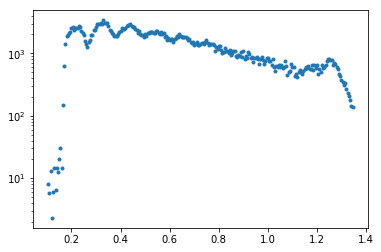

In [44]:
plt.semilogy(elect_fre[2100:2349],elect_amp[2100:2349],'.')


from scipy.interpolate import interp1d

newfunc=interp1d(elect_fre[2100:2349],elect_amp[2100:2349])
fnew=(0.200,1.200,101)
newfunc(fnew)


plt.title('Transfer Function of ANITA Electronics',fontsize=18)
plt.xlabel('Frequency (GHz)',fontsize=16)
plt.ylabel('Magnitude',fontsize=16)
plt.xlim(0.2,1.2)

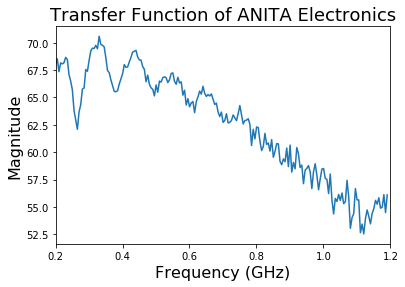

In [12]:
plt.plot(elect_fre[2119:2318],20*np.log10(elect_amp[2119:2318]))
plt.title('Transfer Function of ANITA Electronics',fontsize=18)
plt.xlabel('Frequency (GHz)',fontsize=16)
plt.ylabel('Magnitude',fontsize=16)
plt.xlim(0.2,1.2)

#print(20*np.log10(elect_amp[2119:2318]),',')
#for i in range(len(20*np.log10(elect_amp[2119:2318]))):
#    print(20*np.log10(elect_amp[2119:2318])[i],',')
    #print(',')
data = np.array([elect_fre[2110:2330], 20*np.log10(elect_amp[2110:2330])])
data = data.T

np.savetxt('AntennaTransfer.txt', data, fmt=['%f','%f'])
#here the ascii file is populated. 

#'AntennaTransfer.txt'.close()
#close the file

(0.2, 1.2)

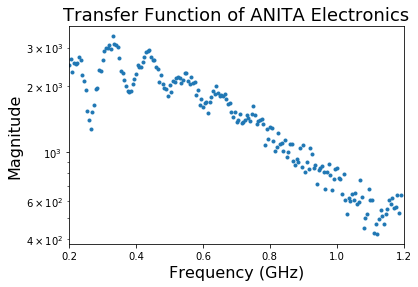

In [13]:
plt.semilogy(elect_fre[2119:2318],elect_amp[2119:2318],'.')
plt.title('Transfer Function of ANITA Electronics',fontsize=18)
plt.xlabel('Frequency (GHz)',fontsize=16)
plt.ylabel('Magnitude',fontsize=16)
plt.xlim(0.2,1.2)

(0.2, 1.2)

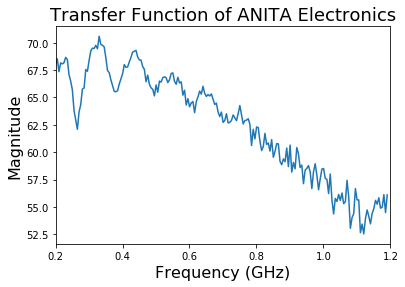

In [14]:
plt.plot(elect_fre[2119:2318],20*np.log10(elect_amp[2119:2318]))
plt.title('Transfer Function of ANITA Electronics',fontsize=18)
plt.xlabel('Frequency (GHz)',fontsize=16)
plt.ylabel('Magnitude',fontsize=16)

plt.xlim(0.2,1.2)


In [15]:
y=fft.ifft(elect_amp[2100:2349])

print(len(y))

time=[]

249


In [16]:
import scipy.signal
[resampled_volt,resampled_time]=scipy.signal.resample(elec_amp_f, 138, elec_freq_f, axis=0, window=None)


In [17]:
Transfer=[];
for i in range(len(resampled_volt)):
    Transfer.append(abs(resampled_volt[i]*antamp_f[i]))